# MNIST data classification
Oleg Sokolov <br>
sokolegg@yandex.ru

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Train data

In [2]:
train = pd.read_csv('train.csv')
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

Данные представляют из себя метку (цифра на изображении) и набор пикселей изображения 28Х28. Напишем функцию для получения массива пикселей, а также двумерного представления (для вывода изображения и других моделей, вроде CNN)

In [3]:
X = train.drop(labels = ["label"], axis = 1).values
y = train['label'].values

X - представляет собой набор пикселей как в одномерном виде, можно протестировать простые алгоритмы на этих данных.

In [4]:
print("Пример данных одного изображения из X", X[0])
print("Метка (y) для этого изображения", y[0])

Пример данных одного изображения из X [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 

Нормализуем X

In [5]:
X = X/255.

In [6]:
X.shape

(42000, 784)

Можно проверить точность на простых алгоритмах KNN, SVC

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=133, test_size=0.1)

## KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=30, n_neighbors=5, p=2,
           weights='uniform')

Точность обученного KNN на тестовой выборке

In [9]:
%%time
from sklearn.metrics import accuracy_score, classification_report
predicted = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predicted))
print("Classiication report: ", classification_report(y_test, predicted))

Accuracy:  0.9711904761904762
Classiication report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.95      0.99      0.97       467
           2       0.98      0.96      0.97       411
           3       0.96      0.97      0.97       417
           4       1.00      0.98      0.99       417
           5       0.96      0.97      0.96       364
           6       0.98      0.99      0.98       417
           7       0.94      0.97      0.96       436
           8       1.00      0.94      0.97       430
           9       0.96      0.95      0.95       389

   micro avg       0.97      0.97      0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200

Wall time: 16.6 s


97% точность - хороший результат, можно обучить на полных данных и отправить первую посылку на kaggle

In [10]:
knn = KNeighborsClassifier(n_jobs=30)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=30, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
test = pd.read_csv('test.csv')
test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [12]:
%%time
test_data = test.values/255.
predicted_labels = knn.predict(test_data)

Wall time: 1min 43s


In [13]:
import os
def create_submission(predicted_labels):
    sub_frame = pd.DataFrame({"Label": predicted_labels})
    sub_frame.index = sub_frame.index + 1
    sub_frame.index.names = ['ImageId']
    file_name = 'submission' + str(len(os.listdir('.'))) + '.csv'
    sub_frame.to_csv(file_name)
    print("Created new submission in file ", file_name)

create_submission(predicted_labels)

Created new submission in file  submission28.csv


На тестовой выборке точность значительно ниже - 71%. Была обнаружена ошибка - тестовые данные не были нормализованы, с нормализацией точность 0.96800

In [14]:
knn = KNeighborsClassifier(n_jobs=30, n_neighbors=5, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=30, n_neighbors=5, p=2,
           weights='distance')

Попробуем искать через distance

In [15]:
predicted_labels = knn.predict(test_data)
create_submission(predicted_labels)

Created new submission in file  submission29.csv


Точность выросла, но незначительно. Если увеличить количество соседей до 10

In [16]:
knn = KNeighborsClassifier(n_jobs=30, n_neighbors=10, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=30, n_neighbors=10, p=2,
           weights='distance')

In [17]:
predicted_labels = knn.predict(test_data)
create_submission(predicted_labels)

Created new submission in file  submission30.csv


Стало хуже. Вероятно, можно перебрать параметры KNN, но не факт, что можно достичь точности 99% и более, поэтому можно посмотреть на точность других моделей.

## CNN

Попробуем обучить для этой задачи простую сверточную нейронную сеть

In [18]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Activation, Flatten, MaxPool2D, Dropout
from keras.optimizers import SGD
%matplotlib inline

Using TensorFlow backend.


Подготовим данные для обучения модели

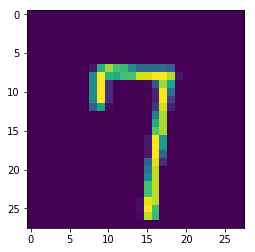

In [23]:
cnn_X = X.reshape(len(X), 28, 28, 1)
cnn_y = to_categorical(y, num_classes=10)
plt.imshow(cnn_X[50].reshape(28, 28))

Соберем модель и обучим

In [24]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
cnn.fit(cnn_X, cnn_y, batch_size=200, epochs=10, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 50s 1ms/step - loss: 0.5652 - acc: 0.8259 - val_loss: 0.1368 - val_acc: 0.9586
Epoch 2/10
37800/37800 [==============================] - 49s 1ms/step - loss: 0.2156 - acc: 0.9366 - val_loss: 0.0829 - val_acc: 0.9712
Epoch 3/10
37800/37800 [==============================] - 49s 1ms/step - loss: 0.1542 - acc: 0.9540 - val_loss: 0.0659 - val_acc: 0.9783
Epoch 4/10
37800/37800 [==============================] - 49s 1ms/step - loss: 0.1276 - acc: 0.9622 - val_loss: 0.0576 - val_acc: 0.9800
Epoch 5/10
37800/37800 [==============================] - 49s 1ms/step - loss: 0.1058 - acc: 0.9684 - val_loss: 0.0521 - val_acc: 0.9831
Epoch 6/10
37800/37800 [==============================] - 49s 1ms/step - loss: 0.0973 - acc: 0.9706 - val_loss: 0.0507 - val_acc: 0.9810
Epoch 7/10
37800/37800 [==============================] - 49s 1ms/step - loss: 0.0884 - acc: 0.9731 - val_loss: 0.0473 - val_acc:

In [26]:
predicted_classes = cnn.predict_classes(test_data.reshape(len(test_data), 28, 28, 1))
print(predicted_classes[0])

2


In [27]:
create_submission(predicted_classes)

Created new submission in file  submission31.csv


Простая модель показала точность 0.98. Видно, что модель на 10й итерации уже начала переобучаться, несмотря на наличие Dropout слоя. Вероятно, чтобы поднять точность еще необходима более сложная модель или обучение на основе существующей

Попробуем увеличить количество нейронов на первом Dense слое до 256

In [28]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 2,363,210
Trainable params: 2,363,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
cnn.fit(cnn_X, cnn_y, batch_size=200, epochs=10, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 66s 2ms/step - loss: 0.3332 - acc: 0.8997 - val_loss: 0.1003 - val_acc: 0.9698
Epoch 2/10
37800/37800 [==============================] - 65s 2ms/step - loss: 0.1030 - acc: 0.9691 - val_loss: 0.0696 - val_acc: 0.9783
Epoch 3/10
37800/37800 [==============================] - 64s 2ms/step - loss: 0.0691 - acc: 0.9799 - val_loss: 0.0498 - val_acc: 0.9829
Epoch 4/10
37800/37800 [==============================] - 64s 2ms/step - loss: 0.0556 - acc: 0.9838 - val_loss: 0.0415 - val_acc: 0.9869
Epoch 5/10
37800/37800 [==============================] - 64s 2ms/step - loss: 0.0467 - acc: 0.9854 - val_loss: 0.0366 - val_acc: 0.9869
Epoch 6/10
37800/37800 [==============================] - 65s 2ms/step - loss: 0.0381 - acc: 0.9886 - val_loss: 0.0362 - val_acc: 0.9874
Epoch 7/10
37800/37800 [==============================] - 65s 2ms/step - loss: 0.0310 - acc: 0.9905 - val_loss: 0.0334 - val_acc:

Видно, что модель опять переобучилась в конце. Для такой модели оптимально будет 8 итераций.

In [30]:
predicted_classes = cnn.predict_classes(test_data.reshape(len(test_data), 28, 28, 1))
create_submission(predicted_classes)

Created new submission in file  submission32.csv


Тест модели с более сложной архитектурой (2 слоя свертки, 3 Dense слоя после)

In [31]:
cnn = Sequential()
cnn.add(Conv2D(96, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 96)        1632      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          98368     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
__________

In [32]:
cnn.fit(cnn_X, cnn_y, batch_size=200, epochs=10, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 100s 3ms/step - loss: 0.4981 - acc: 0.8369 - val_loss: 0.0860 - val_acc: 0.9738
Epoch 2/10
37800/37800 [==============================] - 97s 3ms/step - loss: 0.1308 - acc: 0.9623 - val_loss: 0.0525 - val_acc: 0.9824
Epoch 3/10
37800/37800 [==============================] - 98s 3ms/step - loss: 0.0901 - acc: 0.9743 - val_loss: 0.0398 - val_acc: 0.9881
Epoch 4/10
37800/37800 [==============================] - 98s 3ms/step - loss: 0.0727 - acc: 0.9796 - val_loss: 0.0389 - val_acc: 0.9876
Epoch 5/10
37800/37800 [==============================] - 97s 3ms/step - loss: 0.0616 - acc: 0.9818 - val_loss: 0.0338 - val_acc: 0.9895
Epoch 6/10
37800/37800 [==============================] - 97s 3ms/step - loss: 0.0529 - acc: 0.9848 - val_loss: 0.0285 - val_acc: 0.9914
Epoch 7/10
37800/37800 [==============================] - 96s 3ms/step - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0271 - val_acc

In [33]:
predicted_classes = cnn.predict_classes(test_data.reshape(len(test_data), 28, 28, 1))
create_submission(predicted_classes)

Created new submission in file  submission33.csv


## GAN

Попробуем обучить генеративную сеть и пообучать модели на еще большей выборке (настощие + плюс сгенерированные изображения)

In [62]:
import sys
from IPython.core.debugger import Tracer
from keras.datasets import mnist
from keras.layers import Input, Reshape
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
plt.switch_backend('agg')

class GAN(object):
    def __init__(self, width = 28, height= 28, channels = 1):
        self.WIDTH = width
        self.HEIGHT = height
        self.CHANNELS = channels
        self.SHAPE = (self.WIDTH, self.HEIGHT, self.CHANNELS)
        self.OPTIMIZER = Adam(lr=0.0002, decay=8e-9)
        self.noise_gen = np.random.normal(0,1,(100,))
        self.G = self.generator()
        self.G.compile(loss='binary_crossentropy', optimizer=self.OPTIMIZER)
        self.D = self.discriminator()
        self.D.compile(loss='binary_crossentropy', optimizer=self.OPTIMIZER, metrics=['accuracy'] )
        self.stacked_G_D = self.stacked_G_D()
        
        self.stacked_G_D.compile(loss='binary_crossentropy', optimizer=self.OPTIMIZER)
        
    def generator(self):
        model = Sequential()
        model.add(Dense(256, input_shape=(100+10,)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.WIDTH * self.HEIGHT * self.CHANNELS, activation='tanh'))
        model.add(Reshape((self.WIDTH, self.HEIGHT, self.CHANNELS)))
        return model
    
    def discriminator(self):
        model = Sequential()
        model.add(Flatten(input_shape=self.SHAPE))
        model.add(Dense((self.WIDTH * self.HEIGHT * self.CHANNELS), input_shape=self.SHAPE))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int32((self.WIDTH * self.HEIGHT * self.CHANNELS)/2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(20, activation='softmax'))
        model.summary()
        return model
    def stacked_G_D(self):
        self.D.trainable = False
        model = Sequential()
        model.add(self.G)
        model.add(self.D)
        return model
    
    def train(self, X_train, y_train, epochs=30000, batch = 32, save_interval = 500):
        for cnt in range(epochs):
            ## train discriminator
            random_index =  np.random.randint(0, len(X_train) - 3*int(batch))
            legit_images = X_train[random_index : random_index + batch].reshape(batch, self.WIDTH, self.HEIGHT, self.CHANNELS)
            y_labels =  y_train[random_index : random_index + batch].reshape(batch, 10)
            y_legit = np.array([np.concatenate((y, np.zeros(10))) for y in y_labels])
            y_fake = np.array([np.concatenate((y, np.ones(10))) for y in y_labels])
            gen_noise = np.random.normal(0, 1, (batch,100))
            labels_and_noise = np.array([np.concatenate((y_labels[i], gen_noise[i])).flatten() for i in range(len(y_labels))])
            labels_and_noise.reshape(batch, 110)
            
            syntetic_images = self.G.predict(labels_and_noise)
            x_combined_batch = np.concatenate((legit_images, syntetic_images))
            
            
            y_combined_batch = np.concatenate((y_legit, y_fake))
            d_loss = self.D.train_on_batch(x_combined_batch, y_combined_batch)
            
            # train generator
            y_labels =  y_train[random_index : random_index + 2*batch].reshape(2*batch, 10)
            y_full = np.array([np.concatenate((y, np.zeros(10))) for y in y_labels])
            gen_noise = np.random.normal(0, 1, (2*batch,100))
            labels_and_noise = np.array([np.concatenate((y_labels[i], gen_noise[i])).flatten() for i in range(len(y_labels))])
            labels_and_noise.reshape(2*batch, 110)
            g_loss = self.stacked_G_D.train_on_batch(labels_and_noise, y_full)
            print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))
            
            if cnt % save_interval == 0 : 
                self.plot_images(save2file=True, step=cnt)
                
    def plot_images(self, save2file=True, step=0):
        filename = "./images/mnist_%d.png" % step
        images = np.array(list(map(lambda x: self.gen_number_image(x), list(range(10)))))
        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i]
            image = np.reshape(image, [ self.HEIGHT, self.WIDTH ])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()
    
    def gen_number_image(self, number):
        labels = to_categorical(number, num_classes=10)
        gen_noise = np.random.normal(0, 1, 100)
        labels_and_noise = np.concatenate((labels, gen_noise)).reshape(1, 110)
        image = gan.G.predict(labels_and_noise).reshape(28, 28)
        return image


In [63]:
gan = GAN()
gan.train(cnn_X*2-1, cnn_y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_74 (LeakyReLU)   (None, 784)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 392)               307720    
_________________________________________________________________
leaky_re_lu_75 (LeakyReLU)   (None, 392)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 20)                7860      
Total params: 931,020
Trainable params: 931,020
Non-trainable params: 0
_________________________________________________________________
rand

C:\ProgramData\Miniconda2\envs\olegenv\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, [Discriminator :: d_loss: 0.956741], [ Generator :: loss: 0.210131]
random_index:  8464
(32, 10) 8496
epoch: 1, [Discriminator :: d_loss: 0.943649], [ Generator :: loss: 0.212141]
random_index:  17391
(32, 10) 17423
epoch: 2, [Discriminator :: d_loss: 0.932716], [ Generator :: loss: 0.212758]
random_index:  34830
(32, 10) 34862
epoch: 3, [Discriminator :: d_loss: 0.907285], [ Generator :: loss: 0.218757]
random_index:  28604
(32, 10) 28636
epoch: 4, [Discriminator :: d_loss: 0.898729], [ Generator :: loss: 0.220636]
random_index:  4725
(32, 10) 4757
epoch: 5, [Discriminator :: d_loss: 0.883566], [ Generator :: loss: 0.224822]
random_index:  35961
(32, 10) 35993
epoch: 6, [Discriminator :: d_loss: 0.863612], [ Generator :: loss: 0.228638]
random_index:  36141
(32, 10) 36173
epoch: 7, [Discriminator :: d_loss: 0.859522], [ Generator :: loss: 0.235285]
random_index:  40428
(32, 10) 40460
epoch: 8, [Discriminator :: d_loss: 0.855645], [ Generator :: loss: 0.234342]
random_index: 

epoch: 72, [Discriminator :: d_loss: 0.736438], [ Generator :: loss: 0.255368]
random_index:  37016
(32, 10) 37048
epoch: 73, [Discriminator :: d_loss: 0.729940], [ Generator :: loss: 0.248306]
random_index:  7766
(32, 10) 7798
epoch: 74, [Discriminator :: d_loss: 0.733986], [ Generator :: loss: 0.239487]
random_index:  23632
(32, 10) 23664
epoch: 75, [Discriminator :: d_loss: 0.724405], [ Generator :: loss: 0.240010]
random_index:  15449
(32, 10) 15481
epoch: 76, [Discriminator :: d_loss: 0.718777], [ Generator :: loss: 0.239635]
random_index:  19785
(32, 10) 19817
epoch: 77, [Discriminator :: d_loss: 0.734413], [ Generator :: loss: 0.248955]
random_index:  37159
(32, 10) 37191
epoch: 78, [Discriminator :: d_loss: 0.730679], [ Generator :: loss: 0.236872]
random_index:  39743
(32, 10) 39775
epoch: 79, [Discriminator :: d_loss: 0.738646], [ Generator :: loss: 0.235287]
random_index:  33924
(32, 10) 33956
epoch: 80, [Discriminator :: d_loss: 0.721041], [ Generator :: loss: 0.232785]
ran

epoch: 144, [Discriminator :: d_loss: 0.707962], [ Generator :: loss: 0.195674]
random_index:  24338
(32, 10) 24370
epoch: 145, [Discriminator :: d_loss: 0.698197], [ Generator :: loss: 0.198755]
random_index:  4522
(32, 10) 4554
epoch: 146, [Discriminator :: d_loss: 0.698103], [ Generator :: loss: 0.183744]
random_index:  20277
(32, 10) 20309
epoch: 147, [Discriminator :: d_loss: 0.696814], [ Generator :: loss: 0.194374]
random_index:  31153
(32, 10) 31185
epoch: 148, [Discriminator :: d_loss: 0.710751], [ Generator :: loss: 0.198526]
random_index:  28351
(32, 10) 28383
epoch: 149, [Discriminator :: d_loss: 0.705561], [ Generator :: loss: 0.203033]
random_index:  25792
(32, 10) 25824
epoch: 150, [Discriminator :: d_loss: 0.701910], [ Generator :: loss: 0.198643]
random_index:  26321
(32, 10) 26353
epoch: 151, [Discriminator :: d_loss: 0.694230], [ Generator :: loss: 0.193276]
random_index:  7464
(32, 10) 7496
epoch: 152, [Discriminator :: d_loss: 0.691740], [ Generator :: loss: 0.1971

epoch: 216, [Discriminator :: d_loss: 0.714117], [ Generator :: loss: 0.196717]
random_index:  34807
(32, 10) 34839
epoch: 217, [Discriminator :: d_loss: 0.709174], [ Generator :: loss: 0.198088]
random_index:  32940
(32, 10) 32972
epoch: 218, [Discriminator :: d_loss: 0.726634], [ Generator :: loss: 0.200909]
random_index:  32646
(32, 10) 32678
epoch: 219, [Discriminator :: d_loss: 0.725708], [ Generator :: loss: 0.193102]
random_index:  17948
(32, 10) 17980
epoch: 220, [Discriminator :: d_loss: 0.726713], [ Generator :: loss: 0.200202]
random_index:  30854
(32, 10) 30886
epoch: 221, [Discriminator :: d_loss: 0.732508], [ Generator :: loss: 0.199385]
random_index:  16903
(32, 10) 16935
epoch: 222, [Discriminator :: d_loss: 0.730891], [ Generator :: loss: 0.179170]
random_index:  8685
(32, 10) 8717
epoch: 223, [Discriminator :: d_loss: 0.715509], [ Generator :: loss: 0.169769]
random_index:  29087
(32, 10) 29119
epoch: 224, [Discriminator :: d_loss: 0.719692], [ Generator :: loss: 0.17

epoch: 288, [Discriminator :: d_loss: 0.735440], [ Generator :: loss: 0.187311]
random_index:  24998
(32, 10) 25030
epoch: 289, [Discriminator :: d_loss: 0.740618], [ Generator :: loss: 0.186457]
random_index:  14041
(32, 10) 14073
epoch: 290, [Discriminator :: d_loss: 0.727340], [ Generator :: loss: 0.193225]
random_index:  34877
(32, 10) 34909
epoch: 291, [Discriminator :: d_loss: 0.733758], [ Generator :: loss: 0.192256]
random_index:  4961
(32, 10) 4993
epoch: 292, [Discriminator :: d_loss: 0.728758], [ Generator :: loss: 0.173856]
random_index:  12623
(32, 10) 12655
epoch: 293, [Discriminator :: d_loss: 0.731418], [ Generator :: loss: 0.177872]
random_index:  13153
(32, 10) 13185
epoch: 294, [Discriminator :: d_loss: 0.751022], [ Generator :: loss: 0.167336]
random_index:  12203
(32, 10) 12235
epoch: 295, [Discriminator :: d_loss: 0.737736], [ Generator :: loss: 0.176034]
random_index:  9524
(32, 10) 9556
epoch: 296, [Discriminator :: d_loss: 0.718490], [ Generator :: loss: 0.1716

epoch: 360, [Discriminator :: d_loss: 0.699043], [ Generator :: loss: 0.209888]
random_index:  38436
(32, 10) 38468
epoch: 361, [Discriminator :: d_loss: 0.697456], [ Generator :: loss: 0.209652]
random_index:  20819
(32, 10) 20851
epoch: 362, [Discriminator :: d_loss: 0.700884], [ Generator :: loss: 0.208512]
random_index:  39390
(32, 10) 39422
epoch: 363, [Discriminator :: d_loss: 0.702725], [ Generator :: loss: 0.209379]
random_index:  40255
(32, 10) 40287
epoch: 364, [Discriminator :: d_loss: 0.696891], [ Generator :: loss: 0.200437]
random_index:  30941
(32, 10) 30973
epoch: 365, [Discriminator :: d_loss: 0.701038], [ Generator :: loss: 0.188272]
random_index:  32046
(32, 10) 32078
epoch: 366, [Discriminator :: d_loss: 0.719112], [ Generator :: loss: 0.190462]
random_index:  33910
(32, 10) 33942
epoch: 367, [Discriminator :: d_loss: 0.691838], [ Generator :: loss: 0.195874]
random_index:  10407
(32, 10) 10439
epoch: 368, [Discriminator :: d_loss: 0.696748], [ Generator :: loss: 0.

epoch: 432, [Discriminator :: d_loss: 0.716859], [ Generator :: loss: 0.201258]
random_index:  32316
(32, 10) 32348
epoch: 433, [Discriminator :: d_loss: 0.700535], [ Generator :: loss: 0.191387]
random_index:  24063
(32, 10) 24095
epoch: 434, [Discriminator :: d_loss: 0.708670], [ Generator :: loss: 0.186521]
random_index:  24520
(32, 10) 24552
epoch: 435, [Discriminator :: d_loss: 0.709656], [ Generator :: loss: 0.181624]
random_index:  38531
(32, 10) 38563
epoch: 436, [Discriminator :: d_loss: 0.713842], [ Generator :: loss: 0.190362]
random_index:  28811
(32, 10) 28843
epoch: 437, [Discriminator :: d_loss: 0.729855], [ Generator :: loss: 0.218554]
random_index:  20126
(32, 10) 20158
epoch: 438, [Discriminator :: d_loss: 0.716116], [ Generator :: loss: 0.219799]
random_index:  31649
(32, 10) 31681
epoch: 439, [Discriminator :: d_loss: 0.718010], [ Generator :: loss: 0.224272]
random_index:  37943
(32, 10) 37975
epoch: 440, [Discriminator :: d_loss: 0.726716], [ Generator :: loss: 0.

epoch: 504, [Discriminator :: d_loss: 0.736154], [ Generator :: loss: 0.204062]
random_index:  40177
(32, 10) 40209
epoch: 505, [Discriminator :: d_loss: 0.724076], [ Generator :: loss: 0.190992]
random_index:  4514
(32, 10) 4546
epoch: 506, [Discriminator :: d_loss: 0.708940], [ Generator :: loss: 0.166089]
random_index:  23565
(32, 10) 23597
epoch: 507, [Discriminator :: d_loss: 0.735523], [ Generator :: loss: 0.165083]
random_index:  21142
(32, 10) 21174
epoch: 508, [Discriminator :: d_loss: 0.727913], [ Generator :: loss: 0.172126]
random_index:  41123
(32, 10) 41155
epoch: 509, [Discriminator :: d_loss: 0.710542], [ Generator :: loss: 0.198812]
random_index:  29754
(32, 10) 29786
epoch: 510, [Discriminator :: d_loss: 0.711460], [ Generator :: loss: 0.197237]
random_index:  3034
(32, 10) 3066
epoch: 511, [Discriminator :: d_loss: 0.721745], [ Generator :: loss: 0.181650]
random_index:  29151
(32, 10) 29183
epoch: 512, [Discriminator :: d_loss: 0.720688], [ Generator :: loss: 0.1637

epoch: 576, [Discriminator :: d_loss: 0.719805], [ Generator :: loss: 0.179285]
random_index:  14530
(32, 10) 14562
epoch: 577, [Discriminator :: d_loss: 0.703465], [ Generator :: loss: 0.189721]
random_index:  33248
(32, 10) 33280
epoch: 578, [Discriminator :: d_loss: 0.686686], [ Generator :: loss: 0.202986]
random_index:  7724
(32, 10) 7756
epoch: 579, [Discriminator :: d_loss: 0.714808], [ Generator :: loss: 0.203539]
random_index:  32570
(32, 10) 32602
epoch: 580, [Discriminator :: d_loss: 0.705576], [ Generator :: loss: 0.196970]
random_index:  28576
(32, 10) 28608
epoch: 581, [Discriminator :: d_loss: 0.698697], [ Generator :: loss: 0.179098]
random_index:  14624
(32, 10) 14656
epoch: 582, [Discriminator :: d_loss: 0.724556], [ Generator :: loss: 0.165808]
random_index:  36347
(32, 10) 36379
epoch: 583, [Discriminator :: d_loss: 0.702011], [ Generator :: loss: 0.169864]
random_index:  27697
(32, 10) 27729
epoch: 584, [Discriminator :: d_loss: 0.722294], [ Generator :: loss: 0.18

epoch: 648, [Discriminator :: d_loss: 0.709238], [ Generator :: loss: 0.204273]
random_index:  8029
(32, 10) 8061
epoch: 649, [Discriminator :: d_loss: 0.710427], [ Generator :: loss: 0.197010]
random_index:  16397
(32, 10) 16429
epoch: 650, [Discriminator :: d_loss: 0.715864], [ Generator :: loss: 0.176893]
random_index:  30298
(32, 10) 30330
epoch: 651, [Discriminator :: d_loss: 0.701262], [ Generator :: loss: 0.160198]
random_index:  34863
(32, 10) 34895
epoch: 652, [Discriminator :: d_loss: 0.720853], [ Generator :: loss: 0.175685]
random_index:  34711
(32, 10) 34743
epoch: 653, [Discriminator :: d_loss: 0.698386], [ Generator :: loss: 0.172144]
random_index:  36548
(32, 10) 36580
epoch: 654, [Discriminator :: d_loss: 0.704322], [ Generator :: loss: 0.184259]
random_index:  12398
(32, 10) 12430
epoch: 655, [Discriminator :: d_loss: 0.705411], [ Generator :: loss: 0.185137]
random_index:  3928
(32, 10) 3960
epoch: 656, [Discriminator :: d_loss: 0.697776], [ Generator :: loss: 0.2068

epoch: 720, [Discriminator :: d_loss: 0.712664], [ Generator :: loss: 0.174721]
random_index:  7670
(32, 10) 7702
epoch: 721, [Discriminator :: d_loss: 0.709849], [ Generator :: loss: 0.175932]
random_index:  21953
(32, 10) 21985
epoch: 722, [Discriminator :: d_loss: 0.699379], [ Generator :: loss: 0.177254]
random_index:  29489
(32, 10) 29521
epoch: 723, [Discriminator :: d_loss: 0.692358], [ Generator :: loss: 0.191042]
random_index:  16458
(32, 10) 16490
epoch: 724, [Discriminator :: d_loss: 0.710155], [ Generator :: loss: 0.187678]
random_index:  23064
(32, 10) 23096
epoch: 725, [Discriminator :: d_loss: 0.700121], [ Generator :: loss: 0.184660]
random_index:  18804
(32, 10) 18836
epoch: 726, [Discriminator :: d_loss: 0.698015], [ Generator :: loss: 0.182857]
random_index:  36133
(32, 10) 36165
epoch: 727, [Discriminator :: d_loss: 0.701081], [ Generator :: loss: 0.173300]
random_index:  19643
(32, 10) 19675
epoch: 728, [Discriminator :: d_loss: 0.704713], [ Generator :: loss: 0.17

epoch: 792, [Discriminator :: d_loss: 0.708892], [ Generator :: loss: 0.201301]
random_index:  17144
(32, 10) 17176
epoch: 793, [Discriminator :: d_loss: 0.706089], [ Generator :: loss: 0.181020]
random_index:  3627
(32, 10) 3659
epoch: 794, [Discriminator :: d_loss: 0.692346], [ Generator :: loss: 0.164387]
random_index:  4773
(32, 10) 4805
epoch: 795, [Discriminator :: d_loss: 0.692651], [ Generator :: loss: 0.155544]
random_index:  18071
(32, 10) 18103
epoch: 796, [Discriminator :: d_loss: 0.757089], [ Generator :: loss: 0.175945]
random_index:  35216
(32, 10) 35248
epoch: 797, [Discriminator :: d_loss: 0.696430], [ Generator :: loss: 0.197285]
random_index:  6253
(32, 10) 6285
epoch: 798, [Discriminator :: d_loss: 0.705639], [ Generator :: loss: 0.201064]
random_index:  33121
(32, 10) 33153
epoch: 799, [Discriminator :: d_loss: 0.718143], [ Generator :: loss: 0.187708]
random_index:  29286
(32, 10) 29318
epoch: 800, [Discriminator :: d_loss: 0.699659], [ Generator :: loss: 0.179583

epoch: 864, [Discriminator :: d_loss: 0.706804], [ Generator :: loss: 0.197909]
random_index:  29341
(32, 10) 29373
epoch: 865, [Discriminator :: d_loss: 0.695039], [ Generator :: loss: 0.192300]
random_index:  35544
(32, 10) 35576
epoch: 866, [Discriminator :: d_loss: 0.708711], [ Generator :: loss: 0.205381]
random_index:  38275
(32, 10) 38307
epoch: 867, [Discriminator :: d_loss: 0.713665], [ Generator :: loss: 0.197991]
random_index:  6561
(32, 10) 6593
epoch: 868, [Discriminator :: d_loss: 0.705166], [ Generator :: loss: 0.168772]
random_index:  40662
(32, 10) 40694
epoch: 869, [Discriminator :: d_loss: 0.699831], [ Generator :: loss: 0.163974]
random_index:  25687
(32, 10) 25719
epoch: 870, [Discriminator :: d_loss: 0.739812], [ Generator :: loss: 0.160078]
random_index:  847
(32, 10) 879
epoch: 871, [Discriminator :: d_loss: 0.724984], [ Generator :: loss: 0.175299]
random_index:  24123
(32, 10) 24155
epoch: 872, [Discriminator :: d_loss: 0.695378], [ Generator :: loss: 0.188220

epoch: 936, [Discriminator :: d_loss: 0.715957], [ Generator :: loss: 0.159366]
random_index:  39266
(32, 10) 39298
epoch: 937, [Discriminator :: d_loss: 0.695724], [ Generator :: loss: 0.169218]
random_index:  16527
(32, 10) 16559
epoch: 938, [Discriminator :: d_loss: 0.700436], [ Generator :: loss: 0.178885]
random_index:  39363
(32, 10) 39395
epoch: 939, [Discriminator :: d_loss: 0.701017], [ Generator :: loss: 0.190225]
random_index:  5839
(32, 10) 5871
epoch: 940, [Discriminator :: d_loss: 0.697100], [ Generator :: loss: 0.183569]
random_index:  2531
(32, 10) 2563
epoch: 941, [Discriminator :: d_loss: 0.701285], [ Generator :: loss: 0.182083]
random_index:  3908
(32, 10) 3940
epoch: 942, [Discriminator :: d_loss: 0.685898], [ Generator :: loss: 0.177191]
random_index:  10740
(32, 10) 10772
epoch: 943, [Discriminator :: d_loss: 0.699191], [ Generator :: loss: 0.169519]
random_index:  29914
(32, 10) 29946
epoch: 944, [Discriminator :: d_loss: 0.706184], [ Generator :: loss: 0.159505

epoch: 1008, [Discriminator :: d_loss: 0.693282], [ Generator :: loss: 0.159201]
random_index:  8487
(32, 10) 8519
epoch: 1009, [Discriminator :: d_loss: 0.692759], [ Generator :: loss: 0.157270]
random_index:  17353
(32, 10) 17385
epoch: 1010, [Discriminator :: d_loss: 0.696660], [ Generator :: loss: 0.154441]
random_index:  20824
(32, 10) 20856
epoch: 1011, [Discriminator :: d_loss: 0.710793], [ Generator :: loss: 0.167334]
random_index:  4884
(32, 10) 4916
epoch: 1012, [Discriminator :: d_loss: 0.696659], [ Generator :: loss: 0.186271]
random_index:  15663
(32, 10) 15695
epoch: 1013, [Discriminator :: d_loss: 0.687876], [ Generator :: loss: 0.174746]
random_index:  40056
(32, 10) 40088
epoch: 1014, [Discriminator :: d_loss: 0.694598], [ Generator :: loss: 0.174622]
random_index:  36368
(32, 10) 36400
epoch: 1015, [Discriminator :: d_loss: 0.695883], [ Generator :: loss: 0.176270]
random_index:  15741
(32, 10) 15773
epoch: 1016, [Discriminator :: d_loss: 0.691603], [ Generator :: los

epoch: 1080, [Discriminator :: d_loss: 0.713506], [ Generator :: loss: 0.188029]
random_index:  19624
(32, 10) 19656
epoch: 1081, [Discriminator :: d_loss: 0.705406], [ Generator :: loss: 0.168124]
random_index:  35923
(32, 10) 35955
epoch: 1082, [Discriminator :: d_loss: 0.707908], [ Generator :: loss: 0.167267]
random_index:  18077
(32, 10) 18109
epoch: 1083, [Discriminator :: d_loss: 0.706801], [ Generator :: loss: 0.167381]
random_index:  25842
(32, 10) 25874
epoch: 1084, [Discriminator :: d_loss: 0.708026], [ Generator :: loss: 0.176325]
random_index:  14660
(32, 10) 14692
epoch: 1085, [Discriminator :: d_loss: 0.687866], [ Generator :: loss: 0.173967]
random_index:  12887
(32, 10) 12919
epoch: 1086, [Discriminator :: d_loss: 0.687700], [ Generator :: loss: 0.168342]
random_index:  30755
(32, 10) 30787
epoch: 1087, [Discriminator :: d_loss: 0.696035], [ Generator :: loss: 0.173122]
random_index:  2976
(32, 10) 3008
epoch: 1088, [Discriminator :: d_loss: 0.696257], [ Generator :: l

epoch: 1152, [Discriminator :: d_loss: 0.703258], [ Generator :: loss: 0.150382]
random_index:  1730
(32, 10) 1762
epoch: 1153, [Discriminator :: d_loss: 0.720515], [ Generator :: loss: 0.168783]
random_index:  26204
(32, 10) 26236
epoch: 1154, [Discriminator :: d_loss: 0.701576], [ Generator :: loss: 0.171586]
random_index:  17596
(32, 10) 17628
epoch: 1155, [Discriminator :: d_loss: 0.697916], [ Generator :: loss: 0.184800]
random_index:  30124
(32, 10) 30156
epoch: 1156, [Discriminator :: d_loss: 0.694319], [ Generator :: loss: 0.175436]
random_index:  4759
(32, 10) 4791
epoch: 1157, [Discriminator :: d_loss: 0.707209], [ Generator :: loss: 0.165939]
random_index:  32361
(32, 10) 32393
epoch: 1158, [Discriminator :: d_loss: 0.701400], [ Generator :: loss: 0.152386]
random_index:  15150
(32, 10) 15182
epoch: 1159, [Discriminator :: d_loss: 0.717008], [ Generator :: loss: 0.160385]
random_index:  39479
(32, 10) 39511
epoch: 1160, [Discriminator :: d_loss: 0.698743], [ Generator :: los

epoch: 1224, [Discriminator :: d_loss: 0.692492], [ Generator :: loss: 0.164028]
random_index:  35664
(32, 10) 35696
epoch: 1225, [Discriminator :: d_loss: 0.692244], [ Generator :: loss: 0.177444]
random_index:  34498
(32, 10) 34530
epoch: 1226, [Discriminator :: d_loss: 0.688015], [ Generator :: loss: 0.180232]
random_index:  29334
(32, 10) 29366
epoch: 1227, [Discriminator :: d_loss: 0.704008], [ Generator :: loss: 0.188698]
random_index:  25918
(32, 10) 25950
epoch: 1228, [Discriminator :: d_loss: 0.698738], [ Generator :: loss: 0.189130]
random_index:  33398
(32, 10) 33430
epoch: 1229, [Discriminator :: d_loss: 0.702898], [ Generator :: loss: 0.196457]
random_index:  39434
(32, 10) 39466
epoch: 1230, [Discriminator :: d_loss: 0.692854], [ Generator :: loss: 0.193376]
random_index:  22033
(32, 10) 22065
epoch: 1231, [Discriminator :: d_loss: 0.708368], [ Generator :: loss: 0.183315]
random_index:  39352
(32, 10) 39384
epoch: 1232, [Discriminator :: d_loss: 0.689921], [ Generator ::

epoch: 1296, [Discriminator :: d_loss: 0.697753], [ Generator :: loss: 0.195702]
random_index:  11015
(32, 10) 11047
epoch: 1297, [Discriminator :: d_loss: 0.705726], [ Generator :: loss: 0.198263]
random_index:  29545
(32, 10) 29577
epoch: 1298, [Discriminator :: d_loss: 0.697332], [ Generator :: loss: 0.185585]
random_index:  41589
(32, 10) 41621
epoch: 1299, [Discriminator :: d_loss: 0.691411], [ Generator :: loss: 0.167103]
random_index:  27352
(32, 10) 27384
epoch: 1300, [Discriminator :: d_loss: 0.695579], [ Generator :: loss: 0.162195]
random_index:  14854
(32, 10) 14886
epoch: 1301, [Discriminator :: d_loss: 0.689926], [ Generator :: loss: 0.150807]
random_index:  17413
(32, 10) 17445
epoch: 1302, [Discriminator :: d_loss: 0.700866], [ Generator :: loss: 0.154679]
random_index:  36241
(32, 10) 36273
epoch: 1303, [Discriminator :: d_loss: 0.698894], [ Generator :: loss: 0.167959]
random_index:  32170
(32, 10) 32202
epoch: 1304, [Discriminator :: d_loss: 0.713650], [ Generator ::

epoch: 1368, [Discriminator :: d_loss: 0.702142], [ Generator :: loss: 0.162377]
random_index:  16078
(32, 10) 16110
epoch: 1369, [Discriminator :: d_loss: 0.702577], [ Generator :: loss: 0.197719]
random_index:  32618
(32, 10) 32650
epoch: 1370, [Discriminator :: d_loss: 0.711025], [ Generator :: loss: 0.203766]
random_index:  10368
(32, 10) 10400
epoch: 1371, [Discriminator :: d_loss: 0.711049], [ Generator :: loss: 0.206026]
random_index:  5836
(32, 10) 5868
epoch: 1372, [Discriminator :: d_loss: 0.711876], [ Generator :: loss: 0.191129]
random_index:  3041
(32, 10) 3073
epoch: 1373, [Discriminator :: d_loss: 0.712454], [ Generator :: loss: 0.170471]
random_index:  34001
(32, 10) 34033
epoch: 1374, [Discriminator :: d_loss: 0.702890], [ Generator :: loss: 0.145485]
random_index:  1756
(32, 10) 1788
epoch: 1375, [Discriminator :: d_loss: 0.724451], [ Generator :: loss: 0.154494]
random_index:  6367
(32, 10) 6399
epoch: 1376, [Discriminator :: d_loss: 0.701720], [ Generator :: loss: 0

epoch: 1439, [Discriminator :: d_loss: 0.695847], [ Generator :: loss: 0.171360]
random_index:  14847
(32, 10) 14879
epoch: 1440, [Discriminator :: d_loss: 0.683932], [ Generator :: loss: 0.165407]
random_index:  10760
(32, 10) 10792
epoch: 1441, [Discriminator :: d_loss: 0.705738], [ Generator :: loss: 0.164519]
random_index:  15301
(32, 10) 15333
epoch: 1442, [Discriminator :: d_loss: 0.695328], [ Generator :: loss: 0.175905]
random_index:  38790
(32, 10) 38822
epoch: 1443, [Discriminator :: d_loss: 0.703994], [ Generator :: loss: 0.179901]
random_index:  11508
(32, 10) 11540
epoch: 1444, [Discriminator :: d_loss: 0.700756], [ Generator :: loss: 0.187097]
random_index:  27009
(32, 10) 27041
epoch: 1445, [Discriminator :: d_loss: 0.705992], [ Generator :: loss: 0.176002]
random_index:  9384
(32, 10) 9416
epoch: 1446, [Discriminator :: d_loss: 0.693344], [ Generator :: loss: 0.168938]
random_index:  40437
(32, 10) 40469
epoch: 1447, [Discriminator :: d_loss: 0.705790], [ Generator :: l

epoch: 1510, [Discriminator :: d_loss: 0.711301], [ Generator :: loss: 0.198491]
random_index:  18481
(32, 10) 18513
epoch: 1511, [Discriminator :: d_loss: 0.704703], [ Generator :: loss: 0.172898]
random_index:  8635
(32, 10) 8667
epoch: 1512, [Discriminator :: d_loss: 0.711113], [ Generator :: loss: 0.163272]
random_index:  41363
(32, 10) 41395
epoch: 1513, [Discriminator :: d_loss: 0.701536], [ Generator :: loss: 0.153240]
random_index:  23863
(32, 10) 23895
epoch: 1514, [Discriminator :: d_loss: 0.701392], [ Generator :: loss: 0.162429]
random_index:  29539
(32, 10) 29571
epoch: 1515, [Discriminator :: d_loss: 0.709829], [ Generator :: loss: 0.184183]
random_index:  41761
(32, 10) 41793
epoch: 1516, [Discriminator :: d_loss: 0.711617], [ Generator :: loss: 0.196187]
random_index:  3416
(32, 10) 3448
epoch: 1517, [Discriminator :: d_loss: 0.705446], [ Generator :: loss: 0.212940]
random_index:  5099
(32, 10) 5131
epoch: 1518, [Discriminator :: d_loss: 0.709504], [ Generator :: loss:

epoch: 1582, [Discriminator :: d_loss: 0.698667], [ Generator :: loss: 0.150419]
random_index:  5961
(32, 10) 5993
epoch: 1583, [Discriminator :: d_loss: 0.694117], [ Generator :: loss: 0.163987]
random_index:  9276
(32, 10) 9308
epoch: 1584, [Discriminator :: d_loss: 0.699506], [ Generator :: loss: 0.166941]
random_index:  14711
(32, 10) 14743
epoch: 1585, [Discriminator :: d_loss: 0.688807], [ Generator :: loss: 0.175327]
random_index:  27684
(32, 10) 27716
epoch: 1586, [Discriminator :: d_loss: 0.699430], [ Generator :: loss: 0.212695]
random_index:  8714
(32, 10) 8746
epoch: 1587, [Discriminator :: d_loss: 0.691273], [ Generator :: loss: 0.177887]
random_index:  37541
(32, 10) 37573
epoch: 1588, [Discriminator :: d_loss: 0.697216], [ Generator :: loss: 0.178067]
random_index:  6857
(32, 10) 6889
epoch: 1589, [Discriminator :: d_loss: 0.696437], [ Generator :: loss: 0.162729]
random_index:  27692
(32, 10) 27724
epoch: 1590, [Discriminator :: d_loss: 0.688140], [ Generator :: loss: 0

epoch: 1654, [Discriminator :: d_loss: 0.701182], [ Generator :: loss: 0.153525]
random_index:  2370
(32, 10) 2402
epoch: 1655, [Discriminator :: d_loss: 0.702274], [ Generator :: loss: 0.153764]
random_index:  37459
(32, 10) 37491
epoch: 1656, [Discriminator :: d_loss: 0.709441], [ Generator :: loss: 0.165513]
random_index:  37139
(32, 10) 37171
epoch: 1657, [Discriminator :: d_loss: 0.746957], [ Generator :: loss: 0.208473]
random_index:  6837
(32, 10) 6869
epoch: 1658, [Discriminator :: d_loss: 0.711913], [ Generator :: loss: 0.219573]
random_index:  34694
(32, 10) 34726
epoch: 1659, [Discriminator :: d_loss: 0.728829], [ Generator :: loss: 0.203198]
random_index:  322
(32, 10) 354
epoch: 1660, [Discriminator :: d_loss: 0.702139], [ Generator :: loss: 0.162625]
random_index:  31068
(32, 10) 31100
epoch: 1661, [Discriminator :: d_loss: 0.693659], [ Generator :: loss: 0.140260]
random_index:  6176
(32, 10) 6208
epoch: 1662, [Discriminator :: d_loss: 0.721798], [ Generator :: loss: 0.1

epoch: 1726, [Discriminator :: d_loss: 0.697865], [ Generator :: loss: 0.169052]
random_index:  8549
(32, 10) 8581
epoch: 1727, [Discriminator :: d_loss: 0.705630], [ Generator :: loss: 0.177232]
random_index:  23550
(32, 10) 23582
epoch: 1728, [Discriminator :: d_loss: 0.696442], [ Generator :: loss: 0.186120]
random_index:  20999
(32, 10) 21031
epoch: 1729, [Discriminator :: d_loss: 0.702896], [ Generator :: loss: 0.175746]
random_index:  19071
(32, 10) 19103
epoch: 1730, [Discriminator :: d_loss: 0.692265], [ Generator :: loss: 0.166372]
random_index:  7502
(32, 10) 7534
epoch: 1731, [Discriminator :: d_loss: 0.703593], [ Generator :: loss: 0.167462]
random_index:  17037
(32, 10) 17069
epoch: 1732, [Discriminator :: d_loss: 0.699379], [ Generator :: loss: 0.162353]
random_index:  17191
(32, 10) 17223
epoch: 1733, [Discriminator :: d_loss: 0.702187], [ Generator :: loss: 0.191072]
random_index:  22714
(32, 10) 22746
epoch: 1734, [Discriminator :: d_loss: 0.698258], [ Generator :: los

epoch: 1798, [Discriminator :: d_loss: 0.704758], [ Generator :: loss: 0.182942]
random_index:  26392
(32, 10) 26424
epoch: 1799, [Discriminator :: d_loss: 0.700723], [ Generator :: loss: 0.169053]
random_index:  22713
(32, 10) 22745
epoch: 1800, [Discriminator :: d_loss: 0.693963], [ Generator :: loss: 0.181008]
random_index:  33251
(32, 10) 33283
epoch: 1801, [Discriminator :: d_loss: 0.692992], [ Generator :: loss: 0.185765]
random_index:  19704
(32, 10) 19736
epoch: 1802, [Discriminator :: d_loss: 0.701754], [ Generator :: loss: 0.182434]
random_index:  11172
(32, 10) 11204
epoch: 1803, [Discriminator :: d_loss: 0.696648], [ Generator :: loss: 0.180104]
random_index:  18642
(32, 10) 18674
epoch: 1804, [Discriminator :: d_loss: 0.692079], [ Generator :: loss: 0.164646]
random_index:  9036
(32, 10) 9068
epoch: 1805, [Discriminator :: d_loss: 0.700529], [ Generator :: loss: 0.164780]
random_index:  38933
(32, 10) 38965
epoch: 1806, [Discriminator :: d_loss: 0.699053], [ Generator :: l

epoch: 1870, [Discriminator :: d_loss: 0.723190], [ Generator :: loss: 0.197353]
random_index:  40789
(32, 10) 40821
epoch: 1871, [Discriminator :: d_loss: 0.693816], [ Generator :: loss: 0.199474]
random_index:  24782
(32, 10) 24814
epoch: 1872, [Discriminator :: d_loss: 0.693134], [ Generator :: loss: 0.192144]
random_index:  37287
(32, 10) 37319
epoch: 1873, [Discriminator :: d_loss: 0.702028], [ Generator :: loss: 0.179952]
random_index:  27122
(32, 10) 27154
epoch: 1874, [Discriminator :: d_loss: 0.703669], [ Generator :: loss: 0.168060]
random_index:  13201
(32, 10) 13233
epoch: 1875, [Discriminator :: d_loss: 0.713918], [ Generator :: loss: 0.181246]
random_index:  35868
(32, 10) 35900
epoch: 1876, [Discriminator :: d_loss: 0.696675], [ Generator :: loss: 0.184746]
random_index:  22028
(32, 10) 22060
epoch: 1877, [Discriminator :: d_loss: 0.704876], [ Generator :: loss: 0.181799]
random_index:  6681
(32, 10) 6713
epoch: 1878, [Discriminator :: d_loss: 0.695689], [ Generator :: l

epoch: 1942, [Discriminator :: d_loss: 0.697458], [ Generator :: loss: 0.164279]
random_index:  3029
(32, 10) 3061
epoch: 1943, [Discriminator :: d_loss: 0.702614], [ Generator :: loss: 0.163614]
random_index:  5715
(32, 10) 5747
epoch: 1944, [Discriminator :: d_loss: 0.700388], [ Generator :: loss: 0.152242]
random_index:  31035
(32, 10) 31067
epoch: 1945, [Discriminator :: d_loss: 0.692438], [ Generator :: loss: 0.148093]
random_index:  14136
(32, 10) 14168
epoch: 1946, [Discriminator :: d_loss: 0.693579], [ Generator :: loss: 0.162233]
random_index:  35884
(32, 10) 35916
epoch: 1947, [Discriminator :: d_loss: 0.697358], [ Generator :: loss: 0.169976]
random_index:  27060
(32, 10) 27092
epoch: 1948, [Discriminator :: d_loss: 0.703137], [ Generator :: loss: 0.196029]
random_index:  25025
(32, 10) 25057
epoch: 1949, [Discriminator :: d_loss: 0.696814], [ Generator :: loss: 0.196221]
random_index:  2900
(32, 10) 2932
epoch: 1950, [Discriminator :: d_loss: 0.715494], [ Generator :: loss:

epoch: 2014, [Discriminator :: d_loss: 0.696333], [ Generator :: loss: 0.170542]
random_index:  26091
(32, 10) 26123
epoch: 2015, [Discriminator :: d_loss: 0.695850], [ Generator :: loss: 0.168938]
random_index:  27832
(32, 10) 27864
epoch: 2016, [Discriminator :: d_loss: 0.701683], [ Generator :: loss: 0.172715]
random_index:  8416
(32, 10) 8448
epoch: 2017, [Discriminator :: d_loss: 0.693323], [ Generator :: loss: 0.178802]
random_index:  20243
(32, 10) 20275
epoch: 2018, [Discriminator :: d_loss: 0.701340], [ Generator :: loss: 0.171859]
random_index:  34877
(32, 10) 34909
epoch: 2019, [Discriminator :: d_loss: 0.694300], [ Generator :: loss: 0.188221]
random_index:  39000
(32, 10) 39032
epoch: 2020, [Discriminator :: d_loss: 0.699404], [ Generator :: loss: 0.180969]
random_index:  19722
(32, 10) 19754
epoch: 2021, [Discriminator :: d_loss: 0.696790], [ Generator :: loss: 0.182268]
random_index:  16803
(32, 10) 16835
epoch: 2022, [Discriminator :: d_loss: 0.704965], [ Generator :: l

epoch: 2086, [Discriminator :: d_loss: 0.712701], [ Generator :: loss: 0.171620]
random_index:  27888
(32, 10) 27920
epoch: 2087, [Discriminator :: d_loss: 0.705738], [ Generator :: loss: 0.188538]
random_index:  5669
(32, 10) 5701
epoch: 2088, [Discriminator :: d_loss: 0.705463], [ Generator :: loss: 0.186080]
random_index:  5617
(32, 10) 5649
epoch: 2089, [Discriminator :: d_loss: 0.688667], [ Generator :: loss: 0.176124]
random_index:  26653
(32, 10) 26685
epoch: 2090, [Discriminator :: d_loss: 0.711443], [ Generator :: loss: 0.164182]
random_index:  12347
(32, 10) 12379
epoch: 2091, [Discriminator :: d_loss: 0.694314], [ Generator :: loss: 0.169702]
random_index:  27108
(32, 10) 27140
epoch: 2092, [Discriminator :: d_loss: 0.705787], [ Generator :: loss: 0.183150]
random_index:  40386
(32, 10) 40418
epoch: 2093, [Discriminator :: d_loss: 0.699118], [ Generator :: loss: 0.196301]
random_index:  1851
(32, 10) 1883
epoch: 2094, [Discriminator :: d_loss: 0.695382], [ Generator :: loss:

epoch: 2158, [Discriminator :: d_loss: 0.710792], [ Generator :: loss: 0.171828]
random_index:  36719
(32, 10) 36751
epoch: 2159, [Discriminator :: d_loss: 0.691754], [ Generator :: loss: 0.162882]
random_index:  4679
(32, 10) 4711
epoch: 2160, [Discriminator :: d_loss: 0.699566], [ Generator :: loss: 0.146602]
random_index:  26673
(32, 10) 26705
epoch: 2161, [Discriminator :: d_loss: 0.702553], [ Generator :: loss: 0.158012]
random_index:  34324
(32, 10) 34356
epoch: 2162, [Discriminator :: d_loss: 0.705617], [ Generator :: loss: 0.168633]
random_index:  38691
(32, 10) 38723
epoch: 2163, [Discriminator :: d_loss: 0.698724], [ Generator :: loss: 0.193571]
random_index:  18995
(32, 10) 19027
epoch: 2164, [Discriminator :: d_loss: 0.712867], [ Generator :: loss: 0.193377]
random_index:  24613
(32, 10) 24645
epoch: 2165, [Discriminator :: d_loss: 0.709678], [ Generator :: loss: 0.181887]
random_index:  3962
(32, 10) 3994
epoch: 2166, [Discriminator :: d_loss: 0.690944], [ Generator :: los

epoch: 2230, [Discriminator :: d_loss: 0.706350], [ Generator :: loss: 0.174563]
random_index:  30462
(32, 10) 30494
epoch: 2231, [Discriminator :: d_loss: 0.700669], [ Generator :: loss: 0.176689]
random_index:  15960
(32, 10) 15992
epoch: 2232, [Discriminator :: d_loss: 0.707759], [ Generator :: loss: 0.163508]
random_index:  19163
(32, 10) 19195
epoch: 2233, [Discriminator :: d_loss: 0.703752], [ Generator :: loss: 0.158495]
random_index:  8777
(32, 10) 8809
epoch: 2234, [Discriminator :: d_loss: 0.708103], [ Generator :: loss: 0.158590]
random_index:  39520
(32, 10) 39552
epoch: 2235, [Discriminator :: d_loss: 0.703496], [ Generator :: loss: 0.178548]
random_index:  22323
(32, 10) 22355
epoch: 2236, [Discriminator :: d_loss: 0.707547], [ Generator :: loss: 0.177264]
random_index:  32420
(32, 10) 32452
epoch: 2237, [Discriminator :: d_loss: 0.697942], [ Generator :: loss: 0.193237]
random_index:  1477
(32, 10) 1509
epoch: 2238, [Discriminator :: d_loss: 0.698981], [ Generator :: los

epoch: 2302, [Discriminator :: d_loss: 0.701501], [ Generator :: loss: 0.142034]
random_index:  41871
(32, 10) 41903
epoch: 2303, [Discriminator :: d_loss: 0.710389], [ Generator :: loss: 0.153730]
random_index:  8243
(32, 10) 8275
epoch: 2304, [Discriminator :: d_loss: 0.703812], [ Generator :: loss: 0.168660]
random_index:  12230
(32, 10) 12262
epoch: 2305, [Discriminator :: d_loss: 0.710027], [ Generator :: loss: 0.187079]
random_index:  24052
(32, 10) 24084
epoch: 2306, [Discriminator :: d_loss: 0.724235], [ Generator :: loss: 0.201307]
random_index:  41040
(32, 10) 41072
epoch: 2307, [Discriminator :: d_loss: 0.710268], [ Generator :: loss: 0.191756]
random_index:  38036
(32, 10) 38068
epoch: 2308, [Discriminator :: d_loss: 0.705264], [ Generator :: loss: 0.166321]
random_index:  8313
(32, 10) 8345
epoch: 2309, [Discriminator :: d_loss: 0.704815], [ Generator :: loss: 0.148817]
random_index:  4941
(32, 10) 4973
epoch: 2310, [Discriminator :: d_loss: 0.717784], [ Generator :: loss:

epoch: 2374, [Discriminator :: d_loss: 0.702848], [ Generator :: loss: 0.166056]
random_index:  37854
(32, 10) 37886
epoch: 2375, [Discriminator :: d_loss: 0.702561], [ Generator :: loss: 0.184665]
random_index:  30513
(32, 10) 30545
epoch: 2376, [Discriminator :: d_loss: 0.691295], [ Generator :: loss: 0.170081]
random_index:  17907
(32, 10) 17939
epoch: 2377, [Discriminator :: d_loss: 0.706607], [ Generator :: loss: 0.164768]
random_index:  8657
(32, 10) 8689
epoch: 2378, [Discriminator :: d_loss: 0.705337], [ Generator :: loss: 0.159564]
random_index:  36682
(32, 10) 36714
epoch: 2379, [Discriminator :: d_loss: 0.713221], [ Generator :: loss: 0.177138]
random_index:  41218
(32, 10) 41250
epoch: 2380, [Discriminator :: d_loss: 0.703188], [ Generator :: loss: 0.177492]
random_index:  23613
(32, 10) 23645
epoch: 2381, [Discriminator :: d_loss: 0.699883], [ Generator :: loss: 0.169072]
random_index:  29748
(32, 10) 29780
epoch: 2382, [Discriminator :: d_loss: 0.701412], [ Generator :: l

epoch: 2446, [Discriminator :: d_loss: 0.694274], [ Generator :: loss: 0.165152]
random_index:  29471
(32, 10) 29503
epoch: 2447, [Discriminator :: d_loss: 0.708111], [ Generator :: loss: 0.171593]
random_index:  31165
(32, 10) 31197
epoch: 2448, [Discriminator :: d_loss: 0.693699], [ Generator :: loss: 0.173557]
random_index:  36710
(32, 10) 36742
epoch: 2449, [Discriminator :: d_loss: 0.688333], [ Generator :: loss: 0.153106]
random_index:  22946
(32, 10) 22978
epoch: 2450, [Discriminator :: d_loss: 0.701578], [ Generator :: loss: 0.164331]
random_index:  13441
(32, 10) 13473
epoch: 2451, [Discriminator :: d_loss: 0.714331], [ Generator :: loss: 0.175468]
random_index:  4231
(32, 10) 4263
epoch: 2452, [Discriminator :: d_loss: 0.698155], [ Generator :: loss: 0.198740]
random_index:  34676
(32, 10) 34708
epoch: 2453, [Discriminator :: d_loss: 0.704574], [ Generator :: loss: 0.187179]
random_index:  5669
(32, 10) 5701
epoch: 2454, [Discriminator :: d_loss: 0.710337], [ Generator :: los

epoch: 2518, [Discriminator :: d_loss: 0.720640], [ Generator :: loss: 0.182068]
random_index:  22578
(32, 10) 22610
epoch: 2519, [Discriminator :: d_loss: 0.702685], [ Generator :: loss: 0.173267]
random_index:  37058
(32, 10) 37090
epoch: 2520, [Discriminator :: d_loss: 0.706157], [ Generator :: loss: 0.163401]
random_index:  31189
(32, 10) 31221
epoch: 2521, [Discriminator :: d_loss: 0.693257], [ Generator :: loss: 0.167439]
random_index:  41476
(32, 10) 41508
epoch: 2522, [Discriminator :: d_loss: 0.700397], [ Generator :: loss: 0.162216]
random_index:  18196
(32, 10) 18228
epoch: 2523, [Discriminator :: d_loss: 0.708101], [ Generator :: loss: 0.158376]
random_index:  37335
(32, 10) 37367
epoch: 2524, [Discriminator :: d_loss: 0.701160], [ Generator :: loss: 0.179561]
random_index:  39929
(32, 10) 39961
epoch: 2525, [Discriminator :: d_loss: 0.705284], [ Generator :: loss: 0.177442]
random_index:  10531
(32, 10) 10563
epoch: 2526, [Discriminator :: d_loss: 0.704271], [ Generator ::

epoch: 2590, [Discriminator :: d_loss: 0.697849], [ Generator :: loss: 0.172060]
random_index:  39950
(32, 10) 39982
epoch: 2591, [Discriminator :: d_loss: 0.707348], [ Generator :: loss: 0.181855]
random_index:  36177
(32, 10) 36209
epoch: 2592, [Discriminator :: d_loss: 0.699065], [ Generator :: loss: 0.183621]
random_index:  1369
(32, 10) 1401
epoch: 2593, [Discriminator :: d_loss: 0.702329], [ Generator :: loss: 0.178199]
random_index:  40544
(32, 10) 40576
epoch: 2594, [Discriminator :: d_loss: 0.708078], [ Generator :: loss: 0.159612]
random_index:  29412
(32, 10) 29444
epoch: 2595, [Discriminator :: d_loss: 0.700898], [ Generator :: loss: 0.159511]
random_index:  39413
(32, 10) 39445
epoch: 2596, [Discriminator :: d_loss: 0.701803], [ Generator :: loss: 0.167222]
random_index:  25422
(32, 10) 25454
epoch: 2597, [Discriminator :: d_loss: 0.706496], [ Generator :: loss: 0.180453]
random_index:  29626
(32, 10) 29658
epoch: 2598, [Discriminator :: d_loss: 0.708903], [ Generator :: l

epoch: 2662, [Discriminator :: d_loss: 0.712719], [ Generator :: loss: 0.212385]
random_index:  23344
(32, 10) 23376
epoch: 2663, [Discriminator :: d_loss: 0.715387], [ Generator :: loss: 0.172944]
random_index:  33996
(32, 10) 34028
epoch: 2664, [Discriminator :: d_loss: 0.700795], [ Generator :: loss: 0.150600]
random_index:  20101
(32, 10) 20133
epoch: 2665, [Discriminator :: d_loss: 0.708409], [ Generator :: loss: 0.140038]
random_index:  39098
(32, 10) 39130
epoch: 2666, [Discriminator :: d_loss: 0.728064], [ Generator :: loss: 0.187806]
random_index:  5967
(32, 10) 5999
epoch: 2667, [Discriminator :: d_loss: 0.704981], [ Generator :: loss: 0.203653]
random_index:  21625
(32, 10) 21657
epoch: 2668, [Discriminator :: d_loss: 0.707754], [ Generator :: loss: 0.206401]
random_index:  37553
(32, 10) 37585
epoch: 2669, [Discriminator :: d_loss: 0.712945], [ Generator :: loss: 0.170409]
random_index:  16865
(32, 10) 16897
epoch: 2670, [Discriminator :: d_loss: 0.713470], [ Generator :: l

epoch: 2734, [Discriminator :: d_loss: 0.707550], [ Generator :: loss: 0.167026]
random_index:  10049
(32, 10) 10081
epoch: 2735, [Discriminator :: d_loss: 0.692319], [ Generator :: loss: 0.165521]
random_index:  16367
(32, 10) 16399
epoch: 2736, [Discriminator :: d_loss: 0.695538], [ Generator :: loss: 0.161674]
random_index:  8721
(32, 10) 8753
epoch: 2737, [Discriminator :: d_loss: 0.700207], [ Generator :: loss: 0.177395]
random_index:  37136
(32, 10) 37168
epoch: 2738, [Discriminator :: d_loss: 0.704651], [ Generator :: loss: 0.166456]
random_index:  10281
(32, 10) 10313
epoch: 2739, [Discriminator :: d_loss: 0.712105], [ Generator :: loss: 0.207889]
random_index:  4604
(32, 10) 4636
epoch: 2740, [Discriminator :: d_loss: 0.698572], [ Generator :: loss: 0.173195]
random_index:  11610
(32, 10) 11642
epoch: 2741, [Discriminator :: d_loss: 0.702016], [ Generator :: loss: 0.160714]
random_index:  13815
(32, 10) 13847
epoch: 2742, [Discriminator :: d_loss: 0.697693], [ Generator :: los

epoch: 2806, [Discriminator :: d_loss: 0.705434], [ Generator :: loss: 0.166126]
random_index:  21691
(32, 10) 21723
epoch: 2807, [Discriminator :: d_loss: 0.713467], [ Generator :: loss: 0.185815]
random_index:  18555
(32, 10) 18587
epoch: 2808, [Discriminator :: d_loss: 0.697815], [ Generator :: loss: 0.182437]
random_index:  13594
(32, 10) 13626
epoch: 2809, [Discriminator :: d_loss: 0.714463], [ Generator :: loss: 0.178162]
random_index:  27828
(32, 10) 27860
epoch: 2810, [Discriminator :: d_loss: 0.709161], [ Generator :: loss: 0.178921]
random_index:  15692
(32, 10) 15724
epoch: 2811, [Discriminator :: d_loss: 0.701104], [ Generator :: loss: 0.158949]
random_index:  17066
(32, 10) 17098
epoch: 2812, [Discriminator :: d_loss: 0.701330], [ Generator :: loss: 0.154523]
random_index:  437
(32, 10) 469
epoch: 2813, [Discriminator :: d_loss: 0.721096], [ Generator :: loss: 0.165265]
random_index:  35083
(32, 10) 35115
epoch: 2814, [Discriminator :: d_loss: 0.712812], [ Generator :: los

epoch: 2878, [Discriminator :: d_loss: 0.705089], [ Generator :: loss: 0.174015]
random_index:  41077
(32, 10) 41109
epoch: 2879, [Discriminator :: d_loss: 0.706279], [ Generator :: loss: 0.177583]
random_index:  27784
(32, 10) 27816
epoch: 2880, [Discriminator :: d_loss: 0.711513], [ Generator :: loss: 0.174108]
random_index:  19419
(32, 10) 19451
epoch: 2881, [Discriminator :: d_loss: 0.718279], [ Generator :: loss: 0.174785]
random_index:  33443
(32, 10) 33475
epoch: 2882, [Discriminator :: d_loss: 0.711472], [ Generator :: loss: 0.171816]
random_index:  31031
(32, 10) 31063
epoch: 2883, [Discriminator :: d_loss: 0.713480], [ Generator :: loss: 0.160097]
random_index:  13249
(32, 10) 13281
epoch: 2884, [Discriminator :: d_loss: 0.710076], [ Generator :: loss: 0.149634]
random_index:  31486
(32, 10) 31518
epoch: 2885, [Discriminator :: d_loss: 0.713416], [ Generator :: loss: 0.159107]
random_index:  32032
(32, 10) 32064
epoch: 2886, [Discriminator :: d_loss: 0.710466], [ Generator ::

epoch: 2950, [Discriminator :: d_loss: 0.695220], [ Generator :: loss: 0.169203]
random_index:  37398
(32, 10) 37430
epoch: 2951, [Discriminator :: d_loss: 0.702865], [ Generator :: loss: 0.170150]
random_index:  12178
(32, 10) 12210
epoch: 2952, [Discriminator :: d_loss: 0.711585], [ Generator :: loss: 0.169123]
random_index:  12583
(32, 10) 12615
epoch: 2953, [Discriminator :: d_loss: 0.710007], [ Generator :: loss: 0.172803]
random_index:  23012
(32, 10) 23044
epoch: 2954, [Discriminator :: d_loss: 0.730473], [ Generator :: loss: 0.180007]
random_index:  31072
(32, 10) 31104
epoch: 2955, [Discriminator :: d_loss: 0.719467], [ Generator :: loss: 0.162642]
random_index:  3185
(32, 10) 3217
epoch: 2956, [Discriminator :: d_loss: 0.721004], [ Generator :: loss: 0.151353]
random_index:  16520
(32, 10) 16552
epoch: 2957, [Discriminator :: d_loss: 0.722692], [ Generator :: loss: 0.162335]
random_index:  5741
(32, 10) 5773
epoch: 2958, [Discriminator :: d_loss: 0.710923], [ Generator :: los

epoch: 3022, [Discriminator :: d_loss: 0.709216], [ Generator :: loss: 0.155512]
random_index:  2860
(32, 10) 2892
epoch: 3023, [Discriminator :: d_loss: 0.714209], [ Generator :: loss: 0.163076]
random_index:  12896
(32, 10) 12928
epoch: 3024, [Discriminator :: d_loss: 0.710626], [ Generator :: loss: 0.174037]
random_index:  8092
(32, 10) 8124
epoch: 3025, [Discriminator :: d_loss: 0.713185], [ Generator :: loss: 0.166065]
random_index:  33858
(32, 10) 33890
epoch: 3026, [Discriminator :: d_loss: 0.704348], [ Generator :: loss: 0.158727]
random_index:  30949
(32, 10) 30981
epoch: 3027, [Discriminator :: d_loss: 0.697037], [ Generator :: loss: 0.155000]
random_index:  14574
(32, 10) 14606
epoch: 3028, [Discriminator :: d_loss: 0.703305], [ Generator :: loss: 0.170592]
random_index:  22724
(32, 10) 22756
epoch: 3029, [Discriminator :: d_loss: 0.698615], [ Generator :: loss: 0.175083]
random_index:  25551
(32, 10) 25583
epoch: 3030, [Discriminator :: d_loss: 0.704652], [ Generator :: los

epoch: 3094, [Discriminator :: d_loss: 0.729498], [ Generator :: loss: 0.161608]
random_index:  5742
(32, 10) 5774
epoch: 3095, [Discriminator :: d_loss: 0.709333], [ Generator :: loss: 0.144938]
random_index:  12392
(32, 10) 12424
epoch: 3096, [Discriminator :: d_loss: 0.713410], [ Generator :: loss: 0.137639]
random_index:  40616
(32, 10) 40648
epoch: 3097, [Discriminator :: d_loss: 0.720209], [ Generator :: loss: 0.156804]
random_index:  13300
(32, 10) 13332
epoch: 3098, [Discriminator :: d_loss: 0.710261], [ Generator :: loss: 0.174581]
random_index:  19032
(32, 10) 19064
epoch: 3099, [Discriminator :: d_loss: 0.700925], [ Generator :: loss: 0.178052]
random_index:  18719
(32, 10) 18751
epoch: 3100, [Discriminator :: d_loss: 0.709502], [ Generator :: loss: 0.184763]
random_index:  22493
(32, 10) 22525
epoch: 3101, [Discriminator :: d_loss: 0.710061], [ Generator :: loss: 0.172747]
random_index:  36486
(32, 10) 36518
epoch: 3102, [Discriminator :: d_loss: 0.709534], [ Generator :: l

epoch: 3166, [Discriminator :: d_loss: 0.703936], [ Generator :: loss: 0.152928]
random_index:  30759
(32, 10) 30791
epoch: 3167, [Discriminator :: d_loss: 0.706679], [ Generator :: loss: 0.146996]
random_index:  3022
(32, 10) 3054
epoch: 3168, [Discriminator :: d_loss: 0.720987], [ Generator :: loss: 0.175851]
random_index:  269
(32, 10) 301
epoch: 3169, [Discriminator :: d_loss: 0.706843], [ Generator :: loss: 0.199138]
random_index:  37678
(32, 10) 37710
epoch: 3170, [Discriminator :: d_loss: 0.710854], [ Generator :: loss: 0.192263]
random_index:  23183
(32, 10) 23215
epoch: 3171, [Discriminator :: d_loss: 0.722070], [ Generator :: loss: 0.155266]
random_index:  26624
(32, 10) 26656
epoch: 3172, [Discriminator :: d_loss: 0.707373], [ Generator :: loss: 0.125922]
random_index:  13693
(32, 10) 13725
epoch: 3173, [Discriminator :: d_loss: 0.730190], [ Generator :: loss: 0.143470]
random_index:  38622
(32, 10) 38654
epoch: 3174, [Discriminator :: d_loss: 0.711207], [ Generator :: loss:

epoch: 3238, [Discriminator :: d_loss: 0.706275], [ Generator :: loss: 0.167733]
random_index:  29687
(32, 10) 29719
epoch: 3239, [Discriminator :: d_loss: 0.707691], [ Generator :: loss: 0.159762]
random_index:  24350
(32, 10) 24382
epoch: 3240, [Discriminator :: d_loss: 0.701638], [ Generator :: loss: 0.149757]
random_index:  22623
(32, 10) 22655
epoch: 3241, [Discriminator :: d_loss: 0.717210], [ Generator :: loss: 0.161041]
random_index:  5532
(32, 10) 5564
epoch: 3242, [Discriminator :: d_loss: 0.714916], [ Generator :: loss: 0.177265]
random_index:  3967
(32, 10) 3999
epoch: 3243, [Discriminator :: d_loss: 0.703555], [ Generator :: loss: 0.170535]
random_index:  32962
(32, 10) 32994
epoch: 3244, [Discriminator :: d_loss: 0.714068], [ Generator :: loss: 0.162961]
random_index:  12240
(32, 10) 12272
epoch: 3245, [Discriminator :: d_loss: 0.709026], [ Generator :: loss: 0.150353]
random_index:  27275
(32, 10) 27307
epoch: 3246, [Discriminator :: d_loss: 0.722786], [ Generator :: los

epoch: 3310, [Discriminator :: d_loss: 0.703497], [ Generator :: loss: 0.185681]
random_index:  18314
(32, 10) 18346
epoch: 3311, [Discriminator :: d_loss: 0.720995], [ Generator :: loss: 0.179641]
random_index:  10646
(32, 10) 10678
epoch: 3312, [Discriminator :: d_loss: 0.708059], [ Generator :: loss: 0.161089]
random_index:  19324
(32, 10) 19356
epoch: 3313, [Discriminator :: d_loss: 0.701849], [ Generator :: loss: 0.150790]
random_index:  8911
(32, 10) 8943
epoch: 3314, [Discriminator :: d_loss: 0.708315], [ Generator :: loss: 0.154035]
random_index:  2054
(32, 10) 2086
epoch: 3315, [Discriminator :: d_loss: 0.715907], [ Generator :: loss: 0.165544]
random_index:  1889
(32, 10) 1921
epoch: 3316, [Discriminator :: d_loss: 0.703526], [ Generator :: loss: 0.166361]
random_index:  17562
(32, 10) 17594
epoch: 3317, [Discriminator :: d_loss: 0.715351], [ Generator :: loss: 0.166427]
random_index:  541
(32, 10) 573
epoch: 3318, [Discriminator :: d_loss: 0.709828], [ Generator :: loss: 0.1

epoch: 3382, [Discriminator :: d_loss: 0.702346], [ Generator :: loss: 0.137168]
random_index:  7340
(32, 10) 7372
epoch: 3383, [Discriminator :: d_loss: 0.732237], [ Generator :: loss: 0.131316]
random_index:  12528
(32, 10) 12560
epoch: 3384, [Discriminator :: d_loss: 0.719727], [ Generator :: loss: 0.146218]
random_index:  2990
(32, 10) 3022
epoch: 3385, [Discriminator :: d_loss: 0.708322], [ Generator :: loss: 0.166472]
random_index:  39080
(32, 10) 39112
epoch: 3386, [Discriminator :: d_loss: 0.707556], [ Generator :: loss: 0.169801]
random_index:  15296
(32, 10) 15328
epoch: 3387, [Discriminator :: d_loss: 0.714801], [ Generator :: loss: 0.183469]
random_index:  41678
(32, 10) 41710
epoch: 3388, [Discriminator :: d_loss: 0.705058], [ Generator :: loss: 0.180364]
random_index:  38867
(32, 10) 38899
epoch: 3389, [Discriminator :: d_loss: 0.710652], [ Generator :: loss: 0.164021]
random_index:  37190
(32, 10) 37222
epoch: 3390, [Discriminator :: d_loss: 0.712486], [ Generator :: los

epoch: 3454, [Discriminator :: d_loss: 0.716929], [ Generator :: loss: 0.149030]
random_index:  38030
(32, 10) 38062
epoch: 3455, [Discriminator :: d_loss: 0.712988], [ Generator :: loss: 0.147639]
random_index:  23383
(32, 10) 23415
epoch: 3456, [Discriminator :: d_loss: 0.715789], [ Generator :: loss: 0.146263]
random_index:  15481
(32, 10) 15513
epoch: 3457, [Discriminator :: d_loss: 0.704171], [ Generator :: loss: 0.147416]
random_index:  13313
(32, 10) 13345
epoch: 3458, [Discriminator :: d_loss: 0.713987], [ Generator :: loss: 0.154356]
random_index:  5160
(32, 10) 5192
epoch: 3459, [Discriminator :: d_loss: 0.713843], [ Generator :: loss: 0.174007]
random_index:  20070
(32, 10) 20102
epoch: 3460, [Discriminator :: d_loss: 0.722769], [ Generator :: loss: 0.168881]
random_index:  20489
(32, 10) 20521
epoch: 3461, [Discriminator :: d_loss: 0.702494], [ Generator :: loss: 0.171292]
random_index:  21404
(32, 10) 21436
epoch: 3462, [Discriminator :: d_loss: 0.721021], [ Generator :: l

epoch: 3526, [Discriminator :: d_loss: 0.718284], [ Generator :: loss: 0.148421]
random_index:  919
(32, 10) 951
epoch: 3527, [Discriminator :: d_loss: 0.701358], [ Generator :: loss: 0.144547]
random_index:  37147
(32, 10) 37179
epoch: 3528, [Discriminator :: d_loss: 0.722954], [ Generator :: loss: 0.155184]
random_index:  37280
(32, 10) 37312
epoch: 3529, [Discriminator :: d_loss: 0.723161], [ Generator :: loss: 0.182301]
random_index:  33115
(32, 10) 33147
epoch: 3530, [Discriminator :: d_loss: 0.707282], [ Generator :: loss: 0.179796]
random_index:  4083
(32, 10) 4115
epoch: 3531, [Discriminator :: d_loss: 0.713369], [ Generator :: loss: 0.175567]
random_index:  774
(32, 10) 806
epoch: 3532, [Discriminator :: d_loss: 0.712271], [ Generator :: loss: 0.153217]
random_index:  1566
(32, 10) 1598
epoch: 3533, [Discriminator :: d_loss: 0.704606], [ Generator :: loss: 0.162127]
random_index:  26461
(32, 10) 26493
epoch: 3534, [Discriminator :: d_loss: 0.711316], [ Generator :: loss: 0.184

epoch: 3598, [Discriminator :: d_loss: 0.723199], [ Generator :: loss: 0.155761]
random_index:  21285
(32, 10) 21317
epoch: 3599, [Discriminator :: d_loss: 0.711208], [ Generator :: loss: 0.145245]
random_index:  41694
(32, 10) 41726
epoch: 3600, [Discriminator :: d_loss: 0.707796], [ Generator :: loss: 0.175032]
random_index:  4860
(32, 10) 4892
epoch: 3601, [Discriminator :: d_loss: 0.707042], [ Generator :: loss: 0.169480]
random_index:  28766
(32, 10) 28798
epoch: 3602, [Discriminator :: d_loss: 0.713043], [ Generator :: loss: 0.168906]
random_index:  31613
(32, 10) 31645
epoch: 3603, [Discriminator :: d_loss: 0.714314], [ Generator :: loss: 0.156781]
random_index:  14762
(32, 10) 14794
epoch: 3604, [Discriminator :: d_loss: 0.709513], [ Generator :: loss: 0.145730]
random_index:  23401
(32, 10) 23433
epoch: 3605, [Discriminator :: d_loss: 0.711643], [ Generator :: loss: 0.160945]
random_index:  15064
(32, 10) 15096
epoch: 3606, [Discriminator :: d_loss: 0.709310], [ Generator :: l

epoch: 3670, [Discriminator :: d_loss: 0.719970], [ Generator :: loss: 0.153487]
random_index:  38695
(32, 10) 38727
epoch: 3671, [Discriminator :: d_loss: 0.713043], [ Generator :: loss: 0.154798]
random_index:  14599
(32, 10) 14631
epoch: 3672, [Discriminator :: d_loss: 0.719638], [ Generator :: loss: 0.154600]
random_index:  10234
(32, 10) 10266
epoch: 3673, [Discriminator :: d_loss: 0.709526], [ Generator :: loss: 0.165961]
random_index:  30835
(32, 10) 30867
epoch: 3674, [Discriminator :: d_loss: 0.715240], [ Generator :: loss: 0.177428]
random_index:  7174
(32, 10) 7206
epoch: 3675, [Discriminator :: d_loss: 0.708824], [ Generator :: loss: 0.188598]
random_index:  25036
(32, 10) 25068
epoch: 3676, [Discriminator :: d_loss: 0.712142], [ Generator :: loss: 0.166333]
random_index:  19433
(32, 10) 19465
epoch: 3677, [Discriminator :: d_loss: 0.706120], [ Generator :: loss: 0.150640]
random_index:  30606
(32, 10) 30638
epoch: 3678, [Discriminator :: d_loss: 0.700571], [ Generator :: l

epoch: 3742, [Discriminator :: d_loss: 0.701846], [ Generator :: loss: 0.150794]
random_index:  2057
(32, 10) 2089
epoch: 3743, [Discriminator :: d_loss: 0.705352], [ Generator :: loss: 0.159116]
random_index:  6900
(32, 10) 6932
epoch: 3744, [Discriminator :: d_loss: 0.714774], [ Generator :: loss: 0.171557]
random_index:  35118
(32, 10) 35150
epoch: 3745, [Discriminator :: d_loss: 0.703736], [ Generator :: loss: 0.172448]
random_index:  3608
(32, 10) 3640
epoch: 3746, [Discriminator :: d_loss: 0.702012], [ Generator :: loss: 0.167050]
random_index:  1177
(32, 10) 1209
epoch: 3747, [Discriminator :: d_loss: 0.711290], [ Generator :: loss: 0.146641]
random_index:  21934
(32, 10) 21966
epoch: 3748, [Discriminator :: d_loss: 0.728079], [ Generator :: loss: 0.156963]
random_index:  34495
(32, 10) 34527
epoch: 3749, [Discriminator :: d_loss: 0.704779], [ Generator :: loss: 0.164566]
random_index:  1827
(32, 10) 1859
epoch: 3750, [Discriminator :: d_loss: 0.711137], [ Generator :: loss: 0.1

epoch: 3814, [Discriminator :: d_loss: 0.701302], [ Generator :: loss: 0.150665]
random_index:  41556
(32, 10) 41588
epoch: 3815, [Discriminator :: d_loss: 0.710115], [ Generator :: loss: 0.154540]
random_index:  18952
(32, 10) 18984
epoch: 3816, [Discriminator :: d_loss: 0.718773], [ Generator :: loss: 0.171481]
random_index:  7083
(32, 10) 7115
epoch: 3817, [Discriminator :: d_loss: 0.708415], [ Generator :: loss: 0.181653]
random_index:  13334
(32, 10) 13366
epoch: 3818, [Discriminator :: d_loss: 0.714426], [ Generator :: loss: 0.172800]
random_index:  28978
(32, 10) 29010
epoch: 3819, [Discriminator :: d_loss: 0.709612], [ Generator :: loss: 0.139815]
random_index:  34181
(32, 10) 34213
epoch: 3820, [Discriminator :: d_loss: 0.720646], [ Generator :: loss: 0.148774]
random_index:  21708
(32, 10) 21740
epoch: 3821, [Discriminator :: d_loss: 0.717275], [ Generator :: loss: 0.153527]
random_index:  29653
(32, 10) 29685
epoch: 3822, [Discriminator :: d_loss: 0.720992], [ Generator :: l

epoch: 3886, [Discriminator :: d_loss: 0.730041], [ Generator :: loss: 0.173267]
random_index:  33946
(32, 10) 33978
epoch: 3887, [Discriminator :: d_loss: 0.709267], [ Generator :: loss: 0.168424]
random_index:  19999
(32, 10) 20031
epoch: 3888, [Discriminator :: d_loss: 0.700523], [ Generator :: loss: 0.161518]
random_index:  30464
(32, 10) 30496
epoch: 3889, [Discriminator :: d_loss: 0.693251], [ Generator :: loss: 0.136897]
random_index:  41405
(32, 10) 41437
epoch: 3890, [Discriminator :: d_loss: 0.723112], [ Generator :: loss: 0.157540]
random_index:  5173
(32, 10) 5205
epoch: 3891, [Discriminator :: d_loss: 0.710252], [ Generator :: loss: 0.163217]
random_index:  38422
(32, 10) 38454
epoch: 3892, [Discriminator :: d_loss: 0.703824], [ Generator :: loss: 0.174903]
random_index:  8263
(32, 10) 8295
epoch: 3893, [Discriminator :: d_loss: 0.715220], [ Generator :: loss: 0.170443]
random_index:  31145
(32, 10) 31177
epoch: 3894, [Discriminator :: d_loss: 0.704843], [ Generator :: los

epoch: 3958, [Discriminator :: d_loss: 0.707975], [ Generator :: loss: 0.164390]
random_index:  17398
(32, 10) 17430
epoch: 3959, [Discriminator :: d_loss: 0.713778], [ Generator :: loss: 0.151377]
random_index:  24944
(32, 10) 24976
epoch: 3960, [Discriminator :: d_loss: 0.707762], [ Generator :: loss: 0.149553]
random_index:  38282
(32, 10) 38314
epoch: 3961, [Discriminator :: d_loss: 0.710220], [ Generator :: loss: 0.149140]
random_index:  31787
(32, 10) 31819
epoch: 3962, [Discriminator :: d_loss: 0.714155], [ Generator :: loss: 0.155525]
random_index:  19063
(32, 10) 19095
epoch: 3963, [Discriminator :: d_loss: 0.712772], [ Generator :: loss: 0.152572]
random_index:  32732
(32, 10) 32764
epoch: 3964, [Discriminator :: d_loss: 0.722466], [ Generator :: loss: 0.153501]
random_index:  40586
(32, 10) 40618
epoch: 3965, [Discriminator :: d_loss: 0.713792], [ Generator :: loss: 0.157382]
random_index:  21228
(32, 10) 21260
epoch: 3966, [Discriminator :: d_loss: 0.724476], [ Generator ::

epoch: 4030, [Discriminator :: d_loss: 0.721263], [ Generator :: loss: 0.191871]
random_index:  26632
(32, 10) 26664
epoch: 4031, [Discriminator :: d_loss: 0.729130], [ Generator :: loss: 0.186707]
random_index:  33621
(32, 10) 33653
epoch: 4032, [Discriminator :: d_loss: 0.711125], [ Generator :: loss: 0.167457]
random_index:  17481
(32, 10) 17513
epoch: 4033, [Discriminator :: d_loss: 0.708096], [ Generator :: loss: 0.135139]
random_index:  9649
(32, 10) 9681
epoch: 4034, [Discriminator :: d_loss: 0.727421], [ Generator :: loss: 0.147463]
random_index:  34302
(32, 10) 34334
epoch: 4035, [Discriminator :: d_loss: 0.713600], [ Generator :: loss: 0.171729]
random_index:  13838
(32, 10) 13870
epoch: 4036, [Discriminator :: d_loss: 0.721139], [ Generator :: loss: 0.196344]
random_index:  33092
(32, 10) 33124
epoch: 4037, [Discriminator :: d_loss: 0.725560], [ Generator :: loss: 0.195624]
random_index:  15069
(32, 10) 15101
epoch: 4038, [Discriminator :: d_loss: 0.744181], [ Generator :: l

epoch: 4102, [Discriminator :: d_loss: 0.721050], [ Generator :: loss: 0.175660]
random_index:  36999
(32, 10) 37031
epoch: 4103, [Discriminator :: d_loss: 0.725548], [ Generator :: loss: 0.180859]
random_index:  39959
(32, 10) 39991
epoch: 4104, [Discriminator :: d_loss: 0.713159], [ Generator :: loss: 0.167876]
random_index:  10886
(32, 10) 10918
epoch: 4105, [Discriminator :: d_loss: 0.719358], [ Generator :: loss: 0.158948]
random_index:  13805
(32, 10) 13837
epoch: 4106, [Discriminator :: d_loss: 0.716772], [ Generator :: loss: 0.138402]
random_index:  23693
(32, 10) 23725
epoch: 4107, [Discriminator :: d_loss: 0.740369], [ Generator :: loss: 0.142106]
random_index:  32146
(32, 10) 32178
epoch: 4108, [Discriminator :: d_loss: 0.730930], [ Generator :: loss: 0.161623]
random_index:  41502
(32, 10) 41534
epoch: 4109, [Discriminator :: d_loss: 0.717655], [ Generator :: loss: 0.176718]
random_index:  23758
(32, 10) 23790
epoch: 4110, [Discriminator :: d_loss: 0.726359], [ Generator ::

epoch: 4174, [Discriminator :: d_loss: 0.703103], [ Generator :: loss: 0.149164]
random_index:  28339
(32, 10) 28371
epoch: 4175, [Discriminator :: d_loss: 0.709068], [ Generator :: loss: 0.136841]
random_index:  36514
(32, 10) 36546
epoch: 4176, [Discriminator :: d_loss: 0.718966], [ Generator :: loss: 0.139217]
random_index:  5640
(32, 10) 5672
epoch: 4177, [Discriminator :: d_loss: 0.713116], [ Generator :: loss: 0.144035]
random_index:  10509
(32, 10) 10541
epoch: 4178, [Discriminator :: d_loss: 0.724677], [ Generator :: loss: 0.163041]
random_index:  20075
(32, 10) 20107
epoch: 4179, [Discriminator :: d_loss: 0.734298], [ Generator :: loss: 0.179831]
random_index:  5622
(32, 10) 5654
epoch: 4180, [Discriminator :: d_loss: 0.722631], [ Generator :: loss: 0.175534]
random_index:  38261
(32, 10) 38293
epoch: 4181, [Discriminator :: d_loss: 0.722913], [ Generator :: loss: 0.169620]
random_index:  25755
(32, 10) 25787
epoch: 4182, [Discriminator :: d_loss: 0.715943], [ Generator :: los

epoch: 4246, [Discriminator :: d_loss: 0.709726], [ Generator :: loss: 0.176784]
random_index:  38582
(32, 10) 38614
epoch: 4247, [Discriminator :: d_loss: 0.713838], [ Generator :: loss: 0.170788]
random_index:  11969
(32, 10) 12001
epoch: 4248, [Discriminator :: d_loss: 0.719211], [ Generator :: loss: 0.151865]
random_index:  8989
(32, 10) 9021
epoch: 4249, [Discriminator :: d_loss: 0.715701], [ Generator :: loss: 0.140394]
random_index:  33058
(32, 10) 33090
epoch: 4250, [Discriminator :: d_loss: 0.704339], [ Generator :: loss: 0.149059]
random_index:  15774
(32, 10) 15806
epoch: 4251, [Discriminator :: d_loss: 0.715118], [ Generator :: loss: 0.176046]
random_index:  2769
(32, 10) 2801
epoch: 4252, [Discriminator :: d_loss: 0.705809], [ Generator :: loss: 0.172527]
random_index:  9923
(32, 10) 9955
epoch: 4253, [Discriminator :: d_loss: 0.717943], [ Generator :: loss: 0.175070]
random_index:  37660
(32, 10) 37692
epoch: 4254, [Discriminator :: d_loss: 0.709124], [ Generator :: loss:

epoch: 4318, [Discriminator :: d_loss: 0.726439], [ Generator :: loss: 0.156436]
random_index:  34676
(32, 10) 34708
epoch: 4319, [Discriminator :: d_loss: 0.724716], [ Generator :: loss: 0.178023]
random_index:  9683
(32, 10) 9715
epoch: 4320, [Discriminator :: d_loss: 0.721118], [ Generator :: loss: 0.169200]
random_index:  16612
(32, 10) 16644
epoch: 4321, [Discriminator :: d_loss: 0.712712], [ Generator :: loss: 0.152225]
random_index:  4611
(32, 10) 4643
epoch: 4322, [Discriminator :: d_loss: 0.708157], [ Generator :: loss: 0.135955]
random_index:  3470
(32, 10) 3502
epoch: 4323, [Discriminator :: d_loss: 0.723317], [ Generator :: loss: 0.136389]
random_index:  570
(32, 10) 602
epoch: 4324, [Discriminator :: d_loss: 0.731208], [ Generator :: loss: 0.124572]
random_index:  12412
(32, 10) 12444
epoch: 4325, [Discriminator :: d_loss: 0.725608], [ Generator :: loss: 0.151594]
random_index:  1530
(32, 10) 1562
epoch: 4326, [Discriminator :: d_loss: 0.720036], [ Generator :: loss: 0.176

epoch: 4390, [Discriminator :: d_loss: 0.725062], [ Generator :: loss: 0.152643]
random_index:  9692
(32, 10) 9724
epoch: 4391, [Discriminator :: d_loss: 0.711382], [ Generator :: loss: 0.157066]
random_index:  30058
(32, 10) 30090
epoch: 4392, [Discriminator :: d_loss: 0.727761], [ Generator :: loss: 0.164770]
random_index:  26069
(32, 10) 26101
epoch: 4393, [Discriminator :: d_loss: 0.716843], [ Generator :: loss: 0.174961]
random_index:  1705
(32, 10) 1737
epoch: 4394, [Discriminator :: d_loss: 0.709932], [ Generator :: loss: 0.151819]
random_index:  174
(32, 10) 206
epoch: 4395, [Discriminator :: d_loss: 0.732801], [ Generator :: loss: 0.153490]
random_index:  6219
(32, 10) 6251
epoch: 4396, [Discriminator :: d_loss: 0.718953], [ Generator :: loss: 0.163236]
random_index:  16202
(32, 10) 16234
epoch: 4397, [Discriminator :: d_loss: 0.721540], [ Generator :: loss: 0.173724]
random_index:  39937
(32, 10) 39969
epoch: 4398, [Discriminator :: d_loss: 0.719842], [ Generator :: loss: 0.1

epoch: 4462, [Discriminator :: d_loss: 0.714211], [ Generator :: loss: 0.126311]
random_index:  6437
(32, 10) 6469
epoch: 4463, [Discriminator :: d_loss: 0.741915], [ Generator :: loss: 0.136161]
random_index:  4093
(32, 10) 4125
epoch: 4464, [Discriminator :: d_loss: 0.728655], [ Generator :: loss: 0.156449]
random_index:  26096
(32, 10) 26128
epoch: 4465, [Discriminator :: d_loss: 0.722793], [ Generator :: loss: 0.169924]
random_index:  30355
(32, 10) 30387
epoch: 4466, [Discriminator :: d_loss: 0.728126], [ Generator :: loss: 0.179806]
random_index:  19403
(32, 10) 19435
epoch: 4467, [Discriminator :: d_loss: 0.721911], [ Generator :: loss: 0.172512]
random_index:  9731
(32, 10) 9763
epoch: 4468, [Discriminator :: d_loss: 0.724851], [ Generator :: loss: 0.162791]
random_index:  29296
(32, 10) 29328
epoch: 4469, [Discriminator :: d_loss: 0.719955], [ Generator :: loss: 0.142046]
random_index:  25065
(32, 10) 25097
epoch: 4470, [Discriminator :: d_loss: 0.725354], [ Generator :: loss:

epoch: 4534, [Discriminator :: d_loss: 0.716472], [ Generator :: loss: 0.138323]
random_index:  21992
(32, 10) 22024
epoch: 4535, [Discriminator :: d_loss: 0.736097], [ Generator :: loss: 0.142813]
random_index:  11760
(32, 10) 11792
epoch: 4536, [Discriminator :: d_loss: 0.716016], [ Generator :: loss: 0.149436]
random_index:  4423
(32, 10) 4455
epoch: 4537, [Discriminator :: d_loss: 0.712904], [ Generator :: loss: 0.164929]
random_index:  2826
(32, 10) 2858
epoch: 4538, [Discriminator :: d_loss: 0.699619], [ Generator :: loss: 0.170752]
random_index:  26834
(32, 10) 26866
epoch: 4539, [Discriminator :: d_loss: 0.723870], [ Generator :: loss: 0.152072]
random_index:  8587
(32, 10) 8619
epoch: 4540, [Discriminator :: d_loss: 0.730693], [ Generator :: loss: 0.146374]
random_index:  24188
(32, 10) 24220
epoch: 4541, [Discriminator :: d_loss: 0.720336], [ Generator :: loss: 0.142654]
random_index:  17773
(32, 10) 17805
epoch: 4542, [Discriminator :: d_loss: 0.722150], [ Generator :: loss:

epoch: 4606, [Discriminator :: d_loss: 0.711604], [ Generator :: loss: 0.131370]
random_index:  39137
(32, 10) 39169
epoch: 4607, [Discriminator :: d_loss: 0.743981], [ Generator :: loss: 0.153668]
random_index:  18255
(32, 10) 18287
epoch: 4608, [Discriminator :: d_loss: 0.712795], [ Generator :: loss: 0.176282]
random_index:  26
(32, 10) 58
epoch: 4609, [Discriminator :: d_loss: 0.716612], [ Generator :: loss: 0.186379]
random_index:  16775
(32, 10) 16807
epoch: 4610, [Discriminator :: d_loss: 0.730395], [ Generator :: loss: 0.176981]
random_index:  38643
(32, 10) 38675
epoch: 4611, [Discriminator :: d_loss: 0.713324], [ Generator :: loss: 0.147733]
random_index:  8122
(32, 10) 8154
epoch: 4612, [Discriminator :: d_loss: 0.742211], [ Generator :: loss: 0.151358]
random_index:  2182
(32, 10) 2214
epoch: 4613, [Discriminator :: d_loss: 0.719438], [ Generator :: loss: 0.166968]
random_index:  16013
(32, 10) 16045
epoch: 4614, [Discriminator :: d_loss: 0.724264], [ Generator :: loss: 0.1

epoch: 4678, [Discriminator :: d_loss: 0.712626], [ Generator :: loss: 0.144831]
random_index:  19563
(32, 10) 19595
epoch: 4679, [Discriminator :: d_loss: 0.703482], [ Generator :: loss: 0.148804]
random_index:  18867
(32, 10) 18899
epoch: 4680, [Discriminator :: d_loss: 0.721947], [ Generator :: loss: 0.164270]
random_index:  7440
(32, 10) 7472
epoch: 4681, [Discriminator :: d_loss: 0.726587], [ Generator :: loss: 0.172978]
random_index:  22928
(32, 10) 22960
epoch: 4682, [Discriminator :: d_loss: 0.707011], [ Generator :: loss: 0.186267]
random_index:  26948
(32, 10) 26980
epoch: 4683, [Discriminator :: d_loss: 0.720619], [ Generator :: loss: 0.163970]
random_index:  19208
(32, 10) 19240
epoch: 4684, [Discriminator :: d_loss: 0.714838], [ Generator :: loss: 0.146231]
random_index:  40444
(32, 10) 40476
epoch: 4685, [Discriminator :: d_loss: 0.718720], [ Generator :: loss: 0.131568]
random_index:  12719
(32, 10) 12751
epoch: 4686, [Discriminator :: d_loss: 0.723956], [ Generator :: l

epoch: 4750, [Discriminator :: d_loss: 0.700088], [ Generator :: loss: 0.156664]
random_index:  34030
(32, 10) 34062
epoch: 4751, [Discriminator :: d_loss: 0.709912], [ Generator :: loss: 0.151636]
random_index:  14733
(32, 10) 14765
epoch: 4752, [Discriminator :: d_loss: 0.722316], [ Generator :: loss: 0.143846]
random_index:  22167
(32, 10) 22199
epoch: 4753, [Discriminator :: d_loss: 0.711028], [ Generator :: loss: 0.148867]
random_index:  34853
(32, 10) 34885
epoch: 4754, [Discriminator :: d_loss: 0.711387], [ Generator :: loss: 0.144121]
random_index:  27923
(32, 10) 27955
epoch: 4755, [Discriminator :: d_loss: 0.725113], [ Generator :: loss: 0.154164]
random_index:  10967
(32, 10) 10999
epoch: 4756, [Discriminator :: d_loss: 0.720048], [ Generator :: loss: 0.166946]
random_index:  19186
(32, 10) 19218
epoch: 4757, [Discriminator :: d_loss: 0.715964], [ Generator :: loss: 0.151442]
random_index:  23209
(32, 10) 23241
epoch: 4758, [Discriminator :: d_loss: 0.719933], [ Generator ::

epoch: 4822, [Discriminator :: d_loss: 0.721575], [ Generator :: loss: 0.134205]
random_index:  2176
(32, 10) 2208
epoch: 4823, [Discriminator :: d_loss: 0.713168], [ Generator :: loss: 0.137490]
random_index:  2110
(32, 10) 2142
epoch: 4824, [Discriminator :: d_loss: 0.705921], [ Generator :: loss: 0.152826]
random_index:  2373
(32, 10) 2405
epoch: 4825, [Discriminator :: d_loss: 0.723263], [ Generator :: loss: 0.171414]
random_index:  40587
(32, 10) 40619
epoch: 4826, [Discriminator :: d_loss: 0.715199], [ Generator :: loss: 0.174650]
random_index:  490
(32, 10) 522
epoch: 4827, [Discriminator :: d_loss: 0.725421], [ Generator :: loss: 0.165015]
random_index:  3568
(32, 10) 3600
epoch: 4828, [Discriminator :: d_loss: 0.711375], [ Generator :: loss: 0.155219]
random_index:  27790
(32, 10) 27822
epoch: 4829, [Discriminator :: d_loss: 0.716225], [ Generator :: loss: 0.143163]
random_index:  25211
(32, 10) 25243
epoch: 4830, [Discriminator :: d_loss: 0.739336], [ Generator :: loss: 0.149

epoch: 4894, [Discriminator :: d_loss: 0.718344], [ Generator :: loss: 0.142903]
random_index:  35621
(32, 10) 35653
epoch: 4895, [Discriminator :: d_loss: 0.724771], [ Generator :: loss: 0.167384]
random_index:  5960
(32, 10) 5992
epoch: 4896, [Discriminator :: d_loss: 0.734214], [ Generator :: loss: 0.176772]
random_index:  13834
(32, 10) 13866
epoch: 4897, [Discriminator :: d_loss: 0.726099], [ Generator :: loss: 0.190766]
random_index:  29778
(32, 10) 29810
epoch: 4898, [Discriminator :: d_loss: 0.735057], [ Generator :: loss: 0.180457]
random_index:  20747
(32, 10) 20779
epoch: 4899, [Discriminator :: d_loss: 0.735992], [ Generator :: loss: 0.167697]
random_index:  35040
(32, 10) 35072
epoch: 4900, [Discriminator :: d_loss: 0.724118], [ Generator :: loss: 0.132360]
random_index:  8088
(32, 10) 8120
epoch: 4901, [Discriminator :: d_loss: 0.724186], [ Generator :: loss: 0.126553]
random_index:  16401
(32, 10) 16433
epoch: 4902, [Discriminator :: d_loss: 0.738322], [ Generator :: los

epoch: 4966, [Discriminator :: d_loss: 0.717702], [ Generator :: loss: 0.181878]
random_index:  39501
(32, 10) 39533
epoch: 4967, [Discriminator :: d_loss: 0.725344], [ Generator :: loss: 0.180150]
random_index:  12049
(32, 10) 12081
epoch: 4968, [Discriminator :: d_loss: 0.719757], [ Generator :: loss: 0.161674]
random_index:  9241
(32, 10) 9273
epoch: 4969, [Discriminator :: d_loss: 0.718819], [ Generator :: loss: 0.140614]
random_index:  23865
(32, 10) 23897
epoch: 4970, [Discriminator :: d_loss: 0.723034], [ Generator :: loss: 0.152781]
random_index:  19701
(32, 10) 19733
epoch: 4971, [Discriminator :: d_loss: 0.718446], [ Generator :: loss: 0.158674]
random_index:  30452
(32, 10) 30484
epoch: 4972, [Discriminator :: d_loss: 0.711248], [ Generator :: loss: 0.168891]
random_index:  23482
(32, 10) 23514
epoch: 4973, [Discriminator :: d_loss: 0.724998], [ Generator :: loss: 0.171300]
random_index:  13146
(32, 10) 13178
epoch: 4974, [Discriminator :: d_loss: 0.731102], [ Generator :: l

epoch: 5038, [Discriminator :: d_loss: 0.732083], [ Generator :: loss: 0.130776]
random_index:  33706
(32, 10) 33738
epoch: 5039, [Discriminator :: d_loss: 0.720125], [ Generator :: loss: 0.157142]
random_index:  33603
(32, 10) 33635
epoch: 5040, [Discriminator :: d_loss: 0.719336], [ Generator :: loss: 0.173480]
random_index:  16381
(32, 10) 16413
epoch: 5041, [Discriminator :: d_loss: 0.726785], [ Generator :: loss: 0.180559]
random_index:  30097
(32, 10) 30129
epoch: 5042, [Discriminator :: d_loss: 0.732458], [ Generator :: loss: 0.186153]
random_index:  1697
(32, 10) 1729
epoch: 5043, [Discriminator :: d_loss: 0.720926], [ Generator :: loss: 0.165204]
random_index:  28777
(32, 10) 28809
epoch: 5044, [Discriminator :: d_loss: 0.720607], [ Generator :: loss: 0.151149]
random_index:  9968
(32, 10) 10000
epoch: 5045, [Discriminator :: d_loss: 0.719755], [ Generator :: loss: 0.141956]
random_index:  211
(32, 10) 243
epoch: 5046, [Discriminator :: d_loss: 0.720467], [ Generator :: loss: 

epoch: 5110, [Discriminator :: d_loss: 0.727678], [ Generator :: loss: 0.155900]
random_index:  41586
(32, 10) 41618
epoch: 5111, [Discriminator :: d_loss: 0.713698], [ Generator :: loss: 0.151089]
random_index:  16725
(32, 10) 16757
epoch: 5112, [Discriminator :: d_loss: 0.716320], [ Generator :: loss: 0.148574]
random_index:  18872
(32, 10) 18904
epoch: 5113, [Discriminator :: d_loss: 0.723706], [ Generator :: loss: 0.140825]
random_index:  36360
(32, 10) 36392
epoch: 5114, [Discriminator :: d_loss: 0.728540], [ Generator :: loss: 0.162647]
random_index:  10114
(32, 10) 10146
epoch: 5115, [Discriminator :: d_loss: 0.713201], [ Generator :: loss: 0.172020]
random_index:  18506
(32, 10) 18538
epoch: 5116, [Discriminator :: d_loss: 0.731242], [ Generator :: loss: 0.185109]
random_index:  3223
(32, 10) 3255
epoch: 5117, [Discriminator :: d_loss: 0.723047], [ Generator :: loss: 0.170994]
random_index:  24588
(32, 10) 24620
epoch: 5118, [Discriminator :: d_loss: 0.722393], [ Generator :: l

epoch: 5182, [Discriminator :: d_loss: 0.707316], [ Generator :: loss: 0.129629]
random_index:  1552
(32, 10) 1584
epoch: 5183, [Discriminator :: d_loss: 0.704045], [ Generator :: loss: 0.135972]
random_index:  21020
(32, 10) 21052
epoch: 5184, [Discriminator :: d_loss: 0.713821], [ Generator :: loss: 0.156100]
random_index:  41546
(32, 10) 41578
epoch: 5185, [Discriminator :: d_loss: 0.714315], [ Generator :: loss: 0.168837]
random_index:  12963
(32, 10) 12995
epoch: 5186, [Discriminator :: d_loss: 0.723622], [ Generator :: loss: 0.172343]
random_index:  38778
(32, 10) 38810
epoch: 5187, [Discriminator :: d_loss: 0.720437], [ Generator :: loss: 0.166212]
random_index:  6311
(32, 10) 6343
epoch: 5188, [Discriminator :: d_loss: 0.710111], [ Generator :: loss: 0.166056]
random_index:  22921
(32, 10) 22953
epoch: 5189, [Discriminator :: d_loss: 0.712439], [ Generator :: loss: 0.129374]
random_index:  22558
(32, 10) 22590
epoch: 5190, [Discriminator :: d_loss: 0.728406], [ Generator :: los

epoch: 5254, [Discriminator :: d_loss: 0.721539], [ Generator :: loss: 0.169737]
random_index:  31444
(32, 10) 31476
epoch: 5255, [Discriminator :: d_loss: 0.717729], [ Generator :: loss: 0.158467]
random_index:  20821
(32, 10) 20853
epoch: 5256, [Discriminator :: d_loss: 0.717162], [ Generator :: loss: 0.165378]
random_index:  39492
(32, 10) 39524
epoch: 5257, [Discriminator :: d_loss: 0.716484], [ Generator :: loss: 0.168616]
random_index:  24591
(32, 10) 24623
epoch: 5258, [Discriminator :: d_loss: 0.731193], [ Generator :: loss: 0.172833]
random_index:  19802
(32, 10) 19834
epoch: 5259, [Discriminator :: d_loss: 0.714946], [ Generator :: loss: 0.160876]
random_index:  28042
(32, 10) 28074
epoch: 5260, [Discriminator :: d_loss: 0.711848], [ Generator :: loss: 0.158721]
random_index:  876
(32, 10) 908
epoch: 5261, [Discriminator :: d_loss: 0.722271], [ Generator :: loss: 0.146609]
random_index:  19751
(32, 10) 19783
epoch: 5262, [Discriminator :: d_loss: 0.711938], [ Generator :: los

epoch: 5326, [Discriminator :: d_loss: 0.706273], [ Generator :: loss: 0.152466]
random_index:  23876
(32, 10) 23908
epoch: 5327, [Discriminator :: d_loss: 0.729357], [ Generator :: loss: 0.148123]
random_index:  23990
(32, 10) 24022
epoch: 5328, [Discriminator :: d_loss: 0.729417], [ Generator :: loss: 0.183575]
random_index:  37942
(32, 10) 37974
epoch: 5329, [Discriminator :: d_loss: 0.724555], [ Generator :: loss: 0.178244]
random_index:  1932
(32, 10) 1964
epoch: 5330, [Discriminator :: d_loss: 0.730428], [ Generator :: loss: 0.181427]
random_index:  18695
(32, 10) 18727
epoch: 5331, [Discriminator :: d_loss: 0.726185], [ Generator :: loss: 0.165746]
random_index:  33769
(32, 10) 33801
epoch: 5332, [Discriminator :: d_loss: 0.731484], [ Generator :: loss: 0.165945]
random_index:  13853
(32, 10) 13885
epoch: 5333, [Discriminator :: d_loss: 0.719432], [ Generator :: loss: 0.174065]
random_index:  21780
(32, 10) 21812
epoch: 5334, [Discriminator :: d_loss: 0.721229], [ Generator :: l

epoch: 5398, [Discriminator :: d_loss: 0.708074], [ Generator :: loss: 0.155758]
random_index:  11244
(32, 10) 11276
epoch: 5399, [Discriminator :: d_loss: 0.727295], [ Generator :: loss: 0.156291]
random_index:  19155
(32, 10) 19187
epoch: 5400, [Discriminator :: d_loss: 0.712454], [ Generator :: loss: 0.158371]
random_index:  35984
(32, 10) 36016
epoch: 5401, [Discriminator :: d_loss: 0.717665], [ Generator :: loss: 0.155095]
random_index:  33886
(32, 10) 33918
epoch: 5402, [Discriminator :: d_loss: 0.704656], [ Generator :: loss: 0.140113]
random_index:  3505
(32, 10) 3537
epoch: 5403, [Discriminator :: d_loss: 0.717116], [ Generator :: loss: 0.146936]
random_index:  12696
(32, 10) 12728
epoch: 5404, [Discriminator :: d_loss: 0.723784], [ Generator :: loss: 0.166166]
random_index:  15182
(32, 10) 15214
epoch: 5405, [Discriminator :: d_loss: 0.719051], [ Generator :: loss: 0.176556]
random_index:  31509
(32, 10) 31541
epoch: 5406, [Discriminator :: d_loss: 0.714202], [ Generator :: l

epoch: 5470, [Discriminator :: d_loss: 0.713849], [ Generator :: loss: 0.138363]
random_index:  7266
(32, 10) 7298
epoch: 5471, [Discriminator :: d_loss: 0.705863], [ Generator :: loss: 0.154189]
random_index:  14443
(32, 10) 14475
epoch: 5472, [Discriminator :: d_loss: 0.707458], [ Generator :: loss: 0.171412]
random_index:  23065
(32, 10) 23097
epoch: 5473, [Discriminator :: d_loss: 0.719638], [ Generator :: loss: 0.170683]
random_index:  31840
(32, 10) 31872
epoch: 5474, [Discriminator :: d_loss: 0.704528], [ Generator :: loss: 0.166223]
random_index:  12932
(32, 10) 12964
epoch: 5475, [Discriminator :: d_loss: 0.718407], [ Generator :: loss: 0.163203]
random_index:  33339
(32, 10) 33371
epoch: 5476, [Discriminator :: d_loss: 0.719601], [ Generator :: loss: 0.151149]
random_index:  14838
(32, 10) 14870
epoch: 5477, [Discriminator :: d_loss: 0.713633], [ Generator :: loss: 0.145670]
random_index:  37122
(32, 10) 37154
epoch: 5478, [Discriminator :: d_loss: 0.721380], [ Generator :: l

epoch: 5542, [Discriminator :: d_loss: 0.735431], [ Generator :: loss: 0.178334]
random_index:  25513
(32, 10) 25545
epoch: 5543, [Discriminator :: d_loss: 0.714770], [ Generator :: loss: 0.153609]
random_index:  25335
(32, 10) 25367
epoch: 5544, [Discriminator :: d_loss: 0.718026], [ Generator :: loss: 0.144771]
random_index:  22214
(32, 10) 22246
epoch: 5545, [Discriminator :: d_loss: 0.710583], [ Generator :: loss: 0.135586]
random_index:  16454
(32, 10) 16486
epoch: 5546, [Discriminator :: d_loss: 0.729331], [ Generator :: loss: 0.148941]
random_index:  41615
(32, 10) 41647
epoch: 5547, [Discriminator :: d_loss: 0.723098], [ Generator :: loss: 0.166675]
random_index:  8988
(32, 10) 9020
epoch: 5548, [Discriminator :: d_loss: 0.722873], [ Generator :: loss: 0.176608]
random_index:  525
(32, 10) 557
epoch: 5549, [Discriminator :: d_loss: 0.721708], [ Generator :: loss: 0.181128]
random_index:  9689
(32, 10) 9721
epoch: 5550, [Discriminator :: d_loss: 0.728691], [ Generator :: loss: 0

epoch: 5614, [Discriminator :: d_loss: 0.717601], [ Generator :: loss: 0.176621]
random_index:  24264
(32, 10) 24296
epoch: 5615, [Discriminator :: d_loss: 0.722314], [ Generator :: loss: 0.162054]
random_index:  9563
(32, 10) 9595
epoch: 5616, [Discriminator :: d_loss: 0.711441], [ Generator :: loss: 0.136796]
random_index:  37215
(32, 10) 37247
epoch: 5617, [Discriminator :: d_loss: 0.718722], [ Generator :: loss: 0.131458]
random_index:  33478
(32, 10) 33510
epoch: 5618, [Discriminator :: d_loss: 0.711238], [ Generator :: loss: 0.145380]
random_index:  38377
(32, 10) 38409
epoch: 5619, [Discriminator :: d_loss: 0.720473], [ Generator :: loss: 0.175188]
random_index:  22499
(32, 10) 22531
epoch: 5620, [Discriminator :: d_loss: 0.720525], [ Generator :: loss: 0.167337]
random_index:  30826
(32, 10) 30858
epoch: 5621, [Discriminator :: d_loss: 0.710100], [ Generator :: loss: 0.164745]
random_index:  14802
(32, 10) 14834
epoch: 5622, [Discriminator :: d_loss: 0.732426], [ Generator :: l

epoch: 5686, [Discriminator :: d_loss: 0.719140], [ Generator :: loss: 0.160268]
random_index:  41248
(32, 10) 41280
epoch: 5687, [Discriminator :: d_loss: 0.721729], [ Generator :: loss: 0.154105]
random_index:  22010
(32, 10) 22042
epoch: 5688, [Discriminator :: d_loss: 0.718936], [ Generator :: loss: 0.129586]
random_index:  19755
(32, 10) 19787
epoch: 5689, [Discriminator :: d_loss: 0.716224], [ Generator :: loss: 0.161559]
random_index:  3033
(32, 10) 3065
epoch: 5690, [Discriminator :: d_loss: 0.719432], [ Generator :: loss: 0.161718]
random_index:  9252
(32, 10) 9284
epoch: 5691, [Discriminator :: d_loss: 0.722673], [ Generator :: loss: 0.189780]
random_index:  23751
(32, 10) 23783
epoch: 5692, [Discriminator :: d_loss: 0.725612], [ Generator :: loss: 0.160090]
random_index:  35120
(32, 10) 35152
epoch: 5693, [Discriminator :: d_loss: 0.710634], [ Generator :: loss: 0.142178]
random_index:  30400
(32, 10) 30432
epoch: 5694, [Discriminator :: d_loss: 0.710502], [ Generator :: los

epoch: 5758, [Discriminator :: d_loss: 0.732718], [ Generator :: loss: 0.181890]
random_index:  33503
(32, 10) 33535
epoch: 5759, [Discriminator :: d_loss: 0.740038], [ Generator :: loss: 0.146188]
random_index:  17023
(32, 10) 17055
epoch: 5760, [Discriminator :: d_loss: 0.723957], [ Generator :: loss: 0.127846]
random_index:  21511
(32, 10) 21543
epoch: 5761, [Discriminator :: d_loss: 0.741785], [ Generator :: loss: 0.142514]
random_index:  14885
(32, 10) 14917
epoch: 5762, [Discriminator :: d_loss: 0.725513], [ Generator :: loss: 0.165204]
random_index:  24183
(32, 10) 24215
epoch: 5763, [Discriminator :: d_loss: 0.720069], [ Generator :: loss: 0.172030]
random_index:  24008
(32, 10) 24040
epoch: 5764, [Discriminator :: d_loss: 0.724204], [ Generator :: loss: 0.172914]
random_index:  30081
(32, 10) 30113
epoch: 5765, [Discriminator :: d_loss: 0.726119], [ Generator :: loss: 0.163472]
random_index:  14453
(32, 10) 14485
epoch: 5766, [Discriminator :: d_loss: 0.711609], [ Generator ::

epoch: 5830, [Discriminator :: d_loss: 0.727178], [ Generator :: loss: 0.148902]
random_index:  1209
(32, 10) 1241
epoch: 5831, [Discriminator :: d_loss: 0.728183], [ Generator :: loss: 0.162444]
random_index:  10091
(32, 10) 10123
epoch: 5832, [Discriminator :: d_loss: 0.718232], [ Generator :: loss: 0.171218]
random_index:  29295
(32, 10) 29327
epoch: 5833, [Discriminator :: d_loss: 0.716721], [ Generator :: loss: 0.160372]
random_index:  4444
(32, 10) 4476
epoch: 5834, [Discriminator :: d_loss: 0.718681], [ Generator :: loss: 0.146511]
random_index:  23921
(32, 10) 23953
epoch: 5835, [Discriminator :: d_loss: 0.733214], [ Generator :: loss: 0.154501]
random_index:  10342
(32, 10) 10374
epoch: 5836, [Discriminator :: d_loss: 0.718358], [ Generator :: loss: 0.151714]
random_index:  13448
(32, 10) 13480
epoch: 5837, [Discriminator :: d_loss: 0.727808], [ Generator :: loss: 0.150712]
random_index:  17007
(32, 10) 17039
epoch: 5838, [Discriminator :: d_loss: 0.719415], [ Generator :: los

epoch: 5902, [Discriminator :: d_loss: 0.724754], [ Generator :: loss: 0.169073]
random_index:  3125
(32, 10) 3157
epoch: 5903, [Discriminator :: d_loss: 0.713203], [ Generator :: loss: 0.163324]
random_index:  30296
(32, 10) 30328
epoch: 5904, [Discriminator :: d_loss: 0.733353], [ Generator :: loss: 0.158082]
random_index:  7592
(32, 10) 7624
epoch: 5905, [Discriminator :: d_loss: 0.746121], [ Generator :: loss: 0.155068]
random_index:  21072
(32, 10) 21104
epoch: 5906, [Discriminator :: d_loss: 0.722676], [ Generator :: loss: 0.154105]
random_index:  15780
(32, 10) 15812
epoch: 5907, [Discriminator :: d_loss: 0.719995], [ Generator :: loss: 0.147587]
random_index:  2763
(32, 10) 2795
epoch: 5908, [Discriminator :: d_loss: 0.713079], [ Generator :: loss: 0.135793]
random_index:  6993
(32, 10) 7025
epoch: 5909, [Discriminator :: d_loss: 0.730708], [ Generator :: loss: 0.145641]
random_index:  28567
(32, 10) 28599
epoch: 5910, [Discriminator :: d_loss: 0.716773], [ Generator :: loss: 0

epoch: 5974, [Discriminator :: d_loss: 0.715613], [ Generator :: loss: 0.161516]
random_index:  19347
(32, 10) 19379
epoch: 5975, [Discriminator :: d_loss: 0.724135], [ Generator :: loss: 0.165740]
random_index:  39210
(32, 10) 39242
epoch: 5976, [Discriminator :: d_loss: 0.723602], [ Generator :: loss: 0.158200]
random_index:  9091
(32, 10) 9123
epoch: 5977, [Discriminator :: d_loss: 0.715813], [ Generator :: loss: 0.144019]
random_index:  9893
(32, 10) 9925
epoch: 5978, [Discriminator :: d_loss: 0.708059], [ Generator :: loss: 0.144595]
random_index:  28777
(32, 10) 28809
epoch: 5979, [Discriminator :: d_loss: 0.710423], [ Generator :: loss: 0.145721]
random_index:  39968
(32, 10) 40000
epoch: 5980, [Discriminator :: d_loss: 0.712031], [ Generator :: loss: 0.165807]
random_index:  41860
(32, 10) 41892
epoch: 5981, [Discriminator :: d_loss: 0.724960], [ Generator :: loss: 0.181181]
random_index:  40736
(32, 10) 40768
epoch: 5982, [Discriminator :: d_loss: 0.716763], [ Generator :: los

epoch: 6046, [Discriminator :: d_loss: 0.723611], [ Generator :: loss: 0.145682]
random_index:  330
(32, 10) 362
epoch: 6047, [Discriminator :: d_loss: 0.716184], [ Generator :: loss: 0.140315]
random_index:  20781
(32, 10) 20813
epoch: 6048, [Discriminator :: d_loss: 0.720270], [ Generator :: loss: 0.144257]
random_index:  8799
(32, 10) 8831
epoch: 6049, [Discriminator :: d_loss: 0.720717], [ Generator :: loss: 0.164581]
random_index:  4151
(32, 10) 4183
epoch: 6050, [Discriminator :: d_loss: 0.712515], [ Generator :: loss: 0.171063]
random_index:  2677
(32, 10) 2709
epoch: 6051, [Discriminator :: d_loss: 0.720826], [ Generator :: loss: 0.171154]
random_index:  7785
(32, 10) 7817
epoch: 6052, [Discriminator :: d_loss: 0.728841], [ Generator :: loss: 0.172425]
random_index:  14846
(32, 10) 14878
epoch: 6053, [Discriminator :: d_loss: 0.715681], [ Generator :: loss: 0.154693]
random_index:  2712
(32, 10) 2744
epoch: 6054, [Discriminator :: d_loss: 0.707072], [ Generator :: loss: 0.14250

epoch: 6118, [Discriminator :: d_loss: 0.725981], [ Generator :: loss: 0.151358]
random_index:  35550
(32, 10) 35582
epoch: 6119, [Discriminator :: d_loss: 0.740395], [ Generator :: loss: 0.162352]
random_index:  17857
(32, 10) 17889
epoch: 6120, [Discriminator :: d_loss: 0.734350], [ Generator :: loss: 0.177196]
random_index:  10648
(32, 10) 10680
epoch: 6121, [Discriminator :: d_loss: 0.722477], [ Generator :: loss: 0.179569]
random_index:  5959
(32, 10) 5991
epoch: 6122, [Discriminator :: d_loss: 0.742850], [ Generator :: loss: 0.167416]
random_index:  2531
(32, 10) 2563
epoch: 6123, [Discriminator :: d_loss: 0.724250], [ Generator :: loss: 0.139353]
random_index:  41278
(32, 10) 41310
epoch: 6124, [Discriminator :: d_loss: 0.726043], [ Generator :: loss: 0.130446]
random_index:  38168
(32, 10) 38200
epoch: 6125, [Discriminator :: d_loss: 0.743379], [ Generator :: loss: 0.137482]
random_index:  11477
(32, 10) 11509
epoch: 6126, [Discriminator :: d_loss: 0.728399], [ Generator :: los

epoch: 6190, [Discriminator :: d_loss: 0.711966], [ Generator :: loss: 0.129748]
random_index:  9442
(32, 10) 9474
epoch: 6191, [Discriminator :: d_loss: 0.736981], [ Generator :: loss: 0.138633]
random_index:  31397
(32, 10) 31429
epoch: 6192, [Discriminator :: d_loss: 0.722044], [ Generator :: loss: 0.154124]
random_index:  19390
(32, 10) 19422
epoch: 6193, [Discriminator :: d_loss: 0.725362], [ Generator :: loss: 0.170193]
random_index:  17721
(32, 10) 17753
epoch: 6194, [Discriminator :: d_loss: 0.712110], [ Generator :: loss: 0.176296]
random_index:  7327
(32, 10) 7359
epoch: 6195, [Discriminator :: d_loss: 0.720193], [ Generator :: loss: 0.173796]
random_index:  18604
(32, 10) 18636
epoch: 6196, [Discriminator :: d_loss: 0.726794], [ Generator :: loss: 0.158984]
random_index:  9302
(32, 10) 9334
epoch: 6197, [Discriminator :: d_loss: 0.724869], [ Generator :: loss: 0.159951]
random_index:  5261
(32, 10) 5293
epoch: 6198, [Discriminator :: d_loss: 0.712877], [ Generator :: loss: 0

epoch: 6262, [Discriminator :: d_loss: 0.715415], [ Generator :: loss: 0.147074]
random_index:  23505
(32, 10) 23537
epoch: 6263, [Discriminator :: d_loss: 0.729980], [ Generator :: loss: 0.138190]
random_index:  21640
(32, 10) 21672
epoch: 6264, [Discriminator :: d_loss: 0.723152], [ Generator :: loss: 0.157832]
random_index:  22497
(32, 10) 22529
epoch: 6265, [Discriminator :: d_loss: 0.722319], [ Generator :: loss: 0.182755]
random_index:  27574
(32, 10) 27606
epoch: 6266, [Discriminator :: d_loss: 0.720162], [ Generator :: loss: 0.182514]
random_index:  15672
(32, 10) 15704
epoch: 6267, [Discriminator :: d_loss: 0.722096], [ Generator :: loss: 0.151921]
random_index:  6706
(32, 10) 6738
epoch: 6268, [Discriminator :: d_loss: 0.718374], [ Generator :: loss: 0.149957]
random_index:  41071
(32, 10) 41103
epoch: 6269, [Discriminator :: d_loss: 0.726404], [ Generator :: loss: 0.147254]
random_index:  8495
(32, 10) 8527
epoch: 6270, [Discriminator :: d_loss: 0.713184], [ Generator :: los

epoch: 6334, [Discriminator :: d_loss: 0.711242], [ Generator :: loss: 0.141333]
random_index:  36038
(32, 10) 36070
epoch: 6335, [Discriminator :: d_loss: 0.718780], [ Generator :: loss: 0.153403]
random_index:  3740
(32, 10) 3772
epoch: 6336, [Discriminator :: d_loss: 0.721963], [ Generator :: loss: 0.152125]
random_index:  7293
(32, 10) 7325
epoch: 6337, [Discriminator :: d_loss: 0.719532], [ Generator :: loss: 0.161559]
random_index:  1890
(32, 10) 1922
epoch: 6338, [Discriminator :: d_loss: 0.722311], [ Generator :: loss: 0.155573]
random_index:  2738
(32, 10) 2770
epoch: 6339, [Discriminator :: d_loss: 0.724836], [ Generator :: loss: 0.149370]
random_index:  37886
(32, 10) 37918
epoch: 6340, [Discriminator :: d_loss: 0.739034], [ Generator :: loss: 0.162272]
random_index:  28152
(32, 10) 28184
epoch: 6341, [Discriminator :: d_loss: 0.714616], [ Generator :: loss: 0.161291]
random_index:  18056
(32, 10) 18088
epoch: 6342, [Discriminator :: d_loss: 0.726552], [ Generator :: loss: 0

epoch: 6406, [Discriminator :: d_loss: 0.721874], [ Generator :: loss: 0.139175]
random_index:  18232
(32, 10) 18264
epoch: 6407, [Discriminator :: d_loss: 0.739870], [ Generator :: loss: 0.159273]
random_index:  40779
(32, 10) 40811
epoch: 6408, [Discriminator :: d_loss: 0.718604], [ Generator :: loss: 0.164331]
random_index:  4364
(32, 10) 4396
epoch: 6409, [Discriminator :: d_loss: 0.732791], [ Generator :: loss: 0.162579]
random_index:  30573
(32, 10) 30605
epoch: 6410, [Discriminator :: d_loss: 0.717083], [ Generator :: loss: 0.165816]
random_index:  18430
(32, 10) 18462
epoch: 6411, [Discriminator :: d_loss: 0.727120], [ Generator :: loss: 0.146913]
random_index:  10281
(32, 10) 10313
epoch: 6412, [Discriminator :: d_loss: 0.723079], [ Generator :: loss: 0.138102]
random_index:  1887
(32, 10) 1919
epoch: 6413, [Discriminator :: d_loss: 0.729437], [ Generator :: loss: 0.143860]
random_index:  1741
(32, 10) 1773
epoch: 6414, [Discriminator :: d_loss: 0.713522], [ Generator :: loss:

epoch: 6478, [Discriminator :: d_loss: 0.723664], [ Generator :: loss: 0.137792]
random_index:  7903
(32, 10) 7935
epoch: 6479, [Discriminator :: d_loss: 0.725518], [ Generator :: loss: 0.155210]
random_index:  31814
(32, 10) 31846
epoch: 6480, [Discriminator :: d_loss: 0.728695], [ Generator :: loss: 0.162752]
random_index:  36916
(32, 10) 36948
epoch: 6481, [Discriminator :: d_loss: 0.726512], [ Generator :: loss: 0.176320]
random_index:  26937
(32, 10) 26969
epoch: 6482, [Discriminator :: d_loss: 0.726497], [ Generator :: loss: 0.160116]
random_index:  40308
(32, 10) 40340
epoch: 6483, [Discriminator :: d_loss: 0.724193], [ Generator :: loss: 0.150948]
random_index:  38152
(32, 10) 38184
epoch: 6484, [Discriminator :: d_loss: 0.718364], [ Generator :: loss: 0.142446]
random_index:  11688
(32, 10) 11720
epoch: 6485, [Discriminator :: d_loss: 0.732250], [ Generator :: loss: 0.146283]
random_index:  31529
(32, 10) 31561
epoch: 6486, [Discriminator :: d_loss: 0.729578], [ Generator :: l

epoch: 6550, [Discriminator :: d_loss: 0.746936], [ Generator :: loss: 0.192821]
random_index:  1804
(32, 10) 1836
epoch: 6551, [Discriminator :: d_loss: 0.735715], [ Generator :: loss: 0.157793]
random_index:  25364
(32, 10) 25396
epoch: 6552, [Discriminator :: d_loss: 0.720556], [ Generator :: loss: 0.128839]
random_index:  8809
(32, 10) 8841
epoch: 6553, [Discriminator :: d_loss: 0.730871], [ Generator :: loss: 0.139635]
random_index:  21356
(32, 10) 21388
epoch: 6554, [Discriminator :: d_loss: 0.722725], [ Generator :: loss: 0.140750]
random_index:  13943
(32, 10) 13975
epoch: 6555, [Discriminator :: d_loss: 0.727249], [ Generator :: loss: 0.139742]
random_index:  24174
(32, 10) 24206
epoch: 6556, [Discriminator :: d_loss: 0.736222], [ Generator :: loss: 0.183591]
random_index:  36898
(32, 10) 36930
epoch: 6557, [Discriminator :: d_loss: 0.727826], [ Generator :: loss: 0.191725]
random_index:  34522
(32, 10) 34554
epoch: 6558, [Discriminator :: d_loss: 0.727509], [ Generator :: los

epoch: 6622, [Discriminator :: d_loss: 0.728369], [ Generator :: loss: 0.146849]
random_index:  1105
(32, 10) 1137
epoch: 6623, [Discriminator :: d_loss: 0.716459], [ Generator :: loss: 0.155334]
random_index:  19361
(32, 10) 19393
epoch: 6624, [Discriminator :: d_loss: 0.720473], [ Generator :: loss: 0.158448]
random_index:  39463
(32, 10) 39495
epoch: 6625, [Discriminator :: d_loss: 0.713262], [ Generator :: loss: 0.158493]
random_index:  36368
(32, 10) 36400
epoch: 6626, [Discriminator :: d_loss: 0.719416], [ Generator :: loss: 0.139767]
random_index:  921
(32, 10) 953
epoch: 6627, [Discriminator :: d_loss: 0.723326], [ Generator :: loss: 0.145533]
random_index:  41808
(32, 10) 41840
epoch: 6628, [Discriminator :: d_loss: 0.705638], [ Generator :: loss: 0.145549]
random_index:  37108
(32, 10) 37140
epoch: 6629, [Discriminator :: d_loss: 0.709268], [ Generator :: loss: 0.146833]
random_index:  16458
(32, 10) 16490
epoch: 6630, [Discriminator :: d_loss: 0.719841], [ Generator :: loss:

epoch: 6694, [Discriminator :: d_loss: 0.734021], [ Generator :: loss: 0.163539]
random_index:  36803
(32, 10) 36835
epoch: 6695, [Discriminator :: d_loss: 0.736880], [ Generator :: loss: 0.151389]
random_index:  27286
(32, 10) 27318
epoch: 6696, [Discriminator :: d_loss: 0.731972], [ Generator :: loss: 0.142338]
random_index:  19801
(32, 10) 19833
epoch: 6697, [Discriminator :: d_loss: 0.735763], [ Generator :: loss: 0.142786]
random_index:  37876
(32, 10) 37908
epoch: 6698, [Discriminator :: d_loss: 0.734810], [ Generator :: loss: 0.160591]
random_index:  31240
(32, 10) 31272
epoch: 6699, [Discriminator :: d_loss: 0.727363], [ Generator :: loss: 0.165208]
random_index:  31088
(32, 10) 31120
epoch: 6700, [Discriminator :: d_loss: 0.724318], [ Generator :: loss: 0.161255]
random_index:  19160
(32, 10) 19192
epoch: 6701, [Discriminator :: d_loss: 0.728476], [ Generator :: loss: 0.160852]
random_index:  26193
(32, 10) 26225
epoch: 6702, [Discriminator :: d_loss: 0.728992], [ Generator ::

epoch: 6766, [Discriminator :: d_loss: 0.728788], [ Generator :: loss: 0.130112]
random_index:  5147
(32, 10) 5179
epoch: 6767, [Discriminator :: d_loss: 0.736063], [ Generator :: loss: 0.154063]
random_index:  7542
(32, 10) 7574
epoch: 6768, [Discriminator :: d_loss: 0.727258], [ Generator :: loss: 0.175824]
random_index:  40278
(32, 10) 40310
epoch: 6769, [Discriminator :: d_loss: 0.725897], [ Generator :: loss: 0.167977]
random_index:  24143
(32, 10) 24175
epoch: 6770, [Discriminator :: d_loss: 0.726632], [ Generator :: loss: 0.165739]
random_index:  41896
(32, 10) 41928
epoch: 6771, [Discriminator :: d_loss: 0.734713], [ Generator :: loss: 0.153380]
random_index:  3921
(32, 10) 3953
epoch: 6772, [Discriminator :: d_loss: 0.723933], [ Generator :: loss: 0.154725]
random_index:  2348
(32, 10) 2380
epoch: 6773, [Discriminator :: d_loss: 0.720234], [ Generator :: loss: 0.141577]
random_index:  38235
(32, 10) 38267
epoch: 6774, [Discriminator :: d_loss: 0.728680], [ Generator :: loss: 0

epoch: 6838, [Discriminator :: d_loss: 0.741018], [ Generator :: loss: 0.174398]
random_index:  5885
(32, 10) 5917
epoch: 6839, [Discriminator :: d_loss: 0.725832], [ Generator :: loss: 0.148709]
random_index:  40486
(32, 10) 40518
epoch: 6840, [Discriminator :: d_loss: 0.721732], [ Generator :: loss: 0.140313]
random_index:  37361
(32, 10) 37393
epoch: 6841, [Discriminator :: d_loss: 0.733342], [ Generator :: loss: 0.142454]
random_index:  2391
(32, 10) 2423
epoch: 6842, [Discriminator :: d_loss: 0.716989], [ Generator :: loss: 0.144252]
random_index:  11246
(32, 10) 11278
epoch: 6843, [Discriminator :: d_loss: 0.728311], [ Generator :: loss: 0.161467]
random_index:  38844
(32, 10) 38876
epoch: 6844, [Discriminator :: d_loss: 0.716494], [ Generator :: loss: 0.156626]
random_index:  6034
(32, 10) 6066
epoch: 6845, [Discriminator :: d_loss: 0.712645], [ Generator :: loss: 0.150456]
random_index:  15758
(32, 10) 15790
epoch: 6846, [Discriminator :: d_loss: 0.710597], [ Generator :: loss:

epoch: 6910, [Discriminator :: d_loss: 0.718152], [ Generator :: loss: 0.159658]
random_index:  1328
(32, 10) 1360
epoch: 6911, [Discriminator :: d_loss: 0.710379], [ Generator :: loss: 0.146353]
random_index:  774
(32, 10) 806
epoch: 6912, [Discriminator :: d_loss: 0.732302], [ Generator :: loss: 0.149604]
random_index:  42
(32, 10) 74
epoch: 6913, [Discriminator :: d_loss: 0.724782], [ Generator :: loss: 0.153392]
random_index:  21921
(32, 10) 21953
epoch: 6914, [Discriminator :: d_loss: 0.712780], [ Generator :: loss: 0.160823]
random_index:  14173
(32, 10) 14205
epoch: 6915, [Discriminator :: d_loss: 0.723132], [ Generator :: loss: 0.162269]
random_index:  37656
(32, 10) 37688
epoch: 6916, [Discriminator :: d_loss: 0.710717], [ Generator :: loss: 0.151318]
random_index:  25358
(32, 10) 25390
epoch: 6917, [Discriminator :: d_loss: 0.719147], [ Generator :: loss: 0.153832]
random_index:  37776
(32, 10) 37808
epoch: 6918, [Discriminator :: d_loss: 0.714289], [ Generator :: loss: 0.147

epoch: 6982, [Discriminator :: d_loss: 0.742411], [ Generator :: loss: 0.186646]
random_index:  34532
(32, 10) 34564
epoch: 6983, [Discriminator :: d_loss: 0.733859], [ Generator :: loss: 0.170980]
random_index:  32792
(32, 10) 32824
epoch: 6984, [Discriminator :: d_loss: 0.718747], [ Generator :: loss: 0.135110]
random_index:  32009
(32, 10) 32041
epoch: 6985, [Discriminator :: d_loss: 0.745379], [ Generator :: loss: 0.125356]
random_index:  36738
(32, 10) 36770
epoch: 6986, [Discriminator :: d_loss: 0.737746], [ Generator :: loss: 0.154551]
random_index:  29261
(32, 10) 29293
epoch: 6987, [Discriminator :: d_loss: 0.728415], [ Generator :: loss: 0.162083]
random_index:  40880
(32, 10) 40912
epoch: 6988, [Discriminator :: d_loss: 0.730150], [ Generator :: loss: 0.176049]
random_index:  33661
(32, 10) 33693
epoch: 6989, [Discriminator :: d_loss: 0.727027], [ Generator :: loss: 0.160126]
random_index:  20071
(32, 10) 20103
epoch: 6990, [Discriminator :: d_loss: 0.738335], [ Generator ::

epoch: 7054, [Discriminator :: d_loss: 0.727227], [ Generator :: loss: 0.163897]
random_index:  26815
(32, 10) 26847
epoch: 7055, [Discriminator :: d_loss: 0.725162], [ Generator :: loss: 0.172191]
random_index:  3151
(32, 10) 3183
epoch: 7056, [Discriminator :: d_loss: 0.726855], [ Generator :: loss: 0.155121]
random_index:  17088
(32, 10) 17120
epoch: 7057, [Discriminator :: d_loss: 0.727495], [ Generator :: loss: 0.145748]
random_index:  2439
(32, 10) 2471
epoch: 7058, [Discriminator :: d_loss: 0.724251], [ Generator :: loss: 0.145095]
random_index:  27788
(32, 10) 27820
epoch: 7059, [Discriminator :: d_loss: 0.719855], [ Generator :: loss: 0.151615]
random_index:  12492
(32, 10) 12524
epoch: 7060, [Discriminator :: d_loss: 0.726437], [ Generator :: loss: 0.164472]
random_index:  3532
(32, 10) 3564
epoch: 7061, [Discriminator :: d_loss: 0.727480], [ Generator :: loss: 0.164121]
random_index:  35932
(32, 10) 35964
epoch: 7062, [Discriminator :: d_loss: 0.720696], [ Generator :: loss:

epoch: 7126, [Discriminator :: d_loss: 0.723708], [ Generator :: loss: 0.155745]
random_index:  13020
(32, 10) 13052
epoch: 7127, [Discriminator :: d_loss: 0.737619], [ Generator :: loss: 0.155135]
random_index:  25817
(32, 10) 25849
epoch: 7128, [Discriminator :: d_loss: 0.732748], [ Generator :: loss: 0.156029]
random_index:  40898
(32, 10) 40930
epoch: 7129, [Discriminator :: d_loss: 0.732255], [ Generator :: loss: 0.155921]
random_index:  36156
(32, 10) 36188
epoch: 7130, [Discriminator :: d_loss: 0.718135], [ Generator :: loss: 0.152567]
random_index:  6351
(32, 10) 6383
epoch: 7131, [Discriminator :: d_loss: 0.725574], [ Generator :: loss: 0.146090]
random_index:  19695
(32, 10) 19727
epoch: 7132, [Discriminator :: d_loss: 0.722934], [ Generator :: loss: 0.150106]
random_index:  9122
(32, 10) 9154
epoch: 7133, [Discriminator :: d_loss: 0.736059], [ Generator :: loss: 0.148752]
random_index:  40407
(32, 10) 40439
epoch: 7134, [Discriminator :: d_loss: 0.724704], [ Generator :: los

epoch: 7198, [Discriminator :: d_loss: 0.726008], [ Generator :: loss: 0.146017]
random_index:  41252
(32, 10) 41284
epoch: 7199, [Discriminator :: d_loss: 0.737952], [ Generator :: loss: 0.140890]
random_index:  4798
(32, 10) 4830
epoch: 7200, [Discriminator :: d_loss: 0.732154], [ Generator :: loss: 0.134180]
random_index:  33105
(32, 10) 33137
epoch: 7201, [Discriminator :: d_loss: 0.735395], [ Generator :: loss: 0.160172]
random_index:  29009
(32, 10) 29041
epoch: 7202, [Discriminator :: d_loss: 0.734204], [ Generator :: loss: 0.172897]
random_index:  5430
(32, 10) 5462
epoch: 7203, [Discriminator :: d_loss: 0.733126], [ Generator :: loss: 0.172968]
random_index:  40553
(32, 10) 40585
epoch: 7204, [Discriminator :: d_loss: 0.731710], [ Generator :: loss: 0.150574]
random_index:  8004
(32, 10) 8036
epoch: 7205, [Discriminator :: d_loss: 0.730527], [ Generator :: loss: 0.133506]
random_index:  5621
(32, 10) 5653
epoch: 7206, [Discriminator :: d_loss: 0.730631], [ Generator :: loss: 0

epoch: 7270, [Discriminator :: d_loss: 0.718565], [ Generator :: loss: 0.168271]
random_index:  26639
(32, 10) 26671
epoch: 7271, [Discriminator :: d_loss: 0.732259], [ Generator :: loss: 0.161611]
random_index:  24946
(32, 10) 24978
epoch: 7272, [Discriminator :: d_loss: 0.737108], [ Generator :: loss: 0.157922]
random_index:  23539
(32, 10) 23571
epoch: 7273, [Discriminator :: d_loss: 0.720013], [ Generator :: loss: 0.141249]
random_index:  9685
(32, 10) 9717
epoch: 7274, [Discriminator :: d_loss: 0.725769], [ Generator :: loss: 0.137879]
random_index:  30877
(32, 10) 30909
epoch: 7275, [Discriminator :: d_loss: 0.731318], [ Generator :: loss: 0.144456]
random_index:  20502
(32, 10) 20534
epoch: 7276, [Discriminator :: d_loss: 0.722512], [ Generator :: loss: 0.162472]
random_index:  14057
(32, 10) 14089
epoch: 7277, [Discriminator :: d_loss: 0.735246], [ Generator :: loss: 0.168080]
random_index:  11392
(32, 10) 11424
epoch: 7278, [Discriminator :: d_loss: 0.724598], [ Generator :: l

epoch: 7342, [Discriminator :: d_loss: 0.706479], [ Generator :: loss: 0.136944]
random_index:  37284
(32, 10) 37316
epoch: 7343, [Discriminator :: d_loss: 0.738241], [ Generator :: loss: 0.143761]
random_index:  40114
(32, 10) 40146
epoch: 7344, [Discriminator :: d_loss: 0.722543], [ Generator :: loss: 0.168174]
random_index:  25780
(32, 10) 25812
epoch: 7345, [Discriminator :: d_loss: 0.721762], [ Generator :: loss: 0.163651]
random_index:  19147
(32, 10) 19179
epoch: 7346, [Discriminator :: d_loss: 0.720391], [ Generator :: loss: 0.162806]
random_index:  7532
(32, 10) 7564
epoch: 7347, [Discriminator :: d_loss: 0.729432], [ Generator :: loss: 0.159793]
random_index:  36071
(32, 10) 36103
epoch: 7348, [Discriminator :: d_loss: 0.717724], [ Generator :: loss: 0.155332]
random_index:  7626
(32, 10) 7658
epoch: 7349, [Discriminator :: d_loss: 0.729299], [ Generator :: loss: 0.158745]
random_index:  39649
(32, 10) 39681
epoch: 7350, [Discriminator :: d_loss: 0.725259], [ Generator :: los

epoch: 7414, [Discriminator :: d_loss: 0.719672], [ Generator :: loss: 0.135657]
random_index:  36765
(32, 10) 36797
epoch: 7415, [Discriminator :: d_loss: 0.739372], [ Generator :: loss: 0.153203]
random_index:  271
(32, 10) 303
epoch: 7416, [Discriminator :: d_loss: 0.726373], [ Generator :: loss: 0.177433]
random_index:  41215
(32, 10) 41247
epoch: 7417, [Discriminator :: d_loss: 0.726599], [ Generator :: loss: 0.185853]
random_index:  29247
(32, 10) 29279
epoch: 7418, [Discriminator :: d_loss: 0.742814], [ Generator :: loss: 0.173171]
random_index:  40459
(32, 10) 40491
epoch: 7419, [Discriminator :: d_loss: 0.726788], [ Generator :: loss: 0.132869]
random_index:  16555
(32, 10) 16587
epoch: 7420, [Discriminator :: d_loss: 0.725829], [ Generator :: loss: 0.129861]
random_index:  41531
(32, 10) 41563
epoch: 7421, [Discriminator :: d_loss: 0.714159], [ Generator :: loss: 0.141462]
random_index:  32135
(32, 10) 32167
epoch: 7422, [Discriminator :: d_loss: 0.724362], [ Generator :: los

epoch: 7486, [Discriminator :: d_loss: 0.723960], [ Generator :: loss: 0.172943]
random_index:  8464
(32, 10) 8496
epoch: 7487, [Discriminator :: d_loss: 0.731218], [ Generator :: loss: 0.168051]
random_index:  34702
(32, 10) 34734
epoch: 7488, [Discriminator :: d_loss: 0.723382], [ Generator :: loss: 0.138381]
random_index:  7168
(32, 10) 7200
epoch: 7489, [Discriminator :: d_loss: 0.720868], [ Generator :: loss: 0.139561]
random_index:  26418
(32, 10) 26450
epoch: 7490, [Discriminator :: d_loss: 0.719041], [ Generator :: loss: 0.136022]
random_index:  29659
(32, 10) 29691
epoch: 7491, [Discriminator :: d_loss: 0.727284], [ Generator :: loss: 0.150063]
random_index:  16159
(32, 10) 16191
epoch: 7492, [Discriminator :: d_loss: 0.717878], [ Generator :: loss: 0.164316]
random_index:  25826
(32, 10) 25858
epoch: 7493, [Discriminator :: d_loss: 0.728620], [ Generator :: loss: 0.168808]
random_index:  14
(32, 10) 46
epoch: 7494, [Discriminator :: d_loss: 0.719386], [ Generator :: loss: 0.1

epoch: 7558, [Discriminator :: d_loss: 0.741468], [ Generator :: loss: 0.166495]
random_index:  15925
(32, 10) 15957
epoch: 7559, [Discriminator :: d_loss: 0.733682], [ Generator :: loss: 0.160270]
random_index:  31865
(32, 10) 31897
epoch: 7560, [Discriminator :: d_loss: 0.736592], [ Generator :: loss: 0.149984]
random_index:  27750
(32, 10) 27782
epoch: 7561, [Discriminator :: d_loss: 0.738356], [ Generator :: loss: 0.141729]
random_index:  9878
(32, 10) 9910
epoch: 7562, [Discriminator :: d_loss: 0.715306], [ Generator :: loss: 0.140628]
random_index:  32050
(32, 10) 32082
epoch: 7563, [Discriminator :: d_loss: 0.738849], [ Generator :: loss: 0.136839]
random_index:  2192
(32, 10) 2224
epoch: 7564, [Discriminator :: d_loss: 0.743502], [ Generator :: loss: 0.157554]
random_index:  36605
(32, 10) 36637
epoch: 7565, [Discriminator :: d_loss: 0.725266], [ Generator :: loss: 0.155934]
random_index:  26011
(32, 10) 26043
epoch: 7566, [Discriminator :: d_loss: 0.728422], [ Generator :: los

epoch: 7630, [Discriminator :: d_loss: 0.722280], [ Generator :: loss: 0.143791]
random_index:  34314
(32, 10) 34346
epoch: 7631, [Discriminator :: d_loss: 0.720532], [ Generator :: loss: 0.165405]
random_index:  22526
(32, 10) 22558
epoch: 7632, [Discriminator :: d_loss: 0.724829], [ Generator :: loss: 0.162920]
random_index:  17944
(32, 10) 17976
epoch: 7633, [Discriminator :: d_loss: 0.723028], [ Generator :: loss: 0.156044]
random_index:  2739
(32, 10) 2771
epoch: 7634, [Discriminator :: d_loss: 0.722245], [ Generator :: loss: 0.146852]
random_index:  38180
(32, 10) 38212
epoch: 7635, [Discriminator :: d_loss: 0.726127], [ Generator :: loss: 0.155431]
random_index:  7317
(32, 10) 7349
epoch: 7636, [Discriminator :: d_loss: 0.720427], [ Generator :: loss: 0.146229]
random_index:  14438
(32, 10) 14470
epoch: 7637, [Discriminator :: d_loss: 0.717151], [ Generator :: loss: 0.165729]
random_index:  33667
(32, 10) 33699
epoch: 7638, [Discriminator :: d_loss: 0.717674], [ Generator :: los

epoch: 7702, [Discriminator :: d_loss: 0.718229], [ Generator :: loss: 0.157486]
random_index:  13467
(32, 10) 13499
epoch: 7703, [Discriminator :: d_loss: 0.729973], [ Generator :: loss: 0.159612]
random_index:  30124
(32, 10) 30156
epoch: 7704, [Discriminator :: d_loss: 0.709788], [ Generator :: loss: 0.148392]
random_index:  15340
(32, 10) 15372
epoch: 7705, [Discriminator :: d_loss: 0.725210], [ Generator :: loss: 0.144491]
random_index:  38113
(32, 10) 38145
epoch: 7706, [Discriminator :: d_loss: 0.731037], [ Generator :: loss: 0.145129]
random_index:  18223
(32, 10) 18255
epoch: 7707, [Discriminator :: d_loss: 0.726108], [ Generator :: loss: 0.157068]
random_index:  4077
(32, 10) 4109
epoch: 7708, [Discriminator :: d_loss: 0.720828], [ Generator :: loss: 0.163041]
random_index:  33147
(32, 10) 33179
epoch: 7709, [Discriminator :: d_loss: 0.712317], [ Generator :: loss: 0.164663]
random_index:  28888
(32, 10) 28920
epoch: 7710, [Discriminator :: d_loss: 0.718092], [ Generator :: l

epoch: 7774, [Discriminator :: d_loss: 0.727234], [ Generator :: loss: 0.164554]
random_index:  18186
(32, 10) 18218
epoch: 7775, [Discriminator :: d_loss: 0.728961], [ Generator :: loss: 0.152498]
random_index:  11287
(32, 10) 11319
epoch: 7776, [Discriminator :: d_loss: 0.731791], [ Generator :: loss: 0.148401]
random_index:  19245
(32, 10) 19277
epoch: 7777, [Discriminator :: d_loss: 0.721103], [ Generator :: loss: 0.146319]
random_index:  7433
(32, 10) 7465
epoch: 7778, [Discriminator :: d_loss: 0.726841], [ Generator :: loss: 0.149805]
random_index:  139
(32, 10) 171
epoch: 7779, [Discriminator :: d_loss: 0.738688], [ Generator :: loss: 0.162966]
random_index:  35770
(32, 10) 35802
epoch: 7780, [Discriminator :: d_loss: 0.733994], [ Generator :: loss: 0.162809]
random_index:  35471
(32, 10) 35503
epoch: 7781, [Discriminator :: d_loss: 0.721733], [ Generator :: loss: 0.156185]
random_index:  25456
(32, 10) 25488
epoch: 7782, [Discriminator :: d_loss: 0.723014], [ Generator :: loss:

epoch: 7846, [Discriminator :: d_loss: 0.735572], [ Generator :: loss: 0.156755]
random_index:  34465
(32, 10) 34497
epoch: 7847, [Discriminator :: d_loss: 0.726028], [ Generator :: loss: 0.139248]
random_index:  32541
(32, 10) 32573
epoch: 7848, [Discriminator :: d_loss: 0.735704], [ Generator :: loss: 0.136102]
random_index:  4225
(32, 10) 4257
epoch: 7849, [Discriminator :: d_loss: 0.718181], [ Generator :: loss: 0.143849]
random_index:  8781
(32, 10) 8813
epoch: 7850, [Discriminator :: d_loss: 0.722193], [ Generator :: loss: 0.147758]
random_index:  8514
(32, 10) 8546
epoch: 7851, [Discriminator :: d_loss: 0.719178], [ Generator :: loss: 0.154214]
random_index:  2333
(32, 10) 2365
epoch: 7852, [Discriminator :: d_loss: 0.736439], [ Generator :: loss: 0.158110]
random_index:  40662
(32, 10) 40694
epoch: 7853, [Discriminator :: d_loss: 0.731054], [ Generator :: loss: 0.157044]
random_index:  27391
(32, 10) 27423
epoch: 7854, [Discriminator :: d_loss: 0.725044], [ Generator :: loss: 0

epoch: 7918, [Discriminator :: d_loss: 0.724320], [ Generator :: loss: 0.154545]
random_index:  29231
(32, 10) 29263
epoch: 7919, [Discriminator :: d_loss: 0.733344], [ Generator :: loss: 0.148112]
random_index:  37853
(32, 10) 37885
epoch: 7920, [Discriminator :: d_loss: 0.727412], [ Generator :: loss: 0.146563]
random_index:  35651
(32, 10) 35683
epoch: 7921, [Discriminator :: d_loss: 0.731660], [ Generator :: loss: 0.143784]
random_index:  7985
(32, 10) 8017
epoch: 7922, [Discriminator :: d_loss: 0.729145], [ Generator :: loss: 0.155851]
random_index:  33877
(32, 10) 33909
epoch: 7923, [Discriminator :: d_loss: 0.731792], [ Generator :: loss: 0.148138]
random_index:  37357
(32, 10) 37389
epoch: 7924, [Discriminator :: d_loss: 0.731164], [ Generator :: loss: 0.150293]
random_index:  13189
(32, 10) 13221
epoch: 7925, [Discriminator :: d_loss: 0.725188], [ Generator :: loss: 0.142982]
random_index:  27970
(32, 10) 28002
epoch: 7926, [Discriminator :: d_loss: 0.724576], [ Generator :: l

epoch: 7990, [Discriminator :: d_loss: 0.743815], [ Generator :: loss: 0.151142]
random_index:  27544
(32, 10) 27576
epoch: 7991, [Discriminator :: d_loss: 0.752441], [ Generator :: loss: 0.188583]
random_index:  27135
(32, 10) 27167
epoch: 7992, [Discriminator :: d_loss: 0.743062], [ Generator :: loss: 0.188708]
random_index:  33304
(32, 10) 33336
epoch: 7993, [Discriminator :: d_loss: 0.747159], [ Generator :: loss: 0.181045]
random_index:  10470
(32, 10) 10502
epoch: 7994, [Discriminator :: d_loss: 0.732271], [ Generator :: loss: 0.154227]
random_index:  36422
(32, 10) 36454
epoch: 7995, [Discriminator :: d_loss: 0.730013], [ Generator :: loss: 0.133141]
random_index:  4515
(32, 10) 4547
epoch: 7996, [Discriminator :: d_loss: 0.737929], [ Generator :: loss: 0.124022]
random_index:  6554
(32, 10) 6586
epoch: 7997, [Discriminator :: d_loss: 0.735899], [ Generator :: loss: 0.130196]
random_index:  37101
(32, 10) 37133
epoch: 7998, [Discriminator :: d_loss: 0.730961], [ Generator :: los

epoch: 8062, [Discriminator :: d_loss: 0.719387], [ Generator :: loss: 0.133757]
random_index:  32382
(32, 10) 32414
epoch: 8063, [Discriminator :: d_loss: 0.731818], [ Generator :: loss: 0.147693]
random_index:  40708
(32, 10) 40740
epoch: 8064, [Discriminator :: d_loss: 0.714877], [ Generator :: loss: 0.158895]
random_index:  28042
(32, 10) 28074
epoch: 8065, [Discriminator :: d_loss: 0.730160], [ Generator :: loss: 0.167021]
random_index:  33315
(32, 10) 33347
epoch: 8066, [Discriminator :: d_loss: 0.720064], [ Generator :: loss: 0.158723]
random_index:  39863
(32, 10) 39895
epoch: 8067, [Discriminator :: d_loss: 0.717369], [ Generator :: loss: 0.143559]
random_index:  25040
(32, 10) 25072
epoch: 8068, [Discriminator :: d_loss: 0.734584], [ Generator :: loss: 0.131935]
random_index:  2826
(32, 10) 2858
epoch: 8069, [Discriminator :: d_loss: 0.705155], [ Generator :: loss: 0.135980]
random_index:  29641
(32, 10) 29673
epoch: 8070, [Discriminator :: d_loss: 0.750139], [ Generator :: l

epoch: 8134, [Discriminator :: d_loss: 0.731939], [ Generator :: loss: 0.157794]
random_index:  36902
(32, 10) 36934
epoch: 8135, [Discriminator :: d_loss: 0.733933], [ Generator :: loss: 0.169450]
random_index:  41566
(32, 10) 41598
epoch: 8136, [Discriminator :: d_loss: 0.724232], [ Generator :: loss: 0.145273]
random_index:  37655
(32, 10) 37687
epoch: 8137, [Discriminator :: d_loss: 0.718753], [ Generator :: loss: 0.151491]
random_index:  5944
(32, 10) 5976
epoch: 8138, [Discriminator :: d_loss: 0.730950], [ Generator :: loss: 0.135973]
random_index:  10553
(32, 10) 10585
epoch: 8139, [Discriminator :: d_loss: 0.733384], [ Generator :: loss: 0.145900]
random_index:  10456
(32, 10) 10488
epoch: 8140, [Discriminator :: d_loss: 0.732661], [ Generator :: loss: 0.171543]
random_index:  18753
(32, 10) 18785
epoch: 8141, [Discriminator :: d_loss: 0.737947], [ Generator :: loss: 0.163344]
random_index:  24359
(32, 10) 24391
epoch: 8142, [Discriminator :: d_loss: 0.717054], [ Generator :: l

epoch: 8206, [Discriminator :: d_loss: 0.732954], [ Generator :: loss: 0.174023]
random_index:  19537
(32, 10) 19569
epoch: 8207, [Discriminator :: d_loss: 0.731305], [ Generator :: loss: 0.159732]
random_index:  32398
(32, 10) 32430
epoch: 8208, [Discriminator :: d_loss: 0.726163], [ Generator :: loss: 0.131904]
random_index:  5938
(32, 10) 5970
epoch: 8209, [Discriminator :: d_loss: 0.728450], [ Generator :: loss: 0.128566]
random_index:  22197
(32, 10) 22229
epoch: 8210, [Discriminator :: d_loss: 0.747205], [ Generator :: loss: 0.134210]
random_index:  11266
(32, 10) 11298
epoch: 8211, [Discriminator :: d_loss: 0.739628], [ Generator :: loss: 0.152123]
random_index:  13633
(32, 10) 13665
epoch: 8212, [Discriminator :: d_loss: 0.737128], [ Generator :: loss: 0.163672]
random_index:  35107
(32, 10) 35139
epoch: 8213, [Discriminator :: d_loss: 0.723516], [ Generator :: loss: 0.171440]
random_index:  32406
(32, 10) 32438
epoch: 8214, [Discriminator :: d_loss: 0.731195], [ Generator :: l

epoch: 8278, [Discriminator :: d_loss: 0.721785], [ Generator :: loss: 0.143853]
random_index:  1954
(32, 10) 1986
epoch: 8279, [Discriminator :: d_loss: 0.735608], [ Generator :: loss: 0.151774]
random_index:  20190
(32, 10) 20222
epoch: 8280, [Discriminator :: d_loss: 0.734383], [ Generator :: loss: 0.145865]
random_index:  12197
(32, 10) 12229
epoch: 8281, [Discriminator :: d_loss: 0.730624], [ Generator :: loss: 0.150465]
random_index:  5745
(32, 10) 5777
epoch: 8282, [Discriminator :: d_loss: 0.727180], [ Generator :: loss: 0.139345]
random_index:  31931
(32, 10) 31963
epoch: 8283, [Discriminator :: d_loss: 0.729232], [ Generator :: loss: 0.135319]
random_index:  24219
(32, 10) 24251
epoch: 8284, [Discriminator :: d_loss: 0.745598], [ Generator :: loss: 0.134568]
random_index:  19043
(32, 10) 19075
epoch: 8285, [Discriminator :: d_loss: 0.732093], [ Generator :: loss: 0.138788]
random_index:  39006
(32, 10) 39038
epoch: 8286, [Discriminator :: d_loss: 0.724893], [ Generator :: los

epoch: 8350, [Discriminator :: d_loss: 0.723280], [ Generator :: loss: 0.155461]
random_index:  23470
(32, 10) 23502
epoch: 8351, [Discriminator :: d_loss: 0.729646], [ Generator :: loss: 0.150158]
random_index:  31378
(32, 10) 31410
epoch: 8352, [Discriminator :: d_loss: 0.725022], [ Generator :: loss: 0.149799]
random_index:  35696
(32, 10) 35728
epoch: 8353, [Discriminator :: d_loss: 0.718584], [ Generator :: loss: 0.155769]
random_index:  26081
(32, 10) 26113
epoch: 8354, [Discriminator :: d_loss: 0.724739], [ Generator :: loss: 0.154852]
random_index:  33378
(32, 10) 33410
epoch: 8355, [Discriminator :: d_loss: 0.737713], [ Generator :: loss: 0.153790]
random_index:  21450
(32, 10) 21482
epoch: 8356, [Discriminator :: d_loss: 0.731044], [ Generator :: loss: 0.154670]
random_index:  31395
(32, 10) 31427
epoch: 8357, [Discriminator :: d_loss: 0.719657], [ Generator :: loss: 0.149599]
random_index:  38107
(32, 10) 38139
epoch: 8358, [Discriminator :: d_loss: 0.729165], [ Generator ::

epoch: 8422, [Discriminator :: d_loss: 0.731618], [ Generator :: loss: 0.156180]
random_index:  26462
(32, 10) 26494
epoch: 8423, [Discriminator :: d_loss: 0.733234], [ Generator :: loss: 0.143138]
random_index:  41456
(32, 10) 41488
epoch: 8424, [Discriminator :: d_loss: 0.726028], [ Generator :: loss: 0.132841]
random_index:  11157
(32, 10) 11189
epoch: 8425, [Discriminator :: d_loss: 0.719978], [ Generator :: loss: 0.129385]
random_index:  23515
(32, 10) 23547
epoch: 8426, [Discriminator :: d_loss: 0.732976], [ Generator :: loss: 0.133627]
random_index:  20801
(32, 10) 20833
epoch: 8427, [Discriminator :: d_loss: 0.732130], [ Generator :: loss: 0.144225]
random_index:  22534
(32, 10) 22566
epoch: 8428, [Discriminator :: d_loss: 0.729558], [ Generator :: loss: 0.158435]
random_index:  2771
(32, 10) 2803
epoch: 8429, [Discriminator :: d_loss: 0.731193], [ Generator :: loss: 0.166635]
random_index:  6734
(32, 10) 6766
epoch: 8430, [Discriminator :: d_loss: 0.727848], [ Generator :: los

epoch: 8494, [Discriminator :: d_loss: 0.726595], [ Generator :: loss: 0.154312]
random_index:  35779
(32, 10) 35811
epoch: 8495, [Discriminator :: d_loss: 0.725548], [ Generator :: loss: 0.153096]
random_index:  19904
(32, 10) 19936
epoch: 8496, [Discriminator :: d_loss: 0.726555], [ Generator :: loss: 0.151208]
random_index:  14331
(32, 10) 14363
epoch: 8497, [Discriminator :: d_loss: 0.723532], [ Generator :: loss: 0.166436]
random_index:  38274
(32, 10) 38306
epoch: 8498, [Discriminator :: d_loss: 0.727733], [ Generator :: loss: 0.157788]
random_index:  36020
(32, 10) 36052
epoch: 8499, [Discriminator :: d_loss: 0.728155], [ Generator :: loss: 0.160565]
random_index:  806
(32, 10) 838
epoch: 8500, [Discriminator :: d_loss: 0.729838], [ Generator :: loss: 0.143161]
random_index:  21964
(32, 10) 21996
epoch: 8501, [Discriminator :: d_loss: 0.727756], [ Generator :: loss: 0.138602]
random_index:  36947
(32, 10) 36979
epoch: 8502, [Discriminator :: d_loss: 0.732534], [ Generator :: los

epoch: 8566, [Discriminator :: d_loss: 0.734579], [ Generator :: loss: 0.145110]
random_index:  28450
(32, 10) 28482
epoch: 8567, [Discriminator :: d_loss: 0.742791], [ Generator :: loss: 0.152709]
random_index:  6973
(32, 10) 7005
epoch: 8568, [Discriminator :: d_loss: 0.739366], [ Generator :: loss: 0.161704]
random_index:  3238
(32, 10) 3270
epoch: 8569, [Discriminator :: d_loss: 0.732278], [ Generator :: loss: 0.150266]
random_index:  24282
(32, 10) 24314
epoch: 8570, [Discriminator :: d_loss: 0.731658], [ Generator :: loss: 0.142505]
random_index:  39842
(32, 10) 39874
epoch: 8571, [Discriminator :: d_loss: 0.728113], [ Generator :: loss: 0.132677]
random_index:  12024
(32, 10) 12056
epoch: 8572, [Discriminator :: d_loss: 0.730946], [ Generator :: loss: 0.143849]
random_index:  21011
(32, 10) 21043
epoch: 8573, [Discriminator :: d_loss: 0.731057], [ Generator :: loss: 0.160262]
random_index:  16428
(32, 10) 16460
epoch: 8574, [Discriminator :: d_loss: 0.733470], [ Generator :: los

epoch: 8638, [Discriminator :: d_loss: 0.716826], [ Generator :: loss: 0.145440]
random_index:  24609
(32, 10) 24641
epoch: 8639, [Discriminator :: d_loss: 0.720835], [ Generator :: loss: 0.133454]
random_index:  30700
(32, 10) 30732
epoch: 8640, [Discriminator :: d_loss: 0.730829], [ Generator :: loss: 0.145549]
random_index:  34335
(32, 10) 34367
epoch: 8641, [Discriminator :: d_loss: 0.723195], [ Generator :: loss: 0.154037]
random_index:  23495
(32, 10) 23527
epoch: 8642, [Discriminator :: d_loss: 0.728487], [ Generator :: loss: 0.162012]
random_index:  30370
(32, 10) 30402
epoch: 8643, [Discriminator :: d_loss: 0.731043], [ Generator :: loss: 0.163695]
random_index:  37573
(32, 10) 37605
epoch: 8644, [Discriminator :: d_loss: 0.729282], [ Generator :: loss: 0.153942]
random_index:  7843
(32, 10) 7875
epoch: 8645, [Discriminator :: d_loss: 0.716461], [ Generator :: loss: 0.150545]
random_index:  23628
(32, 10) 23660
epoch: 8646, [Discriminator :: d_loss: 0.714713], [ Generator :: l

epoch: 8710, [Discriminator :: d_loss: 0.729812], [ Generator :: loss: 0.155588]
random_index:  39512
(32, 10) 39544
epoch: 8711, [Discriminator :: d_loss: 0.722365], [ Generator :: loss: 0.157599]
random_index:  7214
(32, 10) 7246
epoch: 8712, [Discriminator :: d_loss: 0.728990], [ Generator :: loss: 0.154951]
random_index:  24102
(32, 10) 24134
epoch: 8713, [Discriminator :: d_loss: 0.723261], [ Generator :: loss: 0.134907]
random_index:  22527
(32, 10) 22559
epoch: 8714, [Discriminator :: d_loss: 0.723264], [ Generator :: loss: 0.135508]
random_index:  19880
(32, 10) 19912
epoch: 8715, [Discriminator :: d_loss: 0.726526], [ Generator :: loss: 0.140751]
random_index:  6166
(32, 10) 6198
epoch: 8716, [Discriminator :: d_loss: 0.720468], [ Generator :: loss: 0.143923]
random_index:  23749
(32, 10) 23781
epoch: 8717, [Discriminator :: d_loss: 0.721780], [ Generator :: loss: 0.155393]
random_index:  14747
(32, 10) 14779
epoch: 8718, [Discriminator :: d_loss: 0.723265], [ Generator :: los

epoch: 8782, [Discriminator :: d_loss: 0.721184], [ Generator :: loss: 0.127350]
random_index:  7529
(32, 10) 7561
epoch: 8783, [Discriminator :: d_loss: 0.750531], [ Generator :: loss: 0.136578]
random_index:  17725
(32, 10) 17757
epoch: 8784, [Discriminator :: d_loss: 0.720439], [ Generator :: loss: 0.162288]
random_index:  19514
(32, 10) 19546
epoch: 8785, [Discriminator :: d_loss: 0.721452], [ Generator :: loss: 0.172548]
random_index:  3789
(32, 10) 3821
epoch: 8786, [Discriminator :: d_loss: 0.730063], [ Generator :: loss: 0.177149]
random_index:  36065
(32, 10) 36097
epoch: 8787, [Discriminator :: d_loss: 0.727489], [ Generator :: loss: 0.155854]
random_index:  4301
(32, 10) 4333
epoch: 8788, [Discriminator :: d_loss: 0.723307], [ Generator :: loss: 0.151284]
random_index:  19452
(32, 10) 19484
epoch: 8789, [Discriminator :: d_loss: 0.725184], [ Generator :: loss: 0.127760]
random_index:  21881
(32, 10) 21913
epoch: 8790, [Discriminator :: d_loss: 0.745515], [ Generator :: loss:

epoch: 8854, [Discriminator :: d_loss: 0.738718], [ Generator :: loss: 0.140483]
random_index:  11658
(32, 10) 11690
epoch: 8855, [Discriminator :: d_loss: 0.728488], [ Generator :: loss: 0.132614]
random_index:  36081
(32, 10) 36113
epoch: 8856, [Discriminator :: d_loss: 0.730187], [ Generator :: loss: 0.131346]
random_index:  2873
(32, 10) 2905
epoch: 8857, [Discriminator :: d_loss: 0.734309], [ Generator :: loss: 0.147524]
random_index:  6589
(32, 10) 6621
epoch: 8858, [Discriminator :: d_loss: 0.728282], [ Generator :: loss: 0.154727]
random_index:  25843
(32, 10) 25875
epoch: 8859, [Discriminator :: d_loss: 0.739088], [ Generator :: loss: 0.154234]
random_index:  1477
(32, 10) 1509
epoch: 8860, [Discriminator :: d_loss: 0.725366], [ Generator :: loss: 0.154894]
random_index:  9682
(32, 10) 9714
epoch: 8861, [Discriminator :: d_loss: 0.733212], [ Generator :: loss: 0.146182]
random_index:  2708
(32, 10) 2740
epoch: 8862, [Discriminator :: d_loss: 0.724025], [ Generator :: loss: 0.1

epoch: 8926, [Discriminator :: d_loss: 0.727449], [ Generator :: loss: 0.145844]
random_index:  27811
(32, 10) 27843
epoch: 8927, [Discriminator :: d_loss: 0.733494], [ Generator :: loss: 0.147821]
random_index:  8432
(32, 10) 8464
epoch: 8928, [Discriminator :: d_loss: 0.723408], [ Generator :: loss: 0.159253]
random_index:  23740
(32, 10) 23772
epoch: 8929, [Discriminator :: d_loss: 0.729783], [ Generator :: loss: 0.158449]
random_index:  16761
(32, 10) 16793
epoch: 8930, [Discriminator :: d_loss: 0.729422], [ Generator :: loss: 0.159646]
random_index:  40256
(32, 10) 40288
epoch: 8931, [Discriminator :: d_loss: 0.723524], [ Generator :: loss: 0.135507]
random_index:  41364
(32, 10) 41396
epoch: 8932, [Discriminator :: d_loss: 0.732893], [ Generator :: loss: 0.151572]
random_index:  7223
(32, 10) 7255
epoch: 8933, [Discriminator :: d_loss: 0.741514], [ Generator :: loss: 0.163831]
random_index:  32371
(32, 10) 32403
epoch: 8934, [Discriminator :: d_loss: 0.723792], [ Generator :: los

epoch: 8998, [Discriminator :: d_loss: 0.714811], [ Generator :: loss: 0.144691]
random_index:  37112
(32, 10) 37144
epoch: 8999, [Discriminator :: d_loss: 0.733545], [ Generator :: loss: 0.160864]
random_index:  1853
(32, 10) 1885
epoch: 9000, [Discriminator :: d_loss: 0.719122], [ Generator :: loss: 0.160261]
random_index:  40128
(32, 10) 40160
epoch: 9001, [Discriminator :: d_loss: 0.735095], [ Generator :: loss: 0.157053]
random_index:  24513
(32, 10) 24545
epoch: 9002, [Discriminator :: d_loss: 0.720943], [ Generator :: loss: 0.133992]
random_index:  8906
(32, 10) 8938
epoch: 9003, [Discriminator :: d_loss: 0.724873], [ Generator :: loss: 0.130198]
random_index:  2712
(32, 10) 2744
epoch: 9004, [Discriminator :: d_loss: 0.749784], [ Generator :: loss: 0.150062]
random_index:  8776
(32, 10) 8808
epoch: 9005, [Discriminator :: d_loss: 0.725927], [ Generator :: loss: 0.171297]
random_index:  10234
(32, 10) 10266
epoch: 9006, [Discriminator :: d_loss: 0.729728], [ Generator :: loss: 0

epoch: 9070, [Discriminator :: d_loss: 0.736286], [ Generator :: loss: 0.148068]
random_index:  14271
(32, 10) 14303
epoch: 9071, [Discriminator :: d_loss: 0.733160], [ Generator :: loss: 0.150767]
random_index:  33923
(32, 10) 33955
epoch: 9072, [Discriminator :: d_loss: 0.735616], [ Generator :: loss: 0.144422]
random_index:  7268
(32, 10) 7300
epoch: 9073, [Discriminator :: d_loss: 0.739574], [ Generator :: loss: 0.146385]
random_index:  35899
(32, 10) 35931
epoch: 9074, [Discriminator :: d_loss: 0.735646], [ Generator :: loss: 0.158561]
random_index:  38983
(32, 10) 39015
epoch: 9075, [Discriminator :: d_loss: 0.739615], [ Generator :: loss: 0.140220]
random_index:  18110
(32, 10) 18142
epoch: 9076, [Discriminator :: d_loss: 0.729715], [ Generator :: loss: 0.136286]
random_index:  24730
(32, 10) 24762
epoch: 9077, [Discriminator :: d_loss: 0.745948], [ Generator :: loss: 0.149816]
random_index:  8583
(32, 10) 8615
epoch: 9078, [Discriminator :: d_loss: 0.728434], [ Generator :: los

epoch: 9142, [Discriminator :: d_loss: 0.735501], [ Generator :: loss: 0.141346]
random_index:  12721
(32, 10) 12753
epoch: 9143, [Discriminator :: d_loss: 0.721312], [ Generator :: loss: 0.146919]
random_index:  40201
(32, 10) 40233
epoch: 9144, [Discriminator :: d_loss: 0.724912], [ Generator :: loss: 0.146409]
random_index:  28921
(32, 10) 28953
epoch: 9145, [Discriminator :: d_loss: 0.723691], [ Generator :: loss: 0.142851]
random_index:  3743
(32, 10) 3775
epoch: 9146, [Discriminator :: d_loss: 0.738567], [ Generator :: loss: 0.151308]
random_index:  35455
(32, 10) 35487
epoch: 9147, [Discriminator :: d_loss: 0.723241], [ Generator :: loss: 0.145280]
random_index:  2411
(32, 10) 2443
epoch: 9148, [Discriminator :: d_loss: 0.730179], [ Generator :: loss: 0.144660]
random_index:  22161
(32, 10) 22193
epoch: 9149, [Discriminator :: d_loss: 0.728275], [ Generator :: loss: 0.164687]
random_index:  16847
(32, 10) 16879
epoch: 9150, [Discriminator :: d_loss: 0.724512], [ Generator :: los

epoch: 9214, [Discriminator :: d_loss: 0.732824], [ Generator :: loss: 0.148324]
random_index:  23552
(32, 10) 23584
epoch: 9215, [Discriminator :: d_loss: 0.728799], [ Generator :: loss: 0.137325]
random_index:  5241
(32, 10) 5273
epoch: 9216, [Discriminator :: d_loss: 0.735111], [ Generator :: loss: 0.142602]
random_index:  17394
(32, 10) 17426
epoch: 9217, [Discriminator :: d_loss: 0.735892], [ Generator :: loss: 0.144770]
random_index:  28203
(32, 10) 28235
epoch: 9218, [Discriminator :: d_loss: 0.727508], [ Generator :: loss: 0.144965]
random_index:  32083
(32, 10) 32115
epoch: 9219, [Discriminator :: d_loss: 0.727985], [ Generator :: loss: 0.144524]
random_index:  28868
(32, 10) 28900
epoch: 9220, [Discriminator :: d_loss: 0.732347], [ Generator :: loss: 0.150592]
random_index:  587
(32, 10) 619
epoch: 9221, [Discriminator :: d_loss: 0.726533], [ Generator :: loss: 0.146762]
random_index:  4424
(32, 10) 4456
epoch: 9222, [Discriminator :: d_loss: 0.736883], [ Generator :: loss: 0

epoch: 9286, [Discriminator :: d_loss: 0.733183], [ Generator :: loss: 0.190596]
random_index:  18002
(32, 10) 18034
epoch: 9287, [Discriminator :: d_loss: 0.735401], [ Generator :: loss: 0.183537]
random_index:  28531
(32, 10) 28563
epoch: 9288, [Discriminator :: d_loss: 0.736480], [ Generator :: loss: 0.153782]
random_index:  25676
(32, 10) 25708
epoch: 9289, [Discriminator :: d_loss: 0.734116], [ Generator :: loss: 0.126859]
random_index:  33737
(32, 10) 33769
epoch: 9290, [Discriminator :: d_loss: 0.746171], [ Generator :: loss: 0.129406]
random_index:  38445
(32, 10) 38477
epoch: 9291, [Discriminator :: d_loss: 0.735415], [ Generator :: loss: 0.161546]
random_index:  32920
(32, 10) 32952
epoch: 9292, [Discriminator :: d_loss: 0.730807], [ Generator :: loss: 0.190754]
random_index:  14202
(32, 10) 14234
epoch: 9293, [Discriminator :: d_loss: 0.736831], [ Generator :: loss: 0.191338]
random_index:  19516
(32, 10) 19548
epoch: 9294, [Discriminator :: d_loss: 0.749187], [ Generator ::

epoch: 9358, [Discriminator :: d_loss: 0.742486], [ Generator :: loss: 0.158328]
random_index:  19399
(32, 10) 19431
epoch: 9359, [Discriminator :: d_loss: 0.720826], [ Generator :: loss: 0.169163]
random_index:  38800
(32, 10) 38832
epoch: 9360, [Discriminator :: d_loss: 0.739693], [ Generator :: loss: 0.165723]
random_index:  12934
(32, 10) 12966
epoch: 9361, [Discriminator :: d_loss: 0.736833], [ Generator :: loss: 0.148546]
random_index:  31529
(32, 10) 31561
epoch: 9362, [Discriminator :: d_loss: 0.721895], [ Generator :: loss: 0.138934]
random_index:  28085
(32, 10) 28117
epoch: 9363, [Discriminator :: d_loss: 0.725219], [ Generator :: loss: 0.141033]
random_index:  7958
(32, 10) 7990
epoch: 9364, [Discriminator :: d_loss: 0.726090], [ Generator :: loss: 0.154602]
random_index:  40689
(32, 10) 40721
epoch: 9365, [Discriminator :: d_loss: 0.713441], [ Generator :: loss: 0.160155]
random_index:  39921
(32, 10) 39953
epoch: 9366, [Discriminator :: d_loss: 0.718400], [ Generator :: l

epoch: 9430, [Discriminator :: d_loss: 0.723651], [ Generator :: loss: 0.164271]
random_index:  23525
(32, 10) 23557
epoch: 9431, [Discriminator :: d_loss: 0.729428], [ Generator :: loss: 0.152547]
random_index:  21074
(32, 10) 21106
epoch: 9432, [Discriminator :: d_loss: 0.721168], [ Generator :: loss: 0.127973]
random_index:  5759
(32, 10) 5791
epoch: 9433, [Discriminator :: d_loss: 0.730255], [ Generator :: loss: 0.123031]
random_index:  19269
(32, 10) 19301
epoch: 9434, [Discriminator :: d_loss: 0.727644], [ Generator :: loss: 0.140775]
random_index:  31104
(32, 10) 31136
epoch: 9435, [Discriminator :: d_loss: 0.727427], [ Generator :: loss: 0.148080]
random_index:  24814
(32, 10) 24846
epoch: 9436, [Discriminator :: d_loss: 0.731689], [ Generator :: loss: 0.173520]
random_index:  2053
(32, 10) 2085
epoch: 9437, [Discriminator :: d_loss: 0.724743], [ Generator :: loss: 0.175643]
random_index:  1800
(32, 10) 1832
epoch: 9438, [Discriminator :: d_loss: 0.737431], [ Generator :: loss:

random_index:  31843
(32, 10) 31875
epoch: 9501, [Discriminator :: d_loss: 0.720529], [ Generator :: loss: 0.158394]
random_index:  6561
(32, 10) 6593
epoch: 9502, [Discriminator :: d_loss: 0.717406], [ Generator :: loss: 0.133011]
random_index:  12547
(32, 10) 12579
epoch: 9503, [Discriminator :: d_loss: 0.724930], [ Generator :: loss: 0.122988]
random_index:  25050
(32, 10) 25082
epoch: 9504, [Discriminator :: d_loss: 0.744380], [ Generator :: loss: 0.126332]
random_index:  20695
(32, 10) 20727
epoch: 9505, [Discriminator :: d_loss: 0.728484], [ Generator :: loss: 0.175654]
random_index:  11473
(32, 10) 11505
epoch: 9506, [Discriminator :: d_loss: 0.728513], [ Generator :: loss: 0.208349]
random_index:  34696
(32, 10) 34728
epoch: 9507, [Discriminator :: d_loss: 0.739916], [ Generator :: loss: 0.197849]
random_index:  35563
(32, 10) 35595
epoch: 9508, [Discriminator :: d_loss: 0.749930], [ Generator :: loss: 0.195167]
random_index:  3751
(32, 10) 3783
epoch: 9509, [Discriminator :: d

epoch: 9572, [Discriminator :: d_loss: 0.714820], [ Generator :: loss: 0.147411]
random_index:  19270
(32, 10) 19302
epoch: 9573, [Discriminator :: d_loss: 0.725084], [ Generator :: loss: 0.143179]
random_index:  30652
(32, 10) 30684
epoch: 9574, [Discriminator :: d_loss: 0.723458], [ Generator :: loss: 0.138528]
random_index:  24631
(32, 10) 24663
epoch: 9575, [Discriminator :: d_loss: 0.713377], [ Generator :: loss: 0.138479]
random_index:  5331
(32, 10) 5363
epoch: 9576, [Discriminator :: d_loss: 0.723566], [ Generator :: loss: 0.147168]
random_index:  14535
(32, 10) 14567
epoch: 9577, [Discriminator :: d_loss: 0.724614], [ Generator :: loss: 0.138165]
random_index:  35902
(32, 10) 35934
epoch: 9578, [Discriminator :: d_loss: 0.716961], [ Generator :: loss: 0.147260]
random_index:  13309
(32, 10) 13341
epoch: 9579, [Discriminator :: d_loss: 0.719667], [ Generator :: loss: 0.148080]
random_index:  28883
(32, 10) 28915
epoch: 9580, [Discriminator :: d_loss: 0.724854], [ Generator :: l

epoch: 9644, [Discriminator :: d_loss: 0.720812], [ Generator :: loss: 0.127010]
random_index:  16877
(32, 10) 16909
epoch: 9645, [Discriminator :: d_loss: 0.735122], [ Generator :: loss: 0.139986]
random_index:  1328
(32, 10) 1360
epoch: 9646, [Discriminator :: d_loss: 0.733562], [ Generator :: loss: 0.154797]
random_index:  26294
(32, 10) 26326
epoch: 9647, [Discriminator :: d_loss: 0.719471], [ Generator :: loss: 0.152565]
random_index:  459
(32, 10) 491
epoch: 9648, [Discriminator :: d_loss: 0.734752], [ Generator :: loss: 0.147484]
random_index:  31757
(32, 10) 31789
epoch: 9649, [Discriminator :: d_loss: 0.728004], [ Generator :: loss: 0.141786]
random_index:  21892
(32, 10) 21924
epoch: 9650, [Discriminator :: d_loss: 0.730145], [ Generator :: loss: 0.143291]
random_index:  32723
(32, 10) 32755
epoch: 9651, [Discriminator :: d_loss: 0.740870], [ Generator :: loss: 0.145035]
random_index:  33898
(32, 10) 33930
epoch: 9652, [Discriminator :: d_loss: 0.729607], [ Generator :: loss:

epoch: 9716, [Discriminator :: d_loss: 0.732536], [ Generator :: loss: 0.158299]
random_index:  6329
(32, 10) 6361
epoch: 9717, [Discriminator :: d_loss: 0.728777], [ Generator :: loss: 0.171450]
random_index:  40478
(32, 10) 40510
epoch: 9718, [Discriminator :: d_loss: 0.726685], [ Generator :: loss: 0.160034]
random_index:  28533
(32, 10) 28565
epoch: 9719, [Discriminator :: d_loss: 0.730261], [ Generator :: loss: 0.147999]
random_index:  35300
(32, 10) 35332
epoch: 9720, [Discriminator :: d_loss: 0.727366], [ Generator :: loss: 0.130452]
random_index:  18631
(32, 10) 18663
epoch: 9721, [Discriminator :: d_loss: 0.720980], [ Generator :: loss: 0.120687]
random_index:  12264
(32, 10) 12296
epoch: 9722, [Discriminator :: d_loss: 0.736859], [ Generator :: loss: 0.134135]
random_index:  6295
(32, 10) 6327
epoch: 9723, [Discriminator :: d_loss: 0.730473], [ Generator :: loss: 0.158397]
random_index:  14637
(32, 10) 14669
epoch: 9724, [Discriminator :: d_loss: 0.728744], [ Generator :: los

epoch: 9788, [Discriminator :: d_loss: 0.728928], [ Generator :: loss: 0.161972]
random_index:  26817
(32, 10) 26849
epoch: 9789, [Discriminator :: d_loss: 0.733923], [ Generator :: loss: 0.156984]
random_index:  12174
(32, 10) 12206
epoch: 9790, [Discriminator :: d_loss: 0.728329], [ Generator :: loss: 0.143625]
random_index:  24642
(32, 10) 24674
epoch: 9791, [Discriminator :: d_loss: 0.724881], [ Generator :: loss: 0.131668]
random_index:  22099
(32, 10) 22131
epoch: 9792, [Discriminator :: d_loss: 0.727997], [ Generator :: loss: 0.136902]
random_index:  6721
(32, 10) 6753
epoch: 9793, [Discriminator :: d_loss: 0.726373], [ Generator :: loss: 0.146324]
random_index:  1145
(32, 10) 1177
epoch: 9794, [Discriminator :: d_loss: 0.729511], [ Generator :: loss: 0.152252]
random_index:  27734
(32, 10) 27766
epoch: 9795, [Discriminator :: d_loss: 0.737202], [ Generator :: loss: 0.157474]
random_index:  9700
(32, 10) 9732
epoch: 9796, [Discriminator :: d_loss: 0.739016], [ Generator :: loss:

epoch: 9860, [Discriminator :: d_loss: 0.732256], [ Generator :: loss: 0.153776]
random_index:  29053
(32, 10) 29085
epoch: 9861, [Discriminator :: d_loss: 0.723255], [ Generator :: loss: 0.149458]
random_index:  17561
(32, 10) 17593
epoch: 9862, [Discriminator :: d_loss: 0.719787], [ Generator :: loss: 0.139140]
random_index:  4503
(32, 10) 4535
epoch: 9863, [Discriminator :: d_loss: 0.729222], [ Generator :: loss: 0.146975]
random_index:  31213
(32, 10) 31245
epoch: 9864, [Discriminator :: d_loss: 0.716831], [ Generator :: loss: 0.150325]
random_index:  36430
(32, 10) 36462
epoch: 9865, [Discriminator :: d_loss: 0.737459], [ Generator :: loss: 0.172321]
random_index:  38440
(32, 10) 38472
epoch: 9866, [Discriminator :: d_loss: 0.717714], [ Generator :: loss: 0.160884]
random_index:  35126
(32, 10) 35158
epoch: 9867, [Discriminator :: d_loss: 0.725884], [ Generator :: loss: 0.159631]
random_index:  768
(32, 10) 800
epoch: 9868, [Discriminator :: d_loss: 0.731568], [ Generator :: loss:

epoch: 9932, [Discriminator :: d_loss: 0.716510], [ Generator :: loss: 0.155387]
random_index:  18383
(32, 10) 18415
epoch: 9933, [Discriminator :: d_loss: 0.725658], [ Generator :: loss: 0.147719]
random_index:  36524
(32, 10) 36556
epoch: 9934, [Discriminator :: d_loss: 0.715373], [ Generator :: loss: 0.142981]
random_index:  25178
(32, 10) 25210
epoch: 9935, [Discriminator :: d_loss: 0.722451], [ Generator :: loss: 0.128801]
random_index:  38044
(32, 10) 38076
epoch: 9936, [Discriminator :: d_loss: 0.721830], [ Generator :: loss: 0.137345]
random_index:  17639
(32, 10) 17671
epoch: 9937, [Discriminator :: d_loss: 0.723755], [ Generator :: loss: 0.147657]
random_index:  40981
(32, 10) 41013
epoch: 9938, [Discriminator :: d_loss: 0.726494], [ Generator :: loss: 0.154864]
random_index:  34298
(32, 10) 34330
epoch: 9939, [Discriminator :: d_loss: 0.719320], [ Generator :: loss: 0.155158]
random_index:  510
(32, 10) 542
epoch: 9940, [Discriminator :: d_loss: 0.721709], [ Generator :: los

epoch: 10004, [Discriminator :: d_loss: 0.737752], [ Generator :: loss: 0.133991]
random_index:  39848
(32, 10) 39880
epoch: 10005, [Discriminator :: d_loss: 0.734418], [ Generator :: loss: 0.134357]
random_index:  39699
(32, 10) 39731
epoch: 10006, [Discriminator :: d_loss: 0.735401], [ Generator :: loss: 0.145756]
random_index:  381
(32, 10) 413
epoch: 10007, [Discriminator :: d_loss: 0.723005], [ Generator :: loss: 0.162866]
random_index:  13298
(32, 10) 13330
epoch: 10008, [Discriminator :: d_loss: 0.719917], [ Generator :: loss: 0.159814]
random_index:  13118
(32, 10) 13150
epoch: 10009, [Discriminator :: d_loss: 0.730818], [ Generator :: loss: 0.157251]
random_index:  40414
(32, 10) 40446
epoch: 10010, [Discriminator :: d_loss: 0.730089], [ Generator :: loss: 0.150061]
random_index:  22822
(32, 10) 22854
epoch: 10011, [Discriminator :: d_loss: 0.742554], [ Generator :: loss: 0.148190]
random_index:  6920
(32, 10) 6952
epoch: 10012, [Discriminator :: d_loss: 0.734008], [ Generator

epoch: 10074, [Discriminator :: d_loss: 0.724349], [ Generator :: loss: 0.155881]
random_index:  16812
(32, 10) 16844
epoch: 10075, [Discriminator :: d_loss: 0.722801], [ Generator :: loss: 0.155203]
random_index:  12714
(32, 10) 12746
epoch: 10076, [Discriminator :: d_loss: 0.717974], [ Generator :: loss: 0.160205]
random_index:  17548
(32, 10) 17580
epoch: 10077, [Discriminator :: d_loss: 0.726921], [ Generator :: loss: 0.156775]
random_index:  10433
(32, 10) 10465
epoch: 10078, [Discriminator :: d_loss: 0.731676], [ Generator :: loss: 0.159979]
random_index:  36713
(32, 10) 36745
epoch: 10079, [Discriminator :: d_loss: 0.725574], [ Generator :: loss: 0.155595]
random_index:  17000
(32, 10) 17032
epoch: 10080, [Discriminator :: d_loss: 0.733573], [ Generator :: loss: 0.157636]
random_index:  11004
(32, 10) 11036
epoch: 10081, [Discriminator :: d_loss: 0.722501], [ Generator :: loss: 0.142791]
random_index:  18065
(32, 10) 18097
epoch: 10082, [Discriminator :: d_loss: 0.728250], [ Gen

epoch: 10144, [Discriminator :: d_loss: 0.735873], [ Generator :: loss: 0.141363]
random_index:  35967
(32, 10) 35999
epoch: 10145, [Discriminator :: d_loss: 0.718709], [ Generator :: loss: 0.175074]
random_index:  7222
(32, 10) 7254
epoch: 10146, [Discriminator :: d_loss: 0.737935], [ Generator :: loss: 0.188664]
random_index:  2074
(32, 10) 2106
epoch: 10147, [Discriminator :: d_loss: 0.729336], [ Generator :: loss: 0.173262]
random_index:  1150
(32, 10) 1182
epoch: 10148, [Discriminator :: d_loss: 0.732699], [ Generator :: loss: 0.153741]
random_index:  32937
(32, 10) 32969
epoch: 10149, [Discriminator :: d_loss: 0.730342], [ Generator :: loss: 0.120477]
random_index:  35492
(32, 10) 35524
epoch: 10150, [Discriminator :: d_loss: 0.732876], [ Generator :: loss: 0.124042]
random_index:  517
(32, 10) 549
epoch: 10151, [Discriminator :: d_loss: 0.730651], [ Generator :: loss: 0.138134]
random_index:  12768
(32, 10) 12800
epoch: 10152, [Discriminator :: d_loss: 0.719891], [ Generator :: 

epoch: 10214, [Discriminator :: d_loss: 0.723946], [ Generator :: loss: 0.176915]
random_index:  11197
(32, 10) 11229
epoch: 10215, [Discriminator :: d_loss: 0.725571], [ Generator :: loss: 0.167021]
random_index:  7108
(32, 10) 7140
epoch: 10216, [Discriminator :: d_loss: 0.740278], [ Generator :: loss: 0.167231]
random_index:  30246
(32, 10) 30278
epoch: 10217, [Discriminator :: d_loss: 0.729720], [ Generator :: loss: 0.148058]
random_index:  10010
(32, 10) 10042
epoch: 10218, [Discriminator :: d_loss: 0.720428], [ Generator :: loss: 0.129753]
random_index:  3811
(32, 10) 3843
epoch: 10219, [Discriminator :: d_loss: 0.733851], [ Generator :: loss: 0.139806]
random_index:  23858
(32, 10) 23890
epoch: 10220, [Discriminator :: d_loss: 0.731580], [ Generator :: loss: 0.154311]
random_index:  6028
(32, 10) 6060
epoch: 10221, [Discriminator :: d_loss: 0.723257], [ Generator :: loss: 0.159148]
random_index:  24326
(32, 10) 24358
epoch: 10222, [Discriminator :: d_loss: 0.724207], [ Generator

epoch: 10284, [Discriminator :: d_loss: 0.719954], [ Generator :: loss: 0.146680]
random_index:  6663
(32, 10) 6695
epoch: 10285, [Discriminator :: d_loss: 0.733967], [ Generator :: loss: 0.150051]
random_index:  12425
(32, 10) 12457
epoch: 10286, [Discriminator :: d_loss: 0.733127], [ Generator :: loss: 0.143007]
random_index:  3192
(32, 10) 3224
epoch: 10287, [Discriminator :: d_loss: 0.735598], [ Generator :: loss: 0.157363]
random_index:  13433
(32, 10) 13465
epoch: 10288, [Discriminator :: d_loss: 0.737694], [ Generator :: loss: 0.154513]
random_index:  1743
(32, 10) 1775
epoch: 10289, [Discriminator :: d_loss: 0.722730], [ Generator :: loss: 0.150769]
random_index:  3205
(32, 10) 3237
epoch: 10290, [Discriminator :: d_loss: 0.728234], [ Generator :: loss: 0.145289]
random_index:  40625
(32, 10) 40657
epoch: 10291, [Discriminator :: d_loss: 0.733256], [ Generator :: loss: 0.144314]
random_index:  20649
(32, 10) 20681
epoch: 10292, [Discriminator :: d_loss: 0.726439], [ Generator :

epoch: 10354, [Discriminator :: d_loss: 0.739604], [ Generator :: loss: 0.146057]
random_index:  12120
(32, 10) 12152
epoch: 10355, [Discriminator :: d_loss: 0.735792], [ Generator :: loss: 0.148808]
random_index:  38772
(32, 10) 38804
epoch: 10356, [Discriminator :: d_loss: 0.726501], [ Generator :: loss: 0.143703]
random_index:  35909
(32, 10) 35941
epoch: 10357, [Discriminator :: d_loss: 0.728552], [ Generator :: loss: 0.137001]
random_index:  12669
(32, 10) 12701
epoch: 10358, [Discriminator :: d_loss: 0.729033], [ Generator :: loss: 0.150744]
random_index:  13988
(32, 10) 14020
epoch: 10359, [Discriminator :: d_loss: 0.732446], [ Generator :: loss: 0.155213]
random_index:  16607
(32, 10) 16639
epoch: 10360, [Discriminator :: d_loss: 0.717083], [ Generator :: loss: 0.155351]
random_index:  26585
(32, 10) 26617
epoch: 10361, [Discriminator :: d_loss: 0.729887], [ Generator :: loss: 0.155648]
random_index:  1235
(32, 10) 1267
epoch: 10362, [Discriminator :: d_loss: 0.729989], [ Gener

epoch: 10424, [Discriminator :: d_loss: 0.737875], [ Generator :: loss: 0.151055]
random_index:  30090
(32, 10) 30122
epoch: 10425, [Discriminator :: d_loss: 0.737375], [ Generator :: loss: 0.160324]
random_index:  29192
(32, 10) 29224
epoch: 10426, [Discriminator :: d_loss: 0.727593], [ Generator :: loss: 0.154318]
random_index:  35852
(32, 10) 35884
epoch: 10427, [Discriminator :: d_loss: 0.733464], [ Generator :: loss: 0.148918]
random_index:  22844
(32, 10) 22876
epoch: 10428, [Discriminator :: d_loss: 0.726924], [ Generator :: loss: 0.141880]
random_index:  29889
(32, 10) 29921
epoch: 10429, [Discriminator :: d_loss: 0.734702], [ Generator :: loss: 0.152593]
random_index:  19155
(32, 10) 19187
epoch: 10430, [Discriminator :: d_loss: 0.740927], [ Generator :: loss: 0.160951]
random_index:  24864
(32, 10) 24896
epoch: 10431, [Discriminator :: d_loss: 0.735118], [ Generator :: loss: 0.150042]
random_index:  2274
(32, 10) 2306
epoch: 10432, [Discriminator :: d_loss: 0.732307], [ Gener

epoch: 10494, [Discriminator :: d_loss: 0.718986], [ Generator :: loss: 0.138530]
random_index:  30089
(32, 10) 30121
epoch: 10495, [Discriminator :: d_loss: 0.746114], [ Generator :: loss: 0.147261]
random_index:  27284
(32, 10) 27316
epoch: 10496, [Discriminator :: d_loss: 0.733310], [ Generator :: loss: 0.164515]
random_index:  21190
(32, 10) 21222
epoch: 10497, [Discriminator :: d_loss: 0.731298], [ Generator :: loss: 0.163428]
random_index:  37144
(32, 10) 37176
epoch: 10498, [Discriminator :: d_loss: 0.734165], [ Generator :: loss: 0.143918]
random_index:  9027
(32, 10) 9059
epoch: 10499, [Discriminator :: d_loss: 0.727011], [ Generator :: loss: 0.132798]
random_index:  40530
(32, 10) 40562
epoch: 10500, [Discriminator :: d_loss: 0.732339], [ Generator :: loss: 0.137633]
random_index:  31869
(32, 10) 31901
epoch: 10501, [Discriminator :: d_loss: 0.743732], [ Generator :: loss: 0.153356]
random_index:  7661
(32, 10) 7693
epoch: 10502, [Discriminator :: d_loss: 0.728108], [ Generat

epoch: 10564, [Discriminator :: d_loss: 0.721861], [ Generator :: loss: 0.164163]
random_index:  39930
(32, 10) 39962
epoch: 10565, [Discriminator :: d_loss: 0.735287], [ Generator :: loss: 0.168094]
random_index:  8223
(32, 10) 8255
epoch: 10566, [Discriminator :: d_loss: 0.729790], [ Generator :: loss: 0.152587]
random_index:  37503
(32, 10) 37535
epoch: 10567, [Discriminator :: d_loss: 0.733020], [ Generator :: loss: 0.140820]
random_index:  22623
(32, 10) 22655
epoch: 10568, [Discriminator :: d_loss: 0.727976], [ Generator :: loss: 0.139875]
random_index:  32201
(32, 10) 32233
epoch: 10569, [Discriminator :: d_loss: 0.735984], [ Generator :: loss: 0.141485]
random_index:  11623
(32, 10) 11655
epoch: 10570, [Discriminator :: d_loss: 0.722221], [ Generator :: loss: 0.152953]
random_index:  24872
(32, 10) 24904
epoch: 10571, [Discriminator :: d_loss: 0.728381], [ Generator :: loss: 0.158774]
random_index:  38713
(32, 10) 38745
epoch: 10572, [Discriminator :: d_loss: 0.727071], [ Gener

epoch: 10634, [Discriminator :: d_loss: 0.728064], [ Generator :: loss: 0.146014]
random_index:  11351
(32, 10) 11383
epoch: 10635, [Discriminator :: d_loss: 0.728730], [ Generator :: loss: 0.138565]
random_index:  4756
(32, 10) 4788
epoch: 10636, [Discriminator :: d_loss: 0.736795], [ Generator :: loss: 0.147812]
random_index:  5953
(32, 10) 5985
epoch: 10637, [Discriminator :: d_loss: 0.732133], [ Generator :: loss: 0.154727]
random_index:  18856
(32, 10) 18888
epoch: 10638, [Discriminator :: d_loss: 0.731612], [ Generator :: loss: 0.164386]
random_index:  31636
(32, 10) 31668
epoch: 10639, [Discriminator :: d_loss: 0.728705], [ Generator :: loss: 0.154379]
random_index:  36843
(32, 10) 36875
epoch: 10640, [Discriminator :: d_loss: 0.723738], [ Generator :: loss: 0.144186]
random_index:  26325
(32, 10) 26357
epoch: 10641, [Discriminator :: d_loss: 0.717976], [ Generator :: loss: 0.136854]
random_index:  33117
(32, 10) 33149
epoch: 10642, [Discriminator :: d_loss: 0.736430], [ Generat

epoch: 10704, [Discriminator :: d_loss: 0.723547], [ Generator :: loss: 0.167860]
random_index:  22128
(32, 10) 22160
epoch: 10705, [Discriminator :: d_loss: 0.735073], [ Generator :: loss: 0.164375]
random_index:  41085
(32, 10) 41117
epoch: 10706, [Discriminator :: d_loss: 0.736515], [ Generator :: loss: 0.159417]
random_index:  993
(32, 10) 1025
epoch: 10707, [Discriminator :: d_loss: 0.733167], [ Generator :: loss: 0.138729]
random_index:  21798
(32, 10) 21830
epoch: 10708, [Discriminator :: d_loss: 0.738664], [ Generator :: loss: 0.134229]
random_index:  1082
(32, 10) 1114
epoch: 10709, [Discriminator :: d_loss: 0.729442], [ Generator :: loss: 0.132387]
random_index:  18629
(32, 10) 18661
epoch: 10710, [Discriminator :: d_loss: 0.727475], [ Generator :: loss: 0.144367]
random_index:  14276
(32, 10) 14308
epoch: 10711, [Discriminator :: d_loss: 0.732584], [ Generator :: loss: 0.159011]
random_index:  7296
(32, 10) 7328
epoch: 10712, [Discriminator :: d_loss: 0.728365], [ Generator 

epoch: 10774, [Discriminator :: d_loss: 0.733754], [ Generator :: loss: 0.154118]
random_index:  35111
(32, 10) 35143
epoch: 10775, [Discriminator :: d_loss: 0.723629], [ Generator :: loss: 0.149567]
random_index:  35203
(32, 10) 35235
epoch: 10776, [Discriminator :: d_loss: 0.733701], [ Generator :: loss: 0.139524]
random_index:  38200
(32, 10) 38232
epoch: 10777, [Discriminator :: d_loss: 0.725036], [ Generator :: loss: 0.134029]
random_index:  18016
(32, 10) 18048
epoch: 10778, [Discriminator :: d_loss: 0.732358], [ Generator :: loss: 0.152782]
random_index:  24699
(32, 10) 24731
epoch: 10779, [Discriminator :: d_loss: 0.722570], [ Generator :: loss: 0.148506]
random_index:  38930
(32, 10) 38962
epoch: 10780, [Discriminator :: d_loss: 0.730628], [ Generator :: loss: 0.157610]
random_index:  5083
(32, 10) 5115
epoch: 10781, [Discriminator :: d_loss: 0.729113], [ Generator :: loss: 0.160483]
random_index:  5557
(32, 10) 5589
epoch: 10782, [Discriminator :: d_loss: 0.733624], [ Generat

epoch: 10844, [Discriminator :: d_loss: 0.723812], [ Generator :: loss: 0.141886]
random_index:  32347
(32, 10) 32379
epoch: 10845, [Discriminator :: d_loss: 0.726491], [ Generator :: loss: 0.129042]
random_index:  9559
(32, 10) 9591
epoch: 10846, [Discriminator :: d_loss: 0.732206], [ Generator :: loss: 0.124315]
random_index:  3535
(32, 10) 3567
epoch: 10847, [Discriminator :: d_loss: 0.737842], [ Generator :: loss: 0.139114]
random_index:  6064
(32, 10) 6096
epoch: 10848, [Discriminator :: d_loss: 0.719119], [ Generator :: loss: 0.152533]
random_index:  2760
(32, 10) 2792
epoch: 10849, [Discriminator :: d_loss: 0.729684], [ Generator :: loss: 0.150846]
random_index:  5713
(32, 10) 5745
epoch: 10850, [Discriminator :: d_loss: 0.728508], [ Generator :: loss: 0.145873]
random_index:  7700
(32, 10) 7732
epoch: 10851, [Discriminator :: d_loss: 0.733419], [ Generator :: loss: 0.151033]
random_index:  18448
(32, 10) 18480
epoch: 10852, [Discriminator :: d_loss: 0.733195], [ Generator :: lo

epoch: 10914, [Discriminator :: d_loss: 0.742163], [ Generator :: loss: 0.152218]
random_index:  13113
(32, 10) 13145
epoch: 10915, [Discriminator :: d_loss: 0.725471], [ Generator :: loss: 0.163325]
random_index:  31030
(32, 10) 31062
epoch: 10916, [Discriminator :: d_loss: 0.732986], [ Generator :: loss: 0.161773]
random_index:  32121
(32, 10) 32153
epoch: 10917, [Discriminator :: d_loss: 0.730102], [ Generator :: loss: 0.146464]
random_index:  23505
(32, 10) 23537
epoch: 10918, [Discriminator :: d_loss: 0.745529], [ Generator :: loss: 0.134215]
random_index:  4326
(32, 10) 4358
epoch: 10919, [Discriminator :: d_loss: 0.749732], [ Generator :: loss: 0.132560]
random_index:  25732
(32, 10) 25764
epoch: 10920, [Discriminator :: d_loss: 0.736930], [ Generator :: loss: 0.140322]
random_index:  2052
(32, 10) 2084
epoch: 10921, [Discriminator :: d_loss: 0.720710], [ Generator :: loss: 0.148339]
random_index:  28039
(32, 10) 28071
epoch: 10922, [Discriminator :: d_loss: 0.733014], [ Generat

epoch: 10984, [Discriminator :: d_loss: 0.731159], [ Generator :: loss: 0.161637]
random_index:  40730
(32, 10) 40762
epoch: 10985, [Discriminator :: d_loss: 0.717559], [ Generator :: loss: 0.151588]
random_index:  28156
(32, 10) 28188
epoch: 10986, [Discriminator :: d_loss: 0.717268], [ Generator :: loss: 0.147296]
random_index:  18509
(32, 10) 18541
epoch: 10987, [Discriminator :: d_loss: 0.724464], [ Generator :: loss: 0.149813]
random_index:  4541
(32, 10) 4573
epoch: 10988, [Discriminator :: d_loss: 0.723214], [ Generator :: loss: 0.152118]
random_index:  6706
(32, 10) 6738
epoch: 10989, [Discriminator :: d_loss: 0.727749], [ Generator :: loss: 0.147977]
random_index:  37462
(32, 10) 37494
epoch: 10990, [Discriminator :: d_loss: 0.751390], [ Generator :: loss: 0.149251]
random_index:  13527
(32, 10) 13559
epoch: 10991, [Discriminator :: d_loss: 0.729860], [ Generator :: loss: 0.142695]
random_index:  28094
(32, 10) 28126
epoch: 10992, [Discriminator :: d_loss: 0.744368], [ Generat

epoch: 11054, [Discriminator :: d_loss: 0.742337], [ Generator :: loss: 0.149755]
random_index:  36090
(32, 10) 36122
epoch: 11055, [Discriminator :: d_loss: 0.742262], [ Generator :: loss: 0.170611]
random_index:  37342
(32, 10) 37374
epoch: 11056, [Discriminator :: d_loss: 0.726834], [ Generator :: loss: 0.178058]
random_index:  34798
(32, 10) 34830
epoch: 11057, [Discriminator :: d_loss: 0.732896], [ Generator :: loss: 0.167678]
random_index:  9525
(32, 10) 9557
epoch: 11058, [Discriminator :: d_loss: 0.730095], [ Generator :: loss: 0.130346]
random_index:  40852
(32, 10) 40884
epoch: 11059, [Discriminator :: d_loss: 0.743502], [ Generator :: loss: 0.126500]
random_index:  33720
(32, 10) 33752
epoch: 11060, [Discriminator :: d_loss: 0.723574], [ Generator :: loss: 0.133686]
random_index:  14991
(32, 10) 15023
epoch: 11061, [Discriminator :: d_loss: 0.739768], [ Generator :: loss: 0.157548]
random_index:  18624
(32, 10) 18656
epoch: 11062, [Discriminator :: d_loss: 0.722456], [ Gener

epoch: 11124, [Discriminator :: d_loss: 0.728769], [ Generator :: loss: 0.144661]
random_index:  30099
(32, 10) 30131
epoch: 11125, [Discriminator :: d_loss: 0.719913], [ Generator :: loss: 0.142827]
random_index:  22047
(32, 10) 22079
epoch: 11126, [Discriminator :: d_loss: 0.731035], [ Generator :: loss: 0.133804]
random_index:  23825
(32, 10) 23857
epoch: 11127, [Discriminator :: d_loss: 0.729833], [ Generator :: loss: 0.147713]
random_index:  21616
(32, 10) 21648
epoch: 11128, [Discriminator :: d_loss: 0.718081], [ Generator :: loss: 0.154047]
random_index:  23438
(32, 10) 23470
epoch: 11129, [Discriminator :: d_loss: 0.728266], [ Generator :: loss: 0.161491]
random_index:  9068
(32, 10) 9100
epoch: 11130, [Discriminator :: d_loss: 0.732292], [ Generator :: loss: 0.150992]
random_index:  41744
(32, 10) 41776
epoch: 11131, [Discriminator :: d_loss: 0.730765], [ Generator :: loss: 0.153675]
random_index:  19958
(32, 10) 19990
epoch: 11132, [Discriminator :: d_loss: 0.728204], [ Gener

epoch: 11194, [Discriminator :: d_loss: 0.737399], [ Generator :: loss: 0.160541]
random_index:  38823
(32, 10) 38855
epoch: 11195, [Discriminator :: d_loss: 0.731533], [ Generator :: loss: 0.149187]
random_index:  10755
(32, 10) 10787
epoch: 11196, [Discriminator :: d_loss: 0.733067], [ Generator :: loss: 0.134329]
random_index:  26910
(32, 10) 26942
epoch: 11197, [Discriminator :: d_loss: 0.723753], [ Generator :: loss: 0.133491]
random_index:  25098
(32, 10) 25130
epoch: 11198, [Discriminator :: d_loss: 0.736291], [ Generator :: loss: 0.133757]
random_index:  19358
(32, 10) 19390
epoch: 11199, [Discriminator :: d_loss: 0.742203], [ Generator :: loss: 0.144373]
random_index:  40727
(32, 10) 40759
epoch: 11200, [Discriminator :: d_loss: 0.727162], [ Generator :: loss: 0.148395]
random_index:  36689
(32, 10) 36721
epoch: 11201, [Discriminator :: d_loss: 0.730582], [ Generator :: loss: 0.145175]
random_index:  15529
(32, 10) 15561
epoch: 11202, [Discriminator :: d_loss: 0.731739], [ Gen

epoch: 11264, [Discriminator :: d_loss: 0.733205], [ Generator :: loss: 0.136163]
random_index:  40152
(32, 10) 40184
epoch: 11265, [Discriminator :: d_loss: 0.730353], [ Generator :: loss: 0.136138]
random_index:  23221
(32, 10) 23253
epoch: 11266, [Discriminator :: d_loss: 0.740391], [ Generator :: loss: 0.165165]
random_index:  34604
(32, 10) 34636
epoch: 11267, [Discriminator :: d_loss: 0.719867], [ Generator :: loss: 0.169587]
random_index:  29888
(32, 10) 29920
epoch: 11268, [Discriminator :: d_loss: 0.726011], [ Generator :: loss: 0.155262]
random_index:  36146
(32, 10) 36178
epoch: 11269, [Discriminator :: d_loss: 0.716347], [ Generator :: loss: 0.138541]
random_index:  11345
(32, 10) 11377
epoch: 11270, [Discriminator :: d_loss: 0.727535], [ Generator :: loss: 0.133671]
random_index:  30526
(32, 10) 30558
epoch: 11271, [Discriminator :: d_loss: 0.734180], [ Generator :: loss: 0.145103]
random_index:  26826
(32, 10) 26858
epoch: 11272, [Discriminator :: d_loss: 0.744602], [ Gen

epoch: 11334, [Discriminator :: d_loss: 0.736803], [ Generator :: loss: 0.163052]
random_index:  6121
(32, 10) 6153
epoch: 11335, [Discriminator :: d_loss: 0.730705], [ Generator :: loss: 0.146445]
random_index:  12379
(32, 10) 12411
epoch: 11336, [Discriminator :: d_loss: 0.718786], [ Generator :: loss: 0.142526]
random_index:  15154
(32, 10) 15186
epoch: 11337, [Discriminator :: d_loss: 0.718942], [ Generator :: loss: 0.135015]
random_index:  36986
(32, 10) 37018
epoch: 11338, [Discriminator :: d_loss: 0.743519], [ Generator :: loss: 0.155511]
random_index:  31719
(32, 10) 31751
epoch: 11339, [Discriminator :: d_loss: 0.737870], [ Generator :: loss: 0.167793]
random_index:  29947
(32, 10) 29979
epoch: 11340, [Discriminator :: d_loss: 0.730740], [ Generator :: loss: 0.173478]
random_index:  33761
(32, 10) 33793
epoch: 11341, [Discriminator :: d_loss: 0.735600], [ Generator :: loss: 0.154762]
random_index:  26139
(32, 10) 26171
epoch: 11342, [Discriminator :: d_loss: 0.727753], [ Gener

epoch: 11404, [Discriminator :: d_loss: 0.726916], [ Generator :: loss: 0.150239]
random_index:  37112
(32, 10) 37144
epoch: 11405, [Discriminator :: d_loss: 0.726627], [ Generator :: loss: 0.146068]
random_index:  28831
(32, 10) 28863
epoch: 11406, [Discriminator :: d_loss: 0.728591], [ Generator :: loss: 0.143730]
random_index:  29020
(32, 10) 29052
epoch: 11407, [Discriminator :: d_loss: 0.723461], [ Generator :: loss: 0.123233]
random_index:  6853
(32, 10) 6885
epoch: 11408, [Discriminator :: d_loss: 0.743577], [ Generator :: loss: 0.137114]
random_index:  25661
(32, 10) 25693
epoch: 11409, [Discriminator :: d_loss: 0.733810], [ Generator :: loss: 0.159607]
random_index:  17168
(32, 10) 17200
epoch: 11410, [Discriminator :: d_loss: 0.732777], [ Generator :: loss: 0.177759]
random_index:  1291
(32, 10) 1323
epoch: 11411, [Discriminator :: d_loss: 0.742084], [ Generator :: loss: 0.170798]
random_index:  6332
(32, 10) 6364
epoch: 11412, [Discriminator :: d_loss: 0.730621], [ Generator

epoch: 11474, [Discriminator :: d_loss: 0.722586], [ Generator :: loss: 0.142565]
random_index:  25774
(32, 10) 25806
epoch: 11475, [Discriminator :: d_loss: 0.724861], [ Generator :: loss: 0.157649]
random_index:  19960
(32, 10) 19992
epoch: 11476, [Discriminator :: d_loss: 0.724596], [ Generator :: loss: 0.154157]
random_index:  35390
(32, 10) 35422
epoch: 11477, [Discriminator :: d_loss: 0.714940], [ Generator :: loss: 0.146291]
random_index:  36701
(32, 10) 36733
epoch: 11478, [Discriminator :: d_loss: 0.728805], [ Generator :: loss: 0.146766]
random_index:  37642
(32, 10) 37674
epoch: 11479, [Discriminator :: d_loss: 0.735257], [ Generator :: loss: 0.150894]
random_index:  6632
(32, 10) 6664
epoch: 11480, [Discriminator :: d_loss: 0.729366], [ Generator :: loss: 0.165691]
random_index:  39654
(32, 10) 39686
epoch: 11481, [Discriminator :: d_loss: 0.717418], [ Generator :: loss: 0.159043]
random_index:  41421
(32, 10) 41453
epoch: 11482, [Discriminator :: d_loss: 0.722904], [ Gener

epoch: 11544, [Discriminator :: d_loss: 0.714160], [ Generator :: loss: 0.143509]
random_index:  20278
(32, 10) 20310
epoch: 11545, [Discriminator :: d_loss: 0.721299], [ Generator :: loss: 0.140238]
random_index:  31085
(32, 10) 31117
epoch: 11546, [Discriminator :: d_loss: 0.720067], [ Generator :: loss: 0.157135]
random_index:  21705
(32, 10) 21737
epoch: 11547, [Discriminator :: d_loss: 0.727792], [ Generator :: loss: 0.151724]
random_index:  12472
(32, 10) 12504
epoch: 11548, [Discriminator :: d_loss: 0.722957], [ Generator :: loss: 0.149365]
random_index:  30625
(32, 10) 30657
epoch: 11549, [Discriminator :: d_loss: 0.729837], [ Generator :: loss: 0.150965]
random_index:  24061
(32, 10) 24093
epoch: 11550, [Discriminator :: d_loss: 0.714247], [ Generator :: loss: 0.147581]
random_index:  11643
(32, 10) 11675
epoch: 11551, [Discriminator :: d_loss: 0.721823], [ Generator :: loss: 0.153691]
random_index:  32816
(32, 10) 32848
epoch: 11552, [Discriminator :: d_loss: 0.721112], [ Gen

epoch: 11614, [Discriminator :: d_loss: 0.725439], [ Generator :: loss: 0.144340]
random_index:  40744
(32, 10) 40776
epoch: 11615, [Discriminator :: d_loss: 0.726435], [ Generator :: loss: 0.136566]
random_index:  38505
(32, 10) 38537
epoch: 11616, [Discriminator :: d_loss: 0.737450], [ Generator :: loss: 0.145580]
random_index:  20294
(32, 10) 20326
epoch: 11617, [Discriminator :: d_loss: 0.733701], [ Generator :: loss: 0.152824]
random_index:  20518
(32, 10) 20550
epoch: 11618, [Discriminator :: d_loss: 0.731928], [ Generator :: loss: 0.154564]
random_index:  5723
(32, 10) 5755
epoch: 11619, [Discriminator :: d_loss: 0.731000], [ Generator :: loss: 0.148061]
random_index:  3524
(32, 10) 3556
epoch: 11620, [Discriminator :: d_loss: 0.730298], [ Generator :: loss: 0.143893]
random_index:  27873
(32, 10) 27905
epoch: 11621, [Discriminator :: d_loss: 0.737853], [ Generator :: loss: 0.143600]
random_index:  33140
(32, 10) 33172
epoch: 11622, [Discriminator :: d_loss: 0.730369], [ Generat

epoch: 11684, [Discriminator :: d_loss: 0.731573], [ Generator :: loss: 0.129880]
random_index:  2214
(32, 10) 2246
epoch: 11685, [Discriminator :: d_loss: 0.742003], [ Generator :: loss: 0.155408]
random_index:  19172
(32, 10) 19204
epoch: 11686, [Discriminator :: d_loss: 0.726916], [ Generator :: loss: 0.170427]
random_index:  7901
(32, 10) 7933
epoch: 11687, [Discriminator :: d_loss: 0.727228], [ Generator :: loss: 0.171681]
random_index:  9741
(32, 10) 9773
epoch: 11688, [Discriminator :: d_loss: 0.739541], [ Generator :: loss: 0.166518]
random_index:  8184
(32, 10) 8216
epoch: 11689, [Discriminator :: d_loss: 0.718057], [ Generator :: loss: 0.142798]
random_index:  17898
(32, 10) 17930
epoch: 11690, [Discriminator :: d_loss: 0.722756], [ Generator :: loss: 0.140129]
random_index:  18455
(32, 10) 18487
epoch: 11691, [Discriminator :: d_loss: 0.741689], [ Generator :: loss: 0.147544]
random_index:  34401
(32, 10) 34433
epoch: 11692, [Discriminator :: d_loss: 0.728300], [ Generator :

epoch: 11754, [Discriminator :: d_loss: 0.723498], [ Generator :: loss: 0.160141]
random_index:  2838
(32, 10) 2870
epoch: 11755, [Discriminator :: d_loss: 0.731951], [ Generator :: loss: 0.147614]
random_index:  17297
(32, 10) 17329
epoch: 11756, [Discriminator :: d_loss: 0.730489], [ Generator :: loss: 0.133788]
random_index:  30993
(32, 10) 31025
epoch: 11757, [Discriminator :: d_loss: 0.735222], [ Generator :: loss: 0.140775]
random_index:  28972
(32, 10) 29004
epoch: 11758, [Discriminator :: d_loss: 0.725132], [ Generator :: loss: 0.141642]
random_index:  3505
(32, 10) 3537
epoch: 11759, [Discriminator :: d_loss: 0.724748], [ Generator :: loss: 0.151168]
random_index:  8992
(32, 10) 9024
epoch: 11760, [Discriminator :: d_loss: 0.725844], [ Generator :: loss: 0.157291]
random_index:  35873
(32, 10) 35905
epoch: 11761, [Discriminator :: d_loss: 0.728444], [ Generator :: loss: 0.160347]
random_index:  14632
(32, 10) 14664
epoch: 11762, [Discriminator :: d_loss: 0.729362], [ Generator

epoch: 11824, [Discriminator :: d_loss: 0.723826], [ Generator :: loss: 0.147890]
random_index:  22518
(32, 10) 22550
epoch: 11825, [Discriminator :: d_loss: 0.724821], [ Generator :: loss: 0.139647]
random_index:  31768
(32, 10) 31800
epoch: 11826, [Discriminator :: d_loss: 0.729209], [ Generator :: loss: 0.136005]
random_index:  68
(32, 10) 100
epoch: 11827, [Discriminator :: d_loss: 0.728310], [ Generator :: loss: 0.146769]
random_index:  40611
(32, 10) 40643
epoch: 11828, [Discriminator :: d_loss: 0.733190], [ Generator :: loss: 0.151577]
random_index:  30391
(32, 10) 30423
epoch: 11829, [Discriminator :: d_loss: 0.726901], [ Generator :: loss: 0.161083]
random_index:  2216
(32, 10) 2248
epoch: 11830, [Discriminator :: d_loss: 0.737548], [ Generator :: loss: 0.157859]
random_index:  11277
(32, 10) 11309
epoch: 11831, [Discriminator :: d_loss: 0.736343], [ Generator :: loss: 0.137888]
random_index:  28288
(32, 10) 28320
epoch: 11832, [Discriminator :: d_loss: 0.726176], [ Generator 

epoch: 11894, [Discriminator :: d_loss: 0.727102], [ Generator :: loss: 0.158821]
random_index:  10989
(32, 10) 11021
epoch: 11895, [Discriminator :: d_loss: 0.722811], [ Generator :: loss: 0.142637]
random_index:  33391
(32, 10) 33423
epoch: 11896, [Discriminator :: d_loss: 0.735083], [ Generator :: loss: 0.129477]
random_index:  2766
(32, 10) 2798
epoch: 11897, [Discriminator :: d_loss: 0.734608], [ Generator :: loss: 0.139882]
random_index:  6687
(32, 10) 6719
epoch: 11898, [Discriminator :: d_loss: 0.729004], [ Generator :: loss: 0.150167]
random_index:  32633
(32, 10) 32665
epoch: 11899, [Discriminator :: d_loss: 0.733305], [ Generator :: loss: 0.168189]
random_index:  12292
(32, 10) 12324
epoch: 11900, [Discriminator :: d_loss: 0.732891], [ Generator :: loss: 0.166481]
random_index:  1345
(32, 10) 1377
epoch: 11901, [Discriminator :: d_loss: 0.733697], [ Generator :: loss: 0.162252]
random_index:  28607
(32, 10) 28639
epoch: 11902, [Discriminator :: d_loss: 0.727990], [ Generator

epoch: 11964, [Discriminator :: d_loss: 0.721616], [ Generator :: loss: 0.138871]
random_index:  14806
(32, 10) 14838
epoch: 11965, [Discriminator :: d_loss: 0.739416], [ Generator :: loss: 0.151169]
random_index:  41533
(32, 10) 41565
epoch: 11966, [Discriminator :: d_loss: 0.717708], [ Generator :: loss: 0.160702]
random_index:  22505
(32, 10) 22537
epoch: 11967, [Discriminator :: d_loss: 0.725830], [ Generator :: loss: 0.153789]
random_index:  3246
(32, 10) 3278
epoch: 11968, [Discriminator :: d_loss: 0.729786], [ Generator :: loss: 0.150230]
random_index:  11107
(32, 10) 11139
epoch: 11969, [Discriminator :: d_loss: 0.725930], [ Generator :: loss: 0.137789]
random_index:  7564
(32, 10) 7596
epoch: 11970, [Discriminator :: d_loss: 0.726475], [ Generator :: loss: 0.124474]
random_index:  26382
(32, 10) 26414
epoch: 11971, [Discriminator :: d_loss: 0.719617], [ Generator :: loss: 0.123094]
random_index:  25728
(32, 10) 25760
epoch: 11972, [Discriminator :: d_loss: 0.728162], [ Generat

epoch: 12034, [Discriminator :: d_loss: 0.727531], [ Generator :: loss: 0.157936]
random_index:  702
(32, 10) 734
epoch: 12035, [Discriminator :: d_loss: 0.729037], [ Generator :: loss: 0.163555]
random_index:  11015
(32, 10) 11047
epoch: 12036, [Discriminator :: d_loss: 0.731770], [ Generator :: loss: 0.164833]
random_index:  1112
(32, 10) 1144
epoch: 12037, [Discriminator :: d_loss: 0.722314], [ Generator :: loss: 0.147886]
random_index:  24907
(32, 10) 24939
epoch: 12038, [Discriminator :: d_loss: 0.720914], [ Generator :: loss: 0.141621]
random_index:  41859
(32, 10) 41891
epoch: 12039, [Discriminator :: d_loss: 0.735101], [ Generator :: loss: 0.147980]
random_index:  19939
(32, 10) 19971
epoch: 12040, [Discriminator :: d_loss: 0.736347], [ Generator :: loss: 0.161901]
random_index:  29661
(32, 10) 29693
epoch: 12041, [Discriminator :: d_loss: 0.717448], [ Generator :: loss: 0.158993]
random_index:  31465
(32, 10) 31497
epoch: 12042, [Discriminator :: d_loss: 0.728944], [ Generator

epoch: 12104, [Discriminator :: d_loss: 0.732710], [ Generator :: loss: 0.166190]
random_index:  24656
(32, 10) 24688
epoch: 12105, [Discriminator :: d_loss: 0.718022], [ Generator :: loss: 0.162121]
random_index:  36216
(32, 10) 36248
epoch: 12106, [Discriminator :: d_loss: 0.734562], [ Generator :: loss: 0.158130]
random_index:  23981
(32, 10) 24013
epoch: 12107, [Discriminator :: d_loss: 0.716172], [ Generator :: loss: 0.150926]
random_index:  23361
(32, 10) 23393
epoch: 12108, [Discriminator :: d_loss: 0.732289], [ Generator :: loss: 0.135174]
random_index:  32378
(32, 10) 32410
epoch: 12109, [Discriminator :: d_loss: 0.749711], [ Generator :: loss: 0.151427]
random_index:  23308
(32, 10) 23340
epoch: 12110, [Discriminator :: d_loss: 0.736580], [ Generator :: loss: 0.165339]
random_index:  21792
(32, 10) 21824
epoch: 12111, [Discriminator :: d_loss: 0.728009], [ Generator :: loss: 0.165455]
random_index:  26851
(32, 10) 26883
epoch: 12112, [Discriminator :: d_loss: 0.737529], [ Gen

epoch: 12174, [Discriminator :: d_loss: 0.730505], [ Generator :: loss: 0.129631]
random_index:  21318
(32, 10) 21350
epoch: 12175, [Discriminator :: d_loss: 0.727782], [ Generator :: loss: 0.147068]
random_index:  476
(32, 10) 508
epoch: 12176, [Discriminator :: d_loss: 0.733393], [ Generator :: loss: 0.154256]
random_index:  7193
(32, 10) 7225
epoch: 12177, [Discriminator :: d_loss: 0.729307], [ Generator :: loss: 0.166153]
random_index:  22723
(32, 10) 22755
epoch: 12178, [Discriminator :: d_loss: 0.729926], [ Generator :: loss: 0.154078]
random_index:  34250
(32, 10) 34282
epoch: 12179, [Discriminator :: d_loss: 0.730034], [ Generator :: loss: 0.138462]
random_index:  29016
(32, 10) 29048
epoch: 12180, [Discriminator :: d_loss: 0.725368], [ Generator :: loss: 0.127651]
random_index:  19207
(32, 10) 19239
epoch: 12181, [Discriminator :: d_loss: 0.718766], [ Generator :: loss: 0.125489]
random_index:  8833
(32, 10) 8865
epoch: 12182, [Discriminator :: d_loss: 0.737744], [ Generator :

epoch: 12244, [Discriminator :: d_loss: 0.727491], [ Generator :: loss: 0.157771]
random_index:  13814
(32, 10) 13846
epoch: 12245, [Discriminator :: d_loss: 0.720618], [ Generator :: loss: 0.162466]
random_index:  28196
(32, 10) 28228
epoch: 12246, [Discriminator :: d_loss: 0.732904], [ Generator :: loss: 0.157944]
random_index:  8110
(32, 10) 8142
epoch: 12247, [Discriminator :: d_loss: 0.728679], [ Generator :: loss: 0.140681]
random_index:  21771
(32, 10) 21803
epoch: 12248, [Discriminator :: d_loss: 0.730681], [ Generator :: loss: 0.129610]
random_index:  29987
(32, 10) 30019
epoch: 12249, [Discriminator :: d_loss: 0.718269], [ Generator :: loss: 0.129956]
random_index:  38655
(32, 10) 38687
epoch: 12250, [Discriminator :: d_loss: 0.726269], [ Generator :: loss: 0.137262]
random_index:  33422
(32, 10) 33454
epoch: 12251, [Discriminator :: d_loss: 0.729314], [ Generator :: loss: 0.150676]
random_index:  22687
(32, 10) 22719
epoch: 12252, [Discriminator :: d_loss: 0.729994], [ Gener

epoch: 12314, [Discriminator :: d_loss: 0.723907], [ Generator :: loss: 0.142724]
random_index:  22106
(32, 10) 22138
epoch: 12315, [Discriminator :: d_loss: 0.720617], [ Generator :: loss: 0.131207]
random_index:  37911
(32, 10) 37943
epoch: 12316, [Discriminator :: d_loss: 0.724322], [ Generator :: loss: 0.134355]
random_index:  16571
(32, 10) 16603
epoch: 12317, [Discriminator :: d_loss: 0.739497], [ Generator :: loss: 0.150582]
random_index:  36474
(32, 10) 36506
epoch: 12318, [Discriminator :: d_loss: 0.729773], [ Generator :: loss: 0.163614]
random_index:  14021
(32, 10) 14053
epoch: 12319, [Discriminator :: d_loss: 0.737610], [ Generator :: loss: 0.164662]
random_index:  17913
(32, 10) 17945
epoch: 12320, [Discriminator :: d_loss: 0.725353], [ Generator :: loss: 0.157336]
random_index:  1207
(32, 10) 1239
epoch: 12321, [Discriminator :: d_loss: 0.724460], [ Generator :: loss: 0.140174]
random_index:  8118
(32, 10) 8150
epoch: 12322, [Discriminator :: d_loss: 0.722268], [ Generat

epoch: 12384, [Discriminator :: d_loss: 0.735188], [ Generator :: loss: 0.155800]
random_index:  9669
(32, 10) 9701
epoch: 12385, [Discriminator :: d_loss: 0.724395], [ Generator :: loss: 0.139040]
random_index:  13529
(32, 10) 13561
epoch: 12386, [Discriminator :: d_loss: 0.726113], [ Generator :: loss: 0.131996]
random_index:  27675
(32, 10) 27707
epoch: 12387, [Discriminator :: d_loss: 0.735016], [ Generator :: loss: 0.146536]
random_index:  5534
(32, 10) 5566
epoch: 12388, [Discriminator :: d_loss: 0.727973], [ Generator :: loss: 0.141220]
random_index:  33310
(32, 10) 33342
epoch: 12389, [Discriminator :: d_loss: 0.733056], [ Generator :: loss: 0.147143]
random_index:  23460
(32, 10) 23492
epoch: 12390, [Discriminator :: d_loss: 0.735722], [ Generator :: loss: 0.156906]
random_index:  2180
(32, 10) 2212
epoch: 12391, [Discriminator :: d_loss: 0.727154], [ Generator :: loss: 0.154955]
random_index:  17980
(32, 10) 18012
epoch: 12392, [Discriminator :: d_loss: 0.728981], [ Generator

epoch: 12454, [Discriminator :: d_loss: 0.730821], [ Generator :: loss: 0.154685]
random_index:  25189
(32, 10) 25221
epoch: 12455, [Discriminator :: d_loss: 0.738014], [ Generator :: loss: 0.154223]
random_index:  32771
(32, 10) 32803
epoch: 12456, [Discriminator :: d_loss: 0.735169], [ Generator :: loss: 0.150117]
random_index:  8612
(32, 10) 8644
epoch: 12457, [Discriminator :: d_loss: 0.742622], [ Generator :: loss: 0.139868]
random_index:  4417
(32, 10) 4449
epoch: 12458, [Discriminator :: d_loss: 0.726397], [ Generator :: loss: 0.131840]
random_index:  17250
(32, 10) 17282
epoch: 12459, [Discriminator :: d_loss: 0.731067], [ Generator :: loss: 0.131434]
random_index:  37725
(32, 10) 37757
epoch: 12460, [Discriminator :: d_loss: 0.731791], [ Generator :: loss: 0.137256]
random_index:  39425
(32, 10) 39457
epoch: 12461, [Discriminator :: d_loss: 0.735648], [ Generator :: loss: 0.152167]
random_index:  31484
(32, 10) 31516
epoch: 12462, [Discriminator :: d_loss: 0.730922], [ Generat

epoch: 12524, [Discriminator :: d_loss: 0.735468], [ Generator :: loss: 0.161561]
random_index:  22336
(32, 10) 22368
epoch: 12525, [Discriminator :: d_loss: 0.733028], [ Generator :: loss: 0.164323]
random_index:  13380
(32, 10) 13412
epoch: 12526, [Discriminator :: d_loss: 0.732565], [ Generator :: loss: 0.150889]
random_index:  36503
(32, 10) 36535
epoch: 12527, [Discriminator :: d_loss: 0.735784], [ Generator :: loss: 0.141273]
random_index:  1300
(32, 10) 1332
epoch: 12528, [Discriminator :: d_loss: 0.729904], [ Generator :: loss: 0.136745]
random_index:  40330
(32, 10) 40362
epoch: 12529, [Discriminator :: d_loss: 0.732827], [ Generator :: loss: 0.124016]
random_index:  36957
(32, 10) 36989
epoch: 12530, [Discriminator :: d_loss: 0.744483], [ Generator :: loss: 0.149249]
random_index:  29918
(32, 10) 29950
epoch: 12531, [Discriminator :: d_loss: 0.736933], [ Generator :: loss: 0.167690]
random_index:  32014
(32, 10) 32046
epoch: 12532, [Discriminator :: d_loss: 0.730640], [ Gener

epoch: 12594, [Discriminator :: d_loss: 0.726206], [ Generator :: loss: 0.161312]
random_index:  28514
(32, 10) 28546
epoch: 12595, [Discriminator :: d_loss: 0.725339], [ Generator :: loss: 0.169530]
random_index:  14998
(32, 10) 15030
epoch: 12596, [Discriminator :: d_loss: 0.719040], [ Generator :: loss: 0.161938]
random_index:  7252
(32, 10) 7284
epoch: 12597, [Discriminator :: d_loss: 0.719972], [ Generator :: loss: 0.145661]
random_index:  19083
(32, 10) 19115
epoch: 12598, [Discriminator :: d_loss: 0.720939], [ Generator :: loss: 0.125632]
random_index:  36326
(32, 10) 36358
epoch: 12599, [Discriminator :: d_loss: 0.720651], [ Generator :: loss: 0.126917]
random_index:  6240
(32, 10) 6272
epoch: 12600, [Discriminator :: d_loss: 0.712793], [ Generator :: loss: 0.130460]
random_index:  15667
(32, 10) 15699
epoch: 12601, [Discriminator :: d_loss: 0.723703], [ Generator :: loss: 0.146737]
random_index:  38747
(32, 10) 38779
epoch: 12602, [Discriminator :: d_loss: 0.725515], [ Generat

epoch: 12664, [Discriminator :: d_loss: 0.728343], [ Generator :: loss: 0.138152]
random_index:  3280
(32, 10) 3312
epoch: 12665, [Discriminator :: d_loss: 0.724324], [ Generator :: loss: 0.147014]
random_index:  20959
(32, 10) 20991
epoch: 12666, [Discriminator :: d_loss: 0.719355], [ Generator :: loss: 0.153775]
random_index:  2892
(32, 10) 2924
epoch: 12667, [Discriminator :: d_loss: 0.731854], [ Generator :: loss: 0.148306]
random_index:  30860
(32, 10) 30892
epoch: 12668, [Discriminator :: d_loss: 0.722251], [ Generator :: loss: 0.140624]
random_index:  37718
(32, 10) 37750
epoch: 12669, [Discriminator :: d_loss: 0.725819], [ Generator :: loss: 0.123596]
random_index:  36101
(32, 10) 36133
epoch: 12670, [Discriminator :: d_loss: 0.720618], [ Generator :: loss: 0.132558]
random_index:  33121
(32, 10) 33153
epoch: 12671, [Discriminator :: d_loss: 0.735491], [ Generator :: loss: 0.145735]
random_index:  4047
(32, 10) 4079
epoch: 12672, [Discriminator :: d_loss: 0.724628], [ Generator

epoch: 12734, [Discriminator :: d_loss: 0.722859], [ Generator :: loss: 0.139202]
random_index:  35563
(32, 10) 35595
epoch: 12735, [Discriminator :: d_loss: 0.734913], [ Generator :: loss: 0.150225]
random_index:  28677
(32, 10) 28709
epoch: 12736, [Discriminator :: d_loss: 0.720846], [ Generator :: loss: 0.142874]
random_index:  30172
(32, 10) 30204
epoch: 12737, [Discriminator :: d_loss: 0.723616], [ Generator :: loss: 0.138071]
random_index:  40742
(32, 10) 40774
epoch: 12738, [Discriminator :: d_loss: 0.725167], [ Generator :: loss: 0.152873]
random_index:  15415
(32, 10) 15447
epoch: 12739, [Discriminator :: d_loss: 0.733204], [ Generator :: loss: 0.158123]
random_index:  4677
(32, 10) 4709
epoch: 12740, [Discriminator :: d_loss: 0.735153], [ Generator :: loss: 0.155545]
random_index:  8976
(32, 10) 9008
epoch: 12741, [Discriminator :: d_loss: 0.727876], [ Generator :: loss: 0.155379]
random_index:  39465
(32, 10) 39497
epoch: 12742, [Discriminator :: d_loss: 0.721130], [ Generat

epoch: 12804, [Discriminator :: d_loss: 0.728887], [ Generator :: loss: 0.155967]
random_index:  8730
(32, 10) 8762
epoch: 12805, [Discriminator :: d_loss: 0.732963], [ Generator :: loss: 0.152446]
random_index:  4278
(32, 10) 4310
epoch: 12806, [Discriminator :: d_loss: 0.730335], [ Generator :: loss: 0.141423]
random_index:  36628
(32, 10) 36660
epoch: 12807, [Discriminator :: d_loss: 0.733397], [ Generator :: loss: 0.136485]
random_index:  6104
(32, 10) 6136
epoch: 12808, [Discriminator :: d_loss: 0.737091], [ Generator :: loss: 0.139348]
random_index:  3779
(32, 10) 3811
epoch: 12809, [Discriminator :: d_loss: 0.722529], [ Generator :: loss: 0.155384]
random_index:  27286
(32, 10) 27318
epoch: 12810, [Discriminator :: d_loss: 0.729055], [ Generator :: loss: 0.166604]
random_index:  23555
(32, 10) 23587
epoch: 12811, [Discriminator :: d_loss: 0.730991], [ Generator :: loss: 0.159882]
random_index:  9792
(32, 10) 9824
epoch: 12812, [Discriminator :: d_loss: 0.726686], [ Generator :: 

epoch: 12874, [Discriminator :: d_loss: 0.722942], [ Generator :: loss: 0.131479]
random_index:  5513
(32, 10) 5545
epoch: 12875, [Discriminator :: d_loss: 0.723408], [ Generator :: loss: 0.136943]
random_index:  18887
(32, 10) 18919
epoch: 12876, [Discriminator :: d_loss: 0.738437], [ Generator :: loss: 0.153994]
random_index:  35427
(32, 10) 35459
epoch: 12877, [Discriminator :: d_loss: 0.727662], [ Generator :: loss: 0.167137]
random_index:  2035
(32, 10) 2067
epoch: 12878, [Discriminator :: d_loss: 0.720298], [ Generator :: loss: 0.164786]
random_index:  39837
(32, 10) 39869
epoch: 12879, [Discriminator :: d_loss: 0.724971], [ Generator :: loss: 0.163256]
random_index:  34683
(32, 10) 34715
epoch: 12880, [Discriminator :: d_loss: 0.728368], [ Generator :: loss: 0.142806]
random_index:  16843
(32, 10) 16875
epoch: 12881, [Discriminator :: d_loss: 0.715812], [ Generator :: loss: 0.130828]
random_index:  10028
(32, 10) 10060
epoch: 12882, [Discriminator :: d_loss: 0.734256], [ Generat

epoch: 12944, [Discriminator :: d_loss: 0.729803], [ Generator :: loss: 0.142934]
random_index:  10708
(32, 10) 10740
epoch: 12945, [Discriminator :: d_loss: 0.739421], [ Generator :: loss: 0.142307]
random_index:  19720
(32, 10) 19752
epoch: 12946, [Discriminator :: d_loss: 0.734131], [ Generator :: loss: 0.156781]
random_index:  31424
(32, 10) 31456
epoch: 12947, [Discriminator :: d_loss: 0.735201], [ Generator :: loss: 0.151176]
random_index:  21963
(32, 10) 21995
epoch: 12948, [Discriminator :: d_loss: 0.730467], [ Generator :: loss: 0.151071]
random_index:  33532
(32, 10) 33564
epoch: 12949, [Discriminator :: d_loss: 0.724831], [ Generator :: loss: 0.139625]
random_index:  8469
(32, 10) 8501
epoch: 12950, [Discriminator :: d_loss: 0.741130], [ Generator :: loss: 0.136781]
random_index:  21582
(32, 10) 21614
epoch: 12951, [Discriminator :: d_loss: 0.744227], [ Generator :: loss: 0.148445]
random_index:  21207
(32, 10) 21239
epoch: 12952, [Discriminator :: d_loss: 0.738807], [ Gener

epoch: 13014, [Discriminator :: d_loss: 0.731380], [ Generator :: loss: 0.129919]
random_index:  35332
(32, 10) 35364
epoch: 13015, [Discriminator :: d_loss: 0.722514], [ Generator :: loss: 0.135021]
random_index:  556
(32, 10) 588
epoch: 13016, [Discriminator :: d_loss: 0.727063], [ Generator :: loss: 0.144652]
random_index:  32940
(32, 10) 32972
epoch: 13017, [Discriminator :: d_loss: 0.728127], [ Generator :: loss: 0.147097]
random_index:  20993
(32, 10) 21025
epoch: 13018, [Discriminator :: d_loss: 0.723556], [ Generator :: loss: 0.146540]
random_index:  33956
(32, 10) 33988
epoch: 13019, [Discriminator :: d_loss: 0.726133], [ Generator :: loss: 0.151367]
random_index:  34690
(32, 10) 34722
epoch: 13020, [Discriminator :: d_loss: 0.730958], [ Generator :: loss: 0.155251]
random_index:  5926
(32, 10) 5958
epoch: 13021, [Discriminator :: d_loss: 0.719679], [ Generator :: loss: 0.141897]
random_index:  15217
(32, 10) 15249
epoch: 13022, [Discriminator :: d_loss: 0.733806], [ Generator

epoch: 13084, [Discriminator :: d_loss: 0.744703], [ Generator :: loss: 0.134444]
random_index:  24981
(32, 10) 25013
epoch: 13085, [Discriminator :: d_loss: 0.735958], [ Generator :: loss: 0.141474]
random_index:  10177
(32, 10) 10209
epoch: 13086, [Discriminator :: d_loss: 0.735796], [ Generator :: loss: 0.154623]
random_index:  37146
(32, 10) 37178
epoch: 13087, [Discriminator :: d_loss: 0.732854], [ Generator :: loss: 0.166860]
random_index:  26902
(32, 10) 26934
epoch: 13088, [Discriminator :: d_loss: 0.731685], [ Generator :: loss: 0.160369]
random_index:  36642
(32, 10) 36674
epoch: 13089, [Discriminator :: d_loss: 0.739699], [ Generator :: loss: 0.152424]
random_index:  25914
(32, 10) 25946
epoch: 13090, [Discriminator :: d_loss: 0.727757], [ Generator :: loss: 0.141655]
random_index:  19698
(32, 10) 19730
epoch: 13091, [Discriminator :: d_loss: 0.736030], [ Generator :: loss: 0.118796]
random_index:  31529
(32, 10) 31561
epoch: 13092, [Discriminator :: d_loss: 0.744508], [ Gen

epoch: 13154, [Discriminator :: d_loss: 0.740206], [ Generator :: loss: 0.155360]
random_index:  36009
(32, 10) 36041
epoch: 13155, [Discriminator :: d_loss: 0.737412], [ Generator :: loss: 0.152141]
random_index:  11580
(32, 10) 11612
epoch: 13156, [Discriminator :: d_loss: 0.732592], [ Generator :: loss: 0.154958]
random_index:  27737
(32, 10) 27769
epoch: 13157, [Discriminator :: d_loss: 0.745035], [ Generator :: loss: 0.153237]
random_index:  4129
(32, 10) 4161
epoch: 13158, [Discriminator :: d_loss: 0.729558], [ Generator :: loss: 0.137162]
random_index:  7841
(32, 10) 7873
epoch: 13159, [Discriminator :: d_loss: 0.736478], [ Generator :: loss: 0.140077]
random_index:  11879
(32, 10) 11911
epoch: 13160, [Discriminator :: d_loss: 0.729302], [ Generator :: loss: 0.145800]
random_index:  19561
(32, 10) 19593
epoch: 13161, [Discriminator :: d_loss: 0.730457], [ Generator :: loss: 0.142430]
random_index:  36842
(32, 10) 36874
epoch: 13162, [Discriminator :: d_loss: 0.736637], [ Generat

epoch: 13224, [Discriminator :: d_loss: 0.729335], [ Generator :: loss: 0.159420]
random_index:  11939
(32, 10) 11971
epoch: 13225, [Discriminator :: d_loss: 0.741057], [ Generator :: loss: 0.167298]
random_index:  19885
(32, 10) 19917
epoch: 13226, [Discriminator :: d_loss: 0.742655], [ Generator :: loss: 0.166994]
random_index:  35268
(32, 10) 35300
epoch: 13227, [Discriminator :: d_loss: 0.740607], [ Generator :: loss: 0.160577]
random_index:  25988
(32, 10) 26020
epoch: 13228, [Discriminator :: d_loss: 0.742712], [ Generator :: loss: 0.146871]
random_index:  40391
(32, 10) 40423
epoch: 13229, [Discriminator :: d_loss: 0.731006], [ Generator :: loss: 0.127618]
random_index:  24065
(32, 10) 24097
epoch: 13230, [Discriminator :: d_loss: 0.736988], [ Generator :: loss: 0.121520]
random_index:  9067
(32, 10) 9099
epoch: 13231, [Discriminator :: d_loss: 0.727764], [ Generator :: loss: 0.129275]
random_index:  13574
(32, 10) 13606
epoch: 13232, [Discriminator :: d_loss: 0.746080], [ Gener

epoch: 13294, [Discriminator :: d_loss: 0.730862], [ Generator :: loss: 0.150362]
random_index:  23810
(32, 10) 23842
epoch: 13295, [Discriminator :: d_loss: 0.727689], [ Generator :: loss: 0.160072]
random_index:  11132
(32, 10) 11164
epoch: 13296, [Discriminator :: d_loss: 0.723932], [ Generator :: loss: 0.138858]
random_index:  17114
(32, 10) 17146
epoch: 13297, [Discriminator :: d_loss: 0.725558], [ Generator :: loss: 0.142799]
random_index:  26008
(32, 10) 26040
epoch: 13298, [Discriminator :: d_loss: 0.731589], [ Generator :: loss: 0.138398]
random_index:  39553
(32, 10) 39585
epoch: 13299, [Discriminator :: d_loss: 0.739196], [ Generator :: loss: 0.155185]
random_index:  35548
(32, 10) 35580
epoch: 13300, [Discriminator :: d_loss: 0.733441], [ Generator :: loss: 0.158254]
random_index:  40625
(32, 10) 40657
epoch: 13301, [Discriminator :: d_loss: 0.734439], [ Generator :: loss: 0.155849]
random_index:  12302
(32, 10) 12334
epoch: 13302, [Discriminator :: d_loss: 0.728535], [ Gen

epoch: 13364, [Discriminator :: d_loss: 0.732337], [ Generator :: loss: 0.143614]
random_index:  3310
(32, 10) 3342
epoch: 13365, [Discriminator :: d_loss: 0.728688], [ Generator :: loss: 0.150919]
random_index:  40857
(32, 10) 40889
epoch: 13366, [Discriminator :: d_loss: 0.729276], [ Generator :: loss: 0.152013]
random_index:  1437
(32, 10) 1469
epoch: 13367, [Discriminator :: d_loss: 0.728704], [ Generator :: loss: 0.145007]
random_index:  19930
(32, 10) 19962
epoch: 13368, [Discriminator :: d_loss: 0.729740], [ Generator :: loss: 0.146224]
random_index:  15469
(32, 10) 15501
epoch: 13369, [Discriminator :: d_loss: 0.728332], [ Generator :: loss: 0.145859]
random_index:  32860
(32, 10) 32892
epoch: 13370, [Discriminator :: d_loss: 0.723108], [ Generator :: loss: 0.134432]
random_index:  6497
(32, 10) 6529
epoch: 13371, [Discriminator :: d_loss: 0.738838], [ Generator :: loss: 0.141596]
random_index:  13825
(32, 10) 13857
epoch: 13372, [Discriminator :: d_loss: 0.751302], [ Generator

epoch: 13434, [Discriminator :: d_loss: 0.726350], [ Generator :: loss: 0.148262]
random_index:  38242
(32, 10) 38274
epoch: 13435, [Discriminator :: d_loss: 0.726556], [ Generator :: loss: 0.151427]
random_index:  35760
(32, 10) 35792
epoch: 13436, [Discriminator :: d_loss: 0.729715], [ Generator :: loss: 0.150026]
random_index:  8155
(32, 10) 8187
epoch: 13437, [Discriminator :: d_loss: 0.726286], [ Generator :: loss: 0.143002]
random_index:  8598
(32, 10) 8630
epoch: 13438, [Discriminator :: d_loss: 0.721928], [ Generator :: loss: 0.136077]
random_index:  16393
(32, 10) 16425
epoch: 13439, [Discriminator :: d_loss: 0.747504], [ Generator :: loss: 0.152619]
random_index:  39390
(32, 10) 39422
epoch: 13440, [Discriminator :: d_loss: 0.723557], [ Generator :: loss: 0.160923]
random_index:  9180
(32, 10) 9212
epoch: 13441, [Discriminator :: d_loss: 0.730821], [ Generator :: loss: 0.153880]
random_index:  29798
(32, 10) 29830
epoch: 13442, [Discriminator :: d_loss: 0.731745], [ Generator

epoch: 13504, [Discriminator :: d_loss: 0.724829], [ Generator :: loss: 0.160082]
random_index:  16844
(32, 10) 16876
epoch: 13505, [Discriminator :: d_loss: 0.736306], [ Generator :: loss: 0.147877]
random_index:  15742
(32, 10) 15774
epoch: 13506, [Discriminator :: d_loss: 0.728111], [ Generator :: loss: 0.139172]
random_index:  34040
(32, 10) 34072
epoch: 13507, [Discriminator :: d_loss: 0.736620], [ Generator :: loss: 0.148263]
random_index:  15088
(32, 10) 15120
epoch: 13508, [Discriminator :: d_loss: 0.735258], [ Generator :: loss: 0.145627]
random_index:  30206
(32, 10) 30238
epoch: 13509, [Discriminator :: d_loss: 0.725665], [ Generator :: loss: 0.135438]
random_index:  25510
(32, 10) 25542
epoch: 13510, [Discriminator :: d_loss: 0.734096], [ Generator :: loss: 0.135031]
random_index:  27109
(32, 10) 27141
epoch: 13511, [Discriminator :: d_loss: 0.726569], [ Generator :: loss: 0.138696]
random_index:  684
(32, 10) 716
epoch: 13512, [Discriminator :: d_loss: 0.734433], [ Generat

epoch: 13574, [Discriminator :: d_loss: 0.724705], [ Generator :: loss: 0.159254]
random_index:  26695
(32, 10) 26727
epoch: 13575, [Discriminator :: d_loss: 0.723948], [ Generator :: loss: 0.145307]
random_index:  21920
(32, 10) 21952
epoch: 13576, [Discriminator :: d_loss: 0.736522], [ Generator :: loss: 0.154732]
random_index:  5514
(32, 10) 5546
epoch: 13577, [Discriminator :: d_loss: 0.732683], [ Generator :: loss: 0.143651]
random_index:  2281
(32, 10) 2313
epoch: 13578, [Discriminator :: d_loss: 0.736863], [ Generator :: loss: 0.141703]
random_index:  5318
(32, 10) 5350
epoch: 13579, [Discriminator :: d_loss: 0.732612], [ Generator :: loss: 0.152269]
random_index:  20809
(32, 10) 20841
epoch: 13580, [Discriminator :: d_loss: 0.728002], [ Generator :: loss: 0.148311]
random_index:  30485
(32, 10) 30517
epoch: 13581, [Discriminator :: d_loss: 0.730322], [ Generator :: loss: 0.146484]
random_index:  18341
(32, 10) 18373
epoch: 13582, [Discriminator :: d_loss: 0.726046], [ Generator

epoch: 13644, [Discriminator :: d_loss: 0.738160], [ Generator :: loss: 0.157344]
random_index:  6652
(32, 10) 6684
epoch: 13645, [Discriminator :: d_loss: 0.732808], [ Generator :: loss: 0.153917]
random_index:  2944
(32, 10) 2976
epoch: 13646, [Discriminator :: d_loss: 0.731615], [ Generator :: loss: 0.155369]
random_index:  17936
(32, 10) 17968
epoch: 13647, [Discriminator :: d_loss: 0.734822], [ Generator :: loss: 0.145355]
random_index:  12822
(32, 10) 12854
epoch: 13648, [Discriminator :: d_loss: 0.725533], [ Generator :: loss: 0.143827]
random_index:  19449
(32, 10) 19481
epoch: 13649, [Discriminator :: d_loss: 0.733539], [ Generator :: loss: 0.151803]
random_index:  37453
(32, 10) 37485
epoch: 13650, [Discriminator :: d_loss: 0.734383], [ Generator :: loss: 0.144159]
random_index:  16727
(32, 10) 16759
epoch: 13651, [Discriminator :: d_loss: 0.718608], [ Generator :: loss: 0.139351]
random_index:  27731
(32, 10) 27763
epoch: 13652, [Discriminator :: d_loss: 0.719416], [ Generat

epoch: 13714, [Discriminator :: d_loss: 0.743756], [ Generator :: loss: 0.141613]
random_index:  37235
(32, 10) 37267
epoch: 13715, [Discriminator :: d_loss: 0.735584], [ Generator :: loss: 0.150926]
random_index:  30373
(32, 10) 30405
epoch: 13716, [Discriminator :: d_loss: 0.741732], [ Generator :: loss: 0.159877]
random_index:  22139
(32, 10) 22171
epoch: 13717, [Discriminator :: d_loss: 0.728793], [ Generator :: loss: 0.154281]
random_index:  20617
(32, 10) 20649
epoch: 13718, [Discriminator :: d_loss: 0.737759], [ Generator :: loss: 0.137204]
random_index:  3744
(32, 10) 3776
epoch: 13719, [Discriminator :: d_loss: 0.738915], [ Generator :: loss: 0.127937]
random_index:  5720
(32, 10) 5752
epoch: 13720, [Discriminator :: d_loss: 0.744220], [ Generator :: loss: 0.133069]
random_index:  16084
(32, 10) 16116
epoch: 13721, [Discriminator :: d_loss: 0.742438], [ Generator :: loss: 0.146855]
random_index:  32332
(32, 10) 32364
epoch: 13722, [Discriminator :: d_loss: 0.724087], [ Generat

epoch: 13784, [Discriminator :: d_loss: 0.735280], [ Generator :: loss: 0.151232]
random_index:  24937
(32, 10) 24969
epoch: 13785, [Discriminator :: d_loss: 0.721944], [ Generator :: loss: 0.155472]
random_index:  36281
(32, 10) 36313
epoch: 13786, [Discriminator :: d_loss: 0.728069], [ Generator :: loss: 0.170453]
random_index:  18736
(32, 10) 18768
epoch: 13787, [Discriminator :: d_loss: 0.728529], [ Generator :: loss: 0.155695]
random_index:  27062
(32, 10) 27094
epoch: 13788, [Discriminator :: d_loss: 0.724605], [ Generator :: loss: 0.153481]
random_index:  9458
(32, 10) 9490
epoch: 13789, [Discriminator :: d_loss: 0.728184], [ Generator :: loss: 0.139930]
random_index:  19586
(32, 10) 19618
epoch: 13790, [Discriminator :: d_loss: 0.735023], [ Generator :: loss: 0.142483]
random_index:  7650
(32, 10) 7682
epoch: 13791, [Discriminator :: d_loss: 0.716352], [ Generator :: loss: 0.136961]
random_index:  35341
(32, 10) 35373
epoch: 13792, [Discriminator :: d_loss: 0.727279], [ Generat

epoch: 13854, [Discriminator :: d_loss: 0.733284], [ Generator :: loss: 0.153752]
random_index:  15598
(32, 10) 15630
epoch: 13855, [Discriminator :: d_loss: 0.727714], [ Generator :: loss: 0.149594]
random_index:  31843
(32, 10) 31875
epoch: 13856, [Discriminator :: d_loss: 0.723126], [ Generator :: loss: 0.144092]
random_index:  8687
(32, 10) 8719
epoch: 13857, [Discriminator :: d_loss: 0.727121], [ Generator :: loss: 0.138247]
random_index:  39817
(32, 10) 39849
epoch: 13858, [Discriminator :: d_loss: 0.723563], [ Generator :: loss: 0.138412]
random_index:  24857
(32, 10) 24889
epoch: 13859, [Discriminator :: d_loss: 0.722357], [ Generator :: loss: 0.135056]
random_index:  3229
(32, 10) 3261
epoch: 13860, [Discriminator :: d_loss: 0.725077], [ Generator :: loss: 0.138270]
random_index:  21840
(32, 10) 21872
epoch: 13861, [Discriminator :: d_loss: 0.728251], [ Generator :: loss: 0.147574]
random_index:  5909
(32, 10) 5941
epoch: 13862, [Discriminator :: d_loss: 0.727273], [ Generator

epoch: 13924, [Discriminator :: d_loss: 0.720096], [ Generator :: loss: 0.134165]
random_index:  15365
(32, 10) 15397
epoch: 13925, [Discriminator :: d_loss: 0.722540], [ Generator :: loss: 0.130390]
random_index:  25756
(32, 10) 25788
epoch: 13926, [Discriminator :: d_loss: 0.724359], [ Generator :: loss: 0.133668]
random_index:  13957
(32, 10) 13989
epoch: 13927, [Discriminator :: d_loss: 0.721340], [ Generator :: loss: 0.144657]
random_index:  34056
(32, 10) 34088
epoch: 13928, [Discriminator :: d_loss: 0.733420], [ Generator :: loss: 0.152905]
random_index:  8407
(32, 10) 8439
epoch: 13929, [Discriminator :: d_loss: 0.734215], [ Generator :: loss: 0.164227]
random_index:  28526
(32, 10) 28558
epoch: 13930, [Discriminator :: d_loss: 0.729679], [ Generator :: loss: 0.161864]
random_index:  5114
(32, 10) 5146
epoch: 13931, [Discriminator :: d_loss: 0.730458], [ Generator :: loss: 0.147421]
random_index:  11702
(32, 10) 11734
epoch: 13932, [Discriminator :: d_loss: 0.719982], [ Generat

epoch: 13994, [Discriminator :: d_loss: 0.723236], [ Generator :: loss: 0.170281]
random_index:  29781
(32, 10) 29813
epoch: 13995, [Discriminator :: d_loss: 0.747455], [ Generator :: loss: 0.170946]
random_index:  7694
(32, 10) 7726
epoch: 13996, [Discriminator :: d_loss: 0.731311], [ Generator :: loss: 0.156740]
random_index:  22358
(32, 10) 22390
epoch: 13997, [Discriminator :: d_loss: 0.736015], [ Generator :: loss: 0.155022]
random_index:  20469
(32, 10) 20501
epoch: 13998, [Discriminator :: d_loss: 0.738011], [ Generator :: loss: 0.143212]
random_index:  39327
(32, 10) 39359
epoch: 13999, [Discriminator :: d_loss: 0.723739], [ Generator :: loss: 0.135188]
random_index:  3366
(32, 10) 3398
epoch: 14000, [Discriminator :: d_loss: 0.728850], [ Generator :: loss: 0.153414]
random_index:  6235
(32, 10) 6267
epoch: 14001, [Discriminator :: d_loss: 0.727202], [ Generator :: loss: 0.158071]
random_index:  20203
(32, 10) 20235
epoch: 14002, [Discriminator :: d_loss: 0.723935], [ Generator

epoch: 14064, [Discriminator :: d_loss: 0.739037], [ Generator :: loss: 0.148475]
random_index:  23341
(32, 10) 23373
epoch: 14065, [Discriminator :: d_loss: 0.723947], [ Generator :: loss: 0.148709]
random_index:  36538
(32, 10) 36570
epoch: 14066, [Discriminator :: d_loss: 0.730887], [ Generator :: loss: 0.143711]
random_index:  2007
(32, 10) 2039
epoch: 14067, [Discriminator :: d_loss: 0.734969], [ Generator :: loss: 0.141280]
random_index:  2111
(32, 10) 2143
epoch: 14068, [Discriminator :: d_loss: 0.731087], [ Generator :: loss: 0.149130]
random_index:  16518
(32, 10) 16550
epoch: 14069, [Discriminator :: d_loss: 0.750707], [ Generator :: loss: 0.152949]
random_index:  8439
(32, 10) 8471
epoch: 14070, [Discriminator :: d_loss: 0.732190], [ Generator :: loss: 0.164750]
random_index:  29501
(32, 10) 29533
epoch: 14071, [Discriminator :: d_loss: 0.734022], [ Generator :: loss: 0.154645]
random_index:  10165
(32, 10) 10197
epoch: 14072, [Discriminator :: d_loss: 0.736563], [ Generator

epoch: 14134, [Discriminator :: d_loss: 0.717637], [ Generator :: loss: 0.128164]
random_index:  38859
(32, 10) 38891
epoch: 14135, [Discriminator :: d_loss: 0.721134], [ Generator :: loss: 0.123325]
random_index:  9931
(32, 10) 9963
epoch: 14136, [Discriminator :: d_loss: 0.733646], [ Generator :: loss: 0.142563]
random_index:  407
(32, 10) 439
epoch: 14137, [Discriminator :: d_loss: 0.741457], [ Generator :: loss: 0.161334]
random_index:  26405
(32, 10) 26437
epoch: 14138, [Discriminator :: d_loss: 0.717314], [ Generator :: loss: 0.169951]
random_index:  31162
(32, 10) 31194
epoch: 14139, [Discriminator :: d_loss: 0.725658], [ Generator :: loss: 0.159447]
random_index:  33216
(32, 10) 33248
epoch: 14140, [Discriminator :: d_loss: 0.726617], [ Generator :: loss: 0.150185]
random_index:  20512
(32, 10) 20544
epoch: 14141, [Discriminator :: d_loss: 0.723571], [ Generator :: loss: 0.127852]
random_index:  5472
(32, 10) 5504
epoch: 14142, [Discriminator :: d_loss: 0.734935], [ Generator :

epoch: 14204, [Discriminator :: d_loss: 0.724788], [ Generator :: loss: 0.135352]
random_index:  18526
(32, 10) 18558
epoch: 14205, [Discriminator :: d_loss: 0.721524], [ Generator :: loss: 0.133027]
random_index:  36625
(32, 10) 36657
epoch: 14206, [Discriminator :: d_loss: 0.739131], [ Generator :: loss: 0.144633]
random_index:  4001
(32, 10) 4033
epoch: 14207, [Discriminator :: d_loss: 0.723241], [ Generator :: loss: 0.156155]
random_index:  25745
(32, 10) 25777
epoch: 14208, [Discriminator :: d_loss: 0.734370], [ Generator :: loss: 0.164798]
random_index:  39925
(32, 10) 39957
epoch: 14209, [Discriminator :: d_loss: 0.730837], [ Generator :: loss: 0.153539]
random_index:  20082
(32, 10) 20114
epoch: 14210, [Discriminator :: d_loss: 0.748518], [ Generator :: loss: 0.145444]
random_index:  9769
(32, 10) 9801
epoch: 14211, [Discriminator :: d_loss: 0.729118], [ Generator :: loss: 0.139719]
random_index:  36593
(32, 10) 36625
epoch: 14212, [Discriminator :: d_loss: 0.737050], [ Generat

epoch: 14274, [Discriminator :: d_loss: 0.731362], [ Generator :: loss: 0.125646]
random_index:  19851
(32, 10) 19883
epoch: 14275, [Discriminator :: d_loss: 0.729744], [ Generator :: loss: 0.127574]
random_index:  36633
(32, 10) 36665
epoch: 14276, [Discriminator :: d_loss: 0.740652], [ Generator :: loss: 0.130833]
random_index:  16276
(32, 10) 16308
epoch: 14277, [Discriminator :: d_loss: 0.737624], [ Generator :: loss: 0.154313]
random_index:  6358
(32, 10) 6390
epoch: 14278, [Discriminator :: d_loss: 0.724316], [ Generator :: loss: 0.156284]
random_index:  29140
(32, 10) 29172
epoch: 14279, [Discriminator :: d_loss: 0.735340], [ Generator :: loss: 0.159619]
random_index:  22574
(32, 10) 22606
epoch: 14280, [Discriminator :: d_loss: 0.731356], [ Generator :: loss: 0.150941]
random_index:  4580
(32, 10) 4612
epoch: 14281, [Discriminator :: d_loss: 0.732163], [ Generator :: loss: 0.134657]
random_index:  15747
(32, 10) 15779
epoch: 14282, [Discriminator :: d_loss: 0.732611], [ Generat

epoch: 14344, [Discriminator :: d_loss: 0.742106], [ Generator :: loss: 0.164302]
random_index:  35018
(32, 10) 35050
epoch: 14345, [Discriminator :: d_loss: 0.738245], [ Generator :: loss: 0.161929]
random_index:  12402
(32, 10) 12434
epoch: 14346, [Discriminator :: d_loss: 0.733856], [ Generator :: loss: 0.142029]
random_index:  21849
(32, 10) 21881
epoch: 14347, [Discriminator :: d_loss: 0.736225], [ Generator :: loss: 0.129849]
random_index:  6250
(32, 10) 6282
epoch: 14348, [Discriminator :: d_loss: 0.732982], [ Generator :: loss: 0.123906]
random_index:  22570
(32, 10) 22602
epoch: 14349, [Discriminator :: d_loss: 0.728957], [ Generator :: loss: 0.119117]
random_index:  11106
(32, 10) 11138
epoch: 14350, [Discriminator :: d_loss: 0.740149], [ Generator :: loss: 0.140292]
random_index:  27108
(32, 10) 27140
epoch: 14351, [Discriminator :: d_loss: 0.731704], [ Generator :: loss: 0.145359]
random_index:  11120
(32, 10) 11152
epoch: 14352, [Discriminator :: d_loss: 0.731791], [ Gener

epoch: 14414, [Discriminator :: d_loss: 0.725272], [ Generator :: loss: 0.127263]
random_index:  11550
(32, 10) 11582
epoch: 14415, [Discriminator :: d_loss: 0.731329], [ Generator :: loss: 0.119736]
random_index:  34895
(32, 10) 34927
epoch: 14416, [Discriminator :: d_loss: 0.737901], [ Generator :: loss: 0.126427]
random_index:  30455
(32, 10) 30487
epoch: 14417, [Discriminator :: d_loss: 0.739784], [ Generator :: loss: 0.156735]
random_index:  7780
(32, 10) 7812
epoch: 14418, [Discriminator :: d_loss: 0.720787], [ Generator :: loss: 0.168411]
random_index:  4461
(32, 10) 4493
epoch: 14419, [Discriminator :: d_loss: 0.745875], [ Generator :: loss: 0.190154]
random_index:  9868
(32, 10) 9900
epoch: 14420, [Discriminator :: d_loss: 0.744285], [ Generator :: loss: 0.173586]
random_index:  17551
(32, 10) 17583
epoch: 14421, [Discriminator :: d_loss: 0.734913], [ Generator :: loss: 0.151294]
random_index:  35790
(32, 10) 35822
epoch: 14422, [Discriminator :: d_loss: 0.730862], [ Generator

epoch: 14484, [Discriminator :: d_loss: 0.734321], [ Generator :: loss: 0.153989]
random_index:  38597
(32, 10) 38629
epoch: 14485, [Discriminator :: d_loss: 0.731070], [ Generator :: loss: 0.162283]
random_index:  39082
(32, 10) 39114
epoch: 14486, [Discriminator :: d_loss: 0.737477], [ Generator :: loss: 0.145626]
random_index:  25443
(32, 10) 25475
epoch: 14487, [Discriminator :: d_loss: 0.727557], [ Generator :: loss: 0.141079]
random_index:  38399
(32, 10) 38431
epoch: 14488, [Discriminator :: d_loss: 0.733368], [ Generator :: loss: 0.130242]
random_index:  18534
(32, 10) 18566
epoch: 14489, [Discriminator :: d_loss: 0.730998], [ Generator :: loss: 0.131738]
random_index:  6315
(32, 10) 6347
epoch: 14490, [Discriminator :: d_loss: 0.742466], [ Generator :: loss: 0.156866]
random_index:  20215
(32, 10) 20247
epoch: 14491, [Discriminator :: d_loss: 0.726138], [ Generator :: loss: 0.163034]
random_index:  10209
(32, 10) 10241
epoch: 14492, [Discriminator :: d_loss: 0.736545], [ Gener

epoch: 14554, [Discriminator :: d_loss: 0.728345], [ Generator :: loss: 0.145795]
random_index:  16808
(32, 10) 16840
epoch: 14555, [Discriminator :: d_loss: 0.720273], [ Generator :: loss: 0.146480]
random_index:  11373
(32, 10) 11405
epoch: 14556, [Discriminator :: d_loss: 0.725386], [ Generator :: loss: 0.148982]
random_index:  948
(32, 10) 980
epoch: 14557, [Discriminator :: d_loss: 0.722746], [ Generator :: loss: 0.153919]
random_index:  21131
(32, 10) 21163
epoch: 14558, [Discriminator :: d_loss: 0.718684], [ Generator :: loss: 0.143876]
random_index:  8154
(32, 10) 8186
epoch: 14559, [Discriminator :: d_loss: 0.719754], [ Generator :: loss: 0.137811]
random_index:  634
(32, 10) 666
epoch: 14560, [Discriminator :: d_loss: 0.725720], [ Generator :: loss: 0.136583]
random_index:  19924
(32, 10) 19956
epoch: 14561, [Discriminator :: d_loss: 0.729851], [ Generator :: loss: 0.137017]
random_index:  10144
(32, 10) 10176
epoch: 14562, [Discriminator :: d_loss: 0.725707], [ Generator :: 

epoch: 14624, [Discriminator :: d_loss: 0.732759], [ Generator :: loss: 0.139682]
random_index:  119
(32, 10) 151
epoch: 14625, [Discriminator :: d_loss: 0.727190], [ Generator :: loss: 0.155549]
random_index:  33822
(32, 10) 33854
epoch: 14626, [Discriminator :: d_loss: 0.724476], [ Generator :: loss: 0.156815]
random_index:  27883
(32, 10) 27915
epoch: 14627, [Discriminator :: d_loss: 0.744082], [ Generator :: loss: 0.147617]
random_index:  31418
(32, 10) 31450
epoch: 14628, [Discriminator :: d_loss: 0.726543], [ Generator :: loss: 0.139057]
random_index:  436
(32, 10) 468
epoch: 14629, [Discriminator :: d_loss: 0.737845], [ Generator :: loss: 0.149825]
random_index:  31899
(32, 10) 31931
epoch: 14630, [Discriminator :: d_loss: 0.730202], [ Generator :: loss: 0.153501]
random_index:  32166
(32, 10) 32198
epoch: 14631, [Discriminator :: d_loss: 0.725646], [ Generator :: loss: 0.149931]
random_index:  1363
(32, 10) 1395
epoch: 14632, [Discriminator :: d_loss: 0.730312], [ Generator :: 

epoch: 14694, [Discriminator :: d_loss: 0.734956], [ Generator :: loss: 0.142225]
random_index:  24551
(32, 10) 24583
epoch: 14695, [Discriminator :: d_loss: 0.740545], [ Generator :: loss: 0.142340]
random_index:  28424
(32, 10) 28456
epoch: 14696, [Discriminator :: d_loss: 0.729291], [ Generator :: loss: 0.138201]
random_index:  35929
(32, 10) 35961
epoch: 14697, [Discriminator :: d_loss: 0.725506], [ Generator :: loss: 0.144769]
random_index:  32863
(32, 10) 32895
epoch: 14698, [Discriminator :: d_loss: 0.721276], [ Generator :: loss: 0.143217]
random_index:  4291
(32, 10) 4323
epoch: 14699, [Discriminator :: d_loss: 0.723186], [ Generator :: loss: 0.143275]
random_index:  8155
(32, 10) 8187
epoch: 14700, [Discriminator :: d_loss: 0.732853], [ Generator :: loss: 0.144920]
random_index:  20664
(32, 10) 20696
epoch: 14701, [Discriminator :: d_loss: 0.734122], [ Generator :: loss: 0.154464]
random_index:  37908
(32, 10) 37940
epoch: 14702, [Discriminator :: d_loss: 0.725109], [ Generat

epoch: 14764, [Discriminator :: d_loss: 0.725311], [ Generator :: loss: 0.144918]
random_index:  35160
(32, 10) 35192
epoch: 14765, [Discriminator :: d_loss: 0.724075], [ Generator :: loss: 0.142809]
random_index:  34572
(32, 10) 34604
epoch: 14766, [Discriminator :: d_loss: 0.740172], [ Generator :: loss: 0.158361]
random_index:  3791
(32, 10) 3823
epoch: 14767, [Discriminator :: d_loss: 0.724773], [ Generator :: loss: 0.157427]
random_index:  16785
(32, 10) 16817
epoch: 14768, [Discriminator :: d_loss: 0.730554], [ Generator :: loss: 0.149993]
random_index:  17423
(32, 10) 17455
epoch: 14769, [Discriminator :: d_loss: 0.722681], [ Generator :: loss: 0.135544]
random_index:  37683
(32, 10) 37715
epoch: 14770, [Discriminator :: d_loss: 0.729645], [ Generator :: loss: 0.133039]
random_index:  21047
(32, 10) 21079
epoch: 14771, [Discriminator :: d_loss: 0.722833], [ Generator :: loss: 0.153359]
random_index:  34070
(32, 10) 34102
epoch: 14772, [Discriminator :: d_loss: 0.730040], [ Gener

epoch: 14834, [Discriminator :: d_loss: 0.737843], [ Generator :: loss: 0.129733]
random_index:  14720
(32, 10) 14752
epoch: 14835, [Discriminator :: d_loss: 0.730032], [ Generator :: loss: 0.148875]
random_index:  30468
(32, 10) 30500
epoch: 14836, [Discriminator :: d_loss: 0.711933], [ Generator :: loss: 0.150738]
random_index:  35383
(32, 10) 35415
epoch: 14837, [Discriminator :: d_loss: 0.728060], [ Generator :: loss: 0.145255]
random_index:  31349
(32, 10) 31381
epoch: 14838, [Discriminator :: d_loss: 0.714976], [ Generator :: loss: 0.143833]
random_index:  4084
(32, 10) 4116
epoch: 14839, [Discriminator :: d_loss: 0.731833], [ Generator :: loss: 0.140089]
random_index:  36645
(32, 10) 36677
epoch: 14840, [Discriminator :: d_loss: 0.731907], [ Generator :: loss: 0.149206]
random_index:  2504
(32, 10) 2536
epoch: 14841, [Discriminator :: d_loss: 0.713507], [ Generator :: loss: 0.147381]
random_index:  30437
(32, 10) 30469
epoch: 14842, [Discriminator :: d_loss: 0.725878], [ Generat

epoch: 14904, [Discriminator :: d_loss: 0.726631], [ Generator :: loss: 0.145920]
random_index:  26632
(32, 10) 26664
epoch: 14905, [Discriminator :: d_loss: 0.733066], [ Generator :: loss: 0.131232]
random_index:  35200
(32, 10) 35232
epoch: 14906, [Discriminator :: d_loss: 0.727310], [ Generator :: loss: 0.141177]
random_index:  26853
(32, 10) 26885
epoch: 14907, [Discriminator :: d_loss: 0.733124], [ Generator :: loss: 0.142174]
random_index:  12039
(32, 10) 12071
epoch: 14908, [Discriminator :: d_loss: 0.725193], [ Generator :: loss: 0.147129]
random_index:  40790
(32, 10) 40822
epoch: 14909, [Discriminator :: d_loss: 0.727611], [ Generator :: loss: 0.150131]
random_index:  20600
(32, 10) 20632
epoch: 14910, [Discriminator :: d_loss: 0.733373], [ Generator :: loss: 0.151628]
random_index:  34942
(32, 10) 34974
epoch: 14911, [Discriminator :: d_loss: 0.724467], [ Generator :: loss: 0.150101]
random_index:  19815
(32, 10) 19847
epoch: 14912, [Discriminator :: d_loss: 0.728651], [ Gen

epoch: 14974, [Discriminator :: d_loss: 0.728297], [ Generator :: loss: 0.157075]
random_index:  12294
(32, 10) 12326
epoch: 14975, [Discriminator :: d_loss: 0.735623], [ Generator :: loss: 0.152522]
random_index:  16744
(32, 10) 16776
epoch: 14976, [Discriminator :: d_loss: 0.725736], [ Generator :: loss: 0.135476]
random_index:  23711
(32, 10) 23743
epoch: 14977, [Discriminator :: d_loss: 0.728473], [ Generator :: loss: 0.135593]
random_index:  4430
(32, 10) 4462
epoch: 14978, [Discriminator :: d_loss: 0.726144], [ Generator :: loss: 0.131186]
random_index:  17110
(32, 10) 17142
epoch: 14979, [Discriminator :: d_loss: 0.724498], [ Generator :: loss: 0.140066]
random_index:  34338
(32, 10) 34370
epoch: 14980, [Discriminator :: d_loss: 0.721670], [ Generator :: loss: 0.147279]
random_index:  33527
(32, 10) 33559
epoch: 14981, [Discriminator :: d_loss: 0.723550], [ Generator :: loss: 0.154110]
random_index:  13934
(32, 10) 13966
epoch: 14982, [Discriminator :: d_loss: 0.725605], [ Gener

epoch: 15044, [Discriminator :: d_loss: 0.723991], [ Generator :: loss: 0.141195]
random_index:  12509
(32, 10) 12541
epoch: 15045, [Discriminator :: d_loss: 0.729664], [ Generator :: loss: 0.145952]
random_index:  20553
(32, 10) 20585
epoch: 15046, [Discriminator :: d_loss: 0.731234], [ Generator :: loss: 0.143629]
random_index:  9253
(32, 10) 9285
epoch: 15047, [Discriminator :: d_loss: 0.741181], [ Generator :: loss: 0.152582]
random_index:  11421
(32, 10) 11453
epoch: 15048, [Discriminator :: d_loss: 0.728831], [ Generator :: loss: 0.158049]
random_index:  24237
(32, 10) 24269
epoch: 15049, [Discriminator :: d_loss: 0.736460], [ Generator :: loss: 0.150834]
random_index:  16665
(32, 10) 16697
epoch: 15050, [Discriminator :: d_loss: 0.737494], [ Generator :: loss: 0.138720]
random_index:  36343
(32, 10) 36375
epoch: 15051, [Discriminator :: d_loss: 0.734572], [ Generator :: loss: 0.141467]
random_index:  27998
(32, 10) 28030
epoch: 15052, [Discriminator :: d_loss: 0.744292], [ Gener

epoch: 15114, [Discriminator :: d_loss: 0.746697], [ Generator :: loss: 0.174559]
random_index:  34894
(32, 10) 34926
epoch: 15115, [Discriminator :: d_loss: 0.733687], [ Generator :: loss: 0.161992]
random_index:  9986
(32, 10) 10018
epoch: 15116, [Discriminator :: d_loss: 0.737059], [ Generator :: loss: 0.146581]
random_index:  11891
(32, 10) 11923
epoch: 15117, [Discriminator :: d_loss: 0.732264], [ Generator :: loss: 0.118653]
random_index:  33344
(32, 10) 33376
epoch: 15118, [Discriminator :: d_loss: 0.728685], [ Generator :: loss: 0.124305]
random_index:  15356
(32, 10) 15388
epoch: 15119, [Discriminator :: d_loss: 0.732671], [ Generator :: loss: 0.128626]
random_index:  40530
(32, 10) 40562
epoch: 15120, [Discriminator :: d_loss: 0.743509], [ Generator :: loss: 0.158042]
random_index:  24394
(32, 10) 24426
epoch: 15121, [Discriminator :: d_loss: 0.728377], [ Generator :: loss: 0.167322]
random_index:  9865
(32, 10) 9897
epoch: 15122, [Discriminator :: d_loss: 0.737428], [ Genera

epoch: 15184, [Discriminator :: d_loss: 0.728775], [ Generator :: loss: 0.151362]
random_index:  10366
(32, 10) 10398
epoch: 15185, [Discriminator :: d_loss: 0.716219], [ Generator :: loss: 0.133021]
random_index:  9822
(32, 10) 9854
epoch: 15186, [Discriminator :: d_loss: 0.731695], [ Generator :: loss: 0.130926]
random_index:  13820
(32, 10) 13852
epoch: 15187, [Discriminator :: d_loss: 0.727180], [ Generator :: loss: 0.148052]
random_index:  9243
(32, 10) 9275
epoch: 15188, [Discriminator :: d_loss: 0.732028], [ Generator :: loss: 0.156735]
random_index:  34019
(32, 10) 34051
epoch: 15189, [Discriminator :: d_loss: 0.725971], [ Generator :: loss: 0.158324]
random_index:  29129
(32, 10) 29161
epoch: 15190, [Discriminator :: d_loss: 0.731475], [ Generator :: loss: 0.160417]
random_index:  31563
(32, 10) 31595
epoch: 15191, [Discriminator :: d_loss: 0.720299], [ Generator :: loss: 0.146758]
random_index:  2041
(32, 10) 2073
epoch: 15192, [Discriminator :: d_loss: 0.720831], [ Generator

epoch: 15254, [Discriminator :: d_loss: 0.722238], [ Generator :: loss: 0.142737]
random_index:  24913
(32, 10) 24945
epoch: 15255, [Discriminator :: d_loss: 0.726828], [ Generator :: loss: 0.133372]
random_index:  3321
(32, 10) 3353
epoch: 15256, [Discriminator :: d_loss: 0.728885], [ Generator :: loss: 0.142207]
random_index:  22349
(32, 10) 22381
epoch: 15257, [Discriminator :: d_loss: 0.739480], [ Generator :: loss: 0.153378]
random_index:  17105
(32, 10) 17137
epoch: 15258, [Discriminator :: d_loss: 0.733348], [ Generator :: loss: 0.158786]
random_index:  16396
(32, 10) 16428
epoch: 15259, [Discriminator :: d_loss: 0.741642], [ Generator :: loss: 0.166706]
random_index:  8377
(32, 10) 8409
epoch: 15260, [Discriminator :: d_loss: 0.731883], [ Generator :: loss: 0.155722]
random_index:  3207
(32, 10) 3239
epoch: 15261, [Discriminator :: d_loss: 0.729963], [ Generator :: loss: 0.143758]
random_index:  17191
(32, 10) 17223
epoch: 15262, [Discriminator :: d_loss: 0.726221], [ Generator

epoch: 15324, [Discriminator :: d_loss: 0.728076], [ Generator :: loss: 0.124950]
random_index:  30880
(32, 10) 30912
epoch: 15325, [Discriminator :: d_loss: 0.737542], [ Generator :: loss: 0.137967]
random_index:  10795
(32, 10) 10827
epoch: 15326, [Discriminator :: d_loss: 0.726417], [ Generator :: loss: 0.149060]
random_index:  6322
(32, 10) 6354
epoch: 15327, [Discriminator :: d_loss: 0.719737], [ Generator :: loss: 0.158009]
random_index:  2117
(32, 10) 2149
epoch: 15328, [Discriminator :: d_loss: 0.721315], [ Generator :: loss: 0.155737]
random_index:  2313
(32, 10) 2345
epoch: 15329, [Discriminator :: d_loss: 0.728400], [ Generator :: loss: 0.143767]
random_index:  30153
(32, 10) 30185
epoch: 15330, [Discriminator :: d_loss: 0.725097], [ Generator :: loss: 0.141684]
random_index:  11030
(32, 10) 11062
epoch: 15331, [Discriminator :: d_loss: 0.740805], [ Generator :: loss: 0.136788]
random_index:  12413
(32, 10) 12445
epoch: 15332, [Discriminator :: d_loss: 0.728685], [ Generator

epoch: 15394, [Discriminator :: d_loss: 0.727614], [ Generator :: loss: 0.137270]
random_index:  22148
(32, 10) 22180
epoch: 15395, [Discriminator :: d_loss: 0.726763], [ Generator :: loss: 0.140832]
random_index:  40484
(32, 10) 40516
epoch: 15396, [Discriminator :: d_loss: 0.734397], [ Generator :: loss: 0.140551]
random_index:  30093
(32, 10) 30125
epoch: 15397, [Discriminator :: d_loss: 0.736243], [ Generator :: loss: 0.154142]
random_index:  36934
(32, 10) 36966
epoch: 15398, [Discriminator :: d_loss: 0.725979], [ Generator :: loss: 0.156440]
random_index:  24775
(32, 10) 24807
epoch: 15399, [Discriminator :: d_loss: 0.729655], [ Generator :: loss: 0.152945]
random_index:  14786
(32, 10) 14818
epoch: 15400, [Discriminator :: d_loss: 0.727861], [ Generator :: loss: 0.132148]
random_index:  14854
(32, 10) 14886
epoch: 15401, [Discriminator :: d_loss: 0.721060], [ Generator :: loss: 0.123143]
random_index:  19469
(32, 10) 19501
epoch: 15402, [Discriminator :: d_loss: 0.740660], [ Gen

epoch: 15464, [Discriminator :: d_loss: 0.728287], [ Generator :: loss: 0.126665]
random_index:  34241
(32, 10) 34273
epoch: 15465, [Discriminator :: d_loss: 0.724501], [ Generator :: loss: 0.128017]
random_index:  36295
(32, 10) 36327
epoch: 15466, [Discriminator :: d_loss: 0.727904], [ Generator :: loss: 0.131223]
random_index:  13712
(32, 10) 13744
epoch: 15467, [Discriminator :: d_loss: 0.729276], [ Generator :: loss: 0.131580]
random_index:  17307
(32, 10) 17339
epoch: 15468, [Discriminator :: d_loss: 0.733609], [ Generator :: loss: 0.157078]
random_index:  38325
(32, 10) 38357
epoch: 15469, [Discriminator :: d_loss: 0.738721], [ Generator :: loss: 0.168541]
random_index:  40282
(32, 10) 40314
epoch: 15470, [Discriminator :: d_loss: 0.738670], [ Generator :: loss: 0.168650]
random_index:  19946
(32, 10) 19978
epoch: 15471, [Discriminator :: d_loss: 0.726710], [ Generator :: loss: 0.155371]
random_index:  18045
(32, 10) 18077
epoch: 15472, [Discriminator :: d_loss: 0.727800], [ Gen

epoch: 15534, [Discriminator :: d_loss: 0.733675], [ Generator :: loss: 0.157316]
random_index:  22210
(32, 10) 22242
epoch: 15535, [Discriminator :: d_loss: 0.728277], [ Generator :: loss: 0.147618]
random_index:  39582
(32, 10) 39614
epoch: 15536, [Discriminator :: d_loss: 0.726189], [ Generator :: loss: 0.143709]
random_index:  31741
(32, 10) 31773
epoch: 15537, [Discriminator :: d_loss: 0.731301], [ Generator :: loss: 0.136183]
random_index:  39571
(32, 10) 39603
epoch: 15538, [Discriminator :: d_loss: 0.729046], [ Generator :: loss: 0.147368]
random_index:  28789
(32, 10) 28821
epoch: 15539, [Discriminator :: d_loss: 0.730842], [ Generator :: loss: 0.152704]
random_index:  25381
(32, 10) 25413
epoch: 15540, [Discriminator :: d_loss: 0.725577], [ Generator :: loss: 0.153696]
random_index:  3832
(32, 10) 3864
epoch: 15541, [Discriminator :: d_loss: 0.732101], [ Generator :: loss: 0.148752]
random_index:  2845
(32, 10) 2877
epoch: 15542, [Discriminator :: d_loss: 0.725608], [ Generat

epoch: 15604, [Discriminator :: d_loss: 0.728343], [ Generator :: loss: 0.141777]
random_index:  33217
(32, 10) 33249
epoch: 15605, [Discriminator :: d_loss: 0.718631], [ Generator :: loss: 0.135535]
random_index:  21249
(32, 10) 21281
epoch: 15606, [Discriminator :: d_loss: 0.723625], [ Generator :: loss: 0.134200]
random_index:  28146
(32, 10) 28178
epoch: 15607, [Discriminator :: d_loss: 0.724510], [ Generator :: loss: 0.142584]
random_index:  16780
(32, 10) 16812
epoch: 15608, [Discriminator :: d_loss: 0.726101], [ Generator :: loss: 0.147900]
random_index:  6485
(32, 10) 6517
epoch: 15609, [Discriminator :: d_loss: 0.735413], [ Generator :: loss: 0.162733]
random_index:  31539
(32, 10) 31571
epoch: 15610, [Discriminator :: d_loss: 0.725842], [ Generator :: loss: 0.163106]
random_index:  18355
(32, 10) 18387
epoch: 15611, [Discriminator :: d_loss: 0.731717], [ Generator :: loss: 0.157783]
random_index:  4405
(32, 10) 4437
epoch: 15612, [Discriminator :: d_loss: 0.726114], [ Generat

epoch: 15674, [Discriminator :: d_loss: 0.734869], [ Generator :: loss: 0.146679]
random_index:  25133
(32, 10) 25165
epoch: 15675, [Discriminator :: d_loss: 0.731863], [ Generator :: loss: 0.140283]
random_index:  18809
(32, 10) 18841
epoch: 15676, [Discriminator :: d_loss: 0.732332], [ Generator :: loss: 0.140212]
random_index:  3703
(32, 10) 3735
epoch: 15677, [Discriminator :: d_loss: 0.748691], [ Generator :: loss: 0.129021]
random_index:  1821
(32, 10) 1853
epoch: 15678, [Discriminator :: d_loss: 0.735960], [ Generator :: loss: 0.145219]
random_index:  13389
(32, 10) 13421
epoch: 15679, [Discriminator :: d_loss: 0.731409], [ Generator :: loss: 0.138383]
random_index:  17858
(32, 10) 17890
epoch: 15680, [Discriminator :: d_loss: 0.737052], [ Generator :: loss: 0.146395]
random_index:  18243
(32, 10) 18275
epoch: 15681, [Discriminator :: d_loss: 0.728568], [ Generator :: loss: 0.140816]
random_index:  33439
(32, 10) 33471
epoch: 15682, [Discriminator :: d_loss: 0.736281], [ Generat

epoch: 15744, [Discriminator :: d_loss: 0.727648], [ Generator :: loss: 0.148546]
random_index:  1069
(32, 10) 1101
epoch: 15745, [Discriminator :: d_loss: 0.716227], [ Generator :: loss: 0.151249]
random_index:  4408
(32, 10) 4440
epoch: 15746, [Discriminator :: d_loss: 0.718626], [ Generator :: loss: 0.151593]
random_index:  39932
(32, 10) 39964
epoch: 15747, [Discriminator :: d_loss: 0.729101], [ Generator :: loss: 0.142296]
random_index:  3832
(32, 10) 3864
epoch: 15748, [Discriminator :: d_loss: 0.746609], [ Generator :: loss: 0.150727]
random_index:  35229
(32, 10) 35261
epoch: 15749, [Discriminator :: d_loss: 0.713120], [ Generator :: loss: 0.155883]
random_index:  25876
(32, 10) 25908
epoch: 15750, [Discriminator :: d_loss: 0.729206], [ Generator :: loss: 0.150450]
random_index:  38373
(32, 10) 38405
epoch: 15751, [Discriminator :: d_loss: 0.728878], [ Generator :: loss: 0.134174]
random_index:  24570
(32, 10) 24602
epoch: 15752, [Discriminator :: d_loss: 0.735004], [ Generator

epoch: 15814, [Discriminator :: d_loss: 0.709337], [ Generator :: loss: 0.147597]
random_index:  33800
(32, 10) 33832
epoch: 15815, [Discriminator :: d_loss: 0.716548], [ Generator :: loss: 0.135148]
random_index:  16557
(32, 10) 16589
epoch: 15816, [Discriminator :: d_loss: 0.721790], [ Generator :: loss: 0.147048]
random_index:  33583
(32, 10) 33615
epoch: 15817, [Discriminator :: d_loss: 0.721622], [ Generator :: loss: 0.145783]
random_index:  26920
(32, 10) 26952
epoch: 15818, [Discriminator :: d_loss: 0.724623], [ Generator :: loss: 0.151346]
random_index:  31804
(32, 10) 31836
epoch: 15819, [Discriminator :: d_loss: 0.731481], [ Generator :: loss: 0.136112]
random_index:  14930
(32, 10) 14962
epoch: 15820, [Discriminator :: d_loss: 0.722690], [ Generator :: loss: 0.138682]
random_index:  34234
(32, 10) 34266
epoch: 15821, [Discriminator :: d_loss: 0.723789], [ Generator :: loss: 0.143813]
random_index:  21372
(32, 10) 21404
epoch: 15822, [Discriminator :: d_loss: 0.727381], [ Gen

epoch: 15884, [Discriminator :: d_loss: 0.728611], [ Generator :: loss: 0.160455]
random_index:  38224
(32, 10) 38256
epoch: 15885, [Discriminator :: d_loss: 0.726322], [ Generator :: loss: 0.161312]
random_index:  29386
(32, 10) 29418
epoch: 15886, [Discriminator :: d_loss: 0.728449], [ Generator :: loss: 0.149970]
random_index:  903
(32, 10) 935
epoch: 15887, [Discriminator :: d_loss: 0.724979], [ Generator :: loss: 0.144754]
random_index:  1330
(32, 10) 1362
epoch: 15888, [Discriminator :: d_loss: 0.735441], [ Generator :: loss: 0.136549]
random_index:  35307
(32, 10) 35339
epoch: 15889, [Discriminator :: d_loss: 0.726663], [ Generator :: loss: 0.134923]
random_index:  34130
(32, 10) 34162
epoch: 15890, [Discriminator :: d_loss: 0.719676], [ Generator :: loss: 0.140376]
random_index:  28779
(32, 10) 28811
epoch: 15891, [Discriminator :: d_loss: 0.726184], [ Generator :: loss: 0.136073]
random_index:  4258
(32, 10) 4290
epoch: 15892, [Discriminator :: d_loss: 0.713350], [ Generator :

epoch: 15954, [Discriminator :: d_loss: 0.728739], [ Generator :: loss: 0.155958]
random_index:  15661
(32, 10) 15693
epoch: 15955, [Discriminator :: d_loss: 0.721023], [ Generator :: loss: 0.164340]
random_index:  38733
(32, 10) 38765
epoch: 15956, [Discriminator :: d_loss: 0.731483], [ Generator :: loss: 0.153730]
random_index:  31864
(32, 10) 31896
epoch: 15957, [Discriminator :: d_loss: 0.726040], [ Generator :: loss: 0.149234]
random_index:  23167
(32, 10) 23199
epoch: 15958, [Discriminator :: d_loss: 0.725711], [ Generator :: loss: 0.137929]
random_index:  18277
(32, 10) 18309
epoch: 15959, [Discriminator :: d_loss: 0.731648], [ Generator :: loss: 0.128690]
random_index:  6378
(32, 10) 6410
epoch: 15960, [Discriminator :: d_loss: 0.718167], [ Generator :: loss: 0.120264]
random_index:  20833
(32, 10) 20865
epoch: 15961, [Discriminator :: d_loss: 0.737474], [ Generator :: loss: 0.141645]
random_index:  7437
(32, 10) 7469
epoch: 15962, [Discriminator :: d_loss: 0.713896], [ Generat

epoch: 16024, [Discriminator :: d_loss: 0.735562], [ Generator :: loss: 0.146775]
random_index:  14045
(32, 10) 14077
epoch: 16025, [Discriminator :: d_loss: 0.725829], [ Generator :: loss: 0.140250]
random_index:  20633
(32, 10) 20665
epoch: 16026, [Discriminator :: d_loss: 0.734298], [ Generator :: loss: 0.139270]
random_index:  20073
(32, 10) 20105
epoch: 16027, [Discriminator :: d_loss: 0.735404], [ Generator :: loss: 0.142997]
random_index:  12920
(32, 10) 12952
epoch: 16028, [Discriminator :: d_loss: 0.734686], [ Generator :: loss: 0.140857]
random_index:  40394
(32, 10) 40426
epoch: 16029, [Discriminator :: d_loss: 0.745068], [ Generator :: loss: 0.157600]
random_index:  41442
(32, 10) 41474
epoch: 16030, [Discriminator :: d_loss: 0.735976], [ Generator :: loss: 0.157514]
random_index:  19091
(32, 10) 19123
epoch: 16031, [Discriminator :: d_loss: 0.738392], [ Generator :: loss: 0.158025]
random_index:  9701
(32, 10) 9733
epoch: 16032, [Discriminator :: d_loss: 0.732731], [ Gener

epoch: 16094, [Discriminator :: d_loss: 0.739594], [ Generator :: loss: 0.153548]
random_index:  39625
(32, 10) 39657
epoch: 16095, [Discriminator :: d_loss: 0.722988], [ Generator :: loss: 0.164954]
random_index:  23797
(32, 10) 23829
epoch: 16096, [Discriminator :: d_loss: 0.724296], [ Generator :: loss: 0.154391]
random_index:  3091
(32, 10) 3123
epoch: 16097, [Discriminator :: d_loss: 0.722875], [ Generator :: loss: 0.140660]
random_index:  41028
(32, 10) 41060
epoch: 16098, [Discriminator :: d_loss: 0.718186], [ Generator :: loss: 0.151623]
random_index:  32317
(32, 10) 32349
epoch: 16099, [Discriminator :: d_loss: 0.726035], [ Generator :: loss: 0.156312]
random_index:  12436
(32, 10) 12468
epoch: 16100, [Discriminator :: d_loss: 0.725194], [ Generator :: loss: 0.155573]
random_index:  25785
(32, 10) 25817
epoch: 16101, [Discriminator :: d_loss: 0.732240], [ Generator :: loss: 0.150971]
random_index:  26222
(32, 10) 26254
epoch: 16102, [Discriminator :: d_loss: 0.735460], [ Gener

epoch: 16164, [Discriminator :: d_loss: 0.725033], [ Generator :: loss: 0.143180]
random_index:  30220
(32, 10) 30252
epoch: 16165, [Discriminator :: d_loss: 0.723287], [ Generator :: loss: 0.153946]
random_index:  31073
(32, 10) 31105
epoch: 16166, [Discriminator :: d_loss: 0.739193], [ Generator :: loss: 0.168970]
random_index:  770
(32, 10) 802
epoch: 16167, [Discriminator :: d_loss: 0.729284], [ Generator :: loss: 0.159932]
random_index:  30799
(32, 10) 30831
epoch: 16168, [Discriminator :: d_loss: 0.740679], [ Generator :: loss: 0.150918]
random_index:  20318
(32, 10) 20350
epoch: 16169, [Discriminator :: d_loss: 0.740688], [ Generator :: loss: 0.150448]
random_index:  27051
(32, 10) 27083
epoch: 16170, [Discriminator :: d_loss: 0.731281], [ Generator :: loss: 0.147265]
random_index:  26151
(32, 10) 26183
epoch: 16171, [Discriminator :: d_loss: 0.739425], [ Generator :: loss: 0.159742]
random_index:  22302
(32, 10) 22334
epoch: 16172, [Discriminator :: d_loss: 0.732223], [ Generat

epoch: 16234, [Discriminator :: d_loss: 0.738261], [ Generator :: loss: 0.126841]
random_index:  19644
(32, 10) 19676
epoch: 16235, [Discriminator :: d_loss: 0.728270], [ Generator :: loss: 0.144706]
random_index:  38212
(32, 10) 38244
epoch: 16236, [Discriminator :: d_loss: 0.740986], [ Generator :: loss: 0.157572]
random_index:  28851
(32, 10) 28883
epoch: 16237, [Discriminator :: d_loss: 0.729791], [ Generator :: loss: 0.161479]
random_index:  40549
(32, 10) 40581
epoch: 16238, [Discriminator :: d_loss: 0.726561], [ Generator :: loss: 0.158635]
random_index:  29561
(32, 10) 29593
epoch: 16239, [Discriminator :: d_loss: 0.729547], [ Generator :: loss: 0.138793]
random_index:  22817
(32, 10) 22849
epoch: 16240, [Discriminator :: d_loss: 0.734148], [ Generator :: loss: 0.125300]
random_index:  28686
(32, 10) 28718
epoch: 16241, [Discriminator :: d_loss: 0.736511], [ Generator :: loss: 0.127754]
random_index:  16779
(32, 10) 16811
epoch: 16242, [Discriminator :: d_loss: 0.735748], [ Gen

epoch: 16304, [Discriminator :: d_loss: 0.744136], [ Generator :: loss: 0.144562]
random_index:  37767
(32, 10) 37799
epoch: 16305, [Discriminator :: d_loss: 0.734206], [ Generator :: loss: 0.143858]
random_index:  78
(32, 10) 110
epoch: 16306, [Discriminator :: d_loss: 0.725462], [ Generator :: loss: 0.140495]
random_index:  9649
(32, 10) 9681
epoch: 16307, [Discriminator :: d_loss: 0.727995], [ Generator :: loss: 0.142366]
random_index:  22476
(32, 10) 22508
epoch: 16308, [Discriminator :: d_loss: 0.724824], [ Generator :: loss: 0.133981]
random_index:  7581
(32, 10) 7613
epoch: 16309, [Discriminator :: d_loss: 0.737715], [ Generator :: loss: 0.142066]
random_index:  39187
(32, 10) 39219
epoch: 16310, [Discriminator :: d_loss: 0.730579], [ Generator :: loss: 0.150774]
random_index:  24459
(32, 10) 24491
epoch: 16311, [Discriminator :: d_loss: 0.727134], [ Generator :: loss: 0.138856]
random_index:  16434
(32, 10) 16466
epoch: 16312, [Discriminator :: d_loss: 0.721042], [ Generator ::

epoch: 16374, [Discriminator :: d_loss: 0.742743], [ Generator :: loss: 0.147896]
random_index:  2773
(32, 10) 2805
epoch: 16375, [Discriminator :: d_loss: 0.747618], [ Generator :: loss: 0.130965]
random_index:  28515
(32, 10) 28547
epoch: 16376, [Discriminator :: d_loss: 0.733202], [ Generator :: loss: 0.121525]
random_index:  6470
(32, 10) 6502
epoch: 16377, [Discriminator :: d_loss: 0.728875], [ Generator :: loss: 0.125585]
random_index:  36077
(32, 10) 36109
epoch: 16378, [Discriminator :: d_loss: 0.732488], [ Generator :: loss: 0.144908]
random_index:  11123
(32, 10) 11155
epoch: 16379, [Discriminator :: d_loss: 0.737819], [ Generator :: loss: 0.174101]
random_index:  27940
(32, 10) 27972
epoch: 16380, [Discriminator :: d_loss: 0.733907], [ Generator :: loss: 0.178494]
random_index:  5729
(32, 10) 5761
epoch: 16381, [Discriminator :: d_loss: 0.745550], [ Generator :: loss: 0.172011]
random_index:  6600
(32, 10) 6632
epoch: 16382, [Discriminator :: d_loss: 0.746851], [ Generator :

epoch: 16444, [Discriminator :: d_loss: 0.733478], [ Generator :: loss: 0.156838]
random_index:  24873
(32, 10) 24905
epoch: 16445, [Discriminator :: d_loss: 0.737592], [ Generator :: loss: 0.143860]
random_index:  21811
(32, 10) 21843
epoch: 16446, [Discriminator :: d_loss: 0.739000], [ Generator :: loss: 0.132192]
random_index:  27184
(32, 10) 27216
epoch: 16447, [Discriminator :: d_loss: 0.739437], [ Generator :: loss: 0.132102]
random_index:  20987
(32, 10) 21019
epoch: 16448, [Discriminator :: d_loss: 0.726987], [ Generator :: loss: 0.141057]
random_index:  18391
(32, 10) 18423
epoch: 16449, [Discriminator :: d_loss: 0.741638], [ Generator :: loss: 0.159344]
random_index:  18661
(32, 10) 18693
epoch: 16450, [Discriminator :: d_loss: 0.737624], [ Generator :: loss: 0.168269]
random_index:  25639
(32, 10) 25671
epoch: 16451, [Discriminator :: d_loss: 0.735237], [ Generator :: loss: 0.164911]
random_index:  38675
(32, 10) 38707
epoch: 16452, [Discriminator :: d_loss: 0.743824], [ Gen

epoch: 16514, [Discriminator :: d_loss: 0.732215], [ Generator :: loss: 0.157465]
random_index:  7766
(32, 10) 7798
epoch: 16515, [Discriminator :: d_loss: 0.735329], [ Generator :: loss: 0.155370]
random_index:  20638
(32, 10) 20670
epoch: 16516, [Discriminator :: d_loss: 0.725958], [ Generator :: loss: 0.140336]
random_index:  35137
(32, 10) 35169
epoch: 16517, [Discriminator :: d_loss: 0.728621], [ Generator :: loss: 0.143709]
random_index:  9695
(32, 10) 9727
epoch: 16518, [Discriminator :: d_loss: 0.738245], [ Generator :: loss: 0.155088]
random_index:  28953
(32, 10) 28985
epoch: 16519, [Discriminator :: d_loss: 0.734051], [ Generator :: loss: 0.162816]
random_index:  3523
(32, 10) 3555
epoch: 16520, [Discriminator :: d_loss: 0.733732], [ Generator :: loss: 0.164981]
random_index:  30976
(32, 10) 31008
epoch: 16521, [Discriminator :: d_loss: 0.749729], [ Generator :: loss: 0.165594]
random_index:  22024
(32, 10) 22056
epoch: 16522, [Discriminator :: d_loss: 0.737058], [ Generator

epoch: 16584, [Discriminator :: d_loss: 0.734647], [ Generator :: loss: 0.130406]
random_index:  24784
(32, 10) 24816
epoch: 16585, [Discriminator :: d_loss: 0.739429], [ Generator :: loss: 0.147960]
random_index:  8877
(32, 10) 8909
epoch: 16586, [Discriminator :: d_loss: 0.732062], [ Generator :: loss: 0.154757]
random_index:  20543
(32, 10) 20575
epoch: 16587, [Discriminator :: d_loss: 0.736830], [ Generator :: loss: 0.159609]
random_index:  3073
(32, 10) 3105
epoch: 16588, [Discriminator :: d_loss: 0.727650], [ Generator :: loss: 0.159850]
random_index:  4677
(32, 10) 4709
epoch: 16589, [Discriminator :: d_loss: 0.731049], [ Generator :: loss: 0.156306]
random_index:  9129
(32, 10) 9161
epoch: 16590, [Discriminator :: d_loss: 0.728355], [ Generator :: loss: 0.135037]
random_index:  24800
(32, 10) 24832
epoch: 16591, [Discriminator :: d_loss: 0.732288], [ Generator :: loss: 0.128359]
random_index:  13217
(32, 10) 13249
epoch: 16592, [Discriminator :: d_loss: 0.727768], [ Generator :

epoch: 16654, [Discriminator :: d_loss: 0.737871], [ Generator :: loss: 0.165140]
random_index:  4180
(32, 10) 4212
epoch: 16655, [Discriminator :: d_loss: 0.732093], [ Generator :: loss: 0.159697]
random_index:  30727
(32, 10) 30759
epoch: 16656, [Discriminator :: d_loss: 0.737759], [ Generator :: loss: 0.157527]
random_index:  22357
(32, 10) 22389
epoch: 16657, [Discriminator :: d_loss: 0.739131], [ Generator :: loss: 0.138310]
random_index:  30818
(32, 10) 30850
epoch: 16658, [Discriminator :: d_loss: 0.741854], [ Generator :: loss: 0.134638]
random_index:  12642
(32, 10) 12674
epoch: 16659, [Discriminator :: d_loss: 0.731929], [ Generator :: loss: 0.140970]
random_index:  28396
(32, 10) 28428
epoch: 16660, [Discriminator :: d_loss: 0.732299], [ Generator :: loss: 0.149260]
random_index:  24377
(32, 10) 24409
epoch: 16661, [Discriminator :: d_loss: 0.726915], [ Generator :: loss: 0.159064]
random_index:  27220
(32, 10) 27252
epoch: 16662, [Discriminator :: d_loss: 0.731162], [ Gener

epoch: 16724, [Discriminator :: d_loss: 0.732313], [ Generator :: loss: 0.150648]
random_index:  31273
(32, 10) 31305
epoch: 16725, [Discriminator :: d_loss: 0.726339], [ Generator :: loss: 0.144082]
random_index:  24911
(32, 10) 24943
epoch: 16726, [Discriminator :: d_loss: 0.722864], [ Generator :: loss: 0.135135]
random_index:  13129
(32, 10) 13161
epoch: 16727, [Discriminator :: d_loss: 0.723235], [ Generator :: loss: 0.130728]
random_index:  23034
(32, 10) 23066
epoch: 16728, [Discriminator :: d_loss: 0.731159], [ Generator :: loss: 0.138624]
random_index:  2671
(32, 10) 2703
epoch: 16729, [Discriminator :: d_loss: 0.726622], [ Generator :: loss: 0.153173]
random_index:  13031
(32, 10) 13063
epoch: 16730, [Discriminator :: d_loss: 0.728954], [ Generator :: loss: 0.151814]
random_index:  5498
(32, 10) 5530
epoch: 16731, [Discriminator :: d_loss: 0.721986], [ Generator :: loss: 0.154018]
random_index:  18167
(32, 10) 18199
epoch: 16732, [Discriminator :: d_loss: 0.722425], [ Generat

epoch: 16794, [Discriminator :: d_loss: 0.729112], [ Generator :: loss: 0.160268]
random_index:  8512
(32, 10) 8544
epoch: 16795, [Discriminator :: d_loss: 0.731110], [ Generator :: loss: 0.153114]
random_index:  38169
(32, 10) 38201
epoch: 16796, [Discriminator :: d_loss: 0.732119], [ Generator :: loss: 0.146222]
random_index:  7481
(32, 10) 7513
epoch: 16797, [Discriminator :: d_loss: 0.729176], [ Generator :: loss: 0.144061]
random_index:  11116
(32, 10) 11148
epoch: 16798, [Discriminator :: d_loss: 0.741160], [ Generator :: loss: 0.152329]
random_index:  32464
(32, 10) 32496
epoch: 16799, [Discriminator :: d_loss: 0.727459], [ Generator :: loss: 0.142380]
random_index:  16864
(32, 10) 16896
epoch: 16800, [Discriminator :: d_loss: 0.725582], [ Generator :: loss: 0.141785]
random_index:  21259
(32, 10) 21291
epoch: 16801, [Discriminator :: d_loss: 0.730014], [ Generator :: loss: 0.138583]
random_index:  22362
(32, 10) 22394
epoch: 16802, [Discriminator :: d_loss: 0.730817], [ Generat

epoch: 16864, [Discriminator :: d_loss: 0.730416], [ Generator :: loss: 0.139279]
random_index:  16548
(32, 10) 16580
epoch: 16865, [Discriminator :: d_loss: 0.719846], [ Generator :: loss: 0.130760]
random_index:  27692
(32, 10) 27724
epoch: 16866, [Discriminator :: d_loss: 0.737002], [ Generator :: loss: 0.123515]
random_index:  35746
(32, 10) 35778
epoch: 16867, [Discriminator :: d_loss: 0.724316], [ Generator :: loss: 0.139383]
random_index:  38564
(32, 10) 38596
epoch: 16868, [Discriminator :: d_loss: 0.721962], [ Generator :: loss: 0.147860]
random_index:  38274
(32, 10) 38306
epoch: 16869, [Discriminator :: d_loss: 0.732148], [ Generator :: loss: 0.150957]
random_index:  30792
(32, 10) 30824
epoch: 16870, [Discriminator :: d_loss: 0.733601], [ Generator :: loss: 0.154513]
random_index:  9223
(32, 10) 9255
epoch: 16871, [Discriminator :: d_loss: 0.724816], [ Generator :: loss: 0.153208]
random_index:  23314
(32, 10) 23346
epoch: 16872, [Discriminator :: d_loss: 0.731263], [ Gener

epoch: 16934, [Discriminator :: d_loss: 0.737726], [ Generator :: loss: 0.131234]
random_index:  37352
(32, 10) 37384
epoch: 16935, [Discriminator :: d_loss: 0.734039], [ Generator :: loss: 0.125227]
random_index:  5143
(32, 10) 5175
epoch: 16936, [Discriminator :: d_loss: 0.732413], [ Generator :: loss: 0.118770]
random_index:  35075
(32, 10) 35107
epoch: 16937, [Discriminator :: d_loss: 0.756694], [ Generator :: loss: 0.149529]
random_index:  25377
(32, 10) 25409
epoch: 16938, [Discriminator :: d_loss: 0.735418], [ Generator :: loss: 0.169156]
random_index:  696
(32, 10) 728
epoch: 16939, [Discriminator :: d_loss: 0.734899], [ Generator :: loss: 0.172362]
random_index:  33055
(32, 10) 33087
epoch: 16940, [Discriminator :: d_loss: 0.741336], [ Generator :: loss: 0.176899]
random_index:  3572
(32, 10) 3604
epoch: 16941, [Discriminator :: d_loss: 0.749127], [ Generator :: loss: 0.159253]
random_index:  31972
(32, 10) 32004
epoch: 16942, [Discriminator :: d_loss: 0.743664], [ Generator :

epoch: 17004, [Discriminator :: d_loss: 0.729725], [ Generator :: loss: 0.145751]
random_index:  7181
(32, 10) 7213
epoch: 17005, [Discriminator :: d_loss: 0.718906], [ Generator :: loss: 0.133901]
random_index:  16839
(32, 10) 16871
epoch: 17006, [Discriminator :: d_loss: 0.731235], [ Generator :: loss: 0.131255]
random_index:  37218
(32, 10) 37250
epoch: 17007, [Discriminator :: d_loss: 0.729623], [ Generator :: loss: 0.131292]
random_index:  31881
(32, 10) 31913
epoch: 17008, [Discriminator :: d_loss: 0.720489], [ Generator :: loss: 0.138594]
random_index:  24284
(32, 10) 24316
epoch: 17009, [Discriminator :: d_loss: 0.745002], [ Generator :: loss: 0.146792]
random_index:  25380
(32, 10) 25412
epoch: 17010, [Discriminator :: d_loss: 0.724854], [ Generator :: loss: 0.145216]
random_index:  4118
(32, 10) 4150
epoch: 17011, [Discriminator :: d_loss: 0.717652], [ Generator :: loss: 0.150612]
random_index:  5007
(32, 10) 5039
epoch: 17012, [Discriminator :: d_loss: 0.725846], [ Generator

epoch: 17074, [Discriminator :: d_loss: 0.732848], [ Generator :: loss: 0.148920]
random_index:  7190
(32, 10) 7222
epoch: 17075, [Discriminator :: d_loss: 0.741800], [ Generator :: loss: 0.145563]
random_index:  34658
(32, 10) 34690
epoch: 17076, [Discriminator :: d_loss: 0.728374], [ Generator :: loss: 0.142156]
random_index:  40161
(32, 10) 40193
epoch: 17077, [Discriminator :: d_loss: 0.729126], [ Generator :: loss: 0.136961]
random_index:  1662
(32, 10) 1694
epoch: 17078, [Discriminator :: d_loss: 0.724212], [ Generator :: loss: 0.142768]
random_index:  24349
(32, 10) 24381
epoch: 17079, [Discriminator :: d_loss: 0.736243], [ Generator :: loss: 0.146773]
random_index:  24374
(32, 10) 24406
epoch: 17080, [Discriminator :: d_loss: 0.731893], [ Generator :: loss: 0.146931]
random_index:  30300
(32, 10) 30332
epoch: 17081, [Discriminator :: d_loss: 0.736798], [ Generator :: loss: 0.150519]
random_index:  13017
(32, 10) 13049
epoch: 17082, [Discriminator :: d_loss: 0.738895], [ Generat

epoch: 17144, [Discriminator :: d_loss: 0.728482], [ Generator :: loss: 0.125701]
random_index:  10573
(32, 10) 10605
epoch: 17145, [Discriminator :: d_loss: 0.739089], [ Generator :: loss: 0.129842]
random_index:  4100
(32, 10) 4132
epoch: 17146, [Discriminator :: d_loss: 0.743890], [ Generator :: loss: 0.137748]
random_index:  17173
(32, 10) 17205
epoch: 17147, [Discriminator :: d_loss: 0.733268], [ Generator :: loss: 0.148969]
random_index:  25755
(32, 10) 25787
epoch: 17148, [Discriminator :: d_loss: 0.729727], [ Generator :: loss: 0.168531]
random_index:  37686
(32, 10) 37718
epoch: 17149, [Discriminator :: d_loss: 0.736240], [ Generator :: loss: 0.160099]
random_index:  37907
(32, 10) 37939
epoch: 17150, [Discriminator :: d_loss: 0.724178], [ Generator :: loss: 0.149234]
random_index:  33458
(32, 10) 33490
epoch: 17151, [Discriminator :: d_loss: 0.730629], [ Generator :: loss: 0.135503]
random_index:  27068
(32, 10) 27100
epoch: 17152, [Discriminator :: d_loss: 0.743158], [ Gener

epoch: 17214, [Discriminator :: d_loss: 0.729529], [ Generator :: loss: 0.136105]
random_index:  11947
(32, 10) 11979
epoch: 17215, [Discriminator :: d_loss: 0.723564], [ Generator :: loss: 0.122940]
random_index:  2554
(32, 10) 2586
epoch: 17216, [Discriminator :: d_loss: 0.728772], [ Generator :: loss: 0.129232]
random_index:  34716
(32, 10) 34748
epoch: 17217, [Discriminator :: d_loss: 0.724758], [ Generator :: loss: 0.136021]
random_index:  32772
(32, 10) 32804
epoch: 17218, [Discriminator :: d_loss: 0.730286], [ Generator :: loss: 0.156891]
random_index:  14110
(32, 10) 14142
epoch: 17219, [Discriminator :: d_loss: 0.725566], [ Generator :: loss: 0.156729]
random_index:  35941
(32, 10) 35973
epoch: 17220, [Discriminator :: d_loss: 0.727790], [ Generator :: loss: 0.158667]
random_index:  10035
(32, 10) 10067
epoch: 17221, [Discriminator :: d_loss: 0.730065], [ Generator :: loss: 0.151079]
random_index:  28642
(32, 10) 28674
epoch: 17222, [Discriminator :: d_loss: 0.732603], [ Gener

epoch: 17284, [Discriminator :: d_loss: 0.733568], [ Generator :: loss: 0.146785]
random_index:  11336
(32, 10) 11368
epoch: 17285, [Discriminator :: d_loss: 0.730328], [ Generator :: loss: 0.140587]
random_index:  1661
(32, 10) 1693
epoch: 17286, [Discriminator :: d_loss: 0.729131], [ Generator :: loss: 0.143090]
random_index:  12282
(32, 10) 12314
epoch: 17287, [Discriminator :: d_loss: 0.733649], [ Generator :: loss: 0.144253]
random_index:  27463
(32, 10) 27495
epoch: 17288, [Discriminator :: d_loss: 0.733205], [ Generator :: loss: 0.149280]
random_index:  24597
(32, 10) 24629
epoch: 17289, [Discriminator :: d_loss: 0.735513], [ Generator :: loss: 0.146076]
random_index:  38996
(32, 10) 39028
epoch: 17290, [Discriminator :: d_loss: 0.727892], [ Generator :: loss: 0.143591]
random_index:  35269
(32, 10) 35301
epoch: 17291, [Discriminator :: d_loss: 0.728804], [ Generator :: loss: 0.139774]
random_index:  32080
(32, 10) 32112
epoch: 17292, [Discriminator :: d_loss: 0.728303], [ Gener

epoch: 17354, [Discriminator :: d_loss: 0.723706], [ Generator :: loss: 0.140067]
random_index:  16064
(32, 10) 16096
epoch: 17355, [Discriminator :: d_loss: 0.727467], [ Generator :: loss: 0.133685]
random_index:  37107
(32, 10) 37139
epoch: 17356, [Discriminator :: d_loss: 0.722874], [ Generator :: loss: 0.122671]
random_index:  10395
(32, 10) 10427
epoch: 17357, [Discriminator :: d_loss: 0.742329], [ Generator :: loss: 0.141934]
random_index:  30801
(32, 10) 30833
epoch: 17358, [Discriminator :: d_loss: 0.723311], [ Generator :: loss: 0.152837]
random_index:  21524
(32, 10) 21556
epoch: 17359, [Discriminator :: d_loss: 0.737832], [ Generator :: loss: 0.152693]
random_index:  20977
(32, 10) 21009
epoch: 17360, [Discriminator :: d_loss: 0.730137], [ Generator :: loss: 0.154969]
random_index:  30925
(32, 10) 30957
epoch: 17361, [Discriminator :: d_loss: 0.734358], [ Generator :: loss: 0.151412]
random_index:  24967
(32, 10) 24999
epoch: 17362, [Discriminator :: d_loss: 0.724714], [ Gen

epoch: 17424, [Discriminator :: d_loss: 0.731923], [ Generator :: loss: 0.133799]
random_index:  34241
(32, 10) 34273
epoch: 17425, [Discriminator :: d_loss: 0.722512], [ Generator :: loss: 0.139473]
random_index:  25069
(32, 10) 25101
epoch: 17426, [Discriminator :: d_loss: 0.734513], [ Generator :: loss: 0.135321]
random_index:  2582
(32, 10) 2614
epoch: 17427, [Discriminator :: d_loss: 0.727914], [ Generator :: loss: 0.139298]
random_index:  4091
(32, 10) 4123
epoch: 17428, [Discriminator :: d_loss: 0.731118], [ Generator :: loss: 0.161947]
random_index:  36998
(32, 10) 37030
epoch: 17429, [Discriminator :: d_loss: 0.733791], [ Generator :: loss: 0.162408]
random_index:  27452
(32, 10) 27484
epoch: 17430, [Discriminator :: d_loss: 0.720566], [ Generator :: loss: 0.159759]
random_index:  8118
(32, 10) 8150
epoch: 17431, [Discriminator :: d_loss: 0.729377], [ Generator :: loss: 0.145455]
random_index:  37482
(32, 10) 37514
epoch: 17432, [Discriminator :: d_loss: 0.730007], [ Generator

epoch: 17494, [Discriminator :: d_loss: 0.734870], [ Generator :: loss: 0.124449]
random_index:  3817
(32, 10) 3849
epoch: 17495, [Discriminator :: d_loss: 0.737737], [ Generator :: loss: 0.131753]
random_index:  22773
(32, 10) 22805
epoch: 17496, [Discriminator :: d_loss: 0.740744], [ Generator :: loss: 0.144079]
random_index:  36039
(32, 10) 36071
epoch: 17497, [Discriminator :: d_loss: 0.721748], [ Generator :: loss: 0.150166]
random_index:  16136
(32, 10) 16168
epoch: 17498, [Discriminator :: d_loss: 0.722200], [ Generator :: loss: 0.145920]
random_index:  13121
(32, 10) 13153
epoch: 17499, [Discriminator :: d_loss: 0.728643], [ Generator :: loss: 0.142058]
random_index:  6489
(32, 10) 6521
epoch: 17500, [Discriminator :: d_loss: 0.729098], [ Generator :: loss: 0.133243]
random_index:  23036
(32, 10) 23068
epoch: 17501, [Discriminator :: d_loss: 0.739489], [ Generator :: loss: 0.137194]
random_index:  8731
(32, 10) 8763
epoch: 17502, [Discriminator :: d_loss: 0.731689], [ Generator

epoch: 17564, [Discriminator :: d_loss: 0.725799], [ Generator :: loss: 0.161202]
random_index:  39844
(32, 10) 39876
epoch: 17565, [Discriminator :: d_loss: 0.735754], [ Generator :: loss: 0.177895]
random_index:  2182
(32, 10) 2214
epoch: 17566, [Discriminator :: d_loss: 0.743042], [ Generator :: loss: 0.181012]
random_index:  28654
(32, 10) 28686
epoch: 17567, [Discriminator :: d_loss: 0.738156], [ Generator :: loss: 0.156371]
random_index:  13644
(32, 10) 13676
epoch: 17568, [Discriminator :: d_loss: 0.727907], [ Generator :: loss: 0.134290]
random_index:  920
(32, 10) 952
epoch: 17569, [Discriminator :: d_loss: 0.724200], [ Generator :: loss: 0.120644]
random_index:  22571
(32, 10) 22603
epoch: 17570, [Discriminator :: d_loss: 0.736510], [ Generator :: loss: 0.127548]
random_index:  2893
(32, 10) 2925
epoch: 17571, [Discriminator :: d_loss: 0.728513], [ Generator :: loss: 0.139434]
random_index:  31588
(32, 10) 31620
epoch: 17572, [Discriminator :: d_loss: 0.734537], [ Generator :

epoch: 17634, [Discriminator :: d_loss: 0.727930], [ Generator :: loss: 0.144329]
random_index:  8312
(32, 10) 8344
epoch: 17635, [Discriminator :: d_loss: 0.715061], [ Generator :: loss: 0.137741]
random_index:  3108
(32, 10) 3140
epoch: 17636, [Discriminator :: d_loss: 0.721478], [ Generator :: loss: 0.136514]
random_index:  39375
(32, 10) 39407
epoch: 17637, [Discriminator :: d_loss: 0.733081], [ Generator :: loss: 0.135883]
random_index:  2428
(32, 10) 2460
epoch: 17638, [Discriminator :: d_loss: 0.745945], [ Generator :: loss: 0.162237]
random_index:  7696
(32, 10) 7728
epoch: 17639, [Discriminator :: d_loss: 0.733138], [ Generator :: loss: 0.173829]
random_index:  30149
(32, 10) 30181
epoch: 17640, [Discriminator :: d_loss: 0.732828], [ Generator :: loss: 0.169073]
random_index:  31458
(32, 10) 31490
epoch: 17641, [Discriminator :: d_loss: 0.737955], [ Generator :: loss: 0.162827]
random_index:  16385
(32, 10) 16417
epoch: 17642, [Discriminator :: d_loss: 0.735902], [ Generator :

epoch: 17704, [Discriminator :: d_loss: 0.732690], [ Generator :: loss: 0.151553]
random_index:  5685
(32, 10) 5717
epoch: 17705, [Discriminator :: d_loss: 0.736624], [ Generator :: loss: 0.145133]
random_index:  7674
(32, 10) 7706
epoch: 17706, [Discriminator :: d_loss: 0.728499], [ Generator :: loss: 0.134913]
random_index:  34573
(32, 10) 34605
epoch: 17707, [Discriminator :: d_loss: 0.719058], [ Generator :: loss: 0.120594]
random_index:  20886
(32, 10) 20918
epoch: 17708, [Discriminator :: d_loss: 0.734079], [ Generator :: loss: 0.121772]
random_index:  40562
(32, 10) 40594
epoch: 17709, [Discriminator :: d_loss: 0.747242], [ Generator :: loss: 0.136954]
random_index:  40507
(32, 10) 40539
epoch: 17710, [Discriminator :: d_loss: 0.726941], [ Generator :: loss: 0.152377]
random_index:  6612
(32, 10) 6644
epoch: 17711, [Discriminator :: d_loss: 0.738764], [ Generator :: loss: 0.163152]
random_index:  9133
(32, 10) 9165
epoch: 17712, [Discriminator :: d_loss: 0.730719], [ Generator :

epoch: 17774, [Discriminator :: d_loss: 0.725659], [ Generator :: loss: 0.125575]
random_index:  9103
(32, 10) 9135
epoch: 17775, [Discriminator :: d_loss: 0.729139], [ Generator :: loss: 0.136550]
random_index:  28097
(32, 10) 28129
epoch: 17776, [Discriminator :: d_loss: 0.727835], [ Generator :: loss: 0.139316]
random_index:  23061
(32, 10) 23093
epoch: 17777, [Discriminator :: d_loss: 0.728015], [ Generator :: loss: 0.143764]
random_index:  28161
(32, 10) 28193
epoch: 17778, [Discriminator :: d_loss: 0.725623], [ Generator :: loss: 0.155149]
random_index:  19765
(32, 10) 19797
epoch: 17779, [Discriminator :: d_loss: 0.720023], [ Generator :: loss: 0.145253]
random_index:  37750
(32, 10) 37782
epoch: 17780, [Discriminator :: d_loss: 0.734635], [ Generator :: loss: 0.155540]
random_index:  37352
(32, 10) 37384
epoch: 17781, [Discriminator :: d_loss: 0.724939], [ Generator :: loss: 0.146607]
random_index:  38564
(32, 10) 38596
epoch: 17782, [Discriminator :: d_loss: 0.723891], [ Gener

epoch: 17844, [Discriminator :: d_loss: 0.738107], [ Generator :: loss: 0.140563]
random_index:  30851
(32, 10) 30883
epoch: 17845, [Discriminator :: d_loss: 0.729464], [ Generator :: loss: 0.134214]
random_index:  27231
(32, 10) 27263
epoch: 17846, [Discriminator :: d_loss: 0.733727], [ Generator :: loss: 0.141783]
random_index:  6468
(32, 10) 6500
epoch: 17847, [Discriminator :: d_loss: 0.730597], [ Generator :: loss: 0.134903]
random_index:  21150
(32, 10) 21182
epoch: 17848, [Discriminator :: d_loss: 0.725117], [ Generator :: loss: 0.142767]
random_index:  13978
(32, 10) 14010
epoch: 17849, [Discriminator :: d_loss: 0.727534], [ Generator :: loss: 0.141235]
random_index:  18764
(32, 10) 18796
epoch: 17850, [Discriminator :: d_loss: 0.728830], [ Generator :: loss: 0.147691]
random_index:  34040
(32, 10) 34072
epoch: 17851, [Discriminator :: d_loss: 0.721594], [ Generator :: loss: 0.140231]
random_index:  22860
(32, 10) 22892
epoch: 17852, [Discriminator :: d_loss: 0.729485], [ Gener

epoch: 17914, [Discriminator :: d_loss: 0.730839], [ Generator :: loss: 0.162227]
random_index:  13183
(32, 10) 13215
epoch: 17915, [Discriminator :: d_loss: 0.730909], [ Generator :: loss: 0.154300]
random_index:  31590
(32, 10) 31622
epoch: 17916, [Discriminator :: d_loss: 0.734552], [ Generator :: loss: 0.152364]
random_index:  30863
(32, 10) 30895
epoch: 17917, [Discriminator :: d_loss: 0.733368], [ Generator :: loss: 0.139927]
random_index:  3574
(32, 10) 3606
epoch: 17918, [Discriminator :: d_loss: 0.732317], [ Generator :: loss: 0.130834]
random_index:  231
(32, 10) 263
epoch: 17919, [Discriminator :: d_loss: 0.731177], [ Generator :: loss: 0.130356]
random_index:  3262
(32, 10) 3294
epoch: 17920, [Discriminator :: d_loss: 0.722567], [ Generator :: loss: 0.135073]
random_index:  39133
(32, 10) 39165
epoch: 17921, [Discriminator :: d_loss: 0.733551], [ Generator :: loss: 0.149927]
random_index:  35443
(32, 10) 35475
epoch: 17922, [Discriminator :: d_loss: 0.723440], [ Generator :

epoch: 17984, [Discriminator :: d_loss: 0.742826], [ Generator :: loss: 0.136202]
random_index:  32722
(32, 10) 32754
epoch: 17985, [Discriminator :: d_loss: 0.732588], [ Generator :: loss: 0.137695]
random_index:  11745
(32, 10) 11777
epoch: 17986, [Discriminator :: d_loss: 0.727713], [ Generator :: loss: 0.143615]
random_index:  925
(32, 10) 957
epoch: 17987, [Discriminator :: d_loss: 0.721192], [ Generator :: loss: 0.146779]
random_index:  28815
(32, 10) 28847
epoch: 17988, [Discriminator :: d_loss: 0.730091], [ Generator :: loss: 0.145774]
random_index:  30490
(32, 10) 30522
epoch: 17989, [Discriminator :: d_loss: 0.725792], [ Generator :: loss: 0.158366]
random_index:  613
(32, 10) 645
epoch: 17990, [Discriminator :: d_loss: 0.736333], [ Generator :: loss: 0.150675]
random_index:  13704
(32, 10) 13736
epoch: 17991, [Discriminator :: d_loss: 0.736530], [ Generator :: loss: 0.153279]
random_index:  14244
(32, 10) 14276
epoch: 17992, [Discriminator :: d_loss: 0.726037], [ Generator :

epoch: 18054, [Discriminator :: d_loss: 0.730876], [ Generator :: loss: 0.143873]
random_index:  40651
(32, 10) 40683
epoch: 18055, [Discriminator :: d_loss: 0.730846], [ Generator :: loss: 0.142133]
random_index:  12699
(32, 10) 12731
epoch: 18056, [Discriminator :: d_loss: 0.731598], [ Generator :: loss: 0.148139]
random_index:  15834
(32, 10) 15866
epoch: 18057, [Discriminator :: d_loss: 0.734784], [ Generator :: loss: 0.152039]
random_index:  1690
(32, 10) 1722
epoch: 18058, [Discriminator :: d_loss: 0.732343], [ Generator :: loss: 0.143770]
random_index:  5320
(32, 10) 5352
epoch: 18059, [Discriminator :: d_loss: 0.730687], [ Generator :: loss: 0.136189]
random_index:  17890
(32, 10) 17922
epoch: 18060, [Discriminator :: d_loss: 0.730005], [ Generator :: loss: 0.136607]
random_index:  19127
(32, 10) 19159
epoch: 18061, [Discriminator :: d_loss: 0.730414], [ Generator :: loss: 0.137884]
random_index:  24130
(32, 10) 24162
epoch: 18062, [Discriminator :: d_loss: 0.734059], [ Generat

epoch: 18124, [Discriminator :: d_loss: 0.734378], [ Generator :: loss: 0.149909]
random_index:  39959
(32, 10) 39991
epoch: 18125, [Discriminator :: d_loss: 0.733895], [ Generator :: loss: 0.152576]
random_index:  5677
(32, 10) 5709
epoch: 18126, [Discriminator :: d_loss: 0.733792], [ Generator :: loss: 0.144312]
random_index:  10893
(32, 10) 10925
epoch: 18127, [Discriminator :: d_loss: 0.728790], [ Generator :: loss: 0.145964]
random_index:  34377
(32, 10) 34409
epoch: 18128, [Discriminator :: d_loss: 0.734015], [ Generator :: loss: 0.141251]
random_index:  15398
(32, 10) 15430
epoch: 18129, [Discriminator :: d_loss: 0.735657], [ Generator :: loss: 0.139588]
random_index:  38959
(32, 10) 38991
epoch: 18130, [Discriminator :: d_loss: 0.725794], [ Generator :: loss: 0.141820]
random_index:  9219
(32, 10) 9251
epoch: 18131, [Discriminator :: d_loss: 0.729898], [ Generator :: loss: 0.138465]
random_index:  20069
(32, 10) 20101
epoch: 18132, [Discriminator :: d_loss: 0.727641], [ Generat

epoch: 18194, [Discriminator :: d_loss: 0.741249], [ Generator :: loss: 0.139698]
random_index:  37937
(32, 10) 37969
epoch: 18195, [Discriminator :: d_loss: 0.726216], [ Generator :: loss: 0.137715]
random_index:  33003
(32, 10) 33035
epoch: 18196, [Discriminator :: d_loss: 0.727816], [ Generator :: loss: 0.145064]
random_index:  25167
(32, 10) 25199
epoch: 18197, [Discriminator :: d_loss: 0.737833], [ Generator :: loss: 0.159324]
random_index:  3093
(32, 10) 3125
epoch: 18198, [Discriminator :: d_loss: 0.734212], [ Generator :: loss: 0.163438]
random_index:  24006
(32, 10) 24038
epoch: 18199, [Discriminator :: d_loss: 0.724494], [ Generator :: loss: 0.152699]
random_index:  33228
(32, 10) 33260
epoch: 18200, [Discriminator :: d_loss: 0.725272], [ Generator :: loss: 0.137574]
random_index:  11755
(32, 10) 11787
epoch: 18201, [Discriminator :: d_loss: 0.726967], [ Generator :: loss: 0.139667]
random_index:  21250
(32, 10) 21282
epoch: 18202, [Discriminator :: d_loss: 0.734564], [ Gener

epoch: 18264, [Discriminator :: d_loss: 0.726275], [ Generator :: loss: 0.158396]
random_index:  10972
(32, 10) 11004
epoch: 18265, [Discriminator :: d_loss: 0.715453], [ Generator :: loss: 0.156551]
random_index:  35808
(32, 10) 35840
epoch: 18266, [Discriminator :: d_loss: 0.728945], [ Generator :: loss: 0.158672]
random_index:  40555
(32, 10) 40587
epoch: 18267, [Discriminator :: d_loss: 0.727710], [ Generator :: loss: 0.150053]
random_index:  24944
(32, 10) 24976
epoch: 18268, [Discriminator :: d_loss: 0.732865], [ Generator :: loss: 0.150450]
random_index:  23540
(32, 10) 23572
epoch: 18269, [Discriminator :: d_loss: 0.737426], [ Generator :: loss: 0.156408]
random_index:  36696
(32, 10) 36728
epoch: 18270, [Discriminator :: d_loss: 0.741294], [ Generator :: loss: 0.146543]
random_index:  31291
(32, 10) 31323
epoch: 18271, [Discriminator :: d_loss: 0.731358], [ Generator :: loss: 0.151055]
random_index:  21140
(32, 10) 21172
epoch: 18272, [Discriminator :: d_loss: 0.719241], [ Gen

epoch: 18334, [Discriminator :: d_loss: 0.722939], [ Generator :: loss: 0.144691]
random_index:  33487
(32, 10) 33519
epoch: 18335, [Discriminator :: d_loss: 0.727945], [ Generator :: loss: 0.130595]
random_index:  23255
(32, 10) 23287
epoch: 18336, [Discriminator :: d_loss: 0.718604], [ Generator :: loss: 0.130712]
random_index:  7461
(32, 10) 7493
epoch: 18337, [Discriminator :: d_loss: 0.728826], [ Generator :: loss: 0.134903]
random_index:  10734
(32, 10) 10766
epoch: 18338, [Discriminator :: d_loss: 0.736986], [ Generator :: loss: 0.146454]
random_index:  17210
(32, 10) 17242
epoch: 18339, [Discriminator :: d_loss: 0.725308], [ Generator :: loss: 0.150854]
random_index:  25073
(32, 10) 25105
epoch: 18340, [Discriminator :: d_loss: 0.741335], [ Generator :: loss: 0.157940]
random_index:  31276
(32, 10) 31308
epoch: 18341, [Discriminator :: d_loss: 0.724586], [ Generator :: loss: 0.160753]
random_index:  28767
(32, 10) 28799
epoch: 18342, [Discriminator :: d_loss: 0.732966], [ Gener

epoch: 18404, [Discriminator :: d_loss: 0.723844], [ Generator :: loss: 0.149973]
random_index:  27943
(32, 10) 27975
epoch: 18405, [Discriminator :: d_loss: 0.728740], [ Generator :: loss: 0.156858]
random_index:  33124
(32, 10) 33156
epoch: 18406, [Discriminator :: d_loss: 0.721955], [ Generator :: loss: 0.154776]
random_index:  35480
(32, 10) 35512
epoch: 18407, [Discriminator :: d_loss: 0.725020], [ Generator :: loss: 0.149221]
random_index:  17592
(32, 10) 17624
epoch: 18408, [Discriminator :: d_loss: 0.723786], [ Generator :: loss: 0.133969]
random_index:  25483
(32, 10) 25515
epoch: 18409, [Discriminator :: d_loss: 0.725484], [ Generator :: loss: 0.135805]
random_index:  27648
(32, 10) 27680
epoch: 18410, [Discriminator :: d_loss: 0.721528], [ Generator :: loss: 0.130894]
random_index:  12927
(32, 10) 12959
epoch: 18411, [Discriminator :: d_loss: 0.727748], [ Generator :: loss: 0.138072]
random_index:  18685
(32, 10) 18717
epoch: 18412, [Discriminator :: d_loss: 0.723052], [ Gen

epoch: 18474, [Discriminator :: d_loss: 0.722786], [ Generator :: loss: 0.136914]
random_index:  37113
(32, 10) 37145
epoch: 18475, [Discriminator :: d_loss: 0.732361], [ Generator :: loss: 0.134390]
random_index:  32242
(32, 10) 32274
epoch: 18476, [Discriminator :: d_loss: 0.737314], [ Generator :: loss: 0.139905]
random_index:  41238
(32, 10) 41270
epoch: 18477, [Discriminator :: d_loss: 0.730982], [ Generator :: loss: 0.146658]
random_index:  17209
(32, 10) 17241
epoch: 18478, [Discriminator :: d_loss: 0.730376], [ Generator :: loss: 0.148259]
random_index:  1247
(32, 10) 1279
epoch: 18479, [Discriminator :: d_loss: 0.722442], [ Generator :: loss: 0.148545]
random_index:  13931
(32, 10) 13963
epoch: 18480, [Discriminator :: d_loss: 0.728400], [ Generator :: loss: 0.143039]
random_index:  2141
(32, 10) 2173
epoch: 18481, [Discriminator :: d_loss: 0.737039], [ Generator :: loss: 0.127971]
random_index:  1219
(32, 10) 1251
epoch: 18482, [Discriminator :: d_loss: 0.725366], [ Generator

epoch: 18544, [Discriminator :: d_loss: 0.740750], [ Generator :: loss: 0.133388]
random_index:  5030
(32, 10) 5062
epoch: 18545, [Discriminator :: d_loss: 0.740641], [ Generator :: loss: 0.148667]
random_index:  12639
(32, 10) 12671
epoch: 18546, [Discriminator :: d_loss: 0.719221], [ Generator :: loss: 0.156332]
random_index:  39621
(32, 10) 39653
epoch: 18547, [Discriminator :: d_loss: 0.726919], [ Generator :: loss: 0.155136]
random_index:  14880
(32, 10) 14912
epoch: 18548, [Discriminator :: d_loss: 0.723653], [ Generator :: loss: 0.162412]
random_index:  20665
(32, 10) 20697
epoch: 18549, [Discriminator :: d_loss: 0.729464], [ Generator :: loss: 0.144851]
random_index:  8860
(32, 10) 8892
epoch: 18550, [Discriminator :: d_loss: 0.731241], [ Generator :: loss: 0.145333]
random_index:  6098
(32, 10) 6130
epoch: 18551, [Discriminator :: d_loss: 0.722613], [ Generator :: loss: 0.131590]
random_index:  10287
(32, 10) 10319
epoch: 18552, [Discriminator :: d_loss: 0.730151], [ Generator

epoch: 18614, [Discriminator :: d_loss: 0.722536], [ Generator :: loss: 0.155248]
random_index:  25473
(32, 10) 25505
epoch: 18615, [Discriminator :: d_loss: 0.718913], [ Generator :: loss: 0.144393]
random_index:  31080
(32, 10) 31112
epoch: 18616, [Discriminator :: d_loss: 0.723857], [ Generator :: loss: 0.134061]
random_index:  14832
(32, 10) 14864
epoch: 18617, [Discriminator :: d_loss: 0.731376], [ Generator :: loss: 0.129315]
random_index:  10904
(32, 10) 10936
epoch: 18618, [Discriminator :: d_loss: 0.727399], [ Generator :: loss: 0.152437]
random_index:  4795
(32, 10) 4827
epoch: 18619, [Discriminator :: d_loss: 0.725266], [ Generator :: loss: 0.161556]
random_index:  14977
(32, 10) 15009
epoch: 18620, [Discriminator :: d_loss: 0.721041], [ Generator :: loss: 0.167827]
random_index:  13465
(32, 10) 13497
epoch: 18621, [Discriminator :: d_loss: 0.734535], [ Generator :: loss: 0.160832]
random_index:  35928
(32, 10) 35960
epoch: 18622, [Discriminator :: d_loss: 0.723196], [ Gener

epoch: 18684, [Discriminator :: d_loss: 0.733266], [ Generator :: loss: 0.144283]
random_index:  35562
(32, 10) 35594
epoch: 18685, [Discriminator :: d_loss: 0.727075], [ Generator :: loss: 0.136159]
random_index:  37267
(32, 10) 37299
epoch: 18686, [Discriminator :: d_loss: 0.726269], [ Generator :: loss: 0.136702]
random_index:  30698
(32, 10) 30730
epoch: 18687, [Discriminator :: d_loss: 0.733801], [ Generator :: loss: 0.133496]
random_index:  35438
(32, 10) 35470
epoch: 18688, [Discriminator :: d_loss: 0.727343], [ Generator :: loss: 0.139835]
random_index:  24539
(32, 10) 24571
epoch: 18689, [Discriminator :: d_loss: 0.723467], [ Generator :: loss: 0.150872]
random_index:  2534
(32, 10) 2566
epoch: 18690, [Discriminator :: d_loss: 0.728015], [ Generator :: loss: 0.151373]
random_index:  14091
(32, 10) 14123
epoch: 18691, [Discriminator :: d_loss: 0.723834], [ Generator :: loss: 0.148321]
random_index:  28863
(32, 10) 28895
epoch: 18692, [Discriminator :: d_loss: 0.732947], [ Gener

epoch: 18754, [Discriminator :: d_loss: 0.728461], [ Generator :: loss: 0.143546]
random_index:  1407
(32, 10) 1439
epoch: 18755, [Discriminator :: d_loss: 0.728671], [ Generator :: loss: 0.149707]
random_index:  6507
(32, 10) 6539
epoch: 18756, [Discriminator :: d_loss: 0.733653], [ Generator :: loss: 0.153511]
random_index:  41506
(32, 10) 41538
epoch: 18757, [Discriminator :: d_loss: 0.731395], [ Generator :: loss: 0.166833]
random_index:  15595
(32, 10) 15627
epoch: 18758, [Discriminator :: d_loss: 0.732633], [ Generator :: loss: 0.159781]
random_index:  36281
(32, 10) 36313
epoch: 18759, [Discriminator :: d_loss: 0.732587], [ Generator :: loss: 0.144305]
random_index:  41309
(32, 10) 41341
epoch: 18760, [Discriminator :: d_loss: 0.725714], [ Generator :: loss: 0.134584]
random_index:  35792
(32, 10) 35824
epoch: 18761, [Discriminator :: d_loss: 0.722006], [ Generator :: loss: 0.133926]
random_index:  22570
(32, 10) 22602
epoch: 18762, [Discriminator :: d_loss: 0.738602], [ Generat

epoch: 18824, [Discriminator :: d_loss: 0.734364], [ Generator :: loss: 0.153975]
random_index:  7741
(32, 10) 7773
epoch: 18825, [Discriminator :: d_loss: 0.731836], [ Generator :: loss: 0.150496]
random_index:  10472
(32, 10) 10504
epoch: 18826, [Discriminator :: d_loss: 0.726491], [ Generator :: loss: 0.145387]
random_index:  31120
(32, 10) 31152
epoch: 18827, [Discriminator :: d_loss: 0.726929], [ Generator :: loss: 0.131878]
random_index:  7966
(32, 10) 7998
epoch: 18828, [Discriminator :: d_loss: 0.743186], [ Generator :: loss: 0.156218]
random_index:  33970
(32, 10) 34002
epoch: 18829, [Discriminator :: d_loss: 0.727156], [ Generator :: loss: 0.160651]
random_index:  3084
(32, 10) 3116
epoch: 18830, [Discriminator :: d_loss: 0.730949], [ Generator :: loss: 0.154529]
random_index:  26600
(32, 10) 26632
epoch: 18831, [Discriminator :: d_loss: 0.729758], [ Generator :: loss: 0.151122]
random_index:  25516
(32, 10) 25548
epoch: 18832, [Discriminator :: d_loss: 0.728541], [ Generator

epoch: 18894, [Discriminator :: d_loss: 0.731469], [ Generator :: loss: 0.149060]
random_index:  27376
(32, 10) 27408
epoch: 18895, [Discriminator :: d_loss: 0.734390], [ Generator :: loss: 0.139512]
random_index:  14731
(32, 10) 14763
epoch: 18896, [Discriminator :: d_loss: 0.726711], [ Generator :: loss: 0.128102]
random_index:  21523
(32, 10) 21555
epoch: 18897, [Discriminator :: d_loss: 0.744667], [ Generator :: loss: 0.138613]
random_index:  38082
(32, 10) 38114
epoch: 18898, [Discriminator :: d_loss: 0.726619], [ Generator :: loss: 0.149807]
random_index:  31481
(32, 10) 31513
epoch: 18899, [Discriminator :: d_loss: 0.722840], [ Generator :: loss: 0.149770]
random_index:  40372
(32, 10) 40404
epoch: 18900, [Discriminator :: d_loss: 0.737570], [ Generator :: loss: 0.149809]
random_index:  32784
(32, 10) 32816
epoch: 18901, [Discriminator :: d_loss: 0.723520], [ Generator :: loss: 0.146819]
random_index:  16112
(32, 10) 16144
epoch: 18902, [Discriminator :: d_loss: 0.726500], [ Gen

epoch: 18964, [Discriminator :: d_loss: 0.734282], [ Generator :: loss: 0.140777]
random_index:  36303
(32, 10) 36335
epoch: 18965, [Discriminator :: d_loss: 0.716899], [ Generator :: loss: 0.131301]
random_index:  38666
(32, 10) 38698
epoch: 18966, [Discriminator :: d_loss: 0.740114], [ Generator :: loss: 0.149637]
random_index:  8775
(32, 10) 8807
epoch: 18967, [Discriminator :: d_loss: 0.720490], [ Generator :: loss: 0.158056]
random_index:  26634
(32, 10) 26666
epoch: 18968, [Discriminator :: d_loss: 0.727103], [ Generator :: loss: 0.166331]
random_index:  17264
(32, 10) 17296
epoch: 18969, [Discriminator :: d_loss: 0.725196], [ Generator :: loss: 0.152045]
random_index:  40654
(32, 10) 40686
epoch: 18970, [Discriminator :: d_loss: 0.724510], [ Generator :: loss: 0.136663]
random_index:  26557
(32, 10) 26589
epoch: 18971, [Discriminator :: d_loss: 0.719732], [ Generator :: loss: 0.127190]
random_index:  37651
(32, 10) 37683
epoch: 18972, [Discriminator :: d_loss: 0.722955], [ Gener

epoch: 19034, [Discriminator :: d_loss: 0.725961], [ Generator :: loss: 0.136803]
random_index:  6580
(32, 10) 6612
epoch: 19035, [Discriminator :: d_loss: 0.725212], [ Generator :: loss: 0.132021]
random_index:  32526
(32, 10) 32558
epoch: 19036, [Discriminator :: d_loss: 0.734412], [ Generator :: loss: 0.140036]
random_index:  10014
(32, 10) 10046
epoch: 19037, [Discriminator :: d_loss: 0.737408], [ Generator :: loss: 0.151836]
random_index:  6985
(32, 10) 7017
epoch: 19038, [Discriminator :: d_loss: 0.727058], [ Generator :: loss: 0.164503]
random_index:  2872
(32, 10) 2904
epoch: 19039, [Discriminator :: d_loss: 0.730069], [ Generator :: loss: 0.158046]
random_index:  20832
(32, 10) 20864
epoch: 19040, [Discriminator :: d_loss: 0.728584], [ Generator :: loss: 0.153518]
random_index:  6769
(32, 10) 6801
epoch: 19041, [Discriminator :: d_loss: 0.727685], [ Generator :: loss: 0.135101]
random_index:  36515
(32, 10) 36547
epoch: 19042, [Discriminator :: d_loss: 0.726592], [ Generator :

epoch: 19104, [Discriminator :: d_loss: 0.727530], [ Generator :: loss: 0.138586]
random_index:  39287
(32, 10) 39319
epoch: 19105, [Discriminator :: d_loss: 0.730218], [ Generator :: loss: 0.132103]
random_index:  34134
(32, 10) 34166
epoch: 19106, [Discriminator :: d_loss: 0.729220], [ Generator :: loss: 0.134274]
random_index:  29487
(32, 10) 29519
epoch: 19107, [Discriminator :: d_loss: 0.727142], [ Generator :: loss: 0.134634]
random_index:  1248
(32, 10) 1280
epoch: 19108, [Discriminator :: d_loss: 0.729912], [ Generator :: loss: 0.129747]
random_index:  21027
(32, 10) 21059
epoch: 19109, [Discriminator :: d_loss: 0.724906], [ Generator :: loss: 0.136799]
random_index:  22177
(32, 10) 22209
epoch: 19110, [Discriminator :: d_loss: 0.732648], [ Generator :: loss: 0.151949]
random_index:  34147
(32, 10) 34179
epoch: 19111, [Discriminator :: d_loss: 0.731625], [ Generator :: loss: 0.152173]
random_index:  8625
(32, 10) 8657
epoch: 19112, [Discriminator :: d_loss: 0.726193], [ Generat

epoch: 19174, [Discriminator :: d_loss: 0.721821], [ Generator :: loss: 0.142819]
random_index:  39740
(32, 10) 39772
epoch: 19175, [Discriminator :: d_loss: 0.739812], [ Generator :: loss: 0.151872]
random_index:  33952
(32, 10) 33984
epoch: 19176, [Discriminator :: d_loss: 0.718201], [ Generator :: loss: 0.147570]
random_index:  24880
(32, 10) 24912
epoch: 19177, [Discriminator :: d_loss: 0.730147], [ Generator :: loss: 0.148629]
random_index:  36768
(32, 10) 36800
epoch: 19178, [Discriminator :: d_loss: 0.722682], [ Generator :: loss: 0.145385]
random_index:  24628
(32, 10) 24660
epoch: 19179, [Discriminator :: d_loss: 0.740774], [ Generator :: loss: 0.154661]
random_index:  6138
(32, 10) 6170
epoch: 19180, [Discriminator :: d_loss: 0.724625], [ Generator :: loss: 0.160392]
random_index:  5668
(32, 10) 5700
epoch: 19181, [Discriminator :: d_loss: 0.720205], [ Generator :: loss: 0.140832]
random_index:  36697
(32, 10) 36729
epoch: 19182, [Discriminator :: d_loss: 0.722177], [ Generat

epoch: 19244, [Discriminator :: d_loss: 0.736348], [ Generator :: loss: 0.151679]
random_index:  30566
(32, 10) 30598
epoch: 19245, [Discriminator :: d_loss: 0.733847], [ Generator :: loss: 0.147035]
random_index:  41207
(32, 10) 41239
epoch: 19246, [Discriminator :: d_loss: 0.733022], [ Generator :: loss: 0.155233]
random_index:  11570
(32, 10) 11602
epoch: 19247, [Discriminator :: d_loss: 0.731695], [ Generator :: loss: 0.138319]
random_index:  26030
(32, 10) 26062
epoch: 19248, [Discriminator :: d_loss: 0.732622], [ Generator :: loss: 0.136372]
random_index:  30993
(32, 10) 31025
epoch: 19249, [Discriminator :: d_loss: 0.732599], [ Generator :: loss: 0.131706]
random_index:  25166
(32, 10) 25198
epoch: 19250, [Discriminator :: d_loss: 0.736346], [ Generator :: loss: 0.142891]
random_index:  1373
(32, 10) 1405
epoch: 19251, [Discriminator :: d_loss: 0.731275], [ Generator :: loss: 0.144787]
random_index:  35050
(32, 10) 35082
epoch: 19252, [Discriminator :: d_loss: 0.728537], [ Gener

epoch: 19314, [Discriminator :: d_loss: 0.734262], [ Generator :: loss: 0.119468]
random_index:  100
(32, 10) 132
epoch: 19315, [Discriminator :: d_loss: 0.732608], [ Generator :: loss: 0.128057]
random_index:  22880
(32, 10) 22912
epoch: 19316, [Discriminator :: d_loss: 0.728150], [ Generator :: loss: 0.146834]
random_index:  29555
(32, 10) 29587
epoch: 19317, [Discriminator :: d_loss: 0.727050], [ Generator :: loss: 0.176795]
random_index:  4440
(32, 10) 4472
epoch: 19318, [Discriminator :: d_loss: 0.739893], [ Generator :: loss: 0.174488]
random_index:  5572
(32, 10) 5604
epoch: 19319, [Discriminator :: d_loss: 0.732533], [ Generator :: loss: 0.165379]
random_index:  21203
(32, 10) 21235
epoch: 19320, [Discriminator :: d_loss: 0.738344], [ Generator :: loss: 0.162858]
random_index:  13216
(32, 10) 13248
epoch: 19321, [Discriminator :: d_loss: 0.733632], [ Generator :: loss: 0.146112]
random_index:  26488
(32, 10) 26520
epoch: 19322, [Discriminator :: d_loss: 0.735438], [ Generator :

epoch: 19384, [Discriminator :: d_loss: 0.726123], [ Generator :: loss: 0.149292]
random_index:  22508
(32, 10) 22540
epoch: 19385, [Discriminator :: d_loss: 0.728900], [ Generator :: loss: 0.133822]
random_index:  12082
(32, 10) 12114
epoch: 19386, [Discriminator :: d_loss: 0.737067], [ Generator :: loss: 0.137617]
random_index:  28725
(32, 10) 28757
epoch: 19387, [Discriminator :: d_loss: 0.741499], [ Generator :: loss: 0.150817]
random_index:  11641
(32, 10) 11673
epoch: 19388, [Discriminator :: d_loss: 0.722317], [ Generator :: loss: 0.150759]
random_index:  41758
(32, 10) 41790
epoch: 19389, [Discriminator :: d_loss: 0.730610], [ Generator :: loss: 0.157096]
random_index:  1336
(32, 10) 1368
epoch: 19390, [Discriminator :: d_loss: 0.734908], [ Generator :: loss: 0.155140]
random_index:  12788
(32, 10) 12820
epoch: 19391, [Discriminator :: d_loss: 0.718872], [ Generator :: loss: 0.137419]
random_index:  29150
(32, 10) 29182
epoch: 19392, [Discriminator :: d_loss: 0.727352], [ Gener

epoch: 19454, [Discriminator :: d_loss: 0.723137], [ Generator :: loss: 0.165176]
random_index:  10292
(32, 10) 10324
epoch: 19455, [Discriminator :: d_loss: 0.732698], [ Generator :: loss: 0.164697]
random_index:  31223
(32, 10) 31255
epoch: 19456, [Discriminator :: d_loss: 0.727142], [ Generator :: loss: 0.158221]
random_index:  19310
(32, 10) 19342
epoch: 19457, [Discriminator :: d_loss: 0.730573], [ Generator :: loss: 0.146198]
random_index:  33992
(32, 10) 34024
epoch: 19458, [Discriminator :: d_loss: 0.742371], [ Generator :: loss: 0.135302]
random_index:  1313
(32, 10) 1345
epoch: 19459, [Discriminator :: d_loss: 0.732198], [ Generator :: loss: 0.132359]
random_index:  39861
(32, 10) 39893
epoch: 19460, [Discriminator :: d_loss: 0.730832], [ Generator :: loss: 0.129902]
random_index:  6393
(32, 10) 6425
epoch: 19461, [Discriminator :: d_loss: 0.733047], [ Generator :: loss: 0.142634]
random_index:  33170
(32, 10) 33202
epoch: 19462, [Discriminator :: d_loss: 0.729858], [ Generat

epoch: 19524, [Discriminator :: d_loss: 0.731550], [ Generator :: loss: 0.144370]
random_index:  19524
(32, 10) 19556
epoch: 19525, [Discriminator :: d_loss: 0.724674], [ Generator :: loss: 0.140973]
random_index:  20395
(32, 10) 20427
epoch: 19526, [Discriminator :: d_loss: 0.723912], [ Generator :: loss: 0.135605]
random_index:  37925
(32, 10) 37957
epoch: 19527, [Discriminator :: d_loss: 0.731016], [ Generator :: loss: 0.124577]
random_index:  18627
(32, 10) 18659
epoch: 19528, [Discriminator :: d_loss: 0.732121], [ Generator :: loss: 0.127094]
random_index:  19872
(32, 10) 19904
epoch: 19529, [Discriminator :: d_loss: 0.723816], [ Generator :: loss: 0.145943]
random_index:  14393
(32, 10) 14425
epoch: 19530, [Discriminator :: d_loss: 0.738615], [ Generator :: loss: 0.152728]
random_index:  811
(32, 10) 843
epoch: 19531, [Discriminator :: d_loss: 0.735196], [ Generator :: loss: 0.169241]
random_index:  8182
(32, 10) 8214
epoch: 19532, [Discriminator :: d_loss: 0.739167], [ Generator

epoch: 19594, [Discriminator :: d_loss: 0.728728], [ Generator :: loss: 0.149701]
random_index:  38727
(32, 10) 38759
epoch: 19595, [Discriminator :: d_loss: 0.729452], [ Generator :: loss: 0.136564]
random_index:  40661
(32, 10) 40693
epoch: 19596, [Discriminator :: d_loss: 0.722242], [ Generator :: loss: 0.138121]
random_index:  36335
(32, 10) 36367
epoch: 19597, [Discriminator :: d_loss: 0.723546], [ Generator :: loss: 0.150384]
random_index:  7176
(32, 10) 7208
epoch: 19598, [Discriminator :: d_loss: 0.725611], [ Generator :: loss: 0.149749]
random_index:  31729
(32, 10) 31761
epoch: 19599, [Discriminator :: d_loss: 0.728936], [ Generator :: loss: 0.164209]
random_index:  9115
(32, 10) 9147
epoch: 19600, [Discriminator :: d_loss: 0.731431], [ Generator :: loss: 0.158798]
random_index:  38920
(32, 10) 38952
epoch: 19601, [Discriminator :: d_loss: 0.732584], [ Generator :: loss: 0.153214]
random_index:  20494
(32, 10) 20526
epoch: 19602, [Discriminator :: d_loss: 0.717081], [ Generat

epoch: 19664, [Discriminator :: d_loss: 0.728001], [ Generator :: loss: 0.167977]
random_index:  22084
(32, 10) 22116
epoch: 19665, [Discriminator :: d_loss: 0.733065], [ Generator :: loss: 0.172974]
random_index:  27395
(32, 10) 27427
epoch: 19666, [Discriminator :: d_loss: 0.736917], [ Generator :: loss: 0.166505]
random_index:  7997
(32, 10) 8029
epoch: 19667, [Discriminator :: d_loss: 0.729089], [ Generator :: loss: 0.146586]
random_index:  849
(32, 10) 881
epoch: 19668, [Discriminator :: d_loss: 0.733121], [ Generator :: loss: 0.133611]
random_index:  26421
(32, 10) 26453
epoch: 19669, [Discriminator :: d_loss: 0.735565], [ Generator :: loss: 0.123306]
random_index:  7880
(32, 10) 7912
epoch: 19670, [Discriminator :: d_loss: 0.737884], [ Generator :: loss: 0.133194]
random_index:  2029
(32, 10) 2061
epoch: 19671, [Discriminator :: d_loss: 0.722739], [ Generator :: loss: 0.141332]
random_index:  15311
(32, 10) 15343
epoch: 19672, [Discriminator :: d_loss: 0.735811], [ Generator :: 

epoch: 19734, [Discriminator :: d_loss: 0.751085], [ Generator :: loss: 0.145146]
random_index:  8728
(32, 10) 8760
epoch: 19735, [Discriminator :: d_loss: 0.724245], [ Generator :: loss: 0.149310]
random_index:  29677
(32, 10) 29709
epoch: 19736, [Discriminator :: d_loss: 0.720192], [ Generator :: loss: 0.150432]
random_index:  1104
(32, 10) 1136
epoch: 19737, [Discriminator :: d_loss: 0.722123], [ Generator :: loss: 0.147113]
random_index:  3752
(32, 10) 3784
epoch: 19738, [Discriminator :: d_loss: 0.731718], [ Generator :: loss: 0.134890]
random_index:  41611
(32, 10) 41643
epoch: 19739, [Discriminator :: d_loss: 0.730228], [ Generator :: loss: 0.136337]
random_index:  1298
(32, 10) 1330
epoch: 19740, [Discriminator :: d_loss: 0.726588], [ Generator :: loss: 0.130629]
random_index:  7322
(32, 10) 7354
epoch: 19741, [Discriminator :: d_loss: 0.731392], [ Generator :: loss: 0.145766]
random_index:  9470
(32, 10) 9502
epoch: 19742, [Discriminator :: d_loss: 0.735383], [ Generator :: lo

epoch: 19804, [Discriminator :: d_loss: 0.746834], [ Generator :: loss: 0.162176]
random_index:  11331
(32, 10) 11363
epoch: 19805, [Discriminator :: d_loss: 0.731493], [ Generator :: loss: 0.165233]
random_index:  15031
(32, 10) 15063
epoch: 19806, [Discriminator :: d_loss: 0.734981], [ Generator :: loss: 0.158126]
random_index:  6229
(32, 10) 6261
epoch: 19807, [Discriminator :: d_loss: 0.730451], [ Generator :: loss: 0.141348]
random_index:  37002
(32, 10) 37034
epoch: 19808, [Discriminator :: d_loss: 0.740665], [ Generator :: loss: 0.147677]
random_index:  39317
(32, 10) 39349
epoch: 19809, [Discriminator :: d_loss: 0.729949], [ Generator :: loss: 0.152304]
random_index:  6209
(32, 10) 6241
epoch: 19810, [Discriminator :: d_loss: 0.727203], [ Generator :: loss: 0.139714]
random_index:  19783
(32, 10) 19815
epoch: 19811, [Discriminator :: d_loss: 0.731130], [ Generator :: loss: 0.148004]
random_index:  15562
(32, 10) 15594
epoch: 19812, [Discriminator :: d_loss: 0.734476], [ Generat

epoch: 19874, [Discriminator :: d_loss: 0.730651], [ Generator :: loss: 0.135848]
random_index:  19189
(32, 10) 19221
epoch: 19875, [Discriminator :: d_loss: 0.725583], [ Generator :: loss: 0.126824]
random_index:  31097
(32, 10) 31129
epoch: 19876, [Discriminator :: d_loss: 0.728629], [ Generator :: loss: 0.135123]
random_index:  38471
(32, 10) 38503
epoch: 19877, [Discriminator :: d_loss: 0.730737], [ Generator :: loss: 0.144942]
random_index:  12794
(32, 10) 12826
epoch: 19878, [Discriminator :: d_loss: 0.730328], [ Generator :: loss: 0.143305]
random_index:  7356
(32, 10) 7388
epoch: 19879, [Discriminator :: d_loss: 0.737090], [ Generator :: loss: 0.154015]
random_index:  15463
(32, 10) 15495
epoch: 19880, [Discriminator :: d_loss: 0.723540], [ Generator :: loss: 0.141339]
random_index:  23057
(32, 10) 23089
epoch: 19881, [Discriminator :: d_loss: 0.730834], [ Generator :: loss: 0.137752]
random_index:  37522
(32, 10) 37554
epoch: 19882, [Discriminator :: d_loss: 0.738802], [ Gener

epoch: 19944, [Discriminator :: d_loss: 0.734933], [ Generator :: loss: 0.133546]
random_index:  21256
(32, 10) 21288
epoch: 19945, [Discriminator :: d_loss: 0.721565], [ Generator :: loss: 0.136916]
random_index:  10514
(32, 10) 10546
epoch: 19946, [Discriminator :: d_loss: 0.731899], [ Generator :: loss: 0.153718]
random_index:  15674
(32, 10) 15706
epoch: 19947, [Discriminator :: d_loss: 0.725098], [ Generator :: loss: 0.160238]
random_index:  34121
(32, 10) 34153
epoch: 19948, [Discriminator :: d_loss: 0.722355], [ Generator :: loss: 0.161264]
random_index:  8658
(32, 10) 8690
epoch: 19949, [Discriminator :: d_loss: 0.727989], [ Generator :: loss: 0.157700]
random_index:  3134
(32, 10) 3166
epoch: 19950, [Discriminator :: d_loss: 0.724249], [ Generator :: loss: 0.137908]
random_index:  34374
(32, 10) 34406
epoch: 19951, [Discriminator :: d_loss: 0.731339], [ Generator :: loss: 0.136763]
random_index:  15609
(32, 10) 15641
epoch: 19952, [Discriminator :: d_loss: 0.730668], [ Generat

epoch: 20014, [Discriminator :: d_loss: 0.720768], [ Generator :: loss: 0.131437]
random_index:  6937
(32, 10) 6969
epoch: 20015, [Discriminator :: d_loss: 0.722903], [ Generator :: loss: 0.130469]
random_index:  13289
(32, 10) 13321
epoch: 20016, [Discriminator :: d_loss: 0.725642], [ Generator :: loss: 0.132449]
random_index:  8318
(32, 10) 8350
epoch: 20017, [Discriminator :: d_loss: 0.718343], [ Generator :: loss: 0.145368]
random_index:  10243
(32, 10) 10275
epoch: 20018, [Discriminator :: d_loss: 0.730769], [ Generator :: loss: 0.157577]
random_index:  36398
(32, 10) 36430
epoch: 20019, [Discriminator :: d_loss: 0.729049], [ Generator :: loss: 0.156888]
random_index:  16701
(32, 10) 16733
epoch: 20020, [Discriminator :: d_loss: 0.725487], [ Generator :: loss: 0.153735]
random_index:  7672
(32, 10) 7704
epoch: 20021, [Discriminator :: d_loss: 0.728620], [ Generator :: loss: 0.145803]
random_index:  22868
(32, 10) 22900
epoch: 20022, [Discriminator :: d_loss: 0.726419], [ Generator

epoch: 20084, [Discriminator :: d_loss: 0.732821], [ Generator :: loss: 0.153736]
random_index:  4334
(32, 10) 4366
epoch: 20085, [Discriminator :: d_loss: 0.733167], [ Generator :: loss: 0.148377]
random_index:  3939
(32, 10) 3971
epoch: 20086, [Discriminator :: d_loss: 0.723152], [ Generator :: loss: 0.126282]
random_index:  19042
(32, 10) 19074
epoch: 20087, [Discriminator :: d_loss: 0.742880], [ Generator :: loss: 0.134895]
random_index:  39462
(32, 10) 39494
epoch: 20088, [Discriminator :: d_loss: 0.730945], [ Generator :: loss: 0.143655]
random_index:  4344
(32, 10) 4376
epoch: 20089, [Discriminator :: d_loss: 0.730480], [ Generator :: loss: 0.151260]
random_index:  38270
(32, 10) 38302
epoch: 20090, [Discriminator :: d_loss: 0.739540], [ Generator :: loss: 0.164133]
random_index:  6827
(32, 10) 6859
epoch: 20091, [Discriminator :: d_loss: 0.727853], [ Generator :: loss: 0.165078]
random_index:  6874
(32, 10) 6906
epoch: 20092, [Discriminator :: d_loss: 0.736013], [ Generator :: 

epoch: 20154, [Discriminator :: d_loss: 0.723484], [ Generator :: loss: 0.136082]
random_index:  32845
(32, 10) 32877
epoch: 20155, [Discriminator :: d_loss: 0.724500], [ Generator :: loss: 0.142522]
random_index:  4097
(32, 10) 4129
epoch: 20156, [Discriminator :: d_loss: 0.718581], [ Generator :: loss: 0.134945]
random_index:  20185
(32, 10) 20217
epoch: 20157, [Discriminator :: d_loss: 0.736881], [ Generator :: loss: 0.156669]
random_index:  26013
(32, 10) 26045
epoch: 20158, [Discriminator :: d_loss: 0.724926], [ Generator :: loss: 0.160025]
random_index:  8732
(32, 10) 8764
epoch: 20159, [Discriminator :: d_loss: 0.722740], [ Generator :: loss: 0.158144]
random_index:  31984
(32, 10) 32016
epoch: 20160, [Discriminator :: d_loss: 0.730104], [ Generator :: loss: 0.150264]
random_index:  30397
(32, 10) 30429
epoch: 20161, [Discriminator :: d_loss: 0.729986], [ Generator :: loss: 0.145800]
random_index:  32332
(32, 10) 32364
epoch: 20162, [Discriminator :: d_loss: 0.726989], [ Generat

epoch: 20224, [Discriminator :: d_loss: 0.731405], [ Generator :: loss: 0.161277]
random_index:  7765
(32, 10) 7797
epoch: 20225, [Discriminator :: d_loss: 0.730272], [ Generator :: loss: 0.145420]
random_index:  3502
(32, 10) 3534
epoch: 20226, [Discriminator :: d_loss: 0.732765], [ Generator :: loss: 0.141573]
random_index:  20178
(32, 10) 20210
epoch: 20227, [Discriminator :: d_loss: 0.722410], [ Generator :: loss: 0.131707]
random_index:  16976
(32, 10) 17008
epoch: 20228, [Discriminator :: d_loss: 0.735018], [ Generator :: loss: 0.124473]
random_index:  11907
(32, 10) 11939
epoch: 20229, [Discriminator :: d_loss: 0.736460], [ Generator :: loss: 0.145253]
random_index:  39202
(32, 10) 39234
epoch: 20230, [Discriminator :: d_loss: 0.727911], [ Generator :: loss: 0.157970]
random_index:  14493
(32, 10) 14525
epoch: 20231, [Discriminator :: d_loss: 0.733290], [ Generator :: loss: 0.161275]
random_index:  35918
(32, 10) 35950
epoch: 20232, [Discriminator :: d_loss: 0.728881], [ Generat

epoch: 20294, [Discriminator :: d_loss: 0.720018], [ Generator :: loss: 0.156029]
random_index:  15081
(32, 10) 15113
epoch: 20295, [Discriminator :: d_loss: 0.728913], [ Generator :: loss: 0.167216]
random_index:  14771
(32, 10) 14803
epoch: 20296, [Discriminator :: d_loss: 0.725310], [ Generator :: loss: 0.161025]
random_index:  6457
(32, 10) 6489
epoch: 20297, [Discriminator :: d_loss: 0.721947], [ Generator :: loss: 0.145312]
random_index:  32519
(32, 10) 32551
epoch: 20298, [Discriminator :: d_loss: 0.722475], [ Generator :: loss: 0.127458]
random_index:  31524
(32, 10) 31556
epoch: 20299, [Discriminator :: d_loss: 0.724849], [ Generator :: loss: 0.127494]
random_index:  35715
(32, 10) 35747
epoch: 20300, [Discriminator :: d_loss: 0.719248], [ Generator :: loss: 0.135562]
random_index:  34404
(32, 10) 34436
epoch: 20301, [Discriminator :: d_loss: 0.717316], [ Generator :: loss: 0.148673]
random_index:  33610
(32, 10) 33642
epoch: 20302, [Discriminator :: d_loss: 0.718858], [ Gener

epoch: 20364, [Discriminator :: d_loss: 0.737212], [ Generator :: loss: 0.154513]
random_index:  38259
(32, 10) 38291
epoch: 20365, [Discriminator :: d_loss: 0.724672], [ Generator :: loss: 0.155919]
random_index:  24167
(32, 10) 24199
epoch: 20366, [Discriminator :: d_loss: 0.726470], [ Generator :: loss: 0.141886]
random_index:  9630
(32, 10) 9662
epoch: 20367, [Discriminator :: d_loss: 0.728038], [ Generator :: loss: 0.147270]
random_index:  2951
(32, 10) 2983
epoch: 20368, [Discriminator :: d_loss: 0.724749], [ Generator :: loss: 0.138882]
random_index:  41081
(32, 10) 41113
epoch: 20369, [Discriminator :: d_loss: 0.743133], [ Generator :: loss: 0.142618]
random_index:  22016
(32, 10) 22048
epoch: 20370, [Discriminator :: d_loss: 0.735257], [ Generator :: loss: 0.166952]
random_index:  13172
(32, 10) 13204
epoch: 20371, [Discriminator :: d_loss: 0.740060], [ Generator :: loss: 0.173037]
random_index:  37200
(32, 10) 37232
epoch: 20372, [Discriminator :: d_loss: 0.736958], [ Generat

epoch: 20434, [Discriminator :: d_loss: 0.725218], [ Generator :: loss: 0.126818]
random_index:  31436
(32, 10) 31468
epoch: 20435, [Discriminator :: d_loss: 0.740369], [ Generator :: loss: 0.140118]
random_index:  6837
(32, 10) 6869
epoch: 20436, [Discriminator :: d_loss: 0.734286], [ Generator :: loss: 0.142979]
random_index:  26268
(32, 10) 26300
epoch: 20437, [Discriminator :: d_loss: 0.734542], [ Generator :: loss: 0.147114]
random_index:  26563
(32, 10) 26595
epoch: 20438, [Discriminator :: d_loss: 0.725894], [ Generator :: loss: 0.155656]
random_index:  31015
(32, 10) 31047
epoch: 20439, [Discriminator :: d_loss: 0.733460], [ Generator :: loss: 0.156126]
random_index:  24630
(32, 10) 24662
epoch: 20440, [Discriminator :: d_loss: 0.727529], [ Generator :: loss: 0.159431]
random_index:  37508
(32, 10) 37540
epoch: 20441, [Discriminator :: d_loss: 0.723276], [ Generator :: loss: 0.144429]
random_index:  29901
(32, 10) 29933
epoch: 20442, [Discriminator :: d_loss: 0.735816], [ Gener

epoch: 20504, [Discriminator :: d_loss: 0.731234], [ Generator :: loss: 0.161103]
random_index:  31943
(32, 10) 31975
epoch: 20505, [Discriminator :: d_loss: 0.731660], [ Generator :: loss: 0.166988]
random_index:  12986
(32, 10) 13018
epoch: 20506, [Discriminator :: d_loss: 0.735151], [ Generator :: loss: 0.150026]
random_index:  19847
(32, 10) 19879
epoch: 20507, [Discriminator :: d_loss: 0.736002], [ Generator :: loss: 0.149208]
random_index:  37583
(32, 10) 37615
epoch: 20508, [Discriminator :: d_loss: 0.727823], [ Generator :: loss: 0.132788]
random_index:  24033
(32, 10) 24065
epoch: 20509, [Discriminator :: d_loss: 0.723749], [ Generator :: loss: 0.126840]
random_index:  8958
(32, 10) 8990
epoch: 20510, [Discriminator :: d_loss: 0.739894], [ Generator :: loss: 0.149405]
random_index:  34684
(32, 10) 34716
epoch: 20511, [Discriminator :: d_loss: 0.734542], [ Generator :: loss: 0.157243]
random_index:  4957
(32, 10) 4989
epoch: 20512, [Discriminator :: d_loss: 0.738398], [ Generat

epoch: 20574, [Discriminator :: d_loss: 0.735644], [ Generator :: loss: 0.141331]
random_index:  19122
(32, 10) 19154
epoch: 20575, [Discriminator :: d_loss: 0.727488], [ Generator :: loss: 0.130494]
random_index:  22744
(32, 10) 22776
epoch: 20576, [Discriminator :: d_loss: 0.722378], [ Generator :: loss: 0.140993]
random_index:  37853
(32, 10) 37885
epoch: 20577, [Discriminator :: d_loss: 0.722928], [ Generator :: loss: 0.141960]
random_index:  26375
(32, 10) 26407
epoch: 20578, [Discriminator :: d_loss: 0.733864], [ Generator :: loss: 0.148140]
random_index:  9585
(32, 10) 9617
epoch: 20579, [Discriminator :: d_loss: 0.732686], [ Generator :: loss: 0.142540]
random_index:  34163
(32, 10) 34195
epoch: 20580, [Discriminator :: d_loss: 0.729687], [ Generator :: loss: 0.145374]
random_index:  24848
(32, 10) 24880
epoch: 20581, [Discriminator :: d_loss: 0.731122], [ Generator :: loss: 0.138891]
random_index:  29084
(32, 10) 29116
epoch: 20582, [Discriminator :: d_loss: 0.736762], [ Gener

epoch: 20644, [Discriminator :: d_loss: 0.745468], [ Generator :: loss: 0.153971]
random_index:  276
(32, 10) 308
epoch: 20645, [Discriminator :: d_loss: 0.734534], [ Generator :: loss: 0.158176]
random_index:  28091
(32, 10) 28123
epoch: 20646, [Discriminator :: d_loss: 0.739729], [ Generator :: loss: 0.163682]
random_index:  40647
(32, 10) 40679
epoch: 20647, [Discriminator :: d_loss: 0.736894], [ Generator :: loss: 0.153810]
random_index:  17028
(32, 10) 17060
epoch: 20648, [Discriminator :: d_loss: 0.729216], [ Generator :: loss: 0.140237]
random_index:  38128
(32, 10) 38160
epoch: 20649, [Discriminator :: d_loss: 0.725041], [ Generator :: loss: 0.136649]
random_index:  30146
(32, 10) 30178
epoch: 20650, [Discriminator :: d_loss: 0.730224], [ Generator :: loss: 0.136728]
random_index:  17198
(32, 10) 17230
epoch: 20651, [Discriminator :: d_loss: 0.732081], [ Generator :: loss: 0.144279]
random_index:  28380
(32, 10) 28412
epoch: 20652, [Discriminator :: d_loss: 0.734627], [ Generat

epoch: 20714, [Discriminator :: d_loss: 0.729590], [ Generator :: loss: 0.149470]
random_index:  10340
(32, 10) 10372
epoch: 20715, [Discriminator :: d_loss: 0.724995], [ Generator :: loss: 0.150138]
random_index:  6598
(32, 10) 6630
epoch: 20716, [Discriminator :: d_loss: 0.728089], [ Generator :: loss: 0.135809]
random_index:  25165
(32, 10) 25197
epoch: 20717, [Discriminator :: d_loss: 0.727961], [ Generator :: loss: 0.133827]
random_index:  7106
(32, 10) 7138
epoch: 20718, [Discriminator :: d_loss: 0.721661], [ Generator :: loss: 0.128837]
random_index:  2246
(32, 10) 2278
epoch: 20719, [Discriminator :: d_loss: 0.726985], [ Generator :: loss: 0.137877]
random_index:  39118
(32, 10) 39150
epoch: 20720, [Discriminator :: d_loss: 0.726331], [ Generator :: loss: 0.137065]
random_index:  1320
(32, 10) 1352
epoch: 20721, [Discriminator :: d_loss: 0.723873], [ Generator :: loss: 0.149782]
random_index:  23534
(32, 10) 23566
epoch: 20722, [Discriminator :: d_loss: 0.740362], [ Generator :

epoch: 20784, [Discriminator :: d_loss: 0.729054], [ Generator :: loss: 0.138206]
random_index:  13160
(32, 10) 13192
epoch: 20785, [Discriminator :: d_loss: 0.742541], [ Generator :: loss: 0.146097]
random_index:  13307
(32, 10) 13339
epoch: 20786, [Discriminator :: d_loss: 0.728230], [ Generator :: loss: 0.154387]
random_index:  15456
(32, 10) 15488
epoch: 20787, [Discriminator :: d_loss: 0.724712], [ Generator :: loss: 0.153840]
random_index:  4120
(32, 10) 4152
epoch: 20788, [Discriminator :: d_loss: 0.729329], [ Generator :: loss: 0.152827]
random_index:  21776
(32, 10) 21808
epoch: 20789, [Discriminator :: d_loss: 0.727198], [ Generator :: loss: 0.147504]
random_index:  28624
(32, 10) 28656
epoch: 20790, [Discriminator :: d_loss: 0.733855], [ Generator :: loss: 0.134295]
random_index:  17556
(32, 10) 17588
epoch: 20791, [Discriminator :: d_loss: 0.731401], [ Generator :: loss: 0.126162]
random_index:  14603
(32, 10) 14635
epoch: 20792, [Discriminator :: d_loss: 0.727021], [ Gener

epoch: 20854, [Discriminator :: d_loss: 0.732417], [ Generator :: loss: 0.140109]
random_index:  24222
(32, 10) 24254
epoch: 20855, [Discriminator :: d_loss: 0.731334], [ Generator :: loss: 0.149106]
random_index:  9757
(32, 10) 9789
epoch: 20856, [Discriminator :: d_loss: 0.730835], [ Generator :: loss: 0.145104]
random_index:  9376
(32, 10) 9408
epoch: 20857, [Discriminator :: d_loss: 0.737530], [ Generator :: loss: 0.149188]
random_index:  14801
(32, 10) 14833
epoch: 20858, [Discriminator :: d_loss: 0.735173], [ Generator :: loss: 0.136061]
random_index:  23405
(32, 10) 23437
epoch: 20859, [Discriminator :: d_loss: 0.726833], [ Generator :: loss: 0.139476]
random_index:  31791
(32, 10) 31823
epoch: 20860, [Discriminator :: d_loss: 0.721069], [ Generator :: loss: 0.129283]
random_index:  17966
(32, 10) 17998
epoch: 20861, [Discriminator :: d_loss: 0.739567], [ Generator :: loss: 0.133092]
random_index:  29031
(32, 10) 29063
epoch: 20862, [Discriminator :: d_loss: 0.749778], [ Generat

epoch: 20924, [Discriminator :: d_loss: 0.720638], [ Generator :: loss: 0.133564]
random_index:  31544
(32, 10) 31576
epoch: 20925, [Discriminator :: d_loss: 0.718594], [ Generator :: loss: 0.140362]
random_index:  10337
(32, 10) 10369
epoch: 20926, [Discriminator :: d_loss: 0.727788], [ Generator :: loss: 0.147276]
random_index:  16595
(32, 10) 16627
epoch: 20927, [Discriminator :: d_loss: 0.727520], [ Generator :: loss: 0.155553]
random_index:  29881
(32, 10) 29913
epoch: 20928, [Discriminator :: d_loss: 0.732403], [ Generator :: loss: 0.153598]
random_index:  37884
(32, 10) 37916
epoch: 20929, [Discriminator :: d_loss: 0.732307], [ Generator :: loss: 0.146804]
random_index:  40096
(32, 10) 40128
epoch: 20930, [Discriminator :: d_loss: 0.719978], [ Generator :: loss: 0.139527]
random_index:  32219
(32, 10) 32251
epoch: 20931, [Discriminator :: d_loss: 0.722998], [ Generator :: loss: 0.128827]
random_index:  5072
(32, 10) 5104
epoch: 20932, [Discriminator :: d_loss: 0.736990], [ Gener

epoch: 20994, [Discriminator :: d_loss: 0.729027], [ Generator :: loss: 0.137857]
random_index:  6521
(32, 10) 6553
epoch: 20995, [Discriminator :: d_loss: 0.740914], [ Generator :: loss: 0.142649]
random_index:  13392
(32, 10) 13424
epoch: 20996, [Discriminator :: d_loss: 0.731429], [ Generator :: loss: 0.149879]
random_index:  40097
(32, 10) 40129
epoch: 20997, [Discriminator :: d_loss: 0.729396], [ Generator :: loss: 0.156992]
random_index:  36728
(32, 10) 36760
epoch: 20998, [Discriminator :: d_loss: 0.730693], [ Generator :: loss: 0.157867]
random_index:  26651
(32, 10) 26683
epoch: 20999, [Discriminator :: d_loss: 0.735496], [ Generator :: loss: 0.148227]
random_index:  2297
(32, 10) 2329
epoch: 21000, [Discriminator :: d_loss: 0.733136], [ Generator :: loss: 0.136861]
random_index:  30318
(32, 10) 30350
epoch: 21001, [Discriminator :: d_loss: 0.722944], [ Generator :: loss: 0.127643]
random_index:  37228
(32, 10) 37260
epoch: 21002, [Discriminator :: d_loss: 0.732147], [ Generat

epoch: 21064, [Discriminator :: d_loss: 0.722613], [ Generator :: loss: 0.132546]
random_index:  28919
(32, 10) 28951
epoch: 21065, [Discriminator :: d_loss: 0.726706], [ Generator :: loss: 0.136288]
random_index:  15095
(32, 10) 15127
epoch: 21066, [Discriminator :: d_loss: 0.744648], [ Generator :: loss: 0.152880]
random_index:  10510
(32, 10) 10542
epoch: 21067, [Discriminator :: d_loss: 0.724796], [ Generator :: loss: 0.151508]
random_index:  4335
(32, 10) 4367
epoch: 21068, [Discriminator :: d_loss: 0.718467], [ Generator :: loss: 0.154204]
random_index:  40571
(32, 10) 40603
epoch: 21069, [Discriminator :: d_loss: 0.715151], [ Generator :: loss: 0.144090]
random_index:  28583
(32, 10) 28615
epoch: 21070, [Discriminator :: d_loss: 0.724405], [ Generator :: loss: 0.132468]
random_index:  19571
(32, 10) 19603
epoch: 21071, [Discriminator :: d_loss: 0.725582], [ Generator :: loss: 0.134546]
random_index:  639
(32, 10) 671
epoch: 21072, [Discriminator :: d_loss: 0.741173], [ Generator

epoch: 21134, [Discriminator :: d_loss: 0.731428], [ Generator :: loss: 0.142142]
random_index:  35425
(32, 10) 35457
epoch: 21135, [Discriminator :: d_loss: 0.726039], [ Generator :: loss: 0.146941]
random_index:  16162
(32, 10) 16194
epoch: 21136, [Discriminator :: d_loss: 0.728479], [ Generator :: loss: 0.135345]
random_index:  19
(32, 10) 51
epoch: 21137, [Discriminator :: d_loss: 0.729149], [ Generator :: loss: 0.139426]
random_index:  25828
(32, 10) 25860
epoch: 21138, [Discriminator :: d_loss: 0.722236], [ Generator :: loss: 0.132973]
random_index:  17151
(32, 10) 17183
epoch: 21139, [Discriminator :: d_loss: 0.723687], [ Generator :: loss: 0.135174]
random_index:  27851
(32, 10) 27883
epoch: 21140, [Discriminator :: d_loss: 0.722946], [ Generator :: loss: 0.143488]
random_index:  31482
(32, 10) 31514
epoch: 21141, [Discriminator :: d_loss: 0.722132], [ Generator :: loss: 0.135916]
random_index:  9475
(32, 10) 9507
epoch: 21142, [Discriminator :: d_loss: 0.729965], [ Generator :

epoch: 21204, [Discriminator :: d_loss: 0.727222], [ Generator :: loss: 0.145441]
random_index:  14775
(32, 10) 14807
epoch: 21205, [Discriminator :: d_loss: 0.725436], [ Generator :: loss: 0.126090]
random_index:  5024
(32, 10) 5056
epoch: 21206, [Discriminator :: d_loss: 0.736626], [ Generator :: loss: 0.126834]
random_index:  2596
(32, 10) 2628
epoch: 21207, [Discriminator :: d_loss: 0.740023], [ Generator :: loss: 0.139147]
random_index:  29377
(32, 10) 29409
epoch: 21208, [Discriminator :: d_loss: 0.731791], [ Generator :: loss: 0.151167]
random_index:  11375
(32, 10) 11407
epoch: 21209, [Discriminator :: d_loss: 0.721557], [ Generator :: loss: 0.150173]
random_index:  18269
(32, 10) 18301
epoch: 21210, [Discriminator :: d_loss: 0.727920], [ Generator :: loss: 0.154109]
random_index:  27224
(32, 10) 27256
epoch: 21211, [Discriminator :: d_loss: 0.735489], [ Generator :: loss: 0.147965]
random_index:  29614
(32, 10) 29646
epoch: 21212, [Discriminator :: d_loss: 0.736491], [ Generat

epoch: 21274, [Discriminator :: d_loss: 0.736698], [ Generator :: loss: 0.136006]
random_index:  39726
(32, 10) 39758
epoch: 21275, [Discriminator :: d_loss: 0.738600], [ Generator :: loss: 0.144952]
random_index:  35344
(32, 10) 35376
epoch: 21276, [Discriminator :: d_loss: 0.730138], [ Generator :: loss: 0.151495]
random_index:  23069
(32, 10) 23101
epoch: 21277, [Discriminator :: d_loss: 0.722541], [ Generator :: loss: 0.155374]
random_index:  2870
(32, 10) 2902
epoch: 21278, [Discriminator :: d_loss: 0.727688], [ Generator :: loss: 0.149591]
random_index:  31850
(32, 10) 31882
epoch: 21279, [Discriminator :: d_loss: 0.731083], [ Generator :: loss: 0.143142]
random_index:  13233
(32, 10) 13265
epoch: 21280, [Discriminator :: d_loss: 0.730783], [ Generator :: loss: 0.134578]
random_index:  36324
(32, 10) 36356
epoch: 21281, [Discriminator :: d_loss: 0.726453], [ Generator :: loss: 0.130153]
random_index:  23674
(32, 10) 23706
epoch: 21282, [Discriminator :: d_loss: 0.726849], [ Gener

epoch: 21344, [Discriminator :: d_loss: 0.724721], [ Generator :: loss: 0.155752]
random_index:  19418
(32, 10) 19450
epoch: 21345, [Discriminator :: d_loss: 0.725508], [ Generator :: loss: 0.151809]
random_index:  12675
(32, 10) 12707
epoch: 21346, [Discriminator :: d_loss: 0.731819], [ Generator :: loss: 0.157534]
random_index:  4508
(32, 10) 4540
epoch: 21347, [Discriminator :: d_loss: 0.724942], [ Generator :: loss: 0.152792]
random_index:  3461
(32, 10) 3493
epoch: 21348, [Discriminator :: d_loss: 0.723098], [ Generator :: loss: 0.134446]
random_index:  19539
(32, 10) 19571
epoch: 21349, [Discriminator :: d_loss: 0.726772], [ Generator :: loss: 0.128504]
random_index:  16751
(32, 10) 16783
epoch: 21350, [Discriminator :: d_loss: 0.719885], [ Generator :: loss: 0.124471]
random_index:  36141
(32, 10) 36173
epoch: 21351, [Discriminator :: d_loss: 0.717728], [ Generator :: loss: 0.131517]
random_index:  15948
(32, 10) 15980
epoch: 21352, [Discriminator :: d_loss: 0.721750], [ Generat

epoch: 21414, [Discriminator :: d_loss: 0.732428], [ Generator :: loss: 0.138605]
random_index:  31821
(32, 10) 31853
epoch: 21415, [Discriminator :: d_loss: 0.723509], [ Generator :: loss: 0.139163]
random_index:  3832
(32, 10) 3864
epoch: 21416, [Discriminator :: d_loss: 0.738806], [ Generator :: loss: 0.148812]
random_index:  7276
(32, 10) 7308
epoch: 21417, [Discriminator :: d_loss: 0.732631], [ Generator :: loss: 0.146922]
random_index:  19438
(32, 10) 19470
epoch: 21418, [Discriminator :: d_loss: 0.726452], [ Generator :: loss: 0.146104]
random_index:  33126
(32, 10) 33158
epoch: 21419, [Discriminator :: d_loss: 0.725575], [ Generator :: loss: 0.139805]
random_index:  25774
(32, 10) 25806
epoch: 21420, [Discriminator :: d_loss: 0.725361], [ Generator :: loss: 0.143159]
random_index:  22849
(32, 10) 22881
epoch: 21421, [Discriminator :: d_loss: 0.725760], [ Generator :: loss: 0.155204]
random_index:  23851
(32, 10) 23883
epoch: 21422, [Discriminator :: d_loss: 0.733082], [ Generat

epoch: 21484, [Discriminator :: d_loss: 0.732078], [ Generator :: loss: 0.144153]
random_index:  22986
(32, 10) 23018
epoch: 21485, [Discriminator :: d_loss: 0.729917], [ Generator :: loss: 0.146905]
random_index:  943
(32, 10) 975
epoch: 21486, [Discriminator :: d_loss: 0.721979], [ Generator :: loss: 0.143673]
random_index:  27839
(32, 10) 27871
epoch: 21487, [Discriminator :: d_loss: 0.725803], [ Generator :: loss: 0.141035]
random_index:  16330
(32, 10) 16362
epoch: 21488, [Discriminator :: d_loss: 0.724784], [ Generator :: loss: 0.130993]
random_index:  7532
(32, 10) 7564
epoch: 21489, [Discriminator :: d_loss: 0.726332], [ Generator :: loss: 0.139254]
random_index:  32268
(32, 10) 32300
epoch: 21490, [Discriminator :: d_loss: 0.729998], [ Generator :: loss: 0.142497]
random_index:  35410
(32, 10) 35442
epoch: 21491, [Discriminator :: d_loss: 0.720838], [ Generator :: loss: 0.142153]
random_index:  983
(32, 10) 1015
epoch: 21492, [Discriminator :: d_loss: 0.723112], [ Generator ::

epoch: 21554, [Discriminator :: d_loss: 0.728610], [ Generator :: loss: 0.140508]
random_index:  26156
(32, 10) 26188
epoch: 21555, [Discriminator :: d_loss: 0.728740], [ Generator :: loss: 0.156192]
random_index:  6104
(32, 10) 6136
epoch: 21556, [Discriminator :: d_loss: 0.731205], [ Generator :: loss: 0.164052]
random_index:  37926
(32, 10) 37958
epoch: 21557, [Discriminator :: d_loss: 0.723525], [ Generator :: loss: 0.150192]
random_index:  15361
(32, 10) 15393
epoch: 21558, [Discriminator :: d_loss: 0.724826], [ Generator :: loss: 0.143595]
random_index:  12760
(32, 10) 12792
epoch: 21559, [Discriminator :: d_loss: 0.731579], [ Generator :: loss: 0.132990]
random_index:  38120
(32, 10) 38152
epoch: 21560, [Discriminator :: d_loss: 0.729945], [ Generator :: loss: 0.137977]
random_index:  5338
(32, 10) 5370
epoch: 21561, [Discriminator :: d_loss: 0.728305], [ Generator :: loss: 0.136280]
random_index:  28256
(32, 10) 28288
epoch: 21562, [Discriminator :: d_loss: 0.731178], [ Generat

epoch: 21624, [Discriminator :: d_loss: 0.730873], [ Generator :: loss: 0.131051]
random_index:  23000
(32, 10) 23032
epoch: 21625, [Discriminator :: d_loss: 0.732128], [ Generator :: loss: 0.137873]
random_index:  22482
(32, 10) 22514
epoch: 21626, [Discriminator :: d_loss: 0.728948], [ Generator :: loss: 0.132460]
random_index:  25158
(32, 10) 25190
epoch: 21627, [Discriminator :: d_loss: 0.739706], [ Generator :: loss: 0.158575]
random_index:  34413
(32, 10) 34445
epoch: 21628, [Discriminator :: d_loss: 0.730030], [ Generator :: loss: 0.157156]
random_index:  10310
(32, 10) 10342
epoch: 21629, [Discriminator :: d_loss: 0.732732], [ Generator :: loss: 0.163403]
random_index:  4547
(32, 10) 4579
epoch: 21630, [Discriminator :: d_loss: 0.734583], [ Generator :: loss: 0.145596]
random_index:  19201
(32, 10) 19233
epoch: 21631, [Discriminator :: d_loss: 0.737046], [ Generator :: loss: 0.137823]
random_index:  2240
(32, 10) 2272
epoch: 21632, [Discriminator :: d_loss: 0.735198], [ Generat

epoch: 21694, [Discriminator :: d_loss: 0.727344], [ Generator :: loss: 0.128883]
random_index:  3031
(32, 10) 3063
epoch: 21695, [Discriminator :: d_loss: 0.724280], [ Generator :: loss: 0.106429]
random_index:  12044
(32, 10) 12076
epoch: 21696, [Discriminator :: d_loss: 0.743143], [ Generator :: loss: 0.128434]
random_index:  5221
(32, 10) 5253
epoch: 21697, [Discriminator :: d_loss: 0.728952], [ Generator :: loss: 0.160104]
random_index:  41117
(32, 10) 41149
epoch: 21698, [Discriminator :: d_loss: 0.721373], [ Generator :: loss: 0.168810]
random_index:  17151
(32, 10) 17183
epoch: 21699, [Discriminator :: d_loss: 0.731885], [ Generator :: loss: 0.176097]
random_index:  20938
(32, 10) 20970
epoch: 21700, [Discriminator :: d_loss: 0.736470], [ Generator :: loss: 0.166576]
random_index:  29532
(32, 10) 29564
epoch: 21701, [Discriminator :: d_loss: 0.737189], [ Generator :: loss: 0.138871]
random_index:  22420
(32, 10) 22452
epoch: 21702, [Discriminator :: d_loss: 0.728297], [ Generat

epoch: 21764, [Discriminator :: d_loss: 0.719265], [ Generator :: loss: 0.142789]
random_index:  11519
(32, 10) 11551
epoch: 21765, [Discriminator :: d_loss: 0.715310], [ Generator :: loss: 0.154411]
random_index:  29264
(32, 10) 29296
epoch: 21766, [Discriminator :: d_loss: 0.728221], [ Generator :: loss: 0.153204]
random_index:  2640
(32, 10) 2672
epoch: 21767, [Discriminator :: d_loss: 0.730803], [ Generator :: loss: 0.150431]
random_index:  14712
(32, 10) 14744
epoch: 21768, [Discriminator :: d_loss: 0.724222], [ Generator :: loss: 0.148167]
random_index:  29708
(32, 10) 29740
epoch: 21769, [Discriminator :: d_loss: 0.724408], [ Generator :: loss: 0.137654]
random_index:  2828
(32, 10) 2860
epoch: 21770, [Discriminator :: d_loss: 0.723800], [ Generator :: loss: 0.142577]
random_index:  16765
(32, 10) 16797
epoch: 21771, [Discriminator :: d_loss: 0.721145], [ Generator :: loss: 0.144660]
random_index:  19458
(32, 10) 19490
epoch: 21772, [Discriminator :: d_loss: 0.728507], [ Generat

epoch: 21834, [Discriminator :: d_loss: 0.722307], [ Generator :: loss: 0.137149]
random_index:  33181
(32, 10) 33213
epoch: 21835, [Discriminator :: d_loss: 0.717131], [ Generator :: loss: 0.140968]
random_index:  15682
(32, 10) 15714
epoch: 21836, [Discriminator :: d_loss: 0.730914], [ Generator :: loss: 0.137945]
random_index:  12203
(32, 10) 12235
epoch: 21837, [Discriminator :: d_loss: 0.724712], [ Generator :: loss: 0.141702]
random_index:  31641
(32, 10) 31673
epoch: 21838, [Discriminator :: d_loss: 0.733902], [ Generator :: loss: 0.138570]
random_index:  6848
(32, 10) 6880
epoch: 21839, [Discriminator :: d_loss: 0.731553], [ Generator :: loss: 0.143598]
random_index:  13277
(32, 10) 13309
epoch: 21840, [Discriminator :: d_loss: 0.729995], [ Generator :: loss: 0.146936]
random_index:  36402
(32, 10) 36434
epoch: 21841, [Discriminator :: d_loss: 0.723625], [ Generator :: loss: 0.149788]
random_index:  15403
(32, 10) 15435
epoch: 21842, [Discriminator :: d_loss: 0.727129], [ Gener

epoch: 21904, [Discriminator :: d_loss: 0.736175], [ Generator :: loss: 0.159090]
random_index:  27618
(32, 10) 27650
epoch: 21905, [Discriminator :: d_loss: 0.725282], [ Generator :: loss: 0.155727]
random_index:  38832
(32, 10) 38864
epoch: 21906, [Discriminator :: d_loss: 0.723067], [ Generator :: loss: 0.141016]
random_index:  24652
(32, 10) 24684
epoch: 21907, [Discriminator :: d_loss: 0.735337], [ Generator :: loss: 0.136166]
random_index:  16790
(32, 10) 16822
epoch: 21908, [Discriminator :: d_loss: 0.735940], [ Generator :: loss: 0.143218]
random_index:  13398
(32, 10) 13430
epoch: 21909, [Discriminator :: d_loss: 0.733398], [ Generator :: loss: 0.146051]
random_index:  22341
(32, 10) 22373
epoch: 21910, [Discriminator :: d_loss: 0.733230], [ Generator :: loss: 0.152259]
random_index:  17307
(32, 10) 17339
epoch: 21911, [Discriminator :: d_loss: 0.734562], [ Generator :: loss: 0.151826]
random_index:  594
(32, 10) 626
epoch: 21912, [Discriminator :: d_loss: 0.740921], [ Generat

epoch: 21974, [Discriminator :: d_loss: 0.725705], [ Generator :: loss: 0.151042]
random_index:  23759
(32, 10) 23791
epoch: 21975, [Discriminator :: d_loss: 0.729151], [ Generator :: loss: 0.139437]
random_index:  32881
(32, 10) 32913
epoch: 21976, [Discriminator :: d_loss: 0.731690], [ Generator :: loss: 0.135991]
random_index:  2231
(32, 10) 2263
epoch: 21977, [Discriminator :: d_loss: 0.720956], [ Generator :: loss: 0.136187]
random_index:  20096
(32, 10) 20128
epoch: 21978, [Discriminator :: d_loss: 0.727956], [ Generator :: loss: 0.138487]
random_index:  31760
(32, 10) 31792
epoch: 21979, [Discriminator :: d_loss: 0.735390], [ Generator :: loss: 0.150074]
random_index:  1490
(32, 10) 1522
epoch: 21980, [Discriminator :: d_loss: 0.737593], [ Generator :: loss: 0.158577]
random_index:  4469
(32, 10) 4501
epoch: 21981, [Discriminator :: d_loss: 0.725066], [ Generator :: loss: 0.161913]
random_index:  7575
(32, 10) 7607
epoch: 21982, [Discriminator :: d_loss: 0.730482], [ Generator :

epoch: 22044, [Discriminator :: d_loss: 0.730375], [ Generator :: loss: 0.151287]
random_index:  2159
(32, 10) 2191
epoch: 22045, [Discriminator :: d_loss: 0.735152], [ Generator :: loss: 0.166281]
random_index:  28541
(32, 10) 28573
epoch: 22046, [Discriminator :: d_loss: 0.732201], [ Generator :: loss: 0.175301]
random_index:  32306
(32, 10) 32338
epoch: 22047, [Discriminator :: d_loss: 0.730912], [ Generator :: loss: 0.161951]
random_index:  10150
(32, 10) 10182
epoch: 22048, [Discriminator :: d_loss: 0.728796], [ Generator :: loss: 0.141150]
random_index:  40193
(32, 10) 40225
epoch: 22049, [Discriminator :: d_loss: 0.718806], [ Generator :: loss: 0.126329]
random_index:  10278
(32, 10) 10310
epoch: 22050, [Discriminator :: d_loss: 0.738509], [ Generator :: loss: 0.117383]
random_index:  3654
(32, 10) 3686
epoch: 22051, [Discriminator :: d_loss: 0.733309], [ Generator :: loss: 0.136083]
random_index:  10000
(32, 10) 10032
epoch: 22052, [Discriminator :: d_loss: 0.745337], [ Generat

epoch: 22114, [Discriminator :: d_loss: 0.729345], [ Generator :: loss: 0.160115]
random_index:  24505
(32, 10) 24537
epoch: 22115, [Discriminator :: d_loss: 0.726795], [ Generator :: loss: 0.149836]
random_index:  8749
(32, 10) 8781
epoch: 22116, [Discriminator :: d_loss: 0.730491], [ Generator :: loss: 0.137317]
random_index:  21716
(32, 10) 21748
epoch: 22117, [Discriminator :: d_loss: 0.731538], [ Generator :: loss: 0.135000]
random_index:  3439
(32, 10) 3471
epoch: 22118, [Discriminator :: d_loss: 0.742915], [ Generator :: loss: 0.131725]
random_index:  38136
(32, 10) 38168
epoch: 22119, [Discriminator :: d_loss: 0.726364], [ Generator :: loss: 0.149724]
random_index:  10354
(32, 10) 10386
epoch: 22120, [Discriminator :: d_loss: 0.717743], [ Generator :: loss: 0.156508]
random_index:  12202
(32, 10) 12234
epoch: 22121, [Discriminator :: d_loss: 0.732180], [ Generator :: loss: 0.169525]
random_index:  29667
(32, 10) 29699
epoch: 22122, [Discriminator :: d_loss: 0.717169], [ Generat

epoch: 22184, [Discriminator :: d_loss: 0.728531], [ Generator :: loss: 0.152178]
random_index:  19249
(32, 10) 19281
epoch: 22185, [Discriminator :: d_loss: 0.720402], [ Generator :: loss: 0.139320]
random_index:  39357
(32, 10) 39389
epoch: 22186, [Discriminator :: d_loss: 0.725382], [ Generator :: loss: 0.139479]
random_index:  14189
(32, 10) 14221
epoch: 22187, [Discriminator :: d_loss: 0.722520], [ Generator :: loss: 0.136413]
random_index:  15975
(32, 10) 16007
epoch: 22188, [Discriminator :: d_loss: 0.725957], [ Generator :: loss: 0.138412]
random_index:  17735
(32, 10) 17767
epoch: 22189, [Discriminator :: d_loss: 0.728152], [ Generator :: loss: 0.134743]
random_index:  22206
(32, 10) 22238
epoch: 22190, [Discriminator :: d_loss: 0.730557], [ Generator :: loss: 0.143393]
random_index:  2989
(32, 10) 3021
epoch: 22191, [Discriminator :: d_loss: 0.724964], [ Generator :: loss: 0.146859]
random_index:  23216
(32, 10) 23248
epoch: 22192, [Discriminator :: d_loss: 0.729770], [ Gener

epoch: 22254, [Discriminator :: d_loss: 0.733294], [ Generator :: loss: 0.147327]
random_index:  37107
(32, 10) 37139
epoch: 22255, [Discriminator :: d_loss: 0.725258], [ Generator :: loss: 0.122937]
random_index:  37763
(32, 10) 37795
epoch: 22256, [Discriminator :: d_loss: 0.723770], [ Generator :: loss: 0.116470]
random_index:  22004
(32, 10) 22036
epoch: 22257, [Discriminator :: d_loss: 0.744319], [ Generator :: loss: 0.130797]
random_index:  27804
(32, 10) 27836
epoch: 22258, [Discriminator :: d_loss: 0.727729], [ Generator :: loss: 0.147991]
random_index:  20554
(32, 10) 20586
epoch: 22259, [Discriminator :: d_loss: 0.731274], [ Generator :: loss: 0.158471]
random_index:  9355
(32, 10) 9387
epoch: 22260, [Discriminator :: d_loss: 0.733658], [ Generator :: loss: 0.163727]
random_index:  2377
(32, 10) 2409
epoch: 22261, [Discriminator :: d_loss: 0.725878], [ Generator :: loss: 0.159624]
random_index:  22630
(32, 10) 22662
epoch: 22262, [Discriminator :: d_loss: 0.732338], [ Generat

epoch: 22324, [Discriminator :: d_loss: 0.733232], [ Generator :: loss: 0.138716]
random_index:  35275
(32, 10) 35307
epoch: 22325, [Discriminator :: d_loss: 0.725819], [ Generator :: loss: 0.131254]
random_index:  33524
(32, 10) 33556
epoch: 22326, [Discriminator :: d_loss: 0.733379], [ Generator :: loss: 0.129292]
random_index:  10318
(32, 10) 10350
epoch: 22327, [Discriminator :: d_loss: 0.739858], [ Generator :: loss: 0.126679]
random_index:  32446
(32, 10) 32478
epoch: 22328, [Discriminator :: d_loss: 0.720843], [ Generator :: loss: 0.124696]
random_index:  16456
(32, 10) 16488
epoch: 22329, [Discriminator :: d_loss: 0.730260], [ Generator :: loss: 0.135896]
random_index:  15191
(32, 10) 15223
epoch: 22330, [Discriminator :: d_loss: 0.732293], [ Generator :: loss: 0.151921]
random_index:  35009
(32, 10) 35041
epoch: 22331, [Discriminator :: d_loss: 0.721598], [ Generator :: loss: 0.153331]
random_index:  19660
(32, 10) 19692
epoch: 22332, [Discriminator :: d_loss: 0.731525], [ Gen

epoch: 22394, [Discriminator :: d_loss: 0.732463], [ Generator :: loss: 0.133180]
random_index:  16374
(32, 10) 16406
epoch: 22395, [Discriminator :: d_loss: 0.715258], [ Generator :: loss: 0.142824]
random_index:  37526
(32, 10) 37558
epoch: 22396, [Discriminator :: d_loss: 0.728131], [ Generator :: loss: 0.150967]
random_index:  22204
(32, 10) 22236
epoch: 22397, [Discriminator :: d_loss: 0.746783], [ Generator :: loss: 0.149745]
random_index:  40862
(32, 10) 40894
epoch: 22398, [Discriminator :: d_loss: 0.724786], [ Generator :: loss: 0.154983]
random_index:  15877
(32, 10) 15909
epoch: 22399, [Discriminator :: d_loss: 0.720483], [ Generator :: loss: 0.152345]
random_index:  33615
(32, 10) 33647
epoch: 22400, [Discriminator :: d_loss: 0.731448], [ Generator :: loss: 0.142691]
random_index:  1996
(32, 10) 2028
epoch: 22401, [Discriminator :: d_loss: 0.726315], [ Generator :: loss: 0.140634]
random_index:  10305
(32, 10) 10337
epoch: 22402, [Discriminator :: d_loss: 0.718493], [ Gener

epoch: 22464, [Discriminator :: d_loss: 0.734422], [ Generator :: loss: 0.146780]
random_index:  37612
(32, 10) 37644
epoch: 22465, [Discriminator :: d_loss: 0.735503], [ Generator :: loss: 0.134738]
random_index:  1604
(32, 10) 1636
epoch: 22466, [Discriminator :: d_loss: 0.738874], [ Generator :: loss: 0.138375]
random_index:  20969
(32, 10) 21001
epoch: 22467, [Discriminator :: d_loss: 0.753230], [ Generator :: loss: 0.150652]
random_index:  36746
(32, 10) 36778
epoch: 22468, [Discriminator :: d_loss: 0.733431], [ Generator :: loss: 0.153988]
random_index:  16357
(32, 10) 16389
epoch: 22469, [Discriminator :: d_loss: 0.724422], [ Generator :: loss: 0.141946]
random_index:  11280
(32, 10) 11312
epoch: 22470, [Discriminator :: d_loss: 0.731689], [ Generator :: loss: 0.142451]
random_index:  692
(32, 10) 724
epoch: 22471, [Discriminator :: d_loss: 0.738510], [ Generator :: loss: 0.134372]
random_index:  1448
(32, 10) 1480
epoch: 22472, [Discriminator :: d_loss: 0.733404], [ Generator :

epoch: 22534, [Discriminator :: d_loss: 0.735122], [ Generator :: loss: 0.147583]
random_index:  2894
(32, 10) 2926
epoch: 22535, [Discriminator :: d_loss: 0.740703], [ Generator :: loss: 0.151510]
random_index:  26726
(32, 10) 26758
epoch: 22536, [Discriminator :: d_loss: 0.722430], [ Generator :: loss: 0.143931]
random_index:  16279
(32, 10) 16311
epoch: 22537, [Discriminator :: d_loss: 0.737965], [ Generator :: loss: 0.135837]
random_index:  40033
(32, 10) 40065
epoch: 22538, [Discriminator :: d_loss: 0.732515], [ Generator :: loss: 0.128905]
random_index:  9163
(32, 10) 9195
epoch: 22539, [Discriminator :: d_loss: 0.731389], [ Generator :: loss: 0.139031]
random_index:  11131
(32, 10) 11163
epoch: 22540, [Discriminator :: d_loss: 0.732937], [ Generator :: loss: 0.134380]
random_index:  23874
(32, 10) 23906
epoch: 22541, [Discriminator :: d_loss: 0.727000], [ Generator :: loss: 0.133852]
random_index:  15708
(32, 10) 15740
epoch: 22542, [Discriminator :: d_loss: 0.724113], [ Generat

epoch: 22604, [Discriminator :: d_loss: 0.743290], [ Generator :: loss: 0.141980]
random_index:  26907
(32, 10) 26939
epoch: 22605, [Discriminator :: d_loss: 0.727619], [ Generator :: loss: 0.156071]
random_index:  32941
(32, 10) 32973
epoch: 22606, [Discriminator :: d_loss: 0.725060], [ Generator :: loss: 0.160045]
random_index:  37900
(32, 10) 37932
epoch: 22607, [Discriminator :: d_loss: 0.733376], [ Generator :: loss: 0.163581]
random_index:  34234
(32, 10) 34266
epoch: 22608, [Discriminator :: d_loss: 0.731713], [ Generator :: loss: 0.154412]
random_index:  28390
(32, 10) 28422
epoch: 22609, [Discriminator :: d_loss: 0.730326], [ Generator :: loss: 0.137716]
random_index:  7867
(32, 10) 7899
epoch: 22610, [Discriminator :: d_loss: 0.727020], [ Generator :: loss: 0.126418]
random_index:  39787
(32, 10) 39819
epoch: 22611, [Discriminator :: d_loss: 0.736724], [ Generator :: loss: 0.131969]
random_index:  23515
(32, 10) 23547
epoch: 22612, [Discriminator :: d_loss: 0.740110], [ Gener

epoch: 22674, [Discriminator :: d_loss: 0.745107], [ Generator :: loss: 0.146518]
random_index:  21387
(32, 10) 21419
epoch: 22675, [Discriminator :: d_loss: 0.735050], [ Generator :: loss: 0.153542]
random_index:  31920
(32, 10) 31952
epoch: 22676, [Discriminator :: d_loss: 0.725860], [ Generator :: loss: 0.153012]
random_index:  14068
(32, 10) 14100
epoch: 22677, [Discriminator :: d_loss: 0.736483], [ Generator :: loss: 0.154256]
random_index:  27363
(32, 10) 27395
epoch: 22678, [Discriminator :: d_loss: 0.733478], [ Generator :: loss: 0.145750]
random_index:  18579
(32, 10) 18611
epoch: 22679, [Discriminator :: d_loss: 0.723892], [ Generator :: loss: 0.137907]
random_index:  28031
(32, 10) 28063
epoch: 22680, [Discriminator :: d_loss: 0.730165], [ Generator :: loss: 0.136765]
random_index:  40994
(32, 10) 41026
epoch: 22681, [Discriminator :: d_loss: 0.735332], [ Generator :: loss: 0.133226]
random_index:  22826
(32, 10) 22858
epoch: 22682, [Discriminator :: d_loss: 0.723339], [ Gen

epoch: 22744, [Discriminator :: d_loss: 0.723517], [ Generator :: loss: 0.143609]
random_index:  23657
(32, 10) 23689
epoch: 22745, [Discriminator :: d_loss: 0.732670], [ Generator :: loss: 0.139741]
random_index:  28704
(32, 10) 28736
epoch: 22746, [Discriminator :: d_loss: 0.728741], [ Generator :: loss: 0.151699]
random_index:  12953
(32, 10) 12985
epoch: 22747, [Discriminator :: d_loss: 0.734041], [ Generator :: loss: 0.145767]
random_index:  15096
(32, 10) 15128
epoch: 22748, [Discriminator :: d_loss: 0.732547], [ Generator :: loss: 0.148462]
random_index:  1396
(32, 10) 1428
epoch: 22749, [Discriminator :: d_loss: 0.729906], [ Generator :: loss: 0.139216]
random_index:  8627
(32, 10) 8659
epoch: 22750, [Discriminator :: d_loss: 0.732072], [ Generator :: loss: 0.142704]
random_index:  23423
(32, 10) 23455
epoch: 22751, [Discriminator :: d_loss: 0.724318], [ Generator :: loss: 0.147222]
random_index:  32318
(32, 10) 32350
epoch: 22752, [Discriminator :: d_loss: 0.724142], [ Generat

epoch: 22814, [Discriminator :: d_loss: 0.741316], [ Generator :: loss: 0.117317]
random_index:  16485
(32, 10) 16517
epoch: 22815, [Discriminator :: d_loss: 0.731435], [ Generator :: loss: 0.133937]
random_index:  9366
(32, 10) 9398
epoch: 22816, [Discriminator :: d_loss: 0.734440], [ Generator :: loss: 0.157161]
random_index:  31333
(32, 10) 31365
epoch: 22817, [Discriminator :: d_loss: 0.724968], [ Generator :: loss: 0.177651]
random_index:  22552
(32, 10) 22584
epoch: 22818, [Discriminator :: d_loss: 0.748748], [ Generator :: loss: 0.179839]
random_index:  18352
(32, 10) 18384
epoch: 22819, [Discriminator :: d_loss: 0.739119], [ Generator :: loss: 0.161688]
random_index:  16733
(32, 10) 16765
epoch: 22820, [Discriminator :: d_loss: 0.728452], [ Generator :: loss: 0.147872]
random_index:  22643
(32, 10) 22675
epoch: 22821, [Discriminator :: d_loss: 0.732713], [ Generator :: loss: 0.133600]
random_index:  2328
(32, 10) 2360
epoch: 22822, [Discriminator :: d_loss: 0.737674], [ Generat

epoch: 22884, [Discriminator :: d_loss: 0.728512], [ Generator :: loss: 0.142391]
random_index:  29870
(32, 10) 29902
epoch: 22885, [Discriminator :: d_loss: 0.721759], [ Generator :: loss: 0.145751]
random_index:  39735
(32, 10) 39767
epoch: 22886, [Discriminator :: d_loss: 0.736634], [ Generator :: loss: 0.139033]
random_index:  5263
(32, 10) 5295
epoch: 22887, [Discriminator :: d_loss: 0.737282], [ Generator :: loss: 0.143225]
random_index:  19188
(32, 10) 19220
epoch: 22888, [Discriminator :: d_loss: 0.729096], [ Generator :: loss: 0.138733]
random_index:  20121
(32, 10) 20153
epoch: 22889, [Discriminator :: d_loss: 0.731927], [ Generator :: loss: 0.137462]
random_index:  31102
(32, 10) 31134
epoch: 22890, [Discriminator :: d_loss: 0.742335], [ Generator :: loss: 0.147249]
random_index:  30814
(32, 10) 30846
epoch: 22891, [Discriminator :: d_loss: 0.730817], [ Generator :: loss: 0.150325]
random_index:  446
(32, 10) 478
epoch: 22892, [Discriminator :: d_loss: 0.730905], [ Generator

epoch: 22954, [Discriminator :: d_loss: 0.724257], [ Generator :: loss: 0.138201]
random_index:  2771
(32, 10) 2803
epoch: 22955, [Discriminator :: d_loss: 0.724730], [ Generator :: loss: 0.138590]
random_index:  32820
(32, 10) 32852
epoch: 22956, [Discriminator :: d_loss: 0.726099], [ Generator :: loss: 0.134041]
random_index:  8244
(32, 10) 8276
epoch: 22957, [Discriminator :: d_loss: 0.719003], [ Generator :: loss: 0.132209]
random_index:  15541
(32, 10) 15573
epoch: 22958, [Discriminator :: d_loss: 0.736628], [ Generator :: loss: 0.143183]
random_index:  37583
(32, 10) 37615
epoch: 22959, [Discriminator :: d_loss: 0.721088], [ Generator :: loss: 0.147337]
random_index:  10668
(32, 10) 10700
epoch: 22960, [Discriminator :: d_loss: 0.724919], [ Generator :: loss: 0.150524]
random_index:  2490
(32, 10) 2522
epoch: 22961, [Discriminator :: d_loss: 0.728457], [ Generator :: loss: 0.149564]
random_index:  38354
(32, 10) 38386
epoch: 22962, [Discriminator :: d_loss: 0.734689], [ Generator

epoch: 23024, [Discriminator :: d_loss: 0.723403], [ Generator :: loss: 0.153105]
random_index:  24135
(32, 10) 24167
epoch: 23025, [Discriminator :: d_loss: 0.724361], [ Generator :: loss: 0.146948]
random_index:  30701
(32, 10) 30733
epoch: 23026, [Discriminator :: d_loss: 0.723225], [ Generator :: loss: 0.128720]
random_index:  11881
(32, 10) 11913
epoch: 23027, [Discriminator :: d_loss: 0.723357], [ Generator :: loss: 0.123148]
random_index:  18626
(32, 10) 18658
epoch: 23028, [Discriminator :: d_loss: 0.732774], [ Generator :: loss: 0.124212]
random_index:  30061
(32, 10) 30093
epoch: 23029, [Discriminator :: d_loss: 0.729346], [ Generator :: loss: 0.144685]
random_index:  20169
(32, 10) 20201
epoch: 23030, [Discriminator :: d_loss: 0.727020], [ Generator :: loss: 0.153928]
random_index:  10594
(32, 10) 10626
epoch: 23031, [Discriminator :: d_loss: 0.729556], [ Generator :: loss: 0.162631]
random_index:  13187
(32, 10) 13219
epoch: 23032, [Discriminator :: d_loss: 0.733684], [ Gen

epoch: 23094, [Discriminator :: d_loss: 0.726360], [ Generator :: loss: 0.149014]
random_index:  5204
(32, 10) 5236
epoch: 23095, [Discriminator :: d_loss: 0.734953], [ Generator :: loss: 0.149149]
random_index:  6414
(32, 10) 6446
epoch: 23096, [Discriminator :: d_loss: 0.735146], [ Generator :: loss: 0.141945]
random_index:  20311
(32, 10) 20343
epoch: 23097, [Discriminator :: d_loss: 0.729702], [ Generator :: loss: 0.146035]
random_index:  13748
(32, 10) 13780
epoch: 23098, [Discriminator :: d_loss: 0.727542], [ Generator :: loss: 0.147572]
random_index:  5132
(32, 10) 5164
epoch: 23099, [Discriminator :: d_loss: 0.729538], [ Generator :: loss: 0.150169]
random_index:  20995
(32, 10) 21027
epoch: 23100, [Discriminator :: d_loss: 0.726193], [ Generator :: loss: 0.153938]
random_index:  31875
(32, 10) 31907
epoch: 23101, [Discriminator :: d_loss: 0.735994], [ Generator :: loss: 0.153837]
random_index:  35110
(32, 10) 35142
epoch: 23102, [Discriminator :: d_loss: 0.733063], [ Generator

epoch: 23164, [Discriminator :: d_loss: 0.732511], [ Generator :: loss: 0.151406]
random_index:  30812
(32, 10) 30844
epoch: 23165, [Discriminator :: d_loss: 0.726118], [ Generator :: loss: 0.157038]
random_index:  3764
(32, 10) 3796
epoch: 23166, [Discriminator :: d_loss: 0.728127], [ Generator :: loss: 0.153392]
random_index:  1495
(32, 10) 1527
epoch: 23167, [Discriminator :: d_loss: 0.737837], [ Generator :: loss: 0.150368]
random_index:  40545
(32, 10) 40577
epoch: 23168, [Discriminator :: d_loss: 0.724730], [ Generator :: loss: 0.134225]
random_index:  23269
(32, 10) 23301
epoch: 23169, [Discriminator :: d_loss: 0.738580], [ Generator :: loss: 0.128669]
random_index:  33558
(32, 10) 33590
epoch: 23170, [Discriminator :: d_loss: 0.732562], [ Generator :: loss: 0.140865]
random_index:  37858
(32, 10) 37890
epoch: 23171, [Discriminator :: d_loss: 0.735467], [ Generator :: loss: 0.152139]
random_index:  13446
(32, 10) 13478
epoch: 23172, [Discriminator :: d_loss: 0.740260], [ Generat

epoch: 23234, [Discriminator :: d_loss: 0.724496], [ Generator :: loss: 0.131448]
random_index:  21514
(32, 10) 21546
epoch: 23235, [Discriminator :: d_loss: 0.741903], [ Generator :: loss: 0.142644]
random_index:  28686
(32, 10) 28718
epoch: 23236, [Discriminator :: d_loss: 0.728128], [ Generator :: loss: 0.150477]
random_index:  7577
(32, 10) 7609
epoch: 23237, [Discriminator :: d_loss: 0.732621], [ Generator :: loss: 0.149170]
random_index:  36296
(32, 10) 36328
epoch: 23238, [Discriminator :: d_loss: 0.734457], [ Generator :: loss: 0.156080]
random_index:  29779
(32, 10) 29811
epoch: 23239, [Discriminator :: d_loss: 0.736259], [ Generator :: loss: 0.154413]
random_index:  6233
(32, 10) 6265
epoch: 23240, [Discriminator :: d_loss: 0.726065], [ Generator :: loss: 0.140963]
random_index:  18710
(32, 10) 18742
epoch: 23241, [Discriminator :: d_loss: 0.715376], [ Generator :: loss: 0.129774]
random_index:  27640
(32, 10) 27672
epoch: 23242, [Discriminator :: d_loss: 0.738878], [ Generat

epoch: 23304, [Discriminator :: d_loss: 0.734411], [ Generator :: loss: 0.143955]
random_index:  25646
(32, 10) 25678
epoch: 23305, [Discriminator :: d_loss: 0.730851], [ Generator :: loss: 0.151791]
random_index:  36216
(32, 10) 36248
epoch: 23306, [Discriminator :: d_loss: 0.741558], [ Generator :: loss: 0.149120]
random_index:  7966
(32, 10) 7998
epoch: 23307, [Discriminator :: d_loss: 0.729543], [ Generator :: loss: 0.150156]
random_index:  33121
(32, 10) 33153
epoch: 23308, [Discriminator :: d_loss: 0.726763], [ Generator :: loss: 0.139301]
random_index:  16319
(32, 10) 16351
epoch: 23309, [Discriminator :: d_loss: 0.722513], [ Generator :: loss: 0.133765]
random_index:  1718
(32, 10) 1750
epoch: 23310, [Discriminator :: d_loss: 0.724392], [ Generator :: loss: 0.129154]
random_index:  21412
(32, 10) 21444
epoch: 23311, [Discriminator :: d_loss: 0.738041], [ Generator :: loss: 0.129225]
random_index:  35390
(32, 10) 35422
epoch: 23312, [Discriminator :: d_loss: 0.739535], [ Generat

epoch: 23374, [Discriminator :: d_loss: 0.727111], [ Generator :: loss: 0.145638]
random_index:  3124
(32, 10) 3156
epoch: 23375, [Discriminator :: d_loss: 0.726847], [ Generator :: loss: 0.141478]
random_index:  22435
(32, 10) 22467
epoch: 23376, [Discriminator :: d_loss: 0.730418], [ Generator :: loss: 0.146435]
random_index:  6633
(32, 10) 6665
epoch: 23377, [Discriminator :: d_loss: 0.725173], [ Generator :: loss: 0.145466]
random_index:  32914
(32, 10) 32946
epoch: 23378, [Discriminator :: d_loss: 0.725169], [ Generator :: loss: 0.144602]
random_index:  36996
(32, 10) 37028
epoch: 23379, [Discriminator :: d_loss: 0.724896], [ Generator :: loss: 0.154599]
random_index:  13546
(32, 10) 13578
epoch: 23380, [Discriminator :: d_loss: 0.725123], [ Generator :: loss: 0.147860]
random_index:  25181
(32, 10) 25213
epoch: 23381, [Discriminator :: d_loss: 0.727138], [ Generator :: loss: 0.139923]
random_index:  11598
(32, 10) 11630
epoch: 23382, [Discriminator :: d_loss: 0.728539], [ Generat

epoch: 23444, [Discriminator :: d_loss: 0.746683], [ Generator :: loss: 0.127779]
random_index:  7873
(32, 10) 7905
epoch: 23445, [Discriminator :: d_loss: 0.731361], [ Generator :: loss: 0.145583]
random_index:  23189
(32, 10) 23221
epoch: 23446, [Discriminator :: d_loss: 0.732218], [ Generator :: loss: 0.158301]
random_index:  34467
(32, 10) 34499
epoch: 23447, [Discriminator :: d_loss: 0.739127], [ Generator :: loss: 0.156812]
random_index:  27769
(32, 10) 27801
epoch: 23448, [Discriminator :: d_loss: 0.731769], [ Generator :: loss: 0.159260]
random_index:  7525
(32, 10) 7557
epoch: 23449, [Discriminator :: d_loss: 0.740495], [ Generator :: loss: 0.145323]
random_index:  36993
(32, 10) 37025
epoch: 23450, [Discriminator :: d_loss: 0.734352], [ Generator :: loss: 0.130776]
random_index:  30003
(32, 10) 30035
epoch: 23451, [Discriminator :: d_loss: 0.730869], [ Generator :: loss: 0.135531]
random_index:  8415
(32, 10) 8447
epoch: 23452, [Discriminator :: d_loss: 0.733514], [ Generator

epoch: 23514, [Discriminator :: d_loss: 0.727082], [ Generator :: loss: 0.129878]
random_index:  20415
(32, 10) 20447
epoch: 23515, [Discriminator :: d_loss: 0.733502], [ Generator :: loss: 0.143412]
random_index:  9692
(32, 10) 9724
epoch: 23516, [Discriminator :: d_loss: 0.728589], [ Generator :: loss: 0.148653]
random_index:  7742
(32, 10) 7774
epoch: 23517, [Discriminator :: d_loss: 0.728173], [ Generator :: loss: 0.153861]
random_index:  6352
(32, 10) 6384
epoch: 23518, [Discriminator :: d_loss: 0.731535], [ Generator :: loss: 0.157946]
random_index:  37758
(32, 10) 37790
epoch: 23519, [Discriminator :: d_loss: 0.728736], [ Generator :: loss: 0.156032]
random_index:  41189
(32, 10) 41221
epoch: 23520, [Discriminator :: d_loss: 0.723189], [ Generator :: loss: 0.145992]
random_index:  31863
(32, 10) 31895
epoch: 23521, [Discriminator :: d_loss: 0.723857], [ Generator :: loss: 0.136016]
random_index:  39246
(32, 10) 39278
epoch: 23522, [Discriminator :: d_loss: 0.726305], [ Generator

epoch: 23584, [Discriminator :: d_loss: 0.731685], [ Generator :: loss: 0.143319]
random_index:  2073
(32, 10) 2105
epoch: 23585, [Discriminator :: d_loss: 0.730393], [ Generator :: loss: 0.136920]
random_index:  27293
(32, 10) 27325
epoch: 23586, [Discriminator :: d_loss: 0.741260], [ Generator :: loss: 0.139860]
random_index:  15658
(32, 10) 15690
epoch: 23587, [Discriminator :: d_loss: 0.727744], [ Generator :: loss: 0.145444]
random_index:  18239
(32, 10) 18271
epoch: 23588, [Discriminator :: d_loss: 0.727080], [ Generator :: loss: 0.143818]
random_index:  17782
(32, 10) 17814
epoch: 23589, [Discriminator :: d_loss: 0.732745], [ Generator :: loss: 0.145682]
random_index:  20116
(32, 10) 20148
epoch: 23590, [Discriminator :: d_loss: 0.739603], [ Generator :: loss: 0.150621]
random_index:  34739
(32, 10) 34771
epoch: 23591, [Discriminator :: d_loss: 0.727082], [ Generator :: loss: 0.146470]
random_index:  32478
(32, 10) 32510
epoch: 23592, [Discriminator :: d_loss: 0.724192], [ Gener

epoch: 23654, [Discriminator :: d_loss: 0.727125], [ Generator :: loss: 0.145520]
random_index:  28440
(32, 10) 28472
epoch: 23655, [Discriminator :: d_loss: 0.726609], [ Generator :: loss: 0.149905]
random_index:  5064
(32, 10) 5096
epoch: 23656, [Discriminator :: d_loss: 0.731333], [ Generator :: loss: 0.145590]
random_index:  16313
(32, 10) 16345
epoch: 23657, [Discriminator :: d_loss: 0.728328], [ Generator :: loss: 0.143814]
random_index:  17926
(32, 10) 17958
epoch: 23658, [Discriminator :: d_loss: 0.739046], [ Generator :: loss: 0.142598]
random_index:  24767
(32, 10) 24799
epoch: 23659, [Discriminator :: d_loss: 0.731061], [ Generator :: loss: 0.143009]
random_index:  7028
(32, 10) 7060
epoch: 23660, [Discriminator :: d_loss: 0.727887], [ Generator :: loss: 0.144243]
random_index:  24084
(32, 10) 24116
epoch: 23661, [Discriminator :: d_loss: 0.729872], [ Generator :: loss: 0.149258]
random_index:  19483
(32, 10) 19515
epoch: 23662, [Discriminator :: d_loss: 0.732026], [ Generat

epoch: 23724, [Discriminator :: d_loss: 0.729334], [ Generator :: loss: 0.142721]
random_index:  27451
(32, 10) 27483
epoch: 23725, [Discriminator :: d_loss: 0.723877], [ Generator :: loss: 0.127595]
random_index:  20663
(32, 10) 20695
epoch: 23726, [Discriminator :: d_loss: 0.723576], [ Generator :: loss: 0.131434]
random_index:  37078
(32, 10) 37110
epoch: 23727, [Discriminator :: d_loss: 0.721663], [ Generator :: loss: 0.128182]
random_index:  38484
(32, 10) 38516
epoch: 23728, [Discriminator :: d_loss: 0.735321], [ Generator :: loss: 0.137317]
random_index:  23145
(32, 10) 23177
epoch: 23729, [Discriminator :: d_loss: 0.726302], [ Generator :: loss: 0.147524]
random_index:  38919
(32, 10) 38951
epoch: 23730, [Discriminator :: d_loss: 0.732235], [ Generator :: loss: 0.161189]
random_index:  39836
(32, 10) 39868
epoch: 23731, [Discriminator :: d_loss: 0.723378], [ Generator :: loss: 0.167812]
random_index:  20101
(32, 10) 20133
epoch: 23732, [Discriminator :: d_loss: 0.733190], [ Gen

epoch: 23794, [Discriminator :: d_loss: 0.733181], [ Generator :: loss: 0.139049]
random_index:  39664
(32, 10) 39696
epoch: 23795, [Discriminator :: d_loss: 0.728460], [ Generator :: loss: 0.140812]
random_index:  39893
(32, 10) 39925
epoch: 23796, [Discriminator :: d_loss: 0.726093], [ Generator :: loss: 0.132336]
random_index:  2892
(32, 10) 2924
epoch: 23797, [Discriminator :: d_loss: 0.738696], [ Generator :: loss: 0.136008]
random_index:  35616
(32, 10) 35648
epoch: 23798, [Discriminator :: d_loss: 0.739203], [ Generator :: loss: 0.140345]
random_index:  33274
(32, 10) 33306
epoch: 23799, [Discriminator :: d_loss: 0.726754], [ Generator :: loss: 0.152062]
random_index:  14030
(32, 10) 14062
epoch: 23800, [Discriminator :: d_loss: 0.735109], [ Generator :: loss: 0.156184]
random_index:  36112
(32, 10) 36144
epoch: 23801, [Discriminator :: d_loss: 0.725223], [ Generator :: loss: 0.142658]
random_index:  22938
(32, 10) 22970
epoch: 23802, [Discriminator :: d_loss: 0.731660], [ Gener

epoch: 23864, [Discriminator :: d_loss: 0.731689], [ Generator :: loss: 0.142829]
random_index:  4762
(32, 10) 4794
epoch: 23865, [Discriminator :: d_loss: 0.738225], [ Generator :: loss: 0.135359]
random_index:  25053
(32, 10) 25085
epoch: 23866, [Discriminator :: d_loss: 0.749006], [ Generator :: loss: 0.137032]
random_index:  8697
(32, 10) 8729
epoch: 23867, [Discriminator :: d_loss: 0.733415], [ Generator :: loss: 0.149466]
random_index:  27516
(32, 10) 27548
epoch: 23868, [Discriminator :: d_loss: 0.727888], [ Generator :: loss: 0.138423]
random_index:  2083
(32, 10) 2115
epoch: 23869, [Discriminator :: d_loss: 0.727499], [ Generator :: loss: 0.142088]
random_index:  31526
(32, 10) 31558
epoch: 23870, [Discriminator :: d_loss: 0.724120], [ Generator :: loss: 0.140759]
random_index:  27583
(32, 10) 27615
epoch: 23871, [Discriminator :: d_loss: 0.726773], [ Generator :: loss: 0.146750]
random_index:  8518
(32, 10) 8550
epoch: 23872, [Discriminator :: d_loss: 0.730451], [ Generator :

epoch: 23934, [Discriminator :: d_loss: 0.741539], [ Generator :: loss: 0.132761]
random_index:  10224
(32, 10) 10256
epoch: 23935, [Discriminator :: d_loss: 0.731142], [ Generator :: loss: 0.129915]
random_index:  16517
(32, 10) 16549
epoch: 23936, [Discriminator :: d_loss: 0.738779], [ Generator :: loss: 0.141861]
random_index:  17112
(32, 10) 17144
epoch: 23937, [Discriminator :: d_loss: 0.734324], [ Generator :: loss: 0.152440]
random_index:  24457
(32, 10) 24489
epoch: 23938, [Discriminator :: d_loss: 0.733769], [ Generator :: loss: 0.148220]
random_index:  9860
(32, 10) 9892
epoch: 23939, [Discriminator :: d_loss: 0.737326], [ Generator :: loss: 0.155701]
random_index:  31140
(32, 10) 31172
epoch: 23940, [Discriminator :: d_loss: 0.736409], [ Generator :: loss: 0.142970]
random_index:  35263
(32, 10) 35295
epoch: 23941, [Discriminator :: d_loss: 0.730546], [ Generator :: loss: 0.129586]
random_index:  18497
(32, 10) 18529
epoch: 23942, [Discriminator :: d_loss: 0.746418], [ Gener

epoch: 24004, [Discriminator :: d_loss: 0.726131], [ Generator :: loss: 0.131426]
random_index:  35627
(32, 10) 35659
epoch: 24005, [Discriminator :: d_loss: 0.724669], [ Generator :: loss: 0.133752]
random_index:  32003
(32, 10) 32035
epoch: 24006, [Discriminator :: d_loss: 0.727613], [ Generator :: loss: 0.133600]
random_index:  38209
(32, 10) 38241
epoch: 24007, [Discriminator :: d_loss: 0.715647], [ Generator :: loss: 0.141096]
random_index:  19933
(32, 10) 19965
epoch: 24008, [Discriminator :: d_loss: 0.716687], [ Generator :: loss: 0.143229]
random_index:  37738
(32, 10) 37770
epoch: 24009, [Discriminator :: d_loss: 0.730304], [ Generator :: loss: 0.147590]
random_index:  15024
(32, 10) 15056
epoch: 24010, [Discriminator :: d_loss: 0.731986], [ Generator :: loss: 0.146913]
random_index:  10421
(32, 10) 10453
epoch: 24011, [Discriminator :: d_loss: 0.722685], [ Generator :: loss: 0.143843]
random_index:  22018
(32, 10) 22050
epoch: 24012, [Discriminator :: d_loss: 0.725315], [ Gen

epoch: 24074, [Discriminator :: d_loss: 0.742484], [ Generator :: loss: 0.136262]
random_index:  21343
(32, 10) 21375
epoch: 24075, [Discriminator :: d_loss: 0.739793], [ Generator :: loss: 0.135944]
random_index:  36408
(32, 10) 36440
epoch: 24076, [Discriminator :: d_loss: 0.733993], [ Generator :: loss: 0.141246]
random_index:  1653
(32, 10) 1685
epoch: 24077, [Discriminator :: d_loss: 0.730287], [ Generator :: loss: 0.140614]
random_index:  21476
(32, 10) 21508
epoch: 24078, [Discriminator :: d_loss: 0.731173], [ Generator :: loss: 0.146701]
random_index:  36487
(32, 10) 36519
epoch: 24079, [Discriminator :: d_loss: 0.730316], [ Generator :: loss: 0.143584]
random_index:  26211
(32, 10) 26243
epoch: 24080, [Discriminator :: d_loss: 0.738287], [ Generator :: loss: 0.133353]
random_index:  10681
(32, 10) 10713
epoch: 24081, [Discriminator :: d_loss: 0.739131], [ Generator :: loss: 0.133844]
random_index:  905
(32, 10) 937
epoch: 24082, [Discriminator :: d_loss: 0.730572], [ Generator

epoch: 24144, [Discriminator :: d_loss: 0.725666], [ Generator :: loss: 0.150053]
random_index:  16820
(32, 10) 16852
epoch: 24145, [Discriminator :: d_loss: 0.723716], [ Generator :: loss: 0.157887]
random_index:  9134
(32, 10) 9166
epoch: 24146, [Discriminator :: d_loss: 0.730153], [ Generator :: loss: 0.150075]
random_index:  19003
(32, 10) 19035
epoch: 24147, [Discriminator :: d_loss: 0.727578], [ Generator :: loss: 0.141543]
random_index:  2541
(32, 10) 2573
epoch: 24148, [Discriminator :: d_loss: 0.720913], [ Generator :: loss: 0.138429]
random_index:  8883
(32, 10) 8915
epoch: 24149, [Discriminator :: d_loss: 0.723341], [ Generator :: loss: 0.132168]
random_index:  12897
(32, 10) 12929
epoch: 24150, [Discriminator :: d_loss: 0.719750], [ Generator :: loss: 0.130924]
random_index:  36139
(32, 10) 36171
epoch: 24151, [Discriminator :: d_loss: 0.719073], [ Generator :: loss: 0.130295]
random_index:  28969
(32, 10) 29001
epoch: 24152, [Discriminator :: d_loss: 0.727534], [ Generator

epoch: 24214, [Discriminator :: d_loss: 0.731806], [ Generator :: loss: 0.137653]
random_index:  1094
(32, 10) 1126
epoch: 24215, [Discriminator :: d_loss: 0.727223], [ Generator :: loss: 0.135843]
random_index:  30424
(32, 10) 30456
epoch: 24216, [Discriminator :: d_loss: 0.728094], [ Generator :: loss: 0.135921]
random_index:  750
(32, 10) 782
epoch: 24217, [Discriminator :: d_loss: 0.742412], [ Generator :: loss: 0.145650]
random_index:  36785
(32, 10) 36817
epoch: 24218, [Discriminator :: d_loss: 0.736777], [ Generator :: loss: 0.160112]
random_index:  18003
(32, 10) 18035
epoch: 24219, [Discriminator :: d_loss: 0.731011], [ Generator :: loss: 0.159327]
random_index:  35419
(32, 10) 35451
epoch: 24220, [Discriminator :: d_loss: 0.733063], [ Generator :: loss: 0.151015]
random_index:  23197
(32, 10) 23229
epoch: 24221, [Discriminator :: d_loss: 0.736568], [ Generator :: loss: 0.138486]
random_index:  2182
(32, 10) 2214
epoch: 24222, [Discriminator :: d_loss: 0.741445], [ Generator :

epoch: 24284, [Discriminator :: d_loss: 0.718922], [ Generator :: loss: 0.140462]
random_index:  22474
(32, 10) 22506
epoch: 24285, [Discriminator :: d_loss: 0.730412], [ Generator :: loss: 0.148385]
random_index:  34026
(32, 10) 34058
epoch: 24286, [Discriminator :: d_loss: 0.730689], [ Generator :: loss: 0.156628]
random_index:  21685
(32, 10) 21717
epoch: 24287, [Discriminator :: d_loss: 0.735343], [ Generator :: loss: 0.159040]
random_index:  33298
(32, 10) 33330
epoch: 24288, [Discriminator :: d_loss: 0.724284], [ Generator :: loss: 0.143447]
random_index:  37781
(32, 10) 37813
epoch: 24289, [Discriminator :: d_loss: 0.727580], [ Generator :: loss: 0.133920]
random_index:  13592
(32, 10) 13624
epoch: 24290, [Discriminator :: d_loss: 0.733142], [ Generator :: loss: 0.133948]
random_index:  19806
(32, 10) 19838
epoch: 24291, [Discriminator :: d_loss: 0.732548], [ Generator :: loss: 0.134730]
random_index:  20820
(32, 10) 20852
epoch: 24292, [Discriminator :: d_loss: 0.730297], [ Gen

epoch: 24354, [Discriminator :: d_loss: 0.729284], [ Generator :: loss: 0.147687]
random_index:  19795
(32, 10) 19827
epoch: 24355, [Discriminator :: d_loss: 0.727309], [ Generator :: loss: 0.147534]
random_index:  26858
(32, 10) 26890
epoch: 24356, [Discriminator :: d_loss: 0.730943], [ Generator :: loss: 0.153067]
random_index:  4338
(32, 10) 4370
epoch: 24357, [Discriminator :: d_loss: 0.722437], [ Generator :: loss: 0.150099]
random_index:  37419
(32, 10) 37451
epoch: 24358, [Discriminator :: d_loss: 0.721492], [ Generator :: loss: 0.148630]
random_index:  3392
(32, 10) 3424
epoch: 24359, [Discriminator :: d_loss: 0.721084], [ Generator :: loss: 0.140891]
random_index:  5727
(32, 10) 5759
epoch: 24360, [Discriminator :: d_loss: 0.723250], [ Generator :: loss: 0.130353]
random_index:  5577
(32, 10) 5609
epoch: 24361, [Discriminator :: d_loss: 0.725131], [ Generator :: loss: 0.144064]
random_index:  7080
(32, 10) 7112
epoch: 24362, [Discriminator :: d_loss: 0.723436], [ Generator :: 

epoch: 24424, [Discriminator :: d_loss: 0.726469], [ Generator :: loss: 0.135827]
random_index:  14861
(32, 10) 14893
epoch: 24425, [Discriminator :: d_loss: 0.723791], [ Generator :: loss: 0.134689]
random_index:  38865
(32, 10) 38897
epoch: 24426, [Discriminator :: d_loss: 0.733874], [ Generator :: loss: 0.130887]
random_index:  23490
(32, 10) 23522
epoch: 24427, [Discriminator :: d_loss: 0.743699], [ Generator :: loss: 0.129063]
random_index:  32663
(32, 10) 32695
epoch: 24428, [Discriminator :: d_loss: 0.738206], [ Generator :: loss: 0.149258]
random_index:  19745
(32, 10) 19777
epoch: 24429, [Discriminator :: d_loss: 0.732996], [ Generator :: loss: 0.156523]
random_index:  12191
(32, 10) 12223
epoch: 24430, [Discriminator :: d_loss: 0.729807], [ Generator :: loss: 0.154619]
random_index:  21026
(32, 10) 21058
epoch: 24431, [Discriminator :: d_loss: 0.727328], [ Generator :: loss: 0.149001]
random_index:  4025
(32, 10) 4057
epoch: 24432, [Discriminator :: d_loss: 0.735646], [ Gener

epoch: 24494, [Discriminator :: d_loss: 0.725111], [ Generator :: loss: 0.132747]
random_index:  4374
(32, 10) 4406
epoch: 24495, [Discriminator :: d_loss: 0.742906], [ Generator :: loss: 0.138435]
random_index:  19955
(32, 10) 19987
epoch: 24496, [Discriminator :: d_loss: 0.730700], [ Generator :: loss: 0.149634]
random_index:  505
(32, 10) 537
epoch: 24497, [Discriminator :: d_loss: 0.735880], [ Generator :: loss: 0.153455]
random_index:  27194
(32, 10) 27226
epoch: 24498, [Discriminator :: d_loss: 0.737402], [ Generator :: loss: 0.143457]
random_index:  31847
(32, 10) 31879
epoch: 24499, [Discriminator :: d_loss: 0.730899], [ Generator :: loss: 0.139595]
random_index:  26601
(32, 10) 26633
epoch: 24500, [Discriminator :: d_loss: 0.723774], [ Generator :: loss: 0.133256]
random_index:  37739
(32, 10) 37771
epoch: 24501, [Discriminator :: d_loss: 0.731449], [ Generator :: loss: 0.124095]
random_index:  9168
(32, 10) 9200
epoch: 24502, [Discriminator :: d_loss: 0.735976], [ Generator :

epoch: 24564, [Discriminator :: d_loss: 0.725208], [ Generator :: loss: 0.129192]
random_index:  12721
(32, 10) 12753
epoch: 24565, [Discriminator :: d_loss: 0.727612], [ Generator :: loss: 0.145804]
random_index:  39701
(32, 10) 39733
epoch: 24566, [Discriminator :: d_loss: 0.721642], [ Generator :: loss: 0.146442]
random_index:  6114
(32, 10) 6146
epoch: 24567, [Discriminator :: d_loss: 0.722280], [ Generator :: loss: 0.148206]
random_index:  1044
(32, 10) 1076
epoch: 24568, [Discriminator :: d_loss: 0.721432], [ Generator :: loss: 0.138014]
random_index:  11868
(32, 10) 11900
epoch: 24569, [Discriminator :: d_loss: 0.730311], [ Generator :: loss: 0.137473]
random_index:  24344
(32, 10) 24376
epoch: 24570, [Discriminator :: d_loss: 0.728986], [ Generator :: loss: 0.142472]
random_index:  14881
(32, 10) 14913
epoch: 24571, [Discriminator :: d_loss: 0.717839], [ Generator :: loss: 0.132229]
random_index:  22722
(32, 10) 22754
epoch: 24572, [Discriminator :: d_loss: 0.716953], [ Generat

epoch: 24634, [Discriminator :: d_loss: 0.726666], [ Generator :: loss: 0.133772]
random_index:  17050
(32, 10) 17082
epoch: 24635, [Discriminator :: d_loss: 0.736455], [ Generator :: loss: 0.131059]
random_index:  30412
(32, 10) 30444
epoch: 24636, [Discriminator :: d_loss: 0.724858], [ Generator :: loss: 0.130444]
random_index:  24104
(32, 10) 24136
epoch: 24637, [Discriminator :: d_loss: 0.729773], [ Generator :: loss: 0.142767]
random_index:  27294
(32, 10) 27326
epoch: 24638, [Discriminator :: d_loss: 0.724249], [ Generator :: loss: 0.144594]
random_index:  37687
(32, 10) 37719
epoch: 24639, [Discriminator :: d_loss: 0.729608], [ Generator :: loss: 0.144985]
random_index:  3789
(32, 10) 3821
epoch: 24640, [Discriminator :: d_loss: 0.725560], [ Generator :: loss: 0.143690]
random_index:  24543
(32, 10) 24575
epoch: 24641, [Discriminator :: d_loss: 0.726153], [ Generator :: loss: 0.146143]
random_index:  4920
(32, 10) 4952
epoch: 24642, [Discriminator :: d_loss: 0.734204], [ Generat

epoch: 24704, [Discriminator :: d_loss: 0.738774], [ Generator :: loss: 0.153950]
random_index:  19091
(32, 10) 19123
epoch: 24705, [Discriminator :: d_loss: 0.737445], [ Generator :: loss: 0.148145]
random_index:  36086
(32, 10) 36118
epoch: 24706, [Discriminator :: d_loss: 0.735980], [ Generator :: loss: 0.133043]
random_index:  2260
(32, 10) 2292
epoch: 24707, [Discriminator :: d_loss: 0.742912], [ Generator :: loss: 0.131260]
random_index:  41646
(32, 10) 41678
epoch: 24708, [Discriminator :: d_loss: 0.732894], [ Generator :: loss: 0.132286]
random_index:  22981
(32, 10) 23013
epoch: 24709, [Discriminator :: d_loss: 0.725629], [ Generator :: loss: 0.131635]
random_index:  38024
(32, 10) 38056
epoch: 24710, [Discriminator :: d_loss: 0.736292], [ Generator :: loss: 0.135560]
random_index:  12992
(32, 10) 13024
epoch: 24711, [Discriminator :: d_loss: 0.739469], [ Generator :: loss: 0.138417]
random_index:  20323
(32, 10) 20355
epoch: 24712, [Discriminator :: d_loss: 0.733259], [ Gener

epoch: 24774, [Discriminator :: d_loss: 0.736981], [ Generator :: loss: 0.143576]
random_index:  10488
(32, 10) 10520
epoch: 24775, [Discriminator :: d_loss: 0.725339], [ Generator :: loss: 0.149843]
random_index:  10139
(32, 10) 10171
epoch: 24776, [Discriminator :: d_loss: 0.738775], [ Generator :: loss: 0.153695]
random_index:  7005
(32, 10) 7037
epoch: 24777, [Discriminator :: d_loss: 0.736430], [ Generator :: loss: 0.156585]
random_index:  33874
(32, 10) 33906
epoch: 24778, [Discriminator :: d_loss: 0.733088], [ Generator :: loss: 0.150740]
random_index:  10059
(32, 10) 10091
epoch: 24779, [Discriminator :: d_loss: 0.720203], [ Generator :: loss: 0.130894]
random_index:  33712
(32, 10) 33744
epoch: 24780, [Discriminator :: d_loss: 0.731701], [ Generator :: loss: 0.132305]
random_index:  10559
(32, 10) 10591
epoch: 24781, [Discriminator :: d_loss: 0.737336], [ Generator :: loss: 0.142631]
random_index:  31692
(32, 10) 31724
epoch: 24782, [Discriminator :: d_loss: 0.721701], [ Gener

epoch: 24844, [Discriminator :: d_loss: 0.735198], [ Generator :: loss: 0.149623]
random_index:  17637
(32, 10) 17669
epoch: 24845, [Discriminator :: d_loss: 0.732222], [ Generator :: loss: 0.153820]
random_index:  873
(32, 10) 905
epoch: 24846, [Discriminator :: d_loss: 0.740231], [ Generator :: loss: 0.160959]
random_index:  21800
(32, 10) 21832
epoch: 24847, [Discriminator :: d_loss: 0.730821], [ Generator :: loss: 0.158819]
random_index:  11265
(32, 10) 11297
epoch: 24848, [Discriminator :: d_loss: 0.740243], [ Generator :: loss: 0.150019]
random_index:  36273
(32, 10) 36305
epoch: 24849, [Discriminator :: d_loss: 0.732787], [ Generator :: loss: 0.149807]
random_index:  14141
(32, 10) 14173
epoch: 24850, [Discriminator :: d_loss: 0.737605], [ Generator :: loss: 0.149475]
random_index:  41307
(32, 10) 41339
epoch: 24851, [Discriminator :: d_loss: 0.727345], [ Generator :: loss: 0.154264]
random_index:  29228
(32, 10) 29260
epoch: 24852, [Discriminator :: d_loss: 0.739903], [ Generat

epoch: 24914, [Discriminator :: d_loss: 0.737424], [ Generator :: loss: 0.164796]
random_index:  30466
(32, 10) 30498
epoch: 24915, [Discriminator :: d_loss: 0.746156], [ Generator :: loss: 0.157595]
random_index:  3847
(32, 10) 3879
epoch: 24916, [Discriminator :: d_loss: 0.734967], [ Generator :: loss: 0.139711]
random_index:  24239
(32, 10) 24271
epoch: 24917, [Discriminator :: d_loss: 0.736112], [ Generator :: loss: 0.144392]
random_index:  13066
(32, 10) 13098
epoch: 24918, [Discriminator :: d_loss: 0.727788], [ Generator :: loss: 0.124854]
random_index:  39832
(32, 10) 39864
epoch: 24919, [Discriminator :: d_loss: 0.731401], [ Generator :: loss: 0.126645]
random_index:  41733
(32, 10) 41765
epoch: 24920, [Discriminator :: d_loss: 0.738287], [ Generator :: loss: 0.130270]
random_index:  25369
(32, 10) 25401
epoch: 24921, [Discriminator :: d_loss: 0.725031], [ Generator :: loss: 0.140286]
random_index:  38741
(32, 10) 38773
epoch: 24922, [Discriminator :: d_loss: 0.742531], [ Gener

epoch: 24984, [Discriminator :: d_loss: 0.723222], [ Generator :: loss: 0.131434]
random_index:  26435
(32, 10) 26467
epoch: 24985, [Discriminator :: d_loss: 0.719242], [ Generator :: loss: 0.132671]
random_index:  32553
(32, 10) 32585
epoch: 24986, [Discriminator :: d_loss: 0.726133], [ Generator :: loss: 0.135676]
random_index:  9123
(32, 10) 9155
epoch: 24987, [Discriminator :: d_loss: 0.733895], [ Generator :: loss: 0.149414]
random_index:  7259
(32, 10) 7291
epoch: 24988, [Discriminator :: d_loss: 0.726947], [ Generator :: loss: 0.150400]
random_index:  4590
(32, 10) 4622
epoch: 24989, [Discriminator :: d_loss: 0.720056], [ Generator :: loss: 0.159456]
random_index:  12350
(32, 10) 12382
epoch: 24990, [Discriminator :: d_loss: 0.738386], [ Generator :: loss: 0.155354]
random_index:  14063
(32, 10) 14095
epoch: 24991, [Discriminator :: d_loss: 0.729865], [ Generator :: loss: 0.142781]
random_index:  20774
(32, 10) 20806
epoch: 24992, [Discriminator :: d_loss: 0.721369], [ Generator

epoch: 25054, [Discriminator :: d_loss: 0.733974], [ Generator :: loss: 0.146206]
random_index:  15284
(32, 10) 15316
epoch: 25055, [Discriminator :: d_loss: 0.725237], [ Generator :: loss: 0.150680]
random_index:  25391
(32, 10) 25423
epoch: 25056, [Discriminator :: d_loss: 0.726398], [ Generator :: loss: 0.148552]
random_index:  11649
(32, 10) 11681
epoch: 25057, [Discriminator :: d_loss: 0.730675], [ Generator :: loss: 0.138130]
random_index:  10407
(32, 10) 10439
epoch: 25058, [Discriminator :: d_loss: 0.745935], [ Generator :: loss: 0.147349]
random_index:  39163
(32, 10) 39195
epoch: 25059, [Discriminator :: d_loss: 0.732401], [ Generator :: loss: 0.142303]
random_index:  24487
(32, 10) 24519
epoch: 25060, [Discriminator :: d_loss: 0.745713], [ Generator :: loss: 0.138961]
random_index:  7825
(32, 10) 7857
epoch: 25061, [Discriminator :: d_loss: 0.727722], [ Generator :: loss: 0.133543]
random_index:  17075
(32, 10) 17107
epoch: 25062, [Discriminator :: d_loss: 0.730593], [ Gener

epoch: 25124, [Discriminator :: d_loss: 0.731861], [ Generator :: loss: 0.135075]
random_index:  20571
(32, 10) 20603
epoch: 25125, [Discriminator :: d_loss: 0.727782], [ Generator :: loss: 0.133306]
random_index:  21990
(32, 10) 22022
epoch: 25126, [Discriminator :: d_loss: 0.734056], [ Generator :: loss: 0.144307]
random_index:  6225
(32, 10) 6257
epoch: 25127, [Discriminator :: d_loss: 0.728644], [ Generator :: loss: 0.149028]
random_index:  29771
(32, 10) 29803
epoch: 25128, [Discriminator :: d_loss: 0.731582], [ Generator :: loss: 0.138783]
random_index:  12181
(32, 10) 12213
epoch: 25129, [Discriminator :: d_loss: 0.726010], [ Generator :: loss: 0.138899]
random_index:  8078
(32, 10) 8110
epoch: 25130, [Discriminator :: d_loss: 0.722036], [ Generator :: loss: 0.139034]
random_index:  4881
(32, 10) 4913
epoch: 25131, [Discriminator :: d_loss: 0.727592], [ Generator :: loss: 0.135713]
random_index:  33635
(32, 10) 33667
epoch: 25132, [Discriminator :: d_loss: 0.739021], [ Generator

epoch: 25194, [Discriminator :: d_loss: 0.745985], [ Generator :: loss: 0.140307]
random_index:  41252
(32, 10) 41284
epoch: 25195, [Discriminator :: d_loss: 0.728999], [ Generator :: loss: 0.150231]
random_index:  39151
(32, 10) 39183
epoch: 25196, [Discriminator :: d_loss: 0.727819], [ Generator :: loss: 0.158907]
random_index:  39360
(32, 10) 39392
epoch: 25197, [Discriminator :: d_loss: 0.726585], [ Generator :: loss: 0.169605]
random_index:  15938
(32, 10) 15970
epoch: 25198, [Discriminator :: d_loss: 0.729492], [ Generator :: loss: 0.159097]
random_index:  41446
(32, 10) 41478
epoch: 25199, [Discriminator :: d_loss: 0.733529], [ Generator :: loss: 0.147999]
random_index:  34424
(32, 10) 34456
epoch: 25200, [Discriminator :: d_loss: 0.729606], [ Generator :: loss: 0.141776]
random_index:  22347
(32, 10) 22379
epoch: 25201, [Discriminator :: d_loss: 0.740273], [ Generator :: loss: 0.143897]
random_index:  21740
(32, 10) 21772
epoch: 25202, [Discriminator :: d_loss: 0.725942], [ Gen

epoch: 25264, [Discriminator :: d_loss: 0.725572], [ Generator :: loss: 0.147070]
random_index:  13058
(32, 10) 13090
epoch: 25265, [Discriminator :: d_loss: 0.741370], [ Generator :: loss: 0.156392]
random_index:  9686
(32, 10) 9718
epoch: 25266, [Discriminator :: d_loss: 0.724349], [ Generator :: loss: 0.146462]
random_index:  2202
(32, 10) 2234
epoch: 25267, [Discriminator :: d_loss: 0.726020], [ Generator :: loss: 0.142257]
random_index:  30245
(32, 10) 30277
epoch: 25268, [Discriminator :: d_loss: 0.731390], [ Generator :: loss: 0.140795]
random_index:  39604
(32, 10) 39636
epoch: 25269, [Discriminator :: d_loss: 0.728005], [ Generator :: loss: 0.132229]
random_index:  41876
(32, 10) 41908
epoch: 25270, [Discriminator :: d_loss: 0.731120], [ Generator :: loss: 0.145278]
random_index:  31433
(32, 10) 31465
epoch: 25271, [Discriminator :: d_loss: 0.728874], [ Generator :: loss: 0.146796]
random_index:  22292
(32, 10) 22324
epoch: 25272, [Discriminator :: d_loss: 0.731897], [ Generat

epoch: 25334, [Discriminator :: d_loss: 0.745491], [ Generator :: loss: 0.159426]
random_index:  37553
(32, 10) 37585
epoch: 25335, [Discriminator :: d_loss: 0.734241], [ Generator :: loss: 0.162951]
random_index:  25314
(32, 10) 25346
epoch: 25336, [Discriminator :: d_loss: 0.740987], [ Generator :: loss: 0.159097]
random_index:  24368
(32, 10) 24400
epoch: 25337, [Discriminator :: d_loss: 0.736058], [ Generator :: loss: 0.143238]
random_index:  35255
(32, 10) 35287
epoch: 25338, [Discriminator :: d_loss: 0.736028], [ Generator :: loss: 0.135842]
random_index:  24260
(32, 10) 24292
epoch: 25339, [Discriminator :: d_loss: 0.740408], [ Generator :: loss: 0.129383]
random_index:  23113
(32, 10) 23145
epoch: 25340, [Discriminator :: d_loss: 0.734875], [ Generator :: loss: 0.130058]
random_index:  13279
(32, 10) 13311
epoch: 25341, [Discriminator :: d_loss: 0.733987], [ Generator :: loss: 0.128077]
random_index:  36162
(32, 10) 36194
epoch: 25342, [Discriminator :: d_loss: 0.721109], [ Gen

epoch: 25404, [Discriminator :: d_loss: 0.725256], [ Generator :: loss: 0.160528]
random_index:  11745
(32, 10) 11777
epoch: 25405, [Discriminator :: d_loss: 0.731222], [ Generator :: loss: 0.160851]
random_index:  11088
(32, 10) 11120
epoch: 25406, [Discriminator :: d_loss: 0.731079], [ Generator :: loss: 0.160358]
random_index:  28843
(32, 10) 28875
epoch: 25407, [Discriminator :: d_loss: 0.733460], [ Generator :: loss: 0.148263]
random_index:  21892
(32, 10) 21924
epoch: 25408, [Discriminator :: d_loss: 0.724979], [ Generator :: loss: 0.133169]
random_index:  8746
(32, 10) 8778
epoch: 25409, [Discriminator :: d_loss: 0.723652], [ Generator :: loss: 0.126190]
random_index:  29320
(32, 10) 29352
epoch: 25410, [Discriminator :: d_loss: 0.715984], [ Generator :: loss: 0.121400]
random_index:  32098
(32, 10) 32130
epoch: 25411, [Discriminator :: d_loss: 0.725309], [ Generator :: loss: 0.127052]
random_index:  19181
(32, 10) 19213
epoch: 25412, [Discriminator :: d_loss: 0.738068], [ Gener

epoch: 25474, [Discriminator :: d_loss: 0.734193], [ Generator :: loss: 0.165199]
random_index:  12712
(32, 10) 12744
epoch: 25475, [Discriminator :: d_loss: 0.737710], [ Generator :: loss: 0.191114]
random_index:  19832
(32, 10) 19864
epoch: 25476, [Discriminator :: d_loss: 0.743851], [ Generator :: loss: 0.183846]
random_index:  27533
(32, 10) 27565
epoch: 25477, [Discriminator :: d_loss: 0.742247], [ Generator :: loss: 0.164841]
random_index:  16880
(32, 10) 16912
epoch: 25478, [Discriminator :: d_loss: 0.735993], [ Generator :: loss: 0.144404]
random_index:  249
(32, 10) 281
epoch: 25479, [Discriminator :: d_loss: 0.727700], [ Generator :: loss: 0.117246]
random_index:  34691
(32, 10) 34723
epoch: 25480, [Discriminator :: d_loss: 0.735230], [ Generator :: loss: 0.123804]
random_index:  18597
(32, 10) 18629
epoch: 25481, [Discriminator :: d_loss: 0.737493], [ Generator :: loss: 0.134831]
random_index:  38288
(32, 10) 38320
epoch: 25482, [Discriminator :: d_loss: 0.735345], [ Generat

epoch: 25544, [Discriminator :: d_loss: 0.724685], [ Generator :: loss: 0.156008]
random_index:  34187
(32, 10) 34219
epoch: 25545, [Discriminator :: d_loss: 0.725825], [ Generator :: loss: 0.136628]
random_index:  11441
(32, 10) 11473
epoch: 25546, [Discriminator :: d_loss: 0.740263], [ Generator :: loss: 0.141263]
random_index:  34757
(32, 10) 34789
epoch: 25547, [Discriminator :: d_loss: 0.738593], [ Generator :: loss: 0.140258]
random_index:  33969
(32, 10) 34001
epoch: 25548, [Discriminator :: d_loss: 0.735186], [ Generator :: loss: 0.154412]
random_index:  41864
(32, 10) 41896
epoch: 25549, [Discriminator :: d_loss: 0.736296], [ Generator :: loss: 0.160689]
random_index:  26220
(32, 10) 26252
epoch: 25550, [Discriminator :: d_loss: 0.734182], [ Generator :: loss: 0.145391]
random_index:  39436
(32, 10) 39468
epoch: 25551, [Discriminator :: d_loss: 0.727783], [ Generator :: loss: 0.144388]
random_index:  35515
(32, 10) 35547
epoch: 25552, [Discriminator :: d_loss: 0.737679], [ Gen

epoch: 25614, [Discriminator :: d_loss: 0.721407], [ Generator :: loss: 0.139211]
random_index:  2024
(32, 10) 2056
epoch: 25615, [Discriminator :: d_loss: 0.726130], [ Generator :: loss: 0.142047]
random_index:  38155
(32, 10) 38187
epoch: 25616, [Discriminator :: d_loss: 0.729013], [ Generator :: loss: 0.141118]
random_index:  17320
(32, 10) 17352
epoch: 25617, [Discriminator :: d_loss: 0.721270], [ Generator :: loss: 0.135795]
random_index:  34677
(32, 10) 34709
epoch: 25618, [Discriminator :: d_loss: 0.728645], [ Generator :: loss: 0.134382]
random_index:  27398
(32, 10) 27430
epoch: 25619, [Discriminator :: d_loss: 0.727245], [ Generator :: loss: 0.143576]
random_index:  8089
(32, 10) 8121
epoch: 25620, [Discriminator :: d_loss: 0.725004], [ Generator :: loss: 0.146197]
random_index:  31500
(32, 10) 31532
epoch: 25621, [Discriminator :: d_loss: 0.724456], [ Generator :: loss: 0.143828]
random_index:  13253
(32, 10) 13285
epoch: 25622, [Discriminator :: d_loss: 0.723702], [ Generat

epoch: 25684, [Discriminator :: d_loss: 0.731451], [ Generator :: loss: 0.134375]
random_index:  35707
(32, 10) 35739
epoch: 25685, [Discriminator :: d_loss: 0.730976], [ Generator :: loss: 0.140233]
random_index:  28959
(32, 10) 28991
epoch: 25686, [Discriminator :: d_loss: 0.739862], [ Generator :: loss: 0.134275]
random_index:  5513
(32, 10) 5545
epoch: 25687, [Discriminator :: d_loss: 0.742796], [ Generator :: loss: 0.143287]
random_index:  25409
(32, 10) 25441
epoch: 25688, [Discriminator :: d_loss: 0.732362], [ Generator :: loss: 0.150311]
random_index:  41719
(32, 10) 41751
epoch: 25689, [Discriminator :: d_loss: 0.734549], [ Generator :: loss: 0.150508]
random_index:  12985
(32, 10) 13017
epoch: 25690, [Discriminator :: d_loss: 0.735635], [ Generator :: loss: 0.155893]
random_index:  39965
(32, 10) 39997
epoch: 25691, [Discriminator :: d_loss: 0.744230], [ Generator :: loss: 0.147686]
random_index:  9544
(32, 10) 9576
epoch: 25692, [Discriminator :: d_loss: 0.731623], [ Generat

epoch: 25754, [Discriminator :: d_loss: 0.723629], [ Generator :: loss: 0.124730]
random_index:  22229
(32, 10) 22261
epoch: 25755, [Discriminator :: d_loss: 0.726520], [ Generator :: loss: 0.139840]
random_index:  21550
(32, 10) 21582
epoch: 25756, [Discriminator :: d_loss: 0.733002], [ Generator :: loss: 0.159773]
random_index:  11889
(32, 10) 11921
epoch: 25757, [Discriminator :: d_loss: 0.718786], [ Generator :: loss: 0.160635]
random_index:  2085
(32, 10) 2117
epoch: 25758, [Discriminator :: d_loss: 0.725637], [ Generator :: loss: 0.144793]
random_index:  4338
(32, 10) 4370
epoch: 25759, [Discriminator :: d_loss: 0.725704], [ Generator :: loss: 0.145604]
random_index:  31702
(32, 10) 31734
epoch: 25760, [Discriminator :: d_loss: 0.740642], [ Generator :: loss: 0.139976]
random_index:  20827
(32, 10) 20859
epoch: 25761, [Discriminator :: d_loss: 0.727526], [ Generator :: loss: 0.146152]
random_index:  8285
(32, 10) 8317
epoch: 25762, [Discriminator :: d_loss: 0.726259], [ Generator

epoch: 25824, [Discriminator :: d_loss: 0.737479], [ Generator :: loss: 0.148205]
random_index:  10249
(32, 10) 10281
epoch: 25825, [Discriminator :: d_loss: 0.717614], [ Generator :: loss: 0.151026]
random_index:  21981
(32, 10) 22013
epoch: 25826, [Discriminator :: d_loss: 0.725510], [ Generator :: loss: 0.149537]
random_index:  39699
(32, 10) 39731
epoch: 25827, [Discriminator :: d_loss: 0.729844], [ Generator :: loss: 0.146770]
random_index:  26282
(32, 10) 26314
epoch: 25828, [Discriminator :: d_loss: 0.728277], [ Generator :: loss: 0.145954]
random_index:  39674
(32, 10) 39706
epoch: 25829, [Discriminator :: d_loss: 0.734268], [ Generator :: loss: 0.139457]
random_index:  33939
(32, 10) 33971
epoch: 25830, [Discriminator :: d_loss: 0.727324], [ Generator :: loss: 0.142559]
random_index:  30657
(32, 10) 30689
epoch: 25831, [Discriminator :: d_loss: 0.735157], [ Generator :: loss: 0.149630]
random_index:  13908
(32, 10) 13940
epoch: 25832, [Discriminator :: d_loss: 0.726763], [ Gen

epoch: 25894, [Discriminator :: d_loss: 0.733571], [ Generator :: loss: 0.142250]
random_index:  33991
(32, 10) 34023
epoch: 25895, [Discriminator :: d_loss: 0.728268], [ Generator :: loss: 0.143965]
random_index:  3684
(32, 10) 3716
epoch: 25896, [Discriminator :: d_loss: 0.751559], [ Generator :: loss: 0.147590]
random_index:  37049
(32, 10) 37081
epoch: 25897, [Discriminator :: d_loss: 0.739109], [ Generator :: loss: 0.149828]
random_index:  8647
(32, 10) 8679
epoch: 25898, [Discriminator :: d_loss: 0.735582], [ Generator :: loss: 0.148271]
random_index:  14641
(32, 10) 14673
epoch: 25899, [Discriminator :: d_loss: 0.735323], [ Generator :: loss: 0.145350]
random_index:  35514
(32, 10) 35546
epoch: 25900, [Discriminator :: d_loss: 0.740497], [ Generator :: loss: 0.140101]
random_index:  11577
(32, 10) 11609
epoch: 25901, [Discriminator :: d_loss: 0.726722], [ Generator :: loss: 0.134268]
random_index:  37142
(32, 10) 37174
epoch: 25902, [Discriminator :: d_loss: 0.736504], [ Generat

epoch: 25964, [Discriminator :: d_loss: 0.730813], [ Generator :: loss: 0.146015]
random_index:  36960
(32, 10) 36992
epoch: 25965, [Discriminator :: d_loss: 0.743301], [ Generator :: loss: 0.128347]
random_index:  34
(32, 10) 66
epoch: 25966, [Discriminator :: d_loss: 0.727533], [ Generator :: loss: 0.127547]
random_index:  2399
(32, 10) 2431
epoch: 25967, [Discriminator :: d_loss: 0.730099], [ Generator :: loss: 0.123891]
random_index:  5636
(32, 10) 5668
epoch: 25968, [Discriminator :: d_loss: 0.724661], [ Generator :: loss: 0.127062]
random_index:  20169
(32, 10) 20201
epoch: 25969, [Discriminator :: d_loss: 0.730725], [ Generator :: loss: 0.149253]
random_index:  36587
(32, 10) 36619
epoch: 25970, [Discriminator :: d_loss: 0.726565], [ Generator :: loss: 0.157056]
random_index:  39744
(32, 10) 39776
epoch: 25971, [Discriminator :: d_loss: 0.741224], [ Generator :: loss: 0.158025]
random_index:  31792
(32, 10) 31824
epoch: 25972, [Discriminator :: d_loss: 0.730990], [ Generator :: 

epoch: 26034, [Discriminator :: d_loss: 0.731108], [ Generator :: loss: 0.142224]
random_index:  18838
(32, 10) 18870
epoch: 26035, [Discriminator :: d_loss: 0.733486], [ Generator :: loss: 0.151974]
random_index:  25518
(32, 10) 25550
epoch: 26036, [Discriminator :: d_loss: 0.729917], [ Generator :: loss: 0.151187]
random_index:  14811
(32, 10) 14843
epoch: 26037, [Discriminator :: d_loss: 0.728607], [ Generator :: loss: 0.139787]
random_index:  23290
(32, 10) 23322
epoch: 26038, [Discriminator :: d_loss: 0.740469], [ Generator :: loss: 0.142109]
random_index:  24649
(32, 10) 24681
epoch: 26039, [Discriminator :: d_loss: 0.720420], [ Generator :: loss: 0.126974]
random_index:  14904
(32, 10) 14936
epoch: 26040, [Discriminator :: d_loss: 0.741616], [ Generator :: loss: 0.146049]
random_index:  18765
(32, 10) 18797
epoch: 26041, [Discriminator :: d_loss: 0.728784], [ Generator :: loss: 0.139807]
random_index:  19777
(32, 10) 19809
epoch: 26042, [Discriminator :: d_loss: 0.720015], [ Gen

epoch: 26104, [Discriminator :: d_loss: 0.734242], [ Generator :: loss: 0.143546]
random_index:  13833
(32, 10) 13865
epoch: 26105, [Discriminator :: d_loss: 0.718140], [ Generator :: loss: 0.143826]
random_index:  30223
(32, 10) 30255
epoch: 26106, [Discriminator :: d_loss: 0.728752], [ Generator :: loss: 0.137376]
random_index:  35813
(32, 10) 35845
epoch: 26107, [Discriminator :: d_loss: 0.725997], [ Generator :: loss: 0.132883]
random_index:  9587
(32, 10) 9619
epoch: 26108, [Discriminator :: d_loss: 0.732040], [ Generator :: loss: 0.134848]
random_index:  1618
(32, 10) 1650
epoch: 26109, [Discriminator :: d_loss: 0.731281], [ Generator :: loss: 0.140377]
random_index:  10590
(32, 10) 10622
epoch: 26110, [Discriminator :: d_loss: 0.724973], [ Generator :: loss: 0.146864]
random_index:  38534
(32, 10) 38566
epoch: 26111, [Discriminator :: d_loss: 0.725290], [ Generator :: loss: 0.155175]
random_index:  36695
(32, 10) 36727
epoch: 26112, [Discriminator :: d_loss: 0.728396], [ Generat

epoch: 26174, [Discriminator :: d_loss: 0.741468], [ Generator :: loss: 0.131031]
random_index:  28330
(32, 10) 28362
epoch: 26175, [Discriminator :: d_loss: 0.741480], [ Generator :: loss: 0.143934]
random_index:  25580
(32, 10) 25612
epoch: 26176, [Discriminator :: d_loss: 0.723756], [ Generator :: loss: 0.149968]
random_index:  6266
(32, 10) 6298
epoch: 26177, [Discriminator :: d_loss: 0.728957], [ Generator :: loss: 0.150807]
random_index:  24168
(32, 10) 24200
epoch: 26178, [Discriminator :: d_loss: 0.739880], [ Generator :: loss: 0.153325]
random_index:  7355
(32, 10) 7387
epoch: 26179, [Discriminator :: d_loss: 0.734106], [ Generator :: loss: 0.158577]
random_index:  6666
(32, 10) 6698
epoch: 26180, [Discriminator :: d_loss: 0.730532], [ Generator :: loss: 0.146529]
random_index:  18160
(32, 10) 18192
epoch: 26181, [Discriminator :: d_loss: 0.718906], [ Generator :: loss: 0.136495]
random_index:  30006
(32, 10) 30038
epoch: 26182, [Discriminator :: d_loss: 0.731703], [ Generator

epoch: 26244, [Discriminator :: d_loss: 0.743273], [ Generator :: loss: 0.147296]
random_index:  33066
(32, 10) 33098
epoch: 26245, [Discriminator :: d_loss: 0.729444], [ Generator :: loss: 0.151422]
random_index:  4785
(32, 10) 4817
epoch: 26246, [Discriminator :: d_loss: 0.730094], [ Generator :: loss: 0.163325]
random_index:  33522
(32, 10) 33554
epoch: 26247, [Discriminator :: d_loss: 0.729301], [ Generator :: loss: 0.163877]
random_index:  19255
(32, 10) 19287
epoch: 26248, [Discriminator :: d_loss: 0.734073], [ Generator :: loss: 0.157203]
random_index:  5878
(32, 10) 5910
epoch: 26249, [Discriminator :: d_loss: 0.727409], [ Generator :: loss: 0.143653]
random_index:  27412
(32, 10) 27444
epoch: 26250, [Discriminator :: d_loss: 0.725796], [ Generator :: loss: 0.127405]
random_index:  34780
(32, 10) 34812
epoch: 26251, [Discriminator :: d_loss: 0.737729], [ Generator :: loss: 0.130051]
random_index:  20339
(32, 10) 20371
epoch: 26252, [Discriminator :: d_loss: 0.735020], [ Generat

epoch: 26314, [Discriminator :: d_loss: 0.726773], [ Generator :: loss: 0.152002]
random_index:  35112
(32, 10) 35144
epoch: 26315, [Discriminator :: d_loss: 0.719932], [ Generator :: loss: 0.152864]
random_index:  19625
(32, 10) 19657
epoch: 26316, [Discriminator :: d_loss: 0.722209], [ Generator :: loss: 0.152930]
random_index:  35283
(32, 10) 35315
epoch: 26317, [Discriminator :: d_loss: 0.725874], [ Generator :: loss: 0.146034]
random_index:  14116
(32, 10) 14148
epoch: 26318, [Discriminator :: d_loss: 0.732222], [ Generator :: loss: 0.142504]
random_index:  35781
(32, 10) 35813
epoch: 26319, [Discriminator :: d_loss: 0.726495], [ Generator :: loss: 0.147009]
random_index:  37916
(32, 10) 37948
epoch: 26320, [Discriminator :: d_loss: 0.721607], [ Generator :: loss: 0.134158]
random_index:  19445
(32, 10) 19477
epoch: 26321, [Discriminator :: d_loss: 0.730217], [ Generator :: loss: 0.143113]
random_index:  34053
(32, 10) 34085
epoch: 26322, [Discriminator :: d_loss: 0.715795], [ Gen

epoch: 26384, [Discriminator :: d_loss: 0.731941], [ Generator :: loss: 0.145898]
random_index:  38536
(32, 10) 38568
epoch: 26385, [Discriminator :: d_loss: 0.736450], [ Generator :: loss: 0.163001]
random_index:  10691
(32, 10) 10723
epoch: 26386, [Discriminator :: d_loss: 0.747888], [ Generator :: loss: 0.164622]
random_index:  31808
(32, 10) 31840
epoch: 26387, [Discriminator :: d_loss: 0.744926], [ Generator :: loss: 0.164616]
random_index:  37860
(32, 10) 37892
epoch: 26388, [Discriminator :: d_loss: 0.741296], [ Generator :: loss: 0.141871]
random_index:  24071
(32, 10) 24103
epoch: 26389, [Discriminator :: d_loss: 0.731275], [ Generator :: loss: 0.126845]
random_index:  26880
(32, 10) 26912
epoch: 26390, [Discriminator :: d_loss: 0.738389], [ Generator :: loss: 0.122752]
random_index:  32667
(32, 10) 32699
epoch: 26391, [Discriminator :: d_loss: 0.728933], [ Generator :: loss: 0.128704]
random_index:  22910
(32, 10) 22942
epoch: 26392, [Discriminator :: d_loss: 0.728992], [ Gen

epoch: 26454, [Discriminator :: d_loss: 0.730037], [ Generator :: loss: 0.151357]
random_index:  17127
(32, 10) 17159
epoch: 26455, [Discriminator :: d_loss: 0.718993], [ Generator :: loss: 0.151655]
random_index:  37570
(32, 10) 37602
epoch: 26456, [Discriminator :: d_loss: 0.717191], [ Generator :: loss: 0.150335]
random_index:  10400
(32, 10) 10432
epoch: 26457, [Discriminator :: d_loss: 0.727592], [ Generator :: loss: 0.140904]
random_index:  33726
(32, 10) 33758
epoch: 26458, [Discriminator :: d_loss: 0.720280], [ Generator :: loss: 0.138297]
random_index:  39972
(32, 10) 40004
epoch: 26459, [Discriminator :: d_loss: 0.726030], [ Generator :: loss: 0.135950]
random_index:  25261
(32, 10) 25293
epoch: 26460, [Discriminator :: d_loss: 0.725797], [ Generator :: loss: 0.157164]
random_index:  35290
(32, 10) 35322
epoch: 26461, [Discriminator :: d_loss: 0.724129], [ Generator :: loss: 0.158978]
random_index:  24717
(32, 10) 24749
epoch: 26462, [Discriminator :: d_loss: 0.728055], [ Gen

epoch: 26524, [Discriminator :: d_loss: 0.744676], [ Generator :: loss: 0.147375]
random_index:  15845
(32, 10) 15877
epoch: 26525, [Discriminator :: d_loss: 0.732214], [ Generator :: loss: 0.151393]
random_index:  20028
(32, 10) 20060
epoch: 26526, [Discriminator :: d_loss: 0.721077], [ Generator :: loss: 0.137851]
random_index:  7613
(32, 10) 7645
epoch: 26527, [Discriminator :: d_loss: 0.734772], [ Generator :: loss: 0.137590]
random_index:  367
(32, 10) 399
epoch: 26528, [Discriminator :: d_loss: 0.726936], [ Generator :: loss: 0.147225]
random_index:  6463
(32, 10) 6495
epoch: 26529, [Discriminator :: d_loss: 0.720194], [ Generator :: loss: 0.141640]
random_index:  20095
(32, 10) 20127
epoch: 26530, [Discriminator :: d_loss: 0.737390], [ Generator :: loss: 0.135839]
random_index:  714
(32, 10) 746
epoch: 26531, [Discriminator :: d_loss: 0.722598], [ Generator :: loss: 0.142305]
random_index:  32995
(32, 10) 33027
epoch: 26532, [Discriminator :: d_loss: 0.718641], [ Generator :: lo

epoch: 26594, [Discriminator :: d_loss: 0.732898], [ Generator :: loss: 0.132615]
random_index:  7372
(32, 10) 7404
epoch: 26595, [Discriminator :: d_loss: 0.744683], [ Generator :: loss: 0.153076]
random_index:  1109
(32, 10) 1141
epoch: 26596, [Discriminator :: d_loss: 0.724449], [ Generator :: loss: 0.172088]
random_index:  31853
(32, 10) 31885
epoch: 26597, [Discriminator :: d_loss: 0.731197], [ Generator :: loss: 0.158319]
random_index:  25000
(32, 10) 25032
epoch: 26598, [Discriminator :: d_loss: 0.736277], [ Generator :: loss: 0.145833]
random_index:  1024
(32, 10) 1056
epoch: 26599, [Discriminator :: d_loss: 0.728229], [ Generator :: loss: 0.122362]
random_index:  6837
(32, 10) 6869
epoch: 26600, [Discriminator :: d_loss: 0.729166], [ Generator :: loss: 0.109848]
random_index:  22724
(32, 10) 22756
epoch: 26601, [Discriminator :: d_loss: 0.727147], [ Generator :: loss: 0.117213]
random_index:  5247
(32, 10) 5279
epoch: 26602, [Discriminator :: d_loss: 0.729225], [ Generator :: 

epoch: 26664, [Discriminator :: d_loss: 0.719669], [ Generator :: loss: 0.136500]
random_index:  41864
(32, 10) 41896
epoch: 26665, [Discriminator :: d_loss: 0.724027], [ Generator :: loss: 0.136477]
random_index:  22683
(32, 10) 22715
epoch: 26666, [Discriminator :: d_loss: 0.740679], [ Generator :: loss: 0.148560]
random_index:  7504
(32, 10) 7536
epoch: 26667, [Discriminator :: d_loss: 0.737877], [ Generator :: loss: 0.161529]
random_index:  4202
(32, 10) 4234
epoch: 26668, [Discriminator :: d_loss: 0.726174], [ Generator :: loss: 0.171089]
random_index:  17357
(32, 10) 17389
epoch: 26669, [Discriminator :: d_loss: 0.733549], [ Generator :: loss: 0.157167]
random_index:  13311
(32, 10) 13343
epoch: 26670, [Discriminator :: d_loss: 0.724282], [ Generator :: loss: 0.141135]
random_index:  11999
(32, 10) 12031
epoch: 26671, [Discriminator :: d_loss: 0.726006], [ Generator :: loss: 0.123643]
random_index:  19668
(32, 10) 19700
epoch: 26672, [Discriminator :: d_loss: 0.731580], [ Generat

epoch: 26734, [Discriminator :: d_loss: 0.731029], [ Generator :: loss: 0.145945]
random_index:  8023
(32, 10) 8055
epoch: 26735, [Discriminator :: d_loss: 0.725295], [ Generator :: loss: 0.150738]
random_index:  22542
(32, 10) 22574
epoch: 26736, [Discriminator :: d_loss: 0.731522], [ Generator :: loss: 0.146530]
random_index:  5880
(32, 10) 5912
epoch: 26737, [Discriminator :: d_loss: 0.728447], [ Generator :: loss: 0.138235]
random_index:  26886
(32, 10) 26918
epoch: 26738, [Discriminator :: d_loss: 0.734209], [ Generator :: loss: 0.136137]
random_index:  3488
(32, 10) 3520
epoch: 26739, [Discriminator :: d_loss: 0.724593], [ Generator :: loss: 0.130911]
random_index:  2566
(32, 10) 2598
epoch: 26740, [Discriminator :: d_loss: 0.733985], [ Generator :: loss: 0.136699]
random_index:  34237
(32, 10) 34269
epoch: 26741, [Discriminator :: d_loss: 0.726671], [ Generator :: loss: 0.138466]
random_index:  27092
(32, 10) 27124
epoch: 26742, [Discriminator :: d_loss: 0.729333], [ Generator :

epoch: 26804, [Discriminator :: d_loss: 0.734523], [ Generator :: loss: 0.159288]
random_index:  32719
(32, 10) 32751
epoch: 26805, [Discriminator :: d_loss: 0.733526], [ Generator :: loss: 0.171304]
random_index:  25475
(32, 10) 25507
epoch: 26806, [Discriminator :: d_loss: 0.737890], [ Generator :: loss: 0.172832]
random_index:  39348
(32, 10) 39380
epoch: 26807, [Discriminator :: d_loss: 0.744714], [ Generator :: loss: 0.152254]
random_index:  26698
(32, 10) 26730
epoch: 26808, [Discriminator :: d_loss: 0.730977], [ Generator :: loss: 0.130577]
random_index:  29287
(32, 10) 29319
epoch: 26809, [Discriminator :: d_loss: 0.735347], [ Generator :: loss: 0.121783]
random_index:  22698
(32, 10) 22730
epoch: 26810, [Discriminator :: d_loss: 0.757776], [ Generator :: loss: 0.142023]
random_index:  3849
(32, 10) 3881
epoch: 26811, [Discriminator :: d_loss: 0.730788], [ Generator :: loss: 0.151302]
random_index:  228
(32, 10) 260
epoch: 26812, [Discriminator :: d_loss: 0.722802], [ Generator

epoch: 26874, [Discriminator :: d_loss: 0.722515], [ Generator :: loss: 0.157272]
random_index:  30290
(32, 10) 30322
epoch: 26875, [Discriminator :: d_loss: 0.730911], [ Generator :: loss: 0.147240]
random_index:  32542
(32, 10) 32574
epoch: 26876, [Discriminator :: d_loss: 0.733174], [ Generator :: loss: 0.142928]
random_index:  27194
(32, 10) 27226
epoch: 26877, [Discriminator :: d_loss: 0.735024], [ Generator :: loss: 0.135888]
random_index:  9150
(32, 10) 9182
epoch: 26878, [Discriminator :: d_loss: 0.740482], [ Generator :: loss: 0.140175]
random_index:  34612
(32, 10) 34644
epoch: 26879, [Discriminator :: d_loss: 0.723019], [ Generator :: loss: 0.153371]
random_index:  33614
(32, 10) 33646
epoch: 26880, [Discriminator :: d_loss: 0.725456], [ Generator :: loss: 0.134494]
random_index:  19965
(32, 10) 19997
epoch: 26881, [Discriminator :: d_loss: 0.721703], [ Generator :: loss: 0.138454]
random_index:  33473
(32, 10) 33505
epoch: 26882, [Discriminator :: d_loss: 0.727417], [ Gener

epoch: 26944, [Discriminator :: d_loss: 0.737686], [ Generator :: loss: 0.156373]
random_index:  22536
(32, 10) 22568
epoch: 26945, [Discriminator :: d_loss: 0.733397], [ Generator :: loss: 0.146051]
random_index:  38067
(32, 10) 38099
epoch: 26946, [Discriminator :: d_loss: 0.730300], [ Generator :: loss: 0.129086]
random_index:  3063
(32, 10) 3095
epoch: 26947, [Discriminator :: d_loss: 0.736283], [ Generator :: loss: 0.125991]
random_index:  25594
(32, 10) 25626
epoch: 26948, [Discriminator :: d_loss: 0.737948], [ Generator :: loss: 0.142603]
random_index:  17881
(32, 10) 17913
epoch: 26949, [Discriminator :: d_loss: 0.735240], [ Generator :: loss: 0.151975]
random_index:  35663
(32, 10) 35695
epoch: 26950, [Discriminator :: d_loss: 0.735188], [ Generator :: loss: 0.158370]
random_index:  5393
(32, 10) 5425
epoch: 26951, [Discriminator :: d_loss: 0.729057], [ Generator :: loss: 0.150900]
random_index:  34252
(32, 10) 34284
epoch: 26952, [Discriminator :: d_loss: 0.724215], [ Generat

epoch: 27014, [Discriminator :: d_loss: 0.720123], [ Generator :: loss: 0.170133]
random_index:  4894
(32, 10) 4926
epoch: 27015, [Discriminator :: d_loss: 0.730832], [ Generator :: loss: 0.164243]
random_index:  25501
(32, 10) 25533
epoch: 27016, [Discriminator :: d_loss: 0.733620], [ Generator :: loss: 0.161346]
random_index:  907
(32, 10) 939
epoch: 27017, [Discriminator :: d_loss: 0.725815], [ Generator :: loss: 0.144409]
random_index:  6244
(32, 10) 6276
epoch: 27018, [Discriminator :: d_loss: 0.727393], [ Generator :: loss: 0.137561]
random_index:  830
(32, 10) 862
epoch: 27019, [Discriminator :: d_loss: 0.727630], [ Generator :: loss: 0.123414]
random_index:  19708
(32, 10) 19740
epoch: 27020, [Discriminator :: d_loss: 0.725992], [ Generator :: loss: 0.128361]
random_index:  16178
(32, 10) 16210
epoch: 27021, [Discriminator :: d_loss: 0.735058], [ Generator :: loss: 0.139295]
random_index:  22335
(32, 10) 22367
epoch: 27022, [Discriminator :: d_loss: 0.727131], [ Generator :: lo

epoch: 27084, [Discriminator :: d_loss: 0.725149], [ Generator :: loss: 0.143869]
random_index:  17749
(32, 10) 17781
epoch: 27085, [Discriminator :: d_loss: 0.723022], [ Generator :: loss: 0.142359]
random_index:  33426
(32, 10) 33458
epoch: 27086, [Discriminator :: d_loss: 0.725094], [ Generator :: loss: 0.139347]
random_index:  35799
(32, 10) 35831
epoch: 27087, [Discriminator :: d_loss: 0.732568], [ Generator :: loss: 0.139033]
random_index:  25497
(32, 10) 25529
epoch: 27088, [Discriminator :: d_loss: 0.735477], [ Generator :: loss: 0.144868]
random_index:  31507
(32, 10) 31539
epoch: 27089, [Discriminator :: d_loss: 0.723069], [ Generator :: loss: 0.148583]
random_index:  7160
(32, 10) 7192
epoch: 27090, [Discriminator :: d_loss: 0.727251], [ Generator :: loss: 0.138863]
random_index:  16166
(32, 10) 16198
epoch: 27091, [Discriminator :: d_loss: 0.734999], [ Generator :: loss: 0.144694]
random_index:  20412
(32, 10) 20444
epoch: 27092, [Discriminator :: d_loss: 0.721634], [ Gener

epoch: 27154, [Discriminator :: d_loss: 0.728131], [ Generator :: loss: 0.149823]
random_index:  6504
(32, 10) 6536
epoch: 27155, [Discriminator :: d_loss: 0.727631], [ Generator :: loss: 0.147502]
random_index:  22448
(32, 10) 22480
epoch: 27156, [Discriminator :: d_loss: 0.729294], [ Generator :: loss: 0.144954]
random_index:  9456
(32, 10) 9488
epoch: 27157, [Discriminator :: d_loss: 0.733062], [ Generator :: loss: 0.138059]
random_index:  39043
(32, 10) 39075
epoch: 27158, [Discriminator :: d_loss: 0.726210], [ Generator :: loss: 0.142108]
random_index:  39428
(32, 10) 39460
epoch: 27159, [Discriminator :: d_loss: 0.727852], [ Generator :: loss: 0.137568]
random_index:  28142
(32, 10) 28174
epoch: 27160, [Discriminator :: d_loss: 0.720229], [ Generator :: loss: 0.136806]
random_index:  34399
(32, 10) 34431
epoch: 27161, [Discriminator :: d_loss: 0.725792], [ Generator :: loss: 0.129325]
random_index:  36680
(32, 10) 36712
epoch: 27162, [Discriminator :: d_loss: 0.730057], [ Generat

epoch: 27224, [Discriminator :: d_loss: 0.722382], [ Generator :: loss: 0.145359]
random_index:  13047
(32, 10) 13079
epoch: 27225, [Discriminator :: d_loss: 0.728924], [ Generator :: loss: 0.141101]
random_index:  14015
(32, 10) 14047
epoch: 27226, [Discriminator :: d_loss: 0.729831], [ Generator :: loss: 0.146550]
random_index:  11263
(32, 10) 11295
epoch: 27227, [Discriminator :: d_loss: 0.731568], [ Generator :: loss: 0.149015]
random_index:  12714
(32, 10) 12746
epoch: 27228, [Discriminator :: d_loss: 0.736099], [ Generator :: loss: 0.145763]
random_index:  37367
(32, 10) 37399
epoch: 27229, [Discriminator :: d_loss: 0.721173], [ Generator :: loss: 0.142178]
random_index:  5867
(32, 10) 5899
epoch: 27230, [Discriminator :: d_loss: 0.734008], [ Generator :: loss: 0.134028]
random_index:  24069
(32, 10) 24101
epoch: 27231, [Discriminator :: d_loss: 0.735905], [ Generator :: loss: 0.142410]
random_index:  32300
(32, 10) 32332
epoch: 27232, [Discriminator :: d_loss: 0.714965], [ Gener

epoch: 27294, [Discriminator :: d_loss: 0.718235], [ Generator :: loss: 0.127679]
random_index:  27206
(32, 10) 27238
epoch: 27295, [Discriminator :: d_loss: 0.726793], [ Generator :: loss: 0.133138]
random_index:  40241
(32, 10) 40273
epoch: 27296, [Discriminator :: d_loss: 0.730674], [ Generator :: loss: 0.142282]
random_index:  20827
(32, 10) 20859
epoch: 27297, [Discriminator :: d_loss: 0.717852], [ Generator :: loss: 0.154736]
random_index:  23380
(32, 10) 23412
epoch: 27298, [Discriminator :: d_loss: 0.719474], [ Generator :: loss: 0.163272]
random_index:  20810
(32, 10) 20842
epoch: 27299, [Discriminator :: d_loss: 0.729580], [ Generator :: loss: 0.164424]
random_index:  288
(32, 10) 320
epoch: 27300, [Discriminator :: d_loss: 0.729327], [ Generator :: loss: 0.147451]
random_index:  27689
(32, 10) 27721
epoch: 27301, [Discriminator :: d_loss: 0.729619], [ Generator :: loss: 0.137589]
random_index:  32870
(32, 10) 32902
epoch: 27302, [Discriminator :: d_loss: 0.716113], [ Generat

epoch: 27364, [Discriminator :: d_loss: 0.733337], [ Generator :: loss: 0.136095]
random_index:  7271
(32, 10) 7303
epoch: 27365, [Discriminator :: d_loss: 0.728618], [ Generator :: loss: 0.137785]
random_index:  33182
(32, 10) 33214
epoch: 27366, [Discriminator :: d_loss: 0.724970], [ Generator :: loss: 0.145540]
random_index:  24151
(32, 10) 24183
epoch: 27367, [Discriminator :: d_loss: 0.734315], [ Generator :: loss: 0.139571]
random_index:  25337
(32, 10) 25369
epoch: 27368, [Discriminator :: d_loss: 0.727532], [ Generator :: loss: 0.144064]
random_index:  41875
(32, 10) 41907
epoch: 27369, [Discriminator :: d_loss: 0.738532], [ Generator :: loss: 0.146463]
random_index:  1885
(32, 10) 1917
epoch: 27370, [Discriminator :: d_loss: 0.731776], [ Generator :: loss: 0.147229]
random_index:  7866
(32, 10) 7898
epoch: 27371, [Discriminator :: d_loss: 0.736772], [ Generator :: loss: 0.142297]
random_index:  29328
(32, 10) 29360
epoch: 27372, [Discriminator :: d_loss: 0.738895], [ Generator

epoch: 27434, [Discriminator :: d_loss: 0.723685], [ Generator :: loss: 0.148275]
random_index:  3702
(32, 10) 3734
epoch: 27435, [Discriminator :: d_loss: 0.729151], [ Generator :: loss: 0.147192]
random_index:  20757
(32, 10) 20789
epoch: 27436, [Discriminator :: d_loss: 0.732681], [ Generator :: loss: 0.138303]
random_index:  8000
(32, 10) 8032
epoch: 27437, [Discriminator :: d_loss: 0.721315], [ Generator :: loss: 0.121412]
random_index:  7885
(32, 10) 7917
epoch: 27438, [Discriminator :: d_loss: 0.729495], [ Generator :: loss: 0.121495]
random_index:  29291
(32, 10) 29323
epoch: 27439, [Discriminator :: d_loss: 0.740282], [ Generator :: loss: 0.133788]
random_index:  14141
(32, 10) 14173
epoch: 27440, [Discriminator :: d_loss: 0.734115], [ Generator :: loss: 0.148470]
random_index:  41133
(32, 10) 41165
epoch: 27441, [Discriminator :: d_loss: 0.725017], [ Generator :: loss: 0.144138]
random_index:  29967
(32, 10) 29999
epoch: 27442, [Discriminator :: d_loss: 0.734953], [ Generator

epoch: 27504, [Discriminator :: d_loss: 0.727934], [ Generator :: loss: 0.143509]
random_index:  7497
(32, 10) 7529
epoch: 27505, [Discriminator :: d_loss: 0.731124], [ Generator :: loss: 0.138246]
random_index:  35040
(32, 10) 35072
epoch: 27506, [Discriminator :: d_loss: 0.731431], [ Generator :: loss: 0.134158]
random_index:  33499
(32, 10) 33531
epoch: 27507, [Discriminator :: d_loss: 0.735120], [ Generator :: loss: 0.135216]
random_index:  22494
(32, 10) 22526
epoch: 27508, [Discriminator :: d_loss: 0.742708], [ Generator :: loss: 0.140346]
random_index:  9556
(32, 10) 9588
epoch: 27509, [Discriminator :: d_loss: 0.721395], [ Generator :: loss: 0.146238]
random_index:  32788
(32, 10) 32820
epoch: 27510, [Discriminator :: d_loss: 0.722845], [ Generator :: loss: 0.143107]
random_index:  40584
(32, 10) 40616
epoch: 27511, [Discriminator :: d_loss: 0.723489], [ Generator :: loss: 0.141294]
random_index:  7518
(32, 10) 7550
epoch: 27512, [Discriminator :: d_loss: 0.739327], [ Generator

epoch: 27574, [Discriminator :: d_loss: 0.731019], [ Generator :: loss: 0.151300]
random_index:  18639
(32, 10) 18671
epoch: 27575, [Discriminator :: d_loss: 0.732890], [ Generator :: loss: 0.149599]
random_index:  6415
(32, 10) 6447
epoch: 27576, [Discriminator :: d_loss: 0.724379], [ Generator :: loss: 0.153531]
random_index:  40852
(32, 10) 40884
epoch: 27577, [Discriminator :: d_loss: 0.727412], [ Generator :: loss: 0.146929]
random_index:  15212
(32, 10) 15244
epoch: 27578, [Discriminator :: d_loss: 0.723067], [ Generator :: loss: 0.139726]
random_index:  32060
(32, 10) 32092
epoch: 27579, [Discriminator :: d_loss: 0.734183], [ Generator :: loss: 0.134344]
random_index:  30062
(32, 10) 30094
epoch: 27580, [Discriminator :: d_loss: 0.729191], [ Generator :: loss: 0.130349]
random_index:  14995
(32, 10) 15027
epoch: 27581, [Discriminator :: d_loss: 0.726985], [ Generator :: loss: 0.132293]
random_index:  37750
(32, 10) 37782
epoch: 27582, [Discriminator :: d_loss: 0.731685], [ Gener

epoch: 27644, [Discriminator :: d_loss: 0.731126], [ Generator :: loss: 0.131778]
random_index:  36903
(32, 10) 36935
epoch: 27645, [Discriminator :: d_loss: 0.739229], [ Generator :: loss: 0.132999]
random_index:  40663
(32, 10) 40695
epoch: 27646, [Discriminator :: d_loss: 0.726643], [ Generator :: loss: 0.134059]
random_index:  11534
(32, 10) 11566
epoch: 27647, [Discriminator :: d_loss: 0.739410], [ Generator :: loss: 0.127757]
random_index:  20548
(32, 10) 20580
epoch: 27648, [Discriminator :: d_loss: 0.736371], [ Generator :: loss: 0.141978]
random_index:  30689
(32, 10) 30721
epoch: 27649, [Discriminator :: d_loss: 0.733132], [ Generator :: loss: 0.146063]
random_index:  10245
(32, 10) 10277
epoch: 27650, [Discriminator :: d_loss: 0.732028], [ Generator :: loss: 0.159493]
random_index:  19343
(32, 10) 19375
epoch: 27651, [Discriminator :: d_loss: 0.731758], [ Generator :: loss: 0.158785]
random_index:  4252
(32, 10) 4284
epoch: 27652, [Discriminator :: d_loss: 0.730226], [ Gener

epoch: 27714, [Discriminator :: d_loss: 0.729838], [ Generator :: loss: 0.134753]
random_index:  17688
(32, 10) 17720
epoch: 27715, [Discriminator :: d_loss: 0.730947], [ Generator :: loss: 0.150433]
random_index:  28437
(32, 10) 28469
epoch: 27716, [Discriminator :: d_loss: 0.729590], [ Generator :: loss: 0.151870]
random_index:  12551
(32, 10) 12583
epoch: 27717, [Discriminator :: d_loss: 0.730810], [ Generator :: loss: 0.148258]
random_index:  38376
(32, 10) 38408
epoch: 27718, [Discriminator :: d_loss: 0.736440], [ Generator :: loss: 0.151859]
random_index:  12393
(32, 10) 12425
epoch: 27719, [Discriminator :: d_loss: 0.723917], [ Generator :: loss: 0.151445]
random_index:  23200
(32, 10) 23232
epoch: 27720, [Discriminator :: d_loss: 0.730691], [ Generator :: loss: 0.144032]
random_index:  35338
(32, 10) 35370
epoch: 27721, [Discriminator :: d_loss: 0.722021], [ Generator :: loss: 0.136860]
random_index:  219
(32, 10) 251
epoch: 27722, [Discriminator :: d_loss: 0.725413], [ Generat

epoch: 27784, [Discriminator :: d_loss: 0.725300], [ Generator :: loss: 0.138214]
random_index:  15236
(32, 10) 15268
epoch: 27785, [Discriminator :: d_loss: 0.727736], [ Generator :: loss: 0.124544]
random_index:  16901
(32, 10) 16933
epoch: 27786, [Discriminator :: d_loss: 0.742763], [ Generator :: loss: 0.129309]
random_index:  14689
(32, 10) 14721
epoch: 27787, [Discriminator :: d_loss: 0.728886], [ Generator :: loss: 0.139503]
random_index:  11637
(32, 10) 11669
epoch: 27788, [Discriminator :: d_loss: 0.727243], [ Generator :: loss: 0.140634]
random_index:  22516
(32, 10) 22548
epoch: 27789, [Discriminator :: d_loss: 0.731193], [ Generator :: loss: 0.155803]
random_index:  11879
(32, 10) 11911
epoch: 27790, [Discriminator :: d_loss: 0.729227], [ Generator :: loss: 0.150223]
random_index:  9379
(32, 10) 9411
epoch: 27791, [Discriminator :: d_loss: 0.730141], [ Generator :: loss: 0.145128]
random_index:  15384
(32, 10) 15416
epoch: 27792, [Discriminator :: d_loss: 0.734564], [ Gener

epoch: 27854, [Discriminator :: d_loss: 0.723032], [ Generator :: loss: 0.150451]
random_index:  24165
(32, 10) 24197
epoch: 27855, [Discriminator :: d_loss: 0.732180], [ Generator :: loss: 0.152508]
random_index:  28310
(32, 10) 28342
epoch: 27856, [Discriminator :: d_loss: 0.734105], [ Generator :: loss: 0.150667]
random_index:  39296
(32, 10) 39328
epoch: 27857, [Discriminator :: d_loss: 0.729615], [ Generator :: loss: 0.147834]
random_index:  12063
(32, 10) 12095
epoch: 27858, [Discriminator :: d_loss: 0.729812], [ Generator :: loss: 0.138302]
random_index:  5528
(32, 10) 5560
epoch: 27859, [Discriminator :: d_loss: 0.730399], [ Generator :: loss: 0.139473]
random_index:  34929
(32, 10) 34961
epoch: 27860, [Discriminator :: d_loss: 0.715701], [ Generator :: loss: 0.138188]
random_index:  10445
(32, 10) 10477
epoch: 27861, [Discriminator :: d_loss: 0.725516], [ Generator :: loss: 0.133636]
random_index:  4131
(32, 10) 4163
epoch: 27862, [Discriminator :: d_loss: 0.723678], [ Generat

epoch: 27924, [Discriminator :: d_loss: 0.721868], [ Generator :: loss: 0.153805]
random_index:  39568
(32, 10) 39600
epoch: 27925, [Discriminator :: d_loss: 0.727787], [ Generator :: loss: 0.151804]
random_index:  21528
(32, 10) 21560
epoch: 27926, [Discriminator :: d_loss: 0.727218], [ Generator :: loss: 0.142528]
random_index:  18419
(32, 10) 18451
epoch: 27927, [Discriminator :: d_loss: 0.730626], [ Generator :: loss: 0.141522]
random_index:  37847
(32, 10) 37879
epoch: 27928, [Discriminator :: d_loss: 0.724250], [ Generator :: loss: 0.129017]
random_index:  16439
(32, 10) 16471
epoch: 27929, [Discriminator :: d_loss: 0.733428], [ Generator :: loss: 0.131760]
random_index:  3974
(32, 10) 4006
epoch: 27930, [Discriminator :: d_loss: 0.741738], [ Generator :: loss: 0.142964]
random_index:  6147
(32, 10) 6179
epoch: 27931, [Discriminator :: d_loss: 0.729098], [ Generator :: loss: 0.141348]
random_index:  22785
(32, 10) 22817
epoch: 27932, [Discriminator :: d_loss: 0.732794], [ Generat

epoch: 27994, [Discriminator :: d_loss: 0.723545], [ Generator :: loss: 0.158858]
random_index:  35409
(32, 10) 35441
epoch: 27995, [Discriminator :: d_loss: 0.720792], [ Generator :: loss: 0.136827]
random_index:  9749
(32, 10) 9781
epoch: 27996, [Discriminator :: d_loss: 0.727738], [ Generator :: loss: 0.131464]
random_index:  20476
(32, 10) 20508
epoch: 27997, [Discriminator :: d_loss: 0.727112], [ Generator :: loss: 0.133064]
random_index:  40080
(32, 10) 40112
epoch: 27998, [Discriminator :: d_loss: 0.738243], [ Generator :: loss: 0.140556]
random_index:  21580
(32, 10) 21612
epoch: 27999, [Discriminator :: d_loss: 0.736260], [ Generator :: loss: 0.144622]
random_index:  24335
(32, 10) 24367
epoch: 28000, [Discriminator :: d_loss: 0.729494], [ Generator :: loss: 0.151546]
random_index:  20298
(32, 10) 20330
epoch: 28001, [Discriminator :: d_loss: 0.727698], [ Generator :: loss: 0.147735]
random_index:  41017
(32, 10) 41049
epoch: 28002, [Discriminator :: d_loss: 0.727394], [ Gener

epoch: 28064, [Discriminator :: d_loss: 0.731893], [ Generator :: loss: 0.157005]
random_index:  35939
(32, 10) 35971
epoch: 28065, [Discriminator :: d_loss: 0.733097], [ Generator :: loss: 0.154460]
random_index:  5794
(32, 10) 5826
epoch: 28066, [Discriminator :: d_loss: 0.724587], [ Generator :: loss: 0.143310]
random_index:  28296
(32, 10) 28328
epoch: 28067, [Discriminator :: d_loss: 0.716209], [ Generator :: loss: 0.131567]
random_index:  41504
(32, 10) 41536
epoch: 28068, [Discriminator :: d_loss: 0.737377], [ Generator :: loss: 0.126256]
random_index:  11415
(32, 10) 11447
epoch: 28069, [Discriminator :: d_loss: 0.747558], [ Generator :: loss: 0.142805]
random_index:  28235
(32, 10) 28267
epoch: 28070, [Discriminator :: d_loss: 0.730203], [ Generator :: loss: 0.159739]
random_index:  39984
(32, 10) 40016
epoch: 28071, [Discriminator :: d_loss: 0.728372], [ Generator :: loss: 0.158807]
random_index:  20310
(32, 10) 20342
epoch: 28072, [Discriminator :: d_loss: 0.725362], [ Gener

epoch: 28134, [Discriminator :: d_loss: 0.727189], [ Generator :: loss: 0.120988]
random_index:  26291
(32, 10) 26323
epoch: 28135, [Discriminator :: d_loss: 0.731722], [ Generator :: loss: 0.132859]
random_index:  11948
(32, 10) 11980
epoch: 28136, [Discriminator :: d_loss: 0.724409], [ Generator :: loss: 0.136451]
random_index:  15199
(32, 10) 15231
epoch: 28137, [Discriminator :: d_loss: 0.724155], [ Generator :: loss: 0.141955]
random_index:  39957
(32, 10) 39989
epoch: 28138, [Discriminator :: d_loss: 0.726376], [ Generator :: loss: 0.147334]
random_index:  30814
(32, 10) 30846
epoch: 28139, [Discriminator :: d_loss: 0.728926], [ Generator :: loss: 0.148312]
random_index:  4151
(32, 10) 4183
epoch: 28140, [Discriminator :: d_loss: 0.725437], [ Generator :: loss: 0.149462]
random_index:  3853
(32, 10) 3885
epoch: 28141, [Discriminator :: d_loss: 0.727121], [ Generator :: loss: 0.142808]
random_index:  21038
(32, 10) 21070
epoch: 28142, [Discriminator :: d_loss: 0.723974], [ Generat

epoch: 28204, [Discriminator :: d_loss: 0.735529], [ Generator :: loss: 0.155355]
random_index:  30640
(32, 10) 30672
epoch: 28205, [Discriminator :: d_loss: 0.725351], [ Generator :: loss: 0.153575]
random_index:  6123
(32, 10) 6155
epoch: 28206, [Discriminator :: d_loss: 0.734512], [ Generator :: loss: 0.162175]
random_index:  17185
(32, 10) 17217
epoch: 28207, [Discriminator :: d_loss: 0.732388], [ Generator :: loss: 0.138930]
random_index:  7631
(32, 10) 7663
epoch: 28208, [Discriminator :: d_loss: 0.731431], [ Generator :: loss: 0.134380]
random_index:  23334
(32, 10) 23366
epoch: 28209, [Discriminator :: d_loss: 0.732092], [ Generator :: loss: 0.138272]
random_index:  393
(32, 10) 425
epoch: 28210, [Discriminator :: d_loss: 0.735432], [ Generator :: loss: 0.131292]
random_index:  23699
(32, 10) 23731
epoch: 28211, [Discriminator :: d_loss: 0.734236], [ Generator :: loss: 0.143219]
random_index:  31879
(32, 10) 31911
epoch: 28212, [Discriminator :: d_loss: 0.724973], [ Generator :

epoch: 28274, [Discriminator :: d_loss: 0.726327], [ Generator :: loss: 0.129690]
random_index:  39763
(32, 10) 39795
epoch: 28275, [Discriminator :: d_loss: 0.739233], [ Generator :: loss: 0.138662]
random_index:  26283
(32, 10) 26315
epoch: 28276, [Discriminator :: d_loss: 0.737048], [ Generator :: loss: 0.140580]
random_index:  9945
(32, 10) 9977
epoch: 28277, [Discriminator :: d_loss: 0.729924], [ Generator :: loss: 0.149467]
random_index:  4206
(32, 10) 4238
epoch: 28278, [Discriminator :: d_loss: 0.738417], [ Generator :: loss: 0.157693]
random_index:  34647
(32, 10) 34679
epoch: 28279, [Discriminator :: d_loss: 0.729245], [ Generator :: loss: 0.147609]
random_index:  28138
(32, 10) 28170
epoch: 28280, [Discriminator :: d_loss: 0.728000], [ Generator :: loss: 0.138046]
random_index:  16759
(32, 10) 16791
epoch: 28281, [Discriminator :: d_loss: 0.730932], [ Generator :: loss: 0.132313]
random_index:  20002
(32, 10) 20034
epoch: 28282, [Discriminator :: d_loss: 0.720592], [ Generat

epoch: 28344, [Discriminator :: d_loss: 0.733287], [ Generator :: loss: 0.138509]
random_index:  14987
(32, 10) 15019
epoch: 28345, [Discriminator :: d_loss: 0.721961], [ Generator :: loss: 0.134091]
random_index:  34233
(32, 10) 34265
epoch: 28346, [Discriminator :: d_loss: 0.733898], [ Generator :: loss: 0.131341]
random_index:  36388
(32, 10) 36420
epoch: 28347, [Discriminator :: d_loss: 0.732484], [ Generator :: loss: 0.134167]
random_index:  12016
(32, 10) 12048
epoch: 28348, [Discriminator :: d_loss: 0.744124], [ Generator :: loss: 0.156217]
random_index:  28553
(32, 10) 28585
epoch: 28349, [Discriminator :: d_loss: 0.742586], [ Generator :: loss: 0.166440]
random_index:  37194
(32, 10) 37226
epoch: 28350, [Discriminator :: d_loss: 0.739288], [ Generator :: loss: 0.166724]
random_index:  31437
(32, 10) 31469
epoch: 28351, [Discriminator :: d_loss: 0.728449], [ Generator :: loss: 0.147602]
random_index:  8626
(32, 10) 8658
epoch: 28352, [Discriminator :: d_loss: 0.740681], [ Gener

epoch: 28414, [Discriminator :: d_loss: 0.732143], [ Generator :: loss: 0.140892]
random_index:  13376
(32, 10) 13408
epoch: 28415, [Discriminator :: d_loss: 0.729850], [ Generator :: loss: 0.143361]
random_index:  5422
(32, 10) 5454
epoch: 28416, [Discriminator :: d_loss: 0.729866], [ Generator :: loss: 0.151074]
random_index:  26547
(32, 10) 26579
epoch: 28417, [Discriminator :: d_loss: 0.729307], [ Generator :: loss: 0.150697]
random_index:  20191
(32, 10) 20223
epoch: 28418, [Discriminator :: d_loss: 0.728948], [ Generator :: loss: 0.144212]
random_index:  19804
(32, 10) 19836
epoch: 28419, [Discriminator :: d_loss: 0.719802], [ Generator :: loss: 0.139948]
random_index:  1330
(32, 10) 1362
epoch: 28420, [Discriminator :: d_loss: 0.729184], [ Generator :: loss: 0.134596]
random_index:  10891
(32, 10) 10923
epoch: 28421, [Discriminator :: d_loss: 0.727937], [ Generator :: loss: 0.134780]
random_index:  37506
(32, 10) 37538
epoch: 28422, [Discriminator :: d_loss: 0.740013], [ Generat

epoch: 28484, [Discriminator :: d_loss: 0.724216], [ Generator :: loss: 0.134687]
random_index:  35604
(32, 10) 35636
epoch: 28485, [Discriminator :: d_loss: 0.726778], [ Generator :: loss: 0.120052]
random_index:  33471
(32, 10) 33503
epoch: 28486, [Discriminator :: d_loss: 0.736976], [ Generator :: loss: 0.126120]
random_index:  34008
(32, 10) 34040
epoch: 28487, [Discriminator :: d_loss: 0.724358], [ Generator :: loss: 0.139944]
random_index:  16710
(32, 10) 16742
epoch: 28488, [Discriminator :: d_loss: 0.725041], [ Generator :: loss: 0.152686]
random_index:  21286
(32, 10) 21318
epoch: 28489, [Discriminator :: d_loss: 0.728681], [ Generator :: loss: 0.155592]
random_index:  35985
(32, 10) 36017
epoch: 28490, [Discriminator :: d_loss: 0.729769], [ Generator :: loss: 0.160201]
random_index:  37144
(32, 10) 37176
epoch: 28491, [Discriminator :: d_loss: 0.735907], [ Generator :: loss: 0.159229]
random_index:  17847
(32, 10) 17879
epoch: 28492, [Discriminator :: d_loss: 0.738982], [ Gen

epoch: 28554, [Discriminator :: d_loss: 0.729111], [ Generator :: loss: 0.152277]
random_index:  34566
(32, 10) 34598
epoch: 28555, [Discriminator :: d_loss: 0.731781], [ Generator :: loss: 0.132084]
random_index:  8611
(32, 10) 8643
epoch: 28556, [Discriminator :: d_loss: 0.736868], [ Generator :: loss: 0.134733]
random_index:  28606
(32, 10) 28638
epoch: 28557, [Discriminator :: d_loss: 0.733578], [ Generator :: loss: 0.142660]
random_index:  26105
(32, 10) 26137
epoch: 28558, [Discriminator :: d_loss: 0.723255], [ Generator :: loss: 0.143326]
random_index:  5945
(32, 10) 5977
epoch: 28559, [Discriminator :: d_loss: 0.732289], [ Generator :: loss: 0.148654]
random_index:  6257
(32, 10) 6289
epoch: 28560, [Discriminator :: d_loss: 0.726661], [ Generator :: loss: 0.149190]
random_index:  34280
(32, 10) 34312
epoch: 28561, [Discriminator :: d_loss: 0.728018], [ Generator :: loss: 0.143001]
random_index:  37974
(32, 10) 38006
epoch: 28562, [Discriminator :: d_loss: 0.730029], [ Generator

epoch: 28624, [Discriminator :: d_loss: 0.734527], [ Generator :: loss: 0.150044]
random_index:  27736
(32, 10) 27768
epoch: 28625, [Discriminator :: d_loss: 0.731210], [ Generator :: loss: 0.156592]
random_index:  11198
(32, 10) 11230
epoch: 28626, [Discriminator :: d_loss: 0.721020], [ Generator :: loss: 0.148260]
random_index:  10897
(32, 10) 10929
epoch: 28627, [Discriminator :: d_loss: 0.727540], [ Generator :: loss: 0.147632]
random_index:  32541
(32, 10) 32573
epoch: 28628, [Discriminator :: d_loss: 0.722264], [ Generator :: loss: 0.139583]
random_index:  36922
(32, 10) 36954
epoch: 28629, [Discriminator :: d_loss: 0.730342], [ Generator :: loss: 0.134478]
random_index:  3540
(32, 10) 3572
epoch: 28630, [Discriminator :: d_loss: 0.727506], [ Generator :: loss: 0.138318]
random_index:  35369
(32, 10) 35401
epoch: 28631, [Discriminator :: d_loss: 0.723724], [ Generator :: loss: 0.135310]
random_index:  27582
(32, 10) 27614
epoch: 28632, [Discriminator :: d_loss: 0.723131], [ Gener

epoch: 28694, [Discriminator :: d_loss: 0.724064], [ Generator :: loss: 0.148463]
random_index:  30413
(32, 10) 30445
epoch: 28695, [Discriminator :: d_loss: 0.728773], [ Generator :: loss: 0.144308]
random_index:  23249
(32, 10) 23281
epoch: 28696, [Discriminator :: d_loss: 0.729256], [ Generator :: loss: 0.140939]
random_index:  36346
(32, 10) 36378
epoch: 28697, [Discriminator :: d_loss: 0.722389], [ Generator :: loss: 0.131804]
random_index:  38743
(32, 10) 38775
epoch: 28698, [Discriminator :: d_loss: 0.733690], [ Generator :: loss: 0.129298]
random_index:  14002
(32, 10) 14034
epoch: 28699, [Discriminator :: d_loss: 0.727961], [ Generator :: loss: 0.130062]
random_index:  31365
(32, 10) 31397
epoch: 28700, [Discriminator :: d_loss: 0.731739], [ Generator :: loss: 0.140123]
random_index:  32187
(32, 10) 32219
epoch: 28701, [Discriminator :: d_loss: 0.729272], [ Generator :: loss: 0.147347]
random_index:  38028
(32, 10) 38060
epoch: 28702, [Discriminator :: d_loss: 0.728719], [ Gen

epoch: 28764, [Discriminator :: d_loss: 0.724481], [ Generator :: loss: 0.130934]
random_index:  24426
(32, 10) 24458
epoch: 28765, [Discriminator :: d_loss: 0.736896], [ Generator :: loss: 0.135981]
random_index:  39870
(32, 10) 39902
epoch: 28766, [Discriminator :: d_loss: 0.726289], [ Generator :: loss: 0.150019]
random_index:  832
(32, 10) 864
epoch: 28767, [Discriminator :: d_loss: 0.740192], [ Generator :: loss: 0.156589]
random_index:  26002
(32, 10) 26034
epoch: 28768, [Discriminator :: d_loss: 0.736407], [ Generator :: loss: 0.163114]
random_index:  34708
(32, 10) 34740
epoch: 28769, [Discriminator :: d_loss: 0.733750], [ Generator :: loss: 0.144937]
random_index:  37522
(32, 10) 37554
epoch: 28770, [Discriminator :: d_loss: 0.726101], [ Generator :: loss: 0.145477]
random_index:  25093
(32, 10) 25125
epoch: 28771, [Discriminator :: d_loss: 0.734954], [ Generator :: loss: 0.125727]
random_index:  31397
(32, 10) 31429
epoch: 28772, [Discriminator :: d_loss: 0.739436], [ Generat

epoch: 28834, [Discriminator :: d_loss: 0.737836], [ Generator :: loss: 0.147428]
random_index:  34410
(32, 10) 34442
epoch: 28835, [Discriminator :: d_loss: 0.739608], [ Generator :: loss: 0.154698]
random_index:  9999
(32, 10) 10031
epoch: 28836, [Discriminator :: d_loss: 0.733830], [ Generator :: loss: 0.157451]
random_index:  5452
(32, 10) 5484
epoch: 28837, [Discriminator :: d_loss: 0.739599], [ Generator :: loss: 0.155438]
random_index:  3538
(32, 10) 3570
epoch: 28838, [Discriminator :: d_loss: 0.734650], [ Generator :: loss: 0.134653]
random_index:  3303
(32, 10) 3335
epoch: 28839, [Discriminator :: d_loss: 0.750553], [ Generator :: loss: 0.129596]
random_index:  9493
(32, 10) 9525
epoch: 28840, [Discriminator :: d_loss: 0.737333], [ Generator :: loss: 0.133214]
random_index:  20457
(32, 10) 20489
epoch: 28841, [Discriminator :: d_loss: 0.741881], [ Generator :: loss: 0.145409]
random_index:  7976
(32, 10) 8008
epoch: 28842, [Discriminator :: d_loss: 0.735580], [ Generator :: l

epoch: 28904, [Discriminator :: d_loss: 0.725621], [ Generator :: loss: 0.120699]
random_index:  11464
(32, 10) 11496
epoch: 28905, [Discriminator :: d_loss: 0.728616], [ Generator :: loss: 0.122389]
random_index:  28057
(32, 10) 28089
epoch: 28906, [Discriminator :: d_loss: 0.732202], [ Generator :: loss: 0.141720]
random_index:  30626
(32, 10) 30658
epoch: 28907, [Discriminator :: d_loss: 0.724223], [ Generator :: loss: 0.153892]
random_index:  31579
(32, 10) 31611
epoch: 28908, [Discriminator :: d_loss: 0.717712], [ Generator :: loss: 0.155441]
random_index:  35502
(32, 10) 35534
epoch: 28909, [Discriminator :: d_loss: 0.736201], [ Generator :: loss: 0.161200]
random_index:  20414
(32, 10) 20446
epoch: 28910, [Discriminator :: d_loss: 0.724840], [ Generator :: loss: 0.149475]
random_index:  15716
(32, 10) 15748
epoch: 28911, [Discriminator :: d_loss: 0.729339], [ Generator :: loss: 0.151273]
random_index:  13431
(32, 10) 13463
epoch: 28912, [Discriminator :: d_loss: 0.742114], [ Gen

epoch: 28974, [Discriminator :: d_loss: 0.733416], [ Generator :: loss: 0.140936]
random_index:  23156
(32, 10) 23188
epoch: 28975, [Discriminator :: d_loss: 0.728008], [ Generator :: loss: 0.139554]
random_index:  11733
(32, 10) 11765
epoch: 28976, [Discriminator :: d_loss: 0.735806], [ Generator :: loss: 0.150716]
random_index:  13560
(32, 10) 13592
epoch: 28977, [Discriminator :: d_loss: 0.732793], [ Generator :: loss: 0.151131]
random_index:  12169
(32, 10) 12201
epoch: 28978, [Discriminator :: d_loss: 0.740476], [ Generator :: loss: 0.141155]
random_index:  29068
(32, 10) 29100
epoch: 28979, [Discriminator :: d_loss: 0.737840], [ Generator :: loss: 0.157900]
random_index:  11802
(32, 10) 11834
epoch: 28980, [Discriminator :: d_loss: 0.739924], [ Generator :: loss: 0.140082]
random_index:  16357
(32, 10) 16389
epoch: 28981, [Discriminator :: d_loss: 0.735589], [ Generator :: loss: 0.134998]
random_index:  27987
(32, 10) 28019
epoch: 28982, [Discriminator :: d_loss: 0.740672], [ Gen

epoch: 29044, [Discriminator :: d_loss: 0.728034], [ Generator :: loss: 0.145401]
random_index:  16631
(32, 10) 16663
epoch: 29045, [Discriminator :: d_loss: 0.730298], [ Generator :: loss: 0.130751]
random_index:  25884
(32, 10) 25916
epoch: 29046, [Discriminator :: d_loss: 0.737396], [ Generator :: loss: 0.131289]
random_index:  20021
(32, 10) 20053
epoch: 29047, [Discriminator :: d_loss: 0.727575], [ Generator :: loss: 0.119173]
random_index:  32373
(32, 10) 32405
epoch: 29048, [Discriminator :: d_loss: 0.737385], [ Generator :: loss: 0.143733]
random_index:  24524
(32, 10) 24556
epoch: 29049, [Discriminator :: d_loss: 0.722871], [ Generator :: loss: 0.148505]
random_index:  7045
(32, 10) 7077
epoch: 29050, [Discriminator :: d_loss: 0.732352], [ Generator :: loss: 0.158736]
random_index:  5310
(32, 10) 5342
epoch: 29051, [Discriminator :: d_loss: 0.729167], [ Generator :: loss: 0.151444]
random_index:  209
(32, 10) 241
epoch: 29052, [Discriminator :: d_loss: 0.728752], [ Generator :

epoch: 29114, [Discriminator :: d_loss: 0.732250], [ Generator :: loss: 0.138771]
random_index:  27350
(32, 10) 27382
epoch: 29115, [Discriminator :: d_loss: 0.728882], [ Generator :: loss: 0.134437]
random_index:  8373
(32, 10) 8405
epoch: 29116, [Discriminator :: d_loss: 0.722364], [ Generator :: loss: 0.137621]
random_index:  31135
(32, 10) 31167
epoch: 29117, [Discriminator :: d_loss: 0.725248], [ Generator :: loss: 0.136651]
random_index:  20853
(32, 10) 20885
epoch: 29118, [Discriminator :: d_loss: 0.725404], [ Generator :: loss: 0.141621]
random_index:  26398
(32, 10) 26430
epoch: 29119, [Discriminator :: d_loss: 0.724298], [ Generator :: loss: 0.140287]
random_index:  1250
(32, 10) 1282
epoch: 29120, [Discriminator :: d_loss: 0.729029], [ Generator :: loss: 0.141135]
random_index:  41142
(32, 10) 41174
epoch: 29121, [Discriminator :: d_loss: 0.739257], [ Generator :: loss: 0.143602]
random_index:  40270
(32, 10) 40302
epoch: 29122, [Discriminator :: d_loss: 0.724686], [ Generat

epoch: 29184, [Discriminator :: d_loss: 0.726087], [ Generator :: loss: 0.120499]
random_index:  32244
(32, 10) 32276
epoch: 29185, [Discriminator :: d_loss: 0.742301], [ Generator :: loss: 0.118444]
random_index:  3800
(32, 10) 3832
epoch: 29186, [Discriminator :: d_loss: 0.744849], [ Generator :: loss: 0.148198]
random_index:  12061
(32, 10) 12093
epoch: 29187, [Discriminator :: d_loss: 0.726618], [ Generator :: loss: 0.155935]
random_index:  32419
(32, 10) 32451
epoch: 29188, [Discriminator :: d_loss: 0.725767], [ Generator :: loss: 0.158154]
random_index:  26174
(32, 10) 26206
epoch: 29189, [Discriminator :: d_loss: 0.738186], [ Generator :: loss: 0.162604]
random_index:  7480
(32, 10) 7512
epoch: 29190, [Discriminator :: d_loss: 0.728156], [ Generator :: loss: 0.154485]
random_index:  35028
(32, 10) 35060
epoch: 29191, [Discriminator :: d_loss: 0.725716], [ Generator :: loss: 0.137876]
random_index:  856
(32, 10) 888
epoch: 29192, [Discriminator :: d_loss: 0.725449], [ Generator :

epoch: 29254, [Discriminator :: d_loss: 0.727574], [ Generator :: loss: 0.137937]
random_index:  6835
(32, 10) 6867
epoch: 29255, [Discriminator :: d_loss: 0.740103], [ Generator :: loss: 0.132486]
random_index:  7345
(32, 10) 7377
epoch: 29256, [Discriminator :: d_loss: 0.739139], [ Generator :: loss: 0.142868]
random_index:  1724
(32, 10) 1756
epoch: 29257, [Discriminator :: d_loss: 0.730091], [ Generator :: loss: 0.149242]
random_index:  39061
(32, 10) 39093
epoch: 29258, [Discriminator :: d_loss: 0.732692], [ Generator :: loss: 0.156546]
random_index:  29032
(32, 10) 29064
epoch: 29259, [Discriminator :: d_loss: 0.732017], [ Generator :: loss: 0.164001]
random_index:  6060
(32, 10) 6092
epoch: 29260, [Discriminator :: d_loss: 0.736812], [ Generator :: loss: 0.145448]
random_index:  10683
(32, 10) 10715
epoch: 29261, [Discriminator :: d_loss: 0.730579], [ Generator :: loss: 0.136240]
random_index:  16110
(32, 10) 16142
epoch: 29262, [Discriminator :: d_loss: 0.727701], [ Generator :

epoch: 29324, [Discriminator :: d_loss: 0.732136], [ Generator :: loss: 0.141229]
random_index:  16988
(32, 10) 17020
epoch: 29325, [Discriminator :: d_loss: 0.729912], [ Generator :: loss: 0.135577]
random_index:  18827
(32, 10) 18859
epoch: 29326, [Discriminator :: d_loss: 0.732786], [ Generator :: loss: 0.128418]
random_index:  27198
(32, 10) 27230
epoch: 29327, [Discriminator :: d_loss: 0.735500], [ Generator :: loss: 0.136236]
random_index:  17069
(32, 10) 17101
epoch: 29328, [Discriminator :: d_loss: 0.731225], [ Generator :: loss: 0.147691]
random_index:  25590
(32, 10) 25622
epoch: 29329, [Discriminator :: d_loss: 0.727702], [ Generator :: loss: 0.149360]
random_index:  10914
(32, 10) 10946
epoch: 29330, [Discriminator :: d_loss: 0.729220], [ Generator :: loss: 0.145521]
random_index:  16996
(32, 10) 17028
epoch: 29331, [Discriminator :: d_loss: 0.735549], [ Generator :: loss: 0.131634]
random_index:  33097
(32, 10) 33129
epoch: 29332, [Discriminator :: d_loss: 0.733519], [ Gen

epoch: 29394, [Discriminator :: d_loss: 0.729088], [ Generator :: loss: 0.139778]
random_index:  35291
(32, 10) 35323
epoch: 29395, [Discriminator :: d_loss: 0.724145], [ Generator :: loss: 0.144872]
random_index:  14529
(32, 10) 14561
epoch: 29396, [Discriminator :: d_loss: 0.726690], [ Generator :: loss: 0.151134]
random_index:  3200
(32, 10) 3232
epoch: 29397, [Discriminator :: d_loss: 0.727997], [ Generator :: loss: 0.150126]
random_index:  25064
(32, 10) 25096
epoch: 29398, [Discriminator :: d_loss: 0.736147], [ Generator :: loss: 0.144755]
random_index:  37877
(32, 10) 37909
epoch: 29399, [Discriminator :: d_loss: 0.732586], [ Generator :: loss: 0.143726]
random_index:  31364
(32, 10) 31396
epoch: 29400, [Discriminator :: d_loss: 0.729515], [ Generator :: loss: 0.143192]
random_index:  8690
(32, 10) 8722
epoch: 29401, [Discriminator :: d_loss: 0.725521], [ Generator :: loss: 0.136957]
random_index:  30074
(32, 10) 30106
epoch: 29402, [Discriminator :: d_loss: 0.736234], [ Generat

epoch: 29464, [Discriminator :: d_loss: 0.729361], [ Generator :: loss: 0.129128]
random_index:  13345
(32, 10) 13377
epoch: 29465, [Discriminator :: d_loss: 0.731928], [ Generator :: loss: 0.137422]
random_index:  1676
(32, 10) 1708
epoch: 29466, [Discriminator :: d_loss: 0.723535], [ Generator :: loss: 0.140584]
random_index:  4308
(32, 10) 4340
epoch: 29467, [Discriminator :: d_loss: 0.732232], [ Generator :: loss: 0.150568]
random_index:  12662
(32, 10) 12694
epoch: 29468, [Discriminator :: d_loss: 0.728470], [ Generator :: loss: 0.147803]
random_index:  26851
(32, 10) 26883
epoch: 29469, [Discriminator :: d_loss: 0.734932], [ Generator :: loss: 0.152953]
random_index:  11741
(32, 10) 11773
epoch: 29470, [Discriminator :: d_loss: 0.725258], [ Generator :: loss: 0.146629]
random_index:  30496
(32, 10) 30528
epoch: 29471, [Discriminator :: d_loss: 0.719851], [ Generator :: loss: 0.139883]
random_index:  29319
(32, 10) 29351
epoch: 29472, [Discriminator :: d_loss: 0.725153], [ Generat

epoch: 29534, [Discriminator :: d_loss: 0.728793], [ Generator :: loss: 0.142796]
random_index:  20132
(32, 10) 20164
epoch: 29535, [Discriminator :: d_loss: 0.731947], [ Generator :: loss: 0.150770]
random_index:  9075
(32, 10) 9107
epoch: 29536, [Discriminator :: d_loss: 0.731965], [ Generator :: loss: 0.159585]
random_index:  28323
(32, 10) 28355
epoch: 29537, [Discriminator :: d_loss: 0.730537], [ Generator :: loss: 0.145642]
random_index:  32667
(32, 10) 32699
epoch: 29538, [Discriminator :: d_loss: 0.732964], [ Generator :: loss: 0.140113]
random_index:  3040
(32, 10) 3072
epoch: 29539, [Discriminator :: d_loss: 0.734378], [ Generator :: loss: 0.139327]
random_index:  18254
(32, 10) 18286
epoch: 29540, [Discriminator :: d_loss: 0.725914], [ Generator :: loss: 0.133672]
random_index:  4994
(32, 10) 5026
epoch: 29541, [Discriminator :: d_loss: 0.726540], [ Generator :: loss: 0.134551]
random_index:  40171
(32, 10) 40203
epoch: 29542, [Discriminator :: d_loss: 0.723913], [ Generator

epoch: 29604, [Discriminator :: d_loss: 0.737074], [ Generator :: loss: 0.138510]
random_index:  24093
(32, 10) 24125
epoch: 29605, [Discriminator :: d_loss: 0.727604], [ Generator :: loss: 0.140056]
random_index:  30233
(32, 10) 30265
epoch: 29606, [Discriminator :: d_loss: 0.727333], [ Generator :: loss: 0.140061]
random_index:  24292
(32, 10) 24324
epoch: 29607, [Discriminator :: d_loss: 0.730182], [ Generator :: loss: 0.133745]
random_index:  20598
(32, 10) 20630
epoch: 29608, [Discriminator :: d_loss: 0.738065], [ Generator :: loss: 0.139309]
random_index:  17966
(32, 10) 17998
epoch: 29609, [Discriminator :: d_loss: 0.737402], [ Generator :: loss: 0.143988]
random_index:  19949
(32, 10) 19981
epoch: 29610, [Discriminator :: d_loss: 0.719690], [ Generator :: loss: 0.149451]
random_index:  37875
(32, 10) 37907
epoch: 29611, [Discriminator :: d_loss: 0.730160], [ Generator :: loss: 0.151403]
random_index:  35634
(32, 10) 35666
epoch: 29612, [Discriminator :: d_loss: 0.732161], [ Gen

epoch: 29674, [Discriminator :: d_loss: 0.729076], [ Generator :: loss: 0.129533]
random_index:  9893
(32, 10) 9925
epoch: 29675, [Discriminator :: d_loss: 0.728489], [ Generator :: loss: 0.112338]
random_index:  24471
(32, 10) 24503
epoch: 29676, [Discriminator :: d_loss: 0.730939], [ Generator :: loss: 0.112803]
random_index:  1548
(32, 10) 1580
epoch: 29677, [Discriminator :: d_loss: 0.729135], [ Generator :: loss: 0.132664]
random_index:  34324
(32, 10) 34356
epoch: 29678, [Discriminator :: d_loss: 0.720480], [ Generator :: loss: 0.149483]
random_index:  16519
(32, 10) 16551
epoch: 29679, [Discriminator :: d_loss: 0.719820], [ Generator :: loss: 0.154217]
random_index:  21625
(32, 10) 21657
epoch: 29680, [Discriminator :: d_loss: 0.729564], [ Generator :: loss: 0.153176]
random_index:  28799
(32, 10) 28831
epoch: 29681, [Discriminator :: d_loss: 0.734692], [ Generator :: loss: 0.149785]
random_index:  24604
(32, 10) 24636
epoch: 29682, [Discriminator :: d_loss: 0.732775], [ Generat

epoch: 29744, [Discriminator :: d_loss: 0.724600], [ Generator :: loss: 0.130207]
random_index:  29203
(32, 10) 29235
epoch: 29745, [Discriminator :: d_loss: 0.730500], [ Generator :: loss: 0.124808]
random_index:  7158
(32, 10) 7190
epoch: 29746, [Discriminator :: d_loss: 0.728298], [ Generator :: loss: 0.133116]
random_index:  36235
(32, 10) 36267
epoch: 29747, [Discriminator :: d_loss: 0.735304], [ Generator :: loss: 0.139661]
random_index:  18470
(32, 10) 18502
epoch: 29748, [Discriminator :: d_loss: 0.735209], [ Generator :: loss: 0.143947]
random_index:  36918
(32, 10) 36950
epoch: 29749, [Discriminator :: d_loss: 0.729674], [ Generator :: loss: 0.146117]
random_index:  36230
(32, 10) 36262
epoch: 29750, [Discriminator :: d_loss: 0.729391], [ Generator :: loss: 0.139430]
random_index:  17746
(32, 10) 17778
epoch: 29751, [Discriminator :: d_loss: 0.730052], [ Generator :: loss: 0.137269]
random_index:  19902
(32, 10) 19934
epoch: 29752, [Discriminator :: d_loss: 0.733765], [ Gener

epoch: 29814, [Discriminator :: d_loss: 0.724729], [ Generator :: loss: 0.137294]
random_index:  30420
(32, 10) 30452
epoch: 29815, [Discriminator :: d_loss: 0.730248], [ Generator :: loss: 0.137924]
random_index:  35152
(32, 10) 35184
epoch: 29816, [Discriminator :: d_loss: 0.733944], [ Generator :: loss: 0.133645]
random_index:  14323
(32, 10) 14355
epoch: 29817, [Discriminator :: d_loss: 0.732283], [ Generator :: loss: 0.150641]
random_index:  9262
(32, 10) 9294
epoch: 29818, [Discriminator :: d_loss: 0.724445], [ Generator :: loss: 0.145990]
random_index:  9928
(32, 10) 9960
epoch: 29819, [Discriminator :: d_loss: 0.733193], [ Generator :: loss: 0.147828]
random_index:  36063
(32, 10) 36095
epoch: 29820, [Discriminator :: d_loss: 0.732774], [ Generator :: loss: 0.146090]
random_index:  21865
(32, 10) 21897
epoch: 29821, [Discriminator :: d_loss: 0.727469], [ Generator :: loss: 0.147450]
random_index:  29114
(32, 10) 29146
epoch: 29822, [Discriminator :: d_loss: 0.731727], [ Generat

epoch: 29884, [Discriminator :: d_loss: 0.734041], [ Generator :: loss: 0.157322]
random_index:  13205
(32, 10) 13237
epoch: 29885, [Discriminator :: d_loss: 0.733875], [ Generator :: loss: 0.144888]
random_index:  34276
(32, 10) 34308
epoch: 29886, [Discriminator :: d_loss: 0.724788], [ Generator :: loss: 0.129877]
random_index:  19524
(32, 10) 19556
epoch: 29887, [Discriminator :: d_loss: 0.731786], [ Generator :: loss: 0.122397]
random_index:  10070
(32, 10) 10102
epoch: 29888, [Discriminator :: d_loss: 0.733177], [ Generator :: loss: 0.125315]
random_index:  5357
(32, 10) 5389
epoch: 29889, [Discriminator :: d_loss: 0.733167], [ Generator :: loss: 0.138255]
random_index:  23434
(32, 10) 23466
epoch: 29890, [Discriminator :: d_loss: 0.729512], [ Generator :: loss: 0.143768]
random_index:  12603
(32, 10) 12635
epoch: 29891, [Discriminator :: d_loss: 0.726978], [ Generator :: loss: 0.158865]
random_index:  5289
(32, 10) 5321
epoch: 29892, [Discriminator :: d_loss: 0.733167], [ Generat

epoch: 29954, [Discriminator :: d_loss: 0.730930], [ Generator :: loss: 0.129468]
random_index:  2308
(32, 10) 2340
epoch: 29955, [Discriminator :: d_loss: 0.731640], [ Generator :: loss: 0.140370]
random_index:  5768
(32, 10) 5800
epoch: 29956, [Discriminator :: d_loss: 0.729771], [ Generator :: loss: 0.134334]
random_index:  41672
(32, 10) 41704
epoch: 29957, [Discriminator :: d_loss: 0.726486], [ Generator :: loss: 0.128872]
random_index:  12202
(32, 10) 12234
epoch: 29958, [Discriminator :: d_loss: 0.731958], [ Generator :: loss: 0.130460]
random_index:  216
(32, 10) 248
epoch: 29959, [Discriminator :: d_loss: 0.731509], [ Generator :: loss: 0.140279]
random_index:  3571
(32, 10) 3603
epoch: 29960, [Discriminator :: d_loss: 0.735206], [ Generator :: loss: 0.150016]
random_index:  13944
(32, 10) 13976
epoch: 29961, [Discriminator :: d_loss: 0.731685], [ Generator :: loss: 0.156896]
random_index:  30450
(32, 10) 30482
epoch: 29962, [Discriminator :: d_loss: 0.737639], [ Generator :: 

epoch: 30024, [Discriminator :: d_loss: 0.732474], [ Generator :: loss: 0.136547]
random_index:  25718
(32, 10) 25750
epoch: 30025, [Discriminator :: d_loss: 0.736727], [ Generator :: loss: 0.132082]
random_index:  32889
(32, 10) 32921
epoch: 30026, [Discriminator :: d_loss: 0.725258], [ Generator :: loss: 0.137257]
random_index:  6703
(32, 10) 6735
epoch: 30027, [Discriminator :: d_loss: 0.731523], [ Generator :: loss: 0.135680]
random_index:  26409
(32, 10) 26441
epoch: 30028, [Discriminator :: d_loss: 0.738439], [ Generator :: loss: 0.143616]
random_index:  13677
(32, 10) 13709
epoch: 30029, [Discriminator :: d_loss: 0.727420], [ Generator :: loss: 0.148935]
random_index:  7722
(32, 10) 7754
epoch: 30030, [Discriminator :: d_loss: 0.734341], [ Generator :: loss: 0.147469]
random_index:  35620
(32, 10) 35652
epoch: 30031, [Discriminator :: d_loss: 0.732951], [ Generator :: loss: 0.144265]
random_index:  28598
(32, 10) 28630
epoch: 30032, [Discriminator :: d_loss: 0.727950], [ Generat

epoch: 30094, [Discriminator :: d_loss: 0.720543], [ Generator :: loss: 0.144541]
random_index:  13167
(32, 10) 13199
epoch: 30095, [Discriminator :: d_loss: 0.737203], [ Generator :: loss: 0.147147]
random_index:  30449
(32, 10) 30481
epoch: 30096, [Discriminator :: d_loss: 0.724439], [ Generator :: loss: 0.141948]
random_index:  10771
(32, 10) 10803
epoch: 30097, [Discriminator :: d_loss: 0.726128], [ Generator :: loss: 0.139200]
random_index:  38612
(32, 10) 38644
epoch: 30098, [Discriminator :: d_loss: 0.736964], [ Generator :: loss: 0.146065]
random_index:  25872
(32, 10) 25904
epoch: 30099, [Discriminator :: d_loss: 0.732410], [ Generator :: loss: 0.140930]
random_index:  26120
(32, 10) 26152
epoch: 30100, [Discriminator :: d_loss: 0.726395], [ Generator :: loss: 0.137330]
random_index:  37623
(32, 10) 37655
epoch: 30101, [Discriminator :: d_loss: 0.735301], [ Generator :: loss: 0.131196]
random_index:  8442
(32, 10) 8474
epoch: 30102, [Discriminator :: d_loss: 0.726621], [ Gener

epoch: 30164, [Discriminator :: d_loss: 0.742346], [ Generator :: loss: 0.144400]
random_index:  6816
(32, 10) 6848
epoch: 30165, [Discriminator :: d_loss: 0.733115], [ Generator :: loss: 0.140081]
random_index:  36264
(32, 10) 36296
epoch: 30166, [Discriminator :: d_loss: 0.726274], [ Generator :: loss: 0.140604]
random_index:  28397
(32, 10) 28429
epoch: 30167, [Discriminator :: d_loss: 0.736878], [ Generator :: loss: 0.144913]
random_index:  32309
(32, 10) 32341
epoch: 30168, [Discriminator :: d_loss: 0.738753], [ Generator :: loss: 0.153232]
random_index:  39152
(32, 10) 39184
epoch: 30169, [Discriminator :: d_loss: 0.731650], [ Generator :: loss: 0.152071]
random_index:  9086
(32, 10) 9118
epoch: 30170, [Discriminator :: d_loss: 0.726590], [ Generator :: loss: 0.149539]
random_index:  29728
(32, 10) 29760
epoch: 30171, [Discriminator :: d_loss: 0.731386], [ Generator :: loss: 0.136066]
random_index:  12691
(32, 10) 12723
epoch: 30172, [Discriminator :: d_loss: 0.737099], [ Generat

epoch: 30234, [Discriminator :: d_loss: 0.728299], [ Generator :: loss: 0.138189]
random_index:  36308
(32, 10) 36340
epoch: 30235, [Discriminator :: d_loss: 0.742624], [ Generator :: loss: 0.142153]
random_index:  25419
(32, 10) 25451
epoch: 30236, [Discriminator :: d_loss: 0.719582], [ Generator :: loss: 0.141214]
random_index:  3215
(32, 10) 3247
epoch: 30237, [Discriminator :: d_loss: 0.737927], [ Generator :: loss: 0.143751]
random_index:  1396
(32, 10) 1428
epoch: 30238, [Discriminator :: d_loss: 0.723549], [ Generator :: loss: 0.149587]
random_index:  738
(32, 10) 770
epoch: 30239, [Discriminator :: d_loss: 0.725128], [ Generator :: loss: 0.148645]
random_index:  21116
(32, 10) 21148
epoch: 30240, [Discriminator :: d_loss: 0.728712], [ Generator :: loss: 0.136989]
random_index:  37070
(32, 10) 37102
epoch: 30241, [Discriminator :: d_loss: 0.735131], [ Generator :: loss: 0.139697]
random_index:  16752
(32, 10) 16784
epoch: 30242, [Discriminator :: d_loss: 0.731685], [ Generator :

epoch: 30304, [Discriminator :: d_loss: 0.733811], [ Generator :: loss: 0.146989]
random_index:  6564
(32, 10) 6596
epoch: 30305, [Discriminator :: d_loss: 0.731151], [ Generator :: loss: 0.142091]
random_index:  28643
(32, 10) 28675
epoch: 30306, [Discriminator :: d_loss: 0.735322], [ Generator :: loss: 0.146196]
random_index:  31021
(32, 10) 31053
epoch: 30307, [Discriminator :: d_loss: 0.734508], [ Generator :: loss: 0.148053]
random_index:  40912
(32, 10) 40944
epoch: 30308, [Discriminator :: d_loss: 0.738587], [ Generator :: loss: 0.152696]
random_index:  28756
(32, 10) 28788
epoch: 30309, [Discriminator :: d_loss: 0.725121], [ Generator :: loss: 0.138614]
random_index:  1983
(32, 10) 2015
epoch: 30310, [Discriminator :: d_loss: 0.734718], [ Generator :: loss: 0.139277]
random_index:  11280
(32, 10) 11312
epoch: 30311, [Discriminator :: d_loss: 0.723504], [ Generator :: loss: 0.145498]
random_index:  14344
(32, 10) 14376
epoch: 30312, [Discriminator :: d_loss: 0.722090], [ Generat

epoch: 30374, [Discriminator :: d_loss: 0.721349], [ Generator :: loss: 0.148215]
random_index:  13079
(32, 10) 13111
epoch: 30375, [Discriminator :: d_loss: 0.724185], [ Generator :: loss: 0.146515]
random_index:  25266
(32, 10) 25298
epoch: 30376, [Discriminator :: d_loss: 0.723077], [ Generator :: loss: 0.149988]
random_index:  19261
(32, 10) 19293
epoch: 30377, [Discriminator :: d_loss: 0.731075], [ Generator :: loss: 0.131573]
random_index:  36557
(32, 10) 36589
epoch: 30378, [Discriminator :: d_loss: 0.728558], [ Generator :: loss: 0.129295]
random_index:  22537
(32, 10) 22569
epoch: 30379, [Discriminator :: d_loss: 0.734152], [ Generator :: loss: 0.140463]
random_index:  187
(32, 10) 219
epoch: 30380, [Discriminator :: d_loss: 0.730270], [ Generator :: loss: 0.140723]
random_index:  19011
(32, 10) 19043
epoch: 30381, [Discriminator :: d_loss: 0.737486], [ Generator :: loss: 0.156755]
random_index:  32512
(32, 10) 32544
epoch: 30382, [Discriminator :: d_loss: 0.725718], [ Generat

epoch: 30444, [Discriminator :: d_loss: 0.726475], [ Generator :: loss: 0.149712]
random_index:  38059
(32, 10) 38091
epoch: 30445, [Discriminator :: d_loss: 0.729333], [ Generator :: loss: 0.134664]
random_index:  14355
(32, 10) 14387
epoch: 30446, [Discriminator :: d_loss: 0.729769], [ Generator :: loss: 0.132061]
random_index:  35836
(32, 10) 35868
epoch: 30447, [Discriminator :: d_loss: 0.739155], [ Generator :: loss: 0.141002]
random_index:  40510
(32, 10) 40542
epoch: 30448, [Discriminator :: d_loss: 0.725781], [ Generator :: loss: 0.150790]
random_index:  32214
(32, 10) 32246
epoch: 30449, [Discriminator :: d_loss: 0.722804], [ Generator :: loss: 0.155579]
random_index:  31967
(32, 10) 31999
epoch: 30450, [Discriminator :: d_loss: 0.730665], [ Generator :: loss: 0.148197]
random_index:  34788
(32, 10) 34820
epoch: 30451, [Discriminator :: d_loss: 0.726565], [ Generator :: loss: 0.141333]
random_index:  5159
(32, 10) 5191
epoch: 30452, [Discriminator :: d_loss: 0.731024], [ Gener

epoch: 30514, [Discriminator :: d_loss: 0.727338], [ Generator :: loss: 0.127592]
random_index:  31601
(32, 10) 31633
epoch: 30515, [Discriminator :: d_loss: 0.730044], [ Generator :: loss: 0.130262]
random_index:  37838
(32, 10) 37870
epoch: 30516, [Discriminator :: d_loss: 0.726997], [ Generator :: loss: 0.135720]
random_index:  25985
(32, 10) 26017
epoch: 30517, [Discriminator :: d_loss: 0.731418], [ Generator :: loss: 0.139438]
random_index:  25551
(32, 10) 25583
epoch: 30518, [Discriminator :: d_loss: 0.716362], [ Generator :: loss: 0.144661]
random_index:  9287
(32, 10) 9319
epoch: 30519, [Discriminator :: d_loss: 0.731359], [ Generator :: loss: 0.151217]
random_index:  16311
(32, 10) 16343
epoch: 30520, [Discriminator :: d_loss: 0.726998], [ Generator :: loss: 0.143436]
random_index:  22109
(32, 10) 22141
epoch: 30521, [Discriminator :: d_loss: 0.734204], [ Generator :: loss: 0.140544]
random_index:  36641
(32, 10) 36673
epoch: 30522, [Discriminator :: d_loss: 0.728648], [ Gener

epoch: 30584, [Discriminator :: d_loss: 0.733249], [ Generator :: loss: 0.141175]
random_index:  39958
(32, 10) 39990
epoch: 30585, [Discriminator :: d_loss: 0.745468], [ Generator :: loss: 0.135184]
random_index:  5797
(32, 10) 5829
epoch: 30586, [Discriminator :: d_loss: 0.729253], [ Generator :: loss: 0.137584]
random_index:  33114
(32, 10) 33146
epoch: 30587, [Discriminator :: d_loss: 0.734733], [ Generator :: loss: 0.134046]
random_index:  6955
(32, 10) 6987
epoch: 30588, [Discriminator :: d_loss: 0.736231], [ Generator :: loss: 0.143484]
random_index:  36644
(32, 10) 36676
epoch: 30589, [Discriminator :: d_loss: 0.734251], [ Generator :: loss: 0.151801]
random_index:  17349
(32, 10) 17381
epoch: 30590, [Discriminator :: d_loss: 0.733506], [ Generator :: loss: 0.151315]
random_index:  13421
(32, 10) 13453
epoch: 30591, [Discriminator :: d_loss: 0.743375], [ Generator :: loss: 0.148367]
random_index:  41355
(32, 10) 41387
epoch: 30592, [Discriminator :: d_loss: 0.732410], [ Generat

epoch: 30654, [Discriminator :: d_loss: 0.735196], [ Generator :: loss: 0.160206]
random_index:  11640
(32, 10) 11672
epoch: 30655, [Discriminator :: d_loss: 0.731897], [ Generator :: loss: 0.155668]
random_index:  41903
(32, 10) 41935
epoch: 30656, [Discriminator :: d_loss: 0.737258], [ Generator :: loss: 0.154055]
random_index:  13807
(32, 10) 13839
epoch: 30657, [Discriminator :: d_loss: 0.730760], [ Generator :: loss: 0.138215]
random_index:  28892
(32, 10) 28924
epoch: 30658, [Discriminator :: d_loss: 0.725716], [ Generator :: loss: 0.120926]
random_index:  6340
(32, 10) 6372
epoch: 30659, [Discriminator :: d_loss: 0.730538], [ Generator :: loss: 0.128006]
random_index:  38763
(32, 10) 38795
epoch: 30660, [Discriminator :: d_loss: 0.743690], [ Generator :: loss: 0.141473]
random_index:  35872
(32, 10) 35904
epoch: 30661, [Discriminator :: d_loss: 0.733072], [ Generator :: loss: 0.158775]
random_index:  16356
(32, 10) 16388
epoch: 30662, [Discriminator :: d_loss: 0.728603], [ Gener

epoch: 30724, [Discriminator :: d_loss: 0.724970], [ Generator :: loss: 0.135365]
random_index:  16997
(32, 10) 17029
epoch: 30725, [Discriminator :: d_loss: 0.729080], [ Generator :: loss: 0.131877]
random_index:  38780
(32, 10) 38812
epoch: 30726, [Discriminator :: d_loss: 0.738190], [ Generator :: loss: 0.150381]
random_index:  15803
(32, 10) 15835
epoch: 30727, [Discriminator :: d_loss: 0.734337], [ Generator :: loss: 0.158446]
random_index:  35804
(32, 10) 35836
epoch: 30728, [Discriminator :: d_loss: 0.731215], [ Generator :: loss: 0.171469]
random_index:  2810
(32, 10) 2842
epoch: 30729, [Discriminator :: d_loss: 0.730246], [ Generator :: loss: 0.154150]
random_index:  35110
(32, 10) 35142
epoch: 30730, [Discriminator :: d_loss: 0.726525], [ Generator :: loss: 0.136602]
random_index:  27569
(32, 10) 27601
epoch: 30731, [Discriminator :: d_loss: 0.721645], [ Generator :: loss: 0.125070]
random_index:  3725
(32, 10) 3757
epoch: 30732, [Discriminator :: d_loss: 0.729436], [ Generat

epoch: 30794, [Discriminator :: d_loss: 0.724986], [ Generator :: loss: 0.147856]
random_index:  29989
(32, 10) 30021
epoch: 30795, [Discriminator :: d_loss: 0.722295], [ Generator :: loss: 0.145726]
random_index:  12941
(32, 10) 12973
epoch: 30796, [Discriminator :: d_loss: 0.728664], [ Generator :: loss: 0.130805]
random_index:  8182
(32, 10) 8214
epoch: 30797, [Discriminator :: d_loss: 0.726938], [ Generator :: loss: 0.140035]
random_index:  7819
(32, 10) 7851
epoch: 30798, [Discriminator :: d_loss: 0.726935], [ Generator :: loss: 0.139531]
random_index:  28716
(32, 10) 28748
epoch: 30799, [Discriminator :: d_loss: 0.732658], [ Generator :: loss: 0.139431]
random_index:  15666
(32, 10) 15698
epoch: 30800, [Discriminator :: d_loss: 0.724189], [ Generator :: loss: 0.145107]
random_index:  34025
(32, 10) 34057
epoch: 30801, [Discriminator :: d_loss: 0.725144], [ Generator :: loss: 0.138259]
random_index:  30530
(32, 10) 30562
epoch: 30802, [Discriminator :: d_loss: 0.726568], [ Generat

epoch: 30864, [Discriminator :: d_loss: 0.728090], [ Generator :: loss: 0.129785]
random_index:  30664
(32, 10) 30696
epoch: 30865, [Discriminator :: d_loss: 0.732097], [ Generator :: loss: 0.144850]
random_index:  13908
(32, 10) 13940
epoch: 30866, [Discriminator :: d_loss: 0.733483], [ Generator :: loss: 0.147004]
random_index:  5514
(32, 10) 5546
epoch: 30867, [Discriminator :: d_loss: 0.725850], [ Generator :: loss: 0.153659]
random_index:  8384
(32, 10) 8416
epoch: 30868, [Discriminator :: d_loss: 0.738178], [ Generator :: loss: 0.151802]
random_index:  37839
(32, 10) 37871
epoch: 30869, [Discriminator :: d_loss: 0.730146], [ Generator :: loss: 0.146083]
random_index:  34353
(32, 10) 34385
epoch: 30870, [Discriminator :: d_loss: 0.724628], [ Generator :: loss: 0.138481]
random_index:  35117
(32, 10) 35149
epoch: 30871, [Discriminator :: d_loss: 0.727177], [ Generator :: loss: 0.137534]
random_index:  37607
(32, 10) 37639
epoch: 30872, [Discriminator :: d_loss: 0.730108], [ Generat

epoch: 30934, [Discriminator :: d_loss: 0.727209], [ Generator :: loss: 0.143872]
random_index:  10292
(32, 10) 10324
epoch: 30935, [Discriminator :: d_loss: 0.726186], [ Generator :: loss: 0.135484]
random_index:  25712
(32, 10) 25744
epoch: 30936, [Discriminator :: d_loss: 0.729567], [ Generator :: loss: 0.139671]
random_index:  38785
(32, 10) 38817
epoch: 30937, [Discriminator :: d_loss: 0.732398], [ Generator :: loss: 0.141178]
random_index:  27662
(32, 10) 27694
epoch: 30938, [Discriminator :: d_loss: 0.728865], [ Generator :: loss: 0.136949]
random_index:  10143
(32, 10) 10175
epoch: 30939, [Discriminator :: d_loss: 0.722078], [ Generator :: loss: 0.132622]
random_index:  27838
(32, 10) 27870
epoch: 30940, [Discriminator :: d_loss: 0.729065], [ Generator :: loss: 0.134087]
random_index:  18015
(32, 10) 18047
epoch: 30941, [Discriminator :: d_loss: 0.741536], [ Generator :: loss: 0.154304]
random_index:  40479
(32, 10) 40511
epoch: 30942, [Discriminator :: d_loss: 0.726643], [ Gen

epoch: 31004, [Discriminator :: d_loss: 0.736080], [ Generator :: loss: 0.153876]
random_index:  9859
(32, 10) 9891
epoch: 31005, [Discriminator :: d_loss: 0.721811], [ Generator :: loss: 0.148792]
random_index:  1018
(32, 10) 1050
epoch: 31006, [Discriminator :: d_loss: 0.723386], [ Generator :: loss: 0.131702]
random_index:  16350
(32, 10) 16382
epoch: 31007, [Discriminator :: d_loss: 0.732038], [ Generator :: loss: 0.130006]
random_index:  11755
(32, 10) 11787
epoch: 31008, [Discriminator :: d_loss: 0.730237], [ Generator :: loss: 0.128962]
random_index:  27551
(32, 10) 27583
epoch: 31009, [Discriminator :: d_loss: 0.728822], [ Generator :: loss: 0.131435]
random_index:  12017
(32, 10) 12049
epoch: 31010, [Discriminator :: d_loss: 0.736380], [ Generator :: loss: 0.153398]
random_index:  36236
(32, 10) 36268
epoch: 31011, [Discriminator :: d_loss: 0.729173], [ Generator :: loss: 0.156581]
random_index:  20541
(32, 10) 20573
epoch: 31012, [Discriminator :: d_loss: 0.733399], [ Generat

epoch: 31074, [Discriminator :: d_loss: 0.721527], [ Generator :: loss: 0.119019]
random_index:  31032
(32, 10) 31064
epoch: 31075, [Discriminator :: d_loss: 0.738760], [ Generator :: loss: 0.136929]
random_index:  36749
(32, 10) 36781
epoch: 31076, [Discriminator :: d_loss: 0.728396], [ Generator :: loss: 0.143730]
random_index:  29648
(32, 10) 29680
epoch: 31077, [Discriminator :: d_loss: 0.730000], [ Generator :: loss: 0.150180]
random_index:  9927
(32, 10) 9959
epoch: 31078, [Discriminator :: d_loss: 0.730973], [ Generator :: loss: 0.151246]
random_index:  14746
(32, 10) 14778
epoch: 31079, [Discriminator :: d_loss: 0.729506], [ Generator :: loss: 0.148109]
random_index:  39001
(32, 10) 39033
epoch: 31080, [Discriminator :: d_loss: 0.724842], [ Generator :: loss: 0.137054]
random_index:  10688
(32, 10) 10720
epoch: 31081, [Discriminator :: d_loss: 0.747075], [ Generator :: loss: 0.140095]
random_index:  41810
(32, 10) 41842
epoch: 31082, [Discriminator :: d_loss: 0.727318], [ Gener

epoch: 31144, [Discriminator :: d_loss: 0.729690], [ Generator :: loss: 0.145637]
random_index:  15967
(32, 10) 15999
epoch: 31145, [Discriminator :: d_loss: 0.725710], [ Generator :: loss: 0.135721]
random_index:  3158
(32, 10) 3190
epoch: 31146, [Discriminator :: d_loss: 0.736474], [ Generator :: loss: 0.141679]
random_index:  9609
(32, 10) 9641
epoch: 31147, [Discriminator :: d_loss: 0.736743], [ Generator :: loss: 0.146940]
random_index:  12426
(32, 10) 12458
epoch: 31148, [Discriminator :: d_loss: 0.725656], [ Generator :: loss: 0.143787]
random_index:  27554
(32, 10) 27586
epoch: 31149, [Discriminator :: d_loss: 0.722316], [ Generator :: loss: 0.146147]
random_index:  38497
(32, 10) 38529
epoch: 31150, [Discriminator :: d_loss: 0.730100], [ Generator :: loss: 0.153186]
random_index:  15619
(32, 10) 15651
epoch: 31151, [Discriminator :: d_loss: 0.728601], [ Generator :: loss: 0.147875]
random_index:  8857
(32, 10) 8889
epoch: 31152, [Discriminator :: d_loss: 0.726989], [ Generator

epoch: 31214, [Discriminator :: d_loss: 0.734715], [ Generator :: loss: 0.145226]
random_index:  1668
(32, 10) 1700
epoch: 31215, [Discriminator :: d_loss: 0.726564], [ Generator :: loss: 0.164980]
random_index:  28038
(32, 10) 28070
epoch: 31216, [Discriminator :: d_loss: 0.729738], [ Generator :: loss: 0.165401]
random_index:  40740
(32, 10) 40772
epoch: 31217, [Discriminator :: d_loss: 0.732070], [ Generator :: loss: 0.158614]
random_index:  10375
(32, 10) 10407
epoch: 31218, [Discriminator :: d_loss: 0.727874], [ Generator :: loss: 0.156878]
random_index:  29163
(32, 10) 29195
epoch: 31219, [Discriminator :: d_loss: 0.729929], [ Generator :: loss: 0.132305]
random_index:  140
(32, 10) 172
epoch: 31220, [Discriminator :: d_loss: 0.720350], [ Generator :: loss: 0.132386]
random_index:  18593
(32, 10) 18625
epoch: 31221, [Discriminator :: d_loss: 0.733819], [ Generator :: loss: 0.133098]
random_index:  863
(32, 10) 895
epoch: 31222, [Discriminator :: d_loss: 0.732571], [ Generator :: 

epoch: 31284, [Discriminator :: d_loss: 0.727904], [ Generator :: loss: 0.158524]
random_index:  1873
(32, 10) 1905
epoch: 31285, [Discriminator :: d_loss: 0.728248], [ Generator :: loss: 0.154780]
random_index:  36209
(32, 10) 36241
epoch: 31286, [Discriminator :: d_loss: 0.733612], [ Generator :: loss: 0.148323]
random_index:  40319
(32, 10) 40351
epoch: 31287, [Discriminator :: d_loss: 0.733471], [ Generator :: loss: 0.144931]
random_index:  39567
(32, 10) 39599
epoch: 31288, [Discriminator :: d_loss: 0.725160], [ Generator :: loss: 0.132425]
random_index:  11008
(32, 10) 11040
epoch: 31289, [Discriminator :: d_loss: 0.732088], [ Generator :: loss: 0.132503]
random_index:  19152
(32, 10) 19184
epoch: 31290, [Discriminator :: d_loss: 0.729119], [ Generator :: loss: 0.128239]
random_index:  37339
(32, 10) 37371
epoch: 31291, [Discriminator :: d_loss: 0.725811], [ Generator :: loss: 0.137252]
random_index:  32982
(32, 10) 33014
epoch: 31292, [Discriminator :: d_loss: 0.733922], [ Gener

epoch: 31354, [Discriminator :: d_loss: 0.721335], [ Generator :: loss: 0.133621]
random_index:  17946
(32, 10) 17978
epoch: 31355, [Discriminator :: d_loss: 0.722533], [ Generator :: loss: 0.132961]
random_index:  33152
(32, 10) 33184
epoch: 31356, [Discriminator :: d_loss: 0.729779], [ Generator :: loss: 0.135778]
random_index:  18481
(32, 10) 18513
epoch: 31357, [Discriminator :: d_loss: 0.722550], [ Generator :: loss: 0.146834]
random_index:  333
(32, 10) 365
epoch: 31358, [Discriminator :: d_loss: 0.725334], [ Generator :: loss: 0.147967]
random_index:  29553
(32, 10) 29585
epoch: 31359, [Discriminator :: d_loss: 0.723505], [ Generator :: loss: 0.142644]
random_index:  15891
(32, 10) 15923
epoch: 31360, [Discriminator :: d_loss: 0.727944], [ Generator :: loss: 0.138783]
random_index:  19365
(32, 10) 19397
epoch: 31361, [Discriminator :: d_loss: 0.727334], [ Generator :: loss: 0.130288]
random_index:  10473
(32, 10) 10505
epoch: 31362, [Discriminator :: d_loss: 0.732194], [ Generat

epoch: 31424, [Discriminator :: d_loss: 0.731847], [ Generator :: loss: 0.145839]
random_index:  19234
(32, 10) 19266
epoch: 31425, [Discriminator :: d_loss: 0.731006], [ Generator :: loss: 0.143497]
random_index:  22880
(32, 10) 22912
epoch: 31426, [Discriminator :: d_loss: 0.725524], [ Generator :: loss: 0.129349]
random_index:  30869
(32, 10) 30901
epoch: 31427, [Discriminator :: d_loss: 0.724578], [ Generator :: loss: 0.130869]
random_index:  3927
(32, 10) 3959
epoch: 31428, [Discriminator :: d_loss: 0.732051], [ Generator :: loss: 0.130176]
random_index:  39830
(32, 10) 39862
epoch: 31429, [Discriminator :: d_loss: 0.739295], [ Generator :: loss: 0.136019]
random_index:  22143
(32, 10) 22175
epoch: 31430, [Discriminator :: d_loss: 0.732994], [ Generator :: loss: 0.153450]
random_index:  4743
(32, 10) 4775
epoch: 31431, [Discriminator :: d_loss: 0.732480], [ Generator :: loss: 0.157649]
random_index:  10829
(32, 10) 10861
epoch: 31432, [Discriminator :: d_loss: 0.736846], [ Generat

epoch: 31494, [Discriminator :: d_loss: 0.738197], [ Generator :: loss: 0.146827]
random_index:  22143
(32, 10) 22175
epoch: 31495, [Discriminator :: d_loss: 0.730340], [ Generator :: loss: 0.136723]
random_index:  31490
(32, 10) 31522
epoch: 31496, [Discriminator :: d_loss: 0.727377], [ Generator :: loss: 0.122351]
random_index:  35631
(32, 10) 35663
epoch: 31497, [Discriminator :: d_loss: 0.732986], [ Generator :: loss: 0.119272]
random_index:  2149
(32, 10) 2181
epoch: 31498, [Discriminator :: d_loss: 0.741477], [ Generator :: loss: 0.130816]
random_index:  25533
(32, 10) 25565
epoch: 31499, [Discriminator :: d_loss: 0.727211], [ Generator :: loss: 0.150120]
random_index:  30790
(32, 10) 30822
epoch: 31500, [Discriminator :: d_loss: 0.739051], [ Generator :: loss: 0.166139]
random_index:  4036
(32, 10) 4068
epoch: 31501, [Discriminator :: d_loss: 0.741283], [ Generator :: loss: 0.167109]
random_index:  17972
(32, 10) 18004
epoch: 31502, [Discriminator :: d_loss: 0.742235], [ Generat

epoch: 31564, [Discriminator :: d_loss: 0.731289], [ Generator :: loss: 0.139176]
random_index:  26029
(32, 10) 26061
epoch: 31565, [Discriminator :: d_loss: 0.730022], [ Generator :: loss: 0.135286]
random_index:  32157
(32, 10) 32189
epoch: 31566, [Discriminator :: d_loss: 0.723590], [ Generator :: loss: 0.132276]
random_index:  25867
(32, 10) 25899
epoch: 31567, [Discriminator :: d_loss: 0.726681], [ Generator :: loss: 0.134170]
random_index:  35324
(32, 10) 35356
epoch: 31568, [Discriminator :: d_loss: 0.719150], [ Generator :: loss: 0.136605]
random_index:  6706
(32, 10) 6738
epoch: 31569, [Discriminator :: d_loss: 0.732220], [ Generator :: loss: 0.131836]
random_index:  38469
(32, 10) 38501
epoch: 31570, [Discriminator :: d_loss: 0.733600], [ Generator :: loss: 0.139251]
random_index:  36252
(32, 10) 36284
epoch: 31571, [Discriminator :: d_loss: 0.736716], [ Generator :: loss: 0.151031]
random_index:  9627
(32, 10) 9659
epoch: 31572, [Discriminator :: d_loss: 0.732909], [ Generat

epoch: 31634, [Discriminator :: d_loss: 0.731422], [ Generator :: loss: 0.152806]
random_index:  16747
(32, 10) 16779
epoch: 31635, [Discriminator :: d_loss: 0.727204], [ Generator :: loss: 0.146155]
random_index:  36091
(32, 10) 36123
epoch: 31636, [Discriminator :: d_loss: 0.723293], [ Generator :: loss: 0.146496]
random_index:  30825
(32, 10) 30857
epoch: 31637, [Discriminator :: d_loss: 0.739411], [ Generator :: loss: 0.143039]
random_index:  8670
(32, 10) 8702
epoch: 31638, [Discriminator :: d_loss: 0.726014], [ Generator :: loss: 0.136859]
random_index:  15309
(32, 10) 15341
epoch: 31639, [Discriminator :: d_loss: 0.730375], [ Generator :: loss: 0.142323]
random_index:  1988
(32, 10) 2020
epoch: 31640, [Discriminator :: d_loss: 0.723967], [ Generator :: loss: 0.146444]
random_index:  27006
(32, 10) 27038
epoch: 31641, [Discriminator :: d_loss: 0.729391], [ Generator :: loss: 0.141964]
random_index:  38645
(32, 10) 38677
epoch: 31642, [Discriminator :: d_loss: 0.734227], [ Generat

epoch: 31704, [Discriminator :: d_loss: 0.732236], [ Generator :: loss: 0.137470]
random_index:  24685
(32, 10) 24717
epoch: 31705, [Discriminator :: d_loss: 0.734056], [ Generator :: loss: 0.140647]
random_index:  31696
(32, 10) 31728
epoch: 31706, [Discriminator :: d_loss: 0.736617], [ Generator :: loss: 0.144135]
random_index:  34003
(32, 10) 34035
epoch: 31707, [Discriminator :: d_loss: 0.726266], [ Generator :: loss: 0.142297]
random_index:  25276
(32, 10) 25308
epoch: 31708, [Discriminator :: d_loss: 0.735695], [ Generator :: loss: 0.147796]
random_index:  18919
(32, 10) 18951
epoch: 31709, [Discriminator :: d_loss: 0.730133], [ Generator :: loss: 0.137160]
random_index:  7136
(32, 10) 7168
epoch: 31710, [Discriminator :: d_loss: 0.729321], [ Generator :: loss: 0.132964]
random_index:  28932
(32, 10) 28964
epoch: 31711, [Discriminator :: d_loss: 0.727616], [ Generator :: loss: 0.136077]
random_index:  41392
(32, 10) 41424
epoch: 31712, [Discriminator :: d_loss: 0.734151], [ Gener

epoch: 31774, [Discriminator :: d_loss: 0.725968], [ Generator :: loss: 0.127666]
random_index:  26439
(32, 10) 26471
epoch: 31775, [Discriminator :: d_loss: 0.736897], [ Generator :: loss: 0.140672]
random_index:  250
(32, 10) 282
epoch: 31776, [Discriminator :: d_loss: 0.723579], [ Generator :: loss: 0.140270]
random_index:  40927
(32, 10) 40959
epoch: 31777, [Discriminator :: d_loss: 0.728985], [ Generator :: loss: 0.145256]
random_index:  9223
(32, 10) 9255
epoch: 31778, [Discriminator :: d_loss: 0.719978], [ Generator :: loss: 0.146213]
random_index:  20962
(32, 10) 20994
epoch: 31779, [Discriminator :: d_loss: 0.743647], [ Generator :: loss: 0.152343]
random_index:  24120
(32, 10) 24152
epoch: 31780, [Discriminator :: d_loss: 0.736870], [ Generator :: loss: 0.157724]
random_index:  18626
(32, 10) 18658
epoch: 31781, [Discriminator :: d_loss: 0.732354], [ Generator :: loss: 0.154629]
random_index:  21548
(32, 10) 21580
epoch: 31782, [Discriminator :: d_loss: 0.732070], [ Generator

epoch: 31844, [Discriminator :: d_loss: 0.731217], [ Generator :: loss: 0.153373]
random_index:  37956
(32, 10) 37988
epoch: 31845, [Discriminator :: d_loss: 0.728337], [ Generator :: loss: 0.151420]
random_index:  30068
(32, 10) 30100
epoch: 31846, [Discriminator :: d_loss: 0.730605], [ Generator :: loss: 0.150618]
random_index:  30574
(32, 10) 30606
epoch: 31847, [Discriminator :: d_loss: 0.725682], [ Generator :: loss: 0.148817]
random_index:  29947
(32, 10) 29979
epoch: 31848, [Discriminator :: d_loss: 0.724888], [ Generator :: loss: 0.140112]
random_index:  26912
(32, 10) 26944
epoch: 31849, [Discriminator :: d_loss: 0.733893], [ Generator :: loss: 0.131131]
random_index:  31160
(32, 10) 31192
epoch: 31850, [Discriminator :: d_loss: 0.727115], [ Generator :: loss: 0.140811]
random_index:  14979
(32, 10) 15011
epoch: 31851, [Discriminator :: d_loss: 0.733232], [ Generator :: loss: 0.160720]
random_index:  22692
(32, 10) 22724
epoch: 31852, [Discriminator :: d_loss: 0.723870], [ Gen

epoch: 31914, [Discriminator :: d_loss: 0.726190], [ Generator :: loss: 0.138686]
random_index:  38210
(32, 10) 38242
epoch: 31915, [Discriminator :: d_loss: 0.729664], [ Generator :: loss: 0.154448]
random_index:  33476
(32, 10) 33508
epoch: 31916, [Discriminator :: d_loss: 0.728130], [ Generator :: loss: 0.164246]
random_index:  20576
(32, 10) 20608
epoch: 31917, [Discriminator :: d_loss: 0.727191], [ Generator :: loss: 0.160407]
random_index:  8972
(32, 10) 9004
epoch: 31918, [Discriminator :: d_loss: 0.733375], [ Generator :: loss: 0.153585]
random_index:  17426
(32, 10) 17458
epoch: 31919, [Discriminator :: d_loss: 0.730406], [ Generator :: loss: 0.142152]
random_index:  13769
(32, 10) 13801
epoch: 31920, [Discriminator :: d_loss: 0.724173], [ Generator :: loss: 0.140252]
random_index:  710
(32, 10) 742
epoch: 31921, [Discriminator :: d_loss: 0.728856], [ Generator :: loss: 0.133849]
random_index:  10977
(32, 10) 11009
epoch: 31922, [Discriminator :: d_loss: 0.734302], [ Generator

epoch: 31984, [Discriminator :: d_loss: 0.728202], [ Generator :: loss: 0.130970]
random_index:  14394
(32, 10) 14426
epoch: 31985, [Discriminator :: d_loss: 0.733972], [ Generator :: loss: 0.140848]
random_index:  11739
(32, 10) 11771
epoch: 31986, [Discriminator :: d_loss: 0.733481], [ Generator :: loss: 0.147736]
random_index:  9610
(32, 10) 9642
epoch: 31987, [Discriminator :: d_loss: 0.729117], [ Generator :: loss: 0.147196]
random_index:  23987
(32, 10) 24019
epoch: 31988, [Discriminator :: d_loss: 0.727410], [ Generator :: loss: 0.142467]
random_index:  40809
(32, 10) 40841
epoch: 31989, [Discriminator :: d_loss: 0.729430], [ Generator :: loss: 0.135865]
random_index:  2866
(32, 10) 2898
epoch: 31990, [Discriminator :: d_loss: 0.736129], [ Generator :: loss: 0.140959]
random_index:  29683
(32, 10) 29715
epoch: 31991, [Discriminator :: d_loss: 0.739377], [ Generator :: loss: 0.145824]
random_index:  26138
(32, 10) 26170
epoch: 31992, [Discriminator :: d_loss: 0.733107], [ Generat

epoch: 32054, [Discriminator :: d_loss: 0.730311], [ Generator :: loss: 0.147418]
random_index:  18627
(32, 10) 18659
epoch: 32055, [Discriminator :: d_loss: 0.724781], [ Generator :: loss: 0.142859]
random_index:  22347
(32, 10) 22379
epoch: 32056, [Discriminator :: d_loss: 0.715809], [ Generator :: loss: 0.133232]
random_index:  10551
(32, 10) 10583
epoch: 32057, [Discriminator :: d_loss: 0.719604], [ Generator :: loss: 0.122560]
random_index:  18847
(32, 10) 18879
epoch: 32058, [Discriminator :: d_loss: 0.726148], [ Generator :: loss: 0.135835]
random_index:  15307
(32, 10) 15339
epoch: 32059, [Discriminator :: d_loss: 0.723147], [ Generator :: loss: 0.125001]
random_index:  15682
(32, 10) 15714
epoch: 32060, [Discriminator :: d_loss: 0.729504], [ Generator :: loss: 0.141647]
random_index:  34741
(32, 10) 34773
epoch: 32061, [Discriminator :: d_loss: 0.723572], [ Generator :: loss: 0.155897]
random_index:  23775
(32, 10) 23807
epoch: 32062, [Discriminator :: d_loss: 0.733599], [ Gen

epoch: 32124, [Discriminator :: d_loss: 0.733761], [ Generator :: loss: 0.138935]
random_index:  20906
(32, 10) 20938
epoch: 32125, [Discriminator :: d_loss: 0.725706], [ Generator :: loss: 0.129339]
random_index:  1841
(32, 10) 1873
epoch: 32126, [Discriminator :: d_loss: 0.729612], [ Generator :: loss: 0.127759]
random_index:  27124
(32, 10) 27156
epoch: 32127, [Discriminator :: d_loss: 0.728085], [ Generator :: loss: 0.139712]
random_index:  15990
(32, 10) 16022
epoch: 32128, [Discriminator :: d_loss: 0.738799], [ Generator :: loss: 0.149557]
random_index:  22299
(32, 10) 22331
epoch: 32129, [Discriminator :: d_loss: 0.731712], [ Generator :: loss: 0.157654]
random_index:  35735
(32, 10) 35767
epoch: 32130, [Discriminator :: d_loss: 0.733653], [ Generator :: loss: 0.151726]
random_index:  23069
(32, 10) 23101
epoch: 32131, [Discriminator :: d_loss: 0.732215], [ Generator :: loss: 0.137972]
random_index:  26400
(32, 10) 26432
epoch: 32132, [Discriminator :: d_loss: 0.728300], [ Gener

epoch: 32194, [Discriminator :: d_loss: 0.735357], [ Generator :: loss: 0.131412]
random_index:  34659
(32, 10) 34691
epoch: 32195, [Discriminator :: d_loss: 0.732701], [ Generator :: loss: 0.139832]
random_index:  12682
(32, 10) 12714
epoch: 32196, [Discriminator :: d_loss: 0.732113], [ Generator :: loss: 0.142502]
random_index:  27835
(32, 10) 27867
epoch: 32197, [Discriminator :: d_loss: 0.734609], [ Generator :: loss: 0.148638]
random_index:  7148
(32, 10) 7180
epoch: 32198, [Discriminator :: d_loss: 0.727415], [ Generator :: loss: 0.139636]
random_index:  16293
(32, 10) 16325
epoch: 32199, [Discriminator :: d_loss: 0.742822], [ Generator :: loss: 0.133097]
random_index:  36293
(32, 10) 36325
epoch: 32200, [Discriminator :: d_loss: 0.725333], [ Generator :: loss: 0.131917]
random_index:  435
(32, 10) 467
epoch: 32201, [Discriminator :: d_loss: 0.733193], [ Generator :: loss: 0.127498]
random_index:  14276
(32, 10) 14308
epoch: 32202, [Discriminator :: d_loss: 0.731169], [ Generator

epoch: 32264, [Discriminator :: d_loss: 0.732280], [ Generator :: loss: 0.142506]
random_index:  32922
(32, 10) 32954
epoch: 32265, [Discriminator :: d_loss: 0.740394], [ Generator :: loss: 0.150854]
random_index:  15290
(32, 10) 15322
epoch: 32266, [Discriminator :: d_loss: 0.728877], [ Generator :: loss: 0.163639]
random_index:  38085
(32, 10) 38117
epoch: 32267, [Discriminator :: d_loss: 0.746358], [ Generator :: loss: 0.165721]
random_index:  39473
(32, 10) 39505
epoch: 32268, [Discriminator :: d_loss: 0.741402], [ Generator :: loss: 0.158924]
random_index:  21843
(32, 10) 21875
epoch: 32269, [Discriminator :: d_loss: 0.745008], [ Generator :: loss: 0.145427]
random_index:  25921
(32, 10) 25953
epoch: 32270, [Discriminator :: d_loss: 0.747644], [ Generator :: loss: 0.137962]
random_index:  9806
(32, 10) 9838
epoch: 32271, [Discriminator :: d_loss: 0.736338], [ Generator :: loss: 0.123415]
random_index:  30757
(32, 10) 30789
epoch: 32272, [Discriminator :: d_loss: 0.744358], [ Gener

epoch: 32334, [Discriminator :: d_loss: 0.727333], [ Generator :: loss: 0.143231]
random_index:  20153
(32, 10) 20185
epoch: 32335, [Discriminator :: d_loss: 0.723449], [ Generator :: loss: 0.141793]
random_index:  13022
(32, 10) 13054
epoch: 32336, [Discriminator :: d_loss: 0.729477], [ Generator :: loss: 0.142182]
random_index:  12516
(32, 10) 12548
epoch: 32337, [Discriminator :: d_loss: 0.726345], [ Generator :: loss: 0.133383]
random_index:  23133
(32, 10) 23165
epoch: 32338, [Discriminator :: d_loss: 0.736089], [ Generator :: loss: 0.139591]
random_index:  15141
(32, 10) 15173
epoch: 32339, [Discriminator :: d_loss: 0.726947], [ Generator :: loss: 0.143922]
random_index:  3221
(32, 10) 3253
epoch: 32340, [Discriminator :: d_loss: 0.728749], [ Generator :: loss: 0.153016]
random_index:  21598
(32, 10) 21630
epoch: 32341, [Discriminator :: d_loss: 0.738295], [ Generator :: loss: 0.148380]
random_index:  11543
(32, 10) 11575
epoch: 32342, [Discriminator :: d_loss: 0.739475], [ Gener

epoch: 32404, [Discriminator :: d_loss: 0.725790], [ Generator :: loss: 0.147882]
random_index:  6748
(32, 10) 6780
epoch: 32405, [Discriminator :: d_loss: 0.730634], [ Generator :: loss: 0.145319]
random_index:  11343
(32, 10) 11375
epoch: 32406, [Discriminator :: d_loss: 0.728927], [ Generator :: loss: 0.142074]
random_index:  19216
(32, 10) 19248
epoch: 32407, [Discriminator :: d_loss: 0.746524], [ Generator :: loss: 0.138569]
random_index:  24144
(32, 10) 24176
epoch: 32408, [Discriminator :: d_loss: 0.723439], [ Generator :: loss: 0.136472]
random_index:  2763
(32, 10) 2795
epoch: 32409, [Discriminator :: d_loss: 0.728308], [ Generator :: loss: 0.143804]
random_index:  20145
(32, 10) 20177
epoch: 32410, [Discriminator :: d_loss: 0.725038], [ Generator :: loss: 0.139036]
random_index:  7198
(32, 10) 7230
epoch: 32411, [Discriminator :: d_loss: 0.721157], [ Generator :: loss: 0.131223]
random_index:  1861
(32, 10) 1893
epoch: 32412, [Discriminator :: d_loss: 0.724810], [ Generator :

epoch: 32474, [Discriminator :: d_loss: 0.734158], [ Generator :: loss: 0.157389]
random_index:  35618
(32, 10) 35650
epoch: 32475, [Discriminator :: d_loss: 0.730335], [ Generator :: loss: 0.141440]
random_index:  17467
(32, 10) 17499
epoch: 32476, [Discriminator :: d_loss: 0.735615], [ Generator :: loss: 0.130776]
random_index:  5377
(32, 10) 5409
epoch: 32477, [Discriminator :: d_loss: 0.729762], [ Generator :: loss: 0.118661]
random_index:  40604
(32, 10) 40636
epoch: 32478, [Discriminator :: d_loss: 0.733458], [ Generator :: loss: 0.121563]
random_index:  13394
(32, 10) 13426
epoch: 32479, [Discriminator :: d_loss: 0.737521], [ Generator :: loss: 0.137487]
random_index:  5663
(32, 10) 5695
epoch: 32480, [Discriminator :: d_loss: 0.733865], [ Generator :: loss: 0.152856]
random_index:  167
(32, 10) 199
epoch: 32481, [Discriminator :: d_loss: 0.736145], [ Generator :: loss: 0.168868]
random_index:  9216
(32, 10) 9248
epoch: 32482, [Discriminator :: d_loss: 0.728701], [ Generator :: 

epoch: 32544, [Discriminator :: d_loss: 0.730005], [ Generator :: loss: 0.129872]
random_index:  16144
(32, 10) 16176
epoch: 32545, [Discriminator :: d_loss: 0.724361], [ Generator :: loss: 0.136047]
random_index:  26211
(32, 10) 26243
epoch: 32546, [Discriminator :: d_loss: 0.730967], [ Generator :: loss: 0.138597]
random_index:  20056
(32, 10) 20088
epoch: 32547, [Discriminator :: d_loss: 0.725071], [ Generator :: loss: 0.142103]
random_index:  24622
(32, 10) 24654
epoch: 32548, [Discriminator :: d_loss: 0.732907], [ Generator :: loss: 0.145608]
random_index:  3254
(32, 10) 3286
epoch: 32549, [Discriminator :: d_loss: 0.727940], [ Generator :: loss: 0.136251]
random_index:  36426
(32, 10) 36458
epoch: 32550, [Discriminator :: d_loss: 0.735804], [ Generator :: loss: 0.142108]
random_index:  36488
(32, 10) 36520
epoch: 32551, [Discriminator :: d_loss: 0.726571], [ Generator :: loss: 0.142907]
random_index:  14767
(32, 10) 14799
epoch: 32552, [Discriminator :: d_loss: 0.724871], [ Gener

epoch: 32614, [Discriminator :: d_loss: 0.738376], [ Generator :: loss: 0.135321]
random_index:  27430
(32, 10) 27462
epoch: 32615, [Discriminator :: d_loss: 0.724729], [ Generator :: loss: 0.136287]
random_index:  4556
(32, 10) 4588
epoch: 32616, [Discriminator :: d_loss: 0.731938], [ Generator :: loss: 0.141215]
random_index:  13814
(32, 10) 13846
epoch: 32617, [Discriminator :: d_loss: 0.729679], [ Generator :: loss: 0.142058]
random_index:  41057
(32, 10) 41089
epoch: 32618, [Discriminator :: d_loss: 0.730815], [ Generator :: loss: 0.149828]
random_index:  29415
(32, 10) 29447
epoch: 32619, [Discriminator :: d_loss: 0.732196], [ Generator :: loss: 0.147511]
random_index:  31528
(32, 10) 31560
epoch: 32620, [Discriminator :: d_loss: 0.728303], [ Generator :: loss: 0.137569]
random_index:  15704
(32, 10) 15736
epoch: 32621, [Discriminator :: d_loss: 0.723740], [ Generator :: loss: 0.131015]
random_index:  10496
(32, 10) 10528
epoch: 32622, [Discriminator :: d_loss: 0.725633], [ Gener

epoch: 32684, [Discriminator :: d_loss: 0.737273], [ Generator :: loss: 0.146977]
random_index:  36723
(32, 10) 36755
epoch: 32685, [Discriminator :: d_loss: 0.728659], [ Generator :: loss: 0.163094]
random_index:  2658
(32, 10) 2690
epoch: 32686, [Discriminator :: d_loss: 0.732331], [ Generator :: loss: 0.159151]
random_index:  11075
(32, 10) 11107
epoch: 32687, [Discriminator :: d_loss: 0.729653], [ Generator :: loss: 0.161821]
random_index:  19872
(32, 10) 19904
epoch: 32688, [Discriminator :: d_loss: 0.733145], [ Generator :: loss: 0.148772]
random_index:  344
(32, 10) 376
epoch: 32689, [Discriminator :: d_loss: 0.731064], [ Generator :: loss: 0.136221]
random_index:  41164
(32, 10) 41196
epoch: 32690, [Discriminator :: d_loss: 0.733053], [ Generator :: loss: 0.124669]
random_index:  9753
(32, 10) 9785
epoch: 32691, [Discriminator :: d_loss: 0.730991], [ Generator :: loss: 0.120705]
random_index:  27523
(32, 10) 27555
epoch: 32692, [Discriminator :: d_loss: 0.727567], [ Generator :

epoch: 32754, [Discriminator :: d_loss: 0.728367], [ Generator :: loss: 0.140696]
random_index:  24514
(32, 10) 24546
epoch: 32755, [Discriminator :: d_loss: 0.732573], [ Generator :: loss: 0.147304]
random_index:  25892
(32, 10) 25924
epoch: 32756, [Discriminator :: d_loss: 0.729173], [ Generator :: loss: 0.156526]
random_index:  19680
(32, 10) 19712
epoch: 32757, [Discriminator :: d_loss: 0.731917], [ Generator :: loss: 0.157063]
random_index:  34182
(32, 10) 34214
epoch: 32758, [Discriminator :: d_loss: 0.735103], [ Generator :: loss: 0.147294]
random_index:  59
(32, 10) 91
epoch: 32759, [Discriminator :: d_loss: 0.731231], [ Generator :: loss: 0.145327]
random_index:  37828
(32, 10) 37860
epoch: 32760, [Discriminator :: d_loss: 0.729058], [ Generator :: loss: 0.138803]
random_index:  37948
(32, 10) 37980
epoch: 32761, [Discriminator :: d_loss: 0.729961], [ Generator :: loss: 0.130883]
random_index:  241
(32, 10) 273
epoch: 32762, [Discriminator :: d_loss: 0.734798], [ Generator :: 

epoch: 32824, [Discriminator :: d_loss: 0.742169], [ Generator :: loss: 0.124793]
random_index:  18120
(32, 10) 18152
epoch: 32825, [Discriminator :: d_loss: 0.727159], [ Generator :: loss: 0.129447]
random_index:  19225
(32, 10) 19257
epoch: 32826, [Discriminator :: d_loss: 0.725023], [ Generator :: loss: 0.132538]
random_index:  19116
(32, 10) 19148
epoch: 32827, [Discriminator :: d_loss: 0.754479], [ Generator :: loss: 0.149727]
random_index:  31530
(32, 10) 31562
epoch: 32828, [Discriminator :: d_loss: 0.736185], [ Generator :: loss: 0.162113]
random_index:  36603
(32, 10) 36635
epoch: 32829, [Discriminator :: d_loss: 0.733745], [ Generator :: loss: 0.162956]
random_index:  14791
(32, 10) 14823
epoch: 32830, [Discriminator :: d_loss: 0.734645], [ Generator :: loss: 0.159023]
random_index:  34373
(32, 10) 34405
epoch: 32831, [Discriminator :: d_loss: 0.734111], [ Generator :: loss: 0.143399]
random_index:  11024
(32, 10) 11056
epoch: 32832, [Discriminator :: d_loss: 0.725793], [ Gen

epoch: 32894, [Discriminator :: d_loss: 0.732248], [ Generator :: loss: 0.147516]
random_index:  1748
(32, 10) 1780
epoch: 32895, [Discriminator :: d_loss: 0.732733], [ Generator :: loss: 0.154381]
random_index:  1023
(32, 10) 1055
epoch: 32896, [Discriminator :: d_loss: 0.738203], [ Generator :: loss: 0.155536]
random_index:  4981
(32, 10) 5013
epoch: 32897, [Discriminator :: d_loss: 0.727510], [ Generator :: loss: 0.145936]
random_index:  3946
(32, 10) 3978
epoch: 32898, [Discriminator :: d_loss: 0.737052], [ Generator :: loss: 0.142849]
random_index:  33458
(32, 10) 33490
epoch: 32899, [Discriminator :: d_loss: 0.727657], [ Generator :: loss: 0.133466]
random_index:  11824
(32, 10) 11856
epoch: 32900, [Discriminator :: d_loss: 0.729690], [ Generator :: loss: 0.132182]
random_index:  11109
(32, 10) 11141
epoch: 32901, [Discriminator :: d_loss: 0.739875], [ Generator :: loss: 0.133919]
random_index:  12558
(32, 10) 12590
epoch: 32902, [Discriminator :: d_loss: 0.728778], [ Generator :

epoch: 32964, [Discriminator :: d_loss: 0.723095], [ Generator :: loss: 0.145141]
random_index:  20129
(32, 10) 20161
epoch: 32965, [Discriminator :: d_loss: 0.734145], [ Generator :: loss: 0.131800]
random_index:  14069
(32, 10) 14101
epoch: 32966, [Discriminator :: d_loss: 0.724694], [ Generator :: loss: 0.133374]
random_index:  10669
(32, 10) 10701
epoch: 32967, [Discriminator :: d_loss: 0.729759], [ Generator :: loss: 0.139362]
random_index:  29370
(32, 10) 29402
epoch: 32968, [Discriminator :: d_loss: 0.730391], [ Generator :: loss: 0.139478]
random_index:  3618
(32, 10) 3650
epoch: 32969, [Discriminator :: d_loss: 0.739597], [ Generator :: loss: 0.148956]
random_index:  17841
(32, 10) 17873
epoch: 32970, [Discriminator :: d_loss: 0.730695], [ Generator :: loss: 0.146303]
random_index:  12111
(32, 10) 12143
epoch: 32971, [Discriminator :: d_loss: 0.733769], [ Generator :: loss: 0.148441]
random_index:  21420
(32, 10) 21452
epoch: 32972, [Discriminator :: d_loss: 0.726101], [ Gener

epoch: 33034, [Discriminator :: d_loss: 0.733942], [ Generator :: loss: 0.128008]
random_index:  14927
(32, 10) 14959
epoch: 33035, [Discriminator :: d_loss: 0.748953], [ Generator :: loss: 0.149837]
random_index:  23503
(32, 10) 23535
epoch: 33036, [Discriminator :: d_loss: 0.748148], [ Generator :: loss: 0.163896]
random_index:  3961
(32, 10) 3993
epoch: 33037, [Discriminator :: d_loss: 0.741303], [ Generator :: loss: 0.167858]
random_index:  26994
(32, 10) 27026
epoch: 33038, [Discriminator :: d_loss: 0.734213], [ Generator :: loss: 0.156789]
random_index:  18574
(32, 10) 18606
epoch: 33039, [Discriminator :: d_loss: 0.725226], [ Generator :: loss: 0.139511]
random_index:  28195
(32, 10) 28227
epoch: 33040, [Discriminator :: d_loss: 0.737988], [ Generator :: loss: 0.126524]
random_index:  17588
(32, 10) 17620
epoch: 33041, [Discriminator :: d_loss: 0.732370], [ Generator :: loss: 0.115851]
random_index:  21380
(32, 10) 21412
epoch: 33042, [Discriminator :: d_loss: 0.736531], [ Gener

epoch: 33104, [Discriminator :: d_loss: 0.725834], [ Generator :: loss: 0.153462]
random_index:  6715
(32, 10) 6747
epoch: 33105, [Discriminator :: d_loss: 0.729645], [ Generator :: loss: 0.149936]
random_index:  40920
(32, 10) 40952
epoch: 33106, [Discriminator :: d_loss: 0.729597], [ Generator :: loss: 0.144714]
random_index:  11160
(32, 10) 11192
epoch: 33107, [Discriminator :: d_loss: 0.733042], [ Generator :: loss: 0.146722]
random_index:  26328
(32, 10) 26360
epoch: 33108, [Discriminator :: d_loss: 0.732016], [ Generator :: loss: 0.147423]
random_index:  14993
(32, 10) 15025
epoch: 33109, [Discriminator :: d_loss: 0.732311], [ Generator :: loss: 0.145783]
random_index:  12513
(32, 10) 12545
epoch: 33110, [Discriminator :: d_loss: 0.726347], [ Generator :: loss: 0.134454]
random_index:  21379
(32, 10) 21411
epoch: 33111, [Discriminator :: d_loss: 0.731630], [ Generator :: loss: 0.147527]
random_index:  19507
(32, 10) 19539
epoch: 33112, [Discriminator :: d_loss: 0.726292], [ Gener

epoch: 33174, [Discriminator :: d_loss: 0.725780], [ Generator :: loss: 0.140280]
random_index:  2888
(32, 10) 2920
epoch: 33175, [Discriminator :: d_loss: 0.727073], [ Generator :: loss: 0.148575]
random_index:  40356
(32, 10) 40388
epoch: 33176, [Discriminator :: d_loss: 0.731968], [ Generator :: loss: 0.140060]
random_index:  1536
(32, 10) 1568
epoch: 33177, [Discriminator :: d_loss: 0.726933], [ Generator :: loss: 0.138890]
random_index:  29204
(32, 10) 29236
epoch: 33178, [Discriminator :: d_loss: 0.728987], [ Generator :: loss: 0.141987]
random_index:  34679
(32, 10) 34711
epoch: 33179, [Discriminator :: d_loss: 0.746906], [ Generator :: loss: 0.147707]
random_index:  16445
(32, 10) 16477
epoch: 33180, [Discriminator :: d_loss: 0.733814], [ Generator :: loss: 0.151239]
random_index:  11665
(32, 10) 11697
epoch: 33181, [Discriminator :: d_loss: 0.729687], [ Generator :: loss: 0.152756]
random_index:  3002
(32, 10) 3034
epoch: 33182, [Discriminator :: d_loss: 0.737639], [ Generator

epoch: 33244, [Discriminator :: d_loss: 0.727619], [ Generator :: loss: 0.135290]
random_index:  23299
(32, 10) 23331
epoch: 33245, [Discriminator :: d_loss: 0.729978], [ Generator :: loss: 0.123515]
random_index:  15683
(32, 10) 15715
epoch: 33246, [Discriminator :: d_loss: 0.733950], [ Generator :: loss: 0.127405]
random_index:  16309
(32, 10) 16341
epoch: 33247, [Discriminator :: d_loss: 0.739989], [ Generator :: loss: 0.140030]
random_index:  3097
(32, 10) 3129
epoch: 33248, [Discriminator :: d_loss: 0.732754], [ Generator :: loss: 0.156953]
random_index:  1239
(32, 10) 1271
epoch: 33249, [Discriminator :: d_loss: 0.734983], [ Generator :: loss: 0.176764]
random_index:  19229
(32, 10) 19261
epoch: 33250, [Discriminator :: d_loss: 0.739541], [ Generator :: loss: 0.170326]
random_index:  33669
(32, 10) 33701
epoch: 33251, [Discriminator :: d_loss: 0.731218], [ Generator :: loss: 0.166450]
random_index:  355
(32, 10) 387
epoch: 33252, [Discriminator :: d_loss: 0.728837], [ Generator :

epoch: 33314, [Discriminator :: d_loss: 0.731718], [ Generator :: loss: 0.140764]
random_index:  35471
(32, 10) 35503
epoch: 33315, [Discriminator :: d_loss: 0.727488], [ Generator :: loss: 0.137134]
random_index:  4795
(32, 10) 4827
epoch: 33316, [Discriminator :: d_loss: 0.719728], [ Generator :: loss: 0.138901]
random_index:  814
(32, 10) 846
epoch: 33317, [Discriminator :: d_loss: 0.725787], [ Generator :: loss: 0.137979]
random_index:  31097
(32, 10) 31129
epoch: 33318, [Discriminator :: d_loss: 0.723740], [ Generator :: loss: 0.143232]
random_index:  5081
(32, 10) 5113
epoch: 33319, [Discriminator :: d_loss: 0.727794], [ Generator :: loss: 0.145965]
random_index:  20422
(32, 10) 20454
epoch: 33320, [Discriminator :: d_loss: 0.732707], [ Generator :: loss: 0.153423]
random_index:  20071
(32, 10) 20103
epoch: 33321, [Discriminator :: d_loss: 0.723100], [ Generator :: loss: 0.153546]
random_index:  6599
(32, 10) 6631
epoch: 33322, [Discriminator :: d_loss: 0.726507], [ Generator :: 

epoch: 33384, [Discriminator :: d_loss: 0.724370], [ Generator :: loss: 0.149976]
random_index:  26782
(32, 10) 26814
epoch: 33385, [Discriminator :: d_loss: 0.729706], [ Generator :: loss: 0.150637]
random_index:  9715
(32, 10) 9747
epoch: 33386, [Discriminator :: d_loss: 0.742663], [ Generator :: loss: 0.143035]
random_index:  7691
(32, 10) 7723
epoch: 33387, [Discriminator :: d_loss: 0.731144], [ Generator :: loss: 0.133099]
random_index:  39576
(32, 10) 39608
epoch: 33388, [Discriminator :: d_loss: 0.730697], [ Generator :: loss: 0.134404]
random_index:  14705
(32, 10) 14737
epoch: 33389, [Discriminator :: d_loss: 0.737204], [ Generator :: loss: 0.136646]
random_index:  27531
(32, 10) 27563
epoch: 33390, [Discriminator :: d_loss: 0.723981], [ Generator :: loss: 0.146752]
random_index:  41874
(32, 10) 41906
epoch: 33391, [Discriminator :: d_loss: 0.729740], [ Generator :: loss: 0.152508]
random_index:  38586
(32, 10) 38618
epoch: 33392, [Discriminator :: d_loss: 0.729069], [ Generat

epoch: 33454, [Discriminator :: d_loss: 0.727027], [ Generator :: loss: 0.142660]
random_index:  18976
(32, 10) 19008
epoch: 33455, [Discriminator :: d_loss: 0.730606], [ Generator :: loss: 0.132270]
random_index:  25543
(32, 10) 25575
epoch: 33456, [Discriminator :: d_loss: 0.731035], [ Generator :: loss: 0.136366]
random_index:  32829
(32, 10) 32861
epoch: 33457, [Discriminator :: d_loss: 0.727769], [ Generator :: loss: 0.144214]
random_index:  2980
(32, 10) 3012
epoch: 33458, [Discriminator :: d_loss: 0.727748], [ Generator :: loss: 0.138332]
random_index:  20469
(32, 10) 20501
epoch: 33459, [Discriminator :: d_loss: 0.721630], [ Generator :: loss: 0.139832]
random_index:  17318
(32, 10) 17350
epoch: 33460, [Discriminator :: d_loss: 0.731889], [ Generator :: loss: 0.142777]
random_index:  12971
(32, 10) 13003
epoch: 33461, [Discriminator :: d_loss: 0.725600], [ Generator :: loss: 0.141039]
random_index:  28208
(32, 10) 28240
epoch: 33462, [Discriminator :: d_loss: 0.727466], [ Gener

epoch: 33524, [Discriminator :: d_loss: 0.726803], [ Generator :: loss: 0.138689]
random_index:  24368
(32, 10) 24400
epoch: 33525, [Discriminator :: d_loss: 0.742475], [ Generator :: loss: 0.147697]
random_index:  35803
(32, 10) 35835
epoch: 33526, [Discriminator :: d_loss: 0.734357], [ Generator :: loss: 0.160249]
random_index:  2227
(32, 10) 2259
epoch: 33527, [Discriminator :: d_loss: 0.732216], [ Generator :: loss: 0.163220]
random_index:  13700
(32, 10) 13732
epoch: 33528, [Discriminator :: d_loss: 0.726066], [ Generator :: loss: 0.151233]
random_index:  20188
(32, 10) 20220
epoch: 33529, [Discriminator :: d_loss: 0.738239], [ Generator :: loss: 0.141333]
random_index:  30279
(32, 10) 30311
epoch: 33530, [Discriminator :: d_loss: 0.735885], [ Generator :: loss: 0.141672]
random_index:  6463
(32, 10) 6495
epoch: 33531, [Discriminator :: d_loss: 0.729361], [ Generator :: loss: 0.137368]
random_index:  10730
(32, 10) 10762
epoch: 33532, [Discriminator :: d_loss: 0.728331], [ Generat

epoch: 33594, [Discriminator :: d_loss: 0.730741], [ Generator :: loss: 0.137694]
random_index:  38936
(32, 10) 38968
epoch: 33595, [Discriminator :: d_loss: 0.731439], [ Generator :: loss: 0.143744]
random_index:  40294
(32, 10) 40326
epoch: 33596, [Discriminator :: d_loss: 0.722549], [ Generator :: loss: 0.145839]
random_index:  5164
(32, 10) 5196
epoch: 33597, [Discriminator :: d_loss: 0.737228], [ Generator :: loss: 0.149160]
random_index:  41232
(32, 10) 41264
epoch: 33598, [Discriminator :: d_loss: 0.728825], [ Generator :: loss: 0.142122]
random_index:  4137
(32, 10) 4169
epoch: 33599, [Discriminator :: d_loss: 0.728779], [ Generator :: loss: 0.139856]
random_index:  10578
(32, 10) 10610
epoch: 33600, [Discriminator :: d_loss: 0.735925], [ Generator :: loss: 0.135691]
random_index:  12849
(32, 10) 12881
epoch: 33601, [Discriminator :: d_loss: 0.730093], [ Generator :: loss: 0.127572]
random_index:  24517
(32, 10) 24549
epoch: 33602, [Discriminator :: d_loss: 0.731207], [ Generat

epoch: 33664, [Discriminator :: d_loss: 0.724772], [ Generator :: loss: 0.149005]
random_index:  28429
(32, 10) 28461
epoch: 33665, [Discriminator :: d_loss: 0.727880], [ Generator :: loss: 0.140146]
random_index:  376
(32, 10) 408
epoch: 33666, [Discriminator :: d_loss: 0.729194], [ Generator :: loss: 0.145359]
random_index:  28129
(32, 10) 28161
epoch: 33667, [Discriminator :: d_loss: 0.731357], [ Generator :: loss: 0.139194]
random_index:  11246
(32, 10) 11278
epoch: 33668, [Discriminator :: d_loss: 0.722489], [ Generator :: loss: 0.138255]
random_index:  41627
(32, 10) 41659
epoch: 33669, [Discriminator :: d_loss: 0.733466], [ Generator :: loss: 0.130664]
random_index:  11740
(32, 10) 11772
epoch: 33670, [Discriminator :: d_loss: 0.720849], [ Generator :: loss: 0.134846]
random_index:  1148
(32, 10) 1180
epoch: 33671, [Discriminator :: d_loss: 0.723869], [ Generator :: loss: 0.140912]
random_index:  23831
(32, 10) 23863
epoch: 33672, [Discriminator :: d_loss: 0.734230], [ Generator

epoch: 33734, [Discriminator :: d_loss: 0.737063], [ Generator :: loss: 0.135915]
random_index:  12978
(32, 10) 13010
epoch: 33735, [Discriminator :: d_loss: 0.733454], [ Generator :: loss: 0.136435]
random_index:  35069
(32, 10) 35101
epoch: 33736, [Discriminator :: d_loss: 0.738809], [ Generator :: loss: 0.138528]
random_index:  28132
(32, 10) 28164
epoch: 33737, [Discriminator :: d_loss: 0.734615], [ Generator :: loss: 0.145381]
random_index:  31000
(32, 10) 31032
epoch: 33738, [Discriminator :: d_loss: 0.732439], [ Generator :: loss: 0.145925]
random_index:  27211
(32, 10) 27243
epoch: 33739, [Discriminator :: d_loss: 0.740694], [ Generator :: loss: 0.142734]
random_index:  30523
(32, 10) 30555
epoch: 33740, [Discriminator :: d_loss: 0.734934], [ Generator :: loss: 0.142513]
random_index:  29956
(32, 10) 29988
epoch: 33741, [Discriminator :: d_loss: 0.724451], [ Generator :: loss: 0.138134]
random_index:  3381
(32, 10) 3413
epoch: 33742, [Discriminator :: d_loss: 0.731960], [ Gener

epoch: 33804, [Discriminator :: d_loss: 0.726263], [ Generator :: loss: 0.141294]
random_index:  8031
(32, 10) 8063
epoch: 33805, [Discriminator :: d_loss: 0.723629], [ Generator :: loss: 0.138435]
random_index:  1525
(32, 10) 1557
epoch: 33806, [Discriminator :: d_loss: 0.722561], [ Generator :: loss: 0.138713]
random_index:  22291
(32, 10) 22323
epoch: 33807, [Discriminator :: d_loss: 0.734761], [ Generator :: loss: 0.144209]
random_index:  28829
(32, 10) 28861
epoch: 33808, [Discriminator :: d_loss: 0.723432], [ Generator :: loss: 0.144685]
random_index:  16802
(32, 10) 16834
epoch: 33809, [Discriminator :: d_loss: 0.722239], [ Generator :: loss: 0.143418]
random_index:  30991
(32, 10) 31023
epoch: 33810, [Discriminator :: d_loss: 0.725675], [ Generator :: loss: 0.147479]
random_index:  29723
(32, 10) 29755
epoch: 33811, [Discriminator :: d_loss: 0.722436], [ Generator :: loss: 0.147255]
random_index:  19627
(32, 10) 19659
epoch: 33812, [Discriminator :: d_loss: 0.724683], [ Generat

epoch: 33874, [Discriminator :: d_loss: 0.734409], [ Generator :: loss: 0.153433]
random_index:  21795
(32, 10) 21827
epoch: 33875, [Discriminator :: d_loss: 0.731487], [ Generator :: loss: 0.154960]
random_index:  8199
(32, 10) 8231
epoch: 33876, [Discriminator :: d_loss: 0.728417], [ Generator :: loss: 0.158634]
random_index:  37530
(32, 10) 37562
epoch: 33877, [Discriminator :: d_loss: 0.734812], [ Generator :: loss: 0.150255]
random_index:  20067
(32, 10) 20099
epoch: 33878, [Discriminator :: d_loss: 0.723956], [ Generator :: loss: 0.136495]
random_index:  4585
(32, 10) 4617
epoch: 33879, [Discriminator :: d_loss: 0.724870], [ Generator :: loss: 0.135398]
random_index:  27203
(32, 10) 27235
epoch: 33880, [Discriminator :: d_loss: 0.741278], [ Generator :: loss: 0.127160]
random_index:  33559
(32, 10) 33591
epoch: 33881, [Discriminator :: d_loss: 0.731483], [ Generator :: loss: 0.132596]
random_index:  1135
(32, 10) 1167
epoch: 33882, [Discriminator :: d_loss: 0.725986], [ Generator

epoch: 33944, [Discriminator :: d_loss: 0.731780], [ Generator :: loss: 0.126293]
random_index:  1831
(32, 10) 1863
epoch: 33945, [Discriminator :: d_loss: 0.725905], [ Generator :: loss: 0.131996]
random_index:  4457
(32, 10) 4489
epoch: 33946, [Discriminator :: d_loss: 0.733440], [ Generator :: loss: 0.136593]
random_index:  33452
(32, 10) 33484
epoch: 33947, [Discriminator :: d_loss: 0.721337], [ Generator :: loss: 0.142898]
random_index:  13627
(32, 10) 13659
epoch: 33948, [Discriminator :: d_loss: 0.732193], [ Generator :: loss: 0.157031]
random_index:  22652
(32, 10) 22684
epoch: 33949, [Discriminator :: d_loss: 0.728786], [ Generator :: loss: 0.144900]
random_index:  23154
(32, 10) 23186
epoch: 33950, [Discriminator :: d_loss: 0.725821], [ Generator :: loss: 0.147949]
random_index:  23843
(32, 10) 23875
epoch: 33951, [Discriminator :: d_loss: 0.728908], [ Generator :: loss: 0.133599]
random_index:  33787
(32, 10) 33819
epoch: 33952, [Discriminator :: d_loss: 0.731946], [ Generat

epoch: 34014, [Discriminator :: d_loss: 0.723510], [ Generator :: loss: 0.140428]
random_index:  27727
(32, 10) 27759
epoch: 34015, [Discriminator :: d_loss: 0.736926], [ Generator :: loss: 0.141932]
random_index:  41134
(32, 10) 41166
epoch: 34016, [Discriminator :: d_loss: 0.729923], [ Generator :: loss: 0.136718]
random_index:  14363
(32, 10) 14395
epoch: 34017, [Discriminator :: d_loss: 0.723682], [ Generator :: loss: 0.130883]
random_index:  34441
(32, 10) 34473
epoch: 34018, [Discriminator :: d_loss: 0.736157], [ Generator :: loss: 0.134158]
random_index:  19771
(32, 10) 19803
epoch: 34019, [Discriminator :: d_loss: 0.731756], [ Generator :: loss: 0.143619]
random_index:  33548
(32, 10) 33580
epoch: 34020, [Discriminator :: d_loss: 0.726914], [ Generator :: loss: 0.141203]
random_index:  2719
(32, 10) 2751
epoch: 34021, [Discriminator :: d_loss: 0.726823], [ Generator :: loss: 0.138116]
random_index:  23348
(32, 10) 23380
epoch: 34022, [Discriminator :: d_loss: 0.725995], [ Gener

epoch: 34084, [Discriminator :: d_loss: 0.731116], [ Generator :: loss: 0.139709]
random_index:  14477
(32, 10) 14509
epoch: 34085, [Discriminator :: d_loss: 0.722369], [ Generator :: loss: 0.116906]
random_index:  25390
(32, 10) 25422
epoch: 34086, [Discriminator :: d_loss: 0.738166], [ Generator :: loss: 0.130715]
random_index:  35540
(32, 10) 35572
epoch: 34087, [Discriminator :: d_loss: 0.728385], [ Generator :: loss: 0.129776]
random_index:  8550
(32, 10) 8582
epoch: 34088, [Discriminator :: d_loss: 0.719266], [ Generator :: loss: 0.135594]
random_index:  21679
(32, 10) 21711
epoch: 34089, [Discriminator :: d_loss: 0.736736], [ Generator :: loss: 0.141731]
random_index:  8520
(32, 10) 8552
epoch: 34090, [Discriminator :: d_loss: 0.727323], [ Generator :: loss: 0.139641]
random_index:  14295
(32, 10) 14327
epoch: 34091, [Discriminator :: d_loss: 0.730063], [ Generator :: loss: 0.151806]
random_index:  41284
(32, 10) 41316
epoch: 34092, [Discriminator :: d_loss: 0.727769], [ Generat

epoch: 34154, [Discriminator :: d_loss: 0.725855], [ Generator :: loss: 0.138829]
random_index:  37525
(32, 10) 37557
epoch: 34155, [Discriminator :: d_loss: 0.724924], [ Generator :: loss: 0.132985]
random_index:  30363
(32, 10) 30395
epoch: 34156, [Discriminator :: d_loss: 0.737313], [ Generator :: loss: 0.142928]
random_index:  9907
(32, 10) 9939
epoch: 34157, [Discriminator :: d_loss: 0.724521], [ Generator :: loss: 0.141110]
random_index:  10159
(32, 10) 10191
epoch: 34158, [Discriminator :: d_loss: 0.731143], [ Generator :: loss: 0.149052]
random_index:  21768
(32, 10) 21800
epoch: 34159, [Discriminator :: d_loss: 0.724798], [ Generator :: loss: 0.139193]
random_index:  21652
(32, 10) 21684
epoch: 34160, [Discriminator :: d_loss: 0.726384], [ Generator :: loss: 0.141288]
random_index:  1387
(32, 10) 1419
epoch: 34161, [Discriminator :: d_loss: 0.732357], [ Generator :: loss: 0.135714]
random_index:  410
(32, 10) 442
epoch: 34162, [Discriminator :: d_loss: 0.734525], [ Generator :

epoch: 34224, [Discriminator :: d_loss: 0.727474], [ Generator :: loss: 0.137435]
random_index:  26652
(32, 10) 26684
epoch: 34225, [Discriminator :: d_loss: 0.725873], [ Generator :: loss: 0.133438]
random_index:  21052
(32, 10) 21084
epoch: 34226, [Discriminator :: d_loss: 0.725310], [ Generator :: loss: 0.129117]
random_index:  18255
(32, 10) 18287
epoch: 34227, [Discriminator :: d_loss: 0.722589], [ Generator :: loss: 0.143154]
random_index:  16028
(32, 10) 16060
epoch: 34228, [Discriminator :: d_loss: 0.722886], [ Generator :: loss: 0.132960]
random_index:  24367
(32, 10) 24399
epoch: 34229, [Discriminator :: d_loss: 0.728268], [ Generator :: loss: 0.132405]
random_index:  40284
(32, 10) 40316
epoch: 34230, [Discriminator :: d_loss: 0.730209], [ Generator :: loss: 0.144743]
random_index:  40857
(32, 10) 40889
epoch: 34231, [Discriminator :: d_loss: 0.735018], [ Generator :: loss: 0.146885]
random_index:  35042
(32, 10) 35074
epoch: 34232, [Discriminator :: d_loss: 0.725204], [ Gen

epoch: 34294, [Discriminator :: d_loss: 0.729432], [ Generator :: loss: 0.154051]
random_index:  11245
(32, 10) 11277
epoch: 34295, [Discriminator :: d_loss: 0.729376], [ Generator :: loss: 0.154108]
random_index:  26779
(32, 10) 26811
epoch: 34296, [Discriminator :: d_loss: 0.724422], [ Generator :: loss: 0.141755]
random_index:  16741
(32, 10) 16773
epoch: 34297, [Discriminator :: d_loss: 0.731815], [ Generator :: loss: 0.140129]
random_index:  22281
(32, 10) 22313
epoch: 34298, [Discriminator :: d_loss: 0.728613], [ Generator :: loss: 0.128499]
random_index:  21930
(32, 10) 21962
epoch: 34299, [Discriminator :: d_loss: 0.736574], [ Generator :: loss: 0.134156]
random_index:  10106
(32, 10) 10138
epoch: 34300, [Discriminator :: d_loss: 0.729532], [ Generator :: loss: 0.140260]
random_index:  1580
(32, 10) 1612
epoch: 34301, [Discriminator :: d_loss: 0.732867], [ Generator :: loss: 0.151328]
random_index:  25148
(32, 10) 25180
epoch: 34302, [Discriminator :: d_loss: 0.735346], [ Gener

epoch: 34364, [Discriminator :: d_loss: 0.732837], [ Generator :: loss: 0.140169]
random_index:  18553
(32, 10) 18585
epoch: 34365, [Discriminator :: d_loss: 0.721725], [ Generator :: loss: 0.150146]
random_index:  9083
(32, 10) 9115
epoch: 34366, [Discriminator :: d_loss: 0.721795], [ Generator :: loss: 0.151577]
random_index:  18547
(32, 10) 18579
epoch: 34367, [Discriminator :: d_loss: 0.724945], [ Generator :: loss: 0.145406]
random_index:  37348
(32, 10) 37380
epoch: 34368, [Discriminator :: d_loss: 0.730777], [ Generator :: loss: 0.149830]
random_index:  23355
(32, 10) 23387
epoch: 34369, [Discriminator :: d_loss: 0.726602], [ Generator :: loss: 0.139586]
random_index:  33000
(32, 10) 33032
epoch: 34370, [Discriminator :: d_loss: 0.722817], [ Generator :: loss: 0.129065]
random_index:  23001
(32, 10) 23033
epoch: 34371, [Discriminator :: d_loss: 0.728550], [ Generator :: loss: 0.137621]
random_index:  689
(32, 10) 721
epoch: 34372, [Discriminator :: d_loss: 0.731972], [ Generator

epoch: 34434, [Discriminator :: d_loss: 0.735045], [ Generator :: loss: 0.144273]
random_index:  39952
(32, 10) 39984
epoch: 34435, [Discriminator :: d_loss: 0.734944], [ Generator :: loss: 0.140904]
random_index:  20302
(32, 10) 20334
epoch: 34436, [Discriminator :: d_loss: 0.735145], [ Generator :: loss: 0.144560]
random_index:  35067
(32, 10) 35099
epoch: 34437, [Discriminator :: d_loss: 0.731038], [ Generator :: loss: 0.149958]
random_index:  22157
(32, 10) 22189
epoch: 34438, [Discriminator :: d_loss: 0.738429], [ Generator :: loss: 0.149213]
random_index:  34961
(32, 10) 34993
epoch: 34439, [Discriminator :: d_loss: 0.733792], [ Generator :: loss: 0.144622]
random_index:  27884
(32, 10) 27916
epoch: 34440, [Discriminator :: d_loss: 0.740402], [ Generator :: loss: 0.146252]
random_index:  18820
(32, 10) 18852
epoch: 34441, [Discriminator :: d_loss: 0.733946], [ Generator :: loss: 0.142572]
random_index:  32749
(32, 10) 32781
epoch: 34442, [Discriminator :: d_loss: 0.725952], [ Gen

epoch: 34504, [Discriminator :: d_loss: 0.729710], [ Generator :: loss: 0.145294]
random_index:  1165
(32, 10) 1197
epoch: 34505, [Discriminator :: d_loss: 0.731130], [ Generator :: loss: 0.154979]
random_index:  21624
(32, 10) 21656
epoch: 34506, [Discriminator :: d_loss: 0.734697], [ Generator :: loss: 0.150381]
random_index:  22038
(32, 10) 22070
epoch: 34507, [Discriminator :: d_loss: 0.723625], [ Generator :: loss: 0.142423]
random_index:  2130
(32, 10) 2162
epoch: 34508, [Discriminator :: d_loss: 0.735656], [ Generator :: loss: 0.131385]
random_index:  21493
(32, 10) 21525
epoch: 34509, [Discriminator :: d_loss: 0.727698], [ Generator :: loss: 0.127810]
random_index:  41358
(32, 10) 41390
epoch: 34510, [Discriminator :: d_loss: 0.740658], [ Generator :: loss: 0.128057]
random_index:  37391
(32, 10) 37423
epoch: 34511, [Discriminator :: d_loss: 0.727060], [ Generator :: loss: 0.134661]
random_index:  29300
(32, 10) 29332
epoch: 34512, [Discriminator :: d_loss: 0.735038], [ Generat

epoch: 34574, [Discriminator :: d_loss: 0.733824], [ Generator :: loss: 0.141214]
random_index:  18370
(32, 10) 18402
epoch: 34575, [Discriminator :: d_loss: 0.739281], [ Generator :: loss: 0.150802]
random_index:  24790
(32, 10) 24822
epoch: 34576, [Discriminator :: d_loss: 0.726862], [ Generator :: loss: 0.150116]
random_index:  730
(32, 10) 762
epoch: 34577, [Discriminator :: d_loss: 0.726969], [ Generator :: loss: 0.154519]
random_index:  24408
(32, 10) 24440
epoch: 34578, [Discriminator :: d_loss: 0.728235], [ Generator :: loss: 0.142992]
random_index:  16206
(32, 10) 16238
epoch: 34579, [Discriminator :: d_loss: 0.729428], [ Generator :: loss: 0.130757]
random_index:  29224
(32, 10) 29256
epoch: 34580, [Discriminator :: d_loss: 0.733285], [ Generator :: loss: 0.128146]
random_index:  24269
(32, 10) 24301
epoch: 34581, [Discriminator :: d_loss: 0.723609], [ Generator :: loss: 0.129147]
random_index:  13755
(32, 10) 13787
epoch: 34582, [Discriminator :: d_loss: 0.725984], [ Generat

epoch: 34644, [Discriminator :: d_loss: 0.735426], [ Generator :: loss: 0.141439]
random_index:  36268
(32, 10) 36300
epoch: 34645, [Discriminator :: d_loss: 0.734273], [ Generator :: loss: 0.141413]
random_index:  25266
(32, 10) 25298
epoch: 34646, [Discriminator :: d_loss: 0.738078], [ Generator :: loss: 0.147405]
random_index:  13853
(32, 10) 13885
epoch: 34647, [Discriminator :: d_loss: 0.721509], [ Generator :: loss: 0.137703]
random_index:  27991
(32, 10) 28023
epoch: 34648, [Discriminator :: d_loss: 0.741474], [ Generator :: loss: 0.145619]
random_index:  29693
(32, 10) 29725
epoch: 34649, [Discriminator :: d_loss: 0.732696], [ Generator :: loss: 0.148303]
random_index:  23916
(32, 10) 23948
epoch: 34650, [Discriminator :: d_loss: 0.733549], [ Generator :: loss: 0.134777]
random_index:  37095
(32, 10) 37127
epoch: 34651, [Discriminator :: d_loss: 0.724936], [ Generator :: loss: 0.136683]
random_index:  21449
(32, 10) 21481
epoch: 34652, [Discriminator :: d_loss: 0.732612], [ Gen

epoch: 34714, [Discriminator :: d_loss: 0.725139], [ Generator :: loss: 0.155804]
random_index:  11845
(32, 10) 11877
epoch: 34715, [Discriminator :: d_loss: 0.729944], [ Generator :: loss: 0.138014]
random_index:  11985
(32, 10) 12017
epoch: 34716, [Discriminator :: d_loss: 0.725170], [ Generator :: loss: 0.133648]
random_index:  38992
(32, 10) 39024
epoch: 34717, [Discriminator :: d_loss: 0.728360], [ Generator :: loss: 0.124956]
random_index:  34782
(32, 10) 34814
epoch: 34718, [Discriminator :: d_loss: 0.736310], [ Generator :: loss: 0.131249]
random_index:  38447
(32, 10) 38479
epoch: 34719, [Discriminator :: d_loss: 0.732925], [ Generator :: loss: 0.147226]
random_index:  10088
(32, 10) 10120
epoch: 34720, [Discriminator :: d_loss: 0.725103], [ Generator :: loss: 0.153837]
random_index:  8962
(32, 10) 8994
epoch: 34721, [Discriminator :: d_loss: 0.725290], [ Generator :: loss: 0.160604]
random_index:  14407
(32, 10) 14439
epoch: 34722, [Discriminator :: d_loss: 0.732450], [ Gener

epoch: 34784, [Discriminator :: d_loss: 0.732232], [ Generator :: loss: 0.135614]
random_index:  18307
(32, 10) 18339
epoch: 34785, [Discriminator :: d_loss: 0.735445], [ Generator :: loss: 0.127989]
random_index:  19011
(32, 10) 19043
epoch: 34786, [Discriminator :: d_loss: 0.733430], [ Generator :: loss: 0.137372]
random_index:  39560
(32, 10) 39592
epoch: 34787, [Discriminator :: d_loss: 0.734527], [ Generator :: loss: 0.147818]
random_index:  12337
(32, 10) 12369
epoch: 34788, [Discriminator :: d_loss: 0.736051], [ Generator :: loss: 0.148244]
random_index:  16117
(32, 10) 16149
epoch: 34789, [Discriminator :: d_loss: 0.728568], [ Generator :: loss: 0.152381]
random_index:  140
(32, 10) 172
epoch: 34790, [Discriminator :: d_loss: 0.727760], [ Generator :: loss: 0.141867]
random_index:  23549
(32, 10) 23581
epoch: 34791, [Discriminator :: d_loss: 0.730926], [ Generator :: loss: 0.138556]
random_index:  21274
(32, 10) 21306
epoch: 34792, [Discriminator :: d_loss: 0.736791], [ Generat

epoch: 34854, [Discriminator :: d_loss: 0.725805], [ Generator :: loss: 0.145002]
random_index:  1058
(32, 10) 1090
epoch: 34855, [Discriminator :: d_loss: 0.717060], [ Generator :: loss: 0.139658]
random_index:  37094
(32, 10) 37126
epoch: 34856, [Discriminator :: d_loss: 0.732620], [ Generator :: loss: 0.130893]
random_index:  23702
(32, 10) 23734
epoch: 34857, [Discriminator :: d_loss: 0.738884], [ Generator :: loss: 0.128575]
random_index:  17032
(32, 10) 17064
epoch: 34858, [Discriminator :: d_loss: 0.739984], [ Generator :: loss: 0.142937]
random_index:  16325
(32, 10) 16357
epoch: 34859, [Discriminator :: d_loss: 0.730172], [ Generator :: loss: 0.146777]
random_index:  39186
(32, 10) 39218
epoch: 34860, [Discriminator :: d_loss: 0.746053], [ Generator :: loss: 0.156443]
random_index:  32294
(32, 10) 32326
epoch: 34861, [Discriminator :: d_loss: 0.726879], [ Generator :: loss: 0.155723]
random_index:  8517
(32, 10) 8549
epoch: 34862, [Discriminator :: d_loss: 0.742095], [ Generat

epoch: 34924, [Discriminator :: d_loss: 0.722708], [ Generator :: loss: 0.134538]
random_index:  22968
(32, 10) 23000
epoch: 34925, [Discriminator :: d_loss: 0.730341], [ Generator :: loss: 0.131841]
random_index:  8432
(32, 10) 8464
epoch: 34926, [Discriminator :: d_loss: 0.726704], [ Generator :: loss: 0.140079]
random_index:  13132
(32, 10) 13164
epoch: 34927, [Discriminator :: d_loss: 0.725125], [ Generator :: loss: 0.141079]
random_index:  36094
(32, 10) 36126
epoch: 34928, [Discriminator :: d_loss: 0.723807], [ Generator :: loss: 0.141758]
random_index:  14566
(32, 10) 14598
epoch: 34929, [Discriminator :: d_loss: 0.736764], [ Generator :: loss: 0.139957]
random_index:  19220
(32, 10) 19252
epoch: 34930, [Discriminator :: d_loss: 0.733742], [ Generator :: loss: 0.146300]
random_index:  28963
(32, 10) 28995
epoch: 34931, [Discriminator :: d_loss: 0.729744], [ Generator :: loss: 0.142172]
random_index:  9354
(32, 10) 9386
epoch: 34932, [Discriminator :: d_loss: 0.734369], [ Generat

epoch: 34994, [Discriminator :: d_loss: 0.738469], [ Generator :: loss: 0.135599]
random_index:  7984
(32, 10) 8016
epoch: 34995, [Discriminator :: d_loss: 0.730398], [ Generator :: loss: 0.136357]
random_index:  9043
(32, 10) 9075
epoch: 34996, [Discriminator :: d_loss: 0.735201], [ Generator :: loss: 0.134765]
random_index:  14350
(32, 10) 14382
epoch: 34997, [Discriminator :: d_loss: 0.731677], [ Generator :: loss: 0.142396]
random_index:  5638
(32, 10) 5670
epoch: 34998, [Discriminator :: d_loss: 0.725151], [ Generator :: loss: 0.140745]
random_index:  22502
(32, 10) 22534
epoch: 34999, [Discriminator :: d_loss: 0.725833], [ Generator :: loss: 0.137510]
random_index:  23485
(32, 10) 23517
epoch: 35000, [Discriminator :: d_loss: 0.735420], [ Generator :: loss: 0.136818]
random_index:  22686
(32, 10) 22718
epoch: 35001, [Discriminator :: d_loss: 0.734041], [ Generator :: loss: 0.138243]
random_index:  15766
(32, 10) 15798
epoch: 35002, [Discriminator :: d_loss: 0.734972], [ Generator

epoch: 35064, [Discriminator :: d_loss: 0.728177], [ Generator :: loss: 0.135429]
random_index:  11314
(32, 10) 11346
epoch: 35065, [Discriminator :: d_loss: 0.727839], [ Generator :: loss: 0.141199]
random_index:  7618
(32, 10) 7650
epoch: 35066, [Discriminator :: d_loss: 0.733048], [ Generator :: loss: 0.142592]
random_index:  11853
(32, 10) 11885
epoch: 35067, [Discriminator :: d_loss: 0.730254], [ Generator :: loss: 0.141357]
random_index:  19168
(32, 10) 19200
epoch: 35068, [Discriminator :: d_loss: 0.724621], [ Generator :: loss: 0.140320]
random_index:  38963
(32, 10) 38995
epoch: 35069, [Discriminator :: d_loss: 0.722397], [ Generator :: loss: 0.136856]
random_index:  6632
(32, 10) 6664
epoch: 35070, [Discriminator :: d_loss: 0.729652], [ Generator :: loss: 0.136770]
random_index:  5123
(32, 10) 5155
epoch: 35071, [Discriminator :: d_loss: 0.732452], [ Generator :: loss: 0.135772]
random_index:  27281
(32, 10) 27313
epoch: 35072, [Discriminator :: d_loss: 0.727552], [ Generator

epoch: 35134, [Discriminator :: d_loss: 0.732034], [ Generator :: loss: 0.150678]
random_index:  224
(32, 10) 256
epoch: 35135, [Discriminator :: d_loss: 0.724952], [ Generator :: loss: 0.155039]
random_index:  36719
(32, 10) 36751
epoch: 35136, [Discriminator :: d_loss: 0.731679], [ Generator :: loss: 0.144340]
random_index:  19740
(32, 10) 19772
epoch: 35137, [Discriminator :: d_loss: 0.734884], [ Generator :: loss: 0.140813]
random_index:  3451
(32, 10) 3483
epoch: 35138, [Discriminator :: d_loss: 0.732794], [ Generator :: loss: 0.136218]
random_index:  17458
(32, 10) 17490
epoch: 35139, [Discriminator :: d_loss: 0.737395], [ Generator :: loss: 0.142430]
random_index:  40787
(32, 10) 40819
epoch: 35140, [Discriminator :: d_loss: 0.728183], [ Generator :: loss: 0.136223]
random_index:  38217
(32, 10) 38249
epoch: 35141, [Discriminator :: d_loss: 0.730823], [ Generator :: loss: 0.133467]
random_index:  30626
(32, 10) 30658
epoch: 35142, [Discriminator :: d_loss: 0.739788], [ Generator

epoch: 35204, [Discriminator :: d_loss: 0.729095], [ Generator :: loss: 0.142028]
random_index:  16288
(32, 10) 16320
epoch: 35205, [Discriminator :: d_loss: 0.736969], [ Generator :: loss: 0.145580]
random_index:  21294
(32, 10) 21326
epoch: 35206, [Discriminator :: d_loss: 0.730041], [ Generator :: loss: 0.140263]
random_index:  41006
(32, 10) 41038
epoch: 35207, [Discriminator :: d_loss: 0.724386], [ Generator :: loss: 0.138859]
random_index:  17231
(32, 10) 17263
epoch: 35208, [Discriminator :: d_loss: 0.728825], [ Generator :: loss: 0.139768]
random_index:  29796
(32, 10) 29828
epoch: 35209, [Discriminator :: d_loss: 0.731635], [ Generator :: loss: 0.135825]
random_index:  32784
(32, 10) 32816
epoch: 35210, [Discriminator :: d_loss: 0.719934], [ Generator :: loss: 0.138155]
random_index:  4550
(32, 10) 4582
epoch: 35211, [Discriminator :: d_loss: 0.728357], [ Generator :: loss: 0.143485]
random_index:  40566
(32, 10) 40598
epoch: 35212, [Discriminator :: d_loss: 0.720369], [ Gener

epoch: 35274, [Discriminator :: d_loss: 0.737784], [ Generator :: loss: 0.137276]
random_index:  10381
(32, 10) 10413
epoch: 35275, [Discriminator :: d_loss: 0.734004], [ Generator :: loss: 0.137558]
random_index:  26808
(32, 10) 26840
epoch: 35276, [Discriminator :: d_loss: 0.733682], [ Generator :: loss: 0.142286]
random_index:  23515
(32, 10) 23547
epoch: 35277, [Discriminator :: d_loss: 0.731165], [ Generator :: loss: 0.142601]
random_index:  32998
(32, 10) 33030
epoch: 35278, [Discriminator :: d_loss: 0.729692], [ Generator :: loss: 0.147314]
random_index:  36298
(32, 10) 36330
epoch: 35279, [Discriminator :: d_loss: 0.727041], [ Generator :: loss: 0.141375]
random_index:  28084
(32, 10) 28116
epoch: 35280, [Discriminator :: d_loss: 0.735129], [ Generator :: loss: 0.134387]
random_index:  12996
(32, 10) 13028
epoch: 35281, [Discriminator :: d_loss: 0.732398], [ Generator :: loss: 0.139053]
random_index:  26707
(32, 10) 26739
epoch: 35282, [Discriminator :: d_loss: 0.725386], [ Gen

epoch: 35344, [Discriminator :: d_loss: 0.723057], [ Generator :: loss: 0.147495]
random_index:  22149
(32, 10) 22181
epoch: 35345, [Discriminator :: d_loss: 0.730507], [ Generator :: loss: 0.143301]
random_index:  351
(32, 10) 383
epoch: 35346, [Discriminator :: d_loss: 0.726278], [ Generator :: loss: 0.135444]
random_index:  39944
(32, 10) 39976
epoch: 35347, [Discriminator :: d_loss: 0.727780], [ Generator :: loss: 0.132913]
random_index:  15780
(32, 10) 15812
epoch: 35348, [Discriminator :: d_loss: 0.723318], [ Generator :: loss: 0.129782]
random_index:  1607
(32, 10) 1639
epoch: 35349, [Discriminator :: d_loss: 0.742934], [ Generator :: loss: 0.133956]
random_index:  27553
(32, 10) 27585
epoch: 35350, [Discriminator :: d_loss: 0.718120], [ Generator :: loss: 0.141147]
random_index:  27551
(32, 10) 27583
epoch: 35351, [Discriminator :: d_loss: 0.728112], [ Generator :: loss: 0.139523]
random_index:  18498
(32, 10) 18530
epoch: 35352, [Discriminator :: d_loss: 0.728460], [ Generator

epoch: 35414, [Discriminator :: d_loss: 0.733229], [ Generator :: loss: 0.134871]
random_index:  17388
(32, 10) 17420
epoch: 35415, [Discriminator :: d_loss: 0.733612], [ Generator :: loss: 0.138406]
random_index:  11970
(32, 10) 12002
epoch: 35416, [Discriminator :: d_loss: 0.718923], [ Generator :: loss: 0.136897]
random_index:  13109
(32, 10) 13141
epoch: 35417, [Discriminator :: d_loss: 0.737824], [ Generator :: loss: 0.134030]
random_index:  1974
(32, 10) 2006
epoch: 35418, [Discriminator :: d_loss: 0.724432], [ Generator :: loss: 0.135538]
random_index:  7128
(32, 10) 7160
epoch: 35419, [Discriminator :: d_loss: 0.729923], [ Generator :: loss: 0.141363]
random_index:  23220
(32, 10) 23252
epoch: 35420, [Discriminator :: d_loss: 0.741355], [ Generator :: loss: 0.138798]
random_index:  28308
(32, 10) 28340
epoch: 35421, [Discriminator :: d_loss: 0.738842], [ Generator :: loss: 0.140493]
random_index:  18049
(32, 10) 18081
epoch: 35422, [Discriminator :: d_loss: 0.727009], [ Generat

epoch: 35484, [Discriminator :: d_loss: 0.729599], [ Generator :: loss: 0.145297]
random_index:  19492
(32, 10) 19524
epoch: 35485, [Discriminator :: d_loss: 0.731254], [ Generator :: loss: 0.139889]
random_index:  37102
(32, 10) 37134
epoch: 35486, [Discriminator :: d_loss: 0.726556], [ Generator :: loss: 0.141907]
random_index:  11903
(32, 10) 11935
epoch: 35487, [Discriminator :: d_loss: 0.729578], [ Generator :: loss: 0.143752]
random_index:  40831
(32, 10) 40863
epoch: 35488, [Discriminator :: d_loss: 0.728797], [ Generator :: loss: 0.142751]
random_index:  37965
(32, 10) 37997
epoch: 35489, [Discriminator :: d_loss: 0.727733], [ Generator :: loss: 0.141122]
random_index:  33113
(32, 10) 33145
epoch: 35490, [Discriminator :: d_loss: 0.742432], [ Generator :: loss: 0.141643]
random_index:  254
(32, 10) 286
epoch: 35491, [Discriminator :: d_loss: 0.726182], [ Generator :: loss: 0.136921]
random_index:  39050
(32, 10) 39082
epoch: 35492, [Discriminator :: d_loss: 0.723194], [ Generat

epoch: 35554, [Discriminator :: d_loss: 0.730595], [ Generator :: loss: 0.144523]
random_index:  160
(32, 10) 192
epoch: 35555, [Discriminator :: d_loss: 0.741625], [ Generator :: loss: 0.151764]
random_index:  8413
(32, 10) 8445
epoch: 35556, [Discriminator :: d_loss: 0.734289], [ Generator :: loss: 0.157664]
random_index:  9923
(32, 10) 9955
epoch: 35557, [Discriminator :: d_loss: 0.731798], [ Generator :: loss: 0.154165]
random_index:  15399
(32, 10) 15431
epoch: 35558, [Discriminator :: d_loss: 0.741730], [ Generator :: loss: 0.141186]
random_index:  23736
(32, 10) 23768
epoch: 35559, [Discriminator :: d_loss: 0.726711], [ Generator :: loss: 0.132456]
random_index:  37392
(32, 10) 37424
epoch: 35560, [Discriminator :: d_loss: 0.729277], [ Generator :: loss: 0.129515]
random_index:  13255
(32, 10) 13287
epoch: 35561, [Discriminator :: d_loss: 0.733368], [ Generator :: loss: 0.126726]
random_index:  30886
(32, 10) 30918
epoch: 35562, [Discriminator :: d_loss: 0.741638], [ Generator :

epoch: 35624, [Discriminator :: d_loss: 0.725495], [ Generator :: loss: 0.147195]
random_index:  12990
(32, 10) 13022
epoch: 35625, [Discriminator :: d_loss: 0.731868], [ Generator :: loss: 0.147060]
random_index:  28472
(32, 10) 28504
epoch: 35626, [Discriminator :: d_loss: 0.729026], [ Generator :: loss: 0.139717]
random_index:  15712
(32, 10) 15744
epoch: 35627, [Discriminator :: d_loss: 0.734608], [ Generator :: loss: 0.149925]
random_index:  37419
(32, 10) 37451
epoch: 35628, [Discriminator :: d_loss: 0.726658], [ Generator :: loss: 0.144813]
random_index:  17998
(32, 10) 18030
epoch: 35629, [Discriminator :: d_loss: 0.722974], [ Generator :: loss: 0.146720]
random_index:  6925
(32, 10) 6957
epoch: 35630, [Discriminator :: d_loss: 0.725251], [ Generator :: loss: 0.144382]
random_index:  19855
(32, 10) 19887
epoch: 35631, [Discriminator :: d_loss: 0.727326], [ Generator :: loss: 0.141449]
random_index:  35573
(32, 10) 35605
epoch: 35632, [Discriminator :: d_loss: 0.734298], [ Gener

epoch: 35694, [Discriminator :: d_loss: 0.732000], [ Generator :: loss: 0.146212]
random_index:  27458
(32, 10) 27490
epoch: 35695, [Discriminator :: d_loss: 0.722948], [ Generator :: loss: 0.152710]
random_index:  34217
(32, 10) 34249
epoch: 35696, [Discriminator :: d_loss: 0.737263], [ Generator :: loss: 0.149745]
random_index:  27035
(32, 10) 27067
epoch: 35697, [Discriminator :: d_loss: 0.737795], [ Generator :: loss: 0.147995]
random_index:  24202
(32, 10) 24234
epoch: 35698, [Discriminator :: d_loss: 0.733805], [ Generator :: loss: 0.144496]
random_index:  2198
(32, 10) 2230
epoch: 35699, [Discriminator :: d_loss: 0.733922], [ Generator :: loss: 0.149376]
random_index:  39332
(32, 10) 39364
epoch: 35700, [Discriminator :: d_loss: 0.736602], [ Generator :: loss: 0.142366]
random_index:  24806
(32, 10) 24838
epoch: 35701, [Discriminator :: d_loss: 0.727607], [ Generator :: loss: 0.142429]
random_index:  37554
(32, 10) 37586
epoch: 35702, [Discriminator :: d_loss: 0.728418], [ Gener

epoch: 35764, [Discriminator :: d_loss: 0.733813], [ Generator :: loss: 0.132071]
random_index:  21805
(32, 10) 21837
epoch: 35765, [Discriminator :: d_loss: 0.730066], [ Generator :: loss: 0.132711]
random_index:  20808
(32, 10) 20840
epoch: 35766, [Discriminator :: d_loss: 0.725778], [ Generator :: loss: 0.146090]
random_index:  6166
(32, 10) 6198
epoch: 35767, [Discriminator :: d_loss: 0.729539], [ Generator :: loss: 0.146671]
random_index:  14258
(32, 10) 14290
epoch: 35768, [Discriminator :: d_loss: 0.741005], [ Generator :: loss: 0.151002]
random_index:  31746
(32, 10) 31778
epoch: 35769, [Discriminator :: d_loss: 0.729385], [ Generator :: loss: 0.138556]
random_index:  3577
(32, 10) 3609
epoch: 35770, [Discriminator :: d_loss: 0.739168], [ Generator :: loss: 0.140051]
random_index:  19478
(32, 10) 19510
epoch: 35771, [Discriminator :: d_loss: 0.736718], [ Generator :: loss: 0.138413]
random_index:  3840
(32, 10) 3872
epoch: 35772, [Discriminator :: d_loss: 0.728027], [ Generator

epoch: 35834, [Discriminator :: d_loss: 0.737953], [ Generator :: loss: 0.159491]
random_index:  24141
(32, 10) 24173
epoch: 35835, [Discriminator :: d_loss: 0.730890], [ Generator :: loss: 0.156580]
random_index:  35478
(32, 10) 35510
epoch: 35836, [Discriminator :: d_loss: 0.734091], [ Generator :: loss: 0.146897]
random_index:  25335
(32, 10) 25367
epoch: 35837, [Discriminator :: d_loss: 0.730167], [ Generator :: loss: 0.135057]
random_index:  15700
(32, 10) 15732
epoch: 35838, [Discriminator :: d_loss: 0.730389], [ Generator :: loss: 0.130340]
random_index:  21577
(32, 10) 21609
epoch: 35839, [Discriminator :: d_loss: 0.739120], [ Generator :: loss: 0.130127]
random_index:  18121
(32, 10) 18153
epoch: 35840, [Discriminator :: d_loss: 0.716204], [ Generator :: loss: 0.129369]
random_index:  36145
(32, 10) 36177
epoch: 35841, [Discriminator :: d_loss: 0.731405], [ Generator :: loss: 0.134570]
random_index:  23844
(32, 10) 23876
epoch: 35842, [Discriminator :: d_loss: 0.733981], [ Gen

epoch: 35904, [Discriminator :: d_loss: 0.729751], [ Generator :: loss: 0.136248]
random_index:  41668
(32, 10) 41700
epoch: 35905, [Discriminator :: d_loss: 0.729021], [ Generator :: loss: 0.130547]
random_index:  16569
(32, 10) 16601
epoch: 35906, [Discriminator :: d_loss: 0.734981], [ Generator :: loss: 0.135529]
random_index:  3838
(32, 10) 3870
epoch: 35907, [Discriminator :: d_loss: 0.726608], [ Generator :: loss: 0.141593]
random_index:  18030
(32, 10) 18062
epoch: 35908, [Discriminator :: d_loss: 0.722002], [ Generator :: loss: 0.141673]
random_index:  28882
(32, 10) 28914
epoch: 35909, [Discriminator :: d_loss: 0.727141], [ Generator :: loss: 0.144584]
random_index:  38759
(32, 10) 38791
epoch: 35910, [Discriminator :: d_loss: 0.734469], [ Generator :: loss: 0.151641]
random_index:  10237
(32, 10) 10269
epoch: 35911, [Discriminator :: d_loss: 0.731356], [ Generator :: loss: 0.144980]
random_index:  9451
(32, 10) 9483
epoch: 35912, [Discriminator :: d_loss: 0.733279], [ Generat

epoch: 35974, [Discriminator :: d_loss: 0.730909], [ Generator :: loss: 0.140514]
random_index:  16146
(32, 10) 16178
epoch: 35975, [Discriminator :: d_loss: 0.730090], [ Generator :: loss: 0.138139]
random_index:  31031
(32, 10) 31063
epoch: 35976, [Discriminator :: d_loss: 0.723603], [ Generator :: loss: 0.129002]
random_index:  35586
(32, 10) 35618
epoch: 35977, [Discriminator :: d_loss: 0.736242], [ Generator :: loss: 0.132608]
random_index:  33806
(32, 10) 33838
epoch: 35978, [Discriminator :: d_loss: 0.730758], [ Generator :: loss: 0.134312]
random_index:  41207
(32, 10) 41239
epoch: 35979, [Discriminator :: d_loss: 0.720295], [ Generator :: loss: 0.148125]
random_index:  38919
(32, 10) 38951
epoch: 35980, [Discriminator :: d_loss: 0.731030], [ Generator :: loss: 0.146077]
random_index:  975
(32, 10) 1007
epoch: 35981, [Discriminator :: d_loss: 0.721263], [ Generator :: loss: 0.152223]
random_index:  34490
(32, 10) 34522
epoch: 35982, [Discriminator :: d_loss: 0.729071], [ Genera

epoch: 36044, [Discriminator :: d_loss: 0.728091], [ Generator :: loss: 0.149842]
random_index:  38688
(32, 10) 38720
epoch: 36045, [Discriminator :: d_loss: 0.734013], [ Generator :: loss: 0.144278]
random_index:  22396
(32, 10) 22428
epoch: 36046, [Discriminator :: d_loss: 0.729717], [ Generator :: loss: 0.139637]
random_index:  24379
(32, 10) 24411
epoch: 36047, [Discriminator :: d_loss: 0.727019], [ Generator :: loss: 0.132213]
random_index:  38220
(32, 10) 38252
epoch: 36048, [Discriminator :: d_loss: 0.732508], [ Generator :: loss: 0.125767]
random_index:  2365
(32, 10) 2397
epoch: 36049, [Discriminator :: d_loss: 0.732743], [ Generator :: loss: 0.126965]
random_index:  13602
(32, 10) 13634
epoch: 36050, [Discriminator :: d_loss: 0.732432], [ Generator :: loss: 0.140749]
random_index:  35691
(32, 10) 35723
epoch: 36051, [Discriminator :: d_loss: 0.725578], [ Generator :: loss: 0.148074]
random_index:  34367
(32, 10) 34399
epoch: 36052, [Discriminator :: d_loss: 0.739885], [ Gener

epoch: 36114, [Discriminator :: d_loss: 0.724507], [ Generator :: loss: 0.137661]
random_index:  16165
(32, 10) 16197
epoch: 36115, [Discriminator :: d_loss: 0.727920], [ Generator :: loss: 0.132373]
random_index:  30036
(32, 10) 30068
epoch: 36116, [Discriminator :: d_loss: 0.736333], [ Generator :: loss: 0.142114]
random_index:  41121
(32, 10) 41153
epoch: 36117, [Discriminator :: d_loss: 0.732659], [ Generator :: loss: 0.150523]
random_index:  19998
(32, 10) 20030
epoch: 36118, [Discriminator :: d_loss: 0.736797], [ Generator :: loss: 0.159864]
random_index:  7353
(32, 10) 7385
epoch: 36119, [Discriminator :: d_loss: 0.729721], [ Generator :: loss: 0.157989]
random_index:  3143
(32, 10) 3175
epoch: 36120, [Discriminator :: d_loss: 0.734193], [ Generator :: loss: 0.154424]
random_index:  21391
(32, 10) 21423
epoch: 36121, [Discriminator :: d_loss: 0.728759], [ Generator :: loss: 0.142255]
random_index:  37146
(32, 10) 37178
epoch: 36122, [Discriminator :: d_loss: 0.732518], [ Generat

epoch: 36184, [Discriminator :: d_loss: 0.732279], [ Generator :: loss: 0.147548]
random_index:  27851
(32, 10) 27883
epoch: 36185, [Discriminator :: d_loss: 0.733455], [ Generator :: loss: 0.155318]
random_index:  35778
(32, 10) 35810
epoch: 36186, [Discriminator :: d_loss: 0.730379], [ Generator :: loss: 0.156884]
random_index:  15332
(32, 10) 15364
epoch: 36187, [Discriminator :: d_loss: 0.731304], [ Generator :: loss: 0.147733]
random_index:  17089
(32, 10) 17121
epoch: 36188, [Discriminator :: d_loss: 0.726596], [ Generator :: loss: 0.141934]
random_index:  5672
(32, 10) 5704
epoch: 36189, [Discriminator :: d_loss: 0.731960], [ Generator :: loss: 0.124823]
random_index:  31576
(32, 10) 31608
epoch: 36190, [Discriminator :: d_loss: 0.734592], [ Generator :: loss: 0.130486]
random_index:  6696
(32, 10) 6728
epoch: 36191, [Discriminator :: d_loss: 0.730403], [ Generator :: loss: 0.132760]
random_index:  387
(32, 10) 419
epoch: 36192, [Discriminator :: d_loss: 0.729481], [ Generator :

epoch: 36254, [Discriminator :: d_loss: 0.728999], [ Generator :: loss: 0.143764]
random_index:  35567
(32, 10) 35599
epoch: 36255, [Discriminator :: d_loss: 0.732103], [ Generator :: loss: 0.142403]
random_index:  36519
(32, 10) 36551
epoch: 36256, [Discriminator :: d_loss: 0.726412], [ Generator :: loss: 0.139544]
random_index:  35503
(32, 10) 35535
epoch: 36257, [Discriminator :: d_loss: 0.734041], [ Generator :: loss: 0.149003]
random_index:  3236
(32, 10) 3268
epoch: 36258, [Discriminator :: d_loss: 0.733155], [ Generator :: loss: 0.147512]
random_index:  13284
(32, 10) 13316
epoch: 36259, [Discriminator :: d_loss: 0.726060], [ Generator :: loss: 0.143679]
random_index:  30553
(32, 10) 30585
epoch: 36260, [Discriminator :: d_loss: 0.724040], [ Generator :: loss: 0.136696]
random_index:  38005
(32, 10) 38037
epoch: 36261, [Discriminator :: d_loss: 0.735451], [ Generator :: loss: 0.133526]
random_index:  35814
(32, 10) 35846
epoch: 36262, [Discriminator :: d_loss: 0.749527], [ Gener

epoch: 36324, [Discriminator :: d_loss: 0.725741], [ Generator :: loss: 0.151044]
random_index:  21643
(32, 10) 21675
epoch: 36325, [Discriminator :: d_loss: 0.733946], [ Generator :: loss: 0.148835]
random_index:  29030
(32, 10) 29062
epoch: 36326, [Discriminator :: d_loss: 0.735854], [ Generator :: loss: 0.146597]
random_index:  33430
(32, 10) 33462
epoch: 36327, [Discriminator :: d_loss: 0.729529], [ Generator :: loss: 0.142993]
random_index:  15687
(32, 10) 15719
epoch: 36328, [Discriminator :: d_loss: 0.725799], [ Generator :: loss: 0.142120]
random_index:  12472
(32, 10) 12504
epoch: 36329, [Discriminator :: d_loss: 0.729199], [ Generator :: loss: 0.133884]
random_index:  37833
(32, 10) 37865
epoch: 36330, [Discriminator :: d_loss: 0.732397], [ Generator :: loss: 0.128024]
random_index:  12499
(32, 10) 12531
epoch: 36331, [Discriminator :: d_loss: 0.729907], [ Generator :: loss: 0.136765]
random_index:  33912
(32, 10) 33944
epoch: 36332, [Discriminator :: d_loss: 0.729683], [ Gen

epoch: 36394, [Discriminator :: d_loss: 0.718793], [ Generator :: loss: 0.143303]
random_index:  12000
(32, 10) 12032
epoch: 36395, [Discriminator :: d_loss: 0.724138], [ Generator :: loss: 0.138205]
random_index:  9566
(32, 10) 9598
epoch: 36396, [Discriminator :: d_loss: 0.722233], [ Generator :: loss: 0.142978]
random_index:  19172
(32, 10) 19204
epoch: 36397, [Discriminator :: d_loss: 0.726195], [ Generator :: loss: 0.144057]
random_index:  24192
(32, 10) 24224
epoch: 36398, [Discriminator :: d_loss: 0.725242], [ Generator :: loss: 0.136098]
random_index:  9857
(32, 10) 9889
epoch: 36399, [Discriminator :: d_loss: 0.724581], [ Generator :: loss: 0.142405]
random_index:  27841
(32, 10) 27873
epoch: 36400, [Discriminator :: d_loss: 0.730607], [ Generator :: loss: 0.140012]
random_index:  40211
(32, 10) 40243
epoch: 36401, [Discriminator :: d_loss: 0.730659], [ Generator :: loss: 0.147899]
random_index:  16769
(32, 10) 16801
epoch: 36402, [Discriminator :: d_loss: 0.731331], [ Generat

epoch: 36464, [Discriminator :: d_loss: 0.729937], [ Generator :: loss: 0.136995]
random_index:  9435
(32, 10) 9467
epoch: 36465, [Discriminator :: d_loss: 0.729874], [ Generator :: loss: 0.144489]
random_index:  10325
(32, 10) 10357
epoch: 36466, [Discriminator :: d_loss: 0.737262], [ Generator :: loss: 0.140925]
random_index:  40423
(32, 10) 40455
epoch: 36467, [Discriminator :: d_loss: 0.757481], [ Generator :: loss: 0.155720]
random_index:  22970
(32, 10) 23002
epoch: 36468, [Discriminator :: d_loss: 0.737771], [ Generator :: loss: 0.154174]
random_index:  41286
(32, 10) 41318
epoch: 36469, [Discriminator :: d_loss: 0.732934], [ Generator :: loss: 0.160046]
random_index:  17130
(32, 10) 17162
epoch: 36470, [Discriminator :: d_loss: 0.730643], [ Generator :: loss: 0.145160]
random_index:  35647
(32, 10) 35679
epoch: 36471, [Discriminator :: d_loss: 0.728857], [ Generator :: loss: 0.137023]
random_index:  31635
(32, 10) 31667
epoch: 36472, [Discriminator :: d_loss: 0.734335], [ Gener

epoch: 36534, [Discriminator :: d_loss: 0.722408], [ Generator :: loss: 0.161453]
random_index:  30494
(32, 10) 30526
epoch: 36535, [Discriminator :: d_loss: 0.723880], [ Generator :: loss: 0.156448]
random_index:  30830
(32, 10) 30862
epoch: 36536, [Discriminator :: d_loss: 0.732950], [ Generator :: loss: 0.159969]
random_index:  26054
(32, 10) 26086
epoch: 36537, [Discriminator :: d_loss: 0.721345], [ Generator :: loss: 0.145435]
random_index:  2513
(32, 10) 2545
epoch: 36538, [Discriminator :: d_loss: 0.721624], [ Generator :: loss: 0.131088]
random_index:  6614
(32, 10) 6646
epoch: 36539, [Discriminator :: d_loss: 0.726914], [ Generator :: loss: 0.123337]
random_index:  30887
(32, 10) 30919
epoch: 36540, [Discriminator :: d_loss: 0.739800], [ Generator :: loss: 0.136896]
random_index:  19430
(32, 10) 19462
epoch: 36541, [Discriminator :: d_loss: 0.722270], [ Generator :: loss: 0.146334]
random_index:  39417
(32, 10) 39449
epoch: 36542, [Discriminator :: d_loss: 0.728414], [ Generat

epoch: 36604, [Discriminator :: d_loss: 0.726435], [ Generator :: loss: 0.151507]
random_index:  37984
(32, 10) 38016
epoch: 36605, [Discriminator :: d_loss: 0.739025], [ Generator :: loss: 0.148779]
random_index:  25706
(32, 10) 25738
epoch: 36606, [Discriminator :: d_loss: 0.734734], [ Generator :: loss: 0.147194]
random_index:  38123
(32, 10) 38155
epoch: 36607, [Discriminator :: d_loss: 0.723175], [ Generator :: loss: 0.140901]
random_index:  1314
(32, 10) 1346
epoch: 36608, [Discriminator :: d_loss: 0.737633], [ Generator :: loss: 0.135375]
random_index:  34587
(32, 10) 34619
epoch: 36609, [Discriminator :: d_loss: 0.727612], [ Generator :: loss: 0.129968]
random_index:  15322
(32, 10) 15354
epoch: 36610, [Discriminator :: d_loss: 0.734954], [ Generator :: loss: 0.130226]
random_index:  39723
(32, 10) 39755
epoch: 36611, [Discriminator :: d_loss: 0.738233], [ Generator :: loss: 0.135012]
random_index:  17696
(32, 10) 17728
epoch: 36612, [Discriminator :: d_loss: 0.732977], [ Gener

epoch: 36674, [Discriminator :: d_loss: 0.730047], [ Generator :: loss: 0.151567]
random_index:  25479
(32, 10) 25511
epoch: 36675, [Discriminator :: d_loss: 0.727797], [ Generator :: loss: 0.142653]
random_index:  26908
(32, 10) 26940
epoch: 36676, [Discriminator :: d_loss: 0.736455], [ Generator :: loss: 0.137444]
random_index:  26596
(32, 10) 26628
epoch: 36677, [Discriminator :: d_loss: 0.741055], [ Generator :: loss: 0.135317]
random_index:  2995
(32, 10) 3027
epoch: 36678, [Discriminator :: d_loss: 0.732677], [ Generator :: loss: 0.143247]
random_index:  14884
(32, 10) 14916
epoch: 36679, [Discriminator :: d_loss: 0.728861], [ Generator :: loss: 0.147041]
random_index:  27929
(32, 10) 27961
epoch: 36680, [Discriminator :: d_loss: 0.730911], [ Generator :: loss: 0.137544]
random_index:  7205
(32, 10) 7237
epoch: 36681, [Discriminator :: d_loss: 0.730607], [ Generator :: loss: 0.136639]
random_index:  18452
(32, 10) 18484
epoch: 36682, [Discriminator :: d_loss: 0.725816], [ Generat

epoch: 36744, [Discriminator :: d_loss: 0.729166], [ Generator :: loss: 0.127020]
random_index:  28047
(32, 10) 28079
epoch: 36745, [Discriminator :: d_loss: 0.726983], [ Generator :: loss: 0.132597]
random_index:  13165
(32, 10) 13197
epoch: 36746, [Discriminator :: d_loss: 0.732628], [ Generator :: loss: 0.140187]
random_index:  682
(32, 10) 714
epoch: 36747, [Discriminator :: d_loss: 0.731381], [ Generator :: loss: 0.148602]
random_index:  30823
(32, 10) 30855
epoch: 36748, [Discriminator :: d_loss: 0.729933], [ Generator :: loss: 0.153546]
random_index:  18069
(32, 10) 18101
epoch: 36749, [Discriminator :: d_loss: 0.727407], [ Generator :: loss: 0.147855]
random_index:  41279
(32, 10) 41311
epoch: 36750, [Discriminator :: d_loss: 0.721349], [ Generator :: loss: 0.147152]
random_index:  39580
(32, 10) 39612
epoch: 36751, [Discriminator :: d_loss: 0.730437], [ Generator :: loss: 0.143591]
random_index:  24818
(32, 10) 24850
epoch: 36752, [Discriminator :: d_loss: 0.727746], [ Generat

epoch: 36814, [Discriminator :: d_loss: 0.726443], [ Generator :: loss: 0.130746]
random_index:  30323
(32, 10) 30355
epoch: 36815, [Discriminator :: d_loss: 0.724900], [ Generator :: loss: 0.142627]
random_index:  11694
(32, 10) 11726
epoch: 36816, [Discriminator :: d_loss: 0.728187], [ Generator :: loss: 0.145371]
random_index:  10024
(32, 10) 10056
epoch: 36817, [Discriminator :: d_loss: 0.731138], [ Generator :: loss: 0.150418]
random_index:  21100
(32, 10) 21132
epoch: 36818, [Discriminator :: d_loss: 0.730823], [ Generator :: loss: 0.151351]
random_index:  1802
(32, 10) 1834
epoch: 36819, [Discriminator :: d_loss: 0.725481], [ Generator :: loss: 0.141836]
random_index:  10573
(32, 10) 10605
epoch: 36820, [Discriminator :: d_loss: 0.727983], [ Generator :: loss: 0.129225]
random_index:  12973
(32, 10) 13005
epoch: 36821, [Discriminator :: d_loss: 0.727294], [ Generator :: loss: 0.133171]
random_index:  35357
(32, 10) 35389
epoch: 36822, [Discriminator :: d_loss: 0.726496], [ Gener

epoch: 36884, [Discriminator :: d_loss: 0.730078], [ Generator :: loss: 0.144643]
random_index:  1628
(32, 10) 1660
epoch: 36885, [Discriminator :: d_loss: 0.731036], [ Generator :: loss: 0.143483]
random_index:  4786
(32, 10) 4818
epoch: 36886, [Discriminator :: d_loss: 0.733255], [ Generator :: loss: 0.141890]
random_index:  4093
(32, 10) 4125
epoch: 36887, [Discriminator :: d_loss: 0.731921], [ Generator :: loss: 0.139592]
random_index:  33978
(32, 10) 34010
epoch: 36888, [Discriminator :: d_loss: 0.731938], [ Generator :: loss: 0.138489]
random_index:  39929
(32, 10) 39961
epoch: 36889, [Discriminator :: d_loss: 0.733557], [ Generator :: loss: 0.141196]
random_index:  10774
(32, 10) 10806
epoch: 36890, [Discriminator :: d_loss: 0.732482], [ Generator :: loss: 0.132642]
random_index:  36453
(32, 10) 36485
epoch: 36891, [Discriminator :: d_loss: 0.726208], [ Generator :: loss: 0.131959]
random_index:  8225
(32, 10) 8257
epoch: 36892, [Discriminator :: d_loss: 0.729537], [ Generator :

epoch: 36954, [Discriminator :: d_loss: 0.735883], [ Generator :: loss: 0.138653]
random_index:  20927
(32, 10) 20959
epoch: 36955, [Discriminator :: d_loss: 0.733917], [ Generator :: loss: 0.144358]
random_index:  18211
(32, 10) 18243
epoch: 36956, [Discriminator :: d_loss: 0.727781], [ Generator :: loss: 0.151463]
random_index:  9024
(32, 10) 9056
epoch: 36957, [Discriminator :: d_loss: 0.733063], [ Generator :: loss: 0.156016]
random_index:  12301
(32, 10) 12333
epoch: 36958, [Discriminator :: d_loss: 0.732036], [ Generator :: loss: 0.144289]
random_index:  7112
(32, 10) 7144
epoch: 36959, [Discriminator :: d_loss: 0.732389], [ Generator :: loss: 0.141344]
random_index:  37669
(32, 10) 37701
epoch: 36960, [Discriminator :: d_loss: 0.731054], [ Generator :: loss: 0.124794]
random_index:  14623
(32, 10) 14655
epoch: 36961, [Discriminator :: d_loss: 0.733526], [ Generator :: loss: 0.121039]
random_index:  40337
(32, 10) 40369
epoch: 36962, [Discriminator :: d_loss: 0.753634], [ Generat

epoch: 37024, [Discriminator :: d_loss: 0.729518], [ Generator :: loss: 0.137902]
random_index:  40533
(32, 10) 40565
epoch: 37025, [Discriminator :: d_loss: 0.729232], [ Generator :: loss: 0.137027]
random_index:  6019
(32, 10) 6051
epoch: 37026, [Discriminator :: d_loss: 0.727158], [ Generator :: loss: 0.130938]
random_index:  8951
(32, 10) 8983
epoch: 37027, [Discriminator :: d_loss: 0.726335], [ Generator :: loss: 0.132922]
random_index:  18159
(32, 10) 18191
epoch: 37028, [Discriminator :: d_loss: 0.738579], [ Generator :: loss: 0.137218]
random_index:  19356
(32, 10) 19388
epoch: 37029, [Discriminator :: d_loss: 0.729173], [ Generator :: loss: 0.142403]
random_index:  8126
(32, 10) 8158
epoch: 37030, [Discriminator :: d_loss: 0.735776], [ Generator :: loss: 0.148393]
random_index:  22381
(32, 10) 22413
epoch: 37031, [Discriminator :: d_loss: 0.721122], [ Generator :: loss: 0.140660]
random_index:  9227
(32, 10) 9259
epoch: 37032, [Discriminator :: d_loss: 0.724936], [ Generator :

epoch: 37094, [Discriminator :: d_loss: 0.734516], [ Generator :: loss: 0.147745]
random_index:  8020
(32, 10) 8052
epoch: 37095, [Discriminator :: d_loss: 0.722953], [ Generator :: loss: 0.144351]
random_index:  5510
(32, 10) 5542
epoch: 37096, [Discriminator :: d_loss: 0.729393], [ Generator :: loss: 0.138086]
random_index:  12378
(32, 10) 12410
epoch: 37097, [Discriminator :: d_loss: 0.729926], [ Generator :: loss: 0.120332]
random_index:  21247
(32, 10) 21279
epoch: 37098, [Discriminator :: d_loss: 0.747897], [ Generator :: loss: 0.139054]
random_index:  35664
(32, 10) 35696
epoch: 37099, [Discriminator :: d_loss: 0.721013], [ Generator :: loss: 0.140533]
random_index:  66
(32, 10) 98
epoch: 37100, [Discriminator :: d_loss: 0.730095], [ Generator :: loss: 0.143858]
random_index:  26490
(32, 10) 26522
epoch: 37101, [Discriminator :: d_loss: 0.733895], [ Generator :: loss: 0.150932]
random_index:  8940
(32, 10) 8972
epoch: 37102, [Discriminator :: d_loss: 0.726955], [ Generator :: lo

epoch: 37164, [Discriminator :: d_loss: 0.728000], [ Generator :: loss: 0.136038]
random_index:  25107
(32, 10) 25139
epoch: 37165, [Discriminator :: d_loss: 0.728651], [ Generator :: loss: 0.123699]
random_index:  5147
(32, 10) 5179
epoch: 37166, [Discriminator :: d_loss: 0.734287], [ Generator :: loss: 0.132737]
random_index:  39943
(32, 10) 39975
epoch: 37167, [Discriminator :: d_loss: 0.733318], [ Generator :: loss: 0.140990]
random_index:  18693
(32, 10) 18725
epoch: 37168, [Discriminator :: d_loss: 0.737019], [ Generator :: loss: 0.152351]
random_index:  34437
(32, 10) 34469
epoch: 37169, [Discriminator :: d_loss: 0.733530], [ Generator :: loss: 0.164854]
random_index:  19602
(32, 10) 19634
epoch: 37170, [Discriminator :: d_loss: 0.736274], [ Generator :: loss: 0.159515]
random_index:  37583
(32, 10) 37615
epoch: 37171, [Discriminator :: d_loss: 0.739271], [ Generator :: loss: 0.158582]
random_index:  33113
(32, 10) 33145
epoch: 37172, [Discriminator :: d_loss: 0.735776], [ Gener

epoch: 37234, [Discriminator :: d_loss: 0.733304], [ Generator :: loss: 0.122058]
random_index:  35290
(32, 10) 35322
epoch: 37235, [Discriminator :: d_loss: 0.722006], [ Generator :: loss: 0.124400]
random_index:  28548
(32, 10) 28580
epoch: 37236, [Discriminator :: d_loss: 0.733973], [ Generator :: loss: 0.127315]
random_index:  32052
(32, 10) 32084
epoch: 37237, [Discriminator :: d_loss: 0.739925], [ Generator :: loss: 0.141907]
random_index:  5611
(32, 10) 5643
epoch: 37238, [Discriminator :: d_loss: 0.740043], [ Generator :: loss: 0.161224]
random_index:  24005
(32, 10) 24037
epoch: 37239, [Discriminator :: d_loss: 0.730485], [ Generator :: loss: 0.156715]
random_index:  33265
(32, 10) 33297
epoch: 37240, [Discriminator :: d_loss: 0.733711], [ Generator :: loss: 0.143336]
random_index:  13383
(32, 10) 13415
epoch: 37241, [Discriminator :: d_loss: 0.735504], [ Generator :: loss: 0.134634]
random_index:  8374
(32, 10) 8406
epoch: 37242, [Discriminator :: d_loss: 0.736918], [ Generat

epoch: 37304, [Discriminator :: d_loss: 0.725826], [ Generator :: loss: 0.136677]
random_index:  26354
(32, 10) 26386
epoch: 37305, [Discriminator :: d_loss: 0.732249], [ Generator :: loss: 0.142637]
random_index:  3690
(32, 10) 3722
epoch: 37306, [Discriminator :: d_loss: 0.731316], [ Generator :: loss: 0.143562]
random_index:  8190
(32, 10) 8222
epoch: 37307, [Discriminator :: d_loss: 0.724799], [ Generator :: loss: 0.140673]
random_index:  9321
(32, 10) 9353
epoch: 37308, [Discriminator :: d_loss: 0.728120], [ Generator :: loss: 0.136250]
random_index:  22810
(32, 10) 22842
epoch: 37309, [Discriminator :: d_loss: 0.724423], [ Generator :: loss: 0.132766]
random_index:  22551
(32, 10) 22583
epoch: 37310, [Discriminator :: d_loss: 0.733816], [ Generator :: loss: 0.133957]
random_index:  9529
(32, 10) 9561
epoch: 37311, [Discriminator :: d_loss: 0.726997], [ Generator :: loss: 0.136449]
random_index:  23294
(32, 10) 23326
epoch: 37312, [Discriminator :: d_loss: 0.740685], [ Generator :

epoch: 37374, [Discriminator :: d_loss: 0.727734], [ Generator :: loss: 0.153705]
random_index:  23248
(32, 10) 23280
epoch: 37375, [Discriminator :: d_loss: 0.731187], [ Generator :: loss: 0.155471]
random_index:  4164
(32, 10) 4196
epoch: 37376, [Discriminator :: d_loss: 0.736513], [ Generator :: loss: 0.151688]
random_index:  27100
(32, 10) 27132
epoch: 37377, [Discriminator :: d_loss: 0.723250], [ Generator :: loss: 0.146572]
random_index:  18490
(32, 10) 18522
epoch: 37378, [Discriminator :: d_loss: 0.731341], [ Generator :: loss: 0.143240]
random_index:  7302
(32, 10) 7334
epoch: 37379, [Discriminator :: d_loss: 0.731816], [ Generator :: loss: 0.135759]
random_index:  12373
(32, 10) 12405
epoch: 37380, [Discriminator :: d_loss: 0.728563], [ Generator :: loss: 0.137381]
random_index:  40139
(32, 10) 40171
epoch: 37381, [Discriminator :: d_loss: 0.721055], [ Generator :: loss: 0.135939]
random_index:  5004
(32, 10) 5036
epoch: 37382, [Discriminator :: d_loss: 0.726833], [ Generator

epoch: 37444, [Discriminator :: d_loss: 0.725443], [ Generator :: loss: 0.146463]
random_index:  29211
(32, 10) 29243
epoch: 37445, [Discriminator :: d_loss: 0.733693], [ Generator :: loss: 0.137678]
random_index:  19707
(32, 10) 19739
epoch: 37446, [Discriminator :: d_loss: 0.722836], [ Generator :: loss: 0.134299]
random_index:  7067
(32, 10) 7099
epoch: 37447, [Discriminator :: d_loss: 0.728801], [ Generator :: loss: 0.133944]
random_index:  12438
(32, 10) 12470
epoch: 37448, [Discriminator :: d_loss: 0.729595], [ Generator :: loss: 0.132344]
random_index:  18878
(32, 10) 18910
epoch: 37449, [Discriminator :: d_loss: 0.721355], [ Generator :: loss: 0.135661]
random_index:  2461
(32, 10) 2493
epoch: 37450, [Discriminator :: d_loss: 0.728104], [ Generator :: loss: 0.141758]
random_index:  39967
(32, 10) 39999
epoch: 37451, [Discriminator :: d_loss: 0.738214], [ Generator :: loss: 0.145670]
random_index:  27862
(32, 10) 27894
epoch: 37452, [Discriminator :: d_loss: 0.734159], [ Generat

epoch: 37514, [Discriminator :: d_loss: 0.727700], [ Generator :: loss: 0.148537]
random_index:  36555
(32, 10) 36587
epoch: 37515, [Discriminator :: d_loss: 0.733942], [ Generator :: loss: 0.150661]
random_index:  18158
(32, 10) 18190
epoch: 37516, [Discriminator :: d_loss: 0.735259], [ Generator :: loss: 0.144471]
random_index:  2716
(32, 10) 2748
epoch: 37517, [Discriminator :: d_loss: 0.728461], [ Generator :: loss: 0.142769]
random_index:  19575
(32, 10) 19607
epoch: 37518, [Discriminator :: d_loss: 0.731938], [ Generator :: loss: 0.132595]
random_index:  7393
(32, 10) 7425
epoch: 37519, [Discriminator :: d_loss: 0.723447], [ Generator :: loss: 0.132089]
random_index:  36565
(32, 10) 36597
epoch: 37520, [Discriminator :: d_loss: 0.730089], [ Generator :: loss: 0.131235]
random_index:  4254
(32, 10) 4286
epoch: 37521, [Discriminator :: d_loss: 0.729644], [ Generator :: loss: 0.138756]
random_index:  31830
(32, 10) 31862
epoch: 37522, [Discriminator :: d_loss: 0.723937], [ Generator

epoch: 37584, [Discriminator :: d_loss: 0.718886], [ Generator :: loss: 0.142008]
random_index:  5352
(32, 10) 5384
epoch: 37585, [Discriminator :: d_loss: 0.721138], [ Generator :: loss: 0.137892]
random_index:  14408
(32, 10) 14440
epoch: 37586, [Discriminator :: d_loss: 0.725859], [ Generator :: loss: 0.139854]
random_index:  10925
(32, 10) 10957
epoch: 37587, [Discriminator :: d_loss: 0.723410], [ Generator :: loss: 0.145645]
random_index:  34325
(32, 10) 34357
epoch: 37588, [Discriminator :: d_loss: 0.726386], [ Generator :: loss: 0.154197]
random_index:  21258
(32, 10) 21290
epoch: 37589, [Discriminator :: d_loss: 0.722360], [ Generator :: loss: 0.142239]
random_index:  2231
(32, 10) 2263
epoch: 37590, [Discriminator :: d_loss: 0.719771], [ Generator :: loss: 0.135019]
random_index:  35165
(32, 10) 35197
epoch: 37591, [Discriminator :: d_loss: 0.730000], [ Generator :: loss: 0.127817]
random_index:  2183
(32, 10) 2215
epoch: 37592, [Discriminator :: d_loss: 0.733114], [ Generator

epoch: 37654, [Discriminator :: d_loss: 0.730334], [ Generator :: loss: 0.139245]
random_index:  21562
(32, 10) 21594
epoch: 37655, [Discriminator :: d_loss: 0.727618], [ Generator :: loss: 0.141233]
random_index:  27125
(32, 10) 27157
epoch: 37656, [Discriminator :: d_loss: 0.731676], [ Generator :: loss: 0.133020]
random_index:  13489
(32, 10) 13521
epoch: 37657, [Discriminator :: d_loss: 0.735841], [ Generator :: loss: 0.132498]
random_index:  41781
(32, 10) 41813
epoch: 37658, [Discriminator :: d_loss: 0.728923], [ Generator :: loss: 0.133130]
random_index:  26133
(32, 10) 26165
epoch: 37659, [Discriminator :: d_loss: 0.729226], [ Generator :: loss: 0.140271]
random_index:  14770
(32, 10) 14802
epoch: 37660, [Discriminator :: d_loss: 0.731303], [ Generator :: loss: 0.138837]
random_index:  5759
(32, 10) 5791
epoch: 37661, [Discriminator :: d_loss: 0.728189], [ Generator :: loss: 0.140286]
random_index:  15603
(32, 10) 15635
epoch: 37662, [Discriminator :: d_loss: 0.732785], [ Gener

epoch: 37724, [Discriminator :: d_loss: 0.725525], [ Generator :: loss: 0.165159]
random_index:  38065
(32, 10) 38097
epoch: 37725, [Discriminator :: d_loss: 0.735557], [ Generator :: loss: 0.151354]
random_index:  35302
(32, 10) 35334
epoch: 37726, [Discriminator :: d_loss: 0.735015], [ Generator :: loss: 0.136254]
random_index:  6927
(32, 10) 6959
epoch: 37727, [Discriminator :: d_loss: 0.722464], [ Generator :: loss: 0.136482]
random_index:  33175
(32, 10) 33207
epoch: 37728, [Discriminator :: d_loss: 0.736240], [ Generator :: loss: 0.130117]
random_index:  3523
(32, 10) 3555
epoch: 37729, [Discriminator :: d_loss: 0.732446], [ Generator :: loss: 0.142049]
random_index:  33173
(32, 10) 33205
epoch: 37730, [Discriminator :: d_loss: 0.733303], [ Generator :: loss: 0.142940]
random_index:  6359
(32, 10) 6391
epoch: 37731, [Discriminator :: d_loss: 0.735947], [ Generator :: loss: 0.148258]
random_index:  20557
(32, 10) 20589
epoch: 37732, [Discriminator :: d_loss: 0.729594], [ Generator

epoch: 37794, [Discriminator :: d_loss: 0.731493], [ Generator :: loss: 0.133843]
random_index:  23514
(32, 10) 23546
epoch: 37795, [Discriminator :: d_loss: 0.741236], [ Generator :: loss: 0.138403]
random_index:  20707
(32, 10) 20739
epoch: 37796, [Discriminator :: d_loss: 0.732646], [ Generator :: loss: 0.147933]
random_index:  38692
(32, 10) 38724
epoch: 37797, [Discriminator :: d_loss: 0.728291], [ Generator :: loss: 0.145324]
random_index:  35460
(32, 10) 35492
epoch: 37798, [Discriminator :: d_loss: 0.721472], [ Generator :: loss: 0.142527]
random_index:  22258
(32, 10) 22290
epoch: 37799, [Discriminator :: d_loss: 0.721273], [ Generator :: loss: 0.141266]
random_index:  41101
(32, 10) 41133
epoch: 37800, [Discriminator :: d_loss: 0.728757], [ Generator :: loss: 0.133885]
random_index:  5555
(32, 10) 5587
epoch: 37801, [Discriminator :: d_loss: 0.734291], [ Generator :: loss: 0.141150]
random_index:  6852
(32, 10) 6884
epoch: 37802, [Discriminator :: d_loss: 0.727644], [ Generat

epoch: 37864, [Discriminator :: d_loss: 0.725195], [ Generator :: loss: 0.144996]
random_index:  37057
(32, 10) 37089
epoch: 37865, [Discriminator :: d_loss: 0.734029], [ Generator :: loss: 0.136056]
random_index:  33847
(32, 10) 33879
epoch: 37866, [Discriminator :: d_loss: 0.735512], [ Generator :: loss: 0.131490]
random_index:  11531
(32, 10) 11563
epoch: 37867, [Discriminator :: d_loss: 0.725091], [ Generator :: loss: 0.126844]
random_index:  28836
(32, 10) 28868
epoch: 37868, [Discriminator :: d_loss: 0.735739], [ Generator :: loss: 0.130984]
random_index:  2770
(32, 10) 2802
epoch: 37869, [Discriminator :: d_loss: 0.734259], [ Generator :: loss: 0.137877]
random_index:  11193
(32, 10) 11225
epoch: 37870, [Discriminator :: d_loss: 0.738443], [ Generator :: loss: 0.147623]
random_index:  23623
(32, 10) 23655
epoch: 37871, [Discriminator :: d_loss: 0.738209], [ Generator :: loss: 0.164107]
random_index:  8171
(32, 10) 8203
epoch: 37872, [Discriminator :: d_loss: 0.733309], [ Generat

epoch: 37934, [Discriminator :: d_loss: 0.728429], [ Generator :: loss: 0.138587]
random_index:  18573
(32, 10) 18605
epoch: 37935, [Discriminator :: d_loss: 0.726840], [ Generator :: loss: 0.137364]
random_index:  37879
(32, 10) 37911
epoch: 37936, [Discriminator :: d_loss: 0.732833], [ Generator :: loss: 0.138869]
random_index:  22449
(32, 10) 22481
epoch: 37937, [Discriminator :: d_loss: 0.722409], [ Generator :: loss: 0.142720]
random_index:  41082
(32, 10) 41114
epoch: 37938, [Discriminator :: d_loss: 0.723256], [ Generator :: loss: 0.128812]
random_index:  6773
(32, 10) 6805
epoch: 37939, [Discriminator :: d_loss: 0.729607], [ Generator :: loss: 0.127379]
random_index:  37724
(32, 10) 37756
epoch: 37940, [Discriminator :: d_loss: 0.723676], [ Generator :: loss: 0.130724]
random_index:  32625
(32, 10) 32657
epoch: 37941, [Discriminator :: d_loss: 0.734076], [ Generator :: loss: 0.140900]
random_index:  16375
(32, 10) 16407
epoch: 37942, [Discriminator :: d_loss: 0.733070], [ Gener

epoch: 38004, [Discriminator :: d_loss: 0.745946], [ Generator :: loss: 0.139410]
random_index:  24585
(32, 10) 24617
epoch: 38005, [Discriminator :: d_loss: 0.731118], [ Generator :: loss: 0.135514]
random_index:  14753
(32, 10) 14785
epoch: 38006, [Discriminator :: d_loss: 0.728662], [ Generator :: loss: 0.149837]
random_index:  6711
(32, 10) 6743
epoch: 38007, [Discriminator :: d_loss: 0.732593], [ Generator :: loss: 0.145107]
random_index:  3424
(32, 10) 3456
epoch: 38008, [Discriminator :: d_loss: 0.733311], [ Generator :: loss: 0.150714]
random_index:  21534
(32, 10) 21566
epoch: 38009, [Discriminator :: d_loss: 0.722662], [ Generator :: loss: 0.146977]
random_index:  11046
(32, 10) 11078
epoch: 38010, [Discriminator :: d_loss: 0.730052], [ Generator :: loss: 0.140047]
random_index:  38774
(32, 10) 38806
epoch: 38011, [Discriminator :: d_loss: 0.729053], [ Generator :: loss: 0.136532]
random_index:  22163
(32, 10) 22195
epoch: 38012, [Discriminator :: d_loss: 0.732872], [ Generat

epoch: 38074, [Discriminator :: d_loss: 0.722637], [ Generator :: loss: 0.148371]
random_index:  29482
(32, 10) 29514
epoch: 38075, [Discriminator :: d_loss: 0.736171], [ Generator :: loss: 0.152026]
random_index:  19993
(32, 10) 20025
epoch: 38076, [Discriminator :: d_loss: 0.727716], [ Generator :: loss: 0.152766]
random_index:  13536
(32, 10) 13568
epoch: 38077, [Discriminator :: d_loss: 0.751129], [ Generator :: loss: 0.154193]
random_index:  22643
(32, 10) 22675
epoch: 38078, [Discriminator :: d_loss: 0.726133], [ Generator :: loss: 0.149294]
random_index:  25359
(32, 10) 25391
epoch: 38079, [Discriminator :: d_loss: 0.727514], [ Generator :: loss: 0.137034]
random_index:  1045
(32, 10) 1077
epoch: 38080, [Discriminator :: d_loss: 0.729521], [ Generator :: loss: 0.128441]
random_index:  31285
(32, 10) 31317
epoch: 38081, [Discriminator :: d_loss: 0.733029], [ Generator :: loss: 0.132002]
random_index:  877
(32, 10) 909
epoch: 38082, [Discriminator :: d_loss: 0.729917], [ Generator

epoch: 38144, [Discriminator :: d_loss: 0.727539], [ Generator :: loss: 0.124135]
random_index:  40931
(32, 10) 40963
epoch: 38145, [Discriminator :: d_loss: 0.728782], [ Generator :: loss: 0.122885]
random_index:  9740
(32, 10) 9772
epoch: 38146, [Discriminator :: d_loss: 0.726485], [ Generator :: loss: 0.128169]
random_index:  39471
(32, 10) 39503
epoch: 38147, [Discriminator :: d_loss: 0.726712], [ Generator :: loss: 0.132681]
random_index:  28737
(32, 10) 28769
epoch: 38148, [Discriminator :: d_loss: 0.733323], [ Generator :: loss: 0.141233]
random_index:  8358
(32, 10) 8390
epoch: 38149, [Discriminator :: d_loss: 0.726798], [ Generator :: loss: 0.148515]
random_index:  3071
(32, 10) 3103
epoch: 38150, [Discriminator :: d_loss: 0.727548], [ Generator :: loss: 0.153485]
random_index:  34954
(32, 10) 34986
epoch: 38151, [Discriminator :: d_loss: 0.731395], [ Generator :: loss: 0.154085]
random_index:  8367
(32, 10) 8399
epoch: 38152, [Discriminator :: d_loss: 0.724309], [ Generator :

epoch: 38214, [Discriminator :: d_loss: 0.732749], [ Generator :: loss: 0.146330]
random_index:  15557
(32, 10) 15589
epoch: 38215, [Discriminator :: d_loss: 0.732280], [ Generator :: loss: 0.139339]
random_index:  27433
(32, 10) 27465
epoch: 38216, [Discriminator :: d_loss: 0.752641], [ Generator :: loss: 0.142455]
random_index:  14950
(32, 10) 14982
epoch: 38217, [Discriminator :: d_loss: 0.724856], [ Generator :: loss: 0.148496]
random_index:  997
(32, 10) 1029
epoch: 38218, [Discriminator :: d_loss: 0.737100], [ Generator :: loss: 0.142294]
random_index:  32216
(32, 10) 32248
epoch: 38219, [Discriminator :: d_loss: 0.724266], [ Generator :: loss: 0.138015]
random_index:  9419
(32, 10) 9451
epoch: 38220, [Discriminator :: d_loss: 0.729808], [ Generator :: loss: 0.130801]
random_index:  6880
(32, 10) 6912
epoch: 38221, [Discriminator :: d_loss: 0.727593], [ Generator :: loss: 0.132702]
random_index:  2797
(32, 10) 2829
epoch: 38222, [Discriminator :: d_loss: 0.725406], [ Generator ::

epoch: 38284, [Discriminator :: d_loss: 0.718634], [ Generator :: loss: 0.134794]
random_index:  40846
(32, 10) 40878
epoch: 38285, [Discriminator :: d_loss: 0.739123], [ Generator :: loss: 0.120784]
random_index:  1280
(32, 10) 1312
epoch: 38286, [Discriminator :: d_loss: 0.737939], [ Generator :: loss: 0.129278]
random_index:  4850
(32, 10) 4882
epoch: 38287, [Discriminator :: d_loss: 0.729113], [ Generator :: loss: 0.141079]
random_index:  8428
(32, 10) 8460
epoch: 38288, [Discriminator :: d_loss: 0.728099], [ Generator :: loss: 0.149596]
random_index:  38250
(32, 10) 38282
epoch: 38289, [Discriminator :: d_loss: 0.725285], [ Generator :: loss: 0.144794]
random_index:  28268
(32, 10) 28300
epoch: 38290, [Discriminator :: d_loss: 0.726466], [ Generator :: loss: 0.142464]
random_index:  20462
(32, 10) 20494
epoch: 38291, [Discriminator :: d_loss: 0.734793], [ Generator :: loss: 0.140472]
random_index:  14480
(32, 10) 14512
epoch: 38292, [Discriminator :: d_loss: 0.724103], [ Generator

epoch: 38354, [Discriminator :: d_loss: 0.727929], [ Generator :: loss: 0.140077]
random_index:  703
(32, 10) 735
epoch: 38355, [Discriminator :: d_loss: 0.736417], [ Generator :: loss: 0.147446]
random_index:  17875
(32, 10) 17907
epoch: 38356, [Discriminator :: d_loss: 0.740502], [ Generator :: loss: 0.150143]
random_index:  38964
(32, 10) 38996
epoch: 38357, [Discriminator :: d_loss: 0.729503], [ Generator :: loss: 0.142502]
random_index:  18127
(32, 10) 18159
epoch: 38358, [Discriminator :: d_loss: 0.719605], [ Generator :: loss: 0.142391]
random_index:  9299
(32, 10) 9331
epoch: 38359, [Discriminator :: d_loss: 0.727590], [ Generator :: loss: 0.128232]
random_index:  28539
(32, 10) 28571
epoch: 38360, [Discriminator :: d_loss: 0.733855], [ Generator :: loss: 0.127210]
random_index:  35331
(32, 10) 35363
epoch: 38361, [Discriminator :: d_loss: 0.724676], [ Generator :: loss: 0.136049]
random_index:  35925
(32, 10) 35957
epoch: 38362, [Discriminator :: d_loss: 0.726120], [ Generator

epoch: 38424, [Discriminator :: d_loss: 0.731264], [ Generator :: loss: 0.135697]
random_index:  8462
(32, 10) 8494
epoch: 38425, [Discriminator :: d_loss: 0.726413], [ Generator :: loss: 0.143957]
random_index:  1078
(32, 10) 1110
epoch: 38426, [Discriminator :: d_loss: 0.722022], [ Generator :: loss: 0.136917]
random_index:  14049
(32, 10) 14081
epoch: 38427, [Discriminator :: d_loss: 0.722229], [ Generator :: loss: 0.144563]
random_index:  6755
(32, 10) 6787
epoch: 38428, [Discriminator :: d_loss: 0.734245], [ Generator :: loss: 0.142192]
random_index:  11545
(32, 10) 11577
epoch: 38429, [Discriminator :: d_loss: 0.732351], [ Generator :: loss: 0.138618]
random_index:  28752
(32, 10) 28784
epoch: 38430, [Discriminator :: d_loss: 0.726177], [ Generator :: loss: 0.140890]
random_index:  17257
(32, 10) 17289
epoch: 38431, [Discriminator :: d_loss: 0.728557], [ Generator :: loss: 0.140188]
random_index:  2008
(32, 10) 2040
epoch: 38432, [Discriminator :: d_loss: 0.731115], [ Generator :

epoch: 38494, [Discriminator :: d_loss: 0.736236], [ Generator :: loss: 0.133250]
random_index:  26824
(32, 10) 26856
epoch: 38495, [Discriminator :: d_loss: 0.727360], [ Generator :: loss: 0.136965]
random_index:  39783
(32, 10) 39815
epoch: 38496, [Discriminator :: d_loss: 0.729524], [ Generator :: loss: 0.148952]
random_index:  35651
(32, 10) 35683
epoch: 38497, [Discriminator :: d_loss: 0.728483], [ Generator :: loss: 0.144890]
random_index:  3352
(32, 10) 3384
epoch: 38498, [Discriminator :: d_loss: 0.732994], [ Generator :: loss: 0.143604]
random_index:  30284
(32, 10) 30316
epoch: 38499, [Discriminator :: d_loss: 0.724379], [ Generator :: loss: 0.145035]
random_index:  19371
(32, 10) 19403
epoch: 38500, [Discriminator :: d_loss: 0.729637], [ Generator :: loss: 0.146596]
random_index:  16863
(32, 10) 16895
epoch: 38501, [Discriminator :: d_loss: 0.725850], [ Generator :: loss: 0.138372]
random_index:  11585
(32, 10) 11617
epoch: 38502, [Discriminator :: d_loss: 0.736509], [ Gener

epoch: 38564, [Discriminator :: d_loss: 0.741906], [ Generator :: loss: 0.150228]
random_index:  30962
(32, 10) 30994
epoch: 38565, [Discriminator :: d_loss: 0.728861], [ Generator :: loss: 0.142856]
random_index:  15103
(32, 10) 15135
epoch: 38566, [Discriminator :: d_loss: 0.734487], [ Generator :: loss: 0.136663]
random_index:  26630
(32, 10) 26662
epoch: 38567, [Discriminator :: d_loss: 0.732423], [ Generator :: loss: 0.133090]
random_index:  18108
(32, 10) 18140
epoch: 38568, [Discriminator :: d_loss: 0.725165], [ Generator :: loss: 0.134463]
random_index:  1114
(32, 10) 1146
epoch: 38569, [Discriminator :: d_loss: 0.729515], [ Generator :: loss: 0.138835]
random_index:  18507
(32, 10) 18539
epoch: 38570, [Discriminator :: d_loss: 0.724704], [ Generator :: loss: 0.138880]
random_index:  39070
(32, 10) 39102
epoch: 38571, [Discriminator :: d_loss: 0.730609], [ Generator :: loss: 0.143671]
random_index:  23116
(32, 10) 23148
epoch: 38572, [Discriminator :: d_loss: 0.729077], [ Gener

epoch: 38634, [Discriminator :: d_loss: 0.729467], [ Generator :: loss: 0.149537]
random_index:  26089
(32, 10) 26121
epoch: 38635, [Discriminator :: d_loss: 0.728992], [ Generator :: loss: 0.139112]
random_index:  14722
(32, 10) 14754
epoch: 38636, [Discriminator :: d_loss: 0.728869], [ Generator :: loss: 0.143153]
random_index:  34583
(32, 10) 34615
epoch: 38637, [Discriminator :: d_loss: 0.731891], [ Generator :: loss: 0.132147]
random_index:  14991
(32, 10) 15023
epoch: 38638, [Discriminator :: d_loss: 0.737174], [ Generator :: loss: 0.139795]
random_index:  36142
(32, 10) 36174
epoch: 38639, [Discriminator :: d_loss: 0.729537], [ Generator :: loss: 0.142147]
random_index:  29991
(32, 10) 30023
epoch: 38640, [Discriminator :: d_loss: 0.729458], [ Generator :: loss: 0.137004]
random_index:  6893
(32, 10) 6925
epoch: 38641, [Discriminator :: d_loss: 0.729773], [ Generator :: loss: 0.138776]
random_index:  23681
(32, 10) 23713
epoch: 38642, [Discriminator :: d_loss: 0.729273], [ Gener

epoch: 38704, [Discriminator :: d_loss: 0.729197], [ Generator :: loss: 0.141177]
random_index:  18720
(32, 10) 18752
epoch: 38705, [Discriminator :: d_loss: 0.732811], [ Generator :: loss: 0.137303]
random_index:  2520
(32, 10) 2552
epoch: 38706, [Discriminator :: d_loss: 0.732711], [ Generator :: loss: 0.143476]
random_index:  14222
(32, 10) 14254
epoch: 38707, [Discriminator :: d_loss: 0.730366], [ Generator :: loss: 0.144086]
random_index:  3792
(32, 10) 3824
epoch: 38708, [Discriminator :: d_loss: 0.724775], [ Generator :: loss: 0.146847]
random_index:  20686
(32, 10) 20718
epoch: 38709, [Discriminator :: d_loss: 0.735072], [ Generator :: loss: 0.154651]
random_index:  16892
(32, 10) 16924
epoch: 38710, [Discriminator :: d_loss: 0.736800], [ Generator :: loss: 0.164129]
random_index:  17048
(32, 10) 17080
epoch: 38711, [Discriminator :: d_loss: 0.738884], [ Generator :: loss: 0.155295]
random_index:  3439
(32, 10) 3471
epoch: 38712, [Discriminator :: d_loss: 0.735225], [ Generator

epoch: 38774, [Discriminator :: d_loss: 0.737138], [ Generator :: loss: 0.143969]
random_index:  38123
(32, 10) 38155
epoch: 38775, [Discriminator :: d_loss: 0.727648], [ Generator :: loss: 0.138836]
random_index:  36948
(32, 10) 36980
epoch: 38776, [Discriminator :: d_loss: 0.728755], [ Generator :: loss: 0.137034]
random_index:  30579
(32, 10) 30611
epoch: 38777, [Discriminator :: d_loss: 0.728184], [ Generator :: loss: 0.137299]
random_index:  32864
(32, 10) 32896
epoch: 38778, [Discriminator :: d_loss: 0.721744], [ Generator :: loss: 0.133455]
random_index:  21126
(32, 10) 21158
epoch: 38779, [Discriminator :: d_loss: 0.724537], [ Generator :: loss: 0.137120]
random_index:  6900
(32, 10) 6932
epoch: 38780, [Discriminator :: d_loss: 0.730444], [ Generator :: loss: 0.135642]
random_index:  8781
(32, 10) 8813
epoch: 38781, [Discriminator :: d_loss: 0.721012], [ Generator :: loss: 0.140541]
random_index:  33383
(32, 10) 33415
epoch: 38782, [Discriminator :: d_loss: 0.730471], [ Generat

epoch: 38844, [Discriminator :: d_loss: 0.724443], [ Generator :: loss: 0.135966]
random_index:  17456
(32, 10) 17488
epoch: 38845, [Discriminator :: d_loss: 0.731174], [ Generator :: loss: 0.133817]
random_index:  10369
(32, 10) 10401
epoch: 38846, [Discriminator :: d_loss: 0.731285], [ Generator :: loss: 0.140154]
random_index:  33295
(32, 10) 33327
epoch: 38847, [Discriminator :: d_loss: 0.724177], [ Generator :: loss: 0.142866]
random_index:  27250
(32, 10) 27282
epoch: 38848, [Discriminator :: d_loss: 0.729809], [ Generator :: loss: 0.145979]
random_index:  37176
(32, 10) 37208
epoch: 38849, [Discriminator :: d_loss: 0.734531], [ Generator :: loss: 0.146943]
random_index:  36125
(32, 10) 36157
epoch: 38850, [Discriminator :: d_loss: 0.716612], [ Generator :: loss: 0.147888]
random_index:  40209
(32, 10) 40241
epoch: 38851, [Discriminator :: d_loss: 0.720729], [ Generator :: loss: 0.140065]
random_index:  22358
(32, 10) 22390
epoch: 38852, [Discriminator :: d_loss: 0.722799], [ Gen

epoch: 38914, [Discriminator :: d_loss: 0.733443], [ Generator :: loss: 0.136455]
random_index:  41005
(32, 10) 41037
epoch: 38915, [Discriminator :: d_loss: 0.736364], [ Generator :: loss: 0.138380]
random_index:  27907
(32, 10) 27939
epoch: 38916, [Discriminator :: d_loss: 0.730150], [ Generator :: loss: 0.142743]
random_index:  37515
(32, 10) 37547
epoch: 38917, [Discriminator :: d_loss: 0.729233], [ Generator :: loss: 0.148769]
random_index:  37912
(32, 10) 37944
epoch: 38918, [Discriminator :: d_loss: 0.730292], [ Generator :: loss: 0.150674]
random_index:  26174
(32, 10) 26206
epoch: 38919, [Discriminator :: d_loss: 0.728759], [ Generator :: loss: 0.152670]
random_index:  18437
(32, 10) 18469
epoch: 38920, [Discriminator :: d_loss: 0.722612], [ Generator :: loss: 0.137033]
random_index:  30783
(32, 10) 30815
epoch: 38921, [Discriminator :: d_loss: 0.730603], [ Generator :: loss: 0.131844]
random_index:  30169
(32, 10) 30201
epoch: 38922, [Discriminator :: d_loss: 0.727603], [ Gen

epoch: 38984, [Discriminator :: d_loss: 0.730477], [ Generator :: loss: 0.161136]
random_index:  17974
(32, 10) 18006
epoch: 38985, [Discriminator :: d_loss: 0.732297], [ Generator :: loss: 0.155186]
random_index:  8265
(32, 10) 8297
epoch: 38986, [Discriminator :: d_loss: 0.724833], [ Generator :: loss: 0.147821]
random_index:  15993
(32, 10) 16025
epoch: 38987, [Discriminator :: d_loss: 0.730480], [ Generator :: loss: 0.138458]
random_index:  14975
(32, 10) 15007
epoch: 38988, [Discriminator :: d_loss: 0.736162], [ Generator :: loss: 0.127698]
random_index:  1607
(32, 10) 1639
epoch: 38989, [Discriminator :: d_loss: 0.730929], [ Generator :: loss: 0.127982]
random_index:  28659
(32, 10) 28691
epoch: 38990, [Discriminator :: d_loss: 0.722060], [ Generator :: loss: 0.130052]
random_index:  38864
(32, 10) 38896
epoch: 38991, [Discriminator :: d_loss: 0.738076], [ Generator :: loss: 0.138127]
random_index:  1972
(32, 10) 2004
epoch: 38992, [Discriminator :: d_loss: 0.729912], [ Generator

epoch: 39054, [Discriminator :: d_loss: 0.728554], [ Generator :: loss: 0.145547]
random_index:  12359
(32, 10) 12391
epoch: 39055, [Discriminator :: d_loss: 0.735347], [ Generator :: loss: 0.157343]
random_index:  6284
(32, 10) 6316
epoch: 39056, [Discriminator :: d_loss: 0.739262], [ Generator :: loss: 0.162120]
random_index:  26207
(32, 10) 26239
epoch: 39057, [Discriminator :: d_loss: 0.737818], [ Generator :: loss: 0.145193]
random_index:  23651
(32, 10) 23683
epoch: 39058, [Discriminator :: d_loss: 0.731560], [ Generator :: loss: 0.139743]
random_index:  21584
(32, 10) 21616
epoch: 39059, [Discriminator :: d_loss: 0.726322], [ Generator :: loss: 0.129180]
random_index:  15858
(32, 10) 15890
epoch: 39060, [Discriminator :: d_loss: 0.731721], [ Generator :: loss: 0.127598]
random_index:  8771
(32, 10) 8803
epoch: 39061, [Discriminator :: d_loss: 0.731576], [ Generator :: loss: 0.134007]
random_index:  3905
(32, 10) 3937
epoch: 39062, [Discriminator :: d_loss: 0.729491], [ Generator

epoch: 39124, [Discriminator :: d_loss: 0.730630], [ Generator :: loss: 0.138438]
random_index:  16691
(32, 10) 16723
epoch: 39125, [Discriminator :: d_loss: 0.727342], [ Generator :: loss: 0.140445]
random_index:  32018
(32, 10) 32050
epoch: 39126, [Discriminator :: d_loss: 0.734434], [ Generator :: loss: 0.146619]
random_index:  12441
(32, 10) 12473
epoch: 39127, [Discriminator :: d_loss: 0.725546], [ Generator :: loss: 0.140678]
random_index:  5314
(32, 10) 5346
epoch: 39128, [Discriminator :: d_loss: 0.729289], [ Generator :: loss: 0.140880]
random_index:  31145
(32, 10) 31177
epoch: 39129, [Discriminator :: d_loss: 0.718967], [ Generator :: loss: 0.135064]
random_index:  3720
(32, 10) 3752
epoch: 39130, [Discriminator :: d_loss: 0.729563], [ Generator :: loss: 0.132312]
random_index:  24392
(32, 10) 24424
epoch: 39131, [Discriminator :: d_loss: 0.738432], [ Generator :: loss: 0.136869]
random_index:  9918
(32, 10) 9950
epoch: 39132, [Discriminator :: d_loss: 0.730884], [ Generator

epoch: 39194, [Discriminator :: d_loss: 0.733598], [ Generator :: loss: 0.140543]
random_index:  24376
(32, 10) 24408
epoch: 39195, [Discriminator :: d_loss: 0.724697], [ Generator :: loss: 0.136648]
random_index:  41753
(32, 10) 41785
epoch: 39196, [Discriminator :: d_loss: 0.733024], [ Generator :: loss: 0.125617]
random_index:  12581
(32, 10) 12613
epoch: 39197, [Discriminator :: d_loss: 0.734371], [ Generator :: loss: 0.135117]
random_index:  17037
(32, 10) 17069
epoch: 39198, [Discriminator :: d_loss: 0.728965], [ Generator :: loss: 0.130902]
random_index:  9756
(32, 10) 9788
epoch: 39199, [Discriminator :: d_loss: 0.739623], [ Generator :: loss: 0.131949]
random_index:  22287
(32, 10) 22319
epoch: 39200, [Discriminator :: d_loss: 0.726775], [ Generator :: loss: 0.137090]
random_index:  20631
(32, 10) 20663
epoch: 39201, [Discriminator :: d_loss: 0.729302], [ Generator :: loss: 0.137739]
random_index:  39304
(32, 10) 39336
epoch: 39202, [Discriminator :: d_loss: 0.728130], [ Gener

epoch: 39264, [Discriminator :: d_loss: 0.725839], [ Generator :: loss: 0.150713]
random_index:  28490
(32, 10) 28522
epoch: 39265, [Discriminator :: d_loss: 0.729458], [ Generator :: loss: 0.142598]
random_index:  31594
(32, 10) 31626
epoch: 39266, [Discriminator :: d_loss: 0.722070], [ Generator :: loss: 0.135767]
random_index:  13985
(32, 10) 14017
epoch: 39267, [Discriminator :: d_loss: 0.726424], [ Generator :: loss: 0.124119]
random_index:  19452
(32, 10) 19484
epoch: 39268, [Discriminator :: d_loss: 0.751953], [ Generator :: loss: 0.134941]
random_index:  11029
(32, 10) 11061
epoch: 39269, [Discriminator :: d_loss: 0.731576], [ Generator :: loss: 0.132999]
random_index:  15529
(32, 10) 15561
epoch: 39270, [Discriminator :: d_loss: 0.728442], [ Generator :: loss: 0.146084]
random_index:  20827
(32, 10) 20859
epoch: 39271, [Discriminator :: d_loss: 0.729063], [ Generator :: loss: 0.146558]
random_index:  20659
(32, 10) 20691
epoch: 39272, [Discriminator :: d_loss: 0.731827], [ Gen

epoch: 39334, [Discriminator :: d_loss: 0.728037], [ Generator :: loss: 0.141684]
random_index:  41187
(32, 10) 41219
epoch: 39335, [Discriminator :: d_loss: 0.734207], [ Generator :: loss: 0.138016]
random_index:  1161
(32, 10) 1193
epoch: 39336, [Discriminator :: d_loss: 0.721442], [ Generator :: loss: 0.139199]
random_index:  36832
(32, 10) 36864
epoch: 39337, [Discriminator :: d_loss: 0.732729], [ Generator :: loss: 0.142669]
random_index:  40948
(32, 10) 40980
epoch: 39338, [Discriminator :: d_loss: 0.730444], [ Generator :: loss: 0.144106]
random_index:  38091
(32, 10) 38123
epoch: 39339, [Discriminator :: d_loss: 0.729103], [ Generator :: loss: 0.140342]
random_index:  12104
(32, 10) 12136
epoch: 39340, [Discriminator :: d_loss: 0.725166], [ Generator :: loss: 0.142618]
random_index:  6327
(32, 10) 6359
epoch: 39341, [Discriminator :: d_loss: 0.729321], [ Generator :: loss: 0.142331]
random_index:  8493
(32, 10) 8525
epoch: 39342, [Discriminator :: d_loss: 0.732729], [ Generator

epoch: 39404, [Discriminator :: d_loss: 0.732026], [ Generator :: loss: 0.140846]
random_index:  9907
(32, 10) 9939
epoch: 39405, [Discriminator :: d_loss: 0.722695], [ Generator :: loss: 0.136171]
random_index:  31418
(32, 10) 31450
epoch: 39406, [Discriminator :: d_loss: 0.732901], [ Generator :: loss: 0.136782]
random_index:  21979
(32, 10) 22011
epoch: 39407, [Discriminator :: d_loss: 0.728284], [ Generator :: loss: 0.135292]
random_index:  26679
(32, 10) 26711
epoch: 39408, [Discriminator :: d_loss: 0.727607], [ Generator :: loss: 0.143398]
random_index:  38628
(32, 10) 38660
epoch: 39409, [Discriminator :: d_loss: 0.733984], [ Generator :: loss: 0.144367]
random_index:  13488
(32, 10) 13520
epoch: 39410, [Discriminator :: d_loss: 0.731026], [ Generator :: loss: 0.152385]
random_index:  19961
(32, 10) 19993
epoch: 39411, [Discriminator :: d_loss: 0.729314], [ Generator :: loss: 0.147990]
random_index:  3866
(32, 10) 3898
epoch: 39412, [Discriminator :: d_loss: 0.730127], [ Generat

epoch: 39474, [Discriminator :: d_loss: 0.740747], [ Generator :: loss: 0.147581]
random_index:  7072
(32, 10) 7104
epoch: 39475, [Discriminator :: d_loss: 0.726190], [ Generator :: loss: 0.146229]
random_index:  8200
(32, 10) 8232
epoch: 39476, [Discriminator :: d_loss: 0.732127], [ Generator :: loss: 0.148489]
random_index:  7054
(32, 10) 7086
epoch: 39477, [Discriminator :: d_loss: 0.727265], [ Generator :: loss: 0.146522]
random_index:  6498
(32, 10) 6530
epoch: 39478, [Discriminator :: d_loss: 0.730969], [ Generator :: loss: 0.147211]
random_index:  28328
(32, 10) 28360
epoch: 39479, [Discriminator :: d_loss: 0.740508], [ Generator :: loss: 0.145848]
random_index:  34834
(32, 10) 34866
epoch: 39480, [Discriminator :: d_loss: 0.731682], [ Generator :: loss: 0.136078]
random_index:  40606
(32, 10) 40638
epoch: 39481, [Discriminator :: d_loss: 0.731995], [ Generator :: loss: 0.138215]
random_index:  41115
(32, 10) 41147
epoch: 39482, [Discriminator :: d_loss: 0.728083], [ Generator :

epoch: 39544, [Discriminator :: d_loss: 0.727443], [ Generator :: loss: 0.133183]
random_index:  27975
(32, 10) 28007
epoch: 39545, [Discriminator :: d_loss: 0.734570], [ Generator :: loss: 0.137768]
random_index:  14501
(32, 10) 14533
epoch: 39546, [Discriminator :: d_loss: 0.735220], [ Generator :: loss: 0.141885]
random_index:  27786
(32, 10) 27818
epoch: 39547, [Discriminator :: d_loss: 0.732326], [ Generator :: loss: 0.146226]
random_index:  15680
(32, 10) 15712
epoch: 39548, [Discriminator :: d_loss: 0.726245], [ Generator :: loss: 0.154514]
random_index:  3858
(32, 10) 3890
epoch: 39549, [Discriminator :: d_loss: 0.724033], [ Generator :: loss: 0.154886]
random_index:  35451
(32, 10) 35483
epoch: 39550, [Discriminator :: d_loss: 0.726618], [ Generator :: loss: 0.148665]
random_index:  11767
(32, 10) 11799
epoch: 39551, [Discriminator :: d_loss: 0.733852], [ Generator :: loss: 0.147579]
random_index:  38075
(32, 10) 38107
epoch: 39552, [Discriminator :: d_loss: 0.730637], [ Gener

epoch: 39614, [Discriminator :: d_loss: 0.730791], [ Generator :: loss: 0.151681]
random_index:  7151
(32, 10) 7183
epoch: 39615, [Discriminator :: d_loss: 0.732139], [ Generator :: loss: 0.150724]
random_index:  36926
(32, 10) 36958
epoch: 39616, [Discriminator :: d_loss: 0.729332], [ Generator :: loss: 0.142187]
random_index:  37083
(32, 10) 37115
epoch: 39617, [Discriminator :: d_loss: 0.729389], [ Generator :: loss: 0.141137]
random_index:  6654
(32, 10) 6686
epoch: 39618, [Discriminator :: d_loss: 0.724391], [ Generator :: loss: 0.133946]
random_index:  21926
(32, 10) 21958
epoch: 39619, [Discriminator :: d_loss: 0.729538], [ Generator :: loss: 0.135173]
random_index:  23539
(32, 10) 23571
epoch: 39620, [Discriminator :: d_loss: 0.728171], [ Generator :: loss: 0.136764]
random_index:  35792
(32, 10) 35824
epoch: 39621, [Discriminator :: d_loss: 0.728409], [ Generator :: loss: 0.140097]
random_index:  34928
(32, 10) 34960
epoch: 39622, [Discriminator :: d_loss: 0.721566], [ Generat

epoch: 39684, [Discriminator :: d_loss: 0.726846], [ Generator :: loss: 0.131512]
random_index:  37833
(32, 10) 37865
epoch: 39685, [Discriminator :: d_loss: 0.729147], [ Generator :: loss: 0.130755]
random_index:  26026
(32, 10) 26058
epoch: 39686, [Discriminator :: d_loss: 0.727547], [ Generator :: loss: 0.134594]
random_index:  37744
(32, 10) 37776
epoch: 39687, [Discriminator :: d_loss: 0.739865], [ Generator :: loss: 0.143275]
random_index:  12609
(32, 10) 12641
epoch: 39688, [Discriminator :: d_loss: 0.721886], [ Generator :: loss: 0.142515]
random_index:  29030
(32, 10) 29062
epoch: 39689, [Discriminator :: d_loss: 0.730215], [ Generator :: loss: 0.141866]
random_index:  33721
(32, 10) 33753
epoch: 39690, [Discriminator :: d_loss: 0.730896], [ Generator :: loss: 0.139718]
random_index:  30869
(32, 10) 30901
epoch: 39691, [Discriminator :: d_loss: 0.729715], [ Generator :: loss: 0.137826]
random_index:  16573
(32, 10) 16605
epoch: 39692, [Discriminator :: d_loss: 0.749237], [ Gen

epoch: 39754, [Discriminator :: d_loss: 0.733212], [ Generator :: loss: 0.134633]
random_index:  29041
(32, 10) 29073
epoch: 39755, [Discriminator :: d_loss: 0.733132], [ Generator :: loss: 0.141112]
random_index:  34365
(32, 10) 34397
epoch: 39756, [Discriminator :: d_loss: 0.731433], [ Generator :: loss: 0.142736]
random_index:  12638
(32, 10) 12670
epoch: 39757, [Discriminator :: d_loss: 0.724542], [ Generator :: loss: 0.146664]
random_index:  34226
(32, 10) 34258
epoch: 39758, [Discriminator :: d_loss: 0.723215], [ Generator :: loss: 0.146442]
random_index:  41768
(32, 10) 41800
epoch: 39759, [Discriminator :: d_loss: 0.730643], [ Generator :: loss: 0.141201]
random_index:  26839
(32, 10) 26871
epoch: 39760, [Discriminator :: d_loss: 0.731876], [ Generator :: loss: 0.133225]
random_index:  21838
(32, 10) 21870
epoch: 39761, [Discriminator :: d_loss: 0.737757], [ Generator :: loss: 0.126602]
random_index:  38998
(32, 10) 39030
epoch: 39762, [Discriminator :: d_loss: 0.735204], [ Gen

epoch: 39824, [Discriminator :: d_loss: 0.728224], [ Generator :: loss: 0.139482]
random_index:  25850
(32, 10) 25882
epoch: 39825, [Discriminator :: d_loss: 0.737142], [ Generator :: loss: 0.137054]
random_index:  35075
(32, 10) 35107
epoch: 39826, [Discriminator :: d_loss: 0.739583], [ Generator :: loss: 0.138349]
random_index:  34703
(32, 10) 34735
epoch: 39827, [Discriminator :: d_loss: 0.730120], [ Generator :: loss: 0.145495]
random_index:  13012
(32, 10) 13044
epoch: 39828, [Discriminator :: d_loss: 0.733349], [ Generator :: loss: 0.151739]
random_index:  38774
(32, 10) 38806
epoch: 39829, [Discriminator :: d_loss: 0.737607], [ Generator :: loss: 0.147501]
random_index:  537
(32, 10) 569
epoch: 39830, [Discriminator :: d_loss: 0.737473], [ Generator :: loss: 0.149300]
random_index:  19246
(32, 10) 19278
epoch: 39831, [Discriminator :: d_loss: 0.729646], [ Generator :: loss: 0.139558]
random_index:  32492
(32, 10) 32524
epoch: 39832, [Discriminator :: d_loss: 0.731192], [ Generat

epoch: 39894, [Discriminator :: d_loss: 0.731297], [ Generator :: loss: 0.140505]
random_index:  25648
(32, 10) 25680
epoch: 39895, [Discriminator :: d_loss: 0.729812], [ Generator :: loss: 0.128821]
random_index:  13165
(32, 10) 13197
epoch: 39896, [Discriminator :: d_loss: 0.725782], [ Generator :: loss: 0.136831]
random_index:  14077
(32, 10) 14109
epoch: 39897, [Discriminator :: d_loss: 0.735182], [ Generator :: loss: 0.153984]
random_index:  39567
(32, 10) 39599
epoch: 39898, [Discriminator :: d_loss: 0.726760], [ Generator :: loss: 0.163089]
random_index:  22962
(32, 10) 22994
epoch: 39899, [Discriminator :: d_loss: 0.728979], [ Generator :: loss: 0.161820]
random_index:  24278
(32, 10) 24310
epoch: 39900, [Discriminator :: d_loss: 0.725314], [ Generator :: loss: 0.144934]
random_index:  15914
(32, 10) 15946
epoch: 39901, [Discriminator :: d_loss: 0.727680], [ Generator :: loss: 0.136969]
random_index:  17255
(32, 10) 17287
epoch: 39902, [Discriminator :: d_loss: 0.729520], [ Gen

epoch: 39964, [Discriminator :: d_loss: 0.733055], [ Generator :: loss: 0.141412]
random_index:  34030
(32, 10) 34062
epoch: 39965, [Discriminator :: d_loss: 0.725721], [ Generator :: loss: 0.127874]
random_index:  26667
(32, 10) 26699
epoch: 39966, [Discriminator :: d_loss: 0.736649], [ Generator :: loss: 0.129152]
random_index:  27743
(32, 10) 27775
epoch: 39967, [Discriminator :: d_loss: 0.732082], [ Generator :: loss: 0.129569]
random_index:  17557
(32, 10) 17589
epoch: 39968, [Discriminator :: d_loss: 0.724398], [ Generator :: loss: 0.139749]
random_index:  15268
(32, 10) 15300
epoch: 39969, [Discriminator :: d_loss: 0.719584], [ Generator :: loss: 0.142034]
random_index:  25359
(32, 10) 25391
epoch: 39970, [Discriminator :: d_loss: 0.728338], [ Generator :: loss: 0.142245]
random_index:  34147
(32, 10) 34179
epoch: 39971, [Discriminator :: d_loss: 0.737980], [ Generator :: loss: 0.143201]
random_index:  28376
(32, 10) 28408
epoch: 39972, [Discriminator :: d_loss: 0.732511], [ Gen

epoch: 40034, [Discriminator :: d_loss: 0.732624], [ Generator :: loss: 0.147506]
random_index:  3277
(32, 10) 3309
epoch: 40035, [Discriminator :: d_loss: 0.727352], [ Generator :: loss: 0.137310]
random_index:  8125
(32, 10) 8157
epoch: 40036, [Discriminator :: d_loss: 0.728632], [ Generator :: loss: 0.130923]
random_index:  30008
(32, 10) 30040
epoch: 40037, [Discriminator :: d_loss: 0.740336], [ Generator :: loss: 0.132475]
random_index:  25094
(32, 10) 25126
epoch: 40038, [Discriminator :: d_loss: 0.735873], [ Generator :: loss: 0.141501]
random_index:  1469
(32, 10) 1501
epoch: 40039, [Discriminator :: d_loss: 0.739754], [ Generator :: loss: 0.151279]
random_index:  37497
(32, 10) 37529
epoch: 40040, [Discriminator :: d_loss: 0.735419], [ Generator :: loss: 0.163712]
random_index:  14056
(32, 10) 14088
epoch: 40041, [Discriminator :: d_loss: 0.726632], [ Generator :: loss: 0.157040]
random_index:  4752
(32, 10) 4784
epoch: 40042, [Discriminator :: d_loss: 0.727131], [ Generator :

epoch: 40104, [Discriminator :: d_loss: 0.736789], [ Generator :: loss: 0.157960]
random_index:  2303
(32, 10) 2335
epoch: 40105, [Discriminator :: d_loss: 0.725432], [ Generator :: loss: 0.146753]
random_index:  15225
(32, 10) 15257
epoch: 40106, [Discriminator :: d_loss: 0.724952], [ Generator :: loss: 0.136216]
random_index:  39003
(32, 10) 39035
epoch: 40107, [Discriminator :: d_loss: 0.739199], [ Generator :: loss: 0.132269]
random_index:  15829
(32, 10) 15861
epoch: 40108, [Discriminator :: d_loss: 0.735370], [ Generator :: loss: 0.128534]
random_index:  2013
(32, 10) 2045
epoch: 40109, [Discriminator :: d_loss: 0.733898], [ Generator :: loss: 0.137634]
random_index:  39164
(32, 10) 39196
epoch: 40110, [Discriminator :: d_loss: 0.736281], [ Generator :: loss: 0.139654]
random_index:  41400
(32, 10) 41432
epoch: 40111, [Discriminator :: d_loss: 0.729019], [ Generator :: loss: 0.139792]
random_index:  19169
(32, 10) 19201
epoch: 40112, [Discriminator :: d_loss: 0.730172], [ Generat

epoch: 40174, [Discriminator :: d_loss: 0.726111], [ Generator :: loss: 0.135421]
random_index:  40225
(32, 10) 40257
epoch: 40175, [Discriminator :: d_loss: 0.729836], [ Generator :: loss: 0.136486]
random_index:  30747
(32, 10) 30779
epoch: 40176, [Discriminator :: d_loss: 0.735358], [ Generator :: loss: 0.139304]
random_index:  5769
(32, 10) 5801
epoch: 40177, [Discriminator :: d_loss: 0.728448], [ Generator :: loss: 0.145343]
random_index:  41101
(32, 10) 41133
epoch: 40178, [Discriminator :: d_loss: 0.732023], [ Generator :: loss: 0.147819]
random_index:  13141
(32, 10) 13173
epoch: 40179, [Discriminator :: d_loss: 0.728576], [ Generator :: loss: 0.148554]
random_index:  8468
(32, 10) 8500
epoch: 40180, [Discriminator :: d_loss: 0.741895], [ Generator :: loss: 0.155525]
random_index:  10368
(32, 10) 10400
epoch: 40181, [Discriminator :: d_loss: 0.731709], [ Generator :: loss: 0.149572]
random_index:  3367
(32, 10) 3399
epoch: 40182, [Discriminator :: d_loss: 0.733563], [ Generator

epoch: 40244, [Discriminator :: d_loss: 0.725365], [ Generator :: loss: 0.145809]
random_index:  35670
(32, 10) 35702
epoch: 40245, [Discriminator :: d_loss: 0.729866], [ Generator :: loss: 0.149536]
random_index:  793
(32, 10) 825
epoch: 40246, [Discriminator :: d_loss: 0.731521], [ Generator :: loss: 0.154889]
random_index:  22270
(32, 10) 22302
epoch: 40247, [Discriminator :: d_loss: 0.733596], [ Generator :: loss: 0.156559]
random_index:  8023
(32, 10) 8055
epoch: 40248, [Discriminator :: d_loss: 0.726645], [ Generator :: loss: 0.161888]
random_index:  24483
(32, 10) 24515
epoch: 40249, [Discriminator :: d_loss: 0.739754], [ Generator :: loss: 0.161367]
random_index:  20232
(32, 10) 20264
epoch: 40250, [Discriminator :: d_loss: 0.721457], [ Generator :: loss: 0.149449]
random_index:  534
(32, 10) 566
epoch: 40251, [Discriminator :: d_loss: 0.724252], [ Generator :: loss: 0.139346]
random_index:  21131
(32, 10) 21163
epoch: 40252, [Discriminator :: d_loss: 0.712602], [ Generator :: 

epoch: 40314, [Discriminator :: d_loss: 0.729540], [ Generator :: loss: 0.139121]
random_index:  22672
(32, 10) 22704
epoch: 40315, [Discriminator :: d_loss: 0.742286], [ Generator :: loss: 0.141995]
random_index:  945
(32, 10) 977
epoch: 40316, [Discriminator :: d_loss: 0.731986], [ Generator :: loss: 0.143958]
random_index:  7150
(32, 10) 7182
epoch: 40317, [Discriminator :: d_loss: 0.726088], [ Generator :: loss: 0.141156]
random_index:  24934
(32, 10) 24966
epoch: 40318, [Discriminator :: d_loss: 0.730149], [ Generator :: loss: 0.145062]
random_index:  19390
(32, 10) 19422
epoch: 40319, [Discriminator :: d_loss: 0.724019], [ Generator :: loss: 0.137862]
random_index:  26557
(32, 10) 26589
epoch: 40320, [Discriminator :: d_loss: 0.727748], [ Generator :: loss: 0.131699]
random_index:  14337
(32, 10) 14369
epoch: 40321, [Discriminator :: d_loss: 0.731990], [ Generator :: loss: 0.136650]
random_index:  2220
(32, 10) 2252
epoch: 40322, [Discriminator :: d_loss: 0.720871], [ Generator :

epoch: 40384, [Discriminator :: d_loss: 0.726911], [ Generator :: loss: 0.152909]
random_index:  10468
(32, 10) 10500
epoch: 40385, [Discriminator :: d_loss: 0.735120], [ Generator :: loss: 0.139937]
random_index:  30681
(32, 10) 30713
epoch: 40386, [Discriminator :: d_loss: 0.732283], [ Generator :: loss: 0.136800]
random_index:  34213
(32, 10) 34245
epoch: 40387, [Discriminator :: d_loss: 0.740001], [ Generator :: loss: 0.134550]
random_index:  28367
(32, 10) 28399
epoch: 40388, [Discriminator :: d_loss: 0.731456], [ Generator :: loss: 0.131845]
random_index:  20317
(32, 10) 20349
epoch: 40389, [Discriminator :: d_loss: 0.738329], [ Generator :: loss: 0.131217]
random_index:  10548
(32, 10) 10580
epoch: 40390, [Discriminator :: d_loss: 0.722337], [ Generator :: loss: 0.138199]
random_index:  33822
(32, 10) 33854
epoch: 40391, [Discriminator :: d_loss: 0.735660], [ Generator :: loss: 0.145506]
random_index:  38652
(32, 10) 38684
epoch: 40392, [Discriminator :: d_loss: 0.737102], [ Gen

epoch: 40454, [Discriminator :: d_loss: 0.719427], [ Generator :: loss: 0.127726]
random_index:  12130
(32, 10) 12162
epoch: 40455, [Discriminator :: d_loss: 0.738550], [ Generator :: loss: 0.144397]
random_index:  39613
(32, 10) 39645
epoch: 40456, [Discriminator :: d_loss: 0.737331], [ Generator :: loss: 0.151507]
random_index:  21207
(32, 10) 21239
epoch: 40457, [Discriminator :: d_loss: 0.730045], [ Generator :: loss: 0.156853]
random_index:  25816
(32, 10) 25848
epoch: 40458, [Discriminator :: d_loss: 0.724710], [ Generator :: loss: 0.159596]
random_index:  20081
(32, 10) 20113
epoch: 40459, [Discriminator :: d_loss: 0.727397], [ Generator :: loss: 0.147161]
random_index:  36874
(32, 10) 36906
epoch: 40460, [Discriminator :: d_loss: 0.722189], [ Generator :: loss: 0.137459]
random_index:  8229
(32, 10) 8261
epoch: 40461, [Discriminator :: d_loss: 0.726647], [ Generator :: loss: 0.128892]
random_index:  3413
(32, 10) 3445
epoch: 40462, [Discriminator :: d_loss: 0.721518], [ Generat

epoch: 40524, [Discriminator :: d_loss: 0.736465], [ Generator :: loss: 0.138597]
random_index:  4344
(32, 10) 4376
epoch: 40525, [Discriminator :: d_loss: 0.726078], [ Generator :: loss: 0.126212]
random_index:  29283
(32, 10) 29315
epoch: 40526, [Discriminator :: d_loss: 0.752342], [ Generator :: loss: 0.121671]
random_index:  15600
(32, 10) 15632
epoch: 40527, [Discriminator :: d_loss: 0.737790], [ Generator :: loss: 0.128952]
random_index:  29745
(32, 10) 29777
epoch: 40528, [Discriminator :: d_loss: 0.734499], [ Generator :: loss: 0.134172]
random_index:  31048
(32, 10) 31080
epoch: 40529, [Discriminator :: d_loss: 0.730184], [ Generator :: loss: 0.145740]
random_index:  1643
(32, 10) 1675
epoch: 40530, [Discriminator :: d_loss: 0.729649], [ Generator :: loss: 0.155738]
random_index:  20610
(32, 10) 20642
epoch: 40531, [Discriminator :: d_loss: 0.737984], [ Generator :: loss: 0.159492]
random_index:  37368
(32, 10) 37400
epoch: 40532, [Discriminator :: d_loss: 0.742446], [ Generat

epoch: 40594, [Discriminator :: d_loss: 0.731479], [ Generator :: loss: 0.137520]
random_index:  24821
(32, 10) 24853
epoch: 40595, [Discriminator :: d_loss: 0.729226], [ Generator :: loss: 0.133605]
random_index:  21741
(32, 10) 21773
epoch: 40596, [Discriminator :: d_loss: 0.728020], [ Generator :: loss: 0.144608]
random_index:  33203
(32, 10) 33235
epoch: 40597, [Discriminator :: d_loss: 0.721961], [ Generator :: loss: 0.146450]
random_index:  12474
(32, 10) 12506
epoch: 40598, [Discriminator :: d_loss: 0.726532], [ Generator :: loss: 0.146503]
random_index:  19289
(32, 10) 19321
epoch: 40599, [Discriminator :: d_loss: 0.724406], [ Generator :: loss: 0.150001]
random_index:  40622
(32, 10) 40654
epoch: 40600, [Discriminator :: d_loss: 0.730905], [ Generator :: loss: 0.141439]
random_index:  21411
(32, 10) 21443
epoch: 40601, [Discriminator :: d_loss: 0.727955], [ Generator :: loss: 0.143596]
random_index:  27356
(32, 10) 27388
epoch: 40602, [Discriminator :: d_loss: 0.725435], [ Gen

epoch: 40664, [Discriminator :: d_loss: 0.726017], [ Generator :: loss: 0.125317]
random_index:  1607
(32, 10) 1639
epoch: 40665, [Discriminator :: d_loss: 0.730088], [ Generator :: loss: 0.125268]
random_index:  32247
(32, 10) 32279
epoch: 40666, [Discriminator :: d_loss: 0.728768], [ Generator :: loss: 0.128197]
random_index:  8038
(32, 10) 8070
epoch: 40667, [Discriminator :: d_loss: 0.739272], [ Generator :: loss: 0.142642]
random_index:  401
(32, 10) 433
epoch: 40668, [Discriminator :: d_loss: 0.734689], [ Generator :: loss: 0.149113]
random_index:  23502
(32, 10) 23534
epoch: 40669, [Discriminator :: d_loss: 0.731132], [ Generator :: loss: 0.152425]
random_index:  10254
(32, 10) 10286
epoch: 40670, [Discriminator :: d_loss: 0.729985], [ Generator :: loss: 0.146127]
random_index:  9146
(32, 10) 9178
epoch: 40671, [Discriminator :: d_loss: 0.729838], [ Generator :: loss: 0.145966]
random_index:  40012
(32, 10) 40044
epoch: 40672, [Discriminator :: d_loss: 0.729805], [ Generator :: 

epoch: 40734, [Discriminator :: d_loss: 0.735026], [ Generator :: loss: 0.141225]
random_index:  39157
(32, 10) 39189
epoch: 40735, [Discriminator :: d_loss: 0.731086], [ Generator :: loss: 0.130113]
random_index:  11119
(32, 10) 11151
epoch: 40736, [Discriminator :: d_loss: 0.740021], [ Generator :: loss: 0.128130]
random_index:  4037
(32, 10) 4069
epoch: 40737, [Discriminator :: d_loss: 0.735413], [ Generator :: loss: 0.125859]
random_index:  36533
(32, 10) 36565
epoch: 40738, [Discriminator :: d_loss: 0.731899], [ Generator :: loss: 0.140191]
random_index:  5560
(32, 10) 5592
epoch: 40739, [Discriminator :: d_loss: 0.730516], [ Generator :: loss: 0.132478]
random_index:  25327
(32, 10) 25359
epoch: 40740, [Discriminator :: d_loss: 0.735298], [ Generator :: loss: 0.143226]
random_index:  7861
(32, 10) 7893
epoch: 40741, [Discriminator :: d_loss: 0.727706], [ Generator :: loss: 0.150868]
random_index:  9721
(32, 10) 9753
epoch: 40742, [Discriminator :: d_loss: 0.728162], [ Generator :

epoch: 40804, [Discriminator :: d_loss: 0.733650], [ Generator :: loss: 0.152386]
random_index:  15254
(32, 10) 15286
epoch: 40805, [Discriminator :: d_loss: 0.734115], [ Generator :: loss: 0.158310]
random_index:  24630
(32, 10) 24662
epoch: 40806, [Discriminator :: d_loss: 0.730054], [ Generator :: loss: 0.160809]
random_index:  33389
(32, 10) 33421
epoch: 40807, [Discriminator :: d_loss: 0.727705], [ Generator :: loss: 0.147613]
random_index:  10188
(32, 10) 10220
epoch: 40808, [Discriminator :: d_loss: 0.725868], [ Generator :: loss: 0.130812]
random_index:  15513
(32, 10) 15545
epoch: 40809, [Discriminator :: d_loss: 0.731818], [ Generator :: loss: 0.125741]
random_index:  12043
(32, 10) 12075
epoch: 40810, [Discriminator :: d_loss: 0.742237], [ Generator :: loss: 0.133295]
random_index:  34960
(32, 10) 34992
epoch: 40811, [Discriminator :: d_loss: 0.739511], [ Generator :: loss: 0.134279]
random_index:  9132
(32, 10) 9164
epoch: 40812, [Discriminator :: d_loss: 0.724771], [ Gener

epoch: 40874, [Discriminator :: d_loss: 0.726888], [ Generator :: loss: 0.130877]
random_index:  27504
(32, 10) 27536
epoch: 40875, [Discriminator :: d_loss: 0.729803], [ Generator :: loss: 0.126077]
random_index:  2606
(32, 10) 2638
epoch: 40876, [Discriminator :: d_loss: 0.732915], [ Generator :: loss: 0.118294]
random_index:  9544
(32, 10) 9576
epoch: 40877, [Discriminator :: d_loss: 0.730491], [ Generator :: loss: 0.127890]
random_index:  18028
(32, 10) 18060
epoch: 40878, [Discriminator :: d_loss: 0.720100], [ Generator :: loss: 0.134119]
random_index:  19132
(32, 10) 19164
epoch: 40879, [Discriminator :: d_loss: 0.730336], [ Generator :: loss: 0.148514]
random_index:  18195
(32, 10) 18227
epoch: 40880, [Discriminator :: d_loss: 0.728655], [ Generator :: loss: 0.153239]
random_index:  37817
(32, 10) 37849
epoch: 40881, [Discriminator :: d_loss: 0.734706], [ Generator :: loss: 0.155804]
random_index:  13086
(32, 10) 13118
epoch: 40882, [Discriminator :: d_loss: 0.731150], [ Generat

epoch: 40944, [Discriminator :: d_loss: 0.737069], [ Generator :: loss: 0.141807]
random_index:  25843
(32, 10) 25875
epoch: 40945, [Discriminator :: d_loss: 0.741378], [ Generator :: loss: 0.134855]
random_index:  12135
(32, 10) 12167
epoch: 40946, [Discriminator :: d_loss: 0.732868], [ Generator :: loss: 0.135761]
random_index:  35074
(32, 10) 35106
epoch: 40947, [Discriminator :: d_loss: 0.737898], [ Generator :: loss: 0.125549]
random_index:  26606
(32, 10) 26638
epoch: 40948, [Discriminator :: d_loss: 0.730766], [ Generator :: loss: 0.124588]
random_index:  36811
(32, 10) 36843
epoch: 40949, [Discriminator :: d_loss: 0.749794], [ Generator :: loss: 0.131940]
random_index:  2601
(32, 10) 2633
epoch: 40950, [Discriminator :: d_loss: 0.728374], [ Generator :: loss: 0.143283]
random_index:  33078
(32, 10) 33110
epoch: 40951, [Discriminator :: d_loss: 0.741507], [ Generator :: loss: 0.149988]
random_index:  37480
(32, 10) 37512
epoch: 40952, [Discriminator :: d_loss: 0.736268], [ Gener

epoch: 41014, [Discriminator :: d_loss: 0.721106], [ Generator :: loss: 0.143945]
random_index:  21059
(32, 10) 21091
epoch: 41015, [Discriminator :: d_loss: 0.731769], [ Generator :: loss: 0.143493]
random_index:  6799
(32, 10) 6831
epoch: 41016, [Discriminator :: d_loss: 0.729267], [ Generator :: loss: 0.155551]
random_index:  33746
(32, 10) 33778
epoch: 41017, [Discriminator :: d_loss: 0.731198], [ Generator :: loss: 0.153872]
random_index:  22593
(32, 10) 22625
epoch: 41018, [Discriminator :: d_loss: 0.730246], [ Generator :: loss: 0.139546]
random_index:  14959
(32, 10) 14991
epoch: 41019, [Discriminator :: d_loss: 0.733278], [ Generator :: loss: 0.131863]
random_index:  36620
(32, 10) 36652
epoch: 41020, [Discriminator :: d_loss: 0.727982], [ Generator :: loss: 0.131080]
random_index:  28471
(32, 10) 28503
epoch: 41021, [Discriminator :: d_loss: 0.729924], [ Generator :: loss: 0.126194]
random_index:  6057
(32, 10) 6089
epoch: 41022, [Discriminator :: d_loss: 0.746294], [ Generat

epoch: 41084, [Discriminator :: d_loss: 0.732675], [ Generator :: loss: 0.163401]
random_index:  3996
(32, 10) 4028
epoch: 41085, [Discriminator :: d_loss: 0.732093], [ Generator :: loss: 0.158507]
random_index:  19487
(32, 10) 19519
epoch: 41086, [Discriminator :: d_loss: 0.732887], [ Generator :: loss: 0.143030]
random_index:  12911
(32, 10) 12943
epoch: 41087, [Discriminator :: d_loss: 0.730091], [ Generator :: loss: 0.131885]
random_index:  31824
(32, 10) 31856
epoch: 41088, [Discriminator :: d_loss: 0.729776], [ Generator :: loss: 0.117818]
random_index:  18047
(32, 10) 18079
epoch: 41089, [Discriminator :: d_loss: 0.734709], [ Generator :: loss: 0.130516]
random_index:  4433
(32, 10) 4465
epoch: 41090, [Discriminator :: d_loss: 0.743001], [ Generator :: loss: 0.148399]
random_index:  11492
(32, 10) 11524
epoch: 41091, [Discriminator :: d_loss: 0.728425], [ Generator :: loss: 0.151503]
random_index:  33752
(32, 10) 33784
epoch: 41092, [Discriminator :: d_loss: 0.735586], [ Generat

epoch: 41154, [Discriminator :: d_loss: 0.737122], [ Generator :: loss: 0.135233]
random_index:  37299
(32, 10) 37331
epoch: 41155, [Discriminator :: d_loss: 0.728677], [ Generator :: loss: 0.145693]
random_index:  12486
(32, 10) 12518
epoch: 41156, [Discriminator :: d_loss: 0.723628], [ Generator :: loss: 0.148199]
random_index:  39521
(32, 10) 39553
epoch: 41157, [Discriminator :: d_loss: 0.728412], [ Generator :: loss: 0.137777]
random_index:  2299
(32, 10) 2331
epoch: 41158, [Discriminator :: d_loss: 0.733621], [ Generator :: loss: 0.143611]
random_index:  27126
(32, 10) 27158
epoch: 41159, [Discriminator :: d_loss: 0.731589], [ Generator :: loss: 0.136034]
random_index:  36944
(32, 10) 36976
epoch: 41160, [Discriminator :: d_loss: 0.726145], [ Generator :: loss: 0.140218]
random_index:  36196
(32, 10) 36228
epoch: 41161, [Discriminator :: d_loss: 0.731679], [ Generator :: loss: 0.141708]
random_index:  6065
(32, 10) 6097
epoch: 41162, [Discriminator :: d_loss: 0.732281], [ Generat

epoch: 41224, [Discriminator :: d_loss: 0.738640], [ Generator :: loss: 0.140431]
random_index:  28802
(32, 10) 28834
epoch: 41225, [Discriminator :: d_loss: 0.727403], [ Generator :: loss: 0.141710]
random_index:  36792
(32, 10) 36824
epoch: 41226, [Discriminator :: d_loss: 0.730048], [ Generator :: loss: 0.134871]
random_index:  17250
(32, 10) 17282
epoch: 41227, [Discriminator :: d_loss: 0.727326], [ Generator :: loss: 0.131095]
random_index:  17288
(32, 10) 17320
epoch: 41228, [Discriminator :: d_loss: 0.731555], [ Generator :: loss: 0.128407]
random_index:  15343
(32, 10) 15375
epoch: 41229, [Discriminator :: d_loss: 0.730537], [ Generator :: loss: 0.133022]
random_index:  37591
(32, 10) 37623
epoch: 41230, [Discriminator :: d_loss: 0.740976], [ Generator :: loss: 0.139001]
random_index:  8879
(32, 10) 8911
epoch: 41231, [Discriminator :: d_loss: 0.736266], [ Generator :: loss: 0.157209]
random_index:  7930
(32, 10) 7962
epoch: 41232, [Discriminator :: d_loss: 0.716404], [ Generat

epoch: 41294, [Discriminator :: d_loss: 0.728275], [ Generator :: loss: 0.144661]
random_index:  29831
(32, 10) 29863
epoch: 41295, [Discriminator :: d_loss: 0.725139], [ Generator :: loss: 0.153137]
random_index:  6638
(32, 10) 6670
epoch: 41296, [Discriminator :: d_loss: 0.726300], [ Generator :: loss: 0.155239]
random_index:  3154
(32, 10) 3186
epoch: 41297, [Discriminator :: d_loss: 0.730698], [ Generator :: loss: 0.143692]
random_index:  123
(32, 10) 155
epoch: 41298, [Discriminator :: d_loss: 0.725886], [ Generator :: loss: 0.134692]
random_index:  8309
(32, 10) 8341
epoch: 41299, [Discriminator :: d_loss: 0.727873], [ Generator :: loss: 0.131867]
random_index:  18282
(32, 10) 18314
epoch: 41300, [Discriminator :: d_loss: 0.726817], [ Generator :: loss: 0.125638]
random_index:  6270
(32, 10) 6302
epoch: 41301, [Discriminator :: d_loss: 0.728601], [ Generator :: loss: 0.132923]
random_index:  2765
(32, 10) 2797
epoch: 41302, [Discriminator :: d_loss: 0.727269], [ Generator :: loss

epoch: 41364, [Discriminator :: d_loss: 0.732721], [ Generator :: loss: 0.141260]
random_index:  18905
(32, 10) 18937
epoch: 41365, [Discriminator :: d_loss: 0.731248], [ Generator :: loss: 0.131609]
random_index:  26736
(32, 10) 26768
epoch: 41366, [Discriminator :: d_loss: 0.728248], [ Generator :: loss: 0.132793]
random_index:  12878
(32, 10) 12910
epoch: 41367, [Discriminator :: d_loss: 0.722576], [ Generator :: loss: 0.130490]
random_index:  13150
(32, 10) 13182
epoch: 41368, [Discriminator :: d_loss: 0.736085], [ Generator :: loss: 0.134877]
random_index:  9378
(32, 10) 9410
epoch: 41369, [Discriminator :: d_loss: 0.728491], [ Generator :: loss: 0.138891]
random_index:  7996
(32, 10) 8028
epoch: 41370, [Discriminator :: d_loss: 0.724934], [ Generator :: loss: 0.146695]
random_index:  24005
(32, 10) 24037
epoch: 41371, [Discriminator :: d_loss: 0.728530], [ Generator :: loss: 0.144168]
random_index:  10847
(32, 10) 10879
epoch: 41372, [Discriminator :: d_loss: 0.730386], [ Generat

epoch: 41434, [Discriminator :: d_loss: 0.734040], [ Generator :: loss: 0.151676]
random_index:  25500
(32, 10) 25532
epoch: 41435, [Discriminator :: d_loss: 0.735289], [ Generator :: loss: 0.140967]
random_index:  30985
(32, 10) 31017
epoch: 41436, [Discriminator :: d_loss: 0.736472], [ Generator :: loss: 0.131065]
random_index:  27479
(32, 10) 27511
epoch: 41437, [Discriminator :: d_loss: 0.733121], [ Generator :: loss: 0.134595]
random_index:  5274
(32, 10) 5306
epoch: 41438, [Discriminator :: d_loss: 0.730677], [ Generator :: loss: 0.138028]
random_index:  40667
(32, 10) 40699
epoch: 41439, [Discriminator :: d_loss: 0.731204], [ Generator :: loss: 0.142134]
random_index:  24034
(32, 10) 24066
epoch: 41440, [Discriminator :: d_loss: 0.726493], [ Generator :: loss: 0.150993]
random_index:  3837
(32, 10) 3869
epoch: 41441, [Discriminator :: d_loss: 0.730097], [ Generator :: loss: 0.153427]
random_index:  33564
(32, 10) 33596
epoch: 41442, [Discriminator :: d_loss: 0.734380], [ Generat

epoch: 41504, [Discriminator :: d_loss: 0.738901], [ Generator :: loss: 0.132843]
random_index:  21311
(32, 10) 21343
epoch: 41505, [Discriminator :: d_loss: 0.728292], [ Generator :: loss: 0.143281]
random_index:  9299
(32, 10) 9331
epoch: 41506, [Discriminator :: d_loss: 0.732383], [ Generator :: loss: 0.150839]
random_index:  23967
(32, 10) 23999
epoch: 41507, [Discriminator :: d_loss: 0.732567], [ Generator :: loss: 0.157173]
random_index:  34937
(32, 10) 34969
epoch: 41508, [Discriminator :: d_loss: 0.737950], [ Generator :: loss: 0.146553]
random_index:  9169
(32, 10) 9201
epoch: 41509, [Discriminator :: d_loss: 0.737189], [ Generator :: loss: 0.142205]
random_index:  26379
(32, 10) 26411
epoch: 41510, [Discriminator :: d_loss: 0.732258], [ Generator :: loss: 0.131395]
random_index:  25425
(32, 10) 25457
epoch: 41511, [Discriminator :: d_loss: 0.741842], [ Generator :: loss: 0.140634]
random_index:  6388
(32, 10) 6420
epoch: 41512, [Discriminator :: d_loss: 0.731565], [ Generator

epoch: 41574, [Discriminator :: d_loss: 0.725016], [ Generator :: loss: 0.145802]
random_index:  30867
(32, 10) 30899
epoch: 41575, [Discriminator :: d_loss: 0.723463], [ Generator :: loss: 0.136518]
random_index:  34936
(32, 10) 34968
epoch: 41576, [Discriminator :: d_loss: 0.725921], [ Generator :: loss: 0.134645]
random_index:  6936
(32, 10) 6968
epoch: 41577, [Discriminator :: d_loss: 0.722311], [ Generator :: loss: 0.145552]
random_index:  23841
(32, 10) 23873
epoch: 41578, [Discriminator :: d_loss: 0.724609], [ Generator :: loss: 0.140614]
random_index:  646
(32, 10) 678
epoch: 41579, [Discriminator :: d_loss: 0.726757], [ Generator :: loss: 0.150038]
random_index:  18898
(32, 10) 18930
epoch: 41580, [Discriminator :: d_loss: 0.720450], [ Generator :: loss: 0.136171]
random_index:  4433
(32, 10) 4465
epoch: 41581, [Discriminator :: d_loss: 0.729226], [ Generator :: loss: 0.140878]
random_index:  18734
(32, 10) 18766
epoch: 41582, [Discriminator :: d_loss: 0.728569], [ Generator :

epoch: 41644, [Discriminator :: d_loss: 0.721624], [ Generator :: loss: 0.140603]
random_index:  8311
(32, 10) 8343
epoch: 41645, [Discriminator :: d_loss: 0.719652], [ Generator :: loss: 0.133762]
random_index:  39702
(32, 10) 39734
epoch: 41646, [Discriminator :: d_loss: 0.739991], [ Generator :: loss: 0.132401]
random_index:  1992
(32, 10) 2024
epoch: 41647, [Discriminator :: d_loss: 0.730464], [ Generator :: loss: 0.138030]
random_index:  6527
(32, 10) 6559
epoch: 41648, [Discriminator :: d_loss: 0.728513], [ Generator :: loss: 0.145818]
random_index:  22438
(32, 10) 22470
epoch: 41649, [Discriminator :: d_loss: 0.726619], [ Generator :: loss: 0.146970]
random_index:  29206
(32, 10) 29238
epoch: 41650, [Discriminator :: d_loss: 0.729530], [ Generator :: loss: 0.144153]
random_index:  22042
(32, 10) 22074
epoch: 41651, [Discriminator :: d_loss: 0.723089], [ Generator :: loss: 0.143855]
random_index:  13195
(32, 10) 13227
epoch: 41652, [Discriminator :: d_loss: 0.726958], [ Generator

epoch: 41714, [Discriminator :: d_loss: 0.721883], [ Generator :: loss: 0.149220]
random_index:  35040
(32, 10) 35072
epoch: 41715, [Discriminator :: d_loss: 0.726354], [ Generator :: loss: 0.146040]
random_index:  17315
(32, 10) 17347
epoch: 41716, [Discriminator :: d_loss: 0.734799], [ Generator :: loss: 0.140882]
random_index:  27192
(32, 10) 27224
epoch: 41717, [Discriminator :: d_loss: 0.733809], [ Generator :: loss: 0.140132]
random_index:  27847
(32, 10) 27879
epoch: 41718, [Discriminator :: d_loss: 0.726597], [ Generator :: loss: 0.143698]
random_index:  2718
(32, 10) 2750
epoch: 41719, [Discriminator :: d_loss: 0.725627], [ Generator :: loss: 0.147287]
random_index:  34794
(32, 10) 34826
epoch: 41720, [Discriminator :: d_loss: 0.721931], [ Generator :: loss: 0.139165]
random_index:  7391
(32, 10) 7423
epoch: 41721, [Discriminator :: d_loss: 0.726872], [ Generator :: loss: 0.138343]
random_index:  29228
(32, 10) 29260
epoch: 41722, [Discriminator :: d_loss: 0.732231], [ Generat

epoch: 41784, [Discriminator :: d_loss: 0.722267], [ Generator :: loss: 0.143834]
random_index:  5879
(32, 10) 5911
epoch: 41785, [Discriminator :: d_loss: 0.730129], [ Generator :: loss: 0.134812]
random_index:  27443
(32, 10) 27475
epoch: 41786, [Discriminator :: d_loss: 0.739263], [ Generator :: loss: 0.128989]
random_index:  9098
(32, 10) 9130
epoch: 41787, [Discriminator :: d_loss: 0.734371], [ Generator :: loss: 0.140265]
random_index:  29838
(32, 10) 29870
epoch: 41788, [Discriminator :: d_loss: 0.730550], [ Generator :: loss: 0.143818]
random_index:  35157
(32, 10) 35189
epoch: 41789, [Discriminator :: d_loss: 0.732575], [ Generator :: loss: 0.147070]
random_index:  38940
(32, 10) 38972
epoch: 41790, [Discriminator :: d_loss: 0.728872], [ Generator :: loss: 0.145284]
random_index:  37789
(32, 10) 37821
epoch: 41791, [Discriminator :: d_loss: 0.731966], [ Generator :: loss: 0.138879]
random_index:  37468
(32, 10) 37500
epoch: 41792, [Discriminator :: d_loss: 0.733401], [ Generat

epoch: 41854, [Discriminator :: d_loss: 0.729201], [ Generator :: loss: 0.129408]
random_index:  3809
(32, 10) 3841
epoch: 41855, [Discriminator :: d_loss: 0.724292], [ Generator :: loss: 0.130952]
random_index:  14570
(32, 10) 14602
epoch: 41856, [Discriminator :: d_loss: 0.735407], [ Generator :: loss: 0.135260]
random_index:  29782
(32, 10) 29814
epoch: 41857, [Discriminator :: d_loss: 0.732096], [ Generator :: loss: 0.156276]
random_index:  17256
(32, 10) 17288
epoch: 41858, [Discriminator :: d_loss: 0.732942], [ Generator :: loss: 0.159736]
random_index:  7466
(32, 10) 7498
epoch: 41859, [Discriminator :: d_loss: 0.736021], [ Generator :: loss: 0.160893]
random_index:  8208
(32, 10) 8240
epoch: 41860, [Discriminator :: d_loss: 0.731743], [ Generator :: loss: 0.152602]
random_index:  25623
(32, 10) 25655
epoch: 41861, [Discriminator :: d_loss: 0.735302], [ Generator :: loss: 0.149205]
random_index:  25590
(32, 10) 25622
epoch: 41862, [Discriminator :: d_loss: 0.728590], [ Generator

epoch: 41924, [Discriminator :: d_loss: 0.727254], [ Generator :: loss: 0.143869]
random_index:  16936
(32, 10) 16968
epoch: 41925, [Discriminator :: d_loss: 0.731710], [ Generator :: loss: 0.139057]
random_index:  17437
(32, 10) 17469
epoch: 41926, [Discriminator :: d_loss: 0.735899], [ Generator :: loss: 0.137314]
random_index:  25392
(32, 10) 25424
epoch: 41927, [Discriminator :: d_loss: 0.729071], [ Generator :: loss: 0.133914]
random_index:  16591
(32, 10) 16623
epoch: 41928, [Discriminator :: d_loss: 0.727113], [ Generator :: loss: 0.139068]
random_index:  3668
(32, 10) 3700
epoch: 41929, [Discriminator :: d_loss: 0.735431], [ Generator :: loss: 0.141217]
random_index:  30916
(32, 10) 30948
epoch: 41930, [Discriminator :: d_loss: 0.729781], [ Generator :: loss: 0.145528]
random_index:  14270
(32, 10) 14302
epoch: 41931, [Discriminator :: d_loss: 0.733487], [ Generator :: loss: 0.146007]
random_index:  20371
(32, 10) 20403
epoch: 41932, [Discriminator :: d_loss: 0.723854], [ Gener

epoch: 41994, [Discriminator :: d_loss: 0.729789], [ Generator :: loss: 0.139227]
random_index:  18489
(32, 10) 18521
epoch: 41995, [Discriminator :: d_loss: 0.742738], [ Generator :: loss: 0.143805]
random_index:  26533
(32, 10) 26565
epoch: 41996, [Discriminator :: d_loss: 0.731530], [ Generator :: loss: 0.148224]
random_index:  6743
(32, 10) 6775
epoch: 41997, [Discriminator :: d_loss: 0.728586], [ Generator :: loss: 0.136189]
random_index:  36982
(32, 10) 37014
epoch: 41998, [Discriminator :: d_loss: 0.736168], [ Generator :: loss: 0.136250]
random_index:  3371
(32, 10) 3403
epoch: 41999, [Discriminator :: d_loss: 0.730082], [ Generator :: loss: 0.128938]
random_index:  27704
(32, 10) 27736
epoch: 42000, [Discriminator :: d_loss: 0.740361], [ Generator :: loss: 0.141292]
random_index:  36523
(32, 10) 36555
epoch: 42001, [Discriminator :: d_loss: 0.730936], [ Generator :: loss: 0.141443]
random_index:  15626
(32, 10) 15658
epoch: 42002, [Discriminator :: d_loss: 0.725817], [ Generat

epoch: 42064, [Discriminator :: d_loss: 0.735309], [ Generator :: loss: 0.146969]
random_index:  16493
(32, 10) 16525
epoch: 42065, [Discriminator :: d_loss: 0.728928], [ Generator :: loss: 0.136890]
random_index:  40301
(32, 10) 40333
epoch: 42066, [Discriminator :: d_loss: 0.727685], [ Generator :: loss: 0.145322]
random_index:  4922
(32, 10) 4954
epoch: 42067, [Discriminator :: d_loss: 0.734246], [ Generator :: loss: 0.145796]
random_index:  8873
(32, 10) 8905
epoch: 42068, [Discriminator :: d_loss: 0.723337], [ Generator :: loss: 0.140606]
random_index:  19139
(32, 10) 19171
epoch: 42069, [Discriminator :: d_loss: 0.726896], [ Generator :: loss: 0.142211]
random_index:  26976
(32, 10) 27008
epoch: 42070, [Discriminator :: d_loss: 0.728508], [ Generator :: loss: 0.143206]
random_index:  39080
(32, 10) 39112
epoch: 42071, [Discriminator :: d_loss: 0.730026], [ Generator :: loss: 0.136430]
random_index:  15490
(32, 10) 15522
epoch: 42072, [Discriminator :: d_loss: 0.722513], [ Generat

epoch: 42134, [Discriminator :: d_loss: 0.733281], [ Generator :: loss: 0.143728]
random_index:  12252
(32, 10) 12284
epoch: 42135, [Discriminator :: d_loss: 0.725034], [ Generator :: loss: 0.121067]
random_index:  35210
(32, 10) 35242
epoch: 42136, [Discriminator :: d_loss: 0.738076], [ Generator :: loss: 0.121036]
random_index:  18750
(32, 10) 18782
epoch: 42137, [Discriminator :: d_loss: 0.722721], [ Generator :: loss: 0.121939]
random_index:  38436
(32, 10) 38468
epoch: 42138, [Discriminator :: d_loss: 0.726698], [ Generator :: loss: 0.123908]
random_index:  12228
(32, 10) 12260
epoch: 42139, [Discriminator :: d_loss: 0.724869], [ Generator :: loss: 0.140393]
random_index:  28734
(32, 10) 28766
epoch: 42140, [Discriminator :: d_loss: 0.732988], [ Generator :: loss: 0.145239]
random_index:  17820
(32, 10) 17852
epoch: 42141, [Discriminator :: d_loss: 0.725411], [ Generator :: loss: 0.162123]
random_index:  31067
(32, 10) 31099
epoch: 42142, [Discriminator :: d_loss: 0.731398], [ Gen

epoch: 42204, [Discriminator :: d_loss: 0.731964], [ Generator :: loss: 0.151967]
random_index:  1737
(32, 10) 1769
epoch: 42205, [Discriminator :: d_loss: 0.732156], [ Generator :: loss: 0.158383]
random_index:  32383
(32, 10) 32415
epoch: 42206, [Discriminator :: d_loss: 0.733848], [ Generator :: loss: 0.146862]
random_index:  2518
(32, 10) 2550
epoch: 42207, [Discriminator :: d_loss: 0.735718], [ Generator :: loss: 0.146082]
random_index:  9117
(32, 10) 9149
epoch: 42208, [Discriminator :: d_loss: 0.730821], [ Generator :: loss: 0.133032]
random_index:  18857
(32, 10) 18889
epoch: 42209, [Discriminator :: d_loss: 0.728579], [ Generator :: loss: 0.136006]
random_index:  13153
(32, 10) 13185
epoch: 42210, [Discriminator :: d_loss: 0.741225], [ Generator :: loss: 0.142708]
random_index:  40207
(32, 10) 40239
epoch: 42211, [Discriminator :: d_loss: 0.732263], [ Generator :: loss: 0.142892]
random_index:  18005
(32, 10) 18037
epoch: 42212, [Discriminator :: d_loss: 0.728277], [ Generator

epoch: 42274, [Discriminator :: d_loss: 0.735470], [ Generator :: loss: 0.138757]
random_index:  4933
(32, 10) 4965
epoch: 42275, [Discriminator :: d_loss: 0.728431], [ Generator :: loss: 0.138575]
random_index:  26519
(32, 10) 26551
epoch: 42276, [Discriminator :: d_loss: 0.736367], [ Generator :: loss: 0.143556]
random_index:  3835
(32, 10) 3867
epoch: 42277, [Discriminator :: d_loss: 0.729595], [ Generator :: loss: 0.142350]
random_index:  34319
(32, 10) 34351
epoch: 42278, [Discriminator :: d_loss: 0.727782], [ Generator :: loss: 0.137500]
random_index:  4529
(32, 10) 4561
epoch: 42279, [Discriminator :: d_loss: 0.724186], [ Generator :: loss: 0.137252]
random_index:  4851
(32, 10) 4883
epoch: 42280, [Discriminator :: d_loss: 0.724982], [ Generator :: loss: 0.126560]
random_index:  3616
(32, 10) 3648
epoch: 42281, [Discriminator :: d_loss: 0.732220], [ Generator :: loss: 0.127985]
random_index:  26965
(32, 10) 26997
epoch: 42282, [Discriminator :: d_loss: 0.735726], [ Generator :: 

epoch: 42344, [Discriminator :: d_loss: 0.732631], [ Generator :: loss: 0.141031]
random_index:  17065
(32, 10) 17097
epoch: 42345, [Discriminator :: d_loss: 0.729622], [ Generator :: loss: 0.150500]
random_index:  15044
(32, 10) 15076
epoch: 42346, [Discriminator :: d_loss: 0.725697], [ Generator :: loss: 0.148993]
random_index:  13652
(32, 10) 13684
epoch: 42347, [Discriminator :: d_loss: 0.729779], [ Generator :: loss: 0.151218]
random_index:  12821
(32, 10) 12853
epoch: 42348, [Discriminator :: d_loss: 0.729293], [ Generator :: loss: 0.150255]
random_index:  30123
(32, 10) 30155
epoch: 42349, [Discriminator :: d_loss: 0.736904], [ Generator :: loss: 0.147030]
random_index:  17383
(32, 10) 17415
epoch: 42350, [Discriminator :: d_loss: 0.731561], [ Generator :: loss: 0.146146]
random_index:  14499
(32, 10) 14531
epoch: 42351, [Discriminator :: d_loss: 0.726575], [ Generator :: loss: 0.136523]
random_index:  25997
(32, 10) 26029
epoch: 42352, [Discriminator :: d_loss: 0.721454], [ Gen

epoch: 42414, [Discriminator :: d_loss: 0.736002], [ Generator :: loss: 0.138671]
random_index:  21351
(32, 10) 21383
epoch: 42415, [Discriminator :: d_loss: 0.727795], [ Generator :: loss: 0.145442]
random_index:  1236
(32, 10) 1268
epoch: 42416, [Discriminator :: d_loss: 0.737721], [ Generator :: loss: 0.148995]
random_index:  29213
(32, 10) 29245
epoch: 42417, [Discriminator :: d_loss: 0.734345], [ Generator :: loss: 0.146694]
random_index:  40057
(32, 10) 40089
epoch: 42418, [Discriminator :: d_loss: 0.732129], [ Generator :: loss: 0.150010]
random_index:  16904
(32, 10) 16936
epoch: 42419, [Discriminator :: d_loss: 0.728443], [ Generator :: loss: 0.129137]
random_index:  10719
(32, 10) 10751
epoch: 42420, [Discriminator :: d_loss: 0.733919], [ Generator :: loss: 0.132777]
random_index:  40361
(32, 10) 40393
epoch: 42421, [Discriminator :: d_loss: 0.731529], [ Generator :: loss: 0.135508]
random_index:  5047
(32, 10) 5079
epoch: 42422, [Discriminator :: d_loss: 0.734830], [ Generat

epoch: 42484, [Discriminator :: d_loss: 0.724938], [ Generator :: loss: 0.123725]
random_index:  22315
(32, 10) 22347
epoch: 42485, [Discriminator :: d_loss: 0.729085], [ Generator :: loss: 0.122187]
random_index:  35930
(32, 10) 35962
epoch: 42486, [Discriminator :: d_loss: 0.727800], [ Generator :: loss: 0.127356]
random_index:  19628
(32, 10) 19660
epoch: 42487, [Discriminator :: d_loss: 0.728826], [ Generator :: loss: 0.134836]
random_index:  32551
(32, 10) 32583
epoch: 42488, [Discriminator :: d_loss: 0.734267], [ Generator :: loss: 0.147782]
random_index:  6184
(32, 10) 6216
epoch: 42489, [Discriminator :: d_loss: 0.728232], [ Generator :: loss: 0.151064]
random_index:  38185
(32, 10) 38217
epoch: 42490, [Discriminator :: d_loss: 0.730050], [ Generator :: loss: 0.151818]
random_index:  24140
(32, 10) 24172
epoch: 42491, [Discriminator :: d_loss: 0.726126], [ Generator :: loss: 0.136696]
random_index:  40658
(32, 10) 40690
epoch: 42492, [Discriminator :: d_loss: 0.724970], [ Gener

epoch: 42554, [Discriminator :: d_loss: 0.729288], [ Generator :: loss: 0.137502]
random_index:  18908
(32, 10) 18940
epoch: 42555, [Discriminator :: d_loss: 0.742631], [ Generator :: loss: 0.141898]
random_index:  18102
(32, 10) 18134
epoch: 42556, [Discriminator :: d_loss: 0.726993], [ Generator :: loss: 0.144050]
random_index:  12158
(32, 10) 12190
epoch: 42557, [Discriminator :: d_loss: 0.738663], [ Generator :: loss: 0.143110]
random_index:  6911
(32, 10) 6943
epoch: 42558, [Discriminator :: d_loss: 0.728991], [ Generator :: loss: 0.139349]
random_index:  30882
(32, 10) 30914
epoch: 42559, [Discriminator :: d_loss: 0.727085], [ Generator :: loss: 0.130280]
random_index:  24707
(32, 10) 24739
epoch: 42560, [Discriminator :: d_loss: 0.723019], [ Generator :: loss: 0.129940]
random_index:  30487
(32, 10) 30519
epoch: 42561, [Discriminator :: d_loss: 0.733963], [ Generator :: loss: 0.130392]
random_index:  34113
(32, 10) 34145
epoch: 42562, [Discriminator :: d_loss: 0.730470], [ Gener

epoch: 42624, [Discriminator :: d_loss: 0.733184], [ Generator :: loss: 0.132383]
random_index:  28471
(32, 10) 28503
epoch: 42625, [Discriminator :: d_loss: 0.730042], [ Generator :: loss: 0.133380]
random_index:  9625
(32, 10) 9657
epoch: 42626, [Discriminator :: d_loss: 0.724387], [ Generator :: loss: 0.137647]
random_index:  28435
(32, 10) 28467
epoch: 42627, [Discriminator :: d_loss: 0.731889], [ Generator :: loss: 0.133221]
random_index:  37477
(32, 10) 37509
epoch: 42628, [Discriminator :: d_loss: 0.729395], [ Generator :: loss: 0.139931]
random_index:  31798
(32, 10) 31830
epoch: 42629, [Discriminator :: d_loss: 0.727645], [ Generator :: loss: 0.145321]
random_index:  26125
(32, 10) 26157
epoch: 42630, [Discriminator :: d_loss: 0.730674], [ Generator :: loss: 0.139347]
random_index:  17689
(32, 10) 17721
epoch: 42631, [Discriminator :: d_loss: 0.730307], [ Generator :: loss: 0.137258]
random_index:  25062
(32, 10) 25094
epoch: 42632, [Discriminator :: d_loss: 0.734987], [ Gener

epoch: 42694, [Discriminator :: d_loss: 0.732585], [ Generator :: loss: 0.139590]
random_index:  3340
(32, 10) 3372
epoch: 42695, [Discriminator :: d_loss: 0.729756], [ Generator :: loss: 0.146179]
random_index:  15637
(32, 10) 15669
epoch: 42696, [Discriminator :: d_loss: 0.717810], [ Generator :: loss: 0.140368]
random_index:  3768
(32, 10) 3800
epoch: 42697, [Discriminator :: d_loss: 0.721852], [ Generator :: loss: 0.147635]
random_index:  40044
(32, 10) 40076
epoch: 42698, [Discriminator :: d_loss: 0.735961], [ Generator :: loss: 0.144881]
random_index:  2210
(32, 10) 2242
epoch: 42699, [Discriminator :: d_loss: 0.730670], [ Generator :: loss: 0.143679]
random_index:  13676
(32, 10) 13708
epoch: 42700, [Discriminator :: d_loss: 0.734178], [ Generator :: loss: 0.141199]
random_index:  29556
(32, 10) 29588
epoch: 42701, [Discriminator :: d_loss: 0.750971], [ Generator :: loss: 0.145607]
random_index:  25933
(32, 10) 25965
epoch: 42702, [Discriminator :: d_loss: 0.734080], [ Generator

epoch: 42764, [Discriminator :: d_loss: 0.733868], [ Generator :: loss: 0.141387]
random_index:  1363
(32, 10) 1395
epoch: 42765, [Discriminator :: d_loss: 0.734484], [ Generator :: loss: 0.143981]
random_index:  31878
(32, 10) 31910
epoch: 42766, [Discriminator :: d_loss: 0.733054], [ Generator :: loss: 0.149172]
random_index:  700
(32, 10) 732
epoch: 42767, [Discriminator :: d_loss: 0.726902], [ Generator :: loss: 0.143731]
random_index:  41239
(32, 10) 41271
epoch: 42768, [Discriminator :: d_loss: 0.736124], [ Generator :: loss: 0.146177]
random_index:  18356
(32, 10) 18388
epoch: 42769, [Discriminator :: d_loss: 0.733203], [ Generator :: loss: 0.135376]
random_index:  7540
(32, 10) 7572
epoch: 42770, [Discriminator :: d_loss: 0.736518], [ Generator :: loss: 0.136143]
random_index:  24248
(32, 10) 24280
epoch: 42771, [Discriminator :: d_loss: 0.726603], [ Generator :: loss: 0.140760]
random_index:  28357
(32, 10) 28389
epoch: 42772, [Discriminator :: d_loss: 0.727606], [ Generator :

epoch: 42834, [Discriminator :: d_loss: 0.738831], [ Generator :: loss: 0.149145]
random_index:  29579
(32, 10) 29611
epoch: 42835, [Discriminator :: d_loss: 0.735682], [ Generator :: loss: 0.148145]
random_index:  27395
(32, 10) 27427
epoch: 42836, [Discriminator :: d_loss: 0.723499], [ Generator :: loss: 0.141515]
random_index:  5962
(32, 10) 5994
epoch: 42837, [Discriminator :: d_loss: 0.731413], [ Generator :: loss: 0.137060]
random_index:  33623
(32, 10) 33655
epoch: 42838, [Discriminator :: d_loss: 0.737119], [ Generator :: loss: 0.140034]
random_index:  9983
(32, 10) 10015
epoch: 42839, [Discriminator :: d_loss: 0.729524], [ Generator :: loss: 0.139232]
random_index:  24110
(32, 10) 24142
epoch: 42840, [Discriminator :: d_loss: 0.736834], [ Generator :: loss: 0.139797]
random_index:  4883
(32, 10) 4915
epoch: 42841, [Discriminator :: d_loss: 0.726904], [ Generator :: loss: 0.129281]
random_index:  1401
(32, 10) 1433
epoch: 42842, [Discriminator :: d_loss: 0.734726], [ Generator 

epoch: 42904, [Discriminator :: d_loss: 0.732653], [ Generator :: loss: 0.146446]
random_index:  30899
(32, 10) 30931
epoch: 42905, [Discriminator :: d_loss: 0.733296], [ Generator :: loss: 0.144684]
random_index:  12896
(32, 10) 12928
epoch: 42906, [Discriminator :: d_loss: 0.735024], [ Generator :: loss: 0.139976]
random_index:  4643
(32, 10) 4675
epoch: 42907, [Discriminator :: d_loss: 0.732563], [ Generator :: loss: 0.131426]
random_index:  32650
(32, 10) 32682
epoch: 42908, [Discriminator :: d_loss: 0.730450], [ Generator :: loss: 0.136880]
random_index:  21819
(32, 10) 21851
epoch: 42909, [Discriminator :: d_loss: 0.728648], [ Generator :: loss: 0.127751]
random_index:  25110
(32, 10) 25142
epoch: 42910, [Discriminator :: d_loss: 0.731381], [ Generator :: loss: 0.125487]
random_index:  783
(32, 10) 815
epoch: 42911, [Discriminator :: d_loss: 0.745895], [ Generator :: loss: 0.137010]
random_index:  29491
(32, 10) 29523
epoch: 42912, [Discriminator :: d_loss: 0.734558], [ Generator

epoch: 42974, [Discriminator :: d_loss: 0.727129], [ Generator :: loss: 0.157215]
random_index:  7808
(32, 10) 7840
epoch: 42975, [Discriminator :: d_loss: 0.735818], [ Generator :: loss: 0.159393]
random_index:  35023
(32, 10) 35055
epoch: 42976, [Discriminator :: d_loss: 0.728034], [ Generator :: loss: 0.159520]
random_index:  20251
(32, 10) 20283
epoch: 42977, [Discriminator :: d_loss: 0.733204], [ Generator :: loss: 0.154099]
random_index:  22890
(32, 10) 22922
epoch: 42978, [Discriminator :: d_loss: 0.737840], [ Generator :: loss: 0.149747]
random_index:  9273
(32, 10) 9305
epoch: 42979, [Discriminator :: d_loss: 0.735129], [ Generator :: loss: 0.140850]
random_index:  14935
(32, 10) 14967
epoch: 42980, [Discriminator :: d_loss: 0.728213], [ Generator :: loss: 0.142508]
random_index:  41138
(32, 10) 41170
epoch: 42981, [Discriminator :: d_loss: 0.724001], [ Generator :: loss: 0.133201]
random_index:  29699
(32, 10) 29731
epoch: 42982, [Discriminator :: d_loss: 0.728514], [ Generat

epoch: 43044, [Discriminator :: d_loss: 0.730129], [ Generator :: loss: 0.151239]
random_index:  21625
(32, 10) 21657
epoch: 43045, [Discriminator :: d_loss: 0.731648], [ Generator :: loss: 0.135191]
random_index:  35363
(32, 10) 35395
epoch: 43046, [Discriminator :: d_loss: 0.725077], [ Generator :: loss: 0.132480]
random_index:  19079
(32, 10) 19111
epoch: 43047, [Discriminator :: d_loss: 0.738748], [ Generator :: loss: 0.129515]
random_index:  6187
(32, 10) 6219
epoch: 43048, [Discriminator :: d_loss: 0.723621], [ Generator :: loss: 0.133958]
random_index:  8769
(32, 10) 8801
epoch: 43049, [Discriminator :: d_loss: 0.725985], [ Generator :: loss: 0.142660]
random_index:  29012
(32, 10) 29044
epoch: 43050, [Discriminator :: d_loss: 0.729688], [ Generator :: loss: 0.143648]
random_index:  4721
(32, 10) 4753
epoch: 43051, [Discriminator :: d_loss: 0.729676], [ Generator :: loss: 0.142039]
random_index:  21635
(32, 10) 21667
epoch: 43052, [Discriminator :: d_loss: 0.735719], [ Generator

epoch: 43114, [Discriminator :: d_loss: 0.732816], [ Generator :: loss: 0.131815]
random_index:  2124
(32, 10) 2156
epoch: 43115, [Discriminator :: d_loss: 0.737741], [ Generator :: loss: 0.135698]
random_index:  17854
(32, 10) 17886
epoch: 43116, [Discriminator :: d_loss: 0.726902], [ Generator :: loss: 0.132752]
random_index:  19567
(32, 10) 19599
epoch: 43117, [Discriminator :: d_loss: 0.732355], [ Generator :: loss: 0.136404]
random_index:  20946
(32, 10) 20978
epoch: 43118, [Discriminator :: d_loss: 0.730918], [ Generator :: loss: 0.145849]
random_index:  18353
(32, 10) 18385
epoch: 43119, [Discriminator :: d_loss: 0.721452], [ Generator :: loss: 0.142100]
random_index:  27621
(32, 10) 27653
epoch: 43120, [Discriminator :: d_loss: 0.727009], [ Generator :: loss: 0.144397]
random_index:  8791
(32, 10) 8823
epoch: 43121, [Discriminator :: d_loss: 0.724485], [ Generator :: loss: 0.136326]
random_index:  34824
(32, 10) 34856
epoch: 43122, [Discriminator :: d_loss: 0.727123], [ Generat

epoch: 43184, [Discriminator :: d_loss: 0.726458], [ Generator :: loss: 0.143437]
random_index:  35694
(32, 10) 35726
epoch: 43185, [Discriminator :: d_loss: 0.719420], [ Generator :: loss: 0.144028]
random_index:  7247
(32, 10) 7279
epoch: 43186, [Discriminator :: d_loss: 0.727822], [ Generator :: loss: 0.140997]
random_index:  29595
(32, 10) 29627
epoch: 43187, [Discriminator :: d_loss: 0.732829], [ Generator :: loss: 0.133037]
random_index:  5754
(32, 10) 5786
epoch: 43188, [Discriminator :: d_loss: 0.732996], [ Generator :: loss: 0.134750]
random_index:  26546
(32, 10) 26578
epoch: 43189, [Discriminator :: d_loss: 0.730162], [ Generator :: loss: 0.137093]
random_index:  11823
(32, 10) 11855
epoch: 43190, [Discriminator :: d_loss: 0.729544], [ Generator :: loss: 0.139795]
random_index:  16898
(32, 10) 16930
epoch: 43191, [Discriminator :: d_loss: 0.722076], [ Generator :: loss: 0.147710]
random_index:  30690
(32, 10) 30722
epoch: 43192, [Discriminator :: d_loss: 0.733924], [ Generat

epoch: 43254, [Discriminator :: d_loss: 0.732455], [ Generator :: loss: 0.133178]
random_index:  21887
(32, 10) 21919
epoch: 43255, [Discriminator :: d_loss: 0.734487], [ Generator :: loss: 0.134567]
random_index:  22184
(32, 10) 22216
epoch: 43256, [Discriminator :: d_loss: 0.736443], [ Generator :: loss: 0.132558]
random_index:  18217
(32, 10) 18249
epoch: 43257, [Discriminator :: d_loss: 0.731126], [ Generator :: loss: 0.148441]
random_index:  37263
(32, 10) 37295
epoch: 43258, [Discriminator :: d_loss: 0.734999], [ Generator :: loss: 0.147261]
random_index:  21604
(32, 10) 21636
epoch: 43259, [Discriminator :: d_loss: 0.730201], [ Generator :: loss: 0.141477]
random_index:  22453
(32, 10) 22485
epoch: 43260, [Discriminator :: d_loss: 0.729872], [ Generator :: loss: 0.138606]
random_index:  12354
(32, 10) 12386
epoch: 43261, [Discriminator :: d_loss: 0.727564], [ Generator :: loss: 0.136574]
random_index:  24350
(32, 10) 24382
epoch: 43262, [Discriminator :: d_loss: 0.730588], [ Gen

epoch: 43324, [Discriminator :: d_loss: 0.734270], [ Generator :: loss: 0.151557]
random_index:  24218
(32, 10) 24250
epoch: 43325, [Discriminator :: d_loss: 0.731340], [ Generator :: loss: 0.140758]
random_index:  32556
(32, 10) 32588
epoch: 43326, [Discriminator :: d_loss: 0.737541], [ Generator :: loss: 0.139541]
random_index:  17191
(32, 10) 17223
epoch: 43327, [Discriminator :: d_loss: 0.726195], [ Generator :: loss: 0.139604]
random_index:  6072
(32, 10) 6104
epoch: 43328, [Discriminator :: d_loss: 0.729370], [ Generator :: loss: 0.139544]
random_index:  8299
(32, 10) 8331
epoch: 43329, [Discriminator :: d_loss: 0.730927], [ Generator :: loss: 0.140023]
random_index:  13192
(32, 10) 13224
epoch: 43330, [Discriminator :: d_loss: 0.726556], [ Generator :: loss: 0.134858]
random_index:  5060
(32, 10) 5092
epoch: 43331, [Discriminator :: d_loss: 0.728826], [ Generator :: loss: 0.142538]
random_index:  17893
(32, 10) 17925
epoch: 43332, [Discriminator :: d_loss: 0.728650], [ Generator

epoch: 43394, [Discriminator :: d_loss: 0.730236], [ Generator :: loss: 0.147972]
random_index:  862
(32, 10) 894
epoch: 43395, [Discriminator :: d_loss: 0.730872], [ Generator :: loss: 0.143130]
random_index:  24092
(32, 10) 24124
epoch: 43396, [Discriminator :: d_loss: 0.722595], [ Generator :: loss: 0.130258]
random_index:  1555
(32, 10) 1587
epoch: 43397, [Discriminator :: d_loss: 0.733558], [ Generator :: loss: 0.137812]
random_index:  1204
(32, 10) 1236
epoch: 43398, [Discriminator :: d_loss: 0.719643], [ Generator :: loss: 0.131454]
random_index:  17803
(32, 10) 17835
epoch: 43399, [Discriminator :: d_loss: 0.728544], [ Generator :: loss: 0.132457]
random_index:  36027
(32, 10) 36059
epoch: 43400, [Discriminator :: d_loss: 0.737800], [ Generator :: loss: 0.139489]
random_index:  22522
(32, 10) 22554
epoch: 43401, [Discriminator :: d_loss: 0.734757], [ Generator :: loss: 0.146230]
random_index:  12200
(32, 10) 12232
epoch: 43402, [Discriminator :: d_loss: 0.727938], [ Generator :

epoch: 43464, [Discriminator :: d_loss: 0.733750], [ Generator :: loss: 0.141153]
random_index:  24104
(32, 10) 24136
epoch: 43465, [Discriminator :: d_loss: 0.729754], [ Generator :: loss: 0.134595]
random_index:  22171
(32, 10) 22203
epoch: 43466, [Discriminator :: d_loss: 0.730570], [ Generator :: loss: 0.125867]
random_index:  13381
(32, 10) 13413
epoch: 43467, [Discriminator :: d_loss: 0.729200], [ Generator :: loss: 0.129714]
random_index:  35666
(32, 10) 35698
epoch: 43468, [Discriminator :: d_loss: 0.727787], [ Generator :: loss: 0.133835]
random_index:  11497
(32, 10) 11529
epoch: 43469, [Discriminator :: d_loss: 0.723571], [ Generator :: loss: 0.131592]
random_index:  35881
(32, 10) 35913
epoch: 43470, [Discriminator :: d_loss: 0.737198], [ Generator :: loss: 0.143554]
random_index:  36937
(32, 10) 36969
epoch: 43471, [Discriminator :: d_loss: 0.735219], [ Generator :: loss: 0.153038]
random_index:  11611
(32, 10) 11643
epoch: 43472, [Discriminator :: d_loss: 0.736032], [ Gen

epoch: 43534, [Discriminator :: d_loss: 0.734166], [ Generator :: loss: 0.148464]
random_index:  39817
(32, 10) 39849
epoch: 43535, [Discriminator :: d_loss: 0.726496], [ Generator :: loss: 0.145318]
random_index:  10373
(32, 10) 10405
epoch: 43536, [Discriminator :: d_loss: 0.735622], [ Generator :: loss: 0.141268]
random_index:  9036
(32, 10) 9068
epoch: 43537, [Discriminator :: d_loss: 0.728802], [ Generator :: loss: 0.127951]
random_index:  30325
(32, 10) 30357
epoch: 43538, [Discriminator :: d_loss: 0.731692], [ Generator :: loss: 0.135774]
random_index:  27042
(32, 10) 27074
epoch: 43539, [Discriminator :: d_loss: 0.728060], [ Generator :: loss: 0.127181]
random_index:  270
(32, 10) 302
epoch: 43540, [Discriminator :: d_loss: 0.734680], [ Generator :: loss: 0.129092]
random_index:  22464
(32, 10) 22496
epoch: 43541, [Discriminator :: d_loss: 0.730446], [ Generator :: loss: 0.139506]
random_index:  30884
(32, 10) 30916
epoch: 43542, [Discriminator :: d_loss: 0.728341], [ Generator

epoch: 43604, [Discriminator :: d_loss: 0.729279], [ Generator :: loss: 0.128555]
random_index:  19236
(32, 10) 19268
epoch: 43605, [Discriminator :: d_loss: 0.737805], [ Generator :: loss: 0.136418]
random_index:  10761
(32, 10) 10793
epoch: 43606, [Discriminator :: d_loss: 0.723076], [ Generator :: loss: 0.146532]
random_index:  12488
(32, 10) 12520
epoch: 43607, [Discriminator :: d_loss: 0.726030], [ Generator :: loss: 0.156131]
random_index:  499
(32, 10) 531
epoch: 43608, [Discriminator :: d_loss: 0.735356], [ Generator :: loss: 0.157300]
random_index:  36142
(32, 10) 36174
epoch: 43609, [Discriminator :: d_loss: 0.728630], [ Generator :: loss: 0.148490]
random_index:  25641
(32, 10) 25673
epoch: 43610, [Discriminator :: d_loss: 0.733311], [ Generator :: loss: 0.138989]
random_index:  5958
(32, 10) 5990
epoch: 43611, [Discriminator :: d_loss: 0.726704], [ Generator :: loss: 0.122114]
random_index:  15186
(32, 10) 15218
epoch: 43612, [Discriminator :: d_loss: 0.744283], [ Generator

epoch: 43674, [Discriminator :: d_loss: 0.732239], [ Generator :: loss: 0.147913]
random_index:  22311
(32, 10) 22343
epoch: 43675, [Discriminator :: d_loss: 0.742905], [ Generator :: loss: 0.149139]
random_index:  31287
(32, 10) 31319
epoch: 43676, [Discriminator :: d_loss: 0.740025], [ Generator :: loss: 0.142779]
random_index:  3814
(32, 10) 3846
epoch: 43677, [Discriminator :: d_loss: 0.723407], [ Generator :: loss: 0.141123]
random_index:  6156
(32, 10) 6188
epoch: 43678, [Discriminator :: d_loss: 0.732534], [ Generator :: loss: 0.134794]
random_index:  18423
(32, 10) 18455
epoch: 43679, [Discriminator :: d_loss: 0.726933], [ Generator :: loss: 0.139040]
random_index:  39534
(32, 10) 39566
epoch: 43680, [Discriminator :: d_loss: 0.735029], [ Generator :: loss: 0.137176]
random_index:  25327
(32, 10) 25359
epoch: 43681, [Discriminator :: d_loss: 0.739503], [ Generator :: loss: 0.151191]
random_index:  33798
(32, 10) 33830
epoch: 43682, [Discriminator :: d_loss: 0.722104], [ Generat

epoch: 43744, [Discriminator :: d_loss: 0.730562], [ Generator :: loss: 0.143812]
random_index:  10838
(32, 10) 10870
epoch: 43745, [Discriminator :: d_loss: 0.722222], [ Generator :: loss: 0.143876]
random_index:  10729
(32, 10) 10761
epoch: 43746, [Discriminator :: d_loss: 0.718705], [ Generator :: loss: 0.140245]
random_index:  38021
(32, 10) 38053
epoch: 43747, [Discriminator :: d_loss: 0.723223], [ Generator :: loss: 0.139662]
random_index:  1197
(32, 10) 1229
epoch: 43748, [Discriminator :: d_loss: 0.719261], [ Generator :: loss: 0.134484]
random_index:  38252
(32, 10) 38284
epoch: 43749, [Discriminator :: d_loss: 0.722146], [ Generator :: loss: 0.137068]
random_index:  37022
(32, 10) 37054
epoch: 43750, [Discriminator :: d_loss: 0.730277], [ Generator :: loss: 0.133477]
random_index:  22653
(32, 10) 22685
epoch: 43751, [Discriminator :: d_loss: 0.730382], [ Generator :: loss: 0.146751]
random_index:  10440
(32, 10) 10472
epoch: 43752, [Discriminator :: d_loss: 0.730512], [ Gener

epoch: 43814, [Discriminator :: d_loss: 0.732045], [ Generator :: loss: 0.139570]
random_index:  26103
(32, 10) 26135
epoch: 43815, [Discriminator :: d_loss: 0.738058], [ Generator :: loss: 0.140300]
random_index:  10058
(32, 10) 10090
epoch: 43816, [Discriminator :: d_loss: 0.729498], [ Generator :: loss: 0.137417]
random_index:  21994
(32, 10) 22026
epoch: 43817, [Discriminator :: d_loss: 0.736748], [ Generator :: loss: 0.144988]
random_index:  800
(32, 10) 832
epoch: 43818, [Discriminator :: d_loss: 0.740647], [ Generator :: loss: 0.147340]
random_index:  28447
(32, 10) 28479
epoch: 43819, [Discriminator :: d_loss: 0.737861], [ Generator :: loss: 0.147360]
random_index:  8878
(32, 10) 8910
epoch: 43820, [Discriminator :: d_loss: 0.729199], [ Generator :: loss: 0.145415]
random_index:  9324
(32, 10) 9356
epoch: 43821, [Discriminator :: d_loss: 0.733203], [ Generator :: loss: 0.137745]
random_index:  36339
(32, 10) 36371
epoch: 43822, [Discriminator :: d_loss: 0.733836], [ Generator :

epoch: 43884, [Discriminator :: d_loss: 0.722311], [ Generator :: loss: 0.137274]
random_index:  5398
(32, 10) 5430
epoch: 43885, [Discriminator :: d_loss: 0.734839], [ Generator :: loss: 0.136654]
random_index:  14062
(32, 10) 14094
epoch: 43886, [Discriminator :: d_loss: 0.724216], [ Generator :: loss: 0.138995]
random_index:  30090
(32, 10) 30122
epoch: 43887, [Discriminator :: d_loss: 0.745879], [ Generator :: loss: 0.148109]
random_index:  11521
(32, 10) 11553
epoch: 43888, [Discriminator :: d_loss: 0.723029], [ Generator :: loss: 0.143055]
random_index:  37380
(32, 10) 37412
epoch: 43889, [Discriminator :: d_loss: 0.732854], [ Generator :: loss: 0.155031]
random_index:  11126
(32, 10) 11158
epoch: 43890, [Discriminator :: d_loss: 0.729732], [ Generator :: loss: 0.157660]
random_index:  23811
(32, 10) 23843
epoch: 43891, [Discriminator :: d_loss: 0.727981], [ Generator :: loss: 0.143737]
random_index:  29664
(32, 10) 29696
epoch: 43892, [Discriminator :: d_loss: 0.720484], [ Gener

epoch: 43954, [Discriminator :: d_loss: 0.728521], [ Generator :: loss: 0.146514]
random_index:  9257
(32, 10) 9289
epoch: 43955, [Discriminator :: d_loss: 0.739274], [ Generator :: loss: 0.156374]
random_index:  4584
(32, 10) 4616
epoch: 43956, [Discriminator :: d_loss: 0.730844], [ Generator :: loss: 0.157750]
random_index:  41488
(32, 10) 41520
epoch: 43957, [Discriminator :: d_loss: 0.741452], [ Generator :: loss: 0.155831]
random_index:  27249
(32, 10) 27281
epoch: 43958, [Discriminator :: d_loss: 0.738330], [ Generator :: loss: 0.146854]
random_index:  3863
(32, 10) 3895
epoch: 43959, [Discriminator :: d_loss: 0.723440], [ Generator :: loss: 0.137482]
random_index:  6895
(32, 10) 6927
epoch: 43960, [Discriminator :: d_loss: 0.729972], [ Generator :: loss: 0.131391]
random_index:  8780
(32, 10) 8812
epoch: 43961, [Discriminator :: d_loss: 0.725957], [ Generator :: loss: 0.129717]
random_index:  17439
(32, 10) 17471
epoch: 43962, [Discriminator :: d_loss: 0.734646], [ Generator :: 

epoch: 44024, [Discriminator :: d_loss: 0.735345], [ Generator :: loss: 0.147071]
random_index:  33194
(32, 10) 33226
epoch: 44025, [Discriminator :: d_loss: 0.724651], [ Generator :: loss: 0.151146]
random_index:  17141
(32, 10) 17173
epoch: 44026, [Discriminator :: d_loss: 0.730614], [ Generator :: loss: 0.154920]
random_index:  8980
(32, 10) 9012
epoch: 44027, [Discriminator :: d_loss: 0.735761], [ Generator :: loss: 0.142523]
random_index:  12359
(32, 10) 12391
epoch: 44028, [Discriminator :: d_loss: 0.732293], [ Generator :: loss: 0.135445]
random_index:  18608
(32, 10) 18640
epoch: 44029, [Discriminator :: d_loss: 0.727470], [ Generator :: loss: 0.125700]
random_index:  27073
(32, 10) 27105
epoch: 44030, [Discriminator :: d_loss: 0.731821], [ Generator :: loss: 0.121493]
random_index:  16630
(32, 10) 16662
epoch: 44031, [Discriminator :: d_loss: 0.738265], [ Generator :: loss: 0.125696]
random_index:  19178
(32, 10) 19210
epoch: 44032, [Discriminator :: d_loss: 0.730456], [ Gener

epoch: 44094, [Discriminator :: d_loss: 0.720560], [ Generator :: loss: 0.138457]
random_index:  30964
(32, 10) 30996
epoch: 44095, [Discriminator :: d_loss: 0.731903], [ Generator :: loss: 0.131507]
random_index:  2863
(32, 10) 2895
epoch: 44096, [Discriminator :: d_loss: 0.724555], [ Generator :: loss: 0.141962]
random_index:  26854
(32, 10) 26886
epoch: 44097, [Discriminator :: d_loss: 0.729268], [ Generator :: loss: 0.147435]
random_index:  25010
(32, 10) 25042
epoch: 44098, [Discriminator :: d_loss: 0.735434], [ Generator :: loss: 0.155340]
random_index:  23263
(32, 10) 23295
epoch: 44099, [Discriminator :: d_loss: 0.737335], [ Generator :: loss: 0.163878]
random_index:  34576
(32, 10) 34608
epoch: 44100, [Discriminator :: d_loss: 0.733379], [ Generator :: loss: 0.157615]
random_index:  31849
(32, 10) 31881
epoch: 44101, [Discriminator :: d_loss: 0.731142], [ Generator :: loss: 0.146379]
random_index:  10331
(32, 10) 10363
epoch: 44102, [Discriminator :: d_loss: 0.724506], [ Gener

epoch: 44164, [Discriminator :: d_loss: 0.730922], [ Generator :: loss: 0.135039]
random_index:  15500
(32, 10) 15532
epoch: 44165, [Discriminator :: d_loss: 0.725439], [ Generator :: loss: 0.139030]
random_index:  28528
(32, 10) 28560
epoch: 44166, [Discriminator :: d_loss: 0.736219], [ Generator :: loss: 0.150039]
random_index:  22713
(32, 10) 22745
epoch: 44167, [Discriminator :: d_loss: 0.721157], [ Generator :: loss: 0.148313]
random_index:  29205
(32, 10) 29237
epoch: 44168, [Discriminator :: d_loss: 0.744208], [ Generator :: loss: 0.154044]
random_index:  17509
(32, 10) 17541
epoch: 44169, [Discriminator :: d_loss: 0.733182], [ Generator :: loss: 0.151390]
random_index:  28466
(32, 10) 28498
epoch: 44170, [Discriminator :: d_loss: 0.728960], [ Generator :: loss: 0.144989]
random_index:  37455
(32, 10) 37487
epoch: 44171, [Discriminator :: d_loss: 0.730337], [ Generator :: loss: 0.139317]
random_index:  41465
(32, 10) 41497
epoch: 44172, [Discriminator :: d_loss: 0.730829], [ Gen

epoch: 44234, [Discriminator :: d_loss: 0.734607], [ Generator :: loss: 0.131082]
random_index:  11752
(32, 10) 11784
epoch: 44235, [Discriminator :: d_loss: 0.735028], [ Generator :: loss: 0.140688]
random_index:  10467
(32, 10) 10499
epoch: 44236, [Discriminator :: d_loss: 0.727640], [ Generator :: loss: 0.135874]
random_index:  9401
(32, 10) 9433
epoch: 44237, [Discriminator :: d_loss: 0.733963], [ Generator :: loss: 0.135022]
random_index:  20809
(32, 10) 20841
epoch: 44238, [Discriminator :: d_loss: 0.729987], [ Generator :: loss: 0.140290]
random_index:  21943
(32, 10) 21975
epoch: 44239, [Discriminator :: d_loss: 0.741883], [ Generator :: loss: 0.147843]
random_index:  32003
(32, 10) 32035
epoch: 44240, [Discriminator :: d_loss: 0.730623], [ Generator :: loss: 0.143139]
random_index:  8679
(32, 10) 8711
epoch: 44241, [Discriminator :: d_loss: 0.724579], [ Generator :: loss: 0.139390]
random_index:  5899
(32, 10) 5931
epoch: 44242, [Discriminator :: d_loss: 0.721505], [ Generator

epoch: 44304, [Discriminator :: d_loss: 0.740339], [ Generator :: loss: 0.130251]
random_index:  26496
(32, 10) 26528
epoch: 44305, [Discriminator :: d_loss: 0.732274], [ Generator :: loss: 0.141867]
random_index:  30990
(32, 10) 31022
epoch: 44306, [Discriminator :: d_loss: 0.728796], [ Generator :: loss: 0.138889]
random_index:  35993
(32, 10) 36025
epoch: 44307, [Discriminator :: d_loss: 0.728210], [ Generator :: loss: 0.149334]
random_index:  16098
(32, 10) 16130
epoch: 44308, [Discriminator :: d_loss: 0.729870], [ Generator :: loss: 0.146374]
random_index:  22850
(32, 10) 22882
epoch: 44309, [Discriminator :: d_loss: 0.720612], [ Generator :: loss: 0.137964]
random_index:  5723
(32, 10) 5755
epoch: 44310, [Discriminator :: d_loss: 0.732031], [ Generator :: loss: 0.126849]
random_index:  38172
(32, 10) 38204
epoch: 44311, [Discriminator :: d_loss: 0.735989], [ Generator :: loss: 0.125783]
random_index:  39247
(32, 10) 39279
epoch: 44312, [Discriminator :: d_loss: 0.727607], [ Gener

epoch: 44374, [Discriminator :: d_loss: 0.734486], [ Generator :: loss: 0.130011]
random_index:  10097
(32, 10) 10129
epoch: 44375, [Discriminator :: d_loss: 0.729442], [ Generator :: loss: 0.128784]
random_index:  27941
(32, 10) 27973
epoch: 44376, [Discriminator :: d_loss: 0.730993], [ Generator :: loss: 0.122205]
random_index:  3936
(32, 10) 3968
epoch: 44377, [Discriminator :: d_loss: 0.735436], [ Generator :: loss: 0.127482]
random_index:  11415
(32, 10) 11447
epoch: 44378, [Discriminator :: d_loss: 0.733816], [ Generator :: loss: 0.130487]
random_index:  10262
(32, 10) 10294
epoch: 44379, [Discriminator :: d_loss: 0.726412], [ Generator :: loss: 0.137781]
random_index:  40436
(32, 10) 40468
epoch: 44380, [Discriminator :: d_loss: 0.730247], [ Generator :: loss: 0.142813]
random_index:  17253
(32, 10) 17285
epoch: 44381, [Discriminator :: d_loss: 0.731557], [ Generator :: loss: 0.143585]
random_index:  30258
(32, 10) 30290
epoch: 44382, [Discriminator :: d_loss: 0.735419], [ Gener

epoch: 44444, [Discriminator :: d_loss: 0.733962], [ Generator :: loss: 0.122575]
random_index:  1644
(32, 10) 1676
epoch: 44445, [Discriminator :: d_loss: 0.746265], [ Generator :: loss: 0.127456]
random_index:  37540
(32, 10) 37572
epoch: 44446, [Discriminator :: d_loss: 0.730535], [ Generator :: loss: 0.134672]
random_index:  19490
(32, 10) 19522
epoch: 44447, [Discriminator :: d_loss: 0.729507], [ Generator :: loss: 0.142182]
random_index:  6514
(32, 10) 6546
epoch: 44448, [Discriminator :: d_loss: 0.728629], [ Generator :: loss: 0.138365]
random_index:  25085
(32, 10) 25117
epoch: 44449, [Discriminator :: d_loss: 0.727945], [ Generator :: loss: 0.133358]
random_index:  20533
(32, 10) 20565
epoch: 44450, [Discriminator :: d_loss: 0.736090], [ Generator :: loss: 0.130544]
random_index:  28229
(32, 10) 28261
epoch: 44451, [Discriminator :: d_loss: 0.731398], [ Generator :: loss: 0.125326]
random_index:  5922
(32, 10) 5954
epoch: 44452, [Discriminator :: d_loss: 0.736618], [ Generator

epoch: 44514, [Discriminator :: d_loss: 0.727081], [ Generator :: loss: 0.131505]
random_index:  2922
(32, 10) 2954
epoch: 44515, [Discriminator :: d_loss: 0.727300], [ Generator :: loss: 0.141352]
random_index:  17436
(32, 10) 17468
epoch: 44516, [Discriminator :: d_loss: 0.737455], [ Generator :: loss: 0.145858]
random_index:  31840
(32, 10) 31872
epoch: 44517, [Discriminator :: d_loss: 0.720542], [ Generator :: loss: 0.145814]
random_index:  11052
(32, 10) 11084
epoch: 44518, [Discriminator :: d_loss: 0.740172], [ Generator :: loss: 0.155825]
random_index:  12875
(32, 10) 12907
epoch: 44519, [Discriminator :: d_loss: 0.724976], [ Generator :: loss: 0.147725]
random_index:  1140
(32, 10) 1172
epoch: 44520, [Discriminator :: d_loss: 0.729821], [ Generator :: loss: 0.139366]
random_index:  10487
(32, 10) 10519
epoch: 44521, [Discriminator :: d_loss: 0.722081], [ Generator :: loss: 0.128751]
random_index:  7066
(32, 10) 7098
epoch: 44522, [Discriminator :: d_loss: 0.718036], [ Generator

epoch: 44584, [Discriminator :: d_loss: 0.724573], [ Generator :: loss: 0.142207]
random_index:  21749
(32, 10) 21781
epoch: 44585, [Discriminator :: d_loss: 0.739962], [ Generator :: loss: 0.136154]
random_index:  11880
(32, 10) 11912
epoch: 44586, [Discriminator :: d_loss: 0.726242], [ Generator :: loss: 0.136051]
random_index:  40566
(32, 10) 40598
epoch: 44587, [Discriminator :: d_loss: 0.728102], [ Generator :: loss: 0.136185]
random_index:  34136
(32, 10) 34168
epoch: 44588, [Discriminator :: d_loss: 0.727189], [ Generator :: loss: 0.134298]
random_index:  7469
(32, 10) 7501
epoch: 44589, [Discriminator :: d_loss: 0.732475], [ Generator :: loss: 0.129787]
random_index:  8900
(32, 10) 8932
epoch: 44590, [Discriminator :: d_loss: 0.736118], [ Generator :: loss: 0.138005]
random_index:  21415
(32, 10) 21447
epoch: 44591, [Discriminator :: d_loss: 0.742977], [ Generator :: loss: 0.151252]
random_index:  17820
(32, 10) 17852
epoch: 44592, [Discriminator :: d_loss: 0.722763], [ Generat

epoch: 44654, [Discriminator :: d_loss: 0.727983], [ Generator :: loss: 0.156279]
random_index:  25908
(32, 10) 25940
epoch: 44655, [Discriminator :: d_loss: 0.729860], [ Generator :: loss: 0.158850]
random_index:  24277
(32, 10) 24309
epoch: 44656, [Discriminator :: d_loss: 0.737652], [ Generator :: loss: 0.157354]
random_index:  4664
(32, 10) 4696
epoch: 44657, [Discriminator :: d_loss: 0.732315], [ Generator :: loss: 0.146295]
random_index:  24404
(32, 10) 24436
epoch: 44658, [Discriminator :: d_loss: 0.732287], [ Generator :: loss: 0.133811]
random_index:  4463
(32, 10) 4495
epoch: 44659, [Discriminator :: d_loss: 0.725044], [ Generator :: loss: 0.126768]
random_index:  25808
(32, 10) 25840
epoch: 44660, [Discriminator :: d_loss: 0.727589], [ Generator :: loss: 0.127045]
random_index:  15323
(32, 10) 15355
epoch: 44661, [Discriminator :: d_loss: 0.749623], [ Generator :: loss: 0.133098]
random_index:  10701
(32, 10) 10733
epoch: 44662, [Discriminator :: d_loss: 0.731464], [ Generat

epoch: 44724, [Discriminator :: d_loss: 0.724363], [ Generator :: loss: 0.132578]
random_index:  7746
(32, 10) 7778
epoch: 44725, [Discriminator :: d_loss: 0.739767], [ Generator :: loss: 0.138737]
random_index:  12630
(32, 10) 12662
epoch: 44726, [Discriminator :: d_loss: 0.725471], [ Generator :: loss: 0.140412]
random_index:  29244
(32, 10) 29276
epoch: 44727, [Discriminator :: d_loss: 0.735279], [ Generator :: loss: 0.147068]
random_index:  41583
(32, 10) 41615
epoch: 44728, [Discriminator :: d_loss: 0.726561], [ Generator :: loss: 0.141815]
random_index:  33643
(32, 10) 33675
epoch: 44729, [Discriminator :: d_loss: 0.723251], [ Generator :: loss: 0.141257]
random_index:  20582
(32, 10) 20614
epoch: 44730, [Discriminator :: d_loss: 0.730817], [ Generator :: loss: 0.144554]
random_index:  24987
(32, 10) 25019
epoch: 44731, [Discriminator :: d_loss: 0.724949], [ Generator :: loss: 0.143472]
random_index:  17279
(32, 10) 17311
epoch: 44732, [Discriminator :: d_loss: 0.729608], [ Gener

epoch: 44794, [Discriminator :: d_loss: 0.732509], [ Generator :: loss: 0.152332]
random_index:  10526
(32, 10) 10558
epoch: 44795, [Discriminator :: d_loss: 0.738769], [ Generator :: loss: 0.158225]
random_index:  22037
(32, 10) 22069
epoch: 44796, [Discriminator :: d_loss: 0.736854], [ Generator :: loss: 0.157008]
random_index:  36510
(32, 10) 36542
epoch: 44797, [Discriminator :: d_loss: 0.732357], [ Generator :: loss: 0.154717]
random_index:  9200
(32, 10) 9232
epoch: 44798, [Discriminator :: d_loss: 0.728354], [ Generator :: loss: 0.134252]
random_index:  36043
(32, 10) 36075
epoch: 44799, [Discriminator :: d_loss: 0.734176], [ Generator :: loss: 0.137759]
random_index:  37204
(32, 10) 37236
epoch: 44800, [Discriminator :: d_loss: 0.722753], [ Generator :: loss: 0.130011]
random_index:  35162
(32, 10) 35194
epoch: 44801, [Discriminator :: d_loss: 0.734154], [ Generator :: loss: 0.130570]
random_index:  26258
(32, 10) 26290
epoch: 44802, [Discriminator :: d_loss: 0.730476], [ Gener

epoch: 44864, [Discriminator :: d_loss: 0.734249], [ Generator :: loss: 0.148545]
random_index:  2987
(32, 10) 3019
epoch: 44865, [Discriminator :: d_loss: 0.738006], [ Generator :: loss: 0.138947]
random_index:  20626
(32, 10) 20658
epoch: 44866, [Discriminator :: d_loss: 0.735004], [ Generator :: loss: 0.132790]
random_index:  24568
(32, 10) 24600
epoch: 44867, [Discriminator :: d_loss: 0.757090], [ Generator :: loss: 0.138090]
random_index:  2469
(32, 10) 2501
epoch: 44868, [Discriminator :: d_loss: 0.729473], [ Generator :: loss: 0.142651]
random_index:  32049
(32, 10) 32081
epoch: 44869, [Discriminator :: d_loss: 0.737455], [ Generator :: loss: 0.150537]
random_index:  41782
(32, 10) 41814
epoch: 44870, [Discriminator :: d_loss: 0.732139], [ Generator :: loss: 0.149223]
random_index:  24674
(32, 10) 24706
epoch: 44871, [Discriminator :: d_loss: 0.729490], [ Generator :: loss: 0.143019]
random_index:  19086
(32, 10) 19118
epoch: 44872, [Discriminator :: d_loss: 0.730255], [ Generat

epoch: 44934, [Discriminator :: d_loss: 0.728637], [ Generator :: loss: 0.149071]
random_index:  15298
(32, 10) 15330
epoch: 44935, [Discriminator :: d_loss: 0.719491], [ Generator :: loss: 0.148075]
random_index:  40654
(32, 10) 40686
epoch: 44936, [Discriminator :: d_loss: 0.724458], [ Generator :: loss: 0.143014]
random_index:  1831
(32, 10) 1863
epoch: 44937, [Discriminator :: d_loss: 0.721548], [ Generator :: loss: 0.137603]
random_index:  26875
(32, 10) 26907
epoch: 44938, [Discriminator :: d_loss: 0.729080], [ Generator :: loss: 0.136567]
random_index:  35588
(32, 10) 35620
epoch: 44939, [Discriminator :: d_loss: 0.730945], [ Generator :: loss: 0.131219]
random_index:  21684
(32, 10) 21716
epoch: 44940, [Discriminator :: d_loss: 0.730891], [ Generator :: loss: 0.145658]
random_index:  36660
(32, 10) 36692
epoch: 44941, [Discriminator :: d_loss: 0.721215], [ Generator :: loss: 0.140815]
random_index:  32372
(32, 10) 32404
epoch: 44942, [Discriminator :: d_loss: 0.737556], [ Gener

epoch: 45004, [Discriminator :: d_loss: 0.730932], [ Generator :: loss: 0.144404]
random_index:  25017
(32, 10) 25049
epoch: 45005, [Discriminator :: d_loss: 0.731576], [ Generator :: loss: 0.150449]
random_index:  16313
(32, 10) 16345
epoch: 45006, [Discriminator :: d_loss: 0.729254], [ Generator :: loss: 0.146148]
random_index:  31733
(32, 10) 31765
epoch: 45007, [Discriminator :: d_loss: 0.733308], [ Generator :: loss: 0.142610]
random_index:  26931
(32, 10) 26963
epoch: 45008, [Discriminator :: d_loss: 0.725723], [ Generator :: loss: 0.127462]
random_index:  12093
(32, 10) 12125
epoch: 45009, [Discriminator :: d_loss: 0.732869], [ Generator :: loss: 0.138499]
random_index:  28204
(32, 10) 28236
epoch: 45010, [Discriminator :: d_loss: 0.737647], [ Generator :: loss: 0.141683]
random_index:  11822
(32, 10) 11854
epoch: 45011, [Discriminator :: d_loss: 0.727742], [ Generator :: loss: 0.141030]
random_index:  24919
(32, 10) 24951
epoch: 45012, [Discriminator :: d_loss: 0.731917], [ Gen

epoch: 45074, [Discriminator :: d_loss: 0.724606], [ Generator :: loss: 0.139538]
random_index:  39564
(32, 10) 39596
epoch: 45075, [Discriminator :: d_loss: 0.735511], [ Generator :: loss: 0.149182]
random_index:  22101
(32, 10) 22133
epoch: 45076, [Discriminator :: d_loss: 0.734675], [ Generator :: loss: 0.166837]
random_index:  26393
(32, 10) 26425
epoch: 45077, [Discriminator :: d_loss: 0.738580], [ Generator :: loss: 0.167057]
random_index:  12510
(32, 10) 12542
epoch: 45078, [Discriminator :: d_loss: 0.736899], [ Generator :: loss: 0.157972]
random_index:  6421
(32, 10) 6453
epoch: 45079, [Discriminator :: d_loss: 0.733863], [ Generator :: loss: 0.148549]
random_index:  29687
(32, 10) 29719
epoch: 45080, [Discriminator :: d_loss: 0.735527], [ Generator :: loss: 0.124611]
random_index:  38323
(32, 10) 38355
epoch: 45081, [Discriminator :: d_loss: 0.761136], [ Generator :: loss: 0.128356]
random_index:  26305
(32, 10) 26337
epoch: 45082, [Discriminator :: d_loss: 0.724200], [ Gener

epoch: 45144, [Discriminator :: d_loss: 0.728155], [ Generator :: loss: 0.134730]
random_index:  26159
(32, 10) 26191
epoch: 45145, [Discriminator :: d_loss: 0.728908], [ Generator :: loss: 0.138719]
random_index:  4263
(32, 10) 4295
epoch: 45146, [Discriminator :: d_loss: 0.725831], [ Generator :: loss: 0.142943]
random_index:  3890
(32, 10) 3922
epoch: 45147, [Discriminator :: d_loss: 0.728562], [ Generator :: loss: 0.145038]
random_index:  30887
(32, 10) 30919
epoch: 45148, [Discriminator :: d_loss: 0.724798], [ Generator :: loss: 0.139185]
random_index:  13461
(32, 10) 13493
epoch: 45149, [Discriminator :: d_loss: 0.734382], [ Generator :: loss: 0.138730]
random_index:  562
(32, 10) 594
epoch: 45150, [Discriminator :: d_loss: 0.727613], [ Generator :: loss: 0.138165]
random_index:  6849
(32, 10) 6881
epoch: 45151, [Discriminator :: d_loss: 0.730279], [ Generator :: loss: 0.142887]
random_index:  41821
(32, 10) 41853
epoch: 45152, [Discriminator :: d_loss: 0.726541], [ Generator :: 

epoch: 45214, [Discriminator :: d_loss: 0.739451], [ Generator :: loss: 0.150914]
random_index:  6199
(32, 10) 6231
epoch: 45215, [Discriminator :: d_loss: 0.739688], [ Generator :: loss: 0.148960]
random_index:  14711
(32, 10) 14743
epoch: 45216, [Discriminator :: d_loss: 0.733233], [ Generator :: loss: 0.138637]
random_index:  16629
(32, 10) 16661
epoch: 45217, [Discriminator :: d_loss: 0.731062], [ Generator :: loss: 0.137260]
random_index:  21056
(32, 10) 21088
epoch: 45218, [Discriminator :: d_loss: 0.737502], [ Generator :: loss: 0.137808]
random_index:  286
(32, 10) 318
epoch: 45219, [Discriminator :: d_loss: 0.732294], [ Generator :: loss: 0.125281]
random_index:  35754
(32, 10) 35786
epoch: 45220, [Discriminator :: d_loss: 0.732907], [ Generator :: loss: 0.142805]
random_index:  15155
(32, 10) 15187
epoch: 45221, [Discriminator :: d_loss: 0.727012], [ Generator :: loss: 0.139214]
random_index:  29942
(32, 10) 29974
epoch: 45222, [Discriminator :: d_loss: 0.721570], [ Generator

epoch: 45284, [Discriminator :: d_loss: 0.727173], [ Generator :: loss: 0.147005]
random_index:  14965
(32, 10) 14997
epoch: 45285, [Discriminator :: d_loss: 0.728663], [ Generator :: loss: 0.131093]
random_index:  30617
(32, 10) 30649
epoch: 45286, [Discriminator :: d_loss: 0.730869], [ Generator :: loss: 0.130247]
random_index:  6466
(32, 10) 6498
epoch: 45287, [Discriminator :: d_loss: 0.729050], [ Generator :: loss: 0.131126]
random_index:  18066
(32, 10) 18098
epoch: 45288, [Discriminator :: d_loss: 0.724086], [ Generator :: loss: 0.131521]
random_index:  3071
(32, 10) 3103
epoch: 45289, [Discriminator :: d_loss: 0.739931], [ Generator :: loss: 0.139224]
random_index:  15626
(32, 10) 15658
epoch: 45290, [Discriminator :: d_loss: 0.728910], [ Generator :: loss: 0.151865]
random_index:  24032
(32, 10) 24064
epoch: 45291, [Discriminator :: d_loss: 0.729271], [ Generator :: loss: 0.152060]
random_index:  33024
(32, 10) 33056
epoch: 45292, [Discriminator :: d_loss: 0.731700], [ Generat

epoch: 45354, [Discriminator :: d_loss: 0.726969], [ Generator :: loss: 0.132269]
random_index:  10947
(32, 10) 10979
epoch: 45355, [Discriminator :: d_loss: 0.720930], [ Generator :: loss: 0.139217]
random_index:  29482
(32, 10) 29514
epoch: 45356, [Discriminator :: d_loss: 0.730520], [ Generator :: loss: 0.137525]
random_index:  23503
(32, 10) 23535
epoch: 45357, [Discriminator :: d_loss: 0.729533], [ Generator :: loss: 0.142053]
random_index:  38080
(32, 10) 38112
epoch: 45358, [Discriminator :: d_loss: 0.728603], [ Generator :: loss: 0.141953]
random_index:  4113
(32, 10) 4145
epoch: 45359, [Discriminator :: d_loss: 0.727994], [ Generator :: loss: 0.142537]
random_index:  8632
(32, 10) 8664
epoch: 45360, [Discriminator :: d_loss: 0.726462], [ Generator :: loss: 0.145681]
random_index:  23358
(32, 10) 23390
epoch: 45361, [Discriminator :: d_loss: 0.735339], [ Generator :: loss: 0.138840]
random_index:  9384
(32, 10) 9416
epoch: 45362, [Discriminator :: d_loss: 0.734122], [ Generator

epoch: 45424, [Discriminator :: d_loss: 0.729678], [ Generator :: loss: 0.150762]
random_index:  15326
(32, 10) 15358
epoch: 45425, [Discriminator :: d_loss: 0.731918], [ Generator :: loss: 0.149081]
random_index:  3448
(32, 10) 3480
epoch: 45426, [Discriminator :: d_loss: 0.734876], [ Generator :: loss: 0.151636]
random_index:  2571
(32, 10) 2603
epoch: 45427, [Discriminator :: d_loss: 0.732427], [ Generator :: loss: 0.147049]
random_index:  29293
(32, 10) 29325
epoch: 45428, [Discriminator :: d_loss: 0.735324], [ Generator :: loss: 0.140103]
random_index:  8396
(32, 10) 8428
epoch: 45429, [Discriminator :: d_loss: 0.731496], [ Generator :: loss: 0.133200]
random_index:  37870
(32, 10) 37902
epoch: 45430, [Discriminator :: d_loss: 0.736839], [ Generator :: loss: 0.133803]
random_index:  36837
(32, 10) 36869
epoch: 45431, [Discriminator :: d_loss: 0.726636], [ Generator :: loss: 0.135302]
random_index:  36730
(32, 10) 36762
epoch: 45432, [Discriminator :: d_loss: 0.735003], [ Generator

epoch: 45494, [Discriminator :: d_loss: 0.729276], [ Generator :: loss: 0.127219]
random_index:  31575
(32, 10) 31607
epoch: 45495, [Discriminator :: d_loss: 0.723840], [ Generator :: loss: 0.125013]
random_index:  3161
(32, 10) 3193
epoch: 45496, [Discriminator :: d_loss: 0.728005], [ Generator :: loss: 0.124239]
random_index:  18384
(32, 10) 18416
epoch: 45497, [Discriminator :: d_loss: 0.727950], [ Generator :: loss: 0.136161]
random_index:  10656
(32, 10) 10688
epoch: 45498, [Discriminator :: d_loss: 0.727181], [ Generator :: loss: 0.138646]
random_index:  12285
(32, 10) 12317
epoch: 45499, [Discriminator :: d_loss: 0.727550], [ Generator :: loss: 0.143873]
random_index:  18881
(32, 10) 18913
epoch: 45500, [Discriminator :: d_loss: 0.723230], [ Generator :: loss: 0.147076]
random_index:  35647
(32, 10) 35679
epoch: 45501, [Discriminator :: d_loss: 0.727524], [ Generator :: loss: 0.154437]
random_index:  40768
(32, 10) 40800
epoch: 45502, [Discriminator :: d_loss: 0.736465], [ Gener

epoch: 45564, [Discriminator :: d_loss: 0.734712], [ Generator :: loss: 0.146981]
random_index:  8170
(32, 10) 8202
epoch: 45565, [Discriminator :: d_loss: 0.725553], [ Generator :: loss: 0.139394]
random_index:  11821
(32, 10) 11853
epoch: 45566, [Discriminator :: d_loss: 0.726106], [ Generator :: loss: 0.137867]
random_index:  39454
(32, 10) 39486
epoch: 45567, [Discriminator :: d_loss: 0.732208], [ Generator :: loss: 0.133129]
random_index:  37050
(32, 10) 37082
epoch: 45568, [Discriminator :: d_loss: 0.735377], [ Generator :: loss: 0.134557]
random_index:  39313
(32, 10) 39345
epoch: 45569, [Discriminator :: d_loss: 0.728798], [ Generator :: loss: 0.134408]
random_index:  18031
(32, 10) 18063
epoch: 45570, [Discriminator :: d_loss: 0.720883], [ Generator :: loss: 0.141679]
random_index:  32894
(32, 10) 32926
epoch: 45571, [Discriminator :: d_loss: 0.727233], [ Generator :: loss: 0.145363]
random_index:  33397
(32, 10) 33429
epoch: 45572, [Discriminator :: d_loss: 0.732590], [ Gener

epoch: 45634, [Discriminator :: d_loss: 0.729795], [ Generator :: loss: 0.133483]
random_index:  12002
(32, 10) 12034
epoch: 45635, [Discriminator :: d_loss: 0.733175], [ Generator :: loss: 0.135409]
random_index:  1861
(32, 10) 1893
epoch: 45636, [Discriminator :: d_loss: 0.722244], [ Generator :: loss: 0.139357]
random_index:  15937
(32, 10) 15969
epoch: 45637, [Discriminator :: d_loss: 0.730643], [ Generator :: loss: 0.141521]
random_index:  16572
(32, 10) 16604
epoch: 45638, [Discriminator :: d_loss: 0.729572], [ Generator :: loss: 0.141275]
random_index:  20379
(32, 10) 20411
epoch: 45639, [Discriminator :: d_loss: 0.732309], [ Generator :: loss: 0.137371]
random_index:  293
(32, 10) 325
epoch: 45640, [Discriminator :: d_loss: 0.726498], [ Generator :: loss: 0.139595]
random_index:  30545
(32, 10) 30577
epoch: 45641, [Discriminator :: d_loss: 0.727277], [ Generator :: loss: 0.147565]
random_index:  28044
(32, 10) 28076
epoch: 45642, [Discriminator :: d_loss: 0.732947], [ Generator

epoch: 45704, [Discriminator :: d_loss: 0.727385], [ Generator :: loss: 0.134404]
random_index:  34385
(32, 10) 34417
epoch: 45705, [Discriminator :: d_loss: 0.736986], [ Generator :: loss: 0.142124]
random_index:  37726
(32, 10) 37758
epoch: 45706, [Discriminator :: d_loss: 0.740042], [ Generator :: loss: 0.150443]
random_index:  12564
(32, 10) 12596
epoch: 45707, [Discriminator :: d_loss: 0.725568], [ Generator :: loss: 0.148813]
random_index:  35831
(32, 10) 35863
epoch: 45708, [Discriminator :: d_loss: 0.734523], [ Generator :: loss: 0.145076]
random_index:  36326
(32, 10) 36358
epoch: 45709, [Discriminator :: d_loss: 0.732469], [ Generator :: loss: 0.145968]
random_index:  32871
(32, 10) 32903
epoch: 45710, [Discriminator :: d_loss: 0.726961], [ Generator :: loss: 0.127429]
random_index:  951
(32, 10) 983
epoch: 45711, [Discriminator :: d_loss: 0.738511], [ Generator :: loss: 0.138123]
random_index:  35751
(32, 10) 35783
epoch: 45712, [Discriminator :: d_loss: 0.730543], [ Generat

epoch: 45774, [Discriminator :: d_loss: 0.720397], [ Generator :: loss: 0.141486]
random_index:  14729
(32, 10) 14761
epoch: 45775, [Discriminator :: d_loss: 0.729292], [ Generator :: loss: 0.137789]
random_index:  32566
(32, 10) 32598
epoch: 45776, [Discriminator :: d_loss: 0.733697], [ Generator :: loss: 0.143011]
random_index:  10701
(32, 10) 10733
epoch: 45777, [Discriminator :: d_loss: 0.732922], [ Generator :: loss: 0.149913]
random_index:  34179
(32, 10) 34211
epoch: 45778, [Discriminator :: d_loss: 0.730846], [ Generator :: loss: 0.139725]
random_index:  27450
(32, 10) 27482
epoch: 45779, [Discriminator :: d_loss: 0.734896], [ Generator :: loss: 0.143129]
random_index:  13387
(32, 10) 13419
epoch: 45780, [Discriminator :: d_loss: 0.727556], [ Generator :: loss: 0.140014]
random_index:  21397
(32, 10) 21429
epoch: 45781, [Discriminator :: d_loss: 0.723697], [ Generator :: loss: 0.142811]
random_index:  22655
(32, 10) 22687
epoch: 45782, [Discriminator :: d_loss: 0.731011], [ Gen

epoch: 45844, [Discriminator :: d_loss: 0.728832], [ Generator :: loss: 0.139166]
random_index:  21971
(32, 10) 22003
epoch: 45845, [Discriminator :: d_loss: 0.734735], [ Generator :: loss: 0.138438]
random_index:  34454
(32, 10) 34486
epoch: 45846, [Discriminator :: d_loss: 0.738806], [ Generator :: loss: 0.139877]
random_index:  3780
(32, 10) 3812
epoch: 45847, [Discriminator :: d_loss: 0.726864], [ Generator :: loss: 0.149491]
random_index:  41613
(32, 10) 41645
epoch: 45848, [Discriminator :: d_loss: 0.729958], [ Generator :: loss: 0.149337]
random_index:  24319
(32, 10) 24351
epoch: 45849, [Discriminator :: d_loss: 0.731276], [ Generator :: loss: 0.144296]
random_index:  10889
(32, 10) 10921
epoch: 45850, [Discriminator :: d_loss: 0.724790], [ Generator :: loss: 0.136976]
random_index:  20890
(32, 10) 20922
epoch: 45851, [Discriminator :: d_loss: 0.741381], [ Generator :: loss: 0.139687]
random_index:  12166
(32, 10) 12198
epoch: 45852, [Discriminator :: d_loss: 0.738966], [ Gener

epoch: 45914, [Discriminator :: d_loss: 0.725620], [ Generator :: loss: 0.134220]
random_index:  20566
(32, 10) 20598
epoch: 45915, [Discriminator :: d_loss: 0.738720], [ Generator :: loss: 0.133736]
random_index:  25842
(32, 10) 25874
epoch: 45916, [Discriminator :: d_loss: 0.738898], [ Generator :: loss: 0.142494]
random_index:  32257
(32, 10) 32289
epoch: 45917, [Discriminator :: d_loss: 0.730781], [ Generator :: loss: 0.141686]
random_index:  33006
(32, 10) 33038
epoch: 45918, [Discriminator :: d_loss: 0.724799], [ Generator :: loss: 0.140524]
random_index:  33910
(32, 10) 33942
epoch: 45919, [Discriminator :: d_loss: 0.732559], [ Generator :: loss: 0.140775]
random_index:  13549
(32, 10) 13581
epoch: 45920, [Discriminator :: d_loss: 0.730490], [ Generator :: loss: 0.133725]
random_index:  19634
(32, 10) 19666
epoch: 45921, [Discriminator :: d_loss: 0.733730], [ Generator :: loss: 0.136761]
random_index:  3583
(32, 10) 3615
epoch: 45922, [Discriminator :: d_loss: 0.737049], [ Gener

epoch: 45984, [Discriminator :: d_loss: 0.734145], [ Generator :: loss: 0.145067]
random_index:  4598
(32, 10) 4630
epoch: 45985, [Discriminator :: d_loss: 0.727065], [ Generator :: loss: 0.148348]
random_index:  15219
(32, 10) 15251
epoch: 45986, [Discriminator :: d_loss: 0.731686], [ Generator :: loss: 0.141670]
random_index:  16920
(32, 10) 16952
epoch: 45987, [Discriminator :: d_loss: 0.733069], [ Generator :: loss: 0.146460]
random_index:  8156
(32, 10) 8188
epoch: 45988, [Discriminator :: d_loss: 0.732138], [ Generator :: loss: 0.141843]
random_index:  9347
(32, 10) 9379
epoch: 45989, [Discriminator :: d_loss: 0.733804], [ Generator :: loss: 0.142209]
random_index:  25837
(32, 10) 25869
epoch: 45990, [Discriminator :: d_loss: 0.729231], [ Generator :: loss: 0.142172]
random_index:  33640
(32, 10) 33672
epoch: 45991, [Discriminator :: d_loss: 0.737629], [ Generator :: loss: 0.139709]
random_index:  37130
(32, 10) 37162
epoch: 45992, [Discriminator :: d_loss: 0.739520], [ Generator

epoch: 46054, [Discriminator :: d_loss: 0.736077], [ Generator :: loss: 0.158034]
random_index:  10808
(32, 10) 10840
epoch: 46055, [Discriminator :: d_loss: 0.730559], [ Generator :: loss: 0.155639]
random_index:  34305
(32, 10) 34337
epoch: 46056, [Discriminator :: d_loss: 0.733611], [ Generator :: loss: 0.153335]
random_index:  27133
(32, 10) 27165
epoch: 46057, [Discriminator :: d_loss: 0.738249], [ Generator :: loss: 0.143992]
random_index:  13220
(32, 10) 13252
epoch: 46058, [Discriminator :: d_loss: 0.726859], [ Generator :: loss: 0.132834]
random_index:  14704
(32, 10) 14736
epoch: 46059, [Discriminator :: d_loss: 0.726513], [ Generator :: loss: 0.127783]
random_index:  31360
(32, 10) 31392
epoch: 46060, [Discriminator :: d_loss: 0.732057], [ Generator :: loss: 0.118521]
random_index:  40890
(32, 10) 40922
epoch: 46061, [Discriminator :: d_loss: 0.735972], [ Generator :: loss: 0.134655]
random_index:  1359
(32, 10) 1391
epoch: 46062, [Discriminator :: d_loss: 0.726723], [ Gener

epoch: 46124, [Discriminator :: d_loss: 0.730097], [ Generator :: loss: 0.148720]
random_index:  24699
(32, 10) 24731
epoch: 46125, [Discriminator :: d_loss: 0.733265], [ Generator :: loss: 0.159506]
random_index:  36656
(32, 10) 36688
epoch: 46126, [Discriminator :: d_loss: 0.734856], [ Generator :: loss: 0.151439]
random_index:  3865
(32, 10) 3897
epoch: 46127, [Discriminator :: d_loss: 0.723378], [ Generator :: loss: 0.139938]
random_index:  41714
(32, 10) 41746
epoch: 46128, [Discriminator :: d_loss: 0.729323], [ Generator :: loss: 0.136712]
random_index:  36078
(32, 10) 36110
epoch: 46129, [Discriminator :: d_loss: 0.728100], [ Generator :: loss: 0.126243]
random_index:  25789
(32, 10) 25821
epoch: 46130, [Discriminator :: d_loss: 0.731215], [ Generator :: loss: 0.118535]
random_index:  34924
(32, 10) 34956
epoch: 46131, [Discriminator :: d_loss: 0.731520], [ Generator :: loss: 0.125299]
random_index:  4367
(32, 10) 4399
epoch: 46132, [Discriminator :: d_loss: 0.743598], [ Generat

epoch: 46194, [Discriminator :: d_loss: 0.728821], [ Generator :: loss: 0.150393]
random_index:  39236
(32, 10) 39268
epoch: 46195, [Discriminator :: d_loss: 0.733535], [ Generator :: loss: 0.147497]
random_index:  25207
(32, 10) 25239
epoch: 46196, [Discriminator :: d_loss: 0.735950], [ Generator :: loss: 0.140843]
random_index:  23891
(32, 10) 23923
epoch: 46197, [Discriminator :: d_loss: 0.726568], [ Generator :: loss: 0.131704]
random_index:  32878
(32, 10) 32910
epoch: 46198, [Discriminator :: d_loss: 0.725124], [ Generator :: loss: 0.123950]
random_index:  6214
(32, 10) 6246
epoch: 46199, [Discriminator :: d_loss: 0.732793], [ Generator :: loss: 0.122712]
random_index:  13625
(32, 10) 13657
epoch: 46200, [Discriminator :: d_loss: 0.732449], [ Generator :: loss: 0.136355]
random_index:  28670
(32, 10) 28702
epoch: 46201, [Discriminator :: d_loss: 0.719069], [ Generator :: loss: 0.147223]
random_index:  22619
(32, 10) 22651
epoch: 46202, [Discriminator :: d_loss: 0.726408], [ Gener

epoch: 46264, [Discriminator :: d_loss: 0.731374], [ Generator :: loss: 0.141045]
random_index:  1248
(32, 10) 1280
epoch: 46265, [Discriminator :: d_loss: 0.733699], [ Generator :: loss: 0.137533]
random_index:  5764
(32, 10) 5796
epoch: 46266, [Discriminator :: d_loss: 0.726876], [ Generator :: loss: 0.136677]
random_index:  29484
(32, 10) 29516
epoch: 46267, [Discriminator :: d_loss: 0.739238], [ Generator :: loss: 0.129041]
random_index:  40554
(32, 10) 40586
epoch: 46268, [Discriminator :: d_loss: 0.729897], [ Generator :: loss: 0.136272]
random_index:  352
(32, 10) 384
epoch: 46269, [Discriminator :: d_loss: 0.733057], [ Generator :: loss: 0.134605]
random_index:  26481
(32, 10) 26513
epoch: 46270, [Discriminator :: d_loss: 0.736611], [ Generator :: loss: 0.142893]
random_index:  4639
(32, 10) 4671
epoch: 46271, [Discriminator :: d_loss: 0.732892], [ Generator :: loss: 0.150143]
random_index:  9532
(32, 10) 9564
epoch: 46272, [Discriminator :: d_loss: 0.731211], [ Generator :: lo

epoch: 46334, [Discriminator :: d_loss: 0.730157], [ Generator :: loss: 0.126935]
random_index:  2199
(32, 10) 2231
epoch: 46335, [Discriminator :: d_loss: 0.730965], [ Generator :: loss: 0.129886]
random_index:  7901
(32, 10) 7933
epoch: 46336, [Discriminator :: d_loss: 0.730082], [ Generator :: loss: 0.129388]
random_index:  16170
(32, 10) 16202
epoch: 46337, [Discriminator :: d_loss: 0.732607], [ Generator :: loss: 0.131440]
random_index:  310
(32, 10) 342
epoch: 46338, [Discriminator :: d_loss: 0.736905], [ Generator :: loss: 0.139061]
random_index:  35190
(32, 10) 35222
epoch: 46339, [Discriminator :: d_loss: 0.731300], [ Generator :: loss: 0.148788]
random_index:  37509
(32, 10) 37541
epoch: 46340, [Discriminator :: d_loss: 0.731960], [ Generator :: loss: 0.151863]
random_index:  9669
(32, 10) 9701
epoch: 46341, [Discriminator :: d_loss: 0.736477], [ Generator :: loss: 0.154081]
random_index:  32411
(32, 10) 32443
epoch: 46342, [Discriminator :: d_loss: 0.728898], [ Generator :: 

epoch: 46404, [Discriminator :: d_loss: 0.723558], [ Generator :: loss: 0.145881]
random_index:  37190
(32, 10) 37222
epoch: 46405, [Discriminator :: d_loss: 0.728389], [ Generator :: loss: 0.142359]
random_index:  36021
(32, 10) 36053
epoch: 46406, [Discriminator :: d_loss: 0.730138], [ Generator :: loss: 0.142100]
random_index:  20482
(32, 10) 20514
epoch: 46407, [Discriminator :: d_loss: 0.729945], [ Generator :: loss: 0.142539]
random_index:  315
(32, 10) 347
epoch: 46408, [Discriminator :: d_loss: 0.735171], [ Generator :: loss: 0.138617]
random_index:  20849
(32, 10) 20881
epoch: 46409, [Discriminator :: d_loss: 0.729097], [ Generator :: loss: 0.150329]
random_index:  39228
(32, 10) 39260
epoch: 46410, [Discriminator :: d_loss: 0.726559], [ Generator :: loss: 0.146234]
random_index:  32896
(32, 10) 32928
epoch: 46411, [Discriminator :: d_loss: 0.729792], [ Generator :: loss: 0.145143]
random_index:  16120
(32, 10) 16152
epoch: 46412, [Discriminator :: d_loss: 0.724091], [ Generat

epoch: 46474, [Discriminator :: d_loss: 0.733370], [ Generator :: loss: 0.145482]
random_index:  4870
(32, 10) 4902
epoch: 46475, [Discriminator :: d_loss: 0.732698], [ Generator :: loss: 0.146146]
random_index:  25201
(32, 10) 25233
epoch: 46476, [Discriminator :: d_loss: 0.727953], [ Generator :: loss: 0.140011]
random_index:  25221
(32, 10) 25253
epoch: 46477, [Discriminator :: d_loss: 0.724369], [ Generator :: loss: 0.127779]
random_index:  38817
(32, 10) 38849
epoch: 46478, [Discriminator :: d_loss: 0.726828], [ Generator :: loss: 0.124027]
random_index:  11336
(32, 10) 11368
epoch: 46479, [Discriminator :: d_loss: 0.737757], [ Generator :: loss: 0.131882]
random_index:  13277
(32, 10) 13309
epoch: 46480, [Discriminator :: d_loss: 0.726808], [ Generator :: loss: 0.132866]
random_index:  31047
(32, 10) 31079
epoch: 46481, [Discriminator :: d_loss: 0.736781], [ Generator :: loss: 0.147798]
random_index:  32763
(32, 10) 32795
epoch: 46482, [Discriminator :: d_loss: 0.739308], [ Gener

epoch: 46544, [Discriminator :: d_loss: 0.726218], [ Generator :: loss: 0.139631]
random_index:  11266
(32, 10) 11298
epoch: 46545, [Discriminator :: d_loss: 0.724411], [ Generator :: loss: 0.139869]
random_index:  5106
(32, 10) 5138
epoch: 46546, [Discriminator :: d_loss: 0.728952], [ Generator :: loss: 0.143161]
random_index:  36980
(32, 10) 37012
epoch: 46547, [Discriminator :: d_loss: 0.732457], [ Generator :: loss: 0.136317]
random_index:  40532
(32, 10) 40564
epoch: 46548, [Discriminator :: d_loss: 0.722664], [ Generator :: loss: 0.140325]
random_index:  17277
(32, 10) 17309
epoch: 46549, [Discriminator :: d_loss: 0.728842], [ Generator :: loss: 0.137404]
random_index:  21424
(32, 10) 21456
epoch: 46550, [Discriminator :: d_loss: 0.726875], [ Generator :: loss: 0.139865]
random_index:  22421
(32, 10) 22453
epoch: 46551, [Discriminator :: d_loss: 0.726060], [ Generator :: loss: 0.146204]
random_index:  3723
(32, 10) 3755
epoch: 46552, [Discriminator :: d_loss: 0.730960], [ Generat

epoch: 46614, [Discriminator :: d_loss: 0.726882], [ Generator :: loss: 0.130080]
random_index:  7615
(32, 10) 7647
epoch: 46615, [Discriminator :: d_loss: 0.735771], [ Generator :: loss: 0.138792]
random_index:  11385
(32, 10) 11417
epoch: 46616, [Discriminator :: d_loss: 0.720012], [ Generator :: loss: 0.140417]
random_index:  4517
(32, 10) 4549
epoch: 46617, [Discriminator :: d_loss: 0.726177], [ Generator :: loss: 0.143762]
random_index:  29568
(32, 10) 29600
epoch: 46618, [Discriminator :: d_loss: 0.731315], [ Generator :: loss: 0.147083]
random_index:  31559
(32, 10) 31591
epoch: 46619, [Discriminator :: d_loss: 0.720605], [ Generator :: loss: 0.148323]
random_index:  8512
(32, 10) 8544
epoch: 46620, [Discriminator :: d_loss: 0.727836], [ Generator :: loss: 0.142985]
random_index:  25684
(32, 10) 25716
epoch: 46621, [Discriminator :: d_loss: 0.726732], [ Generator :: loss: 0.140212]
random_index:  12034
(32, 10) 12066
epoch: 46622, [Discriminator :: d_loss: 0.732247], [ Generator

epoch: 46684, [Discriminator :: d_loss: 0.733161], [ Generator :: loss: 0.136724]
random_index:  30075
(32, 10) 30107
epoch: 46685, [Discriminator :: d_loss: 0.728890], [ Generator :: loss: 0.138616]
random_index:  10999
(32, 10) 11031
epoch: 46686, [Discriminator :: d_loss: 0.732088], [ Generator :: loss: 0.129565]
random_index:  5907
(32, 10) 5939
epoch: 46687, [Discriminator :: d_loss: 0.725587], [ Generator :: loss: 0.138458]
random_index:  17560
(32, 10) 17592
epoch: 46688, [Discriminator :: d_loss: 0.724707], [ Generator :: loss: 0.144902]
random_index:  17937
(32, 10) 17969
epoch: 46689, [Discriminator :: d_loss: 0.732105], [ Generator :: loss: 0.150313]
random_index:  32970
(32, 10) 33002
epoch: 46690, [Discriminator :: d_loss: 0.727450], [ Generator :: loss: 0.146313]
random_index:  21298
(32, 10) 21330
epoch: 46691, [Discriminator :: d_loss: 0.741835], [ Generator :: loss: 0.145267]
random_index:  29618
(32, 10) 29650
epoch: 46692, [Discriminator :: d_loss: 0.731495], [ Gener

epoch: 46754, [Discriminator :: d_loss: 0.731877], [ Generator :: loss: 0.137999]
random_index:  2682
(32, 10) 2714
epoch: 46755, [Discriminator :: d_loss: 0.730853], [ Generator :: loss: 0.144987]
random_index:  14679
(32, 10) 14711
epoch: 46756, [Discriminator :: d_loss: 0.729860], [ Generator :: loss: 0.147543]
random_index:  20537
(32, 10) 20569
epoch: 46757, [Discriminator :: d_loss: 0.730700], [ Generator :: loss: 0.151243]
random_index:  32132
(32, 10) 32164
epoch: 46758, [Discriminator :: d_loss: 0.736395], [ Generator :: loss: 0.151965]
random_index:  28124
(32, 10) 28156
epoch: 46759, [Discriminator :: d_loss: 0.725778], [ Generator :: loss: 0.140023]
random_index:  21503
(32, 10) 21535
epoch: 46760, [Discriminator :: d_loss: 0.733205], [ Generator :: loss: 0.134039]
random_index:  40320
(32, 10) 40352
epoch: 46761, [Discriminator :: d_loss: 0.724147], [ Generator :: loss: 0.131404]
random_index:  30759
(32, 10) 30791
epoch: 46762, [Discriminator :: d_loss: 0.721902], [ Gener

epoch: 46824, [Discriminator :: d_loss: 0.735330], [ Generator :: loss: 0.142062]
random_index:  26489
(32, 10) 26521
epoch: 46825, [Discriminator :: d_loss: 0.729486], [ Generator :: loss: 0.138794]
random_index:  19086
(32, 10) 19118
epoch: 46826, [Discriminator :: d_loss: 0.734770], [ Generator :: loss: 0.138013]
random_index:  26447
(32, 10) 26479
epoch: 46827, [Discriminator :: d_loss: 0.725749], [ Generator :: loss: 0.130327]
random_index:  16763
(32, 10) 16795
epoch: 46828, [Discriminator :: d_loss: 0.731940], [ Generator :: loss: 0.134310]
random_index:  12452
(32, 10) 12484
epoch: 46829, [Discriminator :: d_loss: 0.728685], [ Generator :: loss: 0.147004]
random_index:  1121
(32, 10) 1153
epoch: 46830, [Discriminator :: d_loss: 0.732038], [ Generator :: loss: 0.139182]
random_index:  31855
(32, 10) 31887
epoch: 46831, [Discriminator :: d_loss: 0.726790], [ Generator :: loss: 0.140875]
random_index:  3211
(32, 10) 3243
epoch: 46832, [Discriminator :: d_loss: 0.728585], [ Generat

epoch: 46894, [Discriminator :: d_loss: 0.731063], [ Generator :: loss: 0.128408]
random_index:  37083
(32, 10) 37115
epoch: 46895, [Discriminator :: d_loss: 0.734737], [ Generator :: loss: 0.131379]
random_index:  32252
(32, 10) 32284
epoch: 46896, [Discriminator :: d_loss: 0.739102], [ Generator :: loss: 0.142042]
random_index:  25336
(32, 10) 25368
epoch: 46897, [Discriminator :: d_loss: 0.734529], [ Generator :: loss: 0.153380]
random_index:  4049
(32, 10) 4081
epoch: 46898, [Discriminator :: d_loss: 0.732277], [ Generator :: loss: 0.157839]
random_index:  32229
(32, 10) 32261
epoch: 46899, [Discriminator :: d_loss: 0.736223], [ Generator :: loss: 0.162678]
random_index:  37366
(32, 10) 37398
epoch: 46900, [Discriminator :: d_loss: 0.737528], [ Generator :: loss: 0.147454]
random_index:  32519
(32, 10) 32551
epoch: 46901, [Discriminator :: d_loss: 0.732087], [ Generator :: loss: 0.150813]
random_index:  40994
(32, 10) 41026
epoch: 46902, [Discriminator :: d_loss: 0.736154], [ Gener

epoch: 46964, [Discriminator :: d_loss: 0.731134], [ Generator :: loss: 0.148323]
random_index:  20246
(32, 10) 20278
epoch: 46965, [Discriminator :: d_loss: 0.727665], [ Generator :: loss: 0.150144]
random_index:  18526
(32, 10) 18558
epoch: 46966, [Discriminator :: d_loss: 0.725756], [ Generator :: loss: 0.136983]
random_index:  24884
(32, 10) 24916
epoch: 46967, [Discriminator :: d_loss: 0.731258], [ Generator :: loss: 0.138470]
random_index:  25196
(32, 10) 25228
epoch: 46968, [Discriminator :: d_loss: 0.726538], [ Generator :: loss: 0.137598]
random_index:  37893
(32, 10) 37925
epoch: 46969, [Discriminator :: d_loss: 0.733445], [ Generator :: loss: 0.134251]
random_index:  17645
(32, 10) 17677
epoch: 46970, [Discriminator :: d_loss: 0.727149], [ Generator :: loss: 0.138978]
random_index:  19492
(32, 10) 19524
epoch: 46971, [Discriminator :: d_loss: 0.732472], [ Generator :: loss: 0.139367]
random_index:  8822
(32, 10) 8854
epoch: 46972, [Discriminator :: d_loss: 0.730667], [ Gener

epoch: 47034, [Discriminator :: d_loss: 0.731881], [ Generator :: loss: 0.142162]
random_index:  22982
(32, 10) 23014
epoch: 47035, [Discriminator :: d_loss: 0.731862], [ Generator :: loss: 0.137378]
random_index:  31333
(32, 10) 31365
epoch: 47036, [Discriminator :: d_loss: 0.733612], [ Generator :: loss: 0.138742]
random_index:  24044
(32, 10) 24076
epoch: 47037, [Discriminator :: d_loss: 0.732940], [ Generator :: loss: 0.140615]
random_index:  15669
(32, 10) 15701
epoch: 47038, [Discriminator :: d_loss: 0.734018], [ Generator :: loss: 0.149648]
random_index:  25398
(32, 10) 25430
epoch: 47039, [Discriminator :: d_loss: 0.729354], [ Generator :: loss: 0.146505]
random_index:  14991
(32, 10) 15023
epoch: 47040, [Discriminator :: d_loss: 0.724319], [ Generator :: loss: 0.154066]
random_index:  37421
(32, 10) 37453
epoch: 47041, [Discriminator :: d_loss: 0.734760], [ Generator :: loss: 0.142653]
random_index:  15583
(32, 10) 15615
epoch: 47042, [Discriminator :: d_loss: 0.739352], [ Gen

epoch: 47104, [Discriminator :: d_loss: 0.730037], [ Generator :: loss: 0.145116]
random_index:  24294
(32, 10) 24326
epoch: 47105, [Discriminator :: d_loss: 0.733584], [ Generator :: loss: 0.141904]
random_index:  4907
(32, 10) 4939
epoch: 47106, [Discriminator :: d_loss: 0.726392], [ Generator :: loss: 0.133882]
random_index:  6874
(32, 10) 6906
epoch: 47107, [Discriminator :: d_loss: 0.738232], [ Generator :: loss: 0.147286]
random_index:  22827
(32, 10) 22859
epoch: 47108, [Discriminator :: d_loss: 0.728661], [ Generator :: loss: 0.137787]
random_index:  20288
(32, 10) 20320
epoch: 47109, [Discriminator :: d_loss: 0.729021], [ Generator :: loss: 0.143697]
random_index:  11749
(32, 10) 11781
epoch: 47110, [Discriminator :: d_loss: 0.734008], [ Generator :: loss: 0.139497]
random_index:  18194
(32, 10) 18226
epoch: 47111, [Discriminator :: d_loss: 0.738643], [ Generator :: loss: 0.144843]
random_index:  4340
(32, 10) 4372
epoch: 47112, [Discriminator :: d_loss: 0.730982], [ Generator

epoch: 47174, [Discriminator :: d_loss: 0.724041], [ Generator :: loss: 0.142069]
random_index:  21092
(32, 10) 21124
epoch: 47175, [Discriminator :: d_loss: 0.729910], [ Generator :: loss: 0.142772]
random_index:  21857
(32, 10) 21889
epoch: 47176, [Discriminator :: d_loss: 0.730632], [ Generator :: loss: 0.138533]
random_index:  9248
(32, 10) 9280
epoch: 47177, [Discriminator :: d_loss: 0.729102], [ Generator :: loss: 0.141209]
random_index:  35924
(32, 10) 35956
epoch: 47178, [Discriminator :: d_loss: 0.722466], [ Generator :: loss: 0.145976]
random_index:  4891
(32, 10) 4923
epoch: 47179, [Discriminator :: d_loss: 0.719391], [ Generator :: loss: 0.146288]
random_index:  7129
(32, 10) 7161
epoch: 47180, [Discriminator :: d_loss: 0.719662], [ Generator :: loss: 0.140157]
random_index:  10619
(32, 10) 10651
epoch: 47181, [Discriminator :: d_loss: 0.732831], [ Generator :: loss: 0.140657]
random_index:  37725
(32, 10) 37757
epoch: 47182, [Discriminator :: d_loss: 0.730605], [ Generator

epoch: 47244, [Discriminator :: d_loss: 0.725056], [ Generator :: loss: 0.137410]
random_index:  1503
(32, 10) 1535
epoch: 47245, [Discriminator :: d_loss: 0.730928], [ Generator :: loss: 0.145100]
random_index:  35891
(32, 10) 35923
epoch: 47246, [Discriminator :: d_loss: 0.725463], [ Generator :: loss: 0.145569]
random_index:  2686
(32, 10) 2718
epoch: 47247, [Discriminator :: d_loss: 0.738556], [ Generator :: loss: 0.137956]
random_index:  2368
(32, 10) 2400
epoch: 47248, [Discriminator :: d_loss: 0.738071], [ Generator :: loss: 0.140148]
random_index:  31992
(32, 10) 32024
epoch: 47249, [Discriminator :: d_loss: 0.732308], [ Generator :: loss: 0.141472]
random_index:  22777
(32, 10) 22809
epoch: 47250, [Discriminator :: d_loss: 0.734187], [ Generator :: loss: 0.141151]
random_index:  40587
(32, 10) 40619
epoch: 47251, [Discriminator :: d_loss: 0.731821], [ Generator :: loss: 0.137258]
random_index:  19
(32, 10) 51
epoch: 47252, [Discriminator :: d_loss: 0.731127], [ Generator :: lo

epoch: 47314, [Discriminator :: d_loss: 0.726151], [ Generator :: loss: 0.144073]
random_index:  27628
(32, 10) 27660
epoch: 47315, [Discriminator :: d_loss: 0.724874], [ Generator :: loss: 0.126362]
random_index:  2929
(32, 10) 2961
epoch: 47316, [Discriminator :: d_loss: 0.735622], [ Generator :: loss: 0.127394]
random_index:  7330
(32, 10) 7362
epoch: 47317, [Discriminator :: d_loss: 0.730546], [ Generator :: loss: 0.132738]
random_index:  34900
(32, 10) 34932
epoch: 47318, [Discriminator :: d_loss: 0.733639], [ Generator :: loss: 0.150580]
random_index:  7073
(32, 10) 7105
epoch: 47319, [Discriminator :: d_loss: 0.728429], [ Generator :: loss: 0.159098]
random_index:  32784
(32, 10) 32816
epoch: 47320, [Discriminator :: d_loss: 0.727884], [ Generator :: loss: 0.160963]
random_index:  23983
(32, 10) 24015
epoch: 47321, [Discriminator :: d_loss: 0.727658], [ Generator :: loss: 0.150734]
random_index:  18130
(32, 10) 18162
epoch: 47322, [Discriminator :: d_loss: 0.722999], [ Generator

epoch: 47384, [Discriminator :: d_loss: 0.729862], [ Generator :: loss: 0.145076]
random_index:  16167
(32, 10) 16199
epoch: 47385, [Discriminator :: d_loss: 0.730618], [ Generator :: loss: 0.148229]
random_index:  4956
(32, 10) 4988
epoch: 47386, [Discriminator :: d_loss: 0.727623], [ Generator :: loss: 0.139429]
random_index:  26999
(32, 10) 27031
epoch: 47387, [Discriminator :: d_loss: 0.728933], [ Generator :: loss: 0.134626]
random_index:  11981
(32, 10) 12013
epoch: 47388, [Discriminator :: d_loss: 0.723665], [ Generator :: loss: 0.133228]
random_index:  8428
(32, 10) 8460
epoch: 47389, [Discriminator :: d_loss: 0.735473], [ Generator :: loss: 0.138005]
random_index:  27866
(32, 10) 27898
epoch: 47390, [Discriminator :: d_loss: 0.730336], [ Generator :: loss: 0.145903]
random_index:  9802
(32, 10) 9834
epoch: 47391, [Discriminator :: d_loss: 0.728084], [ Generator :: loss: 0.153088]
random_index:  8880
(32, 10) 8912
epoch: 47392, [Discriminator :: d_loss: 0.726903], [ Generator :

epoch: 47454, [Discriminator :: d_loss: 0.731937], [ Generator :: loss: 0.151765]
random_index:  27122
(32, 10) 27154
epoch: 47455, [Discriminator :: d_loss: 0.725034], [ Generator :: loss: 0.146694]
random_index:  27387
(32, 10) 27419
epoch: 47456, [Discriminator :: d_loss: 0.729935], [ Generator :: loss: 0.139052]
random_index:  35128
(32, 10) 35160
epoch: 47457, [Discriminator :: d_loss: 0.730950], [ Generator :: loss: 0.138728]
random_index:  23119
(32, 10) 23151
epoch: 47458, [Discriminator :: d_loss: 0.728527], [ Generator :: loss: 0.130866]
random_index:  17850
(32, 10) 17882
epoch: 47459, [Discriminator :: d_loss: 0.737349], [ Generator :: loss: 0.131507]
random_index:  39035
(32, 10) 39067
epoch: 47460, [Discriminator :: d_loss: 0.736288], [ Generator :: loss: 0.139986]
random_index:  16808
(32, 10) 16840
epoch: 47461, [Discriminator :: d_loss: 0.725295], [ Generator :: loss: 0.144538]
random_index:  33529
(32, 10) 33561
epoch: 47462, [Discriminator :: d_loss: 0.723959], [ Gen

epoch: 47524, [Discriminator :: d_loss: 0.732619], [ Generator :: loss: 0.156544]
random_index:  6312
(32, 10) 6344
epoch: 47525, [Discriminator :: d_loss: 0.732613], [ Generator :: loss: 0.149046]
random_index:  34138
(32, 10) 34170
epoch: 47526, [Discriminator :: d_loss: 0.731466], [ Generator :: loss: 0.141425]
random_index:  18325
(32, 10) 18357
epoch: 47527, [Discriminator :: d_loss: 0.728210], [ Generator :: loss: 0.130790]
random_index:  40169
(32, 10) 40201
epoch: 47528, [Discriminator :: d_loss: 0.732689], [ Generator :: loss: 0.129754]
random_index:  14367
(32, 10) 14399
epoch: 47529, [Discriminator :: d_loss: 0.735938], [ Generator :: loss: 0.120918]
random_index:  22719
(32, 10) 22751
epoch: 47530, [Discriminator :: d_loss: 0.724000], [ Generator :: loss: 0.132904]
random_index:  41650
(32, 10) 41682
epoch: 47531, [Discriminator :: d_loss: 0.728730], [ Generator :: loss: 0.134154]
random_index:  25702
(32, 10) 25734
epoch: 47532, [Discriminator :: d_loss: 0.724578], [ Gener

epoch: 47594, [Discriminator :: d_loss: 0.743699], [ Generator :: loss: 0.152770]
random_index:  32391
(32, 10) 32423
epoch: 47595, [Discriminator :: d_loss: 0.731340], [ Generator :: loss: 0.142245]
random_index:  29055
(32, 10) 29087
epoch: 47596, [Discriminator :: d_loss: 0.729775], [ Generator :: loss: 0.127251]
random_index:  9907
(32, 10) 9939
epoch: 47597, [Discriminator :: d_loss: 0.731134], [ Generator :: loss: 0.124815]
random_index:  4050
(32, 10) 4082
epoch: 47598, [Discriminator :: d_loss: 0.736475], [ Generator :: loss: 0.129766]
random_index:  17725
(32, 10) 17757
epoch: 47599, [Discriminator :: d_loss: 0.734555], [ Generator :: loss: 0.133250]
random_index:  4297
(32, 10) 4329
epoch: 47600, [Discriminator :: d_loss: 0.729581], [ Generator :: loss: 0.142496]
random_index:  26199
(32, 10) 26231
epoch: 47601, [Discriminator :: d_loss: 0.729771], [ Generator :: loss: 0.148217]
random_index:  22889
(32, 10) 22921
epoch: 47602, [Discriminator :: d_loss: 0.729314], [ Generator

epoch: 47664, [Discriminator :: d_loss: 0.729017], [ Generator :: loss: 0.157276]
random_index:  31788
(32, 10) 31820
epoch: 47665, [Discriminator :: d_loss: 0.732333], [ Generator :: loss: 0.153588]
random_index:  33462
(32, 10) 33494
epoch: 47666, [Discriminator :: d_loss: 0.736317], [ Generator :: loss: 0.148777]
random_index:  5689
(32, 10) 5721
epoch: 47667, [Discriminator :: d_loss: 0.727175], [ Generator :: loss: 0.129902]
random_index:  7544
(32, 10) 7576
epoch: 47668, [Discriminator :: d_loss: 0.744115], [ Generator :: loss: 0.123679]
random_index:  12870
(32, 10) 12902
epoch: 47669, [Discriminator :: d_loss: 0.727482], [ Generator :: loss: 0.123380]
random_index:  8451
(32, 10) 8483
epoch: 47670, [Discriminator :: d_loss: 0.742372], [ Generator :: loss: 0.130768]
random_index:  9051
(32, 10) 9083
epoch: 47671, [Discriminator :: d_loss: 0.735318], [ Generator :: loss: 0.144654]
random_index:  38977
(32, 10) 39009
epoch: 47672, [Discriminator :: d_loss: 0.734057], [ Generator :

epoch: 47734, [Discriminator :: d_loss: 0.732630], [ Generator :: loss: 0.128392]
random_index:  6132
(32, 10) 6164
epoch: 47735, [Discriminator :: d_loss: 0.728570], [ Generator :: loss: 0.124102]
random_index:  24045
(32, 10) 24077
epoch: 47736, [Discriminator :: d_loss: 0.720330], [ Generator :: loss: 0.128243]
random_index:  10920
(32, 10) 10952
epoch: 47737, [Discriminator :: d_loss: 0.722103], [ Generator :: loss: 0.132233]
random_index:  983
(32, 10) 1015
epoch: 47738, [Discriminator :: d_loss: 0.725942], [ Generator :: loss: 0.124760]
random_index:  19098
(32, 10) 19130
epoch: 47739, [Discriminator :: d_loss: 0.726713], [ Generator :: loss: 0.139442]
random_index:  25665
(32, 10) 25697
epoch: 47740, [Discriminator :: d_loss: 0.720113], [ Generator :: loss: 0.143929]
random_index:  22515
(32, 10) 22547
epoch: 47741, [Discriminator :: d_loss: 0.731100], [ Generator :: loss: 0.146198]
random_index:  14141
(32, 10) 14173
epoch: 47742, [Discriminator :: d_loss: 0.736413], [ Generato

epoch: 47804, [Discriminator :: d_loss: 0.739254], [ Generator :: loss: 0.148764]
random_index:  14720
(32, 10) 14752
epoch: 47805, [Discriminator :: d_loss: 0.737208], [ Generator :: loss: 0.146869]
random_index:  13647
(32, 10) 13679
epoch: 47806, [Discriminator :: d_loss: 0.729810], [ Generator :: loss: 0.136961]
random_index:  30902
(32, 10) 30934
epoch: 47807, [Discriminator :: d_loss: 0.725626], [ Generator :: loss: 0.130742]
random_index:  39436
(32, 10) 39468
epoch: 47808, [Discriminator :: d_loss: 0.734558], [ Generator :: loss: 0.133314]
random_index:  5055
(32, 10) 5087
epoch: 47809, [Discriminator :: d_loss: 0.728760], [ Generator :: loss: 0.136425]
random_index:  30818
(32, 10) 30850
epoch: 47810, [Discriminator :: d_loss: 0.730709], [ Generator :: loss: 0.133372]
random_index:  19732
(32, 10) 19764
epoch: 47811, [Discriminator :: d_loss: 0.722034], [ Generator :: loss: 0.140553]
random_index:  24821
(32, 10) 24853
epoch: 47812, [Discriminator :: d_loss: 0.728407], [ Gener

epoch: 47874, [Discriminator :: d_loss: 0.724210], [ Generator :: loss: 0.146519]
random_index:  566
(32, 10) 598
epoch: 47875, [Discriminator :: d_loss: 0.720763], [ Generator :: loss: 0.143721]
random_index:  7072
(32, 10) 7104
epoch: 47876, [Discriminator :: d_loss: 0.722734], [ Generator :: loss: 0.144144]
random_index:  41800
(32, 10) 41832
epoch: 47877, [Discriminator :: d_loss: 0.726435], [ Generator :: loss: 0.148789]
random_index:  40178
(32, 10) 40210
epoch: 47878, [Discriminator :: d_loss: 0.726227], [ Generator :: loss: 0.139951]
random_index:  7491
(32, 10) 7523
epoch: 47879, [Discriminator :: d_loss: 0.727565], [ Generator :: loss: 0.139262]
random_index:  17473
(32, 10) 17505
epoch: 47880, [Discriminator :: d_loss: 0.734366], [ Generator :: loss: 0.140718]
random_index:  14769
(32, 10) 14801
epoch: 47881, [Discriminator :: d_loss: 0.727551], [ Generator :: loss: 0.144131]
random_index:  16838
(32, 10) 16870
epoch: 47882, [Discriminator :: d_loss: 0.732677], [ Generator :

epoch: 47944, [Discriminator :: d_loss: 0.734983], [ Generator :: loss: 0.149001]
random_index:  1898
(32, 10) 1930
epoch: 47945, [Discriminator :: d_loss: 0.727091], [ Generator :: loss: 0.148709]
random_index:  12548
(32, 10) 12580
epoch: 47946, [Discriminator :: d_loss: 0.728487], [ Generator :: loss: 0.135782]
random_index:  36025
(32, 10) 36057
epoch: 47947, [Discriminator :: d_loss: 0.727388], [ Generator :: loss: 0.123538]
random_index:  39252
(32, 10) 39284
epoch: 47948, [Discriminator :: d_loss: 0.725538], [ Generator :: loss: 0.121140]
random_index:  16292
(32, 10) 16324
epoch: 47949, [Discriminator :: d_loss: 0.741987], [ Generator :: loss: 0.122266]
random_index:  21356
(32, 10) 21388
epoch: 47950, [Discriminator :: d_loss: 0.730016], [ Generator :: loss: 0.130061]
random_index:  37829
(32, 10) 37861
epoch: 47951, [Discriminator :: d_loss: 0.730387], [ Generator :: loss: 0.144550]
random_index:  25108
(32, 10) 25140
epoch: 47952, [Discriminator :: d_loss: 0.735403], [ Gener

epoch: 48014, [Discriminator :: d_loss: 0.723388], [ Generator :: loss: 0.140161]
random_index:  30004
(32, 10) 30036
epoch: 48015, [Discriminator :: d_loss: 0.733728], [ Generator :: loss: 0.143050]
random_index:  15210
(32, 10) 15242
epoch: 48016, [Discriminator :: d_loss: 0.730483], [ Generator :: loss: 0.137615]
random_index:  12093
(32, 10) 12125
epoch: 48017, [Discriminator :: d_loss: 0.720513], [ Generator :: loss: 0.144177]
random_index:  32105
(32, 10) 32137
epoch: 48018, [Discriminator :: d_loss: 0.722187], [ Generator :: loss: 0.134929]
random_index:  18741
(32, 10) 18773
epoch: 48019, [Discriminator :: d_loss: 0.724659], [ Generator :: loss: 0.136059]
random_index:  11208
(32, 10) 11240
epoch: 48020, [Discriminator :: d_loss: 0.728498], [ Generator :: loss: 0.136044]
random_index:  38456
(32, 10) 38488
epoch: 48021, [Discriminator :: d_loss: 0.719898], [ Generator :: loss: 0.139121]
random_index:  21443
(32, 10) 21475
epoch: 48022, [Discriminator :: d_loss: 0.733695], [ Gen

epoch: 48084, [Discriminator :: d_loss: 0.727437], [ Generator :: loss: 0.130573]
random_index:  26202
(32, 10) 26234
epoch: 48085, [Discriminator :: d_loss: 0.720972], [ Generator :: loss: 0.123363]
random_index:  28618
(32, 10) 28650
epoch: 48086, [Discriminator :: d_loss: 0.737981], [ Generator :: loss: 0.130354]
random_index:  28486
(32, 10) 28518
epoch: 48087, [Discriminator :: d_loss: 0.729388], [ Generator :: loss: 0.131991]
random_index:  37895
(32, 10) 37927
epoch: 48088, [Discriminator :: d_loss: 0.727467], [ Generator :: loss: 0.144493]
random_index:  9732
(32, 10) 9764
epoch: 48089, [Discriminator :: d_loss: 0.725478], [ Generator :: loss: 0.143555]
random_index:  39439
(32, 10) 39471
epoch: 48090, [Discriminator :: d_loss: 0.732567], [ Generator :: loss: 0.147617]
random_index:  23835
(32, 10) 23867
epoch: 48091, [Discriminator :: d_loss: 0.730486], [ Generator :: loss: 0.139276]
random_index:  14354
(32, 10) 14386
epoch: 48092, [Discriminator :: d_loss: 0.733358], [ Gener

epoch: 48154, [Discriminator :: d_loss: 0.724415], [ Generator :: loss: 0.142195]
random_index:  24022
(32, 10) 24054
epoch: 48155, [Discriminator :: d_loss: 0.718524], [ Generator :: loss: 0.144852]
random_index:  20869
(32, 10) 20901
epoch: 48156, [Discriminator :: d_loss: 0.728148], [ Generator :: loss: 0.141572]
random_index:  13429
(32, 10) 13461
epoch: 48157, [Discriminator :: d_loss: 0.721641], [ Generator :: loss: 0.142268]
random_index:  20727
(32, 10) 20759
epoch: 48158, [Discriminator :: d_loss: 0.732232], [ Generator :: loss: 0.137168]
random_index:  39198
(32, 10) 39230
epoch: 48159, [Discriminator :: d_loss: 0.734333], [ Generator :: loss: 0.130150]
random_index:  25230
(32, 10) 25262
epoch: 48160, [Discriminator :: d_loss: 0.732302], [ Generator :: loss: 0.127411]
random_index:  16030
(32, 10) 16062
epoch: 48161, [Discriminator :: d_loss: 0.727051], [ Generator :: loss: 0.139321]
random_index:  25381
(32, 10) 25413
epoch: 48162, [Discriminator :: d_loss: 0.724780], [ Gen

epoch: 48224, [Discriminator :: d_loss: 0.723303], [ Generator :: loss: 0.125268]
random_index:  15487
(32, 10) 15519
epoch: 48225, [Discriminator :: d_loss: 0.734066], [ Generator :: loss: 0.129827]
random_index:  15095
(32, 10) 15127
epoch: 48226, [Discriminator :: d_loss: 0.757265], [ Generator :: loss: 0.147840]
random_index:  17462
(32, 10) 17494
epoch: 48227, [Discriminator :: d_loss: 0.740312], [ Generator :: loss: 0.155115]
random_index:  30844
(32, 10) 30876
epoch: 48228, [Discriminator :: d_loss: 0.723048], [ Generator :: loss: 0.158578]
random_index:  39427
(32, 10) 39459
epoch: 48229, [Discriminator :: d_loss: 0.733590], [ Generator :: loss: 0.156367]
random_index:  1330
(32, 10) 1362
epoch: 48230, [Discriminator :: d_loss: 0.733829], [ Generator :: loss: 0.142596]
random_index:  4245
(32, 10) 4277
epoch: 48231, [Discriminator :: d_loss: 0.724625], [ Generator :: loss: 0.131190]
random_index:  24179
(32, 10) 24211
epoch: 48232, [Discriminator :: d_loss: 0.736212], [ Generat

epoch: 48294, [Discriminator :: d_loss: 0.722589], [ Generator :: loss: 0.140871]
random_index:  14528
(32, 10) 14560
epoch: 48295, [Discriminator :: d_loss: 0.735585], [ Generator :: loss: 0.134832]
random_index:  13654
(32, 10) 13686
epoch: 48296, [Discriminator :: d_loss: 0.734388], [ Generator :: loss: 0.139572]
random_index:  2238
(32, 10) 2270
epoch: 48297, [Discriminator :: d_loss: 0.724241], [ Generator :: loss: 0.135368]
random_index:  33147
(32, 10) 33179
epoch: 48298, [Discriminator :: d_loss: 0.731533], [ Generator :: loss: 0.136960]
random_index:  5834
(32, 10) 5866
epoch: 48299, [Discriminator :: d_loss: 0.731584], [ Generator :: loss: 0.132609]
random_index:  12559
(32, 10) 12591
epoch: 48300, [Discriminator :: d_loss: 0.729724], [ Generator :: loss: 0.135911]
random_index:  37743
(32, 10) 37775
epoch: 48301, [Discriminator :: d_loss: 0.730926], [ Generator :: loss: 0.138031]
random_index:  2489
(32, 10) 2521
epoch: 48302, [Discriminator :: d_loss: 0.729002], [ Generator

epoch: 48364, [Discriminator :: d_loss: 0.726868], [ Generator :: loss: 0.129375]
random_index:  30794
(32, 10) 30826
epoch: 48365, [Discriminator :: d_loss: 0.728313], [ Generator :: loss: 0.128063]
random_index:  8957
(32, 10) 8989
epoch: 48366, [Discriminator :: d_loss: 0.724580], [ Generator :: loss: 0.131372]
random_index:  8638
(32, 10) 8670
epoch: 48367, [Discriminator :: d_loss: 0.735999], [ Generator :: loss: 0.139867]
random_index:  27431
(32, 10) 27463
epoch: 48368, [Discriminator :: d_loss: 0.730654], [ Generator :: loss: 0.148059]
random_index:  32528
(32, 10) 32560
epoch: 48369, [Discriminator :: d_loss: 0.737919], [ Generator :: loss: 0.143300]
random_index:  16114
(32, 10) 16146
epoch: 48370, [Discriminator :: d_loss: 0.739086], [ Generator :: loss: 0.146830]
random_index:  26018
(32, 10) 26050
epoch: 48371, [Discriminator :: d_loss: 0.728230], [ Generator :: loss: 0.147525]
random_index:  37670
(32, 10) 37702
epoch: 48372, [Discriminator :: d_loss: 0.727037], [ Generat

epoch: 48434, [Discriminator :: d_loss: 0.735784], [ Generator :: loss: 0.144722]
random_index:  808
(32, 10) 840
epoch: 48435, [Discriminator :: d_loss: 0.734236], [ Generator :: loss: 0.145089]
random_index:  1955
(32, 10) 1987
epoch: 48436, [Discriminator :: d_loss: 0.735172], [ Generator :: loss: 0.147727]
random_index:  26362
(32, 10) 26394
epoch: 48437, [Discriminator :: d_loss: 0.727431], [ Generator :: loss: 0.141179]
random_index:  18085
(32, 10) 18117
epoch: 48438, [Discriminator :: d_loss: 0.726120], [ Generator :: loss: 0.136820]
random_index:  23207
(32, 10) 23239
epoch: 48439, [Discriminator :: d_loss: 0.739118], [ Generator :: loss: 0.135190]
random_index:  40786
(32, 10) 40818
epoch: 48440, [Discriminator :: d_loss: 0.735706], [ Generator :: loss: 0.135119]
random_index:  5509
(32, 10) 5541
epoch: 48441, [Discriminator :: d_loss: 0.725979], [ Generator :: loss: 0.130632]
random_index:  19801
(32, 10) 19833
epoch: 48442, [Discriminator :: d_loss: 0.734054], [ Generator :

epoch: 48504, [Discriminator :: d_loss: 0.736615], [ Generator :: loss: 0.140684]
random_index:  40514
(32, 10) 40546
epoch: 48505, [Discriminator :: d_loss: 0.732533], [ Generator :: loss: 0.166187]
random_index:  30670
(32, 10) 30702
epoch: 48506, [Discriminator :: d_loss: 0.734817], [ Generator :: loss: 0.161339]
random_index:  12404
(32, 10) 12436
epoch: 48507, [Discriminator :: d_loss: 0.735249], [ Generator :: loss: 0.153236]
random_index:  39291
(32, 10) 39323
epoch: 48508, [Discriminator :: d_loss: 0.731846], [ Generator :: loss: 0.142463]
random_index:  16303
(32, 10) 16335
epoch: 48509, [Discriminator :: d_loss: 0.735622], [ Generator :: loss: 0.125263]
random_index:  23414
(32, 10) 23446
epoch: 48510, [Discriminator :: d_loss: 0.728833], [ Generator :: loss: 0.134157]
random_index:  34299
(32, 10) 34331
epoch: 48511, [Discriminator :: d_loss: 0.737971], [ Generator :: loss: 0.128132]
random_index:  20112
(32, 10) 20144
epoch: 48512, [Discriminator :: d_loss: 0.731959], [ Gen

epoch: 48574, [Discriminator :: d_loss: 0.729988], [ Generator :: loss: 0.138022]
random_index:  4143
(32, 10) 4175
epoch: 48575, [Discriminator :: d_loss: 0.747687], [ Generator :: loss: 0.147318]
random_index:  17858
(32, 10) 17890
epoch: 48576, [Discriminator :: d_loss: 0.730648], [ Generator :: loss: 0.149118]
random_index:  6571
(32, 10) 6603
epoch: 48577, [Discriminator :: d_loss: 0.741473], [ Generator :: loss: 0.151624]
random_index:  22558
(32, 10) 22590
epoch: 48578, [Discriminator :: d_loss: 0.737720], [ Generator :: loss: 0.145527]
random_index:  6855
(32, 10) 6887
epoch: 48579, [Discriminator :: d_loss: 0.735613], [ Generator :: loss: 0.139379]
random_index:  8986
(32, 10) 9018
epoch: 48580, [Discriminator :: d_loss: 0.727942], [ Generator :: loss: 0.134311]
random_index:  41810
(32, 10) 41842
epoch: 48581, [Discriminator :: d_loss: 0.735659], [ Generator :: loss: 0.140234]
random_index:  22562
(32, 10) 22594
epoch: 48582, [Discriminator :: d_loss: 0.738270], [ Generator :

epoch: 48644, [Discriminator :: d_loss: 0.728393], [ Generator :: loss: 0.134429]
random_index:  37507
(32, 10) 37539
epoch: 48645, [Discriminator :: d_loss: 0.730213], [ Generator :: loss: 0.148557]
random_index:  12653
(32, 10) 12685
epoch: 48646, [Discriminator :: d_loss: 0.721832], [ Generator :: loss: 0.143593]
random_index:  37576
(32, 10) 37608
epoch: 48647, [Discriminator :: d_loss: 0.731072], [ Generator :: loss: 0.146193]
random_index:  19830
(32, 10) 19862
epoch: 48648, [Discriminator :: d_loss: 0.731688], [ Generator :: loss: 0.141746]
random_index:  30306
(32, 10) 30338
epoch: 48649, [Discriminator :: d_loss: 0.733784], [ Generator :: loss: 0.138596]
random_index:  1818
(32, 10) 1850
epoch: 48650, [Discriminator :: d_loss: 0.724288], [ Generator :: loss: 0.129577]
random_index:  3884
(32, 10) 3916
epoch: 48651, [Discriminator :: d_loss: 0.728617], [ Generator :: loss: 0.135631]
random_index:  37691
(32, 10) 37723
epoch: 48652, [Discriminator :: d_loss: 0.737852], [ Generat

epoch: 48714, [Discriminator :: d_loss: 0.731172], [ Generator :: loss: 0.133424]
random_index:  15534
(32, 10) 15566
epoch: 48715, [Discriminator :: d_loss: 0.740313], [ Generator :: loss: 0.141839]
random_index:  21002
(32, 10) 21034
epoch: 48716, [Discriminator :: d_loss: 0.724403], [ Generator :: loss: 0.145607]
random_index:  31080
(32, 10) 31112
epoch: 48717, [Discriminator :: d_loss: 0.732425], [ Generator :: loss: 0.145039]
random_index:  24180
(32, 10) 24212
epoch: 48718, [Discriminator :: d_loss: 0.738513], [ Generator :: loss: 0.149886]
random_index:  4375
(32, 10) 4407
epoch: 48719, [Discriminator :: d_loss: 0.730234], [ Generator :: loss: 0.147496]
random_index:  32248
(32, 10) 32280
epoch: 48720, [Discriminator :: d_loss: 0.726534], [ Generator :: loss: 0.142703]
random_index:  39580
(32, 10) 39612
epoch: 48721, [Discriminator :: d_loss: 0.736889], [ Generator :: loss: 0.141130]
random_index:  16069
(32, 10) 16101
epoch: 48722, [Discriminator :: d_loss: 0.727868], [ Gener

epoch: 48784, [Discriminator :: d_loss: 0.725473], [ Generator :: loss: 0.138463]
random_index:  34665
(32, 10) 34697
epoch: 48785, [Discriminator :: d_loss: 0.732334], [ Generator :: loss: 0.131935]
random_index:  11795
(32, 10) 11827
epoch: 48786, [Discriminator :: d_loss: 0.729136], [ Generator :: loss: 0.131277]
random_index:  25918
(32, 10) 25950
epoch: 48787, [Discriminator :: d_loss: 0.734142], [ Generator :: loss: 0.142042]
random_index:  30079
(32, 10) 30111
epoch: 48788, [Discriminator :: d_loss: 0.727560], [ Generator :: loss: 0.139031]
random_index:  29124
(32, 10) 29156
epoch: 48789, [Discriminator :: d_loss: 0.728243], [ Generator :: loss: 0.135580]
random_index:  21240
(32, 10) 21272
epoch: 48790, [Discriminator :: d_loss: 0.724572], [ Generator :: loss: 0.135155]
random_index:  9960
(32, 10) 9992
epoch: 48791, [Discriminator :: d_loss: 0.728533], [ Generator :: loss: 0.136406]
random_index:  32986
(32, 10) 33018
epoch: 48792, [Discriminator :: d_loss: 0.727552], [ Gener

epoch: 48854, [Discriminator :: d_loss: 0.718127], [ Generator :: loss: 0.141710]
random_index:  2214
(32, 10) 2246
epoch: 48855, [Discriminator :: d_loss: 0.730964], [ Generator :: loss: 0.135799]
random_index:  22457
(32, 10) 22489
epoch: 48856, [Discriminator :: d_loss: 0.724831], [ Generator :: loss: 0.135469]
random_index:  1344
(32, 10) 1376
epoch: 48857, [Discriminator :: d_loss: 0.720079], [ Generator :: loss: 0.129021]
random_index:  26938
(32, 10) 26970
epoch: 48858, [Discriminator :: d_loss: 0.726997], [ Generator :: loss: 0.137880]
random_index:  4189
(32, 10) 4221
epoch: 48859, [Discriminator :: d_loss: 0.722927], [ Generator :: loss: 0.137266]
random_index:  22743
(32, 10) 22775
epoch: 48860, [Discriminator :: d_loss: 0.727344], [ Generator :: loss: 0.145036]
random_index:  6583
(32, 10) 6615
epoch: 48861, [Discriminator :: d_loss: 0.734604], [ Generator :: loss: 0.143294]
random_index:  39640
(32, 10) 39672
epoch: 48862, [Discriminator :: d_loss: 0.727975], [ Generator :

epoch: 48924, [Discriminator :: d_loss: 0.735050], [ Generator :: loss: 0.134149]
random_index:  29738
(32, 10) 29770
epoch: 48925, [Discriminator :: d_loss: 0.730134], [ Generator :: loss: 0.132970]
random_index:  22092
(32, 10) 22124
epoch: 48926, [Discriminator :: d_loss: 0.732727], [ Generator :: loss: 0.132834]
random_index:  39575
(32, 10) 39607
epoch: 48927, [Discriminator :: d_loss: 0.731830], [ Generator :: loss: 0.126247]
random_index:  27813
(32, 10) 27845
epoch: 48928, [Discriminator :: d_loss: 0.729057], [ Generator :: loss: 0.135518]
random_index:  41435
(32, 10) 41467
epoch: 48929, [Discriminator :: d_loss: 0.726504], [ Generator :: loss: 0.142166]
random_index:  19524
(32, 10) 19556
epoch: 48930, [Discriminator :: d_loss: 0.728960], [ Generator :: loss: 0.143523]
random_index:  33543
(32, 10) 33575
epoch: 48931, [Discriminator :: d_loss: 0.738225], [ Generator :: loss: 0.149671]
random_index:  33456
(32, 10) 33488
epoch: 48932, [Discriminator :: d_loss: 0.724413], [ Gen

epoch: 48994, [Discriminator :: d_loss: 0.741608], [ Generator :: loss: 0.155653]
random_index:  8971
(32, 10) 9003
epoch: 48995, [Discriminator :: d_loss: 0.736512], [ Generator :: loss: 0.150840]
random_index:  37953
(32, 10) 37985
epoch: 48996, [Discriminator :: d_loss: 0.732601], [ Generator :: loss: 0.151692]
random_index:  40186
(32, 10) 40218
epoch: 48997, [Discriminator :: d_loss: 0.733343], [ Generator :: loss: 0.144006]
random_index:  27543
(32, 10) 27575
epoch: 48998, [Discriminator :: d_loss: 0.737965], [ Generator :: loss: 0.135834]
random_index:  5788
(32, 10) 5820
epoch: 48999, [Discriminator :: d_loss: 0.737535], [ Generator :: loss: 0.124151]
random_index:  5314
(32, 10) 5346
epoch: 49000, [Discriminator :: d_loss: 0.737316], [ Generator :: loss: 0.125270]
random_index:  16231
(32, 10) 16263
epoch: 49001, [Discriminator :: d_loss: 0.735201], [ Generator :: loss: 0.132364]
random_index:  28591
(32, 10) 28623
epoch: 49002, [Discriminator :: d_loss: 0.734769], [ Generator

epoch: 49064, [Discriminator :: d_loss: 0.741491], [ Generator :: loss: 0.137830]
random_index:  25866
(32, 10) 25898
epoch: 49065, [Discriminator :: d_loss: 0.725205], [ Generator :: loss: 0.135992]
random_index:  2963
(32, 10) 2995
epoch: 49066, [Discriminator :: d_loss: 0.732734], [ Generator :: loss: 0.133052]
random_index:  33101
(32, 10) 33133
epoch: 49067, [Discriminator :: d_loss: 0.729849], [ Generator :: loss: 0.130473]
random_index:  28919
(32, 10) 28951
epoch: 49068, [Discriminator :: d_loss: 0.731824], [ Generator :: loss: 0.135000]
random_index:  33791
(32, 10) 33823
epoch: 49069, [Discriminator :: d_loss: 0.727797], [ Generator :: loss: 0.137866]
random_index:  5259
(32, 10) 5291
epoch: 49070, [Discriminator :: d_loss: 0.723431], [ Generator :: loss: 0.131853]
random_index:  3162
(32, 10) 3194
epoch: 49071, [Discriminator :: d_loss: 0.730482], [ Generator :: loss: 0.135912]
random_index:  40270
(32, 10) 40302
epoch: 49072, [Discriminator :: d_loss: 0.727265], [ Generator

epoch: 49134, [Discriminator :: d_loss: 0.729883], [ Generator :: loss: 0.155792]
random_index:  6390
(32, 10) 6422
epoch: 49135, [Discriminator :: d_loss: 0.734861], [ Generator :: loss: 0.153308]
random_index:  9257
(32, 10) 9289
epoch: 49136, [Discriminator :: d_loss: 0.733094], [ Generator :: loss: 0.145431]
random_index:  22223
(32, 10) 22255
epoch: 49137, [Discriminator :: d_loss: 0.735087], [ Generator :: loss: 0.132733]
random_index:  37870
(32, 10) 37902
epoch: 49138, [Discriminator :: d_loss: 0.742495], [ Generator :: loss: 0.135079]
random_index:  37184
(32, 10) 37216
epoch: 49139, [Discriminator :: d_loss: 0.723229], [ Generator :: loss: 0.132434]
random_index:  5134
(32, 10) 5166
epoch: 49140, [Discriminator :: d_loss: 0.740337], [ Generator :: loss: 0.142948]
random_index:  36283
(32, 10) 36315
epoch: 49141, [Discriminator :: d_loss: 0.727851], [ Generator :: loss: 0.138038]
random_index:  19609
(32, 10) 19641
epoch: 49142, [Discriminator :: d_loss: 0.729231], [ Generator

epoch: 49204, [Discriminator :: d_loss: 0.737513], [ Generator :: loss: 0.141076]
random_index:  20240
(32, 10) 20272
epoch: 49205, [Discriminator :: d_loss: 0.731819], [ Generator :: loss: 0.140693]
random_index:  29109
(32, 10) 29141
epoch: 49206, [Discriminator :: d_loss: 0.729908], [ Generator :: loss: 0.139562]
random_index:  3439
(32, 10) 3471
epoch: 49207, [Discriminator :: d_loss: 0.728236], [ Generator :: loss: 0.133567]
random_index:  12445
(32, 10) 12477
epoch: 49208, [Discriminator :: d_loss: 0.732653], [ Generator :: loss: 0.124058]
random_index:  8305
(32, 10) 8337
epoch: 49209, [Discriminator :: d_loss: 0.743388], [ Generator :: loss: 0.136961]
random_index:  2412
(32, 10) 2444
epoch: 49210, [Discriminator :: d_loss: 0.732666], [ Generator :: loss: 0.144079]
random_index:  1688
(32, 10) 1720
epoch: 49211, [Discriminator :: d_loss: 0.733013], [ Generator :: loss: 0.149832]
random_index:  13475
(32, 10) 13507
epoch: 49212, [Discriminator :: d_loss: 0.731827], [ Generator :

epoch: 49274, [Discriminator :: d_loss: 0.727375], [ Generator :: loss: 0.149007]
random_index:  41435
(32, 10) 41467
epoch: 49275, [Discriminator :: d_loss: 0.733042], [ Generator :: loss: 0.146327]
random_index:  31987
(32, 10) 32019
epoch: 49276, [Discriminator :: d_loss: 0.732833], [ Generator :: loss: 0.140659]
random_index:  38193
(32, 10) 38225
epoch: 49277, [Discriminator :: d_loss: 0.731619], [ Generator :: loss: 0.136597]
random_index:  22657
(32, 10) 22689
epoch: 49278, [Discriminator :: d_loss: 0.736287], [ Generator :: loss: 0.137848]
random_index:  35101
(32, 10) 35133
epoch: 49279, [Discriminator :: d_loss: 0.731934], [ Generator :: loss: 0.144649]
random_index:  14584
(32, 10) 14616
epoch: 49280, [Discriminator :: d_loss: 0.727005], [ Generator :: loss: 0.143982]
random_index:  19187
(32, 10) 19219
epoch: 49281, [Discriminator :: d_loss: 0.729509], [ Generator :: loss: 0.146838]
random_index:  8118
(32, 10) 8150
epoch: 49282, [Discriminator :: d_loss: 0.733281], [ Gener

epoch: 49344, [Discriminator :: d_loss: 0.724383], [ Generator :: loss: 0.140586]
random_index:  40276
(32, 10) 40308
epoch: 49345, [Discriminator :: d_loss: 0.727956], [ Generator :: loss: 0.140251]
random_index:  31938
(32, 10) 31970
epoch: 49346, [Discriminator :: d_loss: 0.726665], [ Generator :: loss: 0.141479]
random_index:  10377
(32, 10) 10409
epoch: 49347, [Discriminator :: d_loss: 0.722964], [ Generator :: loss: 0.151366]
random_index:  41421
(32, 10) 41453
epoch: 49348, [Discriminator :: d_loss: 0.723838], [ Generator :: loss: 0.144629]
random_index:  1986
(32, 10) 2018
epoch: 49349, [Discriminator :: d_loss: 0.723018], [ Generator :: loss: 0.143171]
random_index:  36417
(32, 10) 36449
epoch: 49350, [Discriminator :: d_loss: 0.728689], [ Generator :: loss: 0.138224]
random_index:  35380
(32, 10) 35412
epoch: 49351, [Discriminator :: d_loss: 0.728472], [ Generator :: loss: 0.135896]
random_index:  7234
(32, 10) 7266
epoch: 49352, [Discriminator :: d_loss: 0.731161], [ Generat

epoch: 49414, [Discriminator :: d_loss: 0.733337], [ Generator :: loss: 0.134872]
random_index:  14951
(32, 10) 14983
epoch: 49415, [Discriminator :: d_loss: 0.733719], [ Generator :: loss: 0.140343]
random_index:  34375
(32, 10) 34407
epoch: 49416, [Discriminator :: d_loss: 0.729487], [ Generator :: loss: 0.143195]
random_index:  21658
(32, 10) 21690
epoch: 49417, [Discriminator :: d_loss: 0.733819], [ Generator :: loss: 0.153116]
random_index:  2291
(32, 10) 2323
epoch: 49418, [Discriminator :: d_loss: 0.730790], [ Generator :: loss: 0.158995]
random_index:  32389
(32, 10) 32421
epoch: 49419, [Discriminator :: d_loss: 0.728437], [ Generator :: loss: 0.151796]
random_index:  838
(32, 10) 870
epoch: 49420, [Discriminator :: d_loss: 0.727104], [ Generator :: loss: 0.139698]
random_index:  16021
(32, 10) 16053
epoch: 49421, [Discriminator :: d_loss: 0.725237], [ Generator :: loss: 0.127377]
random_index:  3831
(32, 10) 3863
epoch: 49422, [Discriminator :: d_loss: 0.723475], [ Generator :

epoch: 49484, [Discriminator :: d_loss: 0.731642], [ Generator :: loss: 0.134497]
random_index:  38394
(32, 10) 38426
epoch: 49485, [Discriminator :: d_loss: 0.733012], [ Generator :: loss: 0.126663]
random_index:  17576
(32, 10) 17608
epoch: 49486, [Discriminator :: d_loss: 0.731101], [ Generator :: loss: 0.130778]
random_index:  3111
(32, 10) 3143
epoch: 49487, [Discriminator :: d_loss: 0.732472], [ Generator :: loss: 0.124276]
random_index:  25543
(32, 10) 25575
epoch: 49488, [Discriminator :: d_loss: 0.732159], [ Generator :: loss: 0.132663]
random_index:  22510
(32, 10) 22542
epoch: 49489, [Discriminator :: d_loss: 0.732766], [ Generator :: loss: 0.140470]
random_index:  2158
(32, 10) 2190
epoch: 49490, [Discriminator :: d_loss: 0.735994], [ Generator :: loss: 0.153471]
random_index:  31357
(32, 10) 31389
epoch: 49491, [Discriminator :: d_loss: 0.728303], [ Generator :: loss: 0.147845]
random_index:  27068
(32, 10) 27100
epoch: 49492, [Discriminator :: d_loss: 0.730686], [ Generat

epoch: 49554, [Discriminator :: d_loss: 0.726225], [ Generator :: loss: 0.136554]
random_index:  29502
(32, 10) 29534
epoch: 49555, [Discriminator :: d_loss: 0.732330], [ Generator :: loss: 0.131863]
random_index:  15273
(32, 10) 15305
epoch: 49556, [Discriminator :: d_loss: 0.718822], [ Generator :: loss: 0.132745]
random_index:  15511
(32, 10) 15543
epoch: 49557, [Discriminator :: d_loss: 0.730073], [ Generator :: loss: 0.138259]
random_index:  17041
(32, 10) 17073
epoch: 49558, [Discriminator :: d_loss: 0.729918], [ Generator :: loss: 0.152131]
random_index:  32416
(32, 10) 32448
epoch: 49559, [Discriminator :: d_loss: 0.724329], [ Generator :: loss: 0.146572]
random_index:  3561
(32, 10) 3593
epoch: 49560, [Discriminator :: d_loss: 0.732476], [ Generator :: loss: 0.151936]
random_index:  16038
(32, 10) 16070
epoch: 49561, [Discriminator :: d_loss: 0.729378], [ Generator :: loss: 0.141264]
random_index:  15
(32, 10) 47
epoch: 49562, [Discriminator :: d_loss: 0.731723], [ Generator :

epoch: 49624, [Discriminator :: d_loss: 0.728899], [ Generator :: loss: 0.145822]
random_index:  9783
(32, 10) 9815
epoch: 49625, [Discriminator :: d_loss: 0.735160], [ Generator :: loss: 0.140994]
random_index:  18080
(32, 10) 18112
epoch: 49626, [Discriminator :: d_loss: 0.732731], [ Generator :: loss: 0.139528]
random_index:  491
(32, 10) 523
epoch: 49627, [Discriminator :: d_loss: 0.731634], [ Generator :: loss: 0.140083]
random_index:  41761
(32, 10) 41793
epoch: 49628, [Discriminator :: d_loss: 0.731651], [ Generator :: loss: 0.140067]
random_index:  24579
(32, 10) 24611
epoch: 49629, [Discriminator :: d_loss: 0.725187], [ Generator :: loss: 0.132609]
random_index:  11219
(32, 10) 11251
epoch: 49630, [Discriminator :: d_loss: 0.729758], [ Generator :: loss: 0.130542]
random_index:  41266
(32, 10) 41298
epoch: 49631, [Discriminator :: d_loss: 0.721557], [ Generator :: loss: 0.129169]
random_index:  1530
(32, 10) 1562
epoch: 49632, [Discriminator :: d_loss: 0.739561], [ Generator :

epoch: 49694, [Discriminator :: d_loss: 0.724230], [ Generator :: loss: 0.133246]
random_index:  26019
(32, 10) 26051
epoch: 49695, [Discriminator :: d_loss: 0.732678], [ Generator :: loss: 0.132088]
random_index:  1155
(32, 10) 1187
epoch: 49696, [Discriminator :: d_loss: 0.723079], [ Generator :: loss: 0.137399]
random_index:  4618
(32, 10) 4650
epoch: 49697, [Discriminator :: d_loss: 0.725606], [ Generator :: loss: 0.133475]
random_index:  1564
(32, 10) 1596
epoch: 49698, [Discriminator :: d_loss: 0.720421], [ Generator :: loss: 0.134043]
random_index:  34148
(32, 10) 34180
epoch: 49699, [Discriminator :: d_loss: 0.731069], [ Generator :: loss: 0.137597]
random_index:  12265
(32, 10) 12297
epoch: 49700, [Discriminator :: d_loss: 0.729192], [ Generator :: loss: 0.147150]
random_index:  17343
(32, 10) 17375
epoch: 49701, [Discriminator :: d_loss: 0.728397], [ Generator :: loss: 0.150983]
random_index:  9940
(32, 10) 9972
epoch: 49702, [Discriminator :: d_loss: 0.733671], [ Generator :

epoch: 49764, [Discriminator :: d_loss: 0.725592], [ Generator :: loss: 0.126374]
random_index:  122
(32, 10) 154
epoch: 49765, [Discriminator :: d_loss: 0.731535], [ Generator :: loss: 0.122761]
random_index:  38349
(32, 10) 38381
epoch: 49766, [Discriminator :: d_loss: 0.733994], [ Generator :: loss: 0.130592]
random_index:  15440
(32, 10) 15472
epoch: 49767, [Discriminator :: d_loss: 0.741382], [ Generator :: loss: 0.141133]
random_index:  10223
(32, 10) 10255
epoch: 49768, [Discriminator :: d_loss: 0.736895], [ Generator :: loss: 0.155364]
random_index:  23616
(32, 10) 23648
epoch: 49769, [Discriminator :: d_loss: 0.731060], [ Generator :: loss: 0.158356]
random_index:  3085
(32, 10) 3117
epoch: 49770, [Discriminator :: d_loss: 0.734553], [ Generator :: loss: 0.153226]
random_index:  26019
(32, 10) 26051
epoch: 49771, [Discriminator :: d_loss: 0.734574], [ Generator :: loss: 0.146897]
random_index:  5940
(32, 10) 5972
epoch: 49772, [Discriminator :: d_loss: 0.732617], [ Generator :

epoch: 49834, [Discriminator :: d_loss: 0.726261], [ Generator :: loss: 0.161572]
random_index:  17222
(32, 10) 17254
epoch: 49835, [Discriminator :: d_loss: 0.725323], [ Generator :: loss: 0.157153]
random_index:  177
(32, 10) 209
epoch: 49836, [Discriminator :: d_loss: 0.729867], [ Generator :: loss: 0.151191]
random_index:  4818
(32, 10) 4850
epoch: 49837, [Discriminator :: d_loss: 0.725967], [ Generator :: loss: 0.140237]
random_index:  22813
(32, 10) 22845
epoch: 49838, [Discriminator :: d_loss: 0.724823], [ Generator :: loss: 0.125878]
random_index:  18139
(32, 10) 18171
epoch: 49839, [Discriminator :: d_loss: 0.734844], [ Generator :: loss: 0.130657]
random_index:  25742
(32, 10) 25774
epoch: 49840, [Discriminator :: d_loss: 0.727242], [ Generator :: loss: 0.134403]
random_index:  40653
(32, 10) 40685
epoch: 49841, [Discriminator :: d_loss: 0.716553], [ Generator :: loss: 0.137570]
random_index:  38142
(32, 10) 38174
epoch: 49842, [Discriminator :: d_loss: 0.734000], [ Generator

epoch: 49904, [Discriminator :: d_loss: 0.723838], [ Generator :: loss: 0.137876]
random_index:  30884
(32, 10) 30916
epoch: 49905, [Discriminator :: d_loss: 0.720464], [ Generator :: loss: 0.136353]
random_index:  39187
(32, 10) 39219
epoch: 49906, [Discriminator :: d_loss: 0.732043], [ Generator :: loss: 0.132770]
random_index:  37566
(32, 10) 37598
epoch: 49907, [Discriminator :: d_loss: 0.727266], [ Generator :: loss: 0.133701]
random_index:  23707
(32, 10) 23739
epoch: 49908, [Discriminator :: d_loss: 0.738025], [ Generator :: loss: 0.142270]
random_index:  37195
(32, 10) 37227
epoch: 49909, [Discriminator :: d_loss: 0.732276], [ Generator :: loss: 0.149538]
random_index:  13791
(32, 10) 13823
epoch: 49910, [Discriminator :: d_loss: 0.729814], [ Generator :: loss: 0.149363]
random_index:  34697
(32, 10) 34729
epoch: 49911, [Discriminator :: d_loss: 0.731087], [ Generator :: loss: 0.146672]
random_index:  23479
(32, 10) 23511
epoch: 49912, [Discriminator :: d_loss: 0.738733], [ Gen

epoch: 49974, [Discriminator :: d_loss: 0.728454], [ Generator :: loss: 0.144364]
random_index:  19379
(32, 10) 19411
epoch: 49975, [Discriminator :: d_loss: 0.732506], [ Generator :: loss: 0.139247]
random_index:  38338
(32, 10) 38370
epoch: 49976, [Discriminator :: d_loss: 0.725756], [ Generator :: loss: 0.129110]
random_index:  33194
(32, 10) 33226
epoch: 49977, [Discriminator :: d_loss: 0.723139], [ Generator :: loss: 0.135359]
random_index:  25802
(32, 10) 25834
epoch: 49978, [Discriminator :: d_loss: 0.729633], [ Generator :: loss: 0.127411]
random_index:  26628
(32, 10) 26660
epoch: 49979, [Discriminator :: d_loss: 0.733902], [ Generator :: loss: 0.128579]
random_index:  9276
(32, 10) 9308
epoch: 49980, [Discriminator :: d_loss: 0.732540], [ Generator :: loss: 0.138246]
random_index:  17840
(32, 10) 17872
epoch: 49981, [Discriminator :: d_loss: 0.727034], [ Generator :: loss: 0.147765]
random_index:  21045
(32, 10) 21077
epoch: 49982, [Discriminator :: d_loss: 0.727779], [ Gener

In [64]:
X.shape

(42000, 784)

### Итерация 500
<img src='./images/mnist_500.png'></img>

### Итерация 3000
<img src='./images/mnist_3000.png'></img>

### Итерация 10000
<img src='./images/mnist_10000.png'></img>

### Итерация 49500
<img src='./images/mnist_49500.png'></img>

После 50000 итераций получили объект, у которого есть функция генерации из шума заданного числа

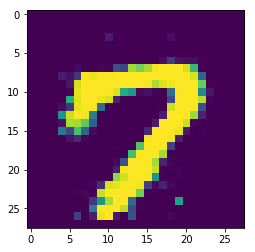

In [68]:
image0 = gan.gen_number_image(7)
plt.imshow(image0)

## Test on gan

Добавим выборку из новых gan изображений и посмотрим на точность обученных моделей

In [69]:
size = 50000
labels = np.random.randint(0, 10, size)
gan_X = np.array(list(map(lambda num: gan.gen_number_image(num).reshape((28, 28, 1)), labels)))
gan_y = to_categorical(labels)

In [70]:
gan_X.shape

(50000, 28, 28, 1)

Теперь обучим deep CNN на новых(созданных) и старых (реальных) изображениях

In [95]:
cnn = Sequential()
cnn.add(Conv2D(96, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dropout(0.5))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 25, 25, 96)        1632      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 64)          98368     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_140 (Dense)            (None, 1024)              1049600   
__________

In [96]:
cnn.fit(np.concatenate((gan_X, cnn_X)), np.concatenate((gan_y, cnn_y)), batch_size=400, epochs=30, validation_split=0.05)

Train on 87400 samples, validate on 4600 samples
Epoch 1/30
87400/87400 [==============================] - 202s 2ms/step - loss: 0.7994 - acc: 0.7274 - val_loss: 0.2083 - val_acc: 0.9378
Epoch 2/30
87400/87400 [==============================] - 197s 2ms/step - loss: 0.1756 - acc: 0.9443 - val_loss: 0.1301 - val_acc: 0.9604
Epoch 3/30
87400/87400 [==============================] - 197s 2ms/step - loss: 0.1210 - acc: 0.9628 - val_loss: 0.1153 - val_acc: 0.9630
Epoch 4/30
87400/87400 [==============================] - 197s 2ms/step - loss: 0.0972 - acc: 0.9703 - val_loss: 0.0868 - val_acc: 0.9730
Epoch 5/30
87400/87400 [==============================] - 198s 2ms/step - loss: 0.0828 - acc: 0.9744 - val_loss: 0.0793 - val_acc: 0.9748
Epoch 6/30
87400/87400 [==============================] - 197s 2ms/step - loss: 0.0726 - acc: 0.9781 - val_loss: 0.0736 - val_acc: 0.9770
Epoch 7/30
87400/87400 [==============================] - 197s 2ms/step - loss: 0.0676 - acc: 0.9795 - val_loss: 0.0659 - v

In [97]:
predicted_classes = cnn.predict_classes(test_data.reshape(len(test_data), 28, 28, 1))
create_submission(predicted_classes)

Created new submission in file  submission37.csv


При некоторых настройках сети удалось незначительно повысить точность на 0.001, но возможно наличие сгенерированных изображений не сыграло здесь роли, может быть при добавлении 50000 обобщение данных не сильно улучшилось?

Отложим часть реальных данных для тестов

In [130]:
batch_test_X = cnn_X[::5]
batch_test_y = y[::5]

In [134]:
def get_batch(size=3000):
    labels = np.random.randint(0, 10, size)
    gan_X = np.array(list(map(lambda num: gan.gen_number_image(num).reshape((28, 28, 1)), labels)))
    gan_y = to_categorical(labels, num_classes=10)
    return gan_X, gan_y

In [135]:
cnn = Sequential()
cnn.add(Conv2D(96, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Conv2D(64, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dropout(0.5))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 25, 25, 96)        1632      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 9, 9, 64)          98368     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_158 (Dense)            (None, 1024)              1049600   
__________

In [136]:
from sklearn.metrics import accuracy_score
iterations = 10000
batch_size = 64
compute_score = 100
results = []
for i in range(iterations):
    gan_X, gan_y = get_batch(size=batch_size)
    cnn.train_on_batch(x=gan_X, y=gan_y)
    if i % compute_score == 0:
        print('Training on batch iter %d batch_size is %d' % (i, batch_size))
        predicted = cnn.predict_classes(batch_test_X)
        result = accuracy_score(predicted, batch_test_y)
        print('Current score: ', result)
        results.append(result)

Training on batch iter 0 batch_size is 64
Current score:  0.15428571428571428
Training on batch iter 100 batch_size is 64
Current score:  0.8019047619047619
Training on batch iter 200 batch_size is 64
Current score:  0.8997619047619048
Training on batch iter 300 batch_size is 64
Current score:  0.8932142857142857
Training on batch iter 400 batch_size is 64
Current score:  0.8988095238095238
Training on batch iter 500 batch_size is 64
Current score:  0.9207142857142857
Training on batch iter 600 batch_size is 64
Current score:  0.9315476190476191
Training on batch iter 700 batch_size is 64
Current score:  0.9245238095238095
Training on batch iter 800 batch_size is 64
Current score:  0.92
Training on batch iter 900 batch_size is 64
Current score:  0.8546428571428571
Training on batch iter 1000 batch_size is 64
Current score:  0.935
Training on batch iter 1100 batch_size is 64
Current score:  0.9203571428571429
Training on batch iter 1200 batch_size is 64
Current score:  0.885595238095238

## Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

Reccurent GAN paints